In [6]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors # Use this is for creating a cursor-interactive plot with "%matplotlib notebook"
from sklearn.decomposition import NMF # Use this for training Non-negative Matrix Factorization
from sklearn.utils.extmath import randomized_svd # Use this for training Singular Value Decomposition
from sklearn.manifold import TSNE # Use this for training t-sne manifolding

In [7]:
dir = './최종데이터/'
df_product = pd.read_csv(dir + 'basic_data_edit.csv', usecols=['00.상품_URL','00.상품코드','01.브랜드','02.상품명','03.가격','04.제품 주요 사양','05.모든 성분','06.총 평점','07.리뷰 개수','08_1.별점 1점','08_2.별점 2점','08_3.별점 3점','08_4.별점 4점','08_5.별점 5점','09_1.피부타입_건성','09_2.피부타입_복합성','09_3.피부타입_지성','10_1.피부고민_보습','10_2.피부고민_진정','10_3.피부고민_주름/미백','11_1.피부자극_없음','11_2.피부자극_보통','11_3.피부자극_있음'],encoding='cp949')
df_review = pd.read_csv(dir + 'review_data_edit.csv', usecols=['00.상품코드', '01.리뷰어 닉네임', '02_1.피부 타입','02_2.피부 톤','02_3.피부 고민','03.리뷰 평점','04.피부타입 | 피부고민 | 자극도','05.리뷰'],encoding='cp949')
df_review_learning = pd.read_csv(dir+'rating_review_essence.csv',usecols=['rating','review'],encoding='cp949')
print('done')

done


In [8]:
#column 이름 변경 및 결측치 제거
df_review.columns = ['code','user','type','tone','problem','rating','feature','review']
df_review_dropna = df_review.dropna(axis=0)

In [9]:
import nltk
from konlpy.tag import Okt
Okt = Okt()

In [10]:
total_review = ''
for i in range(5000):
    total_review += str(df_review_learning.loc[i]['review'])
print(total_review)

?? 본인 피부 타입: 건성 / 입 주위에 피부염이 있어서 조금이라도 자극받으면 엄청 붉어지고 오돌토돌해지거나 하얀 각질이 올라옴 (기본적으로도 붉은기는 존재) / 전체적으로 엄청 건조하나 코나 이마에는 기름이 잘 올라옴 (그렇다고 건조하거나 가벼운 기초만 해주면 엄청 건조해짐) / 피부가 워낙 민감해서 기초 잘못 쓰면 트러블 남 

여러분,,, 저 20대 중반 때 이게 그렇게 좋다길래 큰 맘 먹고 사서 썼다가 뾰루지만 나고 그래서 엄마 드렸었거든요. 그땐 ‘뭐야 이게 이렇게 유명할 일인가 돈만 버렸네’했었는데요. 현재 30대인 제가 피부가 너무 푸석해지는 것 같아서 + 올영에서 기획 세트를 최저가로 팔길래 구입해봤습니다. 그리고 하루 쓰고나서 “와 미쳐따!” 외쳤습니다. 개좋습니다. 피부 바로 촉촉해지고 피부결 자체가 부드러워집니다. 뾰루지 그런 거 안 납니다. 그만큼 이제 피부에 영양분공급이 필요한 나이가 되었나봐요,,, ???? 

?? 리뷰를 읽고계신 20대 분들, ‘이게 그렇게 좋다는데 함 사서 써보까’ 하는 분들, 구매를 멈춰주세요. 사지 마세요. 그냥 그 나이대에는 넘버즈인 푹잠세럼 정도 세일할 때 사서 퍽퍽 써줘도 충분합니다. 

?? 30대에 접어들었는데 ‘피부가 전과 다르게 너무 푸석해지고 피부결이 점점 거칠어지며 모공이 눈에 보이기 시작하는 것 같다’ 하는 분들, 지금 당장 구매해서 사용해보세요.아마 에스티로더 갈색병세럼 구매하시는 분들은
 재구매 재재구매이실거에요~
도저히 한번 쓰고는 못끊는 인생템이죠ㅠㅠ

저는 어릴때부터 여드름에 홍조가 심합니다ㅠ
지금은 피부과를 다니면서 더이상 여드름이 나지는 않지만,
흉터는 그대로 남아있고 홍조는 이어지고 있어요.

근데 에스티로더 갈색병세럼이 저같은 흉터피부등에 
재생에 좋다고 하여 구매하게 되었어요.

우선은 저의 총평은 
미백에 엄~!~!~청난 효과가 있습니다.
그냥 붉던 제 피부가,색소침착의 기색이 다 사라지고 
흰피부가 올라오고 있더라구요~
단 며칠 사용했을 뿐인데도 미백효과가 굉장하고 
차

In [11]:
tokens_ko = Okt.morphs(total_review)

In [12]:
#print(tokens_ko)
ko = nltk.Text(tokens_ko)
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab().most_common(100)

366579
22413


[('이', 10268),
 ('에', 7753),
 ('\r\n', 7570),
 ('.', 7133),
 ('가', 4765),
 ('도', 4328),
 ('사용', 4045),
 ('피부', 3831),
 ('은', 3530),
 ('제품', 3530),
 ('는', 3078),
 ('을', 2857),
 ('!', 2597),
 ('것', 2529),
 ('구매', 2291),
 ('같아요', 2099),
 ('\r\n\r\n', 2094),
 ('으로', 2030),
 ('잘', 2000),
 ('너무', 1905),
 (',', 1825),
 ('한', 1739),
 ('저', 1710),
 ('때', 1658),
 ('들', 1605),
 ('효과', 1594),
 ('크림', 1460),
 ('제', 1446),
 ('로', 1390),
 ('하고', 1331),
 ('를', 1327),
 ('좋아요', 1321),
 ('느낌', 1301),
 ('??', 1272),
 ('거', 1251),
 ('주름', 1234),
 ('써', 1214),
 ('다', 1192),
 ('보습', 1190),
 ('더', 1177),
 ('요', 1168),
 ('많이', 1140),
 ('좋은', 1136),
 ('할', 1122),
 ('적', 1120),
 ('~', 1108),
 ('..', 1108),
 ('세', 1101),
 ('안', 1062),
 ('입니다', 1062),
 ('해서', 1035),
 ('수', 1022),
 ('밤', 1007),
 ('얼굴', 959),
 ('향', 953),
 ('만', 944),
 ('가격', 942),
 ('분', 938),
 ('좀', 931),
 ('이라', 920),
 ('!!', 919),
 ('?', 910),
 ('에서', 892),
 ('성', 887),
 ('추천', 873),
 ('바르고', 870),
 ('흡수', 863),
 ('생각', 862),
 ('ㅎㅎ', 851),
 ('고'

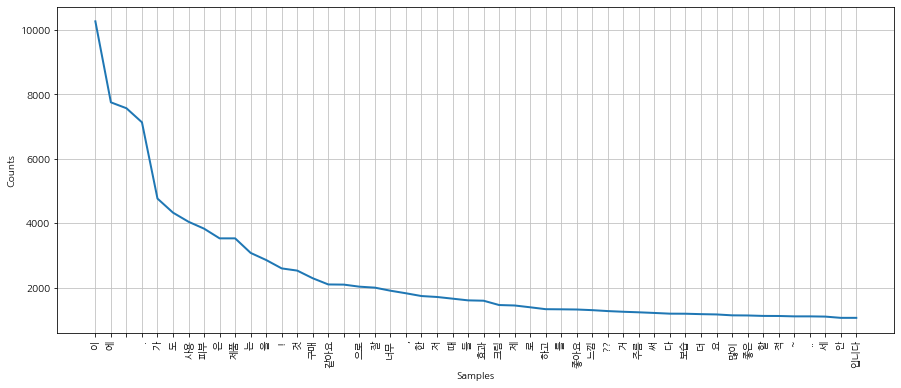

In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
plt.figure(figsize=(15,6))
plt.rc('font',family = 'NanumGothic')
ko.plot(50)
plt.show()

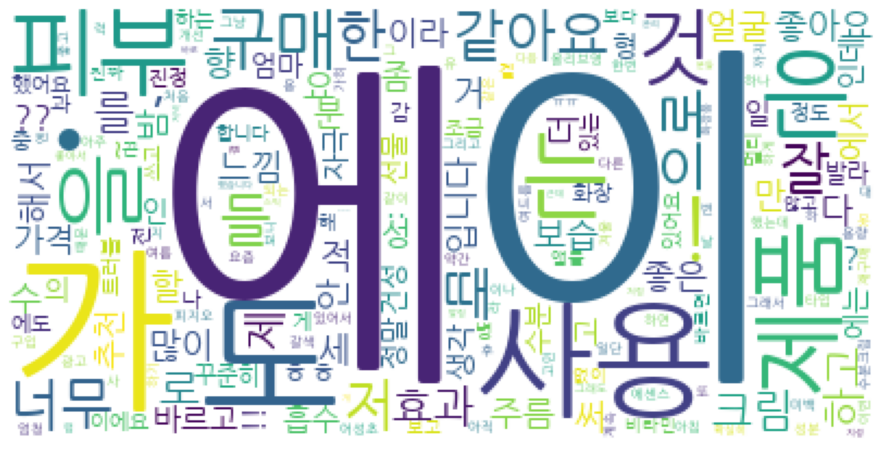

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = '/Users/seojuan/.local/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumGothic.ttf',
                    relative_scaling = 0.2,
                     background_color = 'white',
                     ).generate_from_frequencies(dict(ko.vocab()))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [15]:
#rating 1~5점의 비율을 맞춰서 데이터셋 구성 및 결측치 제거
review_learning = df_review_learning['review']
rating_learning = df_review_learning['rating']

rating_5 = rating_learning == 5
rating_4 = rating_learning == 4
rating_3 = rating_learning == 3
rating_2 = rating_learning == 2
rating_1 = rating_learning == 1

rating_9000 = pd.concat([rating_learning[rating_5][:2250],rating_learning[rating_4][:2250],rating_learning[rating_3][:1500],rating_learning[rating_2][:1500],rating_learning[rating_1][:1500]])

total_9000 = pd.concat([rating_9000,review_learning],axis=1,join='inner')
total_9000_dropna = total_9000.dropna(axis=0)
total_9000_dropna

rating                                             review
0            5  ?? 본인 피부 타입: 건성 / 입 주위에 피부염이 있어서 조금이라도 자극받으면 엄...
1            5  아마 에스티로더 갈색병세럼 구매하시는 분들은\r\n 재구매 재재구매이실거에요~\r\...
2            5  에스티로더가 20%할인하는건 처음봤어요! 역시 가정의달이라 선물하는 시즌인가봐요 덕...
3            5  지인들에게 선물만 해줘봤지 제가 갖게된건 처음이네요\r\n사람들이 왜 갈색병 갈색병...
4            5  ? 피부 타입 : \r\n   여름에는 지성피부 / 봄, 가을, 겨울에는 복합성 피...
...        ...                                                ...
182151       1             샘플이 하나도없어서 아쉽습니다. 많이 구매를 했는데도 상품은 써볼께요
182772       1       피부염 있는데 붉게 달아오르고 좁쌀 폭발했어요 ㅠㅠ..저는.쓰면 안될거같아요..
182943       1                          성분이 좋다는 추천을 받고 구입한 제품입니다.
183355       1  쓰고 얼굴을 씻는게 아니라 에센스처럼 바르는 형태라 독특하긴 한데 얼굴에 바르기 전...
183383       1                     피부가 괜찮은 편인데\r\n이거 쓰고 민감해졌어요 비추

[8790 rows x 2 columns]

In [16]:
import nltk
from konlpy.tag import Okt

def star_preprocessing(value):
    if int(value) <= 3:
        return '0'
    else:
        return '1'
    
def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

In [17]:
def step1_data_preprocessing():
    df = total_9000_dropna
    df['rating'] = df['rating'].apply(star_preprocessing)
    
    text_list = df['review'].tolist()
    star_list = df['rating'].tolist()
    
    from sklearn.model_selection import train_test_split
    
    text_train, text_test, star_train, star_test = train_test_split(text_list,star_list, test_size = 0.3, random_state=42)
    
    return text_train, text_test, star_train, star_test

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import pickle5 as pickle

def step2_learning(X_train, y_train, X_test, y_test):
    tfidf = TfidfVectorizer(lowercase = False, tokenizer = tokenizer)
    logistic = LogisticRegression(C=10.0,penalty = 'l2', random_state = 0)
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    pipe.fit(X_train,y_train)
    
    y_pred = pipe.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    
    with open('pipe_ver1.dat','wb') as fp :
        pickle.dump(pipe, fp)
    
    print('저장완료')

In [28]:
def step3_using_model():
    review_rating = []
    with open('pipe.dat','rb') as fp:
        pipe = pickle.load(fp)
        
        for i in df_review_dropna.index:
            #dropna로 인해 loc missmatch 방지

            text = df_review_dropna.loc[i]['review']
            str = [text]
            r1 = np.max(pipe.predict_proba(str)*100)
            r2 = pipe.predict(str)[0]

            print('-------------------------------------')
            print(text)
            if r2 == '1':
                print('긍정적인 리뷰')

                if r1>80:
                    review_rating.append(5)
                elif 60<r1<=80:
                    review_rating.append(4)
                else:
                    review_rating.append(3)


            else:
                print('부정적인 리뷰')

                if r1>80:
                    review_rating.append(1)
                elif 60<r1<=80:
                    review_rating.append(2)
                else:
                    review_rating.append(3)


            print('정확도 : %.3f'%r1)

        
    df_review_dropna['review_rating'] = review_rating
    print(df_review_dropna)

In [25]:
print(len(df_review))
print(len(df_review_dropna))

158590
16505


In [20]:
def learning():
    text_train, text_test, star_train, star_test = step1_data_preprocessing()
    step2_learning(text_train, star_train, text_test, star_test)
    
def using():
    step3_using_model()

In [32]:
learning()

/Users/seojuan/opt/anaconda3/envs/recommend/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/seojuan/opt/anaconda3/envs/recommend/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGIST

0.8373151308304891
저장완료


In [29]:
using()

-------------------------------------
개인적으로 성분으로 마케팅하는 제품들을 그렇게 좋아하진 않습니다. 특히 토너는 순한 제품들 사용하다보면 ‘이게 물 바르는 거랑 뭐가 다른거지?’라는 생각이 들 때도 있었고, 유해성분이 들어있지 않아도 사용 후에 피부가 뒤집어진 경험이 있기 때문에 ‘유해성분 0개’ 라며 남들이 다 좋다고 하는 제품은 오히려 구매를 재고하는 편입니다. 

그치만 아누아 어성초 토너는 달랐어요. 정제수 가득인 토너가 아니라 유해성분은 없으면서도 약모밀(어성초) 추출물이 전체 구성의 77%나 차지하기 때문에 우선 믿음이 갔고 사용감 역시 매우 만족스러웠습니다. 저는 호르몬 주기에 따라 딱딱한 여드름이 2~3개 생겼다가 급속도로 좋아지는 피부인데, 우연히 좋아지는 시기에 사용해서 그런지 몰라도 열흘 간 사용하면서 피부가 많이 진정되었음을 느꼈습니다.

저는 세안 후 스킨케어 첫 단계에서 시루콧토 화장솜에 충분히 적셔서 3번 정도 닦아주고 닦아낸 화장솜을 볼과 턱 쪽에 잠시 붙여서 토너팩처럼 사용했어요. 건성피부이기 때문에 토너 사용 후 추가적인 스킨케어는 필수였고, 어차피 건성이시라면 토너로만 마무리하진 않기 때문에 수분감은 크게 문제 없다고 느꼈습니다. 마무리감은 끈적임은 없지만 완전히 산뜻한 느낌까진 아니었어요.

재구매 의사 100%이고 사실 이미 한병 쟁여뒀어요??

+) 아누아 홈페이지에서 올영 입점 기념 환급이벤트를 해서 받은 적립금으로 어성초 앰플을 구매했는데 토너랑 궁합 진짜 최고에요. 이벤트 참여하셔서 써보는 것 완전 추천드립니다!!
긍정적인 리뷰
정확도 : 98.088
-------------------------------------
복합성 피부에 많이 민감한 피부입니다. 요즘 봄 바람에 아침 저녁으로 기온차가 심해서 그런지 홍조도 올라오고 특히 볼쪽이 많이 건조해서 화장을해도 들뜨고 많이 건조함을 느꼈습니다. 
마스크 때문인지 턱과 볼부분에 트러블이 끊임없이 생기고 재생도 잘 안되고 색소 침착으로

-------------------------------------
원래 민감성피부에 약간의 건성 피부를 가지고 있었는데 코로나 시작이후 마스크를 쓰면서 어느날 갑자기 접촉성 피부염인지 짜지지도 않는 붉고 아프게 오돌토돌하게 올라와서 엄청나게 스트레스를 받고 있었습니다. 유튜브랑 후기를 찾아보던 중에 아누아 어성초가 계속 눈에 밟혀서 엄청 고민하다가 구매를 하게되었는데 받자마자 토너팩?을 하는게 더 효과가 크다길래 몇일동안 저녁마다 토너팩을 해줬는데 붉은기가 점점 가라앉더라구요ㅠㅠ 
지금 거의 한달 정도 사용하고 있는데 거의 다 가라앉고 부분부분 색소침착만 보이는 상태입니다. 이 색소침착은 또 어떻게 없애야 할지,,  지금은 스프레이 용기를 구매해서 그냥 저녁에 얼굴에 마구 뿌려서 흡수시키거나 좁쌀보이는 날이나 진정이 필요한 날에 토너팩을 하고 그 위에 모델링팩을 올려 사용하고 있습니다. 
이거 사용한 이유인지 뭔지 원래 생리주간에 관자놀이나 오른쪽 볼 부분에 몇개씩 좁쌀이 올라오는데 이번 생리주간에는 좁쌀이 올라오지는 않았어요. 살짝 비싼감이 있지만 다음에는 대용량으로 구매할거 같아요.
긍정적인 리뷰
정확도 : 84.412
-------------------------------------
리뷰가 하도 좋아서 그리고 쿠폰쓰고 해서
저렴하게 구입했어요~
스킨은 원래 그냥 싼거쓰자는 주의였는데
이것보다 훨씬 싼것도 있어
그냥 그런거 사쓰려고 했는데
?어성초 77퍼 함유 라는 말에 좀 꽂혔습니다..
?써보니 정말 순하다는게 느껴졌고
?진정성분이 주를 이루는 것처럼 진정이 정말 되는 느낌이었어요~ 
?특히 히알루론산 베이스의 스킨이 아닌데도
수분감이 정말 넘쳤습니다~ 스킨은 원래 수분이라 다 같은거 같지만 여러개 써본결과 다 같은 수분이라도 느껴지는
수분감이 다 다르더라구요~
?건성 지성 복합성 할 것 없이 예민한 피부고 모두 사용하기 좋을 것 같구요~
?성격상 진짜 이것저것 써봐야 직성이 풀리는데 지금까지 써본것 중에 매우 괜찮아서 다음에도 특히 눈에 더 들어오는

-------------------------------------
??완전 흐르는 물 같은 제형이구요ㅎㅎ 그래서 콧물 제형 좋아하시는 분들에게는 비추해요!!
??절대 미끌거리거나 끈적이지 않아요!!
??양이 많아서 토너팩하기도 좋고 닦토하기에도 너무 좋은 제품입니당ㅎㅎ
?어성초 성분을 좋아하시거나 잘 맞으시는 분들에게 추천하구요ㅎㅎ 또 토너팩용 토너 찾으시는 분들에게도 추천드려요ㅎㅎ 아 !! 좁쌀 여드름에 효과 보고싶으신 분들에게도 추천드립니당ㅎㅎ
????저는 끈적이는 제품을 선호하지 않기 때문에 사용감과 발림성 부분에서 완전 만족했어요!!! 꾸준히 사용하면 좁쌀여드름에 효과를 볼 수 있어요!!! ㅎㅎ 그리고 진짜 무난하게 매일매일 쓸 수 있는 토너에요!!! ??
????첨에 가격이 세다고 생각했지만 용량이 아주 많기 때문에 세일 때 구매하면 괜찮은 것 같음ㅎㅎ
긍정적인 리뷰
정확도 : 99.749
-------------------------------------
어성초가 트러블 진정에 좋다해서 여름에 사용하려고 구입했어요~^^

아누아가 어성초로 유명하던데.. 아누아가 한 3달 전 올영에 입점되고 특가로 19.900원에 판매할 때 겟했어요ㅋㅋ

아직 사용하고 있는 토너가 있어 좀 더 있다가 사용하려고 했는데.. 날이 더워지면서 이마 옆 헤어라인과 뒷쪽 목 헤어라인 밑에 큰 트러블이 3개가 나서 빨리 진정시키기 위해 몇 일 전에 개봉했어요ㅠ

이 아누아 어성초 토너는 어성초가 77% 들어있고요. 무향, 무색이고 닥토나 스킨팩하기 좋은 물타입 토너에요.

이 토너로 닥토하고 어성초 에센스, 수분 크림으로 마무리 했더니 붉은 왕 트러블들이 금세 가라앉네요~????
역시 트러블 진정에는 어성초 최고!!

이 어성초 토너는 아무 자극이 없어 민감성 피부도 사용하기 좋을 것 같아요. 그리고  여드름, 수부지, 지성분들은 정말 딱일 듯해요!!^^

제가 사용해 본 느낌은 아주 건성아니시면 어느 피부 타입이든 더운 여름에 사용하면 정말 좋을 진정 토너같아요~?
긍정적인

-------------------------------------
워낙 베스트에다가 입소문이 많이 난 제품이라 얼마전에 다른 토너를 구매했음에도...ㅎㅎ 궁금해서 구매하게됐어요.
어성초 피부에 좋다는거야 워낙 잘 알고있었는데 약모밀추출물이 77%라는게 눈에 확 들어오네요
무향에 끈적임없이 발려서 호불호없이 모두가 좋아할 것 같구요 끈적거리는걸 워낙 싫어해서 가볍고 산뜻하걸 좋아하는데 딱 맘에 들어요?
패드에 듬뿍 적셔서 팩처럼 올려놔도 좋구요 티존에 유분이 많은 복합성피부인데 유분도 잘잡아주네요.
사용감이 가벼워서 날이 더워지는 요즘 부담없이 바르기 좋아요. 냉장고에 넣어놓고 시원하게 사용하면 더 좋을 것 같아요. 아누아 브랜드는 처음 접해보는데 역시 입소문이 나는데는 다 이유가 있네요. 어떤 피부에도 다 잘맞을 제품입니다!
긍정적인 리뷰
정확도 : 98.727
-------------------------------------
올영체험단 제품중에 뭐가 좋을까 고민하다가 거의 다 놓쳐서 남아있는 아무거나 골랐는데 너무 좋아서 깜짝 놀랐답니다! 아누아라는 브랜드도 이번에 처음 알게 된 브랜드인데 성분도 좋고 순한 제품이 대부분이라 더 좋았어요! 
우선 저는 그렇게 트러블이 많이 올라오지 않는 피부였는데 요즘 마스크 끼면서 트러블이 하나 둘 올라와서 스트레스얐던 사람입니다. 사용하기 전에 다른 후기들을 찾아보니까 닦토보다는 팩처럼 사용하거나 손으로 흡수 시키는게 좋다는 평이 대부분이더라구요. 그래서 제품 받은 날부터 꾸준히 팩처럼도 쓰고 흡토로도 써봤습니다. 붉은기 많던 볼쪽은 일주일정도 써보니 흔적만 남고 원래 피부색으로 금방 돌아왔고 좁쌀이 올라오던 미간도 팩처럼 사용해주니 며칠만에 들어가더라구요. 개인차가 있을 수 있겠지만 어성초가 잘 맞는 분들이 가벼운 토너로 사용하기 좋은 제품입니다! 너무 만족하면서 사용하고 있구 다쓰면 재구매할 의향 100%입니다! 용량도 엄청나서 더 좋네요!!
긍정적인 리뷰
정확도 : 98.153
-------------------

-------------------------------------
좁쌀 여드름에 좋다고 하도 순위권에 올라와있고, 광고를 많이 해서 구매해봤어요.

저는 여드름이 볼쪽에 조금있고, 이마에는 좁쌀 여드름이 많아서 상당히 고민이었거든요, 마스크를 쓰다보니 이마가 위주로 보이는데, 항상 신경쓰이는 좁쌀,,들,,

피부는 약간 예민한 편이라서, 어성초가 맞을지도 궁금했어요. 호불호가 굉장히 나눠지더라고요.

그래서 어성초 토너 작은 사이즈부터 써보기로 했어요, 안맞으면 다른분 주거나 팔려고,,ㅎㅎㅎ

재형은 완전 끈적임이 없는 물같은 제형이에요. 그리고 저는 처음에 2-3일 정도는 약간 따끔 거리는 느낌이 있었어요. 그래서 안맞는거 아닌가 걱정했는데, (앰플도 같이 쓰기 시작했어요) 

지금 사용한지 일주일이 되었고, 생리기간이 다와가는데 피부가 안뒤집어지고 있다는 놀라운 광경이 펼쳐졌고, 생각보다 이마에 좁쌀 여드름이 많이 들어갔어요! 정말 육안으로나 촉감으로 느껴질 만큼 피부가 부들부들해지는 느낌, 다행스럽게 잘 맞는것 같더라고요!!! 너무 행복

근데, 토너 제형이 물같기 때문에 습도가 높은 여름에 가장 사용하기 좋을 것 같아요, 그리고 뭔가 끈적이는 게 없어서 금방 사용할 것 같은 예감이 들어요.

두개다 동시에 사용하기 시작해서 앰플이 좋은 건지 토너가 좋은 건지는 구분을 못하겠지만 둘다 너무 좋습니다!

아, 앰플은 토너와 달리 완전 꾸덕뚜덕합니다!! 진짜 좁쌀 여드름 박멸템이 될것같은 기분입니다!!
긍정적인 리뷰
정확도 : 93.987
-------------------------------------
기존에 쓰던 500ml가 다 떨어지기 전에 쟁여놓으려고 또 구매했어요. 어성초 제품의 특유의 향을 안좋아 하는 분들도 많던데 이 제품은 완전 무향에 가까워서 향에 예민한 분들이 쓰시기 좋을 것 같아요. 피부가 많이 뒤집어진 날엔 티슈형 화장솜에 이 제품을 듬뿍 적셔서 스킨팩을 해주고 평소에는 미스트 공병에 담아서 얼굴에 칙칙 뿌려 챱토를 해주고 있어요. 

-------------------------------------
몇통째인지 몰르겠습니다.
트러블 지복합성 피부에요. 속건조가 심해서 멀 발라도 너무건조하고 쿠션이나 파운데이션 발라도 쭉쭉 갈라져요. 게다가 요즘 마스크를 써서 피부가 예민해져있었는데 이제품을 알고난후부터는 피부진정에 도움이되어 매일 매일 사용하고있어요 

저는 세안 하자마자 화장솜에 적셔있는 토너를 얼굴로 한번 닦토 한후 볼과 이마 턱에 올려놔요.
그럼 쿨링 효과가 느껴지면 피부가 매우 진정되요.
여름에 정말 좋을거같아요.

다만. 보습은 부족할수있으니  바른후 다른 앰플이나 크림을 발라주면 도움이 될거같아요

그리고 주의하실거는 상처부위나 눈에 들어가면 따가워요! 참고하세요^^
긍정적인 리뷰
정확도 : 78.978
-------------------------------------
올영 체험단덕분에 사용해본 토너입니다!

??용량
용량은 진짜 아주 넉넉해요 
하지만 가격에 비해 저렴한 편은 아니에요 ㅜㅜ

??향
제가 향에 조금 민감한 편인데
무향 무색에 무취까지 거부감이 들 이유가 없습니다!
오히려 어성초 토너인데 무취라서 어색해요 ㅋㅋㅋ

??보습력
저는 지성 건성 따지자면 건성인데
원래 다른 토너로 닦토만 했었거든요..!
이 토너같은 경우에는 손에 덜어서 얼굴에 흡수시키는게 훨씬
나은 것 같아요
닦토로 하고 끝내면 조금 건조해요

??피부 진정
순한 토너로 유명한 아노아 토너는 성분에서
주의성분이 하나도 안 나와서 일단 안심이에요!
아직 사용한지 한 달은 채 되지 않았지만
큰 트러블 없이 잘 사용중이에요!
긍정적인 리뷰
정확도 : 98.185
-------------------------------------
이마에 좁살이 자꾸 생겨서 슬퍼서 사게된 토너!??
&gt; 2,3일 사용해본 결과 눈에 띄게 사라져서 너무 만족합니다??????
??무향,무취, 물 처럼 주르륵 흐르는 정말 기본적인 토너에요 그래서 효과가 있을까 반신반의 했지만 진정에 정말 탁월한 효과가 있었어요
??얼굴에 붉

-------------------------------------
안녕하세요 오늘은 아누아 어성초 77 토너 기획제품을 구입해보았어요.

이번 기획에는 토너 40ml의 미니사이즈 용량 제품과 10ml 앰플이 들어있어서 더욱 가성비가 좋더라구요. 벌써 여러번 재구입했으니 말을 다했죠?

앰플도 10ml라 작아보이지만 한, 두방울만 사용해도 얼굴 전체를 사용할 수 있을만큼 진하고 풍부한 앰플이에요. 10ml로도 오래오래 사용 가능해서 기획제품을 꼬옥 선택하셔야합니다.

제 피부타입을 보면 아시겠지만 민감성과 트러블이 가끔 나는 예민한 피부에요 ㅠ_ㅠ 자극있는 제품을 사용하면.. 정말 바로 붉어지고 난리부르스..! 민감한분들은 공감하실거에요.

아누아 토너에는 어성초 성분이 들어가있어서 진정에 정말 좋은데 . 제 피부는 어성초 성분이 잘 맞는지 자극도 없고 진정도 잘 되고 순하게 잘 맞아서 쭈욱 구입해서 사용해주고 있어요.

추천드려요~^^
긍정적인 리뷰
정확도 : 97.173
-------------------------------------
아누아 스킨을 에센스 줄때 구매해서 에센스에 빠진후에 다 쓰고 다른 제품들 이용하다가 피부가 뒤집어지는 것같아서 스킨 팩을 하기 위해서 스킨을 쓰기시작했는데 밤에 스킨팩을 해주면 바로 들어가는게 너어무 좋더라구요!

그래서 스킨팩 열심히 해주면서 아누아 에센스도 너무 좋아서 1병을 사용하고 있지만 3병을 쟁여뒀어요!

화농성 여드름이 꼭 하나씩 나서 피부가 붉게 되면서 여드름이 올라오는데 그럴때 스킨팩을 해주고 에센스 바르고 크림은 리얼베리어 크림을 발라주고나면 바로 가라앉더라구요!

가끔 스킨팩을 놓치고나면 크게 곪게 되는데 그럴때 아물때도 도움이 되고 옆에 퍼지지 않아서 정말 만족하고 사용하다가 조금 불안해서 이번에 쟁여두려고 새롭게 구매했어요!

이번에 미니어처도 줘서 친구네 집에 놀러갈때도 유용하게 사용할 수 있을 것 같아서 너무 좋아요!

아누아가 제 피부를 정상적으로 만들어주는데 정말 많은 도움을 줘서 여드름으로

-------------------------------------
-워낙 좋다고 소문난 제품이라서 구매해봄 
-제품 자체도 용량이 많고 , 패키지라서 여분 용량도 있고 세일까지 해서 구매해봤는데 너무 좋다.ㅎㅎ

세수하고 사용ㅎ하고 메이크업 하기 전에 기본 토너로 사용하고 있다. 

여드름 개선하고 피지 조절하는데 도움이 된다고 하는데 솔직히..ㅎㅎ 여드름 피지 이런거 없어서 그냥 쓰고 있다.

내피부는 좀 건조한 편인데 .. 건조한거 개선되는데는 많이 도움됐다. 

향이 거의 없어서 향을 좋아하는 사람들은 싫어할거 같앗는데 나는 괜찮았음 

워낙 제품이 크고 대용량이라서 한번 뜯으면 정말 오래쓸 각오를 해야한다.ㅎㅎ 중간에 다른 제품으로 갈아타고 싶고 실증날 수 는 있겟다 싶음 ㅎㅎ 그래도 듬뿍듬뿍 사용할 수 있어서 좋다. 

아직 사용한지 얼마 안됬지만 트러블도 안나고 그냥 무난하게 쓸 수 있는 거 같다.
긍정적인 리뷰
정확도 : 93.946
-------------------------------------
요즘 아누아가 더 인기가 많아져서
좋네요,  많은 분들이 아셨음 한다는
다른 제품은 몰라도 토너는 진짜
찐 강추드려요 특히 수부지 분들!
진정과 수분충전이 함께 되는 토너라
만족하시면서 사용 하실듯 해요
무엇보다 행사도 많이하고
세트구성도 알차게 기획하기 때문에
선물 하시기에도 좋을듯 합니다
대부분 트러블에 좋은 토너들은
겨울에 쓰기 건조한 편인데
아누아 토너는 겨울에 사용 하기에도
무리없이 사용할수 있어 좋아요
여름엔 차갑게 하셔서 사용 하시면
보다 빠른 진정을 느끼실듯 합니다
피부가 많이 푸석하거나
술마신 다음날은 토너팩 추천 드려요
토너팩이 진정에 잴 빠른편이라
제가 피부가 뒤집어 졌을때
꾸준히 해주고나서 효과를
많이 보았던 방법입니다
물론 요즘엔 토너 대신 패드타입으로 많이 나오지만
살짝 다른 사용감도 있고
다양한 방법으로 사용하기엔
토너가 더 좋더라구요 저는,
긍정적인 리뷰
정확도 : 96.454
------------------------

-------------------------------------
아누아 토너!! 드디어 올리브영에 입점했네요ㅜㅜ 예전에 아누아토너가 좁쌀이랑 피부 진정에 좋다고 그래서 예전에도 몇통씩 썼었는데 이제는 올리브영에서도 판매를 한다니까 너무 좋네요!! 작년 여름에 피부가 붉어지고 좁쌀 트러블도 많이나서 스트레스를 많이 받았었는데 그때 아누아 토너가 진정에 많은 도움을 줬었어요 ㅎㅎ 저는 좁쌀이 완벽하게 줄어들지는 않았지만 피부 진정에는 확실히 효과가 있더라구요 ㅎㅎ 제품 자체가 자극없이 순하고 진정에 도움이 되는 어ㅎ성초 추출물 덕분인지 민감한 피부에도 잘맞고 또 쓰는 동안에는 다른 트러블은 올라오지 않았어요 ㅎㅎ 또 올리브영에서는 350ml로 용량도 너무 좋구 세일 기간에는 저렴한 가격이 살 수 있어서 더 좋은 것 같아요!! 피부 민감하신 분들은 사셔도 후회 안하실 듯해요~!!^^
긍정적인 리뷰
정확도 : 97.490
-------------------------------------
1 . 성분 (별 다섯개)
지금 임신 중이라 성분 안 좋으면 아예 못 쓰는데~
아주 순~한 성분으로만 만들어서 안심하고 사용 중이에요!
어성초라 더욱 믿고 쓸 것 같아용ㅎㅎ

2. 자극 (별 네개)
민감성 피부라 화장품 잘못 바르면 바로 올라오거든요?!
첫날 화장솜에 가득 묻혀 얼굴팩 했을 때
그 다음날 큼직한 염증이 두개 정도 올라왔는데~
3~4일 연속해서 사용하니 바로 가라앉더라구요^^
향도 은은하니 아예 무향이 아니라 또 좋았어용ㅋㄷ

3. 진정 (별 다섯개)
염증들이 일주일도 안됐는데 진정되는 거 보고
와.. 역시 어성초인가! 싶었습니당~

?? 나만의 Tip
올리브영 1/2 화장솜에 토너를 가득 머금고
(1/2 화장솜은 많이 안해도 가득 머금어진다는 스아실!!)
염증이 올라올 것 같은 부위에 올려준 다음 10분 정도 두고
두드려주면 흡수도 잘 되고 그 다음날 화장도 잘 먹어용!
긍정적인 리뷰
정확도 : 84.708
-------------------------------

-------------------------------------
피부타입  수부지 예민보스..
화장품잘못쓰면 뒤집혀집니다ㅜㅡㅜ

입소문만으로 아누아 사용했는데 몇통째 비우고있는지 모르겠어요^^*

여드름성 피부사용적합 테스트완료와
어성초추출물함유와 피부에자극이적은약산성으로

예민한 트러블피부도 자극없이 사용 하기 좋아요~
350Ml대용량이라 화장솜에 듬뿍뭍혀써도되영
손으로 써도되는데 화장솜추천이용
결도정돈되고 흡수도잘되는느낌이라..ㅎ

향은 거의없어서 무향?인거같구요
물타입이라 좋구요 패키지부터
순해보여용.. 이것저것 쓰는것도좋은데
맘에드는 토너 하나만 쓰는것도 조은거같아서ㅋㅋ

냉장고에넣어놨다가 얇은 화장솜에 뭍혀
볼이랑 이마에 얹혀놓으면 ..좋아용
쿨링감이랑 진정장난없어요ㅎㅎ 다들한번 써보시길..ㅋㅋ
굿이예용
긍정적인 리뷰
정확도 : 95.124
-------------------------------------
1. 구매이유
아누아 어성초 토너 진짜 너무 유명해서 계속 써봐야지 하다가 구매했네요!! 좁쌀 여드름에 효과가 좋다는 소문이 ,,, ㅎㅎ

2. 장점
-토너팩으로 사용할려고 구매했는데 진정효과가 좋아오!! 하루종일 마스크에 자극받은 나의 피부,, 붉은기 진정
-점성이 없는 워터 제형으로 바르기도 편하고 스킨팩으로 활용하기도 좋아요 그리고 흡수력도 초스피드!
- 마무리감도 끈적임이 거의 없었어요
- 순하고 자극이 없어서 좋았어요



3. 아쉬운점
-아쉬운 점은 아니지만 일단 보류하는 게 있다면 사용하고 있는데 좁쌀에 효과가 있는 지 모르겠어요 ㅠㅠ  더 사용해야지 알 수 있을 것 같아요 제발 효과가 있기를 ㅠㅠ
- 세일하지 않을때 가격이 비싸요! 그래서 저는 브랜드세일때 구매했네요 ㅎㅎ 

-&gt; 좁쌀 여드름에 효과가 좋으면 재구매할 의사 있습니당 만약 효과가 좋으면 재구매해서 얼른 후기 작성하러 올게요??
긍정적인 리뷰
정확도 : 98.249
-------------------------------------
아누아 여러 제품은 동생 추천

긍정적인 리뷰
정확도 : 99.427
-------------------------------------
저는 제 인생템을 찾은 것 같아요... 앰플같은 제형이 아닌 물같은 제형이고 딱 깔끔하게 마무리 돼서 좋았어요 끈적이지도 않고 무향입니다! 가끔 무향 제품들 중에 쿠키?? 냄새같은 이상한 냄새 나는 제품들도 있는데 그러지도 않고  딱 제 취향을 때려 넣은 것 같아서 아주 좋았습니다 여드름 진정에도 괜찮은것 같아요 제가 피부가 민감하지 않은 편이지만 눈가에 가끔 스트레스성 습진이 올라와요 그게 올라왔을 때 바르는 게 너무 따갑더라구요 그 부분만 제외하고 바르면 괜찮았습니다! 그래서 민감하신 분들은 매장에서 테스트해보시고 구매하시는게 좋을 것 같아요!
긍정적인 리뷰
정확도 : 91.908
-------------------------------------
요즘 계속 마스크를 쓰고 다니고 칼바람과 미세먼지가 얼굴을 괴롭혀서 그런지 멀쩡하던 이마와 눈가까지도 붉고 가려우면서 각질도 올라오는 알러지가 생겨서 걱정하고 있었는데 올영체험에서 어성초 77%라는 글씨만 보고도 꼭 써보고 싶어서 참여하게 되었습니다. 성분만봐도 일단 피부가 편안해지는건 당연할것 같고, 약초향이 날  것 같았는데 손등에 떨어뜨려서 향을 맡아보니 완전 무향무취여서 더 좋았어요. 팩으로 하면 당연히 수분보충되고 피부가 탄탄해질거라고 믿고 해봤는데 역시나 붉어진 부분이 진정되서 피부가 하얗게 되고 탱탱해지는 걸 느낄 수 있었어요. 꾸준히 써서 봄에 각질이 없는 피부가 되고 싶어요
긍정적인 리뷰
정확도 : 94.589
-------------------------------------
처음사용해보는 브랜드라서
기대하고있던 상품이예요!

전 건성피부에 가끔 트러블이 올라오는 피부인데요
어성초 수딩토너라서 제가 쓰기에 좋은 상품인것같아요

일단 크기가 대용량이라서 아주 만족하고,
상품자체가 깔끔한 패키지라서 보기에도 좋아요
무색에 무향인건지 향은 하나도 안느껴지고
어성초 제품중에 가끔 풀향이 진하게 자극

-------------------------------------
나는 이 토너 후기만 도대체 몇번을 쓰는 것인가…
아누아 회사 화장실 대리석 일평정도는 내가 깔아준게 아닐까..?! 
ㅋ
일단 올리브영 들어오기 전부터 홈페이지에서 구매하면서 사용했는데 입점까지하다니 나 정말 행복해요. 이렇게 기획도 나와주다니

저는 생리기간에 턱드름이 심해지는데 그럴 때는 일단 토너 손에 덜어서 두세번 덧바르고 1/2솜으로 턱부분에 토너팩해줍니다. 그럼 진짜 괜찮아져요.
그냥 그럭저럭 괜찮다 싶으면 세안 후 닦토만 해줍니다.
저는 아누아 악개니까 토너패드도 사봤는데 개인적으로는 토너 손에 덜어서 얼굴에 끼얹어주는게 제일 효과 좋은듯

앰플도 따로 사서 써보긴했는데 막 토너만큼 효과는 못봤어요ㅎㅎ 로션은 또 흡수력이 좀 별로라,,, 
그냥 토너랑 마스크팩만 쓰려구욥 

시켜줘 아누아 명예소방관
긍정적인 리뷰
정확도 : 89.507
-------------------------------------
옛날에 수호가 좋다고 해서 사봤어요 ㅋ 근ㄷ 이거 발라서인지 오늘 많이 자서 그런지 갑작 뾰루지 들어가서 놀랐어요
긍정적인 리뷰
정확도 : 70.946
-------------------------------------
좁쌀 진정에 좋다고해서 용량대비 비싸지만 구매했네용! 우선 제형은 가벼운 물토너라서 겨울보다는 여름에 시원하게 닦토용, 스킨팩용으로 더 좋을거 같아요! 부담스럽지 않아 레이어링 하기도 좋고 수분감과 쿨링 진정효과가 있어요 특히 저는 관자놀이쪽에 안짜지는 좁쌀들이 있어서 너무 스트레스라 어성초 수딩토너가 좁쌀에 효과적이라고 해서 이번에 꾸준히 사용해 보려구용 여러번 레이어링하면 수분 가득가득한데 피부가 답답하지않은 느낌이고 흡수도 잘되는 편인거 같아용 특히 여름철 더울때 냉장고에 넣어놓고 스킨팩하면 정말 쿨링효과 좋을거 같고 좁쌀 여드름에 그렇게 좋다니 꾸준히 사용해보고 효과 있으면 재구매 하려구용 아 트러블 진정에도 꽤 좋은거 같음 제발 이 지긋지긋한 안짜지는 좁쌀들

-------------------------------------
복합성 피부의 딸아이와 여드름 많은 지성 피부의 딸아이에게도 순하면서도 깨끗한 스킨 케어의 첫걸음 토너라고 할 수 있어요. 세 딸아이의 최애 토너입니다. 예전에는 독* 토너를 많이 사용했는데.. 조금 가격대가 있더라도 어성초 토너로 갈아타기 잘했다능~~ 대용량도 자주 할인 이벤트가 있음 좋겠어요
긍정적인 리뷰
정확도 : 90.733
-------------------------------------
어...일단 결론부터 말하자면 제 피부는..박살이 났습니다??
제가 아누아 어성초 80 앰플을 먼저 써보고 그게 너무 좋고, 인생템이 되어서 토너 다 쓴 김에 아누아 토너도 써보고자 구매해보았는데요! 
구매 후 닦토, 흡토, 토너팩으로 다 사용해봤는데 제 볼에 트러블이 어마무시하게 올라왔어요ㅠㅠㅠㅠㅠ(첫 번째 사진이 갑자기 올라온 제 트러블들 사진입니다ㅠㅠ)바로 토너 사용 중지하고 기존에 쓰던 진정템들 사용하면서 며칠 관리해줬더니 다행히 지금은 거의 다 가라앉았습니다 휴,,, 
너무 웃기게도 그 진정에 아누아 앰플은 또 잘 맞았어욬ㅋㅋㅋㅋㅋ제가 평소에 성분을 막 신경써서 기초제품을 사는 편은 아니라 도대체 토너와 앰플에 무슨 차이가 있어 이런 문제가 생긴건지를 몰라 되게 놀랐었네용ㅠ민감성 피부분들은 테스트 꼭 해보시길 추천할게요!!
돈이 아까워서 아예 안 쓸 수는 없구 해서 미스트 공병 구매해서 현재는 바디 미스트용으로 사용하고 있는데 바디 피부에는 문제가 없어용 다행히??
그리구 사용감은 극지성 피부인 제 피부에선 살짝 무겁다는 느낌이 들었어요! 분명 물토너인데,,,주르륵 흐르는 물토너인데,,,화장솜에 먹여서 피부에 올리면 점성있는 콧물타입 토너처럼 느껴지더라구요!! 어느정도 흡수 시키고 나면 산뜻한 마무리감이 되긴 했어요:)
긍정적인 리뷰
정확도 : 54.311
-------------------------------------
일단 흐르는 물 토너 제형이구용 워낙 유명해서 새일한다길래 사봤어요

-------------------------------------
일단 제 피부는 민감성 + 수부지 입니다!
이전에 사용하던 토너는 마몽드 로즈워터인데
이 제품은 닦토하고나면 진짜 얼굴이 갈라지는 것 같은 느낌이 들었어요ㅠ수분감 완전 제로 !
하지만 독도토너는 닦토하고나면 수분막이 형성되는 것 같은 느낌이 들어 얼굴이 덜 땅겨요!

제형은 : 완전 물같은 제형입니다

게다가 제가 진짜 초초 민감 그리고 예민한 피부인데
제 얼굴에 뭐가 안나는것을 보니 성분이 엄청 순한가봐요
이 제품은 사계절 다 사용하실 수 있는 제품이에요!!!
진짜 너무 추천드려요ㅠㅠ 세일할 때 사시면 싸게 사실 수 있고 증정용으로도 100미리 200미리씩 더 주니 그럴때 사시는게 이득이라 생각되네요 ㅎㅎ
긍정적인 리뷰
정확도 : 71.040
-------------------------------------
이거 진짜 괜찮은것같아요 유투버 리뷰같은곳에서 그냥 물같다는 리뷰를 봐서 진짜 그런가 싶어서 샘플 한번 써보고 안써봤던 제품인데 이걸 썼던날 유독 피부결이 좋아져서 한번 구매해봤는데
저는 피부가 예민해서 각질제거를 필링젤을 사용하면 더욱 뒤집어지는 타입이라서 필링젤을 전혀 사용을 못하고 있는 피분데, 어떤 후기 보다가 민감한 피분데 필링을 못해서 그냥 엄청 손에 힘을 빼고 솜에 토너를 묻혀서 조심스럽게 닦아준다고 하더라구요!
저도 그 글을 보고 따라서 그냥 이 독도토너를 사용하니까 피부결이 진짜진짜 좋아졋어요! 근데 원래 유리아주 제모스토너를 사용했는데 그거는 약간 닥토 효과가 없는느낌? 손으로 챱챱발라서 수분 채워주는 느낌이라서 각질제거 필요하신분들 진짜 이 토너 강추드립니다! 물토너에요 향은 거의 없다고 생각들었어요
긍정적인 리뷰
정확도 : 77.324
-------------------------------------
가벼운 느낌의 토너를 찾고있었는데 딱 적합한 제품인것같아요! 세안하고나서 발랐을때 피부결이 잘 정리되는 느낌을 받을 수 있었어요! 보습력은 많이 기대하지않아서 감안하

-------------------------------------
올리브영 알바생의 
?라운드랩 독토 토너? 리뷰

??닦토 vs 수분 충전
- 저는 개인적으로 닦토 추천하지 않습니다!
- 수분 충전용으로 구매했습니다
- 클렌징도 2차 세안까지 하고 닦토까지 하면 피부에 자극이 가해져서 손상된 느낌이 들어서 저는 닦토 안합니다!
- 세수 후 바로 사용하는 용도로 사용중입니다

??수분감
- 속부터 깔끔하게 채워주는 느낌입니다
- 좀 수분감이 덜 날라가는 물을 바른 느낌이에요
- 유분감이 없기 때문에 수분감 100 느낌으로 채워집니다.

??자극감
- 순해요!
- 민감성 분들이 사용하기에도 무리가 없을 것 같습니다.
- 저희 매장에서도 나이대 상관없이 순한 거 찾으시는 분들이 많이들 구매하는 상품입니다!

??가성비
- 용량 대비 가성비가 좋은 것 같습니다!
- 전 토너/스킨을 충분하게 뿌려주는 타입이라 훅훅 쓰는 편인데 이정도 양이면 그래도 꽤 오래 쓸 양입니다!
- 1+1 기획이랑 이 기획이 있었는데 이 기획은 여행용으로 사용할만한 작은 토너가 잇어서 좋았습니다!

??향
- 무향입니다
- 전 좀 상쾌한 향이 나는 것을 좋아하는데 무향이라서 살짝 아쉬웠습니다ㅎㅎ

??제형
- 물 그자체입니다
- 끈적임 1도 없이 완전 촉촉한 물 그자체입니다
- 흐르는 제형입니다

??마무리감
- 세수하고 촉촉한 물을 한번 더 뿌려준 느낌으로다가 흡수됩니다.
- 겉에 이물감 남는 거 없이 싹 다 흡수됩니다!
- 물을 바른 느낌이었어요

??총평
- 건성/민감성인 분들께 추천
- 민감성인 분들에게는 무매력이 매력이니까요:)
- 향 없고 무난무난한 수분충전용 토너
- 재구매는 하지 않을 것 같으나 딱히 별점 깎을 이유는 없어서 5점. 이라고 적었었으나 생각보다 수분 충전용으로 막 쓰기 좋아서 재구매의사가 생겼습니다!ㅎㅎ

??팁
- 저는 스프레이 용기에 따로 담아서 칙칙 뿌려서 사용하는데 올리브영에 파는 스프레이 용기는 비추입니다!
- 그 스프레이 통은 얼굴에 분사가 아니라 !

-------------------------------------
잠깐 다른 토너 쓰다가 다시 독도토너로 돌아왔어요 200ml는 너무 금방 써서 500ml로 구매하게 되었어요 증정용으로 100ml 제품도 주니까 여행용으로 들고가기 좋을 것 같아요

물처럼 흐르는 토너로 손으로 바르기 보다는  화장솜을 이용해서 닦토해주는 것이 좋았어요 필리밀리 1/2 화장솜과 같이 써주고 있어요 화장솜에 듬뿍 묻혀서 닦아내주면 쌓여있던 노폐물도 제거되고 자극없이 순하게 닦토를 할 수 있어요 

수분감을 채워주면서 산뜻하게 마무리 되니까 지성이나 복합성 피부가 제일 잘 맞을 것 같아요 저는 약간 건성이지만 피부가 땡기지 않고 촉촉하게 유지되었어요 겨울에는 토너, 로션과 같이 크림 하나를 더 바르면 좋아요

사용하면서 트러블이 올라오거나 자극을 느낀 적은 한번도 없었어요 앞으로도 꾸준히 재구매 할 생각입니다 ??
긍정적인 리뷰
정확도 : 99.652
-------------------------------------
토너는 항상 독도토너만 사용하는 것 같아요. 벌써 여러 번 재구매했는데 요즘 토너를 잘 안 써서 오랜만에 구매하는 것 같아요. 
 일단 닦토하기에 정말 좋은 토너입니다. 닦을 때 빡빡한 느낌이 없어서 피부에 자극없이 닦아낼 수 있ㅇㅓ요. 그리고 무엇보다 가성비가 좋기 때문에 화장솜에 듬뿍 묻햐서 닦을 수 있기 때문에 더욱더 피부에 자극이 없습니다.
 그리고 약간의 각질제거 효과가 있어서 좋았어요. 각질제거 효과가 있으면 자극적일 수도 있는데 이 제품은 순하면서도 각질제거도 가능합니다!!
 이 제품 꾸준히 사용하면 확실히 피부결도 좋아지고 피지가 정돈되는 느낌이에요. 그러다보니 뭔가 느낌작으로 모공이 좀 작아보이는 효과도 있어요. 
 마지막으로 무향이라서 좋았어요. 개인적으로 화장품에 향 있는거 안 좋아해서 부담없이 사용할 수 있았습니다.
긍정적인 리뷰
정확도 : 98.561
-------------------------------------
순둥순둥한 토너를 찾던 중

-------------------------------------
독도토너 좋아요~
써본사람들은 다 공감할거에요ㅎㅎ
긍정적인 리뷰
정확도 : 99.683
-------------------------------------
보습 진정 다되는 만능템! 한통 다 비웠어요 ㅎㅎ
긍정적인 리뷰
정확도 : 89.831
-------------------------------------
매일 사용중이지만 각질제거나 피부결 관리에 드라마틱하게 효과가 있지는 않아요,
저는 그래서 일주일에 한드번 스트라이덱스로 피부 정리해주고 있어요 !
긍정적인 리뷰
정확도 : 83.650
-------------------------------------
작은 거 몇통 쓰다가 잘 맞는 거 같아서 큰걸로 구매했어요 딱히 피부가 좋아지는지는 잘 모르겠지만ㅜㅜㅜ아직까진 뭐가 나거나 자극되거나 하지는 않아서 계속 사용하려고해요
긍정적인 리뷰
정확도 : 89.619
-------------------------------------
잘쓰고있어요!! 동생이랑 지금 몇통째 꾸준히 쓰고 있네요~~ 토너팩하고 나면 담날 피부가 촉촉하니 좋네요~
긍정적인 리뷰
정확도 : 97.616
-------------------------------------
자극이 없고 향도 무향이라 계속사용하고 있는제품입니다 이번에 세일을 해서 미리 더 구입했어요 계속사용하려구요
긍정적인 리뷰
정확도 : 93.804
-------------------------------------
대용량이라 팍팍써도 부담없어서 좋아요! 이번 패키지에는 100미리도 함께 들어있어서 여행갈 때 챙기기 좋습니다!

독도토너랑 로션 토리든 이렇게 사용하는데 정말 강추드립니다

독도토너자체가 일단 독도에 후원하는게 마음에 들어 쓰기 시작했습니다 그런데 특히 민감성인 트러블이랑 수부지인 저한테 트러블도 안나는게 순했어요 그래서 믿고 쓸 수 있을 것 같아 주변사람에게도 추천했고 다들 긍정적인 반응이었습니다!!

고민하시는 분들 독도 후원하는 겸 한번 사보는

-------------------------------------
우선 제 피부타입은 수분 부족 지성이고, 생리 날이 다가오거나, 초콜릿, 밀가루 음식을 먹거나, 손을 대기만하면 여드름이 올라오는 아주 초예민 쓰레기 피부입니다??

여드름 좀 가라앉히고자 스킨팩을 하다보니 스킨이 너무 빨리달아서 대용량, 합리적인 가격의 질 좋은 토너를 찾다가
어떤 분께서 '이거 안사면 똥몽충이다, 매우 좋다!'라는 후기를 남기신걸 보고 똥뭉총이가 되고 싶지 않아 구매하였습니다??

저 역시도 아주 효과를 톡톡히 보았습니다?? 여드름이 예전보다 현저히 적게 나는 것 같고, 여드름이 난 부위에 스킨팩을 해준 다음날이 되면 완전히는 아니지만 좀 가라앉더라구요!!

아 그리고 공병에 토너랑 호호바오일(10:1 비율) 넣어서 미스트처럼 사용하면 좋다고 리뷰를 봐서 저도 그렇게 사용했는데 아주 편리하고 건조하지 않아서 좋더라구요ㅎㅎ??
(토너만 사용하기엔 건조합니다..)

향은 티트리 향이 나긴합니다만 그렇게 좋은 향은 아닌 것 같고, 역하지도 않은 것 같기도 하지만 향에 예민하신 분들은 별로이실 것 같아여ㅎ

아무튼 저는 아주 만족해서 다 사용하면 재구매할 생각입니다?
긍정적인 리뷰
정확도 : 93.901
-------------------------------------
?마스크. 앞머리로 인해 생기는 여드름 헤어라인 주변 여드름 해결해보려고 사봤습니당..
접촉성 피부염은 마스크사용을 줄이거나 파운데이션사용을 없애면 사라지곤 하지만.. 현실적으로 쌩얼로 회사를 가기가 어려운 경우가 많잖아요ㅜㅜ
저는 티트리가 맞지않는 타입인데 메디힐 티트리가 잘맞았어서 브링그린도 도전해봅니다 ! 

?저는 기초케어는 한가지만 여드름 진정제품을 사용해요. 모든것을 피지조절. 각질제거 제품으로 사용하면 즉 여드름라인으로 쫙 쓰면 피부가 뒤집어지더라고요 
그래서 제일 도전하기 부담없는 토너..를 사봤습니다 !

?입소문만큼이나 민감성인 분들도 한번쯤 도전할만한 제품인 것 같아요. 초민감성에겐 비추입니다.

-------------------------------------
??  스킨이 떨어져서 오늘드림 배송으로 빠르게 구매했습니다.  리뷰 꼼꼼히  읽어보고 구매했어요.ㅎ

??  흐르는 제형으로  닦토를 하거나 스킨팩으로 사용하기 적합한 토너입니다. 전 스킨팩을 하며 수분충전 및  피부 진정시키는걸 즐겨하다보니 대용량인 브링그린이 무난하게 사용하기 좋은것같아요.  

??  단독으로 바르기엔 건조할수 있어요. 사용후엔 추가 보습을 해주는게 좋고 건성 보다는 지성 피부에 좀더 적합합니다. 
더워지는 요즘 가볍게  쓰기 딱이예요. 

??  저렴한 가격에 많은 용량에 가성비 좋고 무난하게 사용하기 좋은것같습니다.
긍정적인 리뷰
정확도 : 95.011
-------------------------------------
사철쑥카밍수분크림으로 유명한 브링그린 제품을  시카수딩 토너로 입문하게 되었어요 좋아하는 꼬북좌 유정이 모델이 되서 호감도 가고 시원한청량감의 색깔과  대용량 사이즈가 눈에 확들어왔어요 화해유성분제로에 여드름피부적합판정이라 요즘마스크로 트러블이 올라오는데 지금쓰기 좋을것 같았어요
?? 워터제형?? 시원한 티트리향이나요 
??토너 팩후수분감이 느껴지고 마무리는 촉촉해요
?? 짐승용량이라 닦토 토너 다양하게 아낌없이듬뿍 찹찹 바르고 있어요 
??토너팩후 수분감가득광채가 나요
?여드름성피부인 친구한테도 선물했는데 빨갛게 트러블이 더이상 올라오지 않고 따갑지않고  토너팩후 진정효과봤다고합니다
긍정적인 리뷰
정확도 : 81.936
-------------------------------------
??사용법: 저는 필리밀리 화장솜 한통 비우고 시루콧토 화장솜으로 갈아탄 상태이고요, 화장솜에 듬뿍 묻혀서 2번 닦아줍니다. 그리고 새 솜으로 토너팩으로 다시 진정시켜줍니다.

??제품정보
향: 딱 시카하면 떠오르는 향이 나요
제형: 물같은 제형이고요, 나올때 왈칵하고 나옵니다
용기: 라벨이 뜯기 쉽게 되어있어서 신경을 좀 쓴것 같아요
용량: 1달썼는데 사진만큼 남았

-------------------------------------
티트리가 트러블에 좋다고 해서 고민 없이 구매했는데 샘플도 증정해주셨더라구요!

혹시나 해서 샘플먼저 사용했는데 생각버다 되게 촉촉하고 사용감이 좋아서 만족하면서 사용하는 데일리 토너예요ㅎㅎ

피부의 상태에 따라 그날 그날 토너를 다르게 사용하는데 이 제품은 민감한 날도 자극이 없어서 거의 매일 사용하는 중이네요..??

용량이 짐승이라 한 몇달 사용하면서 중간중간 토너팩도 가능할 정도라 온 가족템으로 추천하고 싶어요. 

민감한 피부인데도 잘 사용하는거 보면 성분도 확실히 좋은 것 같고 물같으면서도 너무 물같지만은 않아서 닦토나 물토 둘다 가능하고 시간이 지나도 촉촉함이 남아있어서 좋아요????

트러블이나 민감한 피부에도 잘 맞는 토너를 찾으신다면 추천합니다!
긍정적인 리뷰
정확도 : 95.003
-------------------------------------
평소에 넘 써보고 싶었던 토너인데 최애 유튜버 채소 님이 공구 한다고 해서 바로 구매했다
브링그린 크림도 쓰고있어서 믿고쓰는 브랜드였다
그리고 평소에 트러블이 있어서 티트리 좋아하는데
이건 완전 내가 원하는 그자체였다!!
사용후기는 대만족 솜에 묻혀서 닦토로 사용중인데
산뜻하고 진정에 좋다
가끔 트러블이 너무 너무 많다 싶울때는
솜 ( 5겹솜이나 1/2화장솜 추천)에 듬뿍 적신다음에
피부에 5분정도 올려두고 있으면 다음날 완전 진정되고 꿀피부가 된다 
용량이 대용량이여서 듬뿍 쓰기도 더욱좋다!!
같이 온 폼클렌징은 아직 안써봤지만 믿고쓰는 브링그린이니깐 좋을꺼같다!
긍정적인 리뷰
정확도 : 92.787
-------------------------------------
채소님 마켓으로 믿고 구매했습니당!!
평소에는 피부에 트러블이 잘 안났는데, 코로롱이...나타나고선 마스크를 하루종일 쓰다보니까 조금씩 나더라구요..
특히나 마스크가있는 입주변, 턱 이렇게요!
티트리가 약간 그런부분들에 좋을 것 같아서 쟁여두려곸ㅋㅋ 두개 구매 완료

-------------------------------------
이 제품도 정말 몇 통째 구매해서 사용하는건지 모르겠어요
동생이 여드름 피부라 정말 많은 제품을 찾아보고
사용해보고 했는데 가격도 착하고 성분도 좋은 건
브링그린 토너만한게 없는 거 같아서 다시 구매했어요??

일단 3중 티트리 성분이 들어있어서 효과적인
진정을 시켜준다고 하는데 확실히 사용하고 나면
동생 피부가 정말 붉은기없이 가라앉아요..

이 제품을 스프레이 용기에도 사용해보고
스킨팩, 닦토 등등 여러방법으로 사용해봤는데
그 중에서 제일 좋다고 느꼈던 방법은 스킨팩이였어요
아무래도 5분정도 팩처럼 사용하다보니
가라앉는 것도 빠르고 사용할 때마다 쿨링감이 느껴져서
피부 진정에 정말 좋다는 게 느껴지더라구요

사용하고나면 피부 케어나 모공 케어까지 가능한
제품이라 수부지, 지성, 여드름 피부가 사용하기에
적합한 제품이라고 생각이 들어요 :)

향은 조금 민감하신 분들이라면 호불호가 있을 수는 
있지만 제품이 워낙 좋아서 꾸준히 사용중입니다??
긍정적인 리뷰
정확도 : 97.152
-------------------------------------
벌써 몇 통째 사용중인 토너 입니당 이번에 다 써서 또 재구매 했어요 ?? 이번에는 기획이라서 화장솜도 같이 주네용

일단 이 제품은 대.용.량 이라서 너무 좋아요
한 번 사면 한 2-3달은 거뜬히 쓰는 거 같아요 아침 저녁으로 매일 사용하고 토너팩도 자주 하는데 용량이 커서 가격대비 휼륭한 제품이에요 ??

또 티트리 토너라서 사용하고 나면 산뜻해요 ??
저는 복합성 피분데 지성, 복합성 피부한테 적합한 토너 같고 성분이 좋기도 하고 피부 진정에도 효과 너무 좋아요 ??

다만 보습 효과는 딱히 없어서 심한 건성이신 분들껜 다소
건조하다고 느끼실 수 있어요 ?? 
이 제품을 사용하실거라면 꼭 뒤에 보습 효과가 뛰어난 크림이나 로션을 덧 발라주세요 ??

그리고 이번에 같이 받은 화장솜은 저만 별로인가요..? 화장솜이 토너를 너무 먹는 거 같네용 ㅜ

-------------------------------------
?? 가격
상당히 저렴한 편에 속해서 이 성분이 잘 맞는다면 저 처럼 지겹템 될 것 같아요 
없으면 불안해서 세일 할 때마다 한개씩 쟁이는 템입니다 써보고 넘 좋아서 남친도 사주고 동생도 사주고 이거 제가 유투부를 했다면 공병 모아두고 리뷰 했을 정도에요ㅋㅋㅋㅋ

?? 제품력
한번만 바르면 다소 금방 날아가서 건조한데 스킨팩 해주거나 2~3번 레이어링 해주면 건조 하지 않고 은근 촉촉 하달까 진짜 토너제품에서 가장 효과 많이
보는 제품이에요 성분도 좋고 가격도 좋고 용량도 많고 
저는 브링그린 다른 제품은 사용하지 않는데요 티트리 라인은 전부 사용해요 폼클렌징 스킨 수분크림 다 만족 하고 쓰고 있급니다

?? 복합성 
제가 복합성 피부이고 트러블 피부는 아니지만 가끔씩 어쩌다 한번 트러블이 올라오는데요 그때마다 쓰는 제품이고 가끔 뭐 날 것 같을때 써주고 있어요 여러 제품 다양하게 쓰는갈 좋아하는데 그중 제일 많이 쓰는 제품이에요????????????
긍정적인 리뷰
정확도 : 95.846
-------------------------------------
저렴한 가격에 대용량이라 너무너무 좋아요 단종되지 않고 계속 팔아줬으면 좋겠어요 !! 저는 이 제품을 얼굴에도 사용하고 있지만 스프레이 공병에 담아서 샤워 후 몸에도 뿌려주고 있어요. 티트리 상분에 각질을 제거해 주는 아하 성분까지 들어 있어서 그런지 몸에 트러블이 났을 때도 뿌려주면 금새 가라앉아요. 또 무엇보다 아하 성분 때문인지 바디 피부가 아주 부들부들 매끈매끈 해졌어요. 닥토, 스킨팩 바디미스트까지 정말 멀티 아이템입니다 !!
긍정적인 리뷰
정확도 : 94.957
-------------------------------------
토너팩하려고 찾다가 이 제품이 눈에 들어와 구매해봤어요 일단 이 제품의 가장 큰 장점은 짐승용량이라는 것입니다 다른 토너/스킨보다 용량이 엄청 크고 많아서 듬뿍듬뿍 쓸 수 있고 토너팩으로도 좋아요 저는 다 

-------------------------------------
대용량이라서 맘놓고 사용할 수 있어서 좋아요??

저는 토너는 닦토로 많이 사용하고 있는데 이 제품으로 톡톡슥슥 닦아줍니다!! 지금까지 확연히 진정된 효과는 없지만 그래도 다른 트러블이나 뽀루지가 올라오진 않아요~~  그리고 기존 뽀루지가 조금 가라앉은 정도입니다????
제가 민감성인데 그 점에서 일단 만족하고 계속 사용해 볼 예정입니다??
닦토만 해줘도 피부에 막을 한겹 씌운 듯한 느낌이 들정도로 보습은 괜찮은 것 같아요!! 위에 크림이나 앰플로 덧발라주면 보습이 훨씬 오래갑니다~~ 

향은 흔한 티트리 향이예요! 저는 불호하는 향이 아니라서 잘 사용하고 있습니다!! 
요즘같이 환절기에 마스크까지 피부 뒤집히기 딱좋은 날씨인데 진정라인으로 한번 잡아주니 좋더라구요!!
저처럼 예민한 피부나 수부지 분들은 잘 맞을 것이라고 생각해요??
긍정적인 리뷰
정확도 : 99.220
-------------------------------------
???? 마음에 들었던 점 ????
  
 ?? 지겹템 :
 브링그린 중에서 유난히 티트리 라인이 저랑 잘 맞아서 이 제품은 진짜 말해 뭐해 템이고 좋다고 쓰기 지겨워요

 트러블 나거니 올라 올 때 주로 쓰는데 전 효과를 많이 봤어요 동생도 이거 쓰고 좋다고 해서 몇개 더 쟁여 두려고요 

 성분도 착하고 저는 특유의 티트리 향이 좋더라고요 요즘 추워져서 이거 스킨 바르고 평소대로 브링그린 티트리 크림으로 마무리 하기엔 저한테는 건조해서 크림은 다른거 써주거나 이거 쓸 때는 두번 레이어링 해주면 좋더라고요 크림 같은 경우는 더 보습 효과가 있었음 좋겠어여 저한텐 넘 건조해요 여름철엔 딱인데 이거 빼고 아쉬운 점이 없어여

 폼클렌징부터 스킨 크림 까지 저랑은 잘맞아서 꾸준히 쓰고 있어요 

 용량도 혜자라 저는 행사 할때마다 쟁여두고 있는 제품이고 없으면 불안하더라도요

 스킨팩 해주기도 너무 좋아요 양이 많아서 듬뿍 적셔도 부담 없어요
긍정적인 리뷰
정확도

-------------------------------------
와...이거 진짜 레젼드급이에요.....여드름 난리 났었는데 사용한지 한달도 안됐는데 효과 넘 최고ㅠㅠ많이 잠잠해졌어요 진정 속도 진심 무엇..? 그동안 피부관리에 소홀했던 제 자신에게 넘 미안할정도에요...,물론 사람마다 다르겠지만 전 너무 마음에 듭니다! 닦토용으로 쓰고있는데 수분충전은 물론 진정 효과도 엄청 납니다. 리뷰도 좋고 해서 혹시나 하고 세일 기다리고 있었는데 이 제품은 세일 안하길래 아쉬운대로 그냥 구매했는데 진짜 너무 잘산것 같습니다. 다쓰면 또 살 의향 100퍼센트에요! 요즘 거울 볼때마다 너무 행복합니다. 티트리 알럽,,,S2
부정적인 리뷰
정확도 : 57.479
-------------------------------------
홍조가 좀 있는 편이고 피부도 민감한 편인데 자극없이 순해서 좋아요! 홍조끼 올라왔을때 화장솜에 묻혀 진정용으로 사용하면 열감이 많이 떨어져서 홍조 진정에도 만족합니다~ 건성피부분들은 여러번 얹어쓰면 충분할 거 같고 지성분들은 한 두번만 사용하면 딱 좋을거 같아요!
긍정적인 리뷰
정확도 : 96.770
-------------------------------------
브링그린티트리 시카 수딩 토너는 대용량 이라 마음에 듭니다 향이 거의 무향에 가까워서 거부감 없이 사용할 수 있었습니다 요즘같은 환절기에 사용하기 좋은 제품인거 같아요 저녁 세안 후 피부결 정리를 위해 사용중입니다 복합성이나 지성 건성에 제한없이 사용하기에 좋을거 같아요 다음에 또 살 거 같아요 브링그린 다른제품도 궁금하고 산뜻해서 매일 쓰고 있습니다 피부결이 정돈 되는 느낌이 제일 좋아요 솜에 촉촉히 묻혀서 쓰면 가볍고 좋습니다 제가 산 제품말고 다른 피부 타입으로도 나온 스킨 있던데 그것도 한번 사볼까 합니다 평이 좋아 샀던건데 사길잘한거같아요
긍정적인 리뷰
정확도 : 97.818
-------------------------------------
평소에 브링그린 기초 제품들을

-------------------------------------
진정 스킨팩용으로 추천합니다!
사용Tip : 올리브영 1/2 스킨팩용 화장솜을 안쓰는 패드통에 넣고 공병에 토너와 호호바오일 1mm정도로 얇게 넣어서 흔들어 섞어준 후 화장솜을 적십니다. 
세안 후 피부 위에 올려놓고 5~10분 정도면 진정, 쿨링 효과가 아주 좋습니다. 
그리고 호호바오일로 가을,겨울에 좋고 건성분들도 촉촉함을 느낄 수 있을 정도로 피부보호막을 깔아줘서 크림이나 로션으로 마지막 단계해주시면 피부속에서 차오르는 피부광이 느껴지면서 건조함도 잡아주고 울긋불긋한 피부도 진정시켜줍니다.
긍정적인 리뷰
정확도 : 94.791
-------------------------------------
토너와 에센스 세럼까지 이번에 
한번에 바꿔서 다 아벤느를 사용합니다.
순해서 좋고 수분감이 좋아서
 아벤느를 애용하는편입니다.
너무 묽은 토너는 손에 비비는순간 흘러버려서 
잘 이용하지않아요.
근데 이제품은 파우더성분이 가라앉아있어서 
흔들면 파우더와 토너가 섞이면서 
다른 토너들보다 좀 점성이 좋은것같아요.
다른토너들보다 피부에도 보습력이 좋고 
엄청 묽은 토너보다 훨씬 좋은것같습니다.
이거 하나 바르고 쓰레기버리러 나갔는데 
이 칼바람에도 하나도 땡기거나 홍조가 
심해지거나 하지않았어요!
아!제가 여드름피부에 홍조가 심한 피부거든요ㅠㅠ
조금만 건조하게 두면 
금방 붉은기와 피부온도가 급하게 
올라가는 편이거든요ㅠㅠ
근데 아벤느 쓰면서 보습력이나 수분력으로 
피부당김이나 잡티로 고민한적이 없어진것 같습니다.
너~~무 좋아요~!^^
긍정적인 리뷰
정확도 : 89.942
-------------------------------------
세상에... 날씨가 진짜 춥긴 춥나 봐요...
토너가 얼어서 왔어욬ㅋㅋㅋ

이 토너는 여러번 구매한 재구매템이에요!

우선, 보습감이 좋아요. 저는 수분부족형 지성인데, 속건조를 잘 잡아주는 느낌이에요. 그러면서 번들거리지도 않고 딱 적당하게 수분감을 채워주는 느

-------------------------------------
말로만 듣던 아벤느 토닝 로션 드디어 써봤네요! 

??제 피부 스펙
 수분이 많이 부족한 복합성 피부입니다ㅠ.ㅠ 조금 예민한 편이라 트러블도 종종 나요.

??구매배경
 이번에 스킨 종류를 다 써서 구매하려고 찾다가 할인하고 있어서 구매했습니다. 평소엔 닦토하는데 최근 피부가 뒤집어지고 날도 더워서 순하고 트러블케어(특히 진정, 각질케어) 기능 있는 제품으로 찾았어요!

??왜 아벤느?
아벤느 워낙 순하고 좋기로 유명해서 로션도 한번 써보고 싶었어요. 평소에도 아벤느 오떼르말 미스트는 쓰는데 온천수 덕분인지 촉촉해서 로션도 촉촉할거라 생각했어요.

고를 때 라로슈포제랑 고민했는데, 최근 라로슈포제 DUO 써도 별로 트러블 안가라앉더라구요ㅠ 
근데 여행갔을 때 아벤느 시칼파트 sos 샘플받은 거 있어서 써봤더니 확 가라앉아서 이번엔 아벤느로 구매해봤습니다.

??전반적인 사용감
 구매 전에 살짝 고민했던 게 아래 유분 흡착하는 파우더같은 게 있다고 해서 건조하면 어떡하지?였는데 걱정할 정도는 아니네요 ㅋㅋ 요즘처럼 날 덥고 유분폭발할 때 흔들어서 사용하기 좋구요~ 좀 부담스러운 때에는 안 흔들고 사용하면 될 것 같아요.

??그래서 결론은?
 건조하신 분들은 굳이 이거 사용하실 필요 없이 아벤느 파란색 로션 쓰시면 될 것 같구요, 지성은 당연하고 여름이라 티존, 개기름이 걱정된다 정도의 복합성이시면 이거 사용하면 좋을 듯 합니다.
트러블케어는 아직 오래 안 써서 눈에 띄는 변화는 아직 없는데, 진정되는 느낌은 확실히 있네요.
나중에 큰 화장솜 사서 스킨팩으로 쓰기도 좋을 것 같아요!

전 추천합니다??
긍정적인 리뷰
정확도 : 83.807
-------------------------------------
흔들어 쓰는 핑크토너 피부를 진정시켜주는 실리카파우더가 함유되어  있어서 민감해진 피부를 진정시켜주고 피부결을 말끔하게 닦는데 최고에요 아벤느 지역 온천수 성분이 피부각질까지 잠재워줍니다 시

-------------------------------------
예전부터 주위 친구들이 추천 많이 해줬던 제품인데 개인적으론 바닥에 가라앉은 가루... 가 별로라고 생각했어서 들은척도 하지 않았습니다. 그런데 얼마전 구매한 아벤느 크림에 기획 상품으로 이 토너가 들어있길래 이왕 받은거 한번 써보자 라는 느낌으로 사용해 봤거든요! 와. 제가 왜 이걸 이제 써봤나 싶어요. 그간 정말 수많은 토너 퍼스트 에센스 써봤는데 이 토너는 정말 독보적으로 제 피부에 잘 맞아요. 피부 표면은 보송한데 피부 속에는 수분을 꽉 채워서 피부가 탄탄해진 느낌을 받았습니다. 세수 후 붉어진 피부 진정에도 좋았고...! 복합성 피부들에겐 정말 인생토너 같아요
긍정적인 리뷰
정확도 : 70.322
-------------------------------------
두번째 구매했어요 
처음 딱 썻을땐 순하다 싶었는데 지금은 조금 모르겟지만 .... 우선 좀 더 써볼래요
긍정적인 리뷰
정확도 : 62.147
-------------------------------------
보습에 좋아요~~ 스킨 유목민이였는데 이제품으로 정착 해야겠어요
긍정적인 리뷰
정확도 : 95.352
-------------------------------------
예전에 작은 용량으로 된거 써보고 너무 좋아서 본품으로 구매했어요! 안에 파우더가 있어서 흔들어서 쓰면 되는데, 일단 향이 너무 너무 취향저격입니다. 약간 파우더리한 향이 나는데 이건 호불호가 갈릴 수 있으니 매장가서 맡아보시는 걸 추천드려요!
일단 진정효과가 너무너무 좋구요. 촉촉한데 또 겉은 보송한? 특이한 느낌이에요. 이거 바르고 아벤느 sos크림바르면 다음 날에 트러블 진짜 많이 들어가있어요!!!
긍정적인 리뷰
정확도 : 93.718
-------------------------------------
여름에 피지 닦을 때 좋은 것 같아요!! 가을에는 건조해서 잘 안쓰게 되네요ㅎㅎ 하지만 트러블 났을 때 쓰면 좋아요
긍정적인 리뷰
정확도 : 77

-------------------------------------
상품평보고 후기가 넘나도 좋아서 주문해봤어요~~~날씨가 너무 더워서 끈적거리는것도 싫더라구요   이제품은 자극없이 순하고 끈적임도 별루없고 촉촉하네요~~~요즘같이 무더운 날씨에 바르기 너무 좋은것같아요~~~향도 무난하고 맘에 드네요~  후기가 좋은데는 다 이유가 있는것 같아요!!  항상 파란색만 발랐는데 여름엔 이제품이 더 좋은것 같아요~~좀  선선해지기 시작하면 파란색이랑 같이 사용해봐야 겠어요~~제가 사용해보니 아벤느  제품은 안맞는 사람이 없을것 같네요~~이렇게  좋은제품 새롭게 알게되어서 너무좋네요^^ 다쓰면 재구매 의사 있습니다^^
긍정적인 리뷰
정확도 : 97.493
-------------------------------------
아벤느는 시칼파트 크림으로 처음 시작했었는데 순하고 보습. 진정이 좋았어서 그뒤로 크림. 미스트를 썼었는데 토너는 처음 써봅니다
흔들어 써야 되는 토너는 처음 써봐서  가끔 잊고 그냥 쓰기도 하는데  그것도 나쁘진 않아요 기온이 올라가서  얼굴에 뭐 바르는것도 더워서 토너 하나만 바르고 있는데 아직까지는  당김없이  사용중입니다
더 가벼운걸 원하시면 파랑토너도 괜찮을거 같은데 저는 중건성인데  여름이라도 제대로  잘안바르면 당김은  있는데  핑크토너는 촉촉해요 사계절 다 사용할수 있을거 같고 겨울에는 크림 같이 발라주면 좋을거 같애요 아벤느는 대체적으로 만족입니다 선물용으로도 좋아요
긍정적인 리뷰
정확도 : 85.035
-------------------------------------
금방도착했어요..
향기가,  너무좋고, 촉촉하니,  넘좋아요^^
긍정적인 리뷰
정확도 : 83.569
-------------------------------------
아벤느 핑크토너는 도대체 몇번 째 인지 모를정도로
엄청 많이 구매해서 사용했고
저 뿐만 아니라 온 가족이 다 사용해서 
금방 쓰기 때문에 
이렇게 100미리 더 주는 구성 나오면 바로 구매합니다. 
이렇

-------------------------------------
?마스크로 민감해진 피부도 자극없이 사용가능한 토너?
아비브 하면 저는 어성초가 바로 생각나는데, 올영체험단으로 어성초 토너를 사용할 기회가 생겼습니다:) 저는 아비브 어성초 마스크팩을 워낙 잘 썼기 때문에, 기대가 됐어요! 제 피부타입은 건성, 민감성, 마스크 착용부분의 트러블 고민이 조금 있어요. 아비브 토너를 개봉하자마자 느낀 건 &#34;안심하고 쓸 수 있겠다!&#34;였어요. 사진을 보시면 알 수 있듯, 용기 앞부분에 전성분이 나와있죠? 이만큼 아비브가 성분면에서 자신이 있음을 알 수 있었어요. 제형은 물처럼 흐르는 토너로 흡수가 매우 빠른 장점을 가지고 있어요.
??아비브 어성초 토너 이런 분들께 추천합니다??
??민감성: 저자극 테스트 완료 제품이라, 트러블로 울긋불긋한 피부도 사용하기 좋아요. 그리고 피부 열감을 낮춰주는 효과가 있어 진정에도 좋아요!
??지성~복합성: 히알루론산이 함유되어 있어, 보습력이 있다고는 하지만 건성이 쓰기엔 부족한 느낌이에요. 건성피부인 저는 타사 노니토너 제품 정도는 건조함 없이 사용했는데, 어성초는 조금 보습감이 부족해서 토너 사용후 다음 단계를 바로 하지 않으면 좀 건조하더라구요! 그래도 지성~복합성분들까진 부족함 없이 사용 가능할 것 같아요.
??어성초 성분이 잘 맞으시는 분: 어성초가 정말 잘 맞으시는 분도 계시고, 안 맞는 분도 계시더라고요. 토너 가격이 저렴한 편이 아니라 샀는데, 안 맞으면 넘 아깝잖아요? 어성초 성분이 들어간 제품을 안 써보신 분은 상대적으로 저렴한 아비브 어성초 마스크팩 먼저 사용해 보시고, 잘 맞거나 진정에 효과가 있는 것 같다 싶으면 구매하시길 바랍니다!
??아쉬운 점??
토너 가격이 정가 23,000원이기 때문에 휘뚜루마뚜루 쓰기가 넘 아까워용.. 닦토하기도 좀 아까움..ㅎㅎ
가성비 제품은 아니지만, 진정효과가 확실히 있어서 제 값을 해요. 제 맘속 어성초 원탑 브랜드는 아비브????
??어성초 토너 활용법??


-------------------------------------
끈적임 없이 산뜻하게 마무리되는 사용감이 최고????

요즘 어성초 성분 기초 제품을 애정하고 있는데요. 평소 아비브 어성초팩이 저한테 너무 잘 맞더라구요. 그래서 토너 제품도 궁금해서 구매했는데 역시나 진정효과가 대박인 제품 !!! 붉은기를 많이 잡아준다는 느낌이 들었고 모공 수렴에 효과가 좋았어요. 어성초 팬으로써 ㅋㅋㅋ 다양한 제품을 써보고 있는데요. 얼마전 아** 어성초 토너도 구매해서 사용하고 있는데 두제품 다 좋았고 제 피부에는 잘 맞았어요. 

비교했을때 아비브 토너는 조금 더 워터 타입의 제형이라 닦토 하시는 분들은 아주 만족하실 것 같아요. 모든 피부 타입에 사용하실 수 있구요. 모공수렴+진정 효과가 좋은 제품이지만 수분감도 괜찮았구요 엄청 촉촉하다기 보다는 기분 좋은 산뜻함이 있는 토너 제품 입니다.
긍정적인 리뷰
정확도 : 98.713
-------------------------------------
????제 최애 브랜드 아비브?? 마스크팩이나 에센스류는 애용하고 있으나 토너는 처음이에요. 최근 마스크 때문에 양볼이 푸석해지고 피부 자체가 안 좋아진게 느껴져서 어성초 성분이 함유된 토너를 찾았어요.

??어성초 성분 함유로 진정은 확실하게!
가끔 피부가 안 좋아졌을 때에도 스킨팩처럼 활용하기 좋을 것 같더라구요. 또 워낙 믿고 쓰는 아비브 어성초 제품이라 더욱 고민없이 골랐던 것 같아요. 어성초 성분으로 진정도 되면서, 수분감도 잃지 않은 토너에요!

??멀티로 활용할 수 있는 토너!
저는 닦토 후에 스킨팩으로도 집중 관리해주고 있어요!

??향이 없는 제품이라 호불호 걱정 없어요!

??끈적임없이 산뜻하게 흡수돼요!

??지구와 나를 생각한 클린뷰티 브랜드인 아비브 제품을 여러분도 한번 사용해보세요 ??
긍정적인 리뷰
정확도 : 98.382
-------------------------------------
흠.. 뭔가 애매하게 좋아요!  아비브 어성초 팩이 유명해서 

-------------------------------------
아아아 일단 아비브 감사합니다 ???♂???
예전에 올리브영에서 받은 아비브 어성초 토너 적은 용량 샘플을 받은 적이 있었는데 사용하지 않고 서랍에 넣어두고 있었다가 ,, 요즘 피부가 좁쌀+붉어짐 이 심해져서 고민이던 참에 보관했었던 이 토너를 발견했었어요 
기초 첫 단계에 2~3번 레이어링해서 발랐는데 피부가 너무 좋아지더라구요 바로 진정이 되면서도 다음 단계 스킨케어도 더 잘 먹는 느낌이구 며칠 뒤부터는 좁쌀이 거의 다 사라졌더라구요 ㅠㅠㅠ 그래서 바로 본품 구매했습니다 ㅠㅠㅠ 아비브 어성초 팩이 정말 저랑 잘 맞는데 어성초토너를 사용할 생각을 왜 이제 한걸까요??? 
끈적이지 않는 물같은 제형이구 금방 피부에 쏙 흡수되는 마무리감이에요 지성이신 분들도 부담없이 사용하기에 좋겠더라구요! 성분도 너무 맘에들고 사용하면서 너무 만족했던 토너이기에 앞으로 재재재구매템 확정 ????

전성분 토너 용기통 앞에 떡-!! 하니 써놓은 자신감???? 
인정합니다!!! ????????????
긍정적인 리뷰
정확도 : 98.977
-------------------------------------
쓰던거 다 비워가서 재구매 했습니다. 자극없이 피부 진정되는 느낌이라 사용하기 괜찮습니다.
겨울에 사용하기 조금 가벼울수 있지만, 저는 순해서 잘 쓰고있어요.
긍정적인 리뷰
정확도 : 94.130
-------------------------------------
자극없이 순해서 좋으네요~피부트러블이 심한데 순해서  맘에듭니다
긍정적인 리뷰
정확도 : 96.930
-------------------------------------
재구매하는 이유를 사용 후 솔직한 리뷰를 싸보려고 합니당 ㅎㅎ

첫 번째??먼저 좋았덤 점들을 써보려고 합니당 ㅎㅎ제일 좋았던 점은 진정효과 인거 같아요!??!??!요즘 같이 더위로 얼굴이 후끈거리고 마스크로 인해 트러블이 자주 생기는 분들에게 최고의 제품인거 같아요ㅠㅠ처음 사용 시에는

-------------------------------------
아비브 어성초 에센스와 팩을 정말 잘 쓰고 있어요!
이번에 스킨이 떨어졌는데 어떨까해서 토너도 구매해봤습니다. 역시나,, 아비브는 사랑이네여 ??
제 피부 타입은 복합성입니다.

* 제형 : 물같은 제형이에요! 화장솜에 톡톡 털어 사용하시면 좋을 것 같아요. 저는 충분히 화장솜을 적신 뒤 피부를 닦아줍니다!

* 발림성. 보습력 ; 수분감이 확 느껴지면서 산뜻하게 마무리 됩니다. 피부의 온도를 낮춰줘서 그런지 시원한 느낌도 있더라구요 ㅎㅎ 평소에 열이 많으시거나 피부에 열감을 많이 느끼시는 분들에게 추천드려요 ????

사계절 내내 데일리로 쓸 수 있는 토너구요! 확실히 어성초 성분이 들어가있다보니 진정에도 효과가 좋아요! 아비브 어성초 에센스와 팩을 함께 사용하시는 것도 추천드립니다.  속건조가 심하신 분들에게도 좋을 것 같네요! 
재구매의사 있습니다!!
긍정적인 리뷰
정확도 : 98.504
-------------------------------------
무난무난한 토너인 것 같아요.
피부가 더 좋아지고 그런 건 없지만.. 나빠지진 않아요. ㅎㅎ
긍정적인 리뷰
정확도 : 68.493
-------------------------------------
아비브 몇통째 쓰는지 모르겠어요
토너는 처음인데 만족해요~~
긍정적인 리뷰
정확도 : 75.346
-------------------------------------
자극 없이 순 하긴 한데 진정이이나 보습에 도움이 되는지는 사실 잘 모르겠어요~~
부정적인 리뷰
정확도 : 89.169
-------------------------------------
피부결 정리 용으로 닦토겸 흡토겸 가볍게 사용하려고 구매했습니다 
생각했던 대로 정말 가볍고요 보습이 뛰나다거나 진정효과가 드라마틱하다거나 그런건 없지만 아주 무난하게 피부에 잘 흡수됩니다. 스킨케어 첫단계에서 부스터 용으로 사용하기 딱 좋아요. 아주 물제형이고요 향도 거의 못느낄만큼 은은해서 

-------------------------------------
(사진은 스킨 세럼 후 트릭세라 바른 모습입니다)

트릭세라를 이가격에 추가구성으로 사용할 수있어서 정말 가성비좋게 구매한 상품이에요!!?????♀??????♀?
72시간 매마르지않는 보습력 인정합니다
이거 이틀동안 아침저녁 발랐는데 진짜 촉촉합니다
제 스킨루트가  닦토,세럼,트릭세라 크림,에스트라크림 이렇게 바르는데요  들뜨거나 각질이 일어나지않아서 너무좋네요
저는 수분부족 복합성인데 매끈매끈 피부 기대중이에요


다만 메이크업 하실 때에는 트릭세라 크림을 바르신 후 적당히 흡수시킨 다음에 바르셔야 될꺼 같아요
안 그럼 조금은 화장이 밀릴꺼 같긴해요
요즘 같이 추운 날 화장하기도 부담스럽고 쌩얼로 다니자니 수분감이 떨어질까봐 걱정도 되는데 트릭세라 하나 꼼꼼히 발라주면 겨울부터 환절기 봄까지 아주 거뜬하게 잘 지낼꺼같아요ㅎㅎ
긍정적인 리뷰
정확도 : 75.535
-------------------------------------
??가을겨울철에는 꼭 사용하는 저의 애정템입니당
얼굴부터 몸까지 사용가능하고 민감한 피부도 사용가능해서 믿고 사용하는 템입니다. 예전에 패션쇼 같은 곳에서 화장 전에 사용한다는 걸 본 적 있어서 겨울철 얼굴크림으로 사용하려고 첫 구매했었는데 사용할 때는 잘 몰랐었는데 나중에 보니 겨울철에 화장도 더 잘먹었고 건조함을 잘 못느꼈던 것 같아요-저는 이걸 크림 대용으로 사용했었는데 요즘에는 더 건조해진 날씨 탓에 로션 단계에 발라주고있어요- 보습도 효과적으로 진짜 은은하게 광이 올라와서 잘 사용하고 있습니다!!?? 양이 많아서 여름철에는 바디로션로도 잘 사용했어요!
긍정적인 리뷰
정확도 : 84.987
-------------------------------------
비옥한 땅을 가지고 수학, 과학, 음악, 문학, 철학, 건축 등 마음만 먹으면 온갖 것을 다 할 수 있는 잘난 국가 프랑스가 못 하는 게 뭐가 있겠습니까; 화장품도 잘 만듭니다...^^ 

예전부터 써보고 

-------------------------------------
사진에 광이 나는 걸 보여드리기 위해 찍어 보았는데.. 잘 보이시나염...

음 우선! 겨울철이 되니까 피부가 우선 너무 건조하기도 했고ㅠㅠ 바깥바람은 찬데 히터를 자주 쐬기도 하고 마스크 안에서도 자꾸 따뜻한 제 입김과.. 오랫동안 마스크 속에서 지쳐가는 제 피부가 느껴지곤 했습니다.. 
그래서 어떤 제품으로 피부 케어를 해야하나 고민하던 찰나! 자극 없이 순하고 민낯에 발라도 72시간 보습에 윤광이 나며 건성에 딱 좋다길래 혹래서 샀습니다..ㅎㅎㅎ

우선 저 사진은 샤워 직후에 트릭세라 로션과 같이 산 아벤느 온천수 미스트를 뿌린 후 약 20초간 말리고 로션을 바른 사진입니다! 광이 보이시나여..?? 너무 얼빡샷으로 찍은 것 같긴 한데 미스트를 뿌리고 발라주니 정말 순하고 자극 1도 없이 보습이 되는 게 느껴집니다..
다음날 아침에 세수할 때도 얼굴에 보습감이 남아 있는 게 느껴져요ㅠㅠ 

다만 극지성이신 분들은 조금 무거울 것 같기는 합니다..! 약간 수분보다는 보습에 집중해서 그런지 유분감이 좀 있기는 해요! 저는 여름에도 바디로션을 꼼꼼하게 발라야 할 정도로 건성이라 유분감이 딱히 거슬리진 않지만 극지성이신 분들은 좀 뜰 수 있을 것 같긴 합니다! 아니면 티존이나 유존만 지성이신 분들은 소량만 짜서 얇게 펴발라주시면 괜찮을 것 같아요!

또 다른 리뷰에서도 많이 언급된 향! 제가 느끼기엔 정말 어릴 때 신생아들 발라주던 그런 약간 저어어엉말 순한 바디로션의 향? 그런 느낌이었어요ㅎㅎㅎ 저는 향에도 딱히 호불호가 없어서 유용하게 잘 쓸 수 있을 것 같습니다ㅎㅎㅎㅎ 추천!
긍정적인 리뷰
정확도 : 62.152
-------------------------------------
올리브영에서 대용량 한정기획으로 
세일히길래 사봤어요~!

예전부터 아벤느 트릭세라 로션은 
연예인샵에서 화장 들뜸 방지로 유명세를 
탄 제품이었는데 이번에 싸게 살 수 있어서 
좋았어요!

좋은점
1. 흡수력이 빨

-------------------------------------
제형은 로션보다는 살짝 무게감 있고 오일감은 없으면서 굉장히 촉촉하고 광채를 주는 로션이네요!!
그렇다고 무거운 제형이 아니여서 발라주고 톡톡 두드려주면 빠르게 흡수되는 가벼운 발림성!
끈적임도 없고 잔여감도 거의 없고 가볍게 얇게 발리는 윤기텍스쳐도 마음에 들어요!
발림성도 부드럽고 촉촉하고 당김도 없고 수분크림 따로 안발라도 될 정도로 촉촉하고 순해서 좋구요~~
트릭세라로션으로 윤기보습을 채워주니 메이크업도 잘받고 산뜻하고 깔끔한 속광이 올라와서 자연스런 윤광느낌도 좋구 은은한 광이 올라오는 덕분에 촉촉하고 건강한 피부가 된 것같아 기분도 좋아요!!
#윤광효과굿
#윤기보습
#아벤느트릭세라로션
긍정적인 리뷰
정확도 : 73.323
-------------------------------------
피g오겔 쓰다가 갈아탐! ☆ 수분 충전 팡팡 ☆

어떤 리뷰에서 민감 피부에 유해한 성분 들어있다고 해서 몇날며칠을 구매를 못하고 고민 했는데 결국 샀어요. 

-유의
얼굴 도포 직후 약간 붉어져요. 그러고 몇분 후 다시 붉은기가 사라집니다. 제가 지금 볼에 피부염이 있어서 그 영향도 있을 거에요ㅠ 

가장 마음에 드는 점은,
수분 보충 1000% 되는 느낌!!!!
도포 직후 너무 촉촉해ㅠㅠㅠ

-광
바르고 손이 미끌거리거나 기름지지 않는데 불구하고
광이 번쩍 번쩍....
얼굴에도 진짜 피부 좋은 사람들이 가진 광 있잖아요 그게 비춰요 ?? 

-향
백화점 1층 화장품 코너에서 나는 1층 향....?ㅋㅋㅋ
약한 데 좋네요 헤헤

이걸로 갈아타서 현재까진 만족도가 높고요 ??
저는 건성인데 전....혀..... 전~~~혀 기름지지 않아요.

지성도 심한 지성이 아니면 쓰실 수 있을 거지만,
올영 가셔서 관자놀이에 발라보시고 기름이 끼는지테스트 해보시길!!! 맘에 드실거에요!!!!
긍정적인 리뷰
정확도 : 51.734
-------------------------------------
아벤느 트릭세라 

-------------------------------------
운동다니면서 몸에도 얼굴에도 구분없이 쓱쓱 바를 수 있는 제품을 찾다가 아벤느를 선택하게 됐어요!
우선
??더모 코스메틱인 점!
요새 면연력이 역해져서 약간 피부가 가렵기도 하고 미미한 피부염이랑 아토피가…ㅠㅠ 올라오는 느낌이라 마일드함을 좀 중요하게 생각했기에..!!! 피부과나 약국에서도 판매하는 믿고 쓸 수있는 더모 코스메틱 브랜드 중 하나인 아벤느를 눈여겨 봤어요!

??향
아벤느 로션 특유의 향이 있는데 저는 좋았어요!
몸에서도 은~은~하게 향이 남고 옷에서도 은은하게 향이 나서 좋았어요!!

??부드러운 발림성
너무 묽지도 뻣뻣하지도 않은 적당한 발림성이에요!
아 따지자면 조금 묽은 쪽에 가까운? 그렇다고 막 주르륵 물처럼 후르진 않아요!

??광!! 광광!!
윤광 로션! 이름 값을 톡톡히 잘하는 것 같아요
분명 다른 로션들과 별다를것 없는 촉촉한 무난한 보습력 같은데
분명 기름진 오일리한 느낌이 없눈데 이상하게 광이나요!
막 기름기좔좔 번쩍 번쩍어니구 은은한 예쁜 광이나서 좋아요!
긍정적인 리뷰
정확도 : 53.171
-------------------------------------
예전에 어머님 사드리고 한번 저도 써봤는데,, 너무 마음에 들어서 제것도 바로 샀습니다!! ㅎㅎ 일단 저는 건성이라 촉촉한 기초제품을 사용하는데 몇몇 제품들은 파운데이션을 올리기 좀 부적절하더라구여?? 근데 이건 !!!진짜 딱 저 기준에 부합해요 ㅎㅎ

* 뭔가 바르면 가볍고 금방 흡수돼서 한겹 걸친 느낌이 나요! 그리고 진짜 촉촉함도 오래가고 뭔가 윤기가 납니다!!꾸덕보다는 물같은제형에 가까워서 바를때 자극도 하나 없어여!’

* 파운데이션을 올려도 하나도 안밀립니다! 오히려 광이 돌아요 진짜,,! 건성이라 촉촉한 파운데이션을 쓰는데도 무너짐에도 악영향을 안끼쳐요 ㅎㅎ

* 아 저는 건성에 요즘 겨울철이다보니 이것만 단독으로 바르기엠 좀 부족해서 위에 크림도 발라줍니다 ㅎㅎ 지성분들은 한개만 발라도 

-------------------------------------
독도는 두 말 할 것도 없죠.. 정말 단언컨대 최고의 제품입니다 저희 가족이 건성도 있고 지성도 있어서 복합성에 맞춰진 제품이 뭘까 찾아보다가 역시 같이 사용하려면 저자극이면서 동시에 순해야 두 가지 피부 타입을 충족시킨다고 생각했습니다.

일단 ??지성인 가족이 사용했을 때 부드럽게 잘 발린다고 했습니다 ??하지만 건성인 저는 속보습까지 잡기에는 살짝 부족하다고 생각했습니다. 제가 겨울철에는 워낙 극건성이다보니까 각질까지 잡아주면서 속건조까지 꽉 잡아야해서 이 로션만으로는 잡히진 않았습니다!

피부에 흡수도 금방 되는 편이고 끈적임도 덜해서 시간 없을 때 정말 편할 것 같다는 생각을 했고, 무엇보다 정말 자극없이 순해서 온가족이 사용해도 부담없다는 점이 정말 매력적이라고 생각했습니다! 저는 독도 토너랑 같이 사용 중 입니다!
긍정적인 리뷰
정확도 : 93.994
-------------------------------------
10통 넘게 쓴 정착 로션~~ 독도는 스킨 제외하고 로션과 클렌저가 저에게 아주 잘 맞았습니다
긍정적인 리뷰
정확도 : 90.769
-------------------------------------
♥?♥?독도 로션♥?♥?

독도 토너를 사용하고 있는데 독도 로션도 좋더라구요
사실 독도제품은 순한제품으로 유명한데~
피부에도 좋고 순해서 나쁜성분도없고해서 로션도 구입해봤네요 친구껏도 같이 선물로 샀네요~
발림성은 좋고 꾸덕하지 않아서 밀림성?이좋아 잘발려져요 엄텅꾸덕한건 안발려지니까 요건그런 걱정은안헤더되요!

화장하기전에바르면 좀 부담이라 자기전에 바르는편이고 바디로션대용으로도 사용해도 좋을거같아요 피부가 촉촉하니 건조한피부타입이 사용하면 좋을거같고 아무레도 독도에서 나오는 스킨과 로션을 함께사용하능게 더  좋을거같네요 한통다써가는데 촉촉하니 좋아서

다쓰면 또살의향은 있습니다 할인흘때.사용하는게좋고 대용량이라서 오래도록 온가족이 사용할수있러서 좋네요~
긍정적인 리

-------------------------------------
남동생에게 주려고 신청하고 받아서 써 본 후기입니다!

동생 피부 상태 : 여드름 자국 있음 / 종종 뾰루지 나는 트러블성 피부
동생 평소 습관 : 세안하고 뭘 바르는 법이 없다가 최근엔 올인원 미스트 하나로 기초 끝냄

크림같은 제형 자체를 싫어해서 워터액션 한번 선물로 주니까 잘 쓰더라구요. 그래서 가을까진 계속 썼는데 아무래도 그거 하나만 쓰니까 날이 추워질수록 속건조가 심해지잖아요. 세안 후에 어떠냐 물어보니 아니나다를까 얼굴이 당긴다길래 마침 닥터지 올인원 플루이드가 체험 제품 리스트에 있는걸 보고 신청했어요! 바로 써보라고 옆에서 부추겨서 며칠 쓴 느낌을 들은대로 그대로 적을게요.

제형 : 가벼워서 부담스럽지 않아서 좋음
보습 : 얼굴이 당기는 느낌이 확실히 줄어듦 / 바르고 시간이 흐른 뒤에도 당기는 느낌이 없었음
자극 : 자극 없음 / 피부가 붉어지지도 않고 트러블도 생기지 않음

옆에서 저도 슬쩍 뺏어 써봤는데 메이크업 전에 기초를 탄탄하게 해야 하면 이거 하나로는 감당이 안 되겠지만 평소에 집 안에서 케어할 땐 괜찮은 것 같아요(지성에 가까운 복합성 기준)

며칠 지켜본 결과 동생이 마음에 들어하는 것 같아서 생일 선물로 사주려고 합니다ㅋㅋㅋ
긍정적인 리뷰
정확도 : 86.813
-------------------------------------
저는 아빠 사용하시라고 줫는데 너무만족하시고 사용하고 계세요 이전에는 몇개씩 사용하셧는데 올인원이니깐 간편하고 하나만으로 충분히 보습이되서 좋습니당~
그런데 여자인 저는 발랏을때 조금 따끔거림이 느껴지긴햇지만 건조함은 전혀없엇어용
부정적인 리뷰
정확도 : 60.799
-------------------------------------
로션하나 바르는것도 귀찮아서 안바를때가 많은데 올인원이라 그점이 너무 마음에 흡족했습니다
또한 피부가 민감한 편인데 일주일사용결과 전혀 트러블이
없었으며 향도 무향이라 좋구요 얼굴이 확연히 부드러워지며

-------------------------------------
매장에서 테스터 해보고 2개나 구매했어요.
촉촉하고 부드러운것이 굉장이 로션 같은 제형이지만
수분크림 못지않게 촉촉하더라구요.
선물용이지만 저도 한 번 사용해보았습니다.
향도 거의 없다시피고 끈적이지 않음!
끈적이지 않은게 가장 중요한 포인트!!였던거 같아요.
요즘 같이 점점 햇볕이 강렬하고 뜨거워지는 계절에
딱인것같아요. 명불허전 닥터지..
이번 여름 진정에 얼마나 좋을것인가 한 번 지켜보겠어요 ㅋㅋ
지금까지는 처음 사용해본 사용감이지만
아빠가 여름 내내 사용하신 후의 후기를 또 확인 해보면
정확히 알 수 있을 것 같아요. 기대해봅니다!
긍정적인 리뷰
정확도 : 88.787
-------------------------------------
닥터지 화장품이 성분 착해서 저도 사용하고 있었는데 이번에 남자친구 생일이라 선물해주었답니다 ㅎㅎ 깔끔스러운 닥터지 제품 ㅎㅎ 수분진정 톤케어 유분감소 미백과 주름개선 효능이 있음에도 고위험성분이 없을정도로 성분끝판왕 닥터지!!  민감성 피부 사용 적합 테스트!! 여드름성 피부 사용 적합 테스트!!를 통과했다구요 ㅎㅎ 민감한 남성 피부를 위한 진청 강한 수분 올인원 아주아주 최고^^  안전한펌핑용기라서 더위생적으로 사용할 수 있는 느낌이에요~ 가성비 올인원 찾으시는분~  무향을 원하시는분~ 고위험성분이 없길 바라시는분~ 정답은 닥터지 올인원입니다^^
긍정적인 리뷰
정확도 : 87.105
-------------------------------------
남자친구한테 선물로 사준 제품이에요 요즘 트러블이 많이 난다고 해서 올인원이지만 트러플 케어에 좋은 제품으로 찾아보다가 후기가 좋길래 구매해봤습니다!

?? 너무 번들거리지도 않고 피부가 땡기지 않아서 만족스럽다고 하네요 약간 지성 피부라 혹시나 기름지지는 않을까 걱정했는데 다행히 지성인 사람이 쓰기에도 적합한 것 같아요!

?? 향은 강하지 않아서 호불호 없이 잘 사용하실 수 있을 것 같아요 아저씨 스킨

-------------------------------------
제형은 사진에서 보는것처럼 우윳빛깔의 색에 엄청 되직하지도 엄청 묽은 세럼 제형도 아닌 그런제형입니다. 향은 항료없는 듯항 무향이고 발림성은 처음에 문질렀을때 플루이드 특유의 미끌거리는 듯한 감이 있었는데 챱챱 다 흡수시키고 나니, 끈적임 미끌거림 없이 다 흡수되었고 즉각적 수분도가 확 올라간게 느껴졌어요 그런데 시간지나면 건조함을 느낄수도 있을꺼같아서 젤타입의 수분크림을 같이 발라주는게 좋을거 같아요
부정적인 리뷰
정확도 : 89.780
-------------------------------------
피부가 예민한 지성피부인 오빠와, 건조함을 많이 느끼시는 복합성피부인 아빠에게 선물해드렸습니다. 
2주가량 사용중인데, 피부자극이나 트러블도 없고 무난하게 잘 사용하고 있어요.
긍정적인 리뷰
정확도 : 90.821
-------------------------------------
남성 화장품의 향이 없는 무난한 올인원 제품입니다 닥터지 브랜드를 선호해서 구매했는데 흡수력 좋고 보습력도 괜찮은 편인 제품입니다 그리고 성분도 순한 제품이라 선물용으로도 좋을 것 같아요
긍정적인 리뷰
정확도 : 96.814
-------------------------------------
에센스 같은 가벼운 올인원입니다
부드럽게 발리고 흡수가 빨라요!
부정적인 리뷰
정확도 : 64.631
-------------------------------------
아빠 선물해드렸는데 편하게 잘 쓰고 계세요.
하나만 발라도 촉촉하다고 하시네요
긍정적인 리뷰
정확도 : 83.825
-------------------------------------
만족스러운 제품입니다  촉촉하게 발림성 좋네요
긍정적인 리뷰
정확도 : 79.278
-------------------------------------
지복합 트러블 피부에 좋은거 같습니다 무향에 적절하게 촉촉함도 있네요
부정적인 리뷰
정확도 : 74.666
-----------

-------------------------------------
남동생이 늘 사용해오던 제품이여서 재구매했습니다.

남동생이 복합성 피부에 민감한편이어서 자극없는걸 찾는데 이 제품은 민감한 편임에도 불구하고 괜찮다고 하더라고요.

올인원 기능에 충실한 편입니다. 하나만 발라도 건조하지 않다더라고요. 

남동생은 미끌거리고 번들거리는 로션제형을 절대로 사용을 안합니다. 그렇다고 너무 물 제형으로 된 제품도 싫어합니다. 딱 적당한 제형을 찾는데 이 제품은 만족스럽다고 하여 꾸준히 사용해오고 있습니다 . 군용으로 닥터지 제품 많이 나오는데 이 제품도 만족스러운 듯합니다. 

미끌거리고 번들거리는거 싫어하시는 남성분들 많은실텐데 이 제품은 미끌거리거나 번들거림 없이 산뜻했고 향도 무난한 편입니다. 

기획특가로 사면 구성도 좋고 오래 쓸 양이라서 한번 사놓으면 꽤 오래 사용할 수 있습니다.
긍정적인 리뷰
정확도 : 86.944
-------------------------------------
남자친구 선물해주려고 샀는데 잘 쓰는것 같아요! 촉촉하고 편해서 좋대요!
긍정적인 리뷰
정확도 : 71.020
-------------------------------------
자극없이 여름에 쓰기 좋은 크림
올인원으로도 좋고
향도 나쁘지 않아요 쏘소
보습력은 여름에 최고죠 ㅎㅎㅎ
겨울에는 조금 부족..
긍정적인 리뷰
정확도 : 85.791
-------------------------------------
올인원이라서 편하고 남자들이 쓰기 좋은것같습니다 추천해요
부정적인 리뷰
정확도 : 88.626
-------------------------------------
?아빠가 원래 스킨 로션으로 되어있는 스킨케어를 썼었는데  올인원처럼 한번에 쓸 수 있는 걸 사고싶다고 하셔서 매장 둘러보다가 닥터지 레드 블레미쉬 수딩크림을 저번에 잘 썼던 기억이 나서 구매한 제품이에요!!

?일단 올인원 제품이라서 한번에 사용하기에 너무 좋았다고 하셨고 저희 아빠는 향이 진한걸 싫어하셔서

-------------------------------------
3통째 써요!!
에스트라 라인 중 최애템이에요~
정말 순합니다~
수분부족 복합성인데 딱 좋아요~
비끄덩거리며 피부에 흡수안되는 히알루론산 토너들과는 차원이 달라요~
향은 거의 못느껴요~
같이 주시는 화장솜은 진짜 따로 판매했으면 좋겠어요~
넘나 부드러운 순면 화장솜인데 토너랑 비율이 안맞아서 항상 부족해요~ 다른 화장솜 못쓰겠어요~ 촉감이 진짜 대박이에요~ 
녹차수로 모공도 막지않고 피부까지 진정시켜줘요~
바르고 나면 정말 산뜻합니다~ 
극건조한 겨울에도 갈라질 듯한 느낌이 안나요~
코시국 마스크로 트러블 났던거 에스트라 애들이 다 컨트롤 시켜주네요~
수부지나 복합성 피부에 진짜 강추입니다~
굳이 계절을 뽑자면 여름에 냉장고에 넣었다가 바르면 진짜 피부진정효과 대박이에요~
이 제품 쓰다가 다른 토너를 못쓰겠어요~
에스트라 감사합니다~
긍정적인 리뷰
정확도 : 96.464
-------------------------------------
???본인?피부?타입:?건성?/?입?주위에?피부염이?있어서?조금이라도?자극받으면?엄청?붉어지고?오돌토돌해지거나?하얀?각질이?올라옴?(기본적으로도?붉은기는?존재)?/?전체적으로?엄청?건조하나?코나?이마에는?기름이?잘?올라옴?(그렇다고?건조하거나?가벼운?기초만?해주면?엄청?건조해짐)?/?피부가?워낙?민감해서?기초?잘못?쓰면?트러블?남?  

???이거?진짜?진정효과가?완전 뛰어나요.?저?입?주위에?피부염이?오래?있었어서?(현재진행형)?붉은기가?어마어마한데요.?뭐?어떤?토너팩을?해주든?패드팩을?해주든?붉은기가?완화가?된?적이?없거든요.?근데?이걸로?스킨팩해줬더니?붉은기가?바로?완화됐어요.?이거?모야모야…!? 

???그리고?다른?후기에서?말하듯,?이거?화장솜이?너무너무?부드럽고?좋아요.?두꺼워서?토너를?많이?먹는?것?같은?건?좀?아쉬운데,?넘?보드라워요.?솜도?따로?판매해주셨음?좋겠어요?짱짱ㅠㅠ
부정적인 리뷰
정확도 : 78.579
------------------

-------------------------------------
여름용 토너로 사용중인데 순하고 좋아요
헤어라인쪽에 뭐가 자꾸나서
토너를 바꿔봤는데 이거 쓰고 많이 사라졌어요
긍정적인 리뷰
정확도 : 97.600
-------------------------------------
두통째 구입이에요!!??
워낙 대용량이라 오래 썼어요~
단, 화장솜이 굉장히 부족해요!!
화장솜 따로 구매할수 있게 해주세요~ ??제발~~~plz~~
순면 화장솜이 자극없이 넘나 부드럽고 보풀도 없어요~?

작년부터 코로나로 인해 마스크 트러블로 정말 고생했기에...?? 기초라인을 에스트라 제품으로 다 바꿨어요??
(피부과에서도 팔고 아토피 전문의도 추천한 더마코스메틱??)
모든 에스트라 제품을 아낌없이 애용하고 있지만 
그 중 베스트 오브 베스트는 테라크네 365 하이드레이션 토너??????

? 무향
?? 자극성없이 순해요~ 
?? 물같은 제형입니다~
?? 녹차수로 피부트러블 진정과 건조함을 달래줄 수 있어요~ 속  건조한 지복합성피부에 추천!!
?? 유해물질로부터 안전합니다~

닦토로 매일 사용중입니다??
긍정적인 리뷰
정확도 : 98.148
-------------------------------------
평소에 피부타입이 유분이 많고 반들반들한 편이어서 스킨케어를 할때 유분을 최소화하고 최대한 가볍게 바르는 편인데요!

각종 닦토용 토너를 사용해봤지만 그냥그랬던 저에게 테라크네 토너가 눈에 보여서 구매해봤어요!!

일단 제형은 굉장히 가벼운 말그대로의 워터타입 토너였구요!

저는 화장솜에 적셔서 닦토로 사용했는데 피부에 흡수되는 속도가 정말 빨랐어요!! 봄이나 가을에 사용하더라고 그렇게 건조하다고 느끼지는 못할것같아요

무엇보다 향도 약하고 유분기를 잡아주는 느낌이라 좋았네요!!
지성피부분들이 사용하면 만족도가 높을것같고 한여름철에도 사용하기 부담이 없네요!
긍정적인 리뷰
정확도 : 95.968
-------------------------------------
가족 선

-------------------------------------
에스트라 토너 매우 좋다고 해서 지르고 꽤 많은 용량을 쓰고 1/3이 남았을때 리뷰가 생각나서 급하게 쓰는 후기예요

??피부타입
일단 저는 진짜 극초 예민 보스라서 샤워만 하고 나와도 열때문에 얼굴에 두드러기가 올라오는 개복치예요ㅜㅜ  겨울엔 건성이고 여름엔 코에 기름이 올라와요

??수분*진정 효과
저는 화장품에 대해서 기대치가 높지 않은편이라 이거 또한 큰 기대는 없는 사람이라 효과를 기대하긴 보단 지금보다 나중에 더 나빠지지 않길 기도하는데 이 제품 아주 요물이예요 수분 부족한 제형 사용하면 바로 느껴지는데 이거는 그런 느낌 하나도 없었어여 확실히 수분이 차는 느낌이 들고 가끔씩 올라오는 제 좁쌀들이나 트러블등등 진정에 매우 좋아요??

??사용법
사진첨부 보시면 저는 따로 토너패드 구매하지 않고 직접 만들어서 사용하고 있어요!! 제가 직접 만든 패드로 얼굴에 올려놓으니 트러블들이 내려가더라구요 아침에 화장 전 닦토를 살살 해줘야지 각질도 잠재워지구 요철도 정리되니 베이스가 매우 잘먹어여??

??제형* 향
찰랑찰랑 물 늒힘 전혀 무겁지 않았고 설명이나 리뷰보니깐 이 제품이 여드름이 나는 피부나 지성분들이 주로 사용하시던데 건성인 제가 써도 충분히 가볍고 속수분도 부족하지 않았어요 향은 정말 신경 안쓰셔도 될 그런 향이예요ㅋㅋ

총평: 웨않사?
긍정적인 리뷰
정확도 : 84.464
-------------------------------------
우연히 아토베리어 크림 샘플을 써보고 제 피부에 있던 좁쌀이 다 들어갔길래 놀란 마음에 아토베리어 라인 제품들 모조리 구매...
그 중 하나가 이 토너인데 굉장히 만족하며 쓰고 있어요!!

우선 에스트라 아토베리어라인 장점이 정말 자극없고 순해요
그러면서 보습 완전히 정복..
제대로 보습기능해줘요
그래서 건조한 사람들은 고민안하고 살만한 브랜드예요

세안 후 가장 첫단계에서 저는 이 토너를 2-3번 정도 두들겨 발라주고 그다음 에센스로 넘어가

-------------------------------------
여드름 때문에 고생하는 사춘기 남학생이에요. 피부과에서 처음 접하고 계속 이것만 씁니다.
긍정적인 리뷰
정확도 : 51.408
-------------------------------------
이 제품은 지금까지 두 통을 비우고 한 통은 3분의 1정도만 남아서 미리 쟁여놓으려고 재구매 바로 했습니다.

에스트라 제품은 여태까지 계속 써와서 이미 저한테 잘 맞고 좋은 걸 잘 알고잘 사용하고 있습니다. 타사 제품을 한 번 써볼까 싶다가도 샘플이나 친구가 좋다하는 제품들을 써보면 괜찮기는 하지만 역시 저한테는 에스트라 제품이 제일 잘 맞는 것 같아요.

제형은 물 제형인데 막상 닦토해주고 흡수시키려고 손바닥으로 두드려주면 완전 물보다는 살짝 미끌한 점성이 느껴지는 제형이에요. 근데 그렇다고 마무리감이 끈적이는 게 아니라 수분감으로 촉촉히 마무리 되는 느낌이에요.

그리고 저는 화장을 자주하는 시기에 한번씩 여드름이 크게 올라오고 피부에 전체적으로 번질 때가 있는데 이럴때에도 전혀 자극없고 순하게 사용하기 좋았어요. 무엇보다 바로 진정이 되는 건 아니지만 따로 관리를 크게 해주는 게 아니고 생활습관도 똑같은데 에스트라 제품을 계속 사용하다보면 다른 제품을 사용했을 때보다는 피부가 빨리 진정이 되는 느낌이에요. 물론 제가 착각하는 거일수도 있지만 저는 이제품을 쓰면서 피부가 자극이 안 되는 점과 수분을 채워주는 점에 만족을 하고 있습니다.

한 가지 아쉬운 점이라면 같이 들어있는 화장솜을 따로 판매하지 않는다는 점...? 진짜 화장솜이 너무 좋아서 이것때문에라도 구매하고 싶어요. 타사 화장품도 나쁘지는 않지만 진짜 닦토 할 때 에스트라 화장솜만큼 좋은 제품이 없는 것 같아요. 제발 따로 팔아주셨으면 좋겠어요.
긍정적인 리뷰
정확도 : 68.091
-------------------------------------
에스트라 라인이 예민한 피부에 잘맞고 순해서 민감성 피부 가진 사람들한테  되게 잘 맞더

-------------------------------------
문가영 토너로 유명한 더마펌 울트라 수딩토너!
올영에 드.디.어 입점되어서 바로 구입했어요♡
저희 어머니가 피부가 얇은편이시라 화장품에 민감한편이셔서 쉽게 잘 못쓰시는데 요제품은 같이 사용하고있어요!
물처럼 흐르는 제형인데 굉장히 촉촉하고 흡수력도 좋아요. 미묘한 보랏빛인데 아줄렌 때문에 그렇다고 하더라구요.
향도 은은한 장미향이라 거부감없이 편안해서 더 좋아요.
성분도 꼼꼼하게 따져보는 편인데, 유해성분도 없고
진정효과 있는 아줄렌+탄력을위한 펩타이드+들깨잎추출물, 거기에 영양 아미노산까지 있어서 효과도 더 좋은것 같아요.
닦토로도 찹찹토너로도 다용도로 사용할수 있구, 
개인적으로 토닥토닥 진정토너로 사용했을때 굉장히 만족스러웠던 제품이에요!!
긍정적인 리뷰
정확도 : 99.619
-------------------------------------
에센스만 써봐서 이번에 토너 주문했는데
순하고 촉촉한거같아요
향도 깔끔하니 좋네요
긍정적인 리뷰
정확도 : 85.783
-------------------------------------
두번제 구매입니다~~
스킨 에센스 세트 써보고 좋아요~
세일 자주 하면 좋겠어요
긍정적인 리뷰
정확도 : 69.870
-------------------------------------
재구매합니다. 진짜 좋아요 ㅋㅋ 속건조도 잡아주니까 계속 사용하게 됩니당
긍정적인 리뷰
정확도 : 86.484
-------------------------------------
자극없이 순한것도 너무너무 좋고 바르고 끈적임이 없어서 남자친구 선물로도 줬어요!! 
그리고 흡수도 너무너무 잘되고 향도 좋아요!!
피부에 수분감 줄때 좋은 것 같고 환절기에 사용하기 알맞아요. 대신 우분감은 좀 없어서 건성이신분들은 조금 보습력이 부족하다 느끼실것같아요. 
아무래도 흡수가 잘되어서 아침에 사용해도 화장 밀림없이 잘 되어서 좋고 저는 이 제품 라인 로션이랑 크림도 쓰는데 요 라인끼리 쓰면 

-------------------------------------
네 너무 좋아서 요만큼 쓰기도 전에 재구매 했어요 ??
토너패드 한번쓰고나서는 굳이 토너제품을 살 이유도 없고 필요도 못느꼈는데 얘때문에 넘버즈인 토너 1.2.3 다 샀어요 (심지어 쟁이고 있어요)

일단 이건 건성 복합성 지성 민감성 수부지 분들 모두 큰 호불호 없이 데일리로 사용하기에 아주 좋은 토너에요
왜냐? 끈적임 없고 부들부들하고 산뜻한
퍼스트 토너 같은 느낌이거든요????

이름도 메이크업찰떡토너 답게 &lt; 메이크업아티스트분들이 메이크업하기전 토너팩 올리듯이 사용하는 토너래요

당연히 토너제품이라 나이트케어로는 +크림바르셔야하지만
화장 전엔 진짜 이거 하나만 쓰고 메이크업해도
건조하지가 않았어요
오히려 지속력이 더 높아졌어요
??뽀송산뜻한 마무리감으로 끝내고 싶지않다 하시는분은  3번토너 함께쓰는것도 추천해요
?? 2번 챱챱&gt;3번 챱챱 하면 수분감폭팔+매끈광 마무리 가능하거든요

?? 피부 좋아보이는 메컵??
클렌징-&gt; 넘버즈인2 챱챱 &gt; 드라이 할때 넘버즈인2.3 토너팩 &gt;자외선차단톤업크림 &gt; 잡티엔 컨실러 소량 

이렇게 하면 진짜 마스크묻어남 마스크건조함 따위 없어요
들뜸 없고 레알 생얼같은 원래 피부가 매우 좋아보아는 투명한 메이크업 가능????
긍정적인 리뷰
정확도 : 72.390
-------------------------------------
오 안그래도 토너를 구매해야 하는 시점에 찰떡같이 받을수 있었네용 우선 찰떡토너를 받았는데 샘플로 1,3번을 받아보게 되서 다 사용해보고 비교해봤어용 

일단 향은 1번은 오이향 비슷하게 나는게 기본적인 토너향같앗고 2번은 진짜 생화같은 꽃향이 났고 3번은 허브향이 짙게 났어요
향료때문에  좀 고민되긴 하지만 그래도 종류를 고를수 있으니 취향에 맞게 고르기 좋네옹 

일단 메인인 찰떡 토너는 묽은편이에여 닦토해도 좋고 흡토해도 좋은묽기구요 바르고 나면 착붙이라고 해야하나 끈적임이 덜해 다른 세럼이랑 

-------------------------------------
우선 넘버즈인 3번 토너 잘 사용하구 있구 워낙 이 토너도 호평이 많길래 구매했습니다ㅎㅎ넘버즈인이 올리브영에 들어오다니ㅠㅠ너무 좋네요

우선 3번 토너랑 비교해보자면!! 보습감은 아무래도 3번 토너가 더 좋아요! 근데 아무래도 성능이 다른 토너이기도 하고 2번도 몇겹 바르면 충분히 수분감이 차오릅니다 2번 토너가 좀더 산뜻하고 가벼운 느낌이에용 사실 요즘 날씨에 쓰기엔 2번 토너가 더 좋아요ㅎㅎ저는 악건성인데도 점점 3번토너는 무거운 느낌이더라구용 
2번 토너는 확실히 쓰고나면 결정리 되는 느낌이 잇어요 피부결이 깔끔하게 정리가 되서 화장이 확실히 잘 먹는 느낌! 근데 이부분에서 피부가 민감한 분에게는 예민하게 느껴질수도 잇을거란 생각을 햇숨니다 정확하진 않지만ㅋㅋㅋ
긍정적인 리뷰
정확도 : 96.095
-------------------------------------
하도 유명하고 유튜브에서도 자주 본 제품이라 너무너무 궁금해져서 구매해본 넘버즈인 2번 토너에요 ! 

3번이랑 2번 고민하다가 저는 메이크업이 정말 찰떡같이 잘 먹었으면 좋겠다는 마음으로 2번으로 구매했어요. 

일단 토너 향이 굉장히 좋아요! 
생화 향기가 확 나는데 거부감 없이 코를 찌르지 않는 향기라서 좋았어요 ??

그리고 2분의 1 화장솜에 조금 덜어서 피부결에 따라서 닦아주면 피부에 수분 확 들어가면서 피부가 쫀쫀해지는 느낌이 확들더라구요 
솔직히 이 토너 때문에 메이크업이 잘먹는다기보다는 그냥 피부가 쫀쫀해지는 느낌이 저는 마음에 들더라구요 !

제가 코옆에 지루피부염이 살짝 있는데도 불구하고 자극없이 바를 수 있는 제품이라서 더욱 더 마음에 들었습니다.
피부에 자극없이 피부 수분 채워줄수 있어서 좋아요 !
긍정적인 리뷰
정확도 : 96.656
-------------------------------------
넘버즈인이 올리브영 입점하기 전부터 유튜브 통해서 알고 있었는데 드디어 이렇게 사봤네요!!! 사실 저렴

-------------------------------------
약간의 보습이 있는 흡토를 찾다가 넘버즈인 3번을 쓰게 되었는데 그 제품이 저한테는 하나도 안맞았어요.
좁쌀나고 피부가 숨을 못쉬는 느낌?? 갑갑한 느낌을 많이 받았었거든요
그러던중 3번은 발효제품이여서 발효가 안맞는 사람은 오히려 2번이 더 잘 맞을 수 있다고 해서 3번은 엄마주고 2번을 세일 때 구매하게 되었습니다.

처음에 약간의 각질제거가 된다고 해서 
매일 쓰는데 자극적이지 않을까?? 하고 약간 불안했는데
써보니깐 너무너무 좋았어요.

흡토 중에 간혹 3스킨 정도나 2스킨만 해도 피부가 무겁고 갑갑하고 좁쌀유발하는 제품들이 참 많은데 
이제품은 2번 흡토를 해도 딱 지복합인 저에게는 적당한 보습력이였어요.
속건조정도만 잡아주는 정도???
좁쌀유발도 전혀 없었습니다. 그리고 따갑거나 자극적인 생각도 전혀 들지 않았습니다,

다쓰면 무조건 재구매 할거에요
긍정적인 리뷰
정확도 : 52.503
-------------------------------------
민감성 지성피부인데 화장솜에 덜어서 바르고 흡수시키면 굉장히 산뜻보송하게 흡수가 싹되요 리뷰중에 끈적임이 좀 있다고 해서 걱정했었는데 저는 향도 괜찮고 굉장히 만족하는 편입니다 다음엔 각질토너나 블랙헤드 클리너랑 깐달걀패드도 구매해볼 생각입니다
긍정적인 리뷰
정확도 : 80.705
-------------------------------------
유튜브에서 추천 영상으로 보고 너무 너무 써보고 싶어서 구매했어요
올리브영에서 판매한다길래 마침 오프라인 매장이 근처에 있어서 방문했는데 온라인은 세일은 하는데 오프라인은 세일을 하지 않더라고요ㅠㅠ
온라인 단독 세일인가봐요 혹시 저처럼 오프라인에서 구매하실 분들은 참고하세요…!
그래서 아쉽지만 집에 와서 올리브영 오늘드림으로 주문했어요
평소에도 오늘드림 빠르긴 했는데 오늘따라 더 빨리 도착했네요ㅎㅎ
토너는 에센스 제형이라 많이 흐르지 않고 흡수도 빨리 되면서 피부가 촉촉 부들해져요
오래 사

-------------------------------------
향이야기가많던데 거슬릴정도아니예요
바르고나면 향다날라가요
아무래도 각질정돈토너이다보니 닦토가좋을듯합니다
부정적인 리뷰
정확도 : 56.803
-------------------------------------
피부가 쫀쫀해야 화장 잘 먹는다고 하잖아요 바하 성분으로 피부결을 정돈해서 피부를 쫀쫀하게 만들어주긴 하는 것 같아요 넘버즈인이 좋다 좋다 해서 샀는데 집에 이미 토너가 많아서;; 자주 손은 안 가네요 화장솜도 지속적으로 쓰면 피부에 안 좋으니까
긍정적인 리뷰
정확도 : 57.476
-------------------------------------
진짜 인생 토너/에센스에요! 체험단 통해 사용해봤는데 정말 감격스럽습니다ㅠㅠㅠㅠ
건성 여드름성 예민한 피부가진 여러분
(건조한데 기름지면 여드름 나고 ///시어버터,스테아릭애씨드 없는 크림 찾자니 속건조 때문에 힘드셨던 유목민 분들) 무조건 구매하세요??
진짜 제 평생템 각이에요. 저 이 브랜드 크림도 못 쓰는 피부인데 여드름 안 나고 속건조 잡혀요. 피부결도 즉시 보들보들해져요 (좁쌀, 화농성 나는 건성 피부입니다)

??피부타입: 
- 시어버터, 스테아릭애씨드, 팔미틱애씨드 (모공막는 성분), 발효 성분, 미네랄 오일?
-심지어 건성계의 베스트템인 동일브랜드 파랑이크림, ㄷㅌㅈㄹㅌ 노랭이 시카크림 있죠? 바르면 여드름 나서 그것도 사용 못하던 극 예민보스 슬픈 피부입니다...??

??비교제품 (보습감+수분감있는, 모공 막는 성분들 등 다 제외한 제품들) 
- 원래 최애크림은 ㅂㅇㅇㄷㅁ 시카비5 였는데 (단지 건조하지 않은데 여드름이 안 난다는 이유로.. 발림성 윽)이후여드름 나서 사용X
- ㄷㅌㅈㄹㅌ 노랑이 에센스토너랑 비슷한데 그건 사용하면 왠지 모르게 가렵고 작은 여드름이 하나 둘  나더라구요. 

??성분: 자극적인 성분 없고 괜찮은 성분 배합입니다. 

??제형: 플루이드 제형의 흐르는 타입이에요. 콧물 토너 같은 제형인데 (히알

-------------------------------------
올영 체험단으로 사용하고 쓰는 솔찍 리뷰!??

저는 피지오겔을 너어어어무 사랑하눈 피지오겔 러버입니다!
그래서 주변 사람들 한테도 항상 피지오겔을 추천하고
피지오겔 로션부터 크림까지 셀수없이 많이 사용했다고 자부합니다
그래서 이번에 올영 체험단으로 피지오겔 에센스 인 토너가 떠서 바로 신청해서 이용해 보았답니다!??
?리뷰한줄평??
평소 피지오겔이 유분이 많아서 부담스러웠던 분들께 하나만 발라도 촉촉하고 산뜻한 마무리감으로 좋을것 같다?로 정리하고싶어요

제형은 완전 워터는 아니고 에센스가 들어가서 살짝 점성이있어요! 그렇지만 흐르는 타입이라 가볍게 산뜻하게 발라주기좋아요
저는 에센스 인 토너를 바르고 피지오겔로션을 발라보았는데
확실히! 같은 라인으로 같이 사용해주니 촉촉함이 더 오래가서 좋았어요??
피지오겔이니 성분도 믿고 사용했습니다!
피부가 예민하시고 속수분을 잡고 싶으분들께 완전 강추합니다??
긍정적인 리뷰
정확도 : 59.565
-------------------------------------
순함 ????x5
역시 믿고쓰는 피지오겔 제품이에요?? 민감성 피부인데도 부담없이 사용할 수 있었고, 사용 후에도 자극이 느껴지지 않았어요. 순한 제품이니 대부분 부작용 걱정 없이 잘 쓰실듯 해요!

촉촉 ????x5
건성분들이 사용하셔도 될 듯한 크림스킨이 생각나는 제형이에요. 촉촉해서 겨울에도 잘 쓸것 같아요. 여름은 잘 모르겠지만 봄가을에도 무난하게 사용할 수 있을것 같아요. 그렇다고 유분기가 겉도는 느낌은 아니고 스킨과 에센스를 섞은듯한 스킨이라기엔 조금 딥한 제형입니다.

끈적임 ?x5
제품을 고를 때 가장 중요한 선택지중 하나인데요! 이 제품은 촉촉하면서도 마무리가 끈적이지 않아요. 스킨 바르고 끈적이면 참 찝찝할텐데 그렇지 않아서 좋네요^^
긍정적인 리뷰
정확도 : 84.049
-------------------------------------
전 건성이구 겨울엔 진짜 심하게 건

-------------------------------------
? 실사용후기
평소 제로이드인텐시브MD크림을 쭉 사용하고 있는데, 주변에서 에스트라 제품을 추천하셔서 구매했습니다.
이전에 피부과에서 에스트라 아토베리어 크림 샘플을 주셔서 사용해봤는데 기존 사용하던 제로이드보단 좀 무겁더라구요. 그래서 로션으로 구매했습니다.

제 피부타입은 민감성이고 복합성에 가까운 건성타입입니다. 
기초도 메이크업도 피부에 답답하고 무겁게 올라가는건 선호하지 않고 피하려고 하는 편입니다.

며칠 에스트라 로션을 사용해본 결과는 대만족??
로션이지만 제로이드 크림과 비교했을 때 유분감이나 되직함은 좀 떨어지지만 제 피부에는 더 잘 맞는 것 같아요.

피부가 진-짜 편하고???????? 건조함도 느껴지지 않습니다. 
발림성도 좋고 사용 후 끈적임이나 피부에 느껴지는 무거움도 없이 흡수력도 좋아요.
특히 개인적으로는 유수분 밸런스가 딱 알맞게 좋아서 데일리로 잘 사용할 수 있을 것 같습니다. (제로이드 크림이 더 되직하고 유분감이 있는 편)

펌핑형이라 사용하기에도 더 편해요.
더마온이라는 입자가 손상된 피부 장벽을 강화시켜준다니 앞으로 사용감이 더 기대되는 제품입니다 ??
부정적인 리뷰
정확도 : 69.662
-------------------------------------
????웰컴백!! 아토베리어의 계절????이 돌아왔네요
작년부터인가 아토베리어 하이드로에센스를 시작으로
로션 크림까지 너무 잘 쓰고 있는 1인입니다.

가족들이 여름에 로션을 엄청쓰더라구요
금방다써서 오늘드림으로 오늘 급하게 받았습니다.

아토베리어 좋은건 뭐 설명안해도 다 아시는 사실이지만
제일제일 좋은건 끈적임이 없다는거에요 
에센스건 로션이건 크림이건
바르면 ??흡수가 빠르고 금방 건조해지지 않는 점??이
아토베리어의 최고장점이라고 생각합니다.

그래서 건성이던 지성이던 다들 사용후기가
좋은거 같아요

특히 남성이나 청소년들도 잘맞아서
온가족이 애용합니다. 
로션이 에센스의 가벼움은 채우고
크림의 

-------------------------------------
전에 샘플로 에스트라 아토베리어365로션이랑 크림을 써봤었는데 제가 지성피부라서 크림은 좀 유분감이 많이느껴졌고 로션이 너무 좋더라고요!! 보습도 너무 좋아요 여름에는 쓰기에는 좀 무겁고 봄 가을 겨울에는 딱 인것 같아요!!  향은 무향이예요 좀 묽은 느낌의 제형인데 아주 부드럽게 잘발려요!! 바르고 나서 유분감이나 겉돌것 같지만 피부에 잘 흡수되고 유분도 거의 없어요!! 그렇다고 건조하지도 않아서 좋아요!! 성분도 좋고 굉장히 순한 로션인것 같아요!! 독도로션은 용기가 좀불편한데 이 로션은 펌프형이라서 사용하기 더 편한것 같아요 화장하기전에 발라도 안밀리고 각질이 일어나지도 않아요!! 건성 지성 복합성 모두 사용해도 될 것같아요!! 사용하는 양만 조절해서 발라주면 될것 같아요!! 악지성 악건성분들만 아니면 무난하게 모두 사용하실 수 있을 것 같네요!! 끈적임이 없는 점도 너무 좋아요 끈적이지 않는 로션은 대부분 보습력이 부족한데 이거는 고보습이면서도 끈적이지 않아서 너무 좋아요!!!
긍정적인 리뷰
정확도 : 93.775
-------------------------------------
너무 많이 써서 이제 쓸 말이 없네욤..ㅎ 네 통 샀나.... 기억이 안 나네여... 저번 겨울에 대용량 나와서 좋았는데 여름이라 안 나오나봐요.. ㅠ3ㅠ 흠 장점은 안 쓴 걸 억지로 짜내려니까 마른걸레 쥐어짜는 느낌이긴 한데ㅋㅋㅋㅋ 일단 생각나는 대로 말하면,,  진짜 인생 로션이에요!!! 복합성 기준 여름에는 이 로션 하나만 발라도 살짝 무거울 수 있어요! 그 외 계절에는 다 좋아요! 로션제형이라 가볍게 발리면서, 흡수되면 피부가 미끄덩 아님! 부들부들해져요 !!!! 기름진 느낌은 아닌데, 피부에 필요한 만큼의 유분이 같이 있어서 건조하지 않아요! 기초 여러개 바르기 귀찮고 그럴 필요도 없으니,, 이거 하나로 기초 끝낼 수 있어여. 남동생도 기초 이거 하나만 발라요! &gt;_&lt;
긍정적인 리뷰
정확도

-------------------------------------
피부과에서?에스트라?제품을?추천받아서?사용해봤어요!
에스트라가?피부과에서?사용하는?제품으로?유명하더라구요!?아토피나?피부염?있으신?분들이?많이?사용하는?제품입니다! 민감성이신 고객님들이 많이 찾으시는 브랜드에요!

좋은점???일단?로션?자체가?수분?유분기가?반반씩?있어서?피부타입?상관?없이?모든?분들이?사용할?수?있을?것?같아요!
가벼운 로션 형태인데?로션이?무겁지도?가볍지도?않은?제형이라?거부감?없이?잘?사용하고?있습니다!
낮에는 아토베리어 365로션 하나만, 저녁에는 크림 바르기 전에 사용하고 있어요!
컨디션에?따라?홍조가?심한?타입인데?아토베리어365로션을?사용한?후?확실히?홍조가?올라오는?횟수가?줄어들었어요!

성분도?착하고?제조사도?유명한?제품이라?믿고?사용할?수?있을?듯?합니다????
부정적인 리뷰
정확도 : 72.716
-------------------------------------
아토베리어 365 로션은 크림의 든든한 보습력과 산뜻한 사용감을 선호하는 건성피부를 위한 로션입니다. 또한 무너진 피부장벽을 강화해준다고 합니다.
보통 다른 로션,크림 제품과는 달리 세라마이드/콜레스테롤/지방산 복합보습 으로 세라마이드 단독 사용시 대비 80%증가하는 세라마이드 흡수율을 가지고 있습니다.  날씨가 조금 씩 추워져서 피부 보습력을 높여야겠다는 생각을 가지고 아토베리어 크림제품을 알아보던 중 이 제품을 알게 되었는데 이 제품으로 크림단계를 대신할수있다고해서 사봤어요?? 저처럼 피부가 건성이신분들인데 아직 오일이 들어간 제품이나 고보습타입 제품을 쓰기 부담스러우신분들한테 완전 추천드려요 겉돌지도 않고 발림성도 좋고 보습력도 좋습니다. 아! 그리고 끈적임이 전혀 없어요 부담스럽지않게 쓰기 너무좋아요
부정적인 리뷰
정확도 : 72.287
-------------------------------------
한번 쓰고나서 계속 재구매하는 제품입니다. 제가 바르기에도 물론 좋지만 남편도 계속 바르

-------------------------------------
에스트라 세럼과 크림만 바르다가 
겨울철에 로션도 추가했는데 세럼보다는 오일리하기 때문에 즉각적인 보습은 좋아요 

다만 시간이 지나면 약간 겉도는 느낌이 납니다 
여름엔 세럼까지만, 혹은 로션은 극소량을 펴바르는 걸로 해야겠어요
부정적인 리뷰
정확도 : 92.155
-------------------------------------
? 돌고 돌아 또 돌아 결국 이 제품이네요 ?

? 평상시 피부 고민 : 가끔 뾰루지 여드름이 올라옵니다. 건조함 살짝 느끼는 편이나 오일리한 로션 바르면 다시 또 뾰루지 여드름으로 나타나는 반복이 고민이였어요!

? 해결 : 이거 저거 토너부터 시작해서 다른거 다 빼고 이거 하나만 바릅니다. 그러니 오히려 뾰루지나 여드름이 덜 나는거 같아요! 이건 피부 타입에 따라 사람 마다 다를거 같습니다! 

? 향 : 향 무난합니다. 향이 지속된다거나 이런 느낌은 없어요. 그냥 가볍게 툭툭 바르는 로션입니다. 바르고도 건조함이 느껴지는 때가 있는데 그러면 시간 얼마 지나서 또 발라주고 합니다. 그냥 가볍게 바르는 느낌이니까요! 

? 총평 : 겨울에 쓰기에는 좀 가볍다는 느낌이 있는데 그게 오히려 제 피부에 맞는거 같아여! 앞으로도 다른거 다 빼고 그냥 이거 하나만 바를 계획입니다!
긍정적인 리뷰
정확도 : 64.278
-------------------------------------
토너 수분크림 마무리크림 등등 여러겹에ㅠ걸쳐서 바르긴 귀찮고 그렇다고 안바르면 금방 각질 올라오고 건조해져서 피부가 당기는 느낌이 심해져서 보습은 해줘야겠고.. 싶어서 한번에 올인원 제품처럼 해결할 수는 없을까 고민 끝에 구매해본 제품입니다. 많은 주변인들이 추천해줘서 샀는데 진짜 너무 편하고 좋아요. 일단 펌핑형태라서 위생에도 좋고 양조절하기에도 너무 편해서 좋았습니다. 아무리 보습좋은 로션이라 해도 하나만 바르니까 건조하지 않냐? 아뇨 안건조해요 딱 적당합니다! 제가 건성에 가까워서 평

-------------------------------------
한달 정도 써본바로는 진정에는 효과가 있는 것 같아요 
얼굴이 많이 민감하고 트러블이 많이 올라온 상태라서 화장솜에 적셔서 닦토로는 거의 쓰지 않았고 거의 스킨팩으로 사용했어요 
제형은 물처럼 찰랑찰랑 거리는 제형이예요 끈적임은 아예 없고 살짝 보습감이 있어서 피부에 흡수될때 아주 살짝 미끌거리는 느낌이 있었어요 오히려 그런 점이 어느정도는 촉촉함을 남겨서 더 피부에 좋은 것 같아요 
향은 쑥 향은 전혀 없고 에센셜 오일 향만 났어요 그냥 모르고 맡으면 쑥이 들어간지 모를 것 같아요 에센셜 오일이 앞쪽에 들어가 있어서 안 맞으신 분들은 피하시는게 좋을 듯 해요 
색은 사진에도 있지만 아예 없는 편이예요 가까이에서 보면 아주 미세하게 엷은 초록색? 갈색 같은 색이 있는 것 같기도 한데 그냥 색이 없다고 봐도 될 정도예요 
약산성제품이라고 하는데 그래서 그런지 피부 밸런스잡기에도 좋을 듯해요 
뚜껑은 돌려서 여는 타입이예요 
그냥 쓰면 시원한 느낌이 없어서 저는 꼭 냉장고에 15분정도 넣고 쓰고 있어요 
보습감이 있기는 하지만 촉촉한 타입은 아니라서 좁쌀에는 큰 효과가 있는 편은 아닌 것 같아요 
오히려 홍조, 피부 따가움, 트러블에 의한 붉은증에는 꽤 효과가 있었던 것 같아요 
피부 염증은 효과가 없으나 붉은 피부 진정 열감 낮추기 그런 쪽에는 좋았던 것 같아요 
대용량이면서 가격도 부담없어서 만족스러운 것 같아요 
재구매 의사 있어요
긍정적인 리뷰
정확도 : 72.103
-------------------------------------
이런 대용량 토너 중에서는 요게 무난하면서도 효과가 좋아서 사용하기 좋았습니다!

엄마가 이런 대용량 토너를 좋아하시는데 한 번 써보시더니 넘 맘에 든다고 해서 구매 해드렸어요!

대용량 토너 쓰다보면 질려서 마지막에 조금 남으면 버리기가 일쑤였는데 얘는 진정뿐만 아니라 보습에도 효과가 넘 좋아서 토너팩으로 자주 애용하다보니 대용량임에도 불구하고 바닥까지 털어

-------------------------------------
여름에 좁쌀 여드름도 많이 나고 피부에 여드름 비슷한 트러블이 올라오기도 해서 수분감을 채워줄 수 있는 제품을 찾다가 구매했어요. 대용량에 가격도 저렴하고 여름철에 필요한 진정효과가 있어서 제품을 골랐습니다. 토너는 아끼지 않고 사용해야하니까 대용량으로 고르게 되는 것 같아요. 이 제품을 사용할 때 2개로 나뉘어지는 화장솜도 같이 구매했어요. 대용량이기 때문에 토너팩을 해주면 좋을 것 같았거든요. 솔직히 마스크팩 하나 사서 매일 사용하기에는 너무 아깝잖아요. 화장솜에 토너를 적셔서 사용하는게 가격적인 측면에서 더 저렴한 것 같아요. 이 제품을 화장솜에 가득 묻혀서 얼굴 전체에 화장솜을 도포해주고 10~20분 정도 두면 얼굴에 수분감이 꽉 채워지는 느낌을 받을 수 있어요. 그 다음 보습감을 주기 위해서 수분크림이나 아이크림을 발라주면 좋아요. 여름철에 산뜻하게 사용하기 좋은 토너인 것 같아요. 추천드립니다.
긍정적인 리뷰
정확도 : 99.294
-------------------------------------
??키워드로 보는 리뷰??
- 가격대비 짐승용량
- 진정을 위한
- 스킨팩을 위한
- 쑥 성분의 자연 친화적인


??용량
가격대비 용량이 엄청나네요
맘에들어요
스킨은 물 종류라 빠르게 쓰기 때문에 이렇게 착한 느낌 좋아요

??향기
조금 강한 향기로 
저는 코가 매웠어요
코가 예민한 편은 아닌데
향기에 호불호가 있을 수도 있다고 생각했어요
스킨팩 해서 인중에 올렸는데 굉장히 맵다고 생각이 들었어요

??진정효과
스킨팩 가끔가다 해줄려고 구매했는데
잘 어울리는 솜은 아직 발견하지 못했어요
차갑게 해서 올려주면 진정은 빠르게 되는 것 같아요

??총평
주변에서 좋다고 하기도 하고 올리브영에서 광고를 많이해서 친숙해져서 구매해보았습니다
무난하게 쓰기에 가격도 좋고 어디든 사용하기 좋은 것 같아요
다만 궁합이 어울리는 솜을 발견하면 더 효과적인 방법으로 사용 가능할 것 같아요
긍정적인 리뷰
정

-------------------------------------
세럼이랑 리페어크림이랑 함께 세트로 구매했어요
대용량 나온지 모르고 작은거 샀다가 환불하고 다시 시켰네요ㅠㅠㅠ 근데 제가 사고나니까 할인들어가서 맴찢...
제 생각엔 굉장히 물같은 토너에요 토너팩 해주면 진정에 많이 도움된다고들 하시더라구요 
저는 여러 제품 두고 사용중이라 닥토로만은 다 못쓸거같아서 팩 해주면서 사용하려고 대용량 구매했어요 가격 혜택도 더 좋구요ㅎㅎ 예전에 샘플키트 당첨된거 써보고 본품 구매한건데 그때는 그냥 찹토 했는데도 좋았어요
막 수분감이 엄청 느껴지는 제형은아니라서 완전 건성분들은 당기실수도있구오 알레르기성분 주의하세요
긍정적인 리뷰
정확도 : 57.202
-------------------------------------
수부지 피부에 여드름이 있는 피부였습니다. 요즘엔 마스크 떄문에 입주변에만 여드름이 올라왔는데 원래 사용하던 스킨들은 닥터지 스킨이나 브링그린 시카 대용량 냉장고에 넣어놓고 스킨팩 했었는데 여드름이 계속 kf94에 자극이 되었는지 올라와서 한번 써볼까 해서 썼는데 저는 이 토너 너무 좋은거 같아요. 시카랑 같은 브랜든데 효과는 확실히 다릅니다 진정하기에 너무 좋고 스킨팩 하기 딱입니다. 쑥이라 좀 다른가봐요 14900원에 할인할때 샀는데 최근에 보니 13100까지 할인도 하는듯합니다. 잘쓰고 있으니 담에 또 살거에요 이 라인으로 화장품 다 바꿈
긍정적인 리뷰
정확도 : 94.341
-------------------------------------
저는 부링그린 제품이랑 잘맞나봐요 ㅠㅠ. 아니 브링그린이 제품을 잘만드는거같아요 사철쑥수분크림 젤제형으로 도니거. 너무 잘사용하고잇는데 언제 이 토너제품을 사은품인가 받아서 사용해본적이잇거든요 근데 이제품도 너무너무 좋아서 정착하고 잘 사용하고잇어요 ㅠㅜㅜ 양도 진짜 대박많아서 팍팍 사용해도 엄청 오래 써요 가격은 뭐 말할필요도 엊ㅅ이 저렴하고 대용량 제품중에 진짜 이게 제일 싸고 좋을거같아요 적당히 척촉

-------------------------------------
몇년째 몇통 쓰고 있는지 모르겠는데 닥토로 쓰기 부담없이 좋아욤
긍정적인 리뷰
정확도 : 92.598
-------------------------------------
아직 써보지 않았지만 용량대비 가격이 저렴해서
가성비가 있다보니 스킨팩 같은거 하기에 적절할거 같아서 구매했어요.
아직 사용전이지만 좋았으면 좋겠네요
최근 올영 세일할 때 화장품 쟁여뒀더니 아주 든든하네요
한동안 화장품 걱정은 없을거 같아요 ㅋㅋㅋ
긍정적인 리뷰
정확도 : 99.125
-------------------------------------
예전에 브링그린 시카라인을 아주 잘 썼던 기억이 있어서 사철쑥라인 세일하길래 믿고 사봤습니다 
저한테 쑥이 잘 맞을지 걱정은 됐었지만
세일가격에 산다면 가격대비 용량도 좋아서 샀습니다 ㅎ
제형은 완전 물 제형이여서 찹찹찹 두드려서 피부에 먹여주는 7스킨 하기 정말 좋았습니다
그리고 화장솜에 묻혀서 팩으로 쓰면 얼굴에 열 내려주는 용도로 아주 좋습니다 !!! 
얼굴에 열이 많아서 평소에 팩을 좋아하는데 1일 1팩하기에는 가격이 부담이 됐는데 
이런 방법으로 대용량스킨을 팩으로 써주니까 좋더라구요 !! 모든 피부 타입에 추천하는 스킨입니다 
스킨만으로 보습감이 채워진다거나 그렇진 않고 그 후에 세럼 크림등을 발라줘야 하지만 무난하게 쓰기 좋습니다!! 
저는 향은 별 신경을 안쓰는 편이라서 쑥 향이 별로라거나 그렇지않았슺니다 강추??!~
긍정적인 리뷰
정확도 : 89.376
-------------------------------------
내가 사랑하는 브링그린 ..♡
처음 2017년인가 2018년 여름에 올리브영에 입점 되어 구매했던 기억이 납니다. 물론 신생 브랜드이고 듣고나 본 적이 없는 제품이지만 민감성 피부에 쑥 제품을 좋아하는 저에겐 관심을 유발했어요
스킨케어 제품이라 그런지 깔끔하고 은은한 향에 매료되어 구매를 시작하고 그렇게 몇 통을 뿌시다 지금은 이렇게 대용량으로 뿌

-------------------------------------
지인에게 선물로 받아서 사용해보고 그 뒤로 구매해서 계속 사용중인 토너!! 원래 토너 유목민이였는데 너무 만족해서 정착했어요!
긍정적인 리뷰
정확도 : 98.956
-------------------------------------
매일 쓰는데 대용량 나와서 바로 사버렸어요 세일 많이하고 양도 많아지면 좋겠어용
긍정적인 리뷰
정확도 : 56.180
-------------------------------------
??물제형??
100% 물도 아니고 에센스정도의 제형도 아니에요..
그 중간정도라고 생각하시면 될 것 같아요

??피부타입
복합성 + 트러블 + 민감성피부
평소에 더랩xx블랑두 토너 제품 쓰면서 속건조를 개선했기 때문에 이거 쓰고 다시 속건조가 생길까봐 걱정했어요
결론부터 말하자면 보습감이 있어서 속건조를 느끼지 않았습니다!! 찐득하지 않으면서 촉촉함이 유지되기 때문에 민감성 피부에 추천드려요. 토너 특성상 보습감에 한계가 있기 때문에 토너만 단독 사용하기는 어려운 것 같아요.

??용도 
개인적으로 닦토로 사용하는 것 보다는 손에 덜어서 사용하는게 좋았어요! 생각보다 촉촉함과 보습감이 있어서 스킨팩 용도로도 적합하더라구요. 같이 동봉된 스킨패드도 얇고 밀착력도 좋았어요 ㅎㅎ
긍정적인 리뷰
정확도 : 67.686
-------------------------------------
토너 유목민?????♀?
스트레스 과로 수면부족으로 인한 모낭염으로 인해
악건성인 제게 유분기가 생겼고 까다롭다는 복합성이 되어버린지 4개월째...
모낭염때문에 스트레스 엄청받고 피부과다니고
유수분 밸런스 맞춰보겠다며 거의 매일 같이
솜에 토너 젹셔서 토너팩을 하고 있네요...
매일하기 정말 귀찮은데 안하면 피부 이 자식이...진정이 안되니까 ㅠㅠㅠㅠ
진정해 피부야....
그래서 싸이닉 독도 등등 온갖 토너 다써보다가
남친이 유리아쥬 쓰길래 저도 따라 구매해봤어요!
일단 수분감 수분지속은 엄청나요!!!!!


-------------------------------------
제모스토너… 제가 왜 여태 이 토너를 모르고 살았는지 정말 후회가 됩니다…ㅋㅋㅠㅠ
전 여드름을 좀 겪으면서 ‘순하고 진정잘되는 화장품’을 주로 찾아서 사용해왔습니다. 여드름 케어라인 화장품들도 많은데 그런것들은 주로 유분이 부족하기 때문에 그 라인 전체를 사용하는건 별로 좋지않다, 여드름 피부는 보습이 중요하다 라는 말을 듣고 머그워트 에센스 , 시카세럼, 하이드로에센스 세라마이드 크림 등등 보습과 진정에 포커스를 둔 제품을 사용해 왔습니다. 얼마 전까지는 별 문제없이 잘 사용해왔었는데 겨울 접어들어 조금씩 건조해지더라구요?
크림을 좀더 무거운걸로 바꾸면 또 트러블이 올라오지않을까싶어 토너를 바꿔봤습니다.기존에 사용하던 토너가  정말 진정에 좋은 제품이긴한데 좀 잘 날아가긴 하거든요
근데 이 제모스토너 사용하고 나서부터는 토너 단계부터 건조함이 싹 잡힙니다.. 이거 정말 요물이에요. 토너팩해주기에도 좋고 그냥 찹토하기에도 좋습니다. 속당김 느껴지셨던분들 꼭 사용해보셨으면 좋겠어요.
긍정적인 리뷰
정확도 : 76.699
-------------------------------------
유리아쥬 스킨은 건성인 저에게 제일 잘 맞는 스킨입니다!! 없으면 이제 불안해요 그래서 미리미리쟁여두는 편입니다. 할인에다 용량도 더 줘서 마음에 들어옹
긍정적인 리뷰
정확도 : 95.096
-------------------------------------
???? 제모스 토너 500ml????

#대용량
#보습토너
#수분 보호막 형성

히알루론산이 함유되어 있어 속까지 강한 토너!?(●˙?˙●)?
제모스토너는 수분을 끌어모으는 수분 자석 히알루론산을 한유하고 있어서 꽈앙 찬 보습감을 느껴볼 수 있어요!

또항 피부 당김 없이 촉촉한 피부를 오래동안 유지 할 수 있답니다 ㅎㅎ

지금 환절기 시즌에 딱 맞는 제품이예요!
가을 겨울 봄 계절에 무지무지 사용하기 너무 좋아요(??∂｀)☆

용량도 대용량이라서 오래오래

-------------------------------------
21일 새벽에 오늘드림으로 주문해서 그 날 오후 3시~3시 반 쯤에 받고 8일 정도 써 본 후기입니다!
성분??
유리아쥬는 더모 브랜드라 온천수+히알루론산을 포함 기본 8가지 성분만 함유되어 있어 트러블을 유발하는 성분이 없어 안심하고 바를 수 있는 토너였어요.
히알루론산이 들어있어서인지 손에 살짝 덜었을 때 히알루론산 토너들 특유의 약간 미끌거림?이 느껴졌어요.
그런데 제가 써 본 히알루론산 토너들 중 가장 미끌거림이 적은 제품이에요.
수분감+흡수력??
물 제형인데 완전 물은 아니고 콧물점성도 살짝 있는 진짜 오로지 수분100% 토너에요. 뚜껑에 구멍이 작진 않아서 덜을 때 양이 많이 나와서 조절 잘해야 되는데 어쨌든 덜어서 바르면 손으로 챱x2흡수시켜주는 맛이 있어요. 흡수가 잘되는데 그렇다고 바로 메마르지 않아서 바를 때 마다 피부가 매끈한 느낌이라 제 요철만 빼고 손으로 얼굴 만지면 와 나 피부 좋은데?라고 말하게 됩니다..
가격??할인해서 3만원이면 보통 토너 대용량들 가격이라 엄청 비싸게 느껴지진 않았어요. 그리고 그냥 화장솜이 아닌 스킨팩 전용 솜이 증정으로 들어있었는데 보통 스킨팩 솜보다 더 얇고 부드러워서 토너 조금만 적셔도 되었고 좋았습니다.따로 판매하면 더 좋을 듯
총평??
유리아쥬 기초는 제모스 토너가 처음이였는데 너무 잘 고른 것 같아요! 심지어 대용량이라 아낌없이 팍팍 쓸 수 있고 끈적임이 하나도 없는 게 가장 최고임다! 수부지인데 아침에 2번만 발라도 촉촉해지고 너무 좋아서 금방 쓸 것 같아용
긍정적인 리뷰
정확도 : 94.807
-------------------------------------
특별한 자극없이 보습도 어느정도 되고 아주 만족하는 토너에여 지난번 한번 써보고 마음에 들어서 또 구입했어요 용량이 워낙 큰편이라 손바닥이나 화장솜에 덜때 잘 흘러 버리는것때문에 입구 좀 개선되었으면 좋겠네요 그외엔 다 좋아요
긍정적인 리뷰
정확도 : 94.657
-----

-------------------------------------
??
닥터자르트 시카페어 토너 기획 구매했습니다.
닥터자르트 제품은 마스크 팩 이외로 처음 제대로 구매해봤어요.
너무너무 유명한 제품들이 많고, 그 중에 또 좋은 제품들이 많은 걸로 알고는 있었지만 사실 가격대가 팍팍 사볼 수 있는 가격대는 아니라고 생각이 들어서요! 그러다가 이번 기회에 처음으로 아주 유명한 시카페어 라인의 토너를 구매하게 되었습니당.

기획세트라 함께 사용할 수 있는 화장솜도 받았어요! 엄청 많이 들어있진 않은데, 양 면이 보통 본적이 없었던 디자인이네요?
두께도 꽤나 도톰해서 닦토 하기에도, 스킨팩으로 얹어 주기에도 아주 적합할 것 같습니당

최근에 얼굴에 트러블이 갑자기 올라왔고, 저는 또 참지 못하고 압출하고 멋대로 짜버리는 성격이라 흉도 지고, 흔적도 많이 봤거든요ㅜㅜ 재생되는게 좀 더딘 것 같아서 늘 사용하던 제품 말고 새로운 제품을 좀 사용해보고자 요 제품을 픽했습니당

??콧물제형처럼 점성이 있다거나 하지 않은 완 전 물 타입! 입니다.

??사용하기에 불쾌하지 않은 향이에요. 산뜻한 향!

??아직 꾸준한 사용 전이긴 한데, 아침 저녁 중에 한번만 사용한다고 치면 꽤 오래 사용할 수 있을 것 같긴해요. 하지만 조금- 부족한 양인듯 한 너낌! 패키지도 생각보다 아담했어요
긍정적인 리뷰
정확도 : 86.616
-------------------------------------
지성피부 여드름피부 워낙 유명하고 인기상품인 닥터자르트 시카제품들중에 저는 토너를 구매햇습니당 ㅎ 

요즘날씨 더웟다가 추웟다가 왓다리갓다리하더니 
갑자기 훅 추워져버린 날씨 .. ㄷ ㄷ 
날씨따라 피부가 예민해져버렷디무ㅜ에여 

저는 지성피부도 아니고 트러블피부도 아니지만 민감해져
붉은기가생기거나 좁쌀이 생겻울때 시카토너를 사용해주면
금방 케어가되서 좋더라구요 ㅎ 
제형은 가벼운 워터제형이라 찹찹 부드랴주면 피부에 밀착력이 굳굳 피부가 거칠어진것같은날엔 같이 구성되어잇는 화장솜으로 닦토로 

-------------------------------------
닥터자르트가 시카라인은 최고 같아요.병풀함량 높고 촉촉하고 진정 잘되고,여드름피부에 계속 사용중인데 좋아요.
긍정적인 리뷰
정확도 : 84.463
-------------------------------------
닥터자르트 시카라인은 워낙 유명해서 말이 필요없죠ㅎㅎ 계속 사용예정입니다
긍정적인 리뷰
정확도 : 68.984
-------------------------------------
너무좋아요 다음에도 재구매를 해야겠네요 추천드립니다~~
긍정적인 리뷰
정확도 : 85.220
-------------------------------------
뾰루지가 나서 뭘쓰실지 모를때 이거 꼭 써보세요
완전 강력추천해용&lt;
부정적인 리뷰
정확도 : 81.212
-------------------------------------
기존에 사용하던 제품보다 훨씬 보습력이 좋고 제품이 순해서 그런지 발랐을때 따끔거림이나 이질감 없이 편하게 잘 사용 할 수 있는 제품입니다. 한통 거의 다 사용 후 추가로 미리 할인때 구매 해뒀더니 마음이 든든 합니다!
긍정적인 리뷰
정확도 : 81.497
-------------------------------------
전에 한번 써봤는데 진짜 순하고 좋은거 같아요 트러블 많이 진정됐고 한통 다 써서 추가로 구매했습니다
긍정적인 리뷰
정확도 : 92.436
-------------------------------------
닥터자르트 브랜드는 믿고 쓰게 되는 것 같아요.
아직 트러블 없이 잘 사용중입니다.
긍정적인 리뷰
정확도 : 67.136
-------------------------------------
엄청 오래 좁쌀 여드름 때문에 고생했었는데요ㅜㅜ 이 토너를 쓰자마자 피부가 좋아지는건 아니지만 꾸준히 사용하다보니 여드름이 점차 사라지더라구요! 순해서 좋고 피부가 예민하신 분들이 쓰기 좋은 것 같아요
긍정적인 리뷰
정확도 : 92.425
--------------

-------------------------------------
이전에 삿던 제품입니다. 마음에 들어 다시 구매해요 시카 향이 나서 뭔가 피부가 소독되는 느낌이 드는거 같습니다. 여드름성 피부에 아주 잘 맞는 제품이에요. 워낙 피부가 여드름성에 지성이라 쉽게 트러블이 나는 편인데 세안후 가볍게 피부결 정리와 함께 피지 정리를 해줄 수 있는 제품입니다. 사용후 현저히 큰 화농성 여드름은 줄었습니다. 하지만 코로나 이후 좁쌀 여드름과 마스크 트러블이 생기는데 이것까지는 쉽게 잡아주지는 않습니다. 마스크트러블 역시 피부자극으로 생기는게 크기때문에 다른 제품들도 최대한 피부자극이 적은걸로 찾아서 사용하시기를 바래요. 저는 화장솜은 사용을 하지 않고 그냥 손에부어서 피부 결대로 촵촵 바르는 편입니다. 향도좋고 약간의 쿨링감도 있어 만족하며 사용하는 중입니다. 다음에 또 살 것 가타요.
긍정적인 리뷰
정확도 : 90.511
-------------------------------------
크게 자극이 느껴지지않고 진정하는데 좋아요. 무난하게 사용가능합니다
긍정적인 리뷰
정확도 : 71.759
-------------------------------------
250ml대용량에 화장솜까지 닥토에 딱인 세트네요 여드름 진정에 좋아서 꾸준히 사용하고 있어요
긍정적인 리뷰
정확도 : 99.777
-------------------------------------
좋아요 매장직원 의 추천으로 구매했습니다 각종 화장품에 알러지 반응은 없지만 피부가 민감한 편이라 매장 직원이 좋다고 하여 구매했습니다.
긍정적인 리뷰
정확도 : 53.811
-------------------------------------
여드름이 요즘 너무 심해져서 지금까지 이런 적은 없었어가지고 빨리 조치를 취해야될 것 같은데 어떻게 해야될지 모르겠어서 알고 있는 건 시카 성분이나 티트리사용해야 된다는 건 뿐이었거든요! 그래서 닥터자르트가 괜찮다고 들어서 토너랑 젤크림 구매했어요!
?수분 유분 : 수분감은 

-------------------------------------
아빠를 위해서 항상 사드리는 남성용 올인원제품인데
일단 발림성이 정말 좋아요! 묽으면서도 막 심하게 흐르지 않아서
조심성 없는 아빠가 막 바르시기에도 좋더라구요?!

그리고 한번만 발라도 보습감이 오래 지속이 되는 
수분 + 보습 짱짱한 타입이라 아주 심한 극건성이 아니라면
4계절 내내 만족하면서 사용할꺼 같아요! 물론 추운 겨울에는 두세번 정도 덧발라줘야 합니다!

무향은 아니고 약간 은은한 스킨향에 부드러운 로션향이 섞여서
은은하게 나는데 딱히 엄청 좋은향도 아니고 나쁘게 느껴지는 향도 아닌거 같아서 향은 심한 호불호는 없을거같아용
그래도 혹시나 무향을 선호하시면 꼭 참고해주세요!

기름지지 않고 피부에서 금방 흡수가 되기 때문에 얼굴에
번들거리게 화장품 남아있는거 싫어하는 남성분들 모두가 만족할만한 제형이예요! 흡수력이 좋은편인데다가 끈적이지 않고
보습력이 좋아서 피부가 부들부들해지는거 같아요 ㅎㅎ
특히 면도 하시고 바르시면 진정효과도 괜찮게 느껴지셨다고 해요!
긍정적인 리뷰
정확도 : 97.519
-------------------------------------
?? 선물용도로 구입했습니다!! 항상 사용하던거라 해서 같은걸로 주문했네요ㅎㅎ 

??피부타입은 지성이며, 얼굴에 뭘 바르고 답답한 느낌을 싫어하는 것 같았어요.
다른걸 다 사용해봐도 이게 얼굴에 가볍게 흡수되면서 끈적이는 느낌이 없다고 너무 좋다 하더라구요!
용량도 괜찮고 가격도 딱 적당해서 두고 사용하는걸 좋아하더라구요!

?? 피부가 조금이라도 건조하신 분들은 밀크타입으로 구매하셔서 좀 더 보습을 주는게 좋으실 것 같구요. 지성타입이거나 피부에 뭔가 덮이는 느낌 자체가 싫으신 분들은 물타입인 로션을 구매하시면 될 것 같습니다.

??한 가지 아쉬운 점은 뚜껑? 이정도인 것 같아요.
그 외에는 남성분들이 사용하기에 가벼우면서 적절하게 피부에 수분을 주는 느낌인 듯 해요.
아무래도 정상가격 보다는 행사할 때를 노려서 구매하시

-------------------------------------
남자스킨향이라고 해서 흠칫했지만
올인원이라고 해서 편하고 보습에도 좋은것같아요
부정적인 리뷰
정확도 : 55.343
-------------------------------------
끈적이고 뭐 바르는거 싫어하는 남편을 위한 우르오스 스킨로션 구매했어요~ 스킨,로션 따로 사줘도 로션만 쓰길래 아예 합쳐있는걸로 사줬더니 잘쓰네요?? 묽은제형때문에 좋아하네요. 끈적이지 않고 향도 은은하다고 해요. 말그대로 올인원기능이 제대로 있어요 ㅎㅎ
긍정적인 리뷰
정확도 : 71.431
-------------------------------------
아버지가 로션을 다 써서 사다드렸는데 피부에 잘 맞는데요!
긍정적인 리뷰
정확도 : 70.443
-------------------------------------
남자친구가 다른제품은 얼굴이 따갑다고 하는데 이거는 순하대요
부정적인 리뷰
정확도 : 94.114
-------------------------------------
광고보고한번사봅니다 좋을것같아요들송아지렁이 ㅋㅋ
부정적인 리뷰
정확도 : 58.834
-------------------------------------
약간 지성까진 아니지만 끈적이지않고 딱 좋습니다, 아빠도 남자친구도 다 밀크보다 로션으로 정착!
긍정적인 리뷰
정확도 : 93.163
-------------------------------------
남친이 늘 쓰는 우르오스

스킨타입이고 올인원이라서 아주 편하게 쓰고 있어요
긍정적인 리뷰
정확도 : 79.961
-------------------------------------
하나만 쓰면 편할것 같아서 구입했어요.
남편이 복합성인데 겨울이라 그런가 살짝 건조함이 느껴진다고 하네요.
긍정적인 리뷰
정확도 : 60.320
-------------------------------------
흡수도 빠르고 끈적이게 남지도 않는데 보습은 오래가서 좋아해요
긍정적인 리뷰
정확도 : 55.

-------------------------------------
피지오겔 페이셜 로션은 건성피부에 좋아요. 피부의 유수분 밸런스를 맞춰 정말 딱 맞게  나와서 너무 끈적이거나 답답하지않게 그렇다고 너무 산뜻해서 건조함이 없게 피부를 유지시켜줘요. 보습에 좋다고 소문을 들어서 너무 끈적이지 않을까 했는데 샘플 써보고 바로 합격~
저는 바디로션으로 사용하고있는데 얼굴에 사용해도 되는 제품이에요~그만큼 자극없고 합성유화제,인공향 그런 안좋은 것들은 들어있지 않아서 더욱 순하게~사용할 수 있네요.
긍정적인 리뷰
정확도 : 56.685
-------------------------------------
건성&민감 피부에 순해서 좋아요. 쟁여놓고 씁니다
긍정적인 리뷰
정확도 : 79.628
-------------------------------------
집에 놀러온 조카가 샤워후 온몸에 듬뿍 바디로션으로 사용했네요...바르고 나더니 이로션좋네!!라는 사용후기를 남겨 주네요...ㅎㅎ..사용하고 계신분들은 아시져!!용량이 적다는걸..구매한지 얼마 안되었는데 재구매합니다..몸에 한번 바르고 나니 로션의 무게감이 티가나게 줄었거든요..ㅠㅠ..끈적임없이 피부에 흡수력도 좋으면서 발림성도 좋고 촉촉한 피부를 유지시켜주는 보습력이 좋아서 잘 사용하고 있어요..중학생 아이가 사용하고 있는데 나이답게 여드름이 조금씩 가끔 생기는 때도 있지만 피지오겔을 꾸준하게 사용 사고 있어서 그런지 피부트러블이 가끔 생기다가가도 금새 가라앉더라구요..초민감성피부이신분이 직구로 대량 구매해서 사용하는거 보고 좋은로션인가해서 올영에서 판매되는거 보고 구매해서 사용하기 시작했는데 그후로 쭈 ~ 욱 구매해서 사용하게 되는 로션이에요..
부정적인 리뷰
정확도 : 82.898
-------------------------------------
세럼만 사용하다가 로션 사용 하고 싶어 피지오겔 유명해서 구매 하였었는데 써보니깐 괜찮더라구용. 세일도 하구 사은품도 증정해줘서 마침 로션 다 사용 해서 재구매 했

-------------------------------------
1n년째 애용하고 있는 피지오겔
말해뭐해요 진짜 너무 좋아요! 
살때마다 몇통씩 사서 온가족이 다 같이 사용하고 있어요??
올리브영에서 할인하면 쟁여둔답니다??
피지오겔을 한마디로 정리하자면
?온가족 로션? 이라고 말씀드리고 싶어요
피지오겔만큼 진정이 잘되고 보습력이 좋고 성분이 괜찮은 제품은 없다고 생각합니다!
피지오겔을 너무 많이써서 다른제품으로 갈아타볼까 해서 다른제품을쓰면 저는 트러블이 올라오더라구요 ㅠㅠ
그래서 스킨이나 에센스는 자주 다른제퓸으로 바꿔줘도 스킨케어 단계에서 피지오겔은 꼭 넣어줍니다

저는 피지오겔 에센스 로션이랑 로션 같이쓰니깐 더 피부가 촉촉 하고 좋더라구용??
진짜 요즘 갑자기 날씨가 덥고 습해져서 피부가 급 많이 상했는뎅..토너랑 같이 쓰니깐 하루만에 진정 되더라구용????진짜 또 피지오겔은 근본이라고 믿고 있습니다
긍정적인 리뷰
정확도 : 53.140
-------------------------------------
환절기다 보니 촉촉하고 자극없는 순한 제품을 찾다가 이 제품을 고르게 되었어요! 피지오겔은 검증된 자극없는 순한 제품이다보니 자꾸 눈이가더러구오.!  원래는 튜브형으로 되어있는 제품을 많이 사용했는데 봄 여름에는 다소 리치할거같아서 이번엔 이 로션으로 구매해봤어요~ 확실히 제형도 살짝 흐르는 제형이라 덜 리치했고 흡수도 빨라서 끈적이지도 않아서 좋았던 거 같아요!! 향은 거의 없는 편이고 항상 피지오겔 바를때마다 느끼는건데 아기피부에 사용할거같은 로션 느낌이라 기분이 좋아요,,ㅎㅎ 요새 쉽게 붉어지는 제피부에 민감하지 않게 반응하고 순해서 아주 잘 애용하고 있습니당 ! 매장에서 세일할때 구매해서 좀 더 저렴하게 살 수 있었어요!
긍정적인 리뷰
정확도 : 67.737
-------------------------------------
사진을 찍고 보니 주변의 모든 제품들이 올영에서 구입한것들이군여 ㅋ ㅋ
본론으로 들어가서 ~
??사춘기의 아들 둘이서

-------------------------------------
?? 건성에게 좋은 보습 로션

?? 흡수되고 나서도 어느정도 끈적임이 있는 편입니다. 아무래도 수분을 채우기보다는 건조한 피부에 보습용으로 쓰기 좋은 로션입니다. 그렇기때문에 지성이신 분들에게는 추천하지 않습니다. 오히려 끈끈하고 피부가 막에 쌓인 것 처럼 느껴지실 거예요

?? 아무래도 아토피나 어렸을때부터 피부질환이 있는 경우에 피부과에서 많이 추천을 하는 로션이다보니 순합니다. 아토피이신 분들은 다리나 팔이 접히는 부분에 발라주시면 좋아요. 허벅지 안쪽에 트는 부분에도 발라주시는게 좋습니다.

?? 여름에는 아무래도 유분기때문에 자주 쓰기 어렵지만 겨울철에는 꼭 필요한 로션입니다.
부정적인 리뷰
정확도 : 53.089
-------------------------------------
샘플 사용해보고 구매한 제품 !
가족들 다같이 사용하는데
복합성 건성이 존재하는데 모두 만족하면서 사용하는 제품입니다 강추드려용
끈적임도 거의없고 보습감도 좋아서 하나만 바를때도있을정도입니다 남자친구도 지성인데 이거 선물했더니 좋아하더라구요 선물로도 추천드립니당
긍정적인 리뷰
정확도 : 97.103
-------------------------------------
아이들이랑 같이 쓰기 좋은 제품 ㅎㅎ 부드러운 제형이 흡수도 잘되서 아이들이 거부감 없이 잘 발라요
긍정적인 리뷰
정확도 : 90.608
-------------------------------------
?피부타입: 밝은 피부/ 볼에 홍조 /건성에 가까운 예민한 복합성 피부
기존에 피지오겔 크림을 잘 사용하던 터라, 날씨도 조금 따뜻해졌고 아침에 바르는 용도로 구매했습니다!
위에가 크림이고 아래가 로션인데 확실히 더 묽고 가벼운제형이었어요!
원래 로션 아토베리어 잘 사용했는데 그거보다 더 묽더라구요. 
쿠션 바르기 전에 바르고 얹었는데 메이크업이 잘 먹는용도는 아닌 것 같고 그건 오히려 크림이 더 좋았던 것 같아요.
이건 가볍고 다른 크림과 

-------------------------------------
결국엔 이 제품으로 돌아오게 됐네요. 좁쌀여드름 잘 생기는 건성인데 순하고 보습력 높은 제품을 찾다보니 피지오겔만한 로션은 못 찾겠어요ㅠㅠ
부정적인 리뷰
정확도 : 91.679
-------------------------------------
건조할때 바르면 나아요. 봄가을철에 쓰기에 딱 좋고 그냥 편하게 바르기에 보습 좋은 제품. 다만 건조할때 복합성은 과한 양을 바르면 안됨. 약간 기름진편.
부정적인 리뷰
정확도 : 77.061
-------------------------------------
로션타입중에 보습력 제일 좋고 민감한 피부가 쓰기 좋은 기초예요!
긍정적인 리뷰
정확도 : 89.350
-------------------------------------
쿠폰 있던거 적용해서 하나 더 쟁였어요. 피지오겔 로션은 요즘같은 계절에 쓰기 딱 좋습니다. 오늘드림 배송으로 주문했는데 주문한지 두 시간 만에 받았네요. 이렇게 편한 기능이 있는 줄 몰랐어요. 다음에도 올영 앱으로 구매하려구요 :)
부정적인 리뷰
정확도 : 89.783
-------------------------------------
피지오겔은 보습의 클래식 아니겠습니까?
전에는 페이셜 크림을 사용했었는데 피부에 착 달라붙는 느낌은 참 좋았지만 시간이 지나면 올라오는 광에 좀 더 가벼운 로션으로 갈아 탔습니다.ㅎ..
무엇보다도 만팔천원이라는 특가에 전 그만 정신을 잃어버린 것입니다. 쿠팡도 이렇게는 안 팔아요. ㅎㅎ..
부정적인 리뷰
정확도 : 96.596
-------------------------------------
믿고쓰는 피지오겔!
일단 더모제품이라 피부에 자극적이지 않고 순해요
향도 무향이라서 호불호 없이 사용 가능합니당
로션이지만 보습력이 좋아용
수분감도 있고, 유분감도 있어서 지금부터 겨울까지도 쭉 사용가능합니당
긍정적인 리뷰
정확도 : 95.170
---------------------------------

-------------------------------------
토너가 중요한건 크게 와닫지않을 20대때가있었어요.
주변 화장품가게일하던 언니가 토너가 마지막세안,그리고 기초에첫단계라며 나한테맞는 토너를 찾는게 중요하다는걸 알려주고는 성분하나하나 비교하며 사용하였습니다.
 일단!!!내피부는 쉽게 붉어지고 예민한 지복합성 피부
요즘 마스크로 더욱 뾰루지도 올라오고 얼마전 장염으로 속이뒤집어진후 더욱 홍담무가되었어요.

나인위시스는  일단성분을 보더라도 정제수보다  코코넛야자수가52%!!!!!@.@
성분표를볼때 앞쪽이 함량이 많은거라 들었어요
히알루론산 함유량이 높아서 그런지 토너는 묽지만 피부에닿았을때 끈적임이 스며들며 피부깊숙히까지 흡수되는 느낌!!  저속당김이있는데 이런분들 진짜추천이요.
48시간 보습과 앰플영양,흡수토너라는게 이해가 됩니다
품평단에서 만족하고 뽑혔던제품이라니, 저처럼 민감하신분들도 너무 좋을꺼같아요.
그리고 이번기획에는 50ml추가 증정이라 이정도면 2주정도 충분히 사용합니다
꿀팁♡ 전개인적으로 토너팩을 좋아해요.
코코넛 성분이 열대지방 사람들에게 진정효과로 만든화장품많은거 다들아실꺼에요.
마스코로 지친 피부 냉장고에 넣어두고 팩대용 쓰는거 너무추천드려요
긍정적인 리뷰
정확도 : 92.864
-------------------------------------
드디어 찾았다 나의 인생토너..?? 

닦토, 패드, 물토 모든 토너류를 전전하면서 데일리템으로 나에게 딱 맞는 제품을 도저히 찾을 수가 없어 포기하려던 중에 샘플로 온 토너 써보고 바로 구매해버렸습니다..! 

토너 자체가 안맞는줄 알았는데 그게 아니더라구요??  

뭘 써도 자극이 되거나 크게 속건조를 잡아주지 않는 것 같았는데 나인위시스 토너는 자극하나 없이 속건조는 쏙쏙 잡아주네요.. 약간 묽은 질감이라 솜없이 물토너 하기에 딱 좋아요?? 

그동안 토너를 몇개나 샀는지..ㅠㅜ 아직 못써본 것도 많겠지만 사용했던 제품중에 정말 원탑이예요!! 

저처럼 속건조에 예민한 피부의 

-------------------------------------
코로나로 인해 하루종일 마스크를 쓰고있다보니 피부의 
유수분밸런스가 망가져서 좁쌀이 후두둑 올라오기 시작하더라구요 그래서 제품 찾아보고 있다가 우연히 좋은제품들이 선보여지는 올리브영 체험단37기에 참여할수있는 기회가 생겨 이 제품이 지금 나한테 필요한 제품이다라고 생각이들어 선택했습니다. 제 피부는 티존 지성 나머지 건성인 복합성 피부입니다. 또한 마스크 장시간 착용으로 끈적이거나 꾸덕한 제품을 피하게 되었는데 사용하기 전 앰플토너이며 외관상 희뿌옇길래 점성이있는 제형이라 생각했는데 막상 손에 올리고 피부에 발라보니 물 같으면서 깔끔하게 피부에 발렸으며 무엇보다 이 제품 사용하고  전에있던 약간의 피부건조함이 안  느껴졌습니다.  좁쌀도 완전히는 아니지만 어느정도 잡히는게 보이면서 유수분 밸런스도 점차 좋아지는걸 느낄 수 있던 제품이였어요. 기획세트 가격도 괜찮은거 같으며 재구매 의사있는 꿀템입니다!!~
긍정적인 리뷰
정확도 : 61.699
-------------------------------------
평소 건성+민감성 피부예요
타고난 건성피부인지라
스킨케어제품 구매할때 늘 1순위는
보습.수분감 이예요
앰플토너라고 이름만들어도 촉촉할것같은
스킨을 올영체험단 좋은기회로
써보게되었어요
정제수가 아닌 코코넛수 라 그런지
확실히 촉촉한느낌이예요
너무 딥하지않은 맑은 콧물스킨 느낌으로
피부에 챱챱바르니 잘먹더라구요
건성피부라 세안후 당겨서
바로 스킨이나 마스크팩 하는편인데
확실히 일반스킨보다는 보습이 좋았어요
민감성피부인 제가써도 아무탈없는
순한 촉촉스킨이였어요
스킨후 앰플 크림으로 마무리하고
다음날일어났을때
피부컨디션이 참 좋았어요
건성녀들에게는 추천입니다
긍정적인 리뷰
정확도 : 64.211
-------------------------------------
토너가 체험단으로 당첨됐네용 ㅎㅎ 저는 앰플만 사용해봤는데 순하고 촉촉해서 지금도 사용중이에요. 같은 라인인 토너도 괜찮네요. 정제수가 

-------------------------------------
1. 발림성 및 사용감
토너여서 물같은 제형일 줄 알았는데 살짝 점성이 있는 제형이에요. 그래서 피부에 흡수되는 속도는 느린 편이긴 한데 끈적임은 없이 마무리됩니다. 화장하기 전 발라줘도 화장이 밀리거나 하지는 않았어요!

2. 수분감
히알루론산이 함유되서 촉촉하긴 하지만 저한테는 속건조까지 확실하게 잡아주진 못했어요ㅜㅜ 그리고 흡수가 천천히 돼서 그런지 몇번 레이어드 했을 때는 피부에서 겉도는 느낌이 살짝 있었어요. 그래도 촉촉한 편이이고 같은 라인인 앰플과 함께 사용했을때 더 수분감이 느껴지는 편이여서 여름에는 나름 잘 사용한 제품입니다.

3. 추천하는 피부 타입
속건조가 심하지 않은 준건성 타입, 민감성 타입에게 추천합니다. 저는 속건조가 좀 있는 편인데 이 제품으로는 속건조를 확실하게 잡진 못했어요ㅜㅜ 하지만 제품 자체는 순한 편이라 속건조가 별로 없는 타입이나 민감성 타입 분들에게는 잘 맞을 것 같습니다!
부정적인 리뷰
정확도 : 72.528
-------------------------------------
자극 없고 무향에 가깝습니다. 수분감은 좋은데 수분이 날아가는 걸 막아줄 보습기능이 좀 떨어지는 듯 해 건성인 저로선 조금 아쉽.. 보습크림 한번 더 발라줘야 합니다ㅠ
부정적인 리뷰
정확도 : 93.788
-------------------------------------
쓰고 있던 스킨이 다 떨어져서 오늘드림으로 주문했어요 ㅎㅎ
나인위시스 하이드라 앰플이 워낙 유명해서 알고 있었는데 써본 적은 없었던 거 같아요.
그냥 스킨이 아니라 앰플 스킨이래서 궁금해서 주문해봤어요!

수분, 보습용으로 쓸 스킨 정착한 거 같습니다.. ??
닦토하는 용로 썼던 물스킨이랑 느낌은 굉장히 비슷해요.
처음엔 물처럼 흐르는 타입이어서 이름이랑 느낌이 다를 거 같네~ 했어요.
근데 얼굴에 발라보니 촉촉하더라고요!

콧물제형의 스킨만큼 촉촉했어요ㅎㅎ
보통 촉촉함을 위해서 히알루론산이 많이 들어간 스킨

-------------------------------------
진짜 거짓말 안하고 이거 몇십통 썼어요 ㅋㅋㅋ 그만큼 좋다는거 인증입니다 이번에도 쟁겨두려고 할인하길래 두개샀엉ㅅ 
-저는 일단 지성입니다 오후만되면 기름이 스믈스믈올라와서 쫀독한 재형을 싫어하는데 이건 흐르는 물타입이라 솜으로 닦아내고 찹찹두들기묜 맨질맨질 보송해요 
-향은 없습니다 무향이라고 생각하셔도 될거같아요 개인적으로 화장품에 향있는거 안좋아하는데 이건 향도없어서 굿
-사계절 사용하기 좋아요 여름에는 찐덕하니까 싫어서 이 스킨이 좋고 겨울에는 기름기 올라오기전에 스킨으로 마무리해주면 좋고 
- 둘러볼때 다른손님한테 직원이 추천해주는거도 보고 해서 좋은아이템이에요~ 
용량도 커서 사놓으면 오래씁니다 다쓰면 또 사러올게요
여드름!!!!!! 피부이신분들 강추강추
긍정적인 리뷰
정확도 : 92.073
-------------------------------------
사용한지 한달 좀 안됬네요 ! 
처음 2주는 너무 가벼워서 오히려 건조감이 많이 느껴졌어요.
 독도토너-피지오겔 이렇게 수분 보습라인을 쓰다가 
 지금은 에빠끌라 - 재생크림(민감성,진정용) 사용중이에요. 
 다른스킨보다 쫀쫀한 느낌이1도 없고 그냥 제형이 물같아요 
 확실히 수분보습이 덜되니까 좁쌀이 처음엔 엄청 심했고 지금도 다 없어지진 않았습니다.
그치만 토너에서 각질도 닦이다보니까 확실히 피부가 밝아진 느낌이 많이 듭니다. 
잡티많은 건성 민감성 피부거든용 ㅎㅎㅎ
저처럼 피부가 건조하신 분들은 에센스나 크림 꼭 사용해주세요! 
피부톤이 많이 밝아져서 다쓰면 재구매 해보려 합니다 ????
긍정적인 리뷰
정확도 : 70.522
-------------------------------------
저는 건중성 피부타입 이에요??
평소에 라로슈포제를 너무 좋아하구
라로슈포제 이 토너를 몇통째 쓴지 모르겠어요ㅎㅎㅎ

??제일 장점은 순해요 따갑거나 머가 나거나 1도 없어요
??보습력이 너무 좋아요 그렇다고 절대 무겁지 않아요
??토

-------------------------------------
라로슈포제 제품 많이 쓰더라구요! 랭킹에서도 자주 보이고 제 주변사람들도 라로슈포제 기초로 쓰는 사람들이 많아서 관심이 갔어요

결론부터 말하면 건성 비추..! 지성 추천입니다 :)
저는 우선은 민감하고, 건조한 편이라서 건성이에요
그래서 항상 수분감 있는걸 선호하는데
제가 더 알아보고 샀어야 하는거 같아요 ㅎㅎ
수분감은... 느껴지지 않습니다..!

가볍게 닦토하기에 좋은 물토너 같구요
듬뿍 적셔서 토너팩 하기에도 좋은 것 같아요!
저는 이걸로 닦토하고 나면 다른거 쓸때랑 다르게 피부가 과하게 청소된 느낌? 시원하긴 한데 수분감이 더 필요한 터라... ㅋㅋ
그래서 좀 쓰다가 말았어요 ㅠㅠ
하지만 제품력은 충분히 좋기 때문에 복합성, 지성이 쓰면 넘 만족할 제품이랄까요,,

그리고 가격대가 좀 높아서 ㅠㅠ 가성비 안좋다 느낄 수 있어서 진짜 닦토용으로만 쓴다면 비추입니다 ㅎㅎ
부정적인 리뷰
정확도 : 56.469
-------------------------------------
??꾸준히 재구매중인 아이템 라로슈포제??

??피부타입!! 복합성, 여드름 약간 있음 수부지!??

??화장솜은 우루우루랑 같이 사용중이구요!! 제일 마음에 들었던건 진정과 보습 그리고 각질도 정돈해준다는 점이었어요!!
??일단 피부가 붉게 올라온날은 화장솜에 많이 적신뒤 스킨팩으로 이용해주었습니다!!!평소엔 닦아내는 토너로 사용했어요 둘 다 만족!! 진정효과도 있어서 붉은기가 완화되는걸 느꼈고 마무리감이 산뜻하면서도 촉촉해서 보습까지 챙겨주어서 좋았습니다 물론 하나만으로는 건조하기 때문에 세럼이랑 크림 같이 발라주었어요 라로슈포제 b5크림과 같이 사용하면 더 효과 좋은거 같아요 순해서 자극이 없는점도 좋았어요!! 전 사계절 다 사용하기 좋았구요 피부예민하신 분들도 사용하시기 좋을거 같아요

??재구매의사 있음
긍정적인 리뷰
정확도 : 97.746
-------------------------------------


-------------------------------------
일단 딱 로션과 스킨의 중간 정도 제형이에요! 그래서 건성인 저한테 확실히 더 잘 맞았던 것 같아요!!

??장점

제형 - 보통 스킨이나 토너 쓸 때는 묽어서 피부에 착 먹게(?)하려면 적어도 세번 이상은 발라서 흡수시켜 줘야 했는데 이건 더 쫀쫀한 제형이라 한번만 바르고 흡수 시켜줘도 촉촉하게 차오르는 느낌이에요!

수분감 - 엄청 촉촉해요!! 귀찮을 때는 로션을 따로 안바르고 이것만 바를 때도 있는데 건성인데도 불구하고 땡기거나 건조하지 않아서 좋아요

향 - 원래 민감한 피부는 아니지만 향도 거의 무향이라 자극적이지 않고 제품 자체도 순해서 무난하게 잘 맞아요!

재구매 의향 - 기존에 리얼 베리어 제품은 크림을 많이 썼었고 토너는 첫 구매인데 만족스러워요! 앞으로도 재구매 할 것 같아요!

??단점

딱히 없습니다!
긍정적인 리뷰
정확도 : 99.178
-------------------------------------
??리얼베리어 에센스 토너??

극건성 피부타입을 가지고 있습니다??

슬슬가을이 다가 오기에 토너를 보습기준으로 구매하였습니다 ~~극건성피부를 가지고있어서 4계절 보습에 신경쓰고 있습니다 ~~

특히 쌀쌀해지기시작한 요즘 토너부터 보습력을 봅니다~

보습력면에서 토너지만 좋아요~

원래  해당 브랜드가 보습에관해 우수한편이죠~????

저처럼 극건성이아닌 보통 피부라면 늦가을이나 겨울에 어울릴 토너입니다~

보습을 주력으로하는 제품이기에 산뜻함은 떨어짐니다~토너는 닦아내는 제품이라 산뜻해야하지만
보습이라 덜산뜻해요~

사용후 당김이 덜합니다~
토너라 보습이 오래 지속되지는 않습니다~

또한 지성인분들은 끈적일수도 있으니 참고하시기바랍니다 ~~!!

제품구성도좋고 저는 만족합니다~^^
긍정적인 리뷰
정확도 : 83.545
-------------------------------------
일반토너는 바르면 금방 날아가서 오히려 건조해져서 에센스토너만 검색하다가 리얼베리

-------------------------------------
삼백자 넘게 썼는데 오류 떠서 처음부터 다시 써야하네요. 복붙 안돼는거 좀 노답인것 같아요. 창 닫히기 전에 복사했는데 붙여넣기가 안돼서 처음부터 써요. 제가 쓴거 아니고 엄마가 스킨 다 떨어졌다고 필요하다고 하셔서 대신 그매해 드렸어요. 올리브영 오늘드림으로 배송 시킬 것이 있는데, 배송비 금액 채우려구 함께 주문했어요. 사용감은 에센스 형태의 토너라서 그런지 촉촉하다고 하셨어요. 평소 쓰시던 고영양감은 아니지만 그래도 리얼베리어 익스트림 에센스 토너만 사용해도 당김이 없으시다고 하셨어요. 아침 저녁으로 사용해 주는데, 용량도 300ml라서 부담없이 막 쓸 수 있어서 좋다고 하셨어요. 샤워하고 토너 바르고 이것저것 집안일 하시는데, 토너만 바르고 집안을 돌아다녀도 건조함 없이 피부가 편안해서 좋다고 하셨습니다.
긍정적인 리뷰
정확도 : 65.438
-------------------------------------
점성이 딱 좋아요 너무 묽지도 않고 되직하지도 않고 첫단계에 바르는거라 이 정도가 좋은것 같아요 순하고 아직 트러블도 안 올라오고 좋습니다 굳
긍정적인 리뷰
정확도 : 89.696
-------------------------------------
촉촉하고 좋아요! 정말 잘 사용하고있는제품입니당!!!
긍정적인 리뷰
정확도 : 96.043
-------------------------------------
리얼베리어 라인 항상 잘 쓰고 있음 나한테 잘 맞는듯 건성임ㅁ
부정적인 리뷰
정확도 : 73.572
-------------------------------------
이름부터 미쳤습니다. 연구&개발팀 존경스럽습니다.
레알 베리아?! 진심100% 방어막 친다.. 대단하네요.

이름에 혹 해서 구매하게 된 이 제품. 봄/가을엔 엄청나게 부르트고 각질이 일어나는 제 피부는 이름하여 &#34;악건성&#34;!!!

보습이 꼭 필요한 타입이죠. 촉촉함을 유지해야 기분도 좋고 날씨도 좋고(

-------------------------------------
가격대가 좀 높지만 피부보습 효과에는 이 제품이 최고라서 구매했어요 ! 세라마이딘 크림 사면서 기획으로 포함되어 있던 31mL 제품 사용해봤는데 제품 만족도가 높아서 본품으로 구매했어요 !

?제형은 약간 점성이 있어서 닦는 용도보다는 흡수시키는 토너로 사용하고 있는데 아주 마음에 들어요 ! 저는 웬만하면 닦는 토너는 하지 않고, 찹찹 두드려서 흡수시키는 토너들 위주로 쓰는데 점성 있는 토너라서 피부에 흡수시켜주면 피부에 밀도 있게 흡수되니 너무 좋았어요 ! 또 흡수력이 진짜 너무너무 좋아요 !

?보습력은 딱 좋아요 ! 과하지도 않고 부족하지도 않아요 ! 흡수도 좋다보니 양을 많이 덜어서 발라도 겉돌지 않고 다 흡수 시키니까 쫀쫀하게 피부 속을 채워주는 느낌이에요 !

?데일리로 사용하는데 무리 없이 적합해요 ! 피부타입 딱히 상관 없이 모든 피부가 대체적으로 무리 없이 사용하실 수 있을 거 같지만 지성이신 분들은 살짝 겉도는 느낌을 받을 수 있어요 !

?향은 기본적으로 무향인데 세라마이딘 라인을 사용해보신 분이라면 알만한 세라마이딘 특유의 향이 있어요 ! 개인적으로 거부감없는 향이라 괜찮아요 !

??흡수력이 좋은 편이나 여러번 레이어링해서 덧바를 시 꼭 완전히 흡수시켜줘야 다음 스킨케어 단계시에 겉도는 거 없이 이어갈 수 있어요 ! 또 생각보다 다른 제품이랑 궁합이 좀 제한적인 편이에요 !

여러 제품 레이어링해서 바르기 귀찮으신 분들은 닥터자르트 세라마이딘 리퀴드 바르고 보습크림으로 마무리해주셔도 건조함없이 쫀쫀하게 피부를 지킬 수 있을 만한 제품이에요 ! 다만, 정가에 구매하기엔 가격대가 있다 보니 세일할 때 구매하시면 저렴하게 좋은 제품 구매하실 수 있을 거 같네요 !
다음 구매때 또 리뷰쓰러 올께요 !
긍정적인 리뷰
정확도 : 97.044
-------------------------------------
가격대가 좀 높지만 피부보습 효과에는 이 제품이 최고라서 구매했어요 ! 세

-------------------------------------
보습스킨 인생템 촉촉함 피부편안함 최고 ! 마무리감이 너무 끈적하지도 너무 뽀송하지도 않은 완벽한 중도를 아는 녀석 가격이 조금 사악한거 빼고는 정말 최고!
긍정적인 리뷰
정확도 : 96.055
-------------------------------------
비싸지만 건성에겐 이만한 겨울토너가 없음. 토너보단 에센스에 가까운 제형인데 그만큼 보습력이 뛰어남. 겨울에 건조할 때도 이거 3번 레이어링해서 바르고 시카페어 크림 바르면 어지간해선 건조함을 버틸 수 있음(안 건조해지는 건 아니지만 다른 거 바른 것보다 나음). 
악건성이나 건성은 한 번 써보길 추천.
긍정적인 리뷰
정확도 : 53.245
-------------------------------------
유트루님이 추천하신거 보고 사봤는데 정말 만족하고 있습니다. 

?? 좁쌀 여드름의 가장 큰 원인이 보습이 잘 되지 않았기 때문인데 토너, 앰플, 크림으로도 속건조가 잘 잡히지 않은 상태에서 토너&gt; 세라마이드&gt; 앰플 &gt; 크림 으로 바꾸니 확실히 좋아졌습니다. 

귀찮을땐 세라마이드 &gt; 크림 두개만 발라도 괜찮은 그런 꿀템입니다.
긍정적인 리뷰
정확도 : 70.098
-------------------------------------
몇통째 사용하는 믿고쓰는 닥자 세라마이딘???

세안의 마무리로  물토너를 솜에 뭍혀서 닦아준뒤 보습감 있는 토너를 바르는 편인데 ( 로션을 따로 바르지 않음! )
닥터자르트 세라마이딘 리퀴드가 제일 잘 맞았어요!????
수분감 만땅에 발림성도 좋은데 가볍지 않게 보습도 도와주면서
또 너무 무겁지는 않은 최적의 제형이예요!
토너랑 로션이 섞인 올인원 스러운 제형인데 조금 더 묽어요
피부에 바르면 끈적임 없이 스며들고 속부터 건조함을 잡아줘서
짱짱한 피부를 만드실 수 있어요..????

특히 1. 아침에 메이크업전에 사실 이거 하나만 발라도 
악건성 아니시면 충분합니다! 한번 바르는게

-------------------------------------
올리브영에 입점한 브랜드 제품들 중에서 저의 최애를 꼽으라고 한다면 바로 이 닥터자르트 세라마이딘 리퀴드예요ㅠㅠ?? 2020년에 처음 사용해 본 이후로 토너는 쭉 이 제품만 쓰고 있습니당! 지인에게 선물도 하고 추천도 많이 했어요!

우선 저는 t존엔 기름 폭발 다른 부분은 살짝 건조한 피부라 너무 기름지지 않으면서 촉촉함은 오래가는 제품을 찾으려고 많이 노력하는데요ㅎㅎ

닥자 세라마이딘이 딱 이거에 부합하는 제품인 것 같아요!!! 세안 후에 이거 하나만 바르고 잠시 딴 짓 하다가 어디까지 발랐나 까먹었는데 내가 로션크림까지 발랐었나? 라고 잠시 착각할 정도로 속건조를 잡아주면서 수분막을 한겹 딱 쌓아줘요! 

콧물같은 제형이면서도 흡수력이 좋아서 잠깐 촉촉하고 날라가는 것도 아니고, 끈적거림도 없이 피부에 싸악 스며듭니다ㅎㅎ

다들 닥자 세라마이딘 쓰세여 진짜 좋아요????
닥자 껀 이 제품만 쓰다가 어제 닥자 세라마이딘 크림도 사봤는데 얼른 왔으면 좋겠어요~~~
긍정적인 리뷰
정확도 : 63.788
-------------------------------------
메마른 피부에 촉촉한 세라토너를 
일반 워터토너보다 촉촉하고 보습앰플보다는 가벼운
제형을 찾으시는 건성이분들 이리로 오세요!!
환절기 건조한 날씨에 피부 속까지 꽉꽉 보습감과 수분을 채워줄 수 있는 보습충전 앰플토너입니당!
닦아내기보다는 챱챱흡토에 더 적당한 제품이고 묽은 앰플같은 제형이에요
수분은 물론이고 세라마이드가 농축된 리퀴드가 피부결을 보드랍고 유연하게 만들어 영양도 챙겨주는 느낌!!
보습라인임에도 과한 유분감이 없어 수부지분들에게도
얇게얇게 사용하기 너무 좋을 것같아요
저희 엄마도 촉촉하고 흡수력이 좋아서 또 사달라고 하셔서 재구매해요 ㅋㅋㅋ 어른들이 좋은건 바로 아시잖아요?
귀여운 노랑패키지에 용량이 크지않아서 기초 오래쓰면 질리는 분들께도 추천합니당!!!! 꼭 한번 사용해보시길
긍정적인 리뷰
정확도 : 72.111

-------------------------------------
??건성과 보습에 정말 좋은 제품입니다 ??
닥터자르트 세라마이딘 라인으로 싹 구매해서 엄마 선물드렸어요
결과적으로 정말 대 만족하셨고, 재구매의사 있다고 하십니드 ㅎㅎ

저희 엄마는 정말 건조한 피부세요 
그렇다고 너무 리치한 제품 잘못 바르시먄 피부에 울긋불긋 뭐가 막 올라오는 예민한 피부입니다

화??어플 검색해 보니, 유해성분듀 없고 리뷰도 좋길래 구매했는데, 정말 보습감 빵빵하게 채워주며 다른 트러블도 올라오지 않는 좋은 제품 같아요 ㅎㅎ 
세라마이딘 들어가있다고 광고한 다른 제품들 많이 써봤능데, 엄마꺼 한번 발라보니, 광고하는 다른 제품중에서도 최고인 것 같아요 !! 저도 제가 쓰는 기초템 다 쓰면 싹 구매하려구요 ㅎㅎ
요즘같이 찬바람 불어 건조한 날씨에 피부 응급처치용으로 정말 순하고 좋은것 같습니다 ??????
긍정적인 리뷰
정확도 : 96.191
-------------------------------------
쓰던 제품이 아직 좀 남았는데 올영 세일하길래 어차피 쓸거 미리 쟁여놓을려고 샀네여
기존에 쓰던 스킨케어 라인에서 한끗의 보습이 더 있었음 하시는 분들 아주 강추합니다 얇게 3~4번 레이어드해서 바르시면 화장도 안밀리고 보습 짱짱합니다!
긍정적인 리뷰
정확도 : 70.176
-------------------------------------
유튜버 유트루님이 자주 추천하신거라 눈 여겨보고 있었는데 요즘 건조해지다보니 기존에 쓰던 스킨케어에서 한끗이 더 필요하더라구요 때마침 세일을 하길래 바로 질렀습니당
결론부터 말하면 너무 좋아요 많이들 하시는 방법인 얇게 여러번 깔아주는 방법!! 아주 강추합니다 오랫동안 건조하지 않으면서 화장도 밀리지 않고 너무 좋아요!
긍정적인 리뷰
정확도 : 77.333
-------------------------------------
유튜버 브이로그를 보는데 샵에서 이 닥터자르트 세라마이딘 리퀴드를 쓰는 것을 보고 바로 구매했습니다.
올영 

-------------------------------------
건성라인으로 세라마이딘 라인을 눈여겨보아서 행사 쿠폰 사용해서 구입했어요 자주 품절되는 상품이고 가격대가 높은 제품이라 단품으로 쿠폰 적용하는데도 꽤나 할인을 받았네용 ㅎㅎ 3겹 레이어링 흡수 했을때 보통 수분 에센스 바른 것 같은 피부표현 정도가 되고 저는 환절기에 악건성이라 세겹정도 레이어링하고 수분 에센스에 보습 크림으로 마무리하면 다음날 까지도 당김 속건조 없이 보습이 지속되서 조아용! 다만 양에 비해 가격대가 너무 높네옹 ㅎㅎ
긍정적인 리뷰
정확도 : 86.060
-------------------------------------
피부가 건조해지는 계절이 와서 세일할 때 구매해보았습니다. 자극없이 순해서 좋구, 얇게 2번 올리면 더더욱 보습 효과가 좋은 것 같아요. 매일 쓰기보단 일주일 1~2번 사용해도 충분히 효과볼 것 같아서 기대돼요.
긍정적인 리뷰
정확도 : 74.634
-------------------------------------
이건 유트브 보다가 샀는데 저같은 완전건성 에도 
좋은것 같아요 촉촉한 느낌이라 좋아요
긍정적인 리뷰
정확도 : 83.539
-------------------------------------
워터리제형 싫어하시는 분들에게 추천합니당 ! 쫀쫀하고 보습 바로 채워줘서 건조할 때 짱이에요 !
긍정적인 리뷰
정확도 : 63.108
-------------------------------------
이걸로 3스킨해주면 피부가 쫀쫀해져서 너무 좋아요ㅠㅠ 너무 좋아서 하나 더 쟁여놨어요!!
긍정적인 리뷰
정확도 : 93.720
-------------------------------------
보습에 좋다고 해서 써보고 싶었는데 가격때문에 망설이다가 이번에 할인 많이 받을수 있길래 구매했어요! 
얼굴에는 못써보고 손등에만 발라봤는데 몇시간 전에 바른건데도 아직까지 촉촉함이 남아있네요.
긍정적인 리뷰
정확도 : 94.310
-------------------

정확도 : 98.794
-------------------------------------
제 피부가 겨울엔 건조해서 이거랑은 잘 안 맞는 거 같아요ㅠ 여름에 썼다면 더 좋았을 듯. 확실히 닥토하면 각질이 사라지는 느낌인데 그만큼 자극이 가서 피부가 얇아진 것 같아요 여드름 났다가 아문 부위에 사용하면 좀 아팠음... 
수분 충전 원하시는 분들에겐 비추예요 특히 겨울엔...
부정적인 리뷰
정확도 : 93.779
-------------------------------------
공병인증!정말정말 매일쓰는 제품,,,,다른 스킨은 못쓰겠어요ㅠㅠㅠ꼭 가지고 있어야하는 인생템!! 몇통째 쓰고있는지 모르겠습니다ㅠㅠ작년 초부터 꾸준히 사용하고 있네요~~~~
굉장히 순해요. 각질 정리도 되는데 민감피부인 제가 써도 아무 탈이 없을 만큼 순해요ㅠㅠㅠ 이제품 쓰고 이마에 좁쌀 여드름도 많이 개선되었고, 추워지면 생기는 얼굴에
각질도 bye! 정말 인생템이에요ㅠㅠㅜ
회이트래빗 화장솜이랑 궁합이 정말 좋습니다! 앞으로도 쭉 사용예정입니다~~~
긍정적인 리뷰
정확도 : 98.058
-------------------------------------
피부가 굉장히 민감한 편인데 정말 괜찮네요. 성분이 착하다는데 진짜였어요. 가격도 괜찮고 아주 맘에 듭니다
긍정적인 리뷰
정확도 : 90.164
-------------------------------------
장점 - 1. 자극없이 없다
           2. 수분감이 엄청나게 느껴진다
           3. 대용량도 있어 대용량으로 쓰시고자 하시는 분들은 좋다
           4. 제품 자체가 순하다는 느낌이 있어 여드름 피부와 민감성        
                피부에 잘 맞을 거 같다

단점 - 딱히 느껴지지 않았다

팁 - 유튜브에서 우연히 보게 된 건데 토너로 팩을 하는데 토너로 
        솜을 충분히 적셔주고 얼굴 위에 올린 다음 그 솜 위에 묽지 않
        은 제품의 크림을 올려 7분 뒤

-------------------------------------
1년이상 꾸준히 사용하고있는 제품이에요. 피부타입 건성/민감성입니다. 무향무취에 물같은 제형이라 향에 민감하신분들도 충분히 사용가능하구요. 원래는 독도토너 닦토로 많이 쓰신다고들 하는데 전 솜에 뭍혀 사용하는 닦토보다는 그냥 손으로 스며들게 톡톡두드려줘요. 2-3번정도 레이어링 합니다. 그러고나면 확실히 크림이나 다른 스킨제품을 조금 얇게 발라도 충분히 보습감이 유지되는것같아요. 한번구매하면 3개월정도 사용하는것 같아요. 또 저같이 민감한 피부에도 아무런 트러블없이 사용할수 있어서 민감성피부가지신분께 추천! 그리고 모든피부타입(건성/복합성/지성) 다 사용가능한 제품인것 같아요. 행사중이라 미니사이즈 토너도 들어있어서 여행갈때 들고가면 좋을것 같아요.
긍정적인 리뷰
정확도 : 95.876
-------------------------------------
??독도 토너 200ml 리뷰??

보습기능과 너무 순한 제품으로 유명한 독도 토너이죠!
토너는 금방 떨어지다보니 자주 구매하는 편인데 이번에는 대용량 보다는 적은 용량인 200ml 로 구매해봤네요??
덤으로 50미리를 증정해주니 패키지도 보기 좋더라구요

특히 증정품은 휴대용으로 너무 좋게 들고 다닐 수 있어서 오히려 증정품 보고 구입을 또 하고 싶은 생각도 들더라구요????

피부 자극에 민감하신 분들이 많이 선호하는 제품인데 확실히 케어 기능도 있어서 일교차로 피부가 민감한 시기 때 더 사용하기 좋은거 같아요 세안 후 피부 정리 정돈 할 때 기본 용품으로 정말 추천 드려요! 매번 잘 쓰고 있어요???
긍정적인 리뷰
정확도 : 99.403
-------------------------------------
원래 닦토를 하는데 토너가 떨어진김에 매번 올리브영에서 1위한다고 소문난 독도 토너 사봤어요~ 복합성 피부인데 간절기여서 그런지 계속 각질이 스멀스멀 올라오더라고요. 패키징은 애국심 올라오는 독도!! 깔끔하고 안에도 잘 보여서 좋아요~ 질

-------------------------------------
라운드랩 브랜드 제품은 정말 믿고 구매하고있어요!
그중에도 라운드랩 독도토너는 워낙유명하고 좋다길래
사용해봤는데 저한테도 너무 잘맞아서 꾸준히 구매하고있는 제품이에용 ㅎㅎ 200미리에 추가로 토너 50미리가 제공되어서 
200미리는 집에다가 놓고 사용하고있고, 50미리는 여행용으로 쓰고있어서 딱 좋아요!! 이번에 세일할때 구매해서 정가보다도 저렴하게 잘 샀어여~!
토너 자체가 엄청 순해서 남녀노소 다 사용할 수 있고,
닦토로 사용하기에도 딱 좋아요!! 저는 가끔은 닦토로 쓰고, 세안하고나서 가볍게 손으로 톡톡해서 쓰고있는데 자극없이 너무 순하고 피부진정도 되는 느낌이어서 아주 만족스럽게 잘 쓰고있어용!!ㅎㅎ 평소에도 순한 토너 찾으시는 분들이라면 독도 토너 적극 추천합니다~!!!
긍정적인 리뷰
정확도 : 99.940
-------------------------------------
닦토용으로 구매했다가 무난무난 만족해서 2통째 재구매했어요! 

닦토가 자극된다 등등 말이 꽤 많은데 결정돈이 필수적으로 필요한 저는 닦토를 안하면 피지가 쌓이고 좁쌀이 올라와서 꼭 하는 편이에요! 

그래서 최대한 자극 안되는 화장솜으로 살살 하는 편이고
필리밀리 실키화장솜에 독도토너 듬뿍해서(듬뿍 안하면 자극 될 수 있어서 최대한 듬뿍) 슥슥 결따라서 닦아줍니다

이렇게만해도 어느정도는 결정돈이 되고 각질 정리도 되더라구요! 

사계절 다 쓰기 좋은 토너라서 무난템으로 쓰기 최고인 것 같아요
본품에 같이 주는 미니어처는 여행다닐때 갖고다니기 넘 좋구요 

자극적이지 않으면서 물토너 제형으로 닦토로 사용하실분들에게 추천드려요 :) 그렇다고 엄청 바로 말라서 건조해지는 그런 토너는 아니에요!! 그래도 건성이신 분들보다는 중~지성인분들에게 추천
긍정적인 리뷰
정확도 : 99.221
-------------------------------------
독도 토너는 친구의 추천으로 처음 구입해서 사용해봤는데요!
기획상품으

-------------------------------------
순해서 좋구 처음 써봤는데 되게 만족스러웠어요
닦토하기 위해서 사봤는데 자기전에 바르고 다른거 바르고 자면 피부가 좋아져서 좋았어요:)
긍정적인 리뷰
정확도 : 87.184
-------------------------------------
유명한 독도토너 리뷰도 많고 주위에 쓰는 분들도 많아서 구매해봤어요 순하고 산뜻해서 좋아요~
긍정적인 리뷰
정확도 : 96.906
-------------------------------------
작년 9월부터 지금까지 쭉쓰든 제품이에요~ 아마 작은거 다섯통정도쓰고 큰것도 한통썻어요 ~ 자극없이 순해서 피부 예민하신분들이 쓰기좋은제품인거같아요 ^^
긍정적인 리뷰
정확도 : 70.259
-------------------------------------
물같은 제형이라 닦토로 쓰기 딱 좋네요~촉촉하다거나 보습제품으로 좋다기보다 자극없이 순해서 잘 사용하고 있어요!
긍정적인 리뷰
정확도 : 98.620
-------------------------------------
독도토너 완전 좋쥬♡
가성비 너무 좋은것 같아요 ㅎㅎ
산뜻하고 피부 흡수력도 좋아서 완전 마음에 듭니다.
밤에 바르고 자고 일어나고 촉촉한 느낌이 남아 있어서 더더욱 좋아요^^
긍정적인 리뷰
정확도 : 95.911
-------------------------------------
닦토로사용함니다.
헉.
닦고난후에 솜색깔보고 놀랬네요.
요즘 마스크땜에 뽀류지에 엉망되어있는데
쑥에센스는 배송이2틀째 스톱.
왕짜증나네요.
이럴줄알았다면오프러인에서 구매했겠죠???
이제품또한 빠름???배송???
참...
부정적인 리뷰
정확도 : 75.114
-------------------------------------
독도토너 너무 유명한 제품이잖아오 믿고 쓰고있어여
순해서 좋아요ㅔ
긍정적인 리뷰
정확도 : 96.005
-------------------------------------
유명한 독도토너제품. 독

-------------------------------------
몇통째 쓰는 토너입니다, 속건조가 있는 지복합성인데 특히나 볼쪽 당김이 심했는데 이 토너를 쓸때는 촉촉함이 오랫동안 유지되어서 정말 좋았습니다. 그리고 무엇보다 피부가 쫀쫀해지는 것을 느꼈는데 판테놀 성분이 정말 좋다는걸 새삼 깨닫게 해준 토너였습니다.
긍정적인 리뷰
정확도 : 75.714
-------------------------------------
매장 돌아보다 우연히 발견한거고 직원분이 좋다고하셔서 구매한거에요~ 무난하고 쓸만한거같아요 보습도 괜찮구요~
긍정적인 리뷰
정확도 : 71.388
-------------------------------------
스킨 급하게 사야돼서 적당한거 아무거나 골라서 사용하게 됨. 
어떤 장점이 있는 스킨인지 모르는 상태에서 사용했는데 만족 중. 
현재 반정도 사용했는데 스킨에 트러블 진정효과는 기대하진 않지만 트러블 문제 생기지도 않음. 
확 느껴질 정도로 이전 피부상태보다 좋아진 점은 엄청 매끈해졌다는거.
긍정적인 리뷰
정확도 : 72.338
-------------------------------------
여드름 피부에 자극없이 사용가능한 제품이라 하여 구입해봤어요.
아이가 좋다고 하네요
긍정적인 리뷰
정확도 : 91.674
-------------------------------------
조 아 요 

만 족 합 니 가 


추 천 합 니 다 ㅐ
부정적인 리뷰
정확도 : 93.434
-------------------------------------
200짜리샀다가 좋아서 핑크색으로샀는데 이게좋다해서 큰용량으로샀어요 첨엔독한거 같은데 쓰다보면 중독 신랑이 쓰는건데 방에 잔향이 남아서 좋아요
긍정적인 리뷰
정확도 : 76.483
-------------------------------------
항상 배송은 아쉽네요 
일단 오픈하니 남자의 진한 스킨향이
먼저 올라 오네요
조금 덜어서 발라보니
예전에 사용했던 롤리타 스킨향과
비슷하기는 한데

-------------------------------------
제가 쓰고 사용한 토너중에 피부결정리에 좋아서 재구매를 했습니다 라로슈포제 상품은 믿고쓰는 브랜드라 항상 산뜻한 마음으로 사용하고 있어요 

♥?일단 제 피부는 속건조 건성 즉 수부지 피부에요 토너를 잘못 쓰면 화장할때 뜨고 안먹는 상태가 되어버리는데 밤에 라로 토너로 결정리해주고 앰플, 크림 바르고 그다음날 화장전에 발라주면 은은한 속광이 속에서  보입니다 그래서  제  친구한테도  추천해줘서  구매를 햇더라구요 그친구는 여드름성 피부인데 덕분에 여드름이 많이  들어갔다고 고맙다고 했어요

♥?그리고 더 좋은점은 증정품으로 주는 작은토너도 활용성이 있어요ㅜㅜ 여행이나 갑자기 작은토너가 필요할때 완전 장점이더라구요 대신 구멍이 커서 본품에다가 부어서 사용하시는거도 추천드려요 전 그게더 편해서 넣어서 사용중입니다

♥?스킨팩으로도 쓰실 수 있으니까 모두 속광 꿀광 물광피부 만들자구용
긍정적인 리뷰
정확도 : 95.366
-------------------------------------
코로나로 인해 마스크?? 항상 사용하다 보니 피부가 정말 엉망이 되었습니다. 이때 사용하게 된 화장품입니다.

판테놀이 첨가된 제품의 화장품입니다.
확실하게 피부가 좋아지고 있습니다.

스킨 사용법에 그냥 손에 덜어 발라주라고 나와있지만 이왕이면 화장솜에 듬뿍 묻혀서 피부를 닦아 줍니다. 일명 닦토를 먼저 해주고 다시 손에 소량의 스킨을 덜어서 다시 피부에 흡수시켜 줍니다. 이렇게 사용하면 정말 피부가 엄청 촉촉해 집니다. 그냥 촉촉해집니다 라는 표현이 많이 부족할 정도로 무지하게 촉촉해집니다.

더마제품들이 있는 특유의 향이 있는것처럼 거의 그 향을 느낄 수 없을 정도의 향은 있습니다.

수분감 짱 촉촉하고 발림성 당연히 좋고 무겁지 않고요 피부도 편안해 집니다. 역시 라로슈포제 제품들은 믿고 구입할 수 있는 제품입니다.
긍정적인 리뷰
정확도 : 69.762
-----------------------------

-------------------------------------
라로슈포제 제품 평소에 좋아해서 잘 쓰는데 시카플라스트 라인은 처음 써봐요! 마침 라이브도 하고 쿠폰도 주고 할인도 하고 이러는 김에 시카플라스트 토너랑 밤이랑 이것저것..구입했어요ㅎㅎ

완전 물토너 제형이라 토너팩하기 좋은데 저는 토너팩말고 물토로 사용했어요 속보습에 너무 좋았어요! 토너팩보다는 아무래도 흡토가 낫더라고요 라이브에서 미스트처럼 사용하는거 보여주셨는데 공병 사서 써봐야겠다고 생각했어요~ 향은 무향이라서 좋아요! 향에 민감한 편은 아닌데 무향을 선호하는데 무향이라서 좋았음

에빠끌라 에센스 사용했는데 좋았는데 시카플라스트 밤이랑 궁합이 좋더라고요 같이 사용하면 좋을 것 같아요 환절기나 완전 겨울에 사용해도 촉촉하고 건조하지 않을 것 같아요 복합성도 좋고 건성도 사용하기 좋은 제품입니다
긍정적인 리뷰
정확도 : 85.756
-------------------------------------
제형은 물같은 타입이고 닦토로 사용하려고 샀는데 깔끔하고 개운하네요 별다른 향이 없어서 좋고 자극적이지않고 엄청 순하고 흡수 후에 적당히 촉촉한 편이에요
아침 저녁으로 부담없이 쓰기에 너무 좋은 것 같아요
긍정적인 리뷰
정확도 : 98.210
-------------------------------------
라로슈포제 제품은 예전에 시카플라스트 밤을 사용해본 적이 있는데 복합성 피부에 모공이 답답하면 트러블이 생기는 피부라 그 제품은 잘 안 맞았어요..!

하지만!! 이번에 새로 나온 시카토너는 상품 설명만 읽어봐도 안 구매할 수가 없더라고요..!!!!
무조건 사야하는 성분 구성ㅎㅎ

안그래도 시카 덕후인데 시카 성분이 단독으로 들어간 토너는 없었거든요(티트리나 각질제거 성분이랑 같이 함유된거는 피부 뒤집혔을 때 자극됨ㅠ)

피부가 뒤집혔을 때도 마음 편하게 쓸 수 있는 
자극없는 토너를 찾는 와중에 
내가 좋아하는 시카 성분 + 피부장벽에 좋은 판테놀까지
지금 시기에 저한테 딱 필요한 토너예

-------------------------------------
재재재구매템입니다.??

??피부 상태 : 수부지, T존U존 지성, 민감성 피부라서 조금만 보습이 많이 들어가거나, 다른 천연성분도 잘못 바르면 얼굴이 따갑거나, 트러블이 올라옵니다.

발림성 : 묽은 제형으로 슥슥 발림니다.
향기 : 은은한 쑥향?으로 거의 느껴지지 않습니다.
흡수되는 정도 : 바르자마자 피부에 스며들어 촉촉해져요.
민감도 : 3번째 쓰는 만큼 다른 제품이 생각나지 않을 정도로 순했어요&gt;&lt;
계절적 영향 : 4계절에 모두 사용하기 적합합니다! (플루이드로써요!)
같이쓰면 좋은 아이템 : 한율 어린쑥 라인인 수분진정 크림이랑 같이쓰면 더 흡수도 잘됩니다!, 수분크림도 제 인생템이예요!
타 제품보다 좋은 점 : 다른 로션들보다 끈적임 현저이 없구요! 이 제품은 앰플?성분이 포함되어 있어서 그런지 미스트나 스킨사용에 필요성이 느껴지지 않았고, 기존 수분크림과 같은 라인이라서 그런지 궁합도 잘맞아서 계속 사용하게 된것 같아요??
긍정적인 리뷰
정확도 : 81.459
-------------------------------------
N통째 구매중인 상품이에요!!
이 상품을 추천하는 3가지 이유는 진정, 수분, 제형이에요!
먼저 진정
쑥성분이 들어있는 제품이라 진정효과가 너무 좋았어요! 요즘 마스크도쓰고 생활하지만 환절기라 수분감을 계속 빼앗겨서 그런지 트러블이 하나 둘씩 올라오더라구요!
그런데 이 상품 사용하면서 트러블이 많이 진정되는게 보여요!
두번째로는 수분감이에요!
진정 수분라인이라 그런지 수분감이 생각보다 좋았어요!
제형부분에서 말할거지만 가벼운 제형이라 수분감이 없으면 어떻하지라는 생각도 있었는데 생각보다 수분감이있어서 좋았어요!
마지막으로 제형
제형은 가벼운제형이고 살짝 흐르는 느낌의 제형이에요!
부드러운 발림성에다 끈적임 없이 마무리라 무거운 제품을 바르는 겨울철이나 땀이 많이 나는 여름철에 사용하는게 좋을 거 같아요!
긍정적인 리뷰
정확도 : 97.769
--

-------------------------------------
저는 수부지이고 수분감 넘치는 로션을 찾아 유목민마냥 떠도는 사람이여요..특히 유수분 밸런스가 무너지니 좁쌀 여드름이 생겨서 후기를 보고 구매하였어요!
 일단 후기를 봤을때 제일 걱정했던거는 향이었어요. 근데 향은 생각보다 안 센거 같아요! 쑥향보다는 살짝 향긋한 물티슈느낌..?? 거부감이 들 정도는 아닐거예요.
 사용감은 나쁘지 않았어요. 근데 딱 그정도? 낫배드!
유분기가 없어서 가볍게 쓰기 좋은거 같아요ㅎㅎ자극도 없는 편이고 라이트해서 막바르게 좋은거 같아요!
 다만 너무 가벼워서 건조한 느낌이 있어요! 저는 계절을 잘타는 피부라 가을 겨울에는 속건조가 심하거든요ㅠ 이 친구가 속건조까지는 잡아주지 못하더라고요 힝구 저는 이 제품 계속 사용을 할 거 같긴 하지만 가을겨울에는 리치한 크림이랑 사용하려고요!
부정적인 리뷰
정확도 : 72.528
-------------------------------------
토너에 이것만 써도 지성인 분들은 괜찮을거같아요 부들부들해집니다
긍정적인 리뷰
정확도 : 58.153
-------------------------------------
한율 쑥라인은 개인적으로 향도 그렇고 진정감과 보습감이 제 취향이에요. 원래 굉장히 그런 느낌의 향을 좋아하는데 한율 쑥라인 제품들은 그런 향의 느낌을 잘 살린 것 같아요.
그리고 제품이 순해서 큰 자극이 없는 것도 큰 장점이라고 생각합니다. 이 제품은 에센스 제형이라서 다른 제품보다 약간 쫀쫀한 감이 있는 제형인데 저는 이 진정플루이드 제품이랑 미스트 제품을 좋아합니다 :) 미스트 제품도 뿌리면 쑥향이 퍼져서 괜스레 기분이 좋아지는 제품이에요!
 
세수하고 나서 스킨 가볍게 하고 이 제품 몇 방울 톡톡 떨어트려서 바르고 손바닥 열감으로 눌러주면 잘 스며드는 제품입니다. 생각보다 양이 많아서 구입하면 저는 3-4개월 정도는 사용하는 거 같아요. 사용하는 양에 따라서 차이가 있겠지만요. 에센스 고민하실 때 이 제품도 한 

-------------------------------------
브링그린 제품 진심으로 잘 쓰고 있는 1인입니다
평소 진짜 좋아하고 잘 쓰는 사철쑥라인 사려다가 신제품이 있길래 고민도 없이 구매했어요

2년 미만의 어린 대나무수액 70% 이라서 그런지
?자극 진짜 1도 없었습니다
전성분 자체가 왕 깔꼼해서 이 토너가 안맞는 피부가 있을지 의문이네요. 자극없이 수분감 가득해요!

?가벼운 물 토너
끈적임 1도 없는 가벼운 제형??
히알루론산+대나무수액 이 담긴 제품이라고해서 조금은 끈적일 수도 있겠다생각했는데 제 오산이였어요
완전 깔끔 그 자체??
??4계절 모두 잘 쓸 수 있을 것 같아요

?피부타입 상관없이 다 잘 맞을 모든피부용 ????
(건성 지성 복합성 등 모든 피부타입에는 수분충전이 제일 필요하고 중요하다는 점!!)

아쉬운 점이라면 티트리나 사철쑥 토너처럼 대용량이였으면 더없이 좋았겠지만,
사실 250ml 도 혼자쓰려면 나름 오래쓰는 양이라, 만족해요??

?당연히 토너 하나로는 보습감이 부족하기에  
크림 마무리 필수??

??
미스트 공병에  집에있는 페이스오일 몇방울 같이 넣어서
수시로 뿌려주면 진짜 건조할 틈이 없습니다.
미스트 제품 괜히 따로 사지말고, 토너제품으로 활용하세요??


+ 재활용하기 편하게 라벨지 요렇게 제작하신거 너무 좋아요??
브링그린 제품 진짜 하나같이 다 좋아요
혹 안써보신분은 꼭 한번쯤은 써보시길 강력히 추천합니다 ??
긍정적인 리뷰
정확도 : 50.720
-------------------------------------
이번 올영체험단으로 사용해본 제품은 브링그린 대나무 히알루 수분토너입니다 :)

여름까지는 PHA 성분이 들어있는 닦토로 닦아내는 걸 좋아했는데, 이제 환절기가 오니까 토너로도 수분감을 충전해줘야겠다는 생각이 들어서 브링그린 대나무 수분토너를 사용해보게 되었어요.

브링그린을 처음 알게 된 건 사철쑥 라인 때문이었는데, 티트리 및 사철쑥 라인을 시작으로 당근, 뱀부, 이제는 대나무 라인까지 다양

-------------------------------------
염소 또 샀음 
대용량염소 주세요 제발 음멩음메
너무 빨리씀염소!!!
이걸루 토너팩 하면 진짜 좋은디 
넘 빨리 씀 
근데 토너팩 염소한테 효과가 넘 좋고 
피부 컨디션도 좋게 유지시켜줘서 끊을 수 가 없염소
염소는 아직까진 피부가 건조하지도 않고 겨울도 아니라
한 번 닥토하고 케어 필요한 부분에 토너팩하면 무리없니 스킨케어 끝냄요 건조한 피부 타입이신 분들은 닥토 이후에 로션이나 크림 발라서 사용해염소 
염소 이거 냉장고에서 넣어놨다가 토너팩 올려주곤 하는디 붉은끼 잡는데 끝장남 글구 토너 팩할 때 마르기 전에 계속 토너 보충해줘서 촉촉한 상태로 팩 오래해줌 확실히 더 진정되는 기분임 그래서 염소가 토너 빨리 쓰나봄 근데 염소는 이렇게 몇번 해주면 트러블 올라와도 금방 진정되드라염소 하두 리뷰를 써서 더 할말도 없다 세일할 때 저렴하니까 염소 피부타입이신 분들은 함 써보시오
긍정적인 리뷰
정확도 : 76.762
-------------------------------------
??염소 또 왔네????
??염소 선정 여름 토너 최강창민??
??염소 N번째 구매제품??

염소 또 다 썼어염 사진 공병 뿐임다
염소 또 이 토너 살려고 리뷰 쓰는 중 
염소 재구매의 늪에 빠져버림 헤어나 올 수가읍썽염
토너 구매 -&gt; 리뷰 -&gt; 재 구매 -&gt;ㄹㅣ뷰 
염비우스의 띠라고요
대용량 생각없어요? 진짜? 장난말고? 토너팩 쓰면 순싹이여요 아 글고 염소네ㅜ집에 염소보다 한 살 많은 무새 하나 사는데 염소네 식구는 이 토너랑 찰떡 궁합인가봄 무새도 얼마전에 옆 뺨에 좁쌀씨 올라왔는데 토너팩 하고 진정됐다고 염소 방 들어와서 쓰더라고 짜증나게 그래서 이번에 두통 살려고염 
염소처럼 민감 복합성이면 이 토너 한 번 써보세염 수분 진정 산뜻한 마무리까지 여름에 딱이랑께요ㅣ이왕 살꺼면 필리밀리 라운드 솜으로 닥토, 필리밀리 티슈 화장솜으로 토너팩하셔유 이 조합 염소 추천함당
긍정적인 리뷰
정확도 : 8

-------------------------------------
벌써 몇 번째 재구매인지
리뷰도 몇번쨔 쓰고 있는지
솔직히 했던 말 또 할겁니다
그냥 저랑 비슷한 피부 타입이면 
한 번 써보시는 거 추천드려요~~~~
저는 여름에 피지분비가 많아서 트러블 확 올라오는 편이였는디 이번 여름엔 이 제품 쓰게 되서 빠르ㄴ 시일내에 진정시킬 수 있었어요 원래 매년 여름 피부과가서 약 처발 받거나 여드름 압출 받곤 했는데 이번년도에는 이 토너 하나만으로 진정시키고 잘 지냈슴당 이제 여름 지나서 한 시름 놨었는데 생리주 얼굴 외곽에 좁살 드름씨 살짝살짝 나오는거 토너팩 해주고 있어염 특히 냉장고에 넣어뒀다가 꺼내서 토너팩 해주면 시원해서 열감도 낮춰주구 진정 효과도 좋아염 아 배고프네

토너팩하면 진짜 너무 빨리 쓰는데 진심 대용량 낼 생각 없나요???????나 진짜 몇 달 동안 잘쓰고 있는디 
대용량 내주면 더 잘쓸텐데
거의 다 써서 요번주에 또사야돼
긍정적인 리뷰
정확도 : 92.906
-------------------------------------
닥토용으로 샀어요. 
대용량이라 팍팍 사용합니다~ 
촉촉하니 만족스러워요~
긍정적인 리뷰
정확도 : 97.568
-------------------------------------
대용량에 가격도 저렴해서 구매했습니다 스프레이 용기에 소분해서 쓴는데 촉촉하고 좋습니다
긍정적인 리뷰
정확도 : 78.880
-------------------------------------
우오앙 사실 유튜브 보다가 안그래도 닦는 용으로 사용할 토너가 필요하기도 하고 뭔가 믿을만해보이는 유튜버인것 같아서 속는 셈 치고 구매해봤습니다!! 그런데 정말 생각보다 무난하게 괜찮네요!! 사실 브링그린은 쑥 제품군이랑 당근제품들도 그간 잘 사용하고 있었어서 딱히 고민없이 사본것이긴 한데 이것도 생각보다 많이 좋았어요!! 닦토로 사용하고 한 번 다 손에 덜어서 찹찹 흡수 시켜줘도 나름 촉촉함이 더해지더라고요! 이런 물같은 토너는 에탄올이 들어가서 

-------------------------------------
수분부족인데다 총체적으로 컨디션안좋아서구매하게된거고 사용해보니 촉촉하고 팩으로사용해봤더니 수분도가 꽤올라가네요  피부도 맨들해져 보드랍고 트러블나는것도없어 사용감 좋아요
긍정적인 리뷰
정확도 : 51.536
-------------------------------------
브링그린 대나무 라인 제품들이 잘 맞아서 수분크림, 앰플, 토너 차례대로 기초 케어 제품들을 하나씩 바꾸고 있어용 ㅎㅎ

브링그린은 티트리 시카 클렌징 폼을 사용해봤는데 괜찮아서 다른 라인 제품도 사용해보려고 대나무 수분크림을 구매했는데 마무리감이 끈적이지 않고 산뜻해서 좋았어요 그래서 앰플도 나왔길래 궁금해서 구매를 했고 사용해보니 엄청 가벼운 느낌이라 맑고 산뜻한 마무리감이 좋아 여름에도 사용할 수 있을 것 같더라구요 그러면서 가장 기본인 토너까지 바꾸게 되었네요 ㅎㅎ

먼저 토너는 향이 없는 묽은 제형으로 저는 수분을 채워주기 위해서 흡토로 사용했습니다 지금까지 브링그린 대나무 라인 제품들이 산뜻한 마무리감이라 토너도 그럴 줄 알았는데 그렇진 않더라구요? 근데 그래도 건성, 복합성 모두 사용할 수 있다고 느꼈어요! 마무리감이 너무 산뜻해져도 건성은 너무 건조해져서 잘 못사용하는데 이 토너는 그런 점 없이 수분이 충분히 채워져서 좋았습니당

510ml 대용량이라 몇개월은 충분히 사용할 수 있을 것 같아용 토너 뚜껑 부분도 캡형이라 새로워서 좋았던 부분이에요 근데 손에 덜어낼 때 처음 사용해보는 거라 흐르는 느낌이지만 깔끔하게 탁 할 수 있어서 괜찮았습니당

다 사용하면 또 구매할 것 같아요!
긍정적인 리뷰
정확도 : 89.031
-------------------------------------
좋습니다. 
다음에 또 살것 같은 제품 입니다. ????????
부정적인 리뷰
정확도 : 62.952
-------------------------------------
브링그린의 사철쑥 라인을 애용하다가 이것도 브링그린의 제품

-------------------------------------
수분토너라는 이름답게 수분감이 가득한 토너예요!

제형은 주륵하고 흘러내리는 묽은 물토너 느낌이고, 닥토너 찹토로 쓰기 좋았어요! 20가지 주의성분도 없어서 데일리로 무난하게 쓰기 좋은 토너인것 같아요! 저도 화장솜으로 닦아줄때 쓰거나 손에 덜어서 찹찹 두드려주면서 사용해주고 있어요! 찹토로 사용해도 무건운 느낌 없이 엄청 가벼운 제형이라 막쓰기 좋아요! 그리고 한번만 찹찹해도 수분감이 잘느껴져서 좋았어요! 수분부족형 지성이시면 아주 잘맞을것 같아요!
긍정적인 리뷰
정확도 : 99.458
-------------------------------------
체험단 자격으로 쓰게 됐지만 아마 지금 쓰는 한통을 꼭 비우고 나면 재구매로 이어지게 되지 않을까 싶은 제품입니다. 근래 토너패드에 빠져서 수분토너 자체를 쓸 일이 없었는데... 이 제품은 그냥 손에 덜어서 피부에 두드려 먹여도 좋고 시트나 시룻코토 같은 1/2 화장솜에 듬뿍 흡수 시켜 피부에 얹어 가벼운 스킨팩을 해주는 용도로도 좋았습니다. 그냥 닦아내는 용도로 원형패드에 묻혀 피부를 쓱쓱 닦아줘도 자극 없이 개운하게 해주었고요. 사실 전성분 보면 이렇게 심플할까 싶을 정도의 제품을 너무 오랜만에 만난지라 너무 반가웠습니다. 심플 이즈 베스트,라고 딱 기본기에 충실한 제품이 정말 오래간만인 거 같아요! 개인적으로 아침 저녁으로 쌀쌀한 바람이 느껴질 때, 살리실산 등 균을 죽이거나 아하,바하 등 각질제거 성분이 과하게 있으면 도리어 피부를 건조하게 만들더라고요? 그런 점에서 이 제품은 속건조를 잡아주어 피부를 초크초크하게 해주어 무척 마음에 들었습니다. 물찬 피부 상태에서 영양크림 바르면 더 잘 먹는 느낌이에요♡
긍정적인 리뷰
정확도 : 66.251
-------------------------------------
올영체험단으로 공짜로 체험까지 했는데
다 쓰기도 전에 사비로 본품을 구매했다?
그것도 
대.용.량 으로
그건 찐으로 좋다는거다


-------------------------------------
최근 토너패드를 많이 쓰다가 피부가 약해지는것같아서 이 토너 구매했는데 너무 좋아요
긍정적인 리뷰
정확도 : 77.870
-------------------------------------
물처럼 흐르는 토너입니다! 자칫 잘못하면 많이 나올까봐 걱정했는데 입구가 충분히 양 조절가능하게 되어있어서 편해용

촉촉한 수분감 유지 목적보단 닦토로 사용하는게 좋겠다싶었고 진정 목적으로 생각하면 좋을거 같아요!

화장전에 피부결 정리할때도 유용하고 가격도 저렴한편이라 편하게 자주 이용할거 같아요
무엇보다도 트러블도 빠르게 가라앉는 느낌이 좋더라구용!!
저는 재구매 의사 있습니당??
긍정적인 리뷰
정확도 : 91.984
-------------------------------------
??한 줄 평 : 여태까지 써봤던 토너중에 제일 좋아요??

세븐틴의 부승관씨가 추천해서 더 눈길이 갔던 제품인데 이번기회에 올리브영 체험단으로 받아보게되었어요
용량은 250ml인데 혼자 쓰면 매일매일 써도 한 2,3달은 쓸거같이 커서 좋아요
가장 중요한 사용감은 제가 지금 환절기라 아토피가 심하게 올라왔는데 아토피 있는 피부에 얹어도 따갑지 않을 만큼 순해요 끈적이지도 점성이 있지도 않은 제형이고 가볍게 수분만 피부가 넣어주고 가는 느낌입니다
학생분들도 쓰기 좋을 거 같아요 
근데 극건성인 분들은 이 제품을 7스킨 용으로 쓰시는 용도 외로는 쓰시면 건조하다고 느낄거 같아요 
요즘 같이 건조할 때는요
저는 제 돈주고 지금 받은 제품 다쓰면 재구매할거 같아요
대용량버전도 있던데 그게 더 가성비가 좋다고 합니다
참고하세용
긍정적인 리뷰
정확도 : 84.705
-------------------------------------
입소문 자자하던 브링그린 대나무 히알루수분토너를 사용해보았습니다^^
늘 닦토용 토너를 애용하기 때문에 콧물 제형이나 끈적이는 제형의 토너를 선호하는 편이 아니예요~~
그래서 저에게 딱 맞는 느낌의 토너였어

-------------------------------------
자극없고 순한것같아 제가사용하다가
현재 여드름난 중딩아들이사용하고있습니다.
무난하고 순~한 화장품입니다.
긍정적인 리뷰
정확도 : 73.774
-------------------------------------
몇개째인지 모르겠어요 민감해서 알러지도 자주 올라오고 그러는데  그럴때마다 사용하면 다음날 바로 가라앉아서 너무 좋아요 가벼운 토너콧물에센스?제형인데 좋아요
부정적인 리뷰
정확도 : 69.893
-------------------------------------
동생이 샀어요 난 안써봤지만 동생은 만족 스러워하다라구요
그래서 저도 만족합니당
부정적인 리뷰
정확도 : 68.411
-------------------------------------
트러블피부인데 요거 두달 정도

쓰고나서 붉은기도 옅어지고

피부톤도 조금 맑아졌더라구요

에센스토너라 요거 하나쓰고

크림 쓰니깐 밸런스가, 맞아요

약산성이라서 속당김도 없어요ㅎ
부정적인 리뷰
정확도 : 85.188
-------------------------------------
이거쓰고 피부 좁살여드름 없어졌어요!
순하고 촉촉하고 약산성이라 그런지.. 피부가 편안하네요.
저처럼 모공이 잘막히고 좁쌀여드름 ,트러블 고민인 분들꺼 강추드립니다! ^^
긍정적인 리뷰
정확도 : 81.767
-------------------------------------
제가 사용하고 있는 제품은 아니고 남자친구가 사용하고 있는 제품이에요! 스킨로션 떨어졌다길래 전에 한 번 이 제품 찾아보고 
후기도 좋고 그린티 성분이라 순할 것 같고 괜찮아보여서 
사줬었는데 만족스럽게 잘 쓰고 있더라구요.
스킨을 먼저 다 썼길래 스킨만 다시 재구매했어요!

남자친구 피부는 지성에 가까운 피부고 종종 트러블이 나곤해요.
근데 이 제품 쓰면서 트러블이 많이 줄어든 느낌이에요.
몇 달 사용해보니까 순한 편이라서 좋다고 하네요.

이 제품은 완전 물제형이고 화장솜에 듬뿍 묻혀서 

-------------------------------------
수 많은 토너를 구매하고 사용해봤고 지금도 다양하게 사용해보고 있지만 아직까지도 정착하지 못하고 토너 유목민 생활을 하고 있는 와중에 바이오더마 에센스 로션을 잘 썻던 기억이 있어서 같은 라인의 토너도 구매해봤어요 
일단 결론은 완전 정착은 아니지만 꽤 마음에 드는 토너 였어요 
일단 향이 강한 편이예요 오이향이라고 해야 하나 대체로 외국 더마 브랜드들은 향을 중시하는지 향이 강한 편인 것 같아요 
제형은 상당히 물 제형이라서 개인적으로는 흡토보다는 닦토로 주로 사용하거나 스킨팩용으로 사용했어요 
뭔가가 촉촉해지는 느낌이 있는 것 같지는 하지만 그래도 그 다음단계가 없으면 살짝 건조감이 느껴지는 것 같지도 하지만 
그래도 물 제형 토너치고는 보습감은 가지고 있는 편이예요 
이 토너가 엄청 성분이 좋은 건 아니지만 그래도 여러 이름 모를 추출물들 보다는 더 안전할 것 같기도 하고 일단 성분이 길지 않아서 그런 점은 좋아요 
근데 이 토너가 수분 강화 토너라서 그런지 피부 상태가 그리 나쁘지 않을 때는 괜찮은데 붉은기가 있거나 컨디션이 않좋을때는 피부 장벽이 않좋아서 그런지 살짝 따갑거나 그런 현상이 있더라구요 
막 엄청 빨개지는거나 트러블이 나는 건 아닌데 뭔가 아리면서 
화하고 화끈한 느낌이 들어요 이런 느낌이 오래가는 건 아니지만
피부 상태를 가리는 것 같아서 그런 점은 조금 아쉬운 것 같아요 
가격도 용량에 비해서 비싼편이구요
대체적으로는 만족하고 좋지만 재구매는 살짝 고민할 것 같아요
긍정적인 리뷰
정확도 : 61.452
-------------------------------------
피부타입: 수분 부족 지성, 티존 유분많고 유존 건조, 안맞는 성분의 제품 사용시 즉시 트러블 올라오는 편

바이오더마 하이드라비오 토너 최고 애정하는 스킨이에요! 여름에는 세비엄 버전 써주고 있고, 그 외 봄 가을 겨울에는 항상 하이드라비오 토너를 사용합니다. 에센스로션 버전도 좋은데, 저는 지성이다 

-------------------------------------
너무순해서 자극없이쓸수있어서 좋아요~!ㅎㅎ

초민감피부라 화장품고르기 힘든데 피부과에서 추천받고 모든 화장품을 바이오더마로 바꿨어요 ~ 너무순해서 자극없이쓸수있어서 좋아요!늘 쓰던 제품이라서 요번에 또구매합니다! 계속이용할것같아요!
긍정적인 리뷰
정확도 : 98.169
-------------------------------------
초민감피부라 화장품고르기 힘든데 피부과에서 추천받고 모든 화장품을 바이오더마로 바꿨어요 ~ 너무순해서 자극없이쓸수있어서 좋아요!늘 쓰던거 제품이라서 요번에 또구매합니다! 계속이용할것같아요!
긍정적인 리뷰
정확도 : 91.920
-------------------------------------
너무촉촉하고 좋아요
제피부가 수부진데 바르면촉촉해서 수분보충되서 좋아요
긍정적인 리뷰
정확도 : 77.302
-------------------------------------
한통 구매하고 거의 다 써가서 세일할 때 쟁여두려고 구매했습니다
세안 후 닦는 토너로 쓰는데요
닦고 나서 톡톡 두드리면 흡수 잘 됩니다
세안 후 당김이 심한데 이 토너 바르면 진정되더라구요
토너 순한 편인데 수분 충전까지 되는 느낌! 
닦토용으로 추천드려요
세안 후 남은 노폐물을 제거하고 피부결 정돈하세요~
긍정적인 리뷰
정확도 : 97.057
-------------------------------------
하이드라비오 라인 잘 맞아서 사봤는데
그냥 토너임?? 네... 독도스킨, 아벤드 미스트랑 별다른 점 못느끼겠어요. 얼굴에 꾸준하게 사용하면 어떨지 모르겠는데 큰기대는 없음ㅋㅋㅋ
후기도 그렇고 화해어플에서도 그냥그런토너 정도로 평가되는듯한? 미리 후기확인했으면 하이드라비오 에센스 하나 더 주문했을듯
부정적인 리뷰
정확도 : 80.557
-------------------------------------
바이오더마 순함
역시 바이오더마. 근데 건성인 나한테는 여름에만 닥토로 쓰고 가을 겨울되면 

-------------------------------------
여드름이 심해서 기초도 아무거나 함부로 못쓰는데, 이건 너무 만족하면서 사용중입니다~
긍정적인 리뷰
정확도 : 67.817
-------------------------------------
스킨 애정템이 되어버였어요 자극없이 너무 순해서
이것만 사용하게 되네요ㅎㅎ 냄새도 좋아요!
긍정적인 리뷰
정확도 : 95.995
-------------------------------------
양 볼에 트러블이 올라와서 순한 제품을 찾다가 이 제품을 사게 됐어요. 일단 무엇보다 자극이 없어서 너무 좋아요! 어느정도 보습도 있는 제품인 것 같아요?? 앞으로 잘 쓸 제품인 것 같습니다!
긍정적인 리뷰
정확도 : 97.979
-------------------------------------
닦토용으로 샀어요. 닦토용치고는 좀 오래 얼굴에 남는 것 같아요. 그만큼 수분은 많이 보충되지만요. 건성이싱 분들이 사용하시면 좋을 것 같아요
긍정적인 리뷰
정확도 : 66.925
-------------------------------------
세안 후 화장솜에 넉넉히 적셔서 좀 얹고있다가 화장하면 화장이 잘 먹어요 ㅎㅎㅎㅎㅎ
긍정적인 리뷰
정확도 : 81.213
-------------------------------------
늘 쓰던거에요~~ 순하고 너무좋아요
닥토인데도 저는 그냥 찹찹 바릅니다 ㅋ 촉촉하고 트러블없어서 몇통째인지 몰라요 ㅋㅋ 트러블 잘나는 민감성인데 너무좋아요
긍정적인 리뷰
정확도 : 92.638
-------------------------------------
에센스로션만 쓰다가 토너는 처음 써보네요
세일해서 가격도 착했어요
세안하고 닦아내는 용도여서 무난하게 쓰기 좋아요
ㅈㅓ는 하이드라비오라인이 너무 좋아요 ㅎㅎ
이 라인은 건조하시고 보습이 필요하신분들께 추천!
긍정적인 리뷰
정확도 : 77.839
-------------------------------------
촉촉하고 순함. 녹색도

-------------------------------------
??일주일만에… 공병템 되어버린 나의 첫 해이네이처 어성초 토너 후기..??????????

??토너를 스프레이로?? 진짜 너무너무 편해요. 세수하고 나오자마자 바로 얼굴에 듬뿍 칙칙 뿌리고, 화장솜으로 살짝 닦토해준 뒤, 다시 칙칙 듬뿍 뿌려서 챱챠라챱챱 두드려서 흡수시켜주면  완-벽 ??  

??사 용감 넘 편리하고 트러블난 피부에 진정으로도 넘 좋아요.. 1/2화장솜에 듬뿍 묻혀 스킨팩으로도 넘 좋아요.. 아낌없이 시도때도 없이 뿌리고 닦고 팩해주다가 일주일만에 바닥 비우고 재구매갑니다. 이렇게 손 자주 가는 기본 템은 없으면 그 빈자리가 넘 크거등요.. 

??아토피가 있어서 팔꿈치  안쪽,  무릎 뒤쪽이 예민할 때가 있는데 그 때도 듬뿍 뿌려서 한번 닦아주고 흡수시켜주면 파부가 편안해지더라구요! 쭉 같이 갑시다..
긍정적인 리뷰
정확도 : 91.333
-------------------------------------
극건성+민감성 피부입니다
헤이네이차 어성초 앰플이 기존에 유명하길래 옛날부터 궁금했는데 사실 구매할수있는 경로가 공식 홈페이지밖에 없었고 할인도 워낙 잘 안하는 브랜드라 구매할 생각이없었다가 올영에 입점했길래 리뷰어쿠폰 먹여서 저렴하게 구매 가능했어요 :) 
원래 어성초로 유명한 아** 토너 사용해봤다가 처음엔 좋은가 싶다가 갈수록 크게 진정되는 느낌이 안들고 물처럼 밍숭맹숭하길래 나한텐 어성초가 진정에 도움이 되지 않는구나 싶어서 어성초 제품은 구매를 안했었는데요(참고로 시카+판테놀 잘맞는편, 티트리 안맞는편) 이제품은 하도 여기저기 리뷰가 좋아서 궁금해서 써봤는데 나쁘지않은것같아요 근데 또 엄청 좋다고도 말 못하겠는...ㅋㅋㅋ 기존에 어성초가 잘맞으셨던 분이면 잘 쓸거같은데 원래 다른 어성초 써도 밍숭맹숭 이게 뭐가 좋은건지 잘 모르겠다! 하신 분들은 이것도 똑같을 거에요 ㅎ 저는 미스트타입이라 간편하게 아무데서나 뿌리기 좋은거같아서 밖에 오래있을때나 차 안에서 잘

-------------------------------------
그 전에 다른라인을 사용해봤는데 너무 좋았어서 좋은 기억을 가지고있었어요!!근데 이번에 올영체험단에 다른 라인이 나와서 신청해 사용해봤어요!일단 이 제품은 안개분사 형식으로 넓게 퍼져나오면서 골고루 분사가 잘되는 편이었어요!그리고 뿌리면 그냥 싹 날라가는게아니라 보습의 효과가 있었어요!!촉촉타입이라그런지 정말 촉촉하더라고요!!토너를 뿌리기만했는데 건조하지않았어요 저는!!제 피부타입은 지성인데 잘 맞았어요 세안하고나서 바로 뿌려주기 너무 좋아요!!
긍정적인 리뷰
정확도 : 94.453
-------------------------------------
??그동안 닦토를 계속 하고 있었어요. 닦토가 사용하기 편하고 간편하지만 알게모르게 피부에 계속 자극을 주기 때문에 좋지 않다고는 들었지만 대체품을 찾지 못해서 계속 사용한 부분도 없지 않아 있었어요. 토너를 사용해도 솜으로 닦으니 뭘해도 안되나 싶었는데 이번에 헤이네이처 어성초 스킨 토너를 사용해보고 나서 너무 만족했어요.

??일단 솜이나 패드를 쓰지 않아도 돼서 좋았어요.
미스트형으로 분사만 하면 되니까 편하고 좋더라구요.
(다만 미스트처럼 분사력이 퍼지거나 작은게 아니라 좀 강한 편이라 너무 얼굴에 밀착하거나 눈에 가깝게 하지 마세요??)

??어성초라서 그런지 진정효과가 있더라구요. 그래서 좋았고 흡수도 잘 되고 촉촉해져서 지금 시기에 잘 맞는 제품인 것 같아요. 패키지도 환경을 생각한 부분이라 마음에 들고 자극이 없어서 좋았어요.
긍정적인 리뷰
정확도 : 96.805
-------------------------------------
스킨이 없어서 살까 하던 찰나에 어성초 스킨이 있어서 올영체험단으로 신청하게 되었어요!

트러블이 많이 올라와서 저에게 맞는 제품을 찾기전에 여러가지 영성을 많이 봤었는데 그때 이 제품을 봤고, 그때 엄청 좋다고 했었어서 그 기억을 가지고 신청했어요!

피부가 뒤집어지는건 전혀 없었고 스프레이 형태여서 얼굴

-------------------------------------
첫구매라 아직 잘모르겠어요.
좀 더 사용해볼게요
부정적인 리뷰
정확도 : 70.895
-------------------------------------
티존 유분있고 볼 건조한 수부지입니다. 겨울에 특히 갈라지는 볼을 보고ㅠㅠ 원래 토너와 수분크림으로 끝내지만 로션 추가했는데 너무 만족해요!!

발림성 & 흡수력
로션이랑 똑같아요. 근데 토너를 제대로 흡수 시키지않고 남아있는 상태에서 바르면 하얗게 돼요. 그치만 무시하고 몇번 더 문질문질하면 바로 흡수합니다. 
방금 팔에 또 발라봤는데 음 원래 하얗게 되는거같아요ㅋㅋ 많이 문질문질해주세요. 그치만 파데가 밀리거나 그런거 없습니다

끈적임이 있거나 바르고 난 직후, 아침이 돼도 기름이 끼지 않아요. 근데 건조하지도 않아요. 제 역할을 잘해내는듯!!

진정
사실 사용한지 일주일도 안돼서 완전한 효과를 확 느끼진 못했지만 처음 사용했을 때 다음날 여드름이 진정되는걸 보고 놀랐어요. 다만 여기서 더 없어지거나 가라앉진 않네요ㅠㅠ

냄새
음 무향에 가까운거같아요. 어성초나 티트리 이런 특유의 냄새가 아예 없어요. 

용량
이렇게 큰줄 몰랐아욬ㅋㅋㅋ 옆에는 350ml 토너입니다. 봄 지나고까지 잘 쓸거같아요!!
부정적인 리뷰
정확도 : 76.696
-------------------------------------
아누아 어성초토너가 워낙 좁쌀에 유명해서 알게되었어요! 
막상 토너를 사용했을때는 크게 나쁜점도 그렇다고 와 엄청 좋다할만한점도 딱히 없는 그냥 so so한 느낌이었는데 
오히려 저한테는 로션이 너무 잘맞더라구요! 우선 쫀쫀하고 촉촉한 발림성이어서 되게 피부가 보들보들 해지는 느낌이었어요 ㅠㅠ 펌핑형이라 위생에도 좋아요! 두번정도 펌핑하면 딱 얼굴에 낙낙히 도포가능하구요 제가 수분부족 지성인데 
겨울만 되면 토너와 크림만으로는 건조하더라구요! 토너와 크림사이에 딱이에요 ~ 아누아 로션을 바른날이 오히려 화장도 오래 지속되더라구여 ~ 수부지피

-------------------------------------
●장점: 성분이 착합니다. 알러지를 유발할 수 있는 성분이라든지 각종 주의 성분이 하나도 없는 제품입니다.(화해 성분 분석표를 참고해주세요.) 특히 티트리 성분때문에 지복합성 및 여드름 피부에 적합한 토너입니다. 피지분비가 많이 되는 여름철에 특히 좋은 제품입니다. 무알콜 타입이라서 수부지에게도 적합합니다. 건복합성이나 건성피부도 때에 따라서 가끔 써준다면 각질 및 피지 정돈에 도움이 될 것 같습니다. ●아쉬운 점: 용기가 아쉽습니다. 트러블용 토너를 쓰시는 분들은 대부분 화장솜으로 피부를 소독하듯이 닦아내는 경우가 많습니다. 그렇기에 용기가 펌핑되는 용기였다면 훨씬 편리했겠다라는 생각이 들었습니다. 또한 페녹시에탄올과 같은 방부제가 없어서 개봉 후 빨리 써야한다는 것입니다. 그리고 보존제가 없기에 토너를 보관할 때 신경써야한다는 번거로움이 있습니다. ●총평: 1만원대에 유해성분 0이고, 사용감 역시 무난한 이런 토너를 어디서 구하겠습니까? 무알콜 타입의 트러블용 토너를 찾으신다면 브링그린 티트리 시카 수딩 토너를 추천해드리고 싶습니다. 저는 재구매 의사있습니다. ^^
긍정적인 리뷰
정확도 : 87.935
-------------------------------------
티트리 성분이 잘 맞고
여기 브랜드 제품력이 좋아서 구매했어요
완전 물처럼 흐르는 제형이여서 
건성에겐 보습은 안되지만 봄여름용으로 괜찮아요
끈적임 싫어하면 강추 !!
그냥 손에 덜어서 사용하니까
엄청 오랫동안 써요
진정에 좋고 피부결도 좋아져요
긍정적인 리뷰
정확도 : 52.300
-------------------------------------
유튜버 채소님 유튭 영상 보고 바로 구입했어요??

주로 올영에서 토너들을 구입을 하고 있어요. 그중에서 저는 브링그린 사

철쑥, 당근 패드, 코스알엑스 패드들도 좋지만,, 이번에 산 티트리 이 토너

도 좋더라구요???? 마스크 착용으로 피부에 트러블이 나고, 엄청 피부

가

-------------------------------------
좁쌀킹으로서 이거 괜찮은 제품 같아요 
특히 이마에 좁쌀에 있는 분들 세안 후 화장솜에 토너 적셔서 이마를 가볍게 쓸어주시고 다른 제품으로 유수분 채워주시면 피지가 좀 줄거 같네요 
이마에 항상 좁쌀과 요철을 달고 사는 사람으로 좋은제품이라고 말하고 싶어요
긍정적인 리뷰
정확도 : 94.535
-------------------------------------
겨울에 쓰기에는 많이 가벼워서 살때 고민을 좀 했지만 그래도 진정에는 좋아서 이걸로 골랐어요 항상 믿고 씁니당
긍정적인 리뷰
정확도 : 59.105
-------------------------------------
가격도 저렴하고 양도 많아서
닦토에 팩토에 막 써도 괜찮고
그리고 자극도 없고 순하고 향도 나쁘지 않고
완전 좋아요^^
긍정적인 리뷰
정확도 : 98.213
-------------------------------------
평소 좁쌀이 많이 올라서와서 이 토너를 쓰고 있는데 진정에 좋은거 같아요! 제형이 산뜻해서 크림은 꼭 필수 입니다
긍정적인 리뷰
정확도 : 91.608
-------------------------------------
브링그린의 몇몇 제품을 써보고 나서 느꼈는데
생각보다 저랑 맞지는 않더라고요...
그래서 토너도 기대치가 좀 낮았는데
티트리 시카 수딩 토너는 꽤 만족하면서 썼습니다!
250ml 다 쓰고 510ml 구매해서 쓰고 있어요??

??제형
그냥 물토너, 점성 X

??향 
향은 티트리 향이 좀 강했는데
코가 민감한 편인데도 괜찮았어요

??보습보단 진정
보습보다는 진정에 초점을 둔 제품 같아요
개인적으로  보습이 오래 간다기보단 산뜻하다고 느꼈고 
뾰루지가 났을때 스킨팩 용도로 주로썼습니다! 
뾰루지가 좀더 빨리 가라앉는 느낌.
그렇다고 뾰루지가 하루이틀만에 사라지거나 하는 건 아니에요.
닦토로도 괜찮았어요??
건성보다는 지성이나 복합성에게 추천하고
수분 채우는 용도의 토너로는 다른 토너가 더

-------------------------------------
마몽드에서 가장 유명하다고 할 수 있는 로즈 워터 토너의 후기를 작성해요.
일단 통은 분홍색이라서 너무 예뻐요
분홍 독후,, 안 살 수가 없어요
배송비 채율 때도 딱이네요
백원이라는 가격이면 안 사면 진짜 바보.  
사용은 손에 덜어서 피부에 흡수를 시키고나 화장솜에 돌어내어서 피부결을 따라 닦아내듯이 슥슥 해주면 된대요
저는 같이 주는 화장솜은 네일 지우는 용도로 쓰려고 안 쓰고 도 얇운 걸로 쓰려공ㅅ ㅋㅋ
일단 작어서 휴대하기도 좋네요
여행용으로도 완전 딱이고요~~
향은 로즈에 가까운 향입니다
호불호가 갈리려나?
전 완전 좋게 느껴지는데..
눈에 살짝 닿았는데 막 아프진 얺았어요
구래도 들어가지 않도록 조심해야 햐여,,
스킨은 물로 되어 았어서 금방 써보리니까 올른 쟁여야겠어요~!
산뜻한 편이랍니당 ㅎㅎ 다음에도 구매할겡ㅅ
긍정적인 리뷰
정확도 : 73.297
-------------------------------------
3~4년 전에 해외에서 있을 때 피부가 갑자기 진짜 안좋아진적이 있었는데 그 때 마몽드 이 토너 쓰고 피부 괜탆아졌던게 갑자기 생각나서 다시 재구매했어요 ㅎㅎ 오랜만에 써도 너무 맘에 드네용 ㅋㅋ 특히 이렇게 약간 더워지기 시작할때 사용하니깐 더 좋아요 ㅎ.ㅎ 저는 닦토랑 토너팩으로 사용하는데 만족중이에요 ㅎㅎ 꾸준히 인기있는 이유를 알겠어요!! 일단 저는 자극은 전혀 못느꼈어요 사계절 내내 닦토로 사용하기 좋지만 수분감 있는 콧물 형태의 토너를 좋아하는 분들은 별로 안좋아하실거 같아요! 콧물형태가 아니라 물타입의 토너거든요 ㅎㅎ이 토너는 피부 타입 상관없이 괜찮을거 같아요 실제로 주변에 건성, 지성 피부를 가진 친구들도 산뜻하다고 만족하더라구요 ㅋㅋ 건성인분들은 토너팩까지 하는거 추천드려용!! 가격도 넘 착하고 용량도 많고 너무 맘에 들어용~!
긍정적인 리뷰
정확도 : 99.228
-------------------------------------
파우치에 가볍게 

-------------------------------------
마몽드 로즈워터토너 종종 쓰던 제품인데 요번에 패키지랑 리뉴얼해서 새롭게 나온 것 같더라고요. 궁금하기도한데 마침 체험용 인지 판촉용인지 50밀리짜리가 있길래 한 번 구매해봤죠. 거의 샘플을 얻은 것 같은 혜자템. 넘 나 만족스러운것~!!!

우선 요 토너제품은 이름답게 장미수가 90.97% 라고 하네요. 향부터 은은한 장미향이 올라와서 기분이 산뜻해져요. 물처럼 맑은 토너스킨 인데, 저는 손으로 덜어서 바로 피부에 챱챱 바르거든요. 근데 화장솜 이용해서 세안 후 피부결 정리하는 용으로 사용하기에도 무난합니다. 
건조한 피부에 즉각적으로 수분 공급해주고요. 로션이나 에센스 바르기 전단계의 정리토너로 딱입니다. 
가격이 저렴하면서도 토너로써, 화장수로써 역할을 충분하게 하니 가성비템으로 짱이에여. 샘플도 큰거 보내주셔서 여행용으로 유용할 듯. 체험분 1인당 1개 구매니까 서둘러 구매하세여~ 고고!!!
긍정적인 리뷰
정확도 : 89.842
-------------------------------------
아~ 주 일반적인 워터 타입의 토너입니다.
근데 가격이 100원,,
배송비 맞출 때도 완전 좋을 거 같아요 ㅋㅋ
근데 백원치고는 양도 든든하게 주기 때문에 완전 만족할 겁니다 같이 주는 샘플의 양까지 보심 진짜 넉넉해요.
처음엔 일주일도 못 쓰겠네 했는데 일주일보다 훠얼씬 더 사용하고도 남겠어요!
다음에도 구매할 거예요.
학생 때도 요 제품 썼었는데 얼굴에 뭐 크게 문제가 생긴 적도 없었어서 이범네도 그냥 믿고 바로 구매하고 또 재구매를 한 거예요~~
닦아쓰는 토너. 닦토를 줄겨서 하시는 분이라면 저처럼 아주아주 잘 쓸 것이니 얼른 구매하세요..
언제 또 품절이 될지 모르는 거니..
요거 말고 다른 라인들도 많은데 그 아이들도 요렇게 이벤트처럼 작게 판매해주몀 좋겠어요
갸네도 써보고 싶은데 다용량으로 사긴 좀 부담스러워서,, ㅎㅎ
부정적인 리뷰
정확도 : 56.539
---------------

-------------------------------------
물토너라서 닦어쓰는 토너로 이용했는데 결정리가 정말 잘 되어서 만족했습니다.
장미수와 알란토인 성분이 피부 진정에도 도움됐습니다.
히알루론산이 피부에 안맞아서 걱정하긴 했는데 진정이 기반인 제품이어서인지 트러블이 나지는 않았고 오히려 피부 진정에 도움되었습니다.
긍정적인 리뷰
정확도 : 78.536
-------------------------------------
가성비형 물토너로 정말 괜찮은 마몽드 로즈워터토너입니다.
딱~ 흐르는 제형의 물토너로 수분감 만빵스타일의 기초제품입니다. 물제형이다보니 한번에 많은 양이 나와서(콸콸콸~) 손에 바로 하기보다는 넓은 화장솜에 덜어서 사용하는게 더 나은 방법인거같습니다. 아니면 미스트공병에 넣고 촥촥 뿌려도 너무 좋습니다.(저는 미스트공병을 더 추천!!)
그리고 이 토너의 큰 장점은 은은한 로즈, 장미향! 사실 향이라는게 첨가물 이기때문에 성분으로는 안 좋을 수 도있겠지만 마몽드 로즈토너는 은은하면서 부드러운 장미향이라 그냥 그런거 무시하고 쓸때마다 너무 기분 좋은 제품인거 같습니다.
이번에 이벤트 상품으로 구매해보니 전체적으로 리뉴얼이 된거같은데 사실 그 전 제품도 써봤는데 큰 차이는 못느끼긴했습니다.
긍정적인 리뷰
정확도 : 67.281
-------------------------------------
건성 피부에도 좋고 다용도로 사용하기에 정말 좋은 스킨겸토너에요
긍정적인 리뷰
정확도 : 87.939
-------------------------------------
토너 50ml에 500원이라니 너무 혜자스러운거 아닌가용 마몽드 로즈토너 좋은 건 이미 너무 잘 알고 있습니당 온라인 배송시킬 때마다 같이 주문하고 있어용 여행용으로 사용하기 딱 좋은 크기입니당
긍정적인 리뷰
정확도 : 84.113
-------------------------------------
?? 유명한 마몽드 로즈워터 토너가 100원 특가 이벤트를 하고 있어서 바로 구매했

-------------------------------------
예전에 마몽드 로즈워터가 리뉴얼 되기 전에 한번 사용해보고, 플로럴향, 장미향 싫어하는 저는 안쓰게 되더라구요,,, 가뜩이나 리뉴얼 되기전 이 제품을 쓰고 얼굴에 잔뜩 트러블이 나버려서,, 제쳐두고 안쓰고 있었어요!! ㅜㅜ
이번에 리뉴얼 되고 100원 기획?으로 50미리 판매하고 있길래 궁금해서 구매해봤어요~~
전처럼 여전히 향은 너무 쎼다는 느낌이였어요,, 진짜 아무리 제품력이 좋아도 향에 거부감 느끼는 사람들은 구매 안할것 같을 정도로 진한 향이에요,, 가뜩이나 얼굴에다가 쓰다보니까 숨쉬면서 냄새가 계속나니 조금 불편하긴했어요ㅠㅠ

사용하기 좋은 계절은 봄, 여름, 가을 정도???
겨울에 사용하기에는 좀 가벼운 제형인것 같구요!!
피부타입은 복합성 분들에게 가장 잘 맞지 않나 싶네요!!
부정적인 리뷰
정확도 : 86.151
-------------------------------------
복합성 피부고 다른 토너 다 써봤는데 로즈워터가 진정에 좋아요
긍정적인 리뷰
정확도 : 81.613
-------------------------------------
향은 장미핸드크림을 연하게 만든 그정도의 느낌이였고 닦토로 사용했는데 건조하지도 촉촉하지도 않고 중간정도 였고 제형은 완전 물이얐어요! 그냥 무닌하게 쓰기 좋은 토너인거 같아요
부정적인 리뷰
정확도 : 71.014
-------------------------------------
올영 봉투값 100원에 구매할 수 있는 가성비갑 사용감갑 토너에요 !!
긍정적인 리뷰
정확도 : 68.541
-------------------------------------
성분도 괜찮고 적당해요. 가벼운 마음으로 사용하기  좋아요.
긍정적인 리뷰
정확도 : 59.266
-------------------------------------
순해서 자주 쓰던 제품인데 100원 특가 나와서 잘쓰고있습니다!
긍정적인 리뷰
정확도 : 68.484
-----------

-------------------------------------
아마 21년도 마지막 마몽드 로즈워터 토너 리뷰일듯
진짜 덕분에 토너 부족함없이 잘 살았음
가격이 가장 큰 메리트이지만 기능도 너무좋음
흡토로 쓸때는 피에이치 농도도 잘 맞춰주고
한번만 써도 촉촉하고 보습감이 빨리 충전되는 것같음
그리고 장미추출물을 이용한
장미 토너라서 은은하게 나는 장미향이 
냄새만 나도 힐링되는 느낌임!
이걸로 토너팩해도 되고 그냥 닦토로 써도 되고
가끔 팔이나 목에 화하게 빨게지거나
너무 간지러울때 진정용도로 쓰기도 좋음
화장솜팩해서 올려놓으면 금방 피부온도 내려가서 
자주 애용하는중임 용기입구도 한번에 확나오는 타입아니고
양조절 하기 쉬운 용기라서 사용하기 간편하고
사이즈도 작아서 밖에 토너가지고 갈일 있을때
한손에 들어오니까 짐부피 차치도 별로 안해서
휴대성까지 좋은 만능토너임
긍정적인 리뷰
정확도 : 95.624
-------------------------------------
이번 달내내 매주 구입완료?????? 
행사해주셔서 감사합니다. ??
긍정적인 리뷰
정확도 : 66.480
-------------------------------------
4번째 구매합니다! 저렴한 가격 덕분에 무조건 재구매템이에요!!
긍정적인 리뷰
정확도 : 87.936
-------------------------------------
크크크 또 샀다 
2021년 잘 보냈니 마몽드 로즈워터 토너야
난 너 덕분에 정말 잘보냈어
특히 연말이 정말 따수웠어..
덕분에 지갑사정이 후끈해져서
너값아낀걸로 사보고싶은 화장품 원없이 사보고
테스트도 많이 해보구..
아, 너 내가 200원짜리 토너 두개 시켰는데
이번에도 어김없이 25미리짜리랑 화장솜 키트까지
같이 넣어줬더라 진짜... 넌 어찌 항상 이렇게 변함없니
내가 그래서 너에게 반했던걸까?
이제 2021년도 몇일 안남았는데
22년도에 최저시급도 오르고 물가도 오르고
모든게 올라서 나의 미래가 점점불투명해지는데
22년도에도 니가 변함없이 10

-------------------------------------
와 ㅠㅠ 200원 밖에 돈을 안 썼는데 샘플이랑 이것저것 많이 챙겨줬어요 ㅠㅠ
이래서 마몽드 마몽드 하나봐요
마몽드는 뭐 하나만 사도 이렇게 챙겨주는게 많아서 실 때마다 기분이 좋아져요
마스크 팩이랑 콜라겐 에센스랑 아주 혜자 선물을 주셨어요 
이래서ㅜ제가 올리브영 구매할 깨마다 마몽드 하나씩은 구매하게 되는거 같아요
마몽드 로즈워터는 샘플로도 몇번이나 재구매 하고 있고 당온히 본품도 2병째 쓰고 있어요
슌하고 트러블 난 적 한번도 없어요
저는 피부가 예민하고 민감하고 안 맞은 화장품 쓰면 바로 두드러기 올라오면서 열감과 통증이 오거든요 ㅠ
근데 마몽드 로즈 워터를 포함래서 다른 토너도 담 한번도 그런적 없었어요
사계절 내내 쓰기 좋은 토너구요 저는 겨울에는 약간 부족래서 로즈 워터 바르고 눅스 오일로 코딩하고 슈뷴 크림 발라주고나 로즈워터 수분크림 바르고 마무리로 눅스 오일로 코팅해주고 있어요
너무 만족하고 있는 제품입니다
부정적인 리뷰
정확도 : 66.703
-------------------------------------
가성비 엄청 좋아서 계속 주문하고있어요 ㅎㅎ 저는 세수하고 샴푸하기전에 미스트로사용하고있어요
부정적인 리뷰
정확도 : 53.966
-------------------------------------
좋습니다~~ 무난하고 수분감만 딱 채워주는 느낌
100원의 행복입니다
긍정적인 리뷰
정확도 : 69.982
-------------------------------------
로즈향 너무 향기로워요 
프로모션인지 이걸 100원에 살수 있다니 
넘나 행복합니다 감사합니다 ㅎㅎ
부정적인 리뷰
정확도 : 50.645
-------------------------------------
오래오래 행사 해줘요
여행러는 그저 행복합니당~~
제품도 좋은데 행사까지 ㅠㅠ
부정적인 리뷰
정확도 : 82.712
-------------------------------------
이런 혜자상품이

-------------------------------------
100원이라 2개구매했어요 50미리 3개와 화장솜, 그리고 한율 수분진정크림증정품이 왔어요
긍정적인 리뷰
정확도 : 73.043
-------------------------------------
?????♀??????♀?

평소처럼 올리브영을 구경하다가 진짜 눈을 의심했네욬ㅋㅋㅋ 100원..? 1000원도 아니고.. 물티슈만 사도 천원은 하는데 말이죵 ㅋㅋㅋ 그리고 장바구니에 담아놓고 보니 또 증정도 .. 샘플도 망ㅎ이 주다라구요)!? 이건 안사면 바보다 싶어서 다른 거 살때 끼워 구매했어요 ㅎㅎㅋㅋㅋ 

??우선 한번 써보았는데, 완전 물제형이네요! 
??그리고 산뜻한듯 하면서도 살짝 유분기가 감돌아요!
??닦토로 딱 적당할 것 같은 제형 ㅎㅎ 
??피부결 정리를 잘해줘요!! 수분충전은 살짝 모자랄 수도 있을 것 같아요 근데 그런건 스킨케어다른 단계에서 해주면 되니까 전 만족합니당 ㅎ 

언제까지 판매할지 모르겠지만 발견했다면 우선 담으세요! 배송비 채우기에도 좋을 것 같고 그냥 이 가격이면 샘플 크기라도 넘 만족이네용
긍정적인 리뷰
정확도 : 97.436
-------------------------------------
조아여 진짜 ㅎㅎㅎ 두개에 200원주고 구매할수있다는게 짱이에요 ㅎ 여행용으로좋고 그냥 200원에 두개면 거저아닙니까..? 거기에 25미리샘플도주고 무난한토너 닦토용찾으시면 딱인것같아여 ㅎㅎ
긍정적인 리뷰
정확도 : 88.779
-------------------------------------
재구매입니다.
왜냐하면 이 제품은 본품도 잘 쓰고 있기때문에 피부에 잘 맞는 토너 샘플을 좀 쟁여둬도 괜찮지 않을까?
라는 제 쟁여놓기 욕심이 발동했거든요ㅜ
쟁여놓을수 밖에 없지 않나요?
가격도 100원이고 이거 사면 또 샘플이 따라나오는데 말이예요
그래서 2개 더 쟁였어요
향은 저는 좋았는데 리뷰 읽어보니까 사람들마다 선호하는 향ㅇㅣ 다르디ㅡ 보니까 호불호가 있더라구욤ㅜ
그래도

-------------------------------------
? 좋은 이유 ?
토너인데도 불구하고
수분감에 보습감까지 충전되는
기특한 아이템????

? 재구매템 ?
작년에 올리브영에 신상으로 뜨자마자
구매해서 사용중인 제품인데
아직 다 쓰지도 못했고
지금 양 좀 남아있음에도 불구하고
재구매했어요! ? ?? ?

? 제형 & 사용감 ?
내가 알던 토너들이랑은 차원이 다르고
내가 알던 토너들처럼 물 제형이 아닌,
에센스처럼 쫀쫀한 제형이에요! 
끈적임도 없고, 챱챱 잘 흡수된답니다.
색상은 우윳빛이구요. (물 탄 우유빛)
계절감이야 뭐 사계절내내
사용해도 문제 없이 좋구요!
단독 사용말고 추가 단계를 하시기를 추천-!!

? 피부타입 ?
닥터지 배리어D 토너는
피부가 어떤 피부라고 하더라도,
남녀노소 모두
자신만의 여러 기초 단계 사이에 넣어서
사용할 수 있을 아이템이라 생각해요! :)
긍정적인 리뷰
정확도 : 84.746
-------------------------------------
??닥터지 더모이스처 배리어D리퀴드 토너 후기입니다??
요즘 피부도 푸석푸석하고 햇빛도 잘 안쬐다보니깐 비타민D가 부족하다 느끼는 찰나에 요 제품을 체험단에서 보고 신청했어요!!! 닥터지 제품은 제가 좋아하는 곳이라서 믿고 쓸수있는~~그런 제품들이라서 이제품을 보고 빨리 사용해보고싶단 생각이들었어용 !! 처음 써본결과는 제형은 하얗고 약간 묽은 점성이있는 제형이였고 향은 개인적으론 별냄새가 안났던걸러 기억해요 닥토 보단 그냥 손으로 바르기에 적합한 토너였고 제가 지성피부라 너무 많은 유분이 들어있다거나 이런제품은 또 피하는데 요제품은 제피부에도 딱 알맞게 유수분감 밸런스가 잡혀서 너무 좋았어요 요제품 사용하고 에센스 앰플 따로 사용하면 피부에 딱 알맞게 밸런스가 잡혀서 너무좋았습니당
긍정적인 리뷰
정확도 : 59.709
-------------------------------------
? 보습력
일반 스킨들 중에서는 확실히 보습력이 좋은 편이고, 라네즈 크림 스킨보다

-------------------------------------
항상 믿고 구매하는 닥터지라 같은라인의 크림을 사용해본적 있는데 피부에 잘맞고 좋았어서 토너도 기대하면서 올령체험단으로 신청했어요!!

우선 제형은 일반적인 가벼운 느낌의 토너보다는 조금더 점성이 느껴지지만 물같은 타입의 제형이에요 
우유빛깔로 향은 거의 무향에 가까워서 호불호 없이 쓸수 있어요!


피부가 건성이지만 유분기가 많은 제품은 가끔 좁쌀여드름이 생겨서 싫어하는 편인데ㅜㅠ
이 토너는 유분기가 아주 적당히(?) 조금 있어서 
보습도 되고 촉촉한 수분감도 주는거 같아요!
여름보다는 역시 가을겨울에 바르기 좋은 제품인듯해요


그리고 바른 후에 피부 자극도 전혀없었고 흡수력도 굉장히 좋은편이에요!
요즘 날씨가 추워서 피부가 건조해지니까 세안후에 속당김이 생겼는데 이거 쓰고 나서 조금씩 속당김도 좋아지는거 같아요

올 겨울엔 이거 꾸준하게 사용하려구요!
긍정적인 리뷰
정확도 : 98.319
-------------------------------------
요거 닥터지 비타D토너는 건성피부에 적극 추천해 드리고 싶어요!
더모이스처 배리어D리퀴드토너가 정식 명칭인데 전 그냥 비타d토너로 짧게 부르고 싶네요ㅎㅎ

일단 우리가 흔히 알고있는 에센스형 토너 즉 콧물제형은 아니고요~그렇다고 맑은 가벼운제형의 토너는 더더 아니고~~

토너 인데 우유빛깔 토너라고 말씀드리고 싶네요.
제형도 끈적끈적 몰깡한 제형아니고 딱 가벼운 워터리한 출렁출렁 제형입니다.

너무 물처럼 흘러내려서 겉모습만보고 착각할정도?

향도 거의느껴지지 않은 무향에 가깝고

한번 쓱 흡수시키면 그냥 워터토너 산뜻하게 바른느낌에 유분10%정도 느껴지는정도고
끈적끈적도 없어요
그래서 건조하신 분들은 두세번발라야 아~뭐좀발랐다...느낌날거 같아요.

지성이신 분들은 10월부터는 전혀 지장없이 사용가능하겠어요~피지폭발하는 시기 빼고 사용가능요.

여튼 에센스형 토너도 아닌데 닥토하는 제형보다는 손으로 토닥토닥하는걸로 사용하면 피부장벽도 

-------------------------------------
전 성인이 되고 나서 건성으로 피부타입이 바뀐 스타일인데요. 어떻게 보습을 해야 하는지 적은을 못 하고 있을 때 이 제품을 발견하게 됐어요. 제가 원래 지성에 가까운 복합성이었어서 끈적이는 제품은 거의 쓰지를 못하는데 이 제품은 끈적임이 없는데도 바른 직후에는 피부에 쫀득하게 달라붙는 느낌이 있어요. 기분나쁜 끈적임이 아니라 피부가 탱탱해지는 느낌이랄까요? 겨울에 사용했는데도 불구하고 건성인 제게 기초를 단단히 다져준 제품이었어요. 그런데 제 생각엔 제형 자체가 무난해서 모든 피부타입에 다 잘 맞지 않을까 싶네요. 순한 제품이고 진정 작용이 뛰어났는데 가끔 턱 옆선이 간지럽거나 붉게 달아오를 때 발라주고 자면 가라앉아 있더라고요. 전 피부트러블에 시달리는 편은 아니지만 종종 열감에 시달리는 편인데 그런 점에서도 도움이 됐어요!
긍정적인 리뷰
정확도 : 69.336
-------------------------------------
토너 잘안쓰고 하는데 샘플써보고 구매했습니다ㅎㅎ 
건조함 간단히 무겁지않게 잡아주고 피부가진정되는 느낌이예요ㅎㅎ
부정적인 리뷰
정확도 : 50.488
-------------------------------------
진짜 순함
후기에는 건성이 쓰기에 좋다는 후기가 많은데 개인적으로는 순하고 엄청 촉촉해서 토너 여러겹 바르고 자면 속까지 촉촉해진다는 느낌이 듬. 예민한 편이라 샘플 오래 써보고 이번에 세일하길래 본품 사봄. 지복합성이면 엄청 기름진 t존 빼고 바르면 효과 좋은것 같음. 화장도 잘먹음
긍정적인 리뷰
정확도 : 86.934
-------------------------------------
아버지 생일 선물로 드렸는데, 평소 향에 민감하신 터라 무향으로 사드렸어요. 매우 만족해 하시더랍니다.
부정적인 리뷰
정확도 : 50.380
-------------------------------------
닥터지 배리어 D 로션을 구매해서 사용해봤었어요!
그 때 기

-------------------------------------
아들이 사용할 제품 대신 구매해 보내줬어요.

원래도 수부지 피부에 여드름, 피부트러블까지 복합적으로 매우 난해한 피부라.. 
알아서 하겠다는 고집에 손도 못 쓰고 있다가 결국 이러지도 저러지도 못하게 되었는지 엄마찬스 이용하네요.

올리브영 제품 상세설명과 후기 꼼꼼하게 살펴보니 고집세고 게으른 우리 아들 사용하기에 딱 맞을 것 같아 선택했어요.
올인원이라 이것저것 단계없이 하나로 해결!
여드름, 피부트러블을 진정!
속건조를 해결해 줄 촉촉함!
유분기를 잡아줄 무겁지 않은 제형의 상쾌함!

아직 차가운 바람이 부는 건조한 날씨에 야외활동도 하고, 하루종일 잠들기 전까지 마스크를 쓰고 있어야하는 상황이라 피부트러블이 매우 악화된 모양입니다. 네. 군인입니다ㅜㅜ
급하게 오늘드림으로 받아 우체국택배로 보냈어요.

제발 부지런히 꾸준히 사용해서 건조함과 마스크로 인한 피부트러블과 여드름이 진정되기를 간절히 바랍니다!
긍정적인 리뷰
정확도 : 94.992
-------------------------------------
남자친구가 기존에 사준거 한통 다 써간다고 해서 구입했습니다. 이 제품이 괜찮은지, 앞전에 쓰던게 더 나은지 물어보니 지금 쓰고 있는 이게 더 좋은거 같다고 딱 찝더라구요ㅎㅎ
남친이 트러블도 잘나고 예민한 피부인데 잘 맞는거 같아서 안심했어요! 그런데 이마나 볼은 괜찮은데, 일하면서 방진마스크를 쓰는 현장직이라 코나 턱 주변은 마스크땜에 트러블 자주 올라오는건 어쩔수가 없더라구요ㅠ 그래도 볼쪽에 드문드문 올라오던 트러블이 현저히 줄어든게 보여서 만족하고 있습니다.
매장에서 직접 테스트 해봤을때, 플리프 기본 일반피부용은 살짝 보습감이 남는 타입이고 이 제품이 트러블피부용인 만큼 흡수가 빠르고 산뜻했어요. 남친은 모공도 넓고 끈적이는걸 싫어라 해서 산뜻한걸로 선택하고 있지만 앞으로 건조해질 계절 고려하거나, 평소 수분감이 필요하다 하시는 분들은 일반 피부용 구입하셔도 만족하실듯 합니다

-------------------------------------
일단 남동생이 로션이 필요하다고 해서, 구매한 제품입니다. 이 제품은  올인원으로 하나만 바르면 되는 제품이여서 추천받아서 구매했습니다. 오프라인 매장에서 텍스쳐와 향을 확인하고 온라인으로 구매한 상품이에요. 할인기간에 구매하면 보다 저렴하게 구매할 수 있습니다. 이 제품은 일단 피부에 닿는 자극의 정도가 자극없이 순해서 지성피부인 남동생한테도 딱 맞는 제품이라고 생각해서 선물했어요. 그리고 이 제품은 알로에 성분이 들어있어서 진정에 더욱 더 효과가 있어요. 진정에도 좋고 보습에도 좋다고 해요. 지성피부를 가진 분들은 자극적인것을 사용하면, 얼굴에 트러블도 나고 신경쓰이고 하는데, 이제품은 알로에 성분이 진정시키면서 수분공급까지 해주어서 복합성피부나 지성에 좋다고 합니다. 꼭 사용해보세요
긍정적인 리뷰
정확도 : 96.899
-------------------------------------
같은 올리브영 메이트분의 추천으로 구매해 봤어요! 남성 올인원 제품이긴 하지만 여자가 써도 괜찮을 것 같더라구요~ 휘뚜루마뚜루 바를 제품이 필요하기도 했고…

일단 전 건성에 트러블, 예민 피부인데용 ㅠㅠ 제가 생각했을 때 아주 묽고 시원한 젤크림 제형인줄 알았는데 생각보다 유분감이 있어요! 그래서 지성 피부이신 분들은 한번 테스트해보고 구매하시는 게 좋을 것 같아용! 막 유분이 넘치는 느낌은 아니라서 괜찮을 것 같긴 하지만…

근데 그게 저한테는 너무 좋더라구요! 아침 메이크업 할 때 이것저것 바르면 다 밀리고, 하나만 바르자니 너무 건조하고… 근데 아침에 이 제품 하나만 후딱 바르고 메이크업하니까 딱 유수분 밸런스가 맞춰져서 메이크업하기 좋은 피부 상태가 되더라구요!

또, 트러블 피부라서 이것저것 사용하기 까다로운데 성분 자체도 좋고 진정 기능이 중점인 제품이라서 안심하고 사용할 수 있었습니당 ;3 이제 날씨가 더워지니 요거 하나만 발라도 딱 좋을 것 같고, 많이 건조하신 분들은 이 제품 바르고 위에

-------------------------------------
남편 로션인데 시카랑 알로에 들어가서 진정효과도 있고 피부도 촉촉해서 만족한데요~~^^*
긍정적인 리뷰
정확도 : 73.648
-------------------------------------
남편이 사용하던 올인원로션 다 사용해서 구입했어요.
최근에 얼굴에 뾰루지 같이 트러블이 생기고 있어서,
이 제품으로 구입해봤어요. 일단은 좀 더 사용해봐야 할거 같아요!
긍정적인 리뷰
정확도 : 82.151
-------------------------------------
올인원이라 편하고 좋은거 같아요. 한여름에는 좀 번들거릴수 있으나 흡수되고 남은 잔여물을 티슈로 한번 흡수시키면 적당한 광채에 번들거리지 않네요.
부정적인 리뷰
정확도 : 81.275
-------------------------------------
남동생 얼굴에 트러블이 많아 선물했는데 써보고 그냥 그렇다고 하네요 저는 시카라인 쓰면 잘 맞던데 동생은 아닌가봐요 ㅠㅠ
부정적인 리뷰
정확도 : 90.572
-------------------------------------
엄청 촉촉하고 좋은 것 같아요! 진정에는 진짜 짱입니당~ 남성용 시카제품을 찾기가 힘든데 이거 새로나와서 너무 좋아용

자극없이 엄청 순해서 여드름성 피부에도 잘 맞고 예민한 피부인 저 같은 경우에도 무리없이 잘 사용하고 있습니다.

아직 별로 사용해보지는 않았지만 완전 만족하면서 사용합니다. 재구매의사 있어서 세일할 때 한개 더 쟁여 놓으려고요! 올영 탑 리뷰어 쿠폰으로 사서 서 금상첨화 입니당

용량도 넉넉해서 2달정도는 쓸 수 있는 양입니다. 계절은 타지 않는것 같아요! 여름에도 밀리지 않고 겨울에도 딱히 건조할 것 같지는 않아요! 아직 겨울에 사용해보지는 않았지만...ㅎ

스킨 로션이 올인원으로 돼있어서 바르기도 편하고 딱 좋습니다!  각각 바르기 귀찮으신 분에게 강추 합니당!! 남성용 대부분이 이렇게 나와있긴 하지만
긍정적인 리뷰
정확도 : 98.364

-------------------------------------
??아누아 브랜드 매일 바르는 n년차 찐팬입니닷 

로션이 있는건 알고 있었는데 원래 토너-앰플-크림을 바르다보니 안 쓰게 되었어요. 그런데 이번에 일교차 심해지면서 피부가 하얗게 일어나서 한 번 구매하게 되었습니다. 

??텍스쳐 
바를 때는 발림성이 좋아서 일반 로션과 다름이 없는데 피부에 얹고나면 무게감이 좀 느껴집니다. 피부에 잘 스며들도록 적당 시간 롤링해줘야할 것 같아요. 대충 롤링하면 백탁 현상 생길 수 있어요. 

??보습력
로션인데 무거워서 그런지 한 번만 발라도 보습이 충분합니다. 겨울에 심하게 건조할 때는 2번 바르면 좋을 것 같아요. 피부에 증발되는 느낌도 없고 오히려 크림 안 발라도 속까지 꽉 찬 느낌이라 왜 이제야 썼는지 후회되네요 저처럼 환절기 맞이 피부 고민 생기신 분들 모두 한 번 써보세요 :)

??40ml 미니 토너는 여행용으로 들고 다니면서 휴대용으로 간편하게 쓸수 있게 나와 좋아요

??가격은 써보시면 알겠지만 양이 엄청 많아서 가성비가 정말 좋아요. 유명 브랜드인데는 이유가 있어요~ 앞으로도 착하고 순한 성분으로 많이 알려졌으면 좋겠어요!
긍정적인 리뷰
정확도 : 94.050
-------------------------------------
저…. 이 로션으로 정착할래요….??

아누아 어성초 스킨은 너무너무 유명템이잖아요~
그래서 제가 엄청 궁금했던 제품인데
스킨과 같은 조합으로 로션도 궁금해서 
사용해보게 되었습니다??
저는 일단 피부가 얇고 건조한 악성피부입니다..
여름에도 코 부분이 건조해져서 많이 갈라지고 당겨서
여름에도 수분과 보습을 겸해서 관리를 해주고 있는데~
이 제품은 향은 거의 무향이고 펌핑을 해서 사용해보니
제가 원하는 양에 맞춰서 사용하기에 너무 간편하고 
편리했습니다??
그리고 로션이 끈적임이 없습니다!!
바르면 촥하고 바로 피부에 흡수되어서 너무 좋았어요??
보통은 마리카락에 달라붙거나
그런데 엄청 바르고 나도 보송하게 피부에 

-------------------------------------
?한줄평? 보습감 좋고 순하게 쓰기 좋은 로션
향? 완벽한 무향입니다. 무향이라고 나온 상품들은 특유의 무향의 향(약간 원재료 냄새같은)이 있는데 이 상품은 펴바르면서 그게 완전 없어져요. 진짜 무향!! 좋아요

사용감?일단 저는 수부지 피부라서 살짝 오일리하다는 느낌을 받았습니다. 여름이였으면 사용하기 부담스러웠겠다 생각이 들었지만 지금 계절부터 겨울까지는 사용하기 괜찮을거 같아요. 바를때 느낌은 세타필 바르는 느낌이에요. 불투명한 로션 제형에 바를때 살짝 하얗게 되고 좀 문질러줘야 흡수가 되는 느낌!! 그래서 양조절이 중요해요. 너무많이 바르면 그만큼 오래 흡수시켜줘야합니다. 겉돌아요…. 두번째 사진에 느낌 참고하시라고 듬뿍 발라서 올려놨습니다.
건성이신분들은 한겹얇게바르고 같은 양으로 한번 더 발라주시는게 더 좋을거같아요!
부정적인 리뷰
정확도 : 59.263
-------------------------------------
?아누아가 토너도 많이 유명하고 앰플도 많이 유명한데 왜인지 모르게 이 로션이야기는 많이 안나오더라구요!! 그래서 마침 에멀젼 처럼 쓸만한 것도 필요했고 가볍게 바를만한거 찾다가 아누아 발견해서 바로 구매해봤어요??

?이 제품의 제형은 너무 묽지도 너무 되직하지도 않은 딱 중간 정도의 제형이라고 생각하시면 돼요! 일반 로션들이랑 제형은 거의 비슷했어요!

?제형이 가벼워서 그런지 얼굴에 발랐을 때 흡수력도 빨랐고 얼굴 겉에 겉도는 그런 느낌도 다른 로션들에 비해 적었지만 흡수력 좋은 세럼이나 앰플만 쓰셨던 분들은 약간 겉이 미끌하다? 라는 느낌이 들수도 있어요??

?이 제품을 2주정도 꾸준히 사용하고 있는데 확실히 촉촉하긴 하지만 이 제품이 약간 진정에 좋다? 이런건 잘 모르겠어요! 저는 토너가 훨씬 나은것 같다고 생각이 들어요!
긍정적인 리뷰
정확도 : 76.906
-------------------------------------
아누아 어성초 토너가 유명한

-------------------------------------
** 아누아 어성초 토너와 함께 구매하였으며, 3개월간 써보고 남기는 후기 입니다. **

&lt;좋은 점&gt;
 1. 자극X
  &gt;&gt; 성분 자체도 좋고 순해서 큰 트러블이 나지 않았습니다. 근데, 천연성분이 피부에 안 맞는 분들도 있다고 하니까 주의하세요!! 
 
 2. 펌프형
  &gt;&gt; 제품 용기가 정말 마음에 들었어요! 펌프를 끝까지 눌러서 한 번 나오는 양이 기름지지 않고 딱 적당한 것 같아요. 

 3. 끈적임X


&lt;아쉬운 점&gt;
  1. 보습력X & 유분감O
   &gt;&gt; 펌프를 한 번만 눌러서 바르기엔 당김이 느껴졌고, 여러 번 레이어드 해서 바르기엔 피부에서 유분감이 느껴졌습니다. 
   &gt;&gt; 로션 앞 단계에서 토너를 여러 겹 레이어드해서 바르시거나, 앰플/크림과 같은 제품을 함께 사용 하시는걸 추천드려요. 

  2. 진정효과
   &gt;&gt; 위에서 말했듯 자극이 없어서 무난하게 바르기엔 좋은 로션이지만, 토너에 비해서 진정효과는 없었습니다. 토너 같은 경우는 여러 번 바르거나, 스킨팩을 하면 트러블이 가라앉는 게 보였는데, 이 제품은 그런게 보이지 않았습니다!! 

* 토너는 쟁여놓고 쓰고 싶을 정도로 재구매할 의향이 있지만, 로션은 재구매할 생각이 없어요 ㅎㅎ
긍정적인 리뷰
정확도 : 70.139
-------------------------------------
아누아 토너로 입문을 하고 토너가 정말 잘 맞고 좋았어서 로션, 앰플도 추가로 구매했는데 토너+로션 조합이 진짜 좋은 것 같아요!!

트러블 잘 올라오는 민감성 피부인데 아누아를 쓰니 그런 점이 없어서 이 점이 가장 좋아요
특히 토너는 물 같은 제형이에요 콧물제형같은 느낌 싫어하는데 딱 산뜻하고 가벼우면서 여러번 레이어링 하면 맑고 깨끗한 피부가 되니까 좋아요 ㅜㅜ

세안 후 첫단계로 화장솜에 토너를 적셔서 토너팩을 하거나, 그냥 손으로 3스킨 이상 두들겨줘요

-------------------------------------
일단 제 피부타입은 지성입니다! 시간 지나면 기름이 철철이에요 ㅠ..
그냥 아무 생각없이 올리브영 순위 높은 피지오겔 썼었는데 이게유분기가 많아서 지성이 쓰면 안되는 로션이더라구요 ㅋㅋㅋ ㅠ
그래서 황급히 유분기가 많지 않은 로션을 찾아보다가 발견한 싸이닉 로션!
확실히 그동안 써왔던 로션들과 다르게 유분감이 훨씬 적어요 가볍게 발리는 느낌이에요
그렇다고 수분감이 부족하지도 않아요~
이름대로 심플해서 트러블 없이 잘 사용하고 있네요!
기능성 부분은 좀 아쉽지만 정말 무난하게 쓰기 좋아요
무난하고 저렴한 로션 찾으신다면 이 제품 한 번 써보시는거 추천드려요
부정적인 리뷰
정확도 : 80.946
-------------------------------------
??총평 : 가볍지만 수분감은 채워주는 심플한 로션.

수부지 피부에다가 트러블 피부여서 유분이 너무 심하거나 조금이라도 유분이 있는 제품에 좀 민감한 편인데 그랴서 크림, 로션 고르는게 좀 까다로운 편이에요.평 좋은 걸 사도 제 피부에는 안맞는게 태반이고 그렇게 이것저것 사모으다가 혈육이 이거 사용해보라고 해서 사용해봤던 제품인데 이후 진짜 4~5번 재구매했던 제품이에요. 
원래는 싸이닉이라는 브랜드를 잘 몰랐는데 이 제품을 사용해보고 나서 같은 라인 토너, 토너패드 다 궁금해서 사용해봤어요. 일단 이 심플 라인은 이름그대로 첨가된 게 쓸데없이 많이 들어간게 아니라 딱! 심플해요! 그래서 더더욱 순하게 트러블없이 사용가능하고 로션타입이라 사실 유분기는 거의 없고 수분감이 엄청난 것도 아니긴 한데 지성타입이시면 여름에 이것만 발라도 될 정도는 됩니다!! 
아직도 이것저것 크림 로션을 사용하지만 피부가 안좋아질 때마다 다시 찾는 로션이에요! 
무난한 수분 로션을 찾으신다면 꼭 한번 사용해보세요!!
긍정적인 리뷰
정확도 : 68.997
-------------------------------------
유분기가 많지 않은 로션을 찾다가 이 제

-------------------------------------
예전에 올리브영에서 뭐 구매했다가 샘플로 받았는데 무난하고 넘 좋더라구용 !! 로션 필요해서 올리브영에서 구경하다가 이거 썼던 생각이 나서 구매했어요 ㅎㅎ 일단 젤 최고인 건 가성비가 대박이예요 ㅠㅠㅋㅋ 기존에 쓰던 로션이랑 비교하자면 무난해서 쓰기 좋아요 ㅎㅎ 용량도 크고 가성비도 있고! 무난무난템이어서 쓰기 넘넘 좋아용 ㅎㅎ 끈적임도 없고 바로 흡수됩니당. 모든 타입에 무난하게 쓰기 좋은 거같아요! 많이 바른다고 해서 밀리는 것도 아니라 보습감도 좋네용 ㅎㅎ 어떤 피부여도 무난하게 쓰기에 너무 좋아요! 보습에 가장 효과가 있다고 생각해요 ㅎㅎ 전 스킨 로션 무난하게 바르고 보습크림 발라주고 있어용 !! 피부에 닿는 자극은 정말 없고 갓가성비로 잘 쓸거같아요! 오프라인에는 작은 용량만 있고 온라인에는 큰용량도 있네요 !!
긍정적인 리뷰
정확도 : 99.907
-------------------------------------
보습도 좋고 순해서 넘 좋아용ㅋㅋ 보습에 좋은데 안끈적입니당
긍정적인 리뷰
정확도 : 64.373
-------------------------------------
상품 및 배송 모두 만족합니다. 건조한 계절 사용하기 좋아요.
긍정적인 리뷰
정확도 : 56.462
-------------------------------------
가벼운 로션을 찾고있었는데 정말 가볍고 끔적임도 없어서 좋아요
긍정적인 리뷰
정확도 : 63.538
-------------------------------------
늘 쓰던 거예요. 향도 순하고 가격도 저렴해서 마구 바르기에 적당해요.
부정적인 리뷰
정확도 : 55.551
-------------------------------------
자극없이 순하고 용량도 많고
가격도 착해서 너무 좋아요
지금 쓰고 있는데 세일하길래
냉큼 구매했네요
또 사러 올게요
긍정적인 리뷰
정확도 : 58.607
---------------------------

-------------------------------------
에스트라 제품이 좋다고 좋다고 말로만 들어보다가 실제로 사용해보니까 왜 사람들이 그렇게 좋다고 말을 했는지 알게 되었습니다!!
일단 저는 같이 온 솜도 너무 좋아서 놀랐는데 이렇게 크로 폭신한 솜은 처음 사용해 보았습니다 너무나 부드러워서 닦토용으로 잘 사용하고 있습니다!!
게다가 이 토너는 모공을 위한 토너라고 하는게 딱 맞듯이 피지 대환장 파티가 난 저의 모공의 피지를 딱 봐도 정돈해주는게 보입니다 이 토너를 사용하지 않았을 때와 사용 후가 너무 명확해서 이 토너를 다 사용하면 과연 이 토너를 댜체할만한 상품이 또 있을까 싶습니다.. 
아마 이번에는 올영체험단으로 사용을 해 보았지만 다음번에는 내돈내산으로 리뷰를 쓰지 않을까 생각됩니다
긍정적인 리뷰
정확도 : 72.731
-------------------------------------
? 실사용후기
환절기가 되면서 거칠어진 피부결과 각질, 여름에 늘어난 모공 걱정에 선택한 토너입니다. 
사용해보기 전엔 지금같은 환절기에 사용하기 딱 좋을 것 같았는데, 실제로 사용해보니 오히려 여름부터 사용하기에는 더 괜찮은 제품이네요.

저는 보습보다는 여름에 늘어난 모공이나 코의 블랙헤드 때문에 이 제품을 선택했던 터라 사용감과 마무리감이 만족스러웠습니다.

????
모공케어 목적이라 압축화장솜에 덜어서 사용했는데, 제일 먼저 느낀 건 뭔가 청량하게 피부 열감을 낮춰줘서 좋았어요. 
가볍고 시원하게 정돈되는 느낌인데 그렇다고 크게 자극적이거나 당김이 느껴진다거나 건조하게 느껴지지는 않았습니다.
아무래도 화하다기 보단 뭔가 시원하게 느껴지고, 각질케어가 있기 때문에 피부에 자극이 전혀 없다고는 할 수 없을 것 같아요.
제가 직접 느낀 효과는 피부결 정돈+각질케어와 미세한 모공케어?! 더 사용해보면 모공에는 효과가 더 있을 것 같아 기대됩니다??

약산성에 10FREE라서 민감성 피부인 저에게도 큰 트러블 없이 잘 맞았지만 사람마다 피부타입은 다 다르기

-------------------------------------
오늘 리미티드 기획세트를 받자마자 열어보고 솔직히 살짝 실망했어요 
외부박스는 깨끗했는데.. 의외로 본제품인 토너에 하얀먼지가 많이 묻어있었거든요 
같이 들어있던 화장솜 때문인가 싶기에는 화장솜은 따로 박스포장이 되어있어서.. 조금 의아했습니다 

토너제품이라 은색씰이 없는 경우가 있더라고요 
그치만 라로슈포제나 유리아쥬 제품들은 용기에 따로, 뚜껑에만 개별포장이 되어있는경우가 있어 
위생적이기도 하고 보기에도 안심이 되어 괜찮았는데..
에스트라 토너제품은 그런게 없어 고객입장에선 개선되면 좋겠어요 

에스트라 제품을 처음 접한건 에스트라 아토베리어 365라인의 크림 미스트였어요 
저 이 제품 뿌리고 피부 완전히 뒤집어져서.. ㅠㅠ 
순하디 순한 에스트라 제품은 나랑 안맞는구나 하며 한동안 멀리했었어요
근데 우연히 사용하게 된 같은 아토베리어 365라인의 하이드로 에센스를 사용하고는 다시 가까이 하게 되었어요 ㅎㅎ
이 에센스 너무 좋거든요 :)

피부가 워낙 예민하고 민감 터지는지라 제품을 조금만 잘못 선택해도 오랜기간 고생을 하게 되요 
그래서 화장품 브랜드 고를때 더 신중하게 된답니다 

이 제품은 화장한날.. 특히 클렌징 이후에 사용하는데 특화된 제품이래요 
피부염으로 피부장벽이 한번 무너지니까 다시 회복하기란 정말 하늘에 별따기ㅠㅠ 

동봉된 화장솜에 토너 살짝 묻혀 피부를 닦아보니 부드럽게 잘 닦여요 
가렵거나 따끔한 느낌도 없고 피부가 깔끔해지는 느낌이에요 
가끔 닦토하고 나면 당기는 경우도 있는데 리뷰 쓰기전에 에스트라 토너로 닦토하고 
리뷰 쓰고 있는 지금까지 전혀 당김이 느껴지지 않아요 

세안후 한번 사용으로 노페물, 각질도 부드럽게 제거해주고 거기다 약산성에, 10 FREE 제품이에요 
순하디 순한 제품이라 마음에 들고 또 동봉된 화장솜 너무 좋아요 화장솜만 따로 판매해주심 안되나요 ㅎㅎ

라로슈포제, 유리아쥬, 에스트라 제품들 모두 대용량이라고 해도 타브랜드의 일반 용량이

-------------------------------------
피부결 정돈하는데 좋은 것 같아요. 몇 번 사용하고 효과가 눈에 보이지는 않았지만 끈적이거나 자극적이지 않아거 무난하게 사용할 수 있는 토너였어요.
 아쉬운 점은 하얀먼지가 엄청 묻어서 왔어요. 화장솜에서 나온것 같기도 하고..
부정적인 리뷰
정확도 : 55.957
-------------------------------------
완전 각질 쏴아악! 이기 보단 그냥 오오옷! 정도 입니다!  그래도 추천 드려요.
긍정적인 리뷰
정확도 : 56.921
-------------------------------------
에스트라 아토베리어 로션 에센스 크림을 너무 만족하면서 사용하고 있기에 아묻따 신청했어요 요즘 대용량 스킨을 사용중이라서 150미리용량이 매우 아담해 보이네요 우선 향기는 거의 느껴지지 않아 순한 느낌이 들었는데 역시나 아크네 라인에 클리어 토너라서 그런지 제 나이에는 조금 과한 느낌이 들어요 적용후 쏴한 느낌이 길지는 않지만 1~2분은 느껴지는 정도입니다 각질제거를 스킨으로 정돈하는걸 즐기는편인데 매일 하기에는 편한 느낌이 아니라서 일주일에 한두번 정도 적용할정도의 느낌이에요 10~20대 연령층에 추천 드려요
부정적인 리뷰
정확도 : 60.155
-------------------------------------
평소에 스트레스를 받거나 하면 트러블이 올라왔는데, 요즘은 재택근무 하느라 소화불량 때문에 트러블이 올라오는 경우가 많아요. 그런데 최근에 이 제품을 사용하게 되면서부터 얼굴에 울긋불긋한 트러블이 가라앉는게 체감이 될 정도로 효과를 체감했답니다.

1. 좋은점
 - 효과의 즉시성 : 바르자마자 여드름이 사라지는 마법같은 수준은 아니지만 분명 전날 밤에 안면에 도포 후 다음날 아침이 되면 눈에 띌 정도로, 그리고 스스로 체감이 될 정도로 트러블이 완화된게 느껴져요, 특히 붉은끼가 사라져서 사무실에 출근할수 잇는 최소한의 상태(?)를 만들어줘서 고마운 제품입니다.
2. 단점

-------------------------------------
피부에 여드름이 너무 많이나서 스트레스도 받고해서 뭐라도 변화시키고 싶은 마음에 기초 중에 가장 기초제품인 토너제품을 교체해보기로 마음먹고 구매한 제품입니다!!!
이 제품 한 달 정도 사용하고 있는데 이 제품 사용 후 피부에 수분이 가득해진 느낌을 받았습니다!!! 피부도 많이 좋아진 느낌을 받았고 여드름이 자주 생기는 피부에 적합한 토너제품이라고 생각합니다!!! 
이 제품으로 바꾸고 생각한게 좋은 피부를 위해서는 기초제품이 제일 중요하다는 생각을 하였습니다!!!
기초제품을 바꾸고나서 피부가 진짜 맑아진 느낌도 받고 여드름도 개선되었습니다!!!
긍정적인 리뷰
정확도 : 91.089
-------------------------------------
여기꺼 앰플이 유명하길래 토너도 믿고 사봅니다! 일단 용기가 넘 귀엽구요 ㅋㅋㅋ 히알루론산 들어가서 토너 제형은 흐르는 물보다 살짝 쫀쫀한 편이에요 그렇다고 엄청 쫀쫀하다? 또는 끈적인다?는 아닙니다!! 스킨팩으로 쓰기도 좋아요! 마스크 때문에 피부 예민하다 싶을 때 화장솜에 묻혀서 스킨팩으로 사용합니다!! 완전 추천! 트러블이 나는 건조한 피부 건성이나 수부지 타입이신 분들께 추천합니다!! 완전 지성이거나 여드름성 피부에게는 오히려 안맞을 수도 있을 것 같아요! 저는 건성에 트러블이 살짝 있는 피부라 잘 맞았슴니다! 이거 쓰기 전에 더랩 바이블랑두 썼었는데 그거랑 느낌 비슷하다고 보시면 돼용
긍정적인 리뷰
정확도 : 99.596
-------------------------------------
토너를 정말 좋아해서 이것 저것 다 써봤습니다 
토리든 토너는
1. 미끌거리지 않음
2. 끈적임이 없음
3. 너무 물 같지 않아 속 보습을 잡아줌
4. 사용하고 안하고 차이가 있어서 사용하게 됨
5. 속건조를 잡아주니 여드름이 잠잠해짐
여드름 건성이 사계절에 쓰기에 좋은 것 같아요
엄청나게 촉촉한 걸 원하신다면 차라리 세럼을 추가하는 걸 추천드려요! 여름에 

-------------------------------------
올영 체험단으로 넘버즈인 2번 토너를 써봤는데 샘플로 같이 보내주셨던 1, 3번 사용 후  3번에 반해서 저랑 엄마랑 같이 사용 중인 토너입니다??

20대 초반에는 발효 성분 제품만 사용하면 피부가 뒤집어졌는데 시간이 지나면서 발효 제품이 피부에 잘 맞고 피부 컨디션을 눈에 띄게 개선해줬는데 가장 큰 효과를 봤던게 이 제품이에요

수부지 피부지만 나이트케어로는 그래도 영양감 있는 제품을 추가해줘야 피부가 버티더라고요 그리고 마스크+쌀쌀한 날씨로 피부결이나 건조 등등 피부에 악영향이 많았는데
저렴하지만 간편하고 효과 좋은 제품으로는 넘버즈인 3번이 최고라고 생각합니다

너무 묽지도 되직하지도 않은 에센스 토너라 피부에 바르고 두드리면 끝인데 즉각적으로 속보습이 잘 채워졌고
너무 무겁지는 않아서 과하게 번들거리거나 과한 유분이 배출되는 느낌도 적었어요 거기다 흡수력도 거슬림 하나 없었고 트러블 유발도 없었어요

제가 이 제품 구매를 딱 마음 먹었던 결정적인게 다음 날 피부 컨디션이 너무 좋았어요 속건조도 너무 잘 잡아주고 피부결이나 피부 촉감 자체가 눈에 띄게 개선되고 피부가 좋아보였거든요

제가 미니 샘플통 쓰면서 피부나 제품력에 만족도가 크니까 엄마도 써보시더니 바로 시켜달라고 하시더라고요
아무래도 영양감 느껴지는 제품 선호하시는 엄마 피부에도 만족도가 크셨나봐요 그리고 이 제품 사용 후 피부가 쫀쫀해졌다고 하시더라고요 발효 제품 잘 맞는 엄마, 딸이 같이 사용하기 좋은 제품입니다

샘플, 본통 재재구매 후 제품력은 너무 만족하지만 아쉬운 점 단 하나인데 저는 향이 강하다고 느꼈어요 허브+약재 같은 느낌의 향이라고 느껴졌는데 자기주장이 강해서 저는 머리가 조금 아프더라고요 근데 저희 엄마는 향을 너무 좋아하십니다 향이 호불호가 강할 것 같으니 매장에서 향기도 맡아보시면 좋을 것 같아요!
긍정적인 리뷰
정확도 : 89.027
-------------------------------------


-------------------------------------
?여드름을 재워준다던지 여드름성 피부개선을 위해서 이 제품을 구매하려는 사람들을 뒤로가기!!?

공홈에서처럼 미니어쳐를 줘서 테스터를 할 수 없기때문에 넘버즈인 공홈이나 오프라인 매장 방문을 통해서 구매하는 것을 추천드립니다????

제형 얼굴이나 손에 올리면 물겉은 재형인데 손으로 만졌을땐 앰플같은 제형이에요. 완전히 두드려서 흡수를 시키고 나면 속보습을 잡아주는 느낌으로 유분감은 느껴지지 않았어요.

향은 은은한 꽃향이 나면서 흡수 시키고나면 연한 발효된 특유의 냄새가 나는데 크게 신경쓰이는 향은 아니예요.

평소 흡수시키는 것보다 닦토나 토너팩하는 것을 좋아하는데 
앰플같은 제형이라서 토너팩하기 좋아요.

발효 보습 제품을 두가지 정도 사용해 봤는데 유분감이 돌아서 좁쌀이 올라오던데 이 제품은 유분감이 돌지 않아서 좁쌀은 생기지 않았어요.?
부정적인 리뷰
정확도 : 80.758
-------------------------------------
유튜브에서 정말 정말 많이 보이고 후기도 좋아서 살까말까 관심있게 보고있던 브랜드인데 올영에 입점되어 한번 사봤습니당
발효 성분 화장품을 써본적이 없어서 트러블 생길까봐 걱정 많이 했는데 토너는 아직 안뜯었지만 같이온 올인원키트에 있던 3번 세럼 샘플을 써봤을때 자극 없고 다음날 아침에 바로 결 개선된걸 느꼈어요!
같은 3번이고 발효성분 라인이니 토너도 잘 맞을거라 기대중입니다,,ㅎㅎ
샘플들도 몇개 써봤는데 전반적으로 다 좋아서 얼른 다른 제품들도 올리브영에 입점되면 좋겠어요~~~
지금 쓰는 토너 빨리 다 쓰고 3번토너 써보고싶네용
긍정적인 리뷰
정확도 : 96.078
-------------------------------------
* 저는 3번 세럼을 평소에 엄~~청 잘 쓰고 있어서 3번토너를 구매했습니다! 평소에 3번 세럼 사용시 얼굴에 트러블이나 민감한 반응이 잃어나지 않았고 , 오히려 피부가 좋아지는 느낌을 받아서 구매했어요 ??

* 

-------------------------------------
사람들이 다들 좋다고 좋다고 해서 한번 사봤는데 역시나 왜 좋다고하는지 알겠더라구요.
저는 화장솜에 적셔서 결 정리하고 저녁에는 토너팩처럼 올려두고 사용했는데 확실히 피부결도 꽤 좋아졌고 트러블도 그 전보단 안나더라구요. 그리고 저는 수부지였는데 속보습도 채워주는것 같았어요 !  
또 제형은 물처럼 완전 흐물흐물한게 아니라 약간 부담스럽지 않을정도에 약간의 점도가 있었는데 저는 부담스럽지않아서 괜찮았어요 그리고 향은 처음엔 약간 이게 무슨 향이지 ? 했는데 계속 쓰다보니 좋은 냄새였여요 발효 제품이나보니 안맞거나 향이 이상하면 어쩌지 ? 생각을 했었는데 저는 발효제품이 잘 맞아서 그런지 모든 부분이 괜찮았어요. 
고민하시는 분들 지금 당장 사세요 !!
부정적인 리뷰
정확도 : 63.371
-------------------------------------
2번과 3번 같이구매했어요
2번은 아침에 3번은 저녁에 사용했는데 후기남길게요

●향
2번은 꽃내음이라면 3번은 풀향같아요
조금 다르더하구요! 근데 둘다 너무좋아요 ㅎㅎ 머리아픈향 아닌 은은하게 나서 좋더라구요

● 보습
2번 3번 둘다 물토너아니에요.
어느정도 점정이있는 토너에요.
개인적으로 저는 2번이 조금더 보습감이있는느낌받았어요! 3번은 조금더 가벼운느낌?  산뜻한거같아요

●피부타입
저는 복합성인데 사용하기적당했어요.
다만 건성피부타입분들은 조금 부족할수있어요

●계절
봄. 여름에 사용하기 적합할거같아요.

●팁
전 두개 번갈아가며 사용하고있어요
3번 바르고 부족하면 2번 레이어드해요
긍정적인 리뷰
정확도 : 50.555
-------------------------------------
내돈내산 넘버즈인 토너??

2주만에 피부광채가 개선된다고 해서 구매해봤어요

50가지 발효성분이 가득 들어있는 광채 에센스 토너라고 해서 많은 기대를 가지고 구매했는데 결과적으론 만족이에요

제품 사용 하고 나서 피부결 상태를 보니 확실히 촉촉해지

-------------------------------------
한줄평: 수부지라면 겨울에 사용하기 좋아요

제 피부타입은 수부지에요. 
평소에는 아비ㅂ 어성초 토너를 잘 사용하고, 믹ㅅ 병풀 에센스도 토너처럼 잘 사용해요. 

근데 겨울이 되니까 아비ㅂ 어성초 토너만 사용하기에는 너무 가벼워서 속건조가 느껴지더라고요. 그래서 속건조를 잡아줄 토너를 찾아보니까 넘버즈인을 많이 추천해주더라고요.

그래서 사용해보니 확실히 속건조를 잡아주더라고요. 겨울인 요즘 넘버즈인 2~3번 바르고 기초 올리면 저녁될 때까지 피부가 편안해요.

솔직히 수부지분이라면 여름에는 절대 사용못할 촉촉함이에요 ㅋㅋ겨울이 지나면 아비ㅂ로 다시 갈아탈 예정이고, 겨울동안에는 이 토너 사용하면서 속건조 잡아주며 잘 사용하겠어요.

참고로, 저는 민감성이 아니라서 발효에 대한 알러지는 없어요. 민감하신 분들은 꼭 테스트해보고 사용하시길 바래요.
부정적인 리뷰
정확도 : 66.391
-------------------------------------
??보습가득 건성용 토너
??발효성분 호불호 갈릴듯!
??촉촉한 보습광 인정..

넘버즈인 토너 시리즈에 관심이 많았는데 1,2,3번 다 궁금하고 어떤걸 쓸지 고민 엄청 많이 했어요 ㅠㅠ 

겨울이기도 하고 건성 피부이기 때문에 우선 3번 토너 사용해보고 괜찮으면 2전 토너도 사용해보고 싶어요! 

토너간 한데 화장솜으로 바르는 것 보다는 손으로 흡수켜주는게 보습력은 훨씬 좋더라고요! 보습력도 너무 좋아서 에센스 바르기 전  부스터로 바르고 있습니당 

다만 발효성분이 50가지나 들어있어서 발효성분 안맞는 분들은 안맞을거 같아요!! 잘 안맞는 분들은 발효성분이 호불호가 많이 갈려서 피부 테스트 후에 구매하셔야할 것 같아요~~

지성분들이나 남성분들은 이거 하나로 올인원처럼 사용해도 충분할거 같아요!!
긍정적인 리뷰
정확도 : 65.758
-------------------------------------
일단 넘버즈인 제품에 빠져들고 있는 1인 

-------------------------------------
촉촉하고좋으네용굿이에요가격대비성능이좋으네요자주쓸게요
부정적인 리뷰
정확도 : 65.345
-------------------------------------
넘버즈인 2번 토너, 넘버즈인 3번토너 두 제품 다 사용해 봤는데 둘다 장단점이 있는 것 같았어요!!
3번 토너가 에스티로더 갈색병 저렴이 버전이라고 해서 사용하기 전부터 살짝 기대가 됐는데 잘 맞는거 같아요
우선 제 피부타입은 건성 + 여드름성 피부고 속땅김 있는 피부인점 참고하세요!

넘버즈인 3번 토너를 사용하면서 느꼈던 점을 간단하게 장단점으로 이야기해 보자면
????장점
- 토너를 바르고 나면 속땅김은 느껴지지 않음
- 발효 에센스라서 그런지 사용하고 나면 피부가 부드러워지는 느낌
- 토너팩으로 사용하기에도 좋았음

????단점
- 토너 냄새가 조금 안 맞을 수도 있음 (풀향? 느낌)
- 악건성이 쓰기엔 살짝 건조하게 느껴질 수 있어서 다른 에센스나 로션 수분크림 같은 기초제품이랑 같이 사용해야 될듯

??? 한줄평
발효 에센스 성분이 안맞는 사람들이 사용해도 괜찮을듯
일주일째 사용 중인데 피부가 부드러워지는 게 느껴졌음
부정적인 리뷰
정확도 : 79.425
-------------------------------------
처음에는 너무 유튜브 광고를 많이해서 꺼려졌었는데 어느 순간 궁금해져서 구매해봤어요!
올영 메이트로 일하다 보니 이것저것 많은 제품들을 접하고 알게되면서 꿀템들을 정말 많이 발견하게 되는 것 같아요ㅎㅎ

우선 요 3번토너는 에센스토너라 일반 토너보다 좀 더 영양감이 있는 제형이에요 물토너에 좀 점도있는 앰플을 섞어둔 느낌의 제형이고

많은 분들이 후기에서 발효성분이 잘 맞지 않는 분이면 요 제품 꼭 테스트 해보고 사용하라고 하시길래 발효성분 제품을 한번도 사용해본 적이 없어서 걱정이 됐었는데
저한테는 잘 맞는지 별다른 자극이나 트러블 없이 사용중이에요!!
요것도 2번토너처럼 스킨팩으로 사용해주다가 양이 너무 

-------------------------------------
와,,,넘버즈인이 올영에 들어오다뇨 진짜 감격입니다 과거에 넘버즈인 3번토너에 미쳐서 두통비우다가 좀 질려서 토너 유목생활잠시했어요ㅠ 근데 새로 토너 구경중에 안그래도 이 토너만한게 없어서 다시 구매할까 생각중에 올리브영에 입!!점!!이라니!!! 진짜 갓버즈인 넘 축하드려요?????? 여기 기초 진짜 맛집중에 맛집이에요 공홈에서는 세일도 진짜 자주하고 무료배송에 무료반품+원하는 샘플까지 주는 진짜 소비자를 생각하는 기업입니다,,,여러가지 써봣지만 그중의 제일은 이 3번토너입니다 

비피다 발효에센스여서 발효제품 안맞는 분만 피하시면 뭐라해야하지,,? 피부가 쫀쫀 탱탱 건강해지는 느낌!! 솔직히 진정효과는 크게 못봤어요 워낙 화농성쟁이라ㅠㅜ 근데 요철이 좀 줄어들었던 기억이 있고 사용감이 진짜 최고입니다,,

발효성분 잘맞고, 올라운더 토너&에센스 찾고계신 분들은 꼭,,,한번만 써보세요,, 그순간 넘버즈인에게 입☆덕

전 담주엔 2번 토너살거에융~ 2번토너 리뷰에서도 뵈어요!☆
긍정적인 리뷰
정확도 : 59.209
-------------------------------------
일단 발효성분이지만 무난하게 많은 분들이 써도 좋을만한 순한 고농축 에센스 앰플 제형 토너에요 ??

2번은 부들하고 마무리감이 깔끔하고 (속수분잡히는느낌??)
3번은 속보습은 물론 마무리감도 말그대로 결광이 좌르르 흘러요

개취에 따라 선택하시면 될 것 같아요!
깔끔한 마무리감을 좋아하는 저도 3번 결광에 반해버려서 잘 쓰고 있는 제품이에요

그렇다고 절대 끈적이는 마무리감 ?
속이 꽉찬 영양감있고 번들거리는광이아니라 진짜 피부 속광이 뿜어져나오는 것같이 마무리되는 신기한 토너제품이에요.

왜 3번토너매니아가 있는지 한번만 써봐도 알겠어요??
여름철엔 지성분들은 이 토너하나로도 충분할 것 같은 느낌이었습니다.
*저는 건성이지만 끈적이거나 너무 올려바르는걸 좋아하지않아서 이거하나면 딱일 것 같아서 너무너무 마음에 들었

-------------------------------------
처음 제품을 구매하고 리뷰를 썼을 땐 다른 토너와 다르게 굳이 이것만 써야하는 이유를 몰랐었는데 한 통을 다 써 갈 쯤에 피부 결이며 여드름이며 톤이며 너무 많이 개선된 걸 느껴서 재구매했어요.

1번 토너는 3번 토너를 쓴 후에 손이 잘 가지않았어요 왜냐하면 1번 토너는 각질제거가 잘 되지 않았고 딱히 피부에 어떠한 영향을 끼친다는 생각이 잘 안 들었거든요

그런데 3번 토너도 처음엔 그랬어요 뭐가 좋은지 모르겠고 얼굴에 바르고 흡수시키면 인중 부위에 열감이 느껴지고 하지만 여드름이 더 생기거나 발효 성분이 안 맞다고 느끼거나 열이 오르는 부위가 빨개지는 것 조차 없었고 똑같은 카메라로 사진을 찍는데 피부가 약간 맑아진 게 보였어요 그리고 초반에는 좁쌀이 많이 들어갔었는데 지금은 화농성도 많이 잡힌 느낌이에요 그래서 재구매를 한 게 큽니다!

그리고 흡토도 스킨팩도 ㄴ너무 좋았어요 저는 모델링팩 하기 전에 성분 흡수 잘 시키려고 3번 토너를 발라줬는데 둘의 시너지가 좋았던 것 같아요

또, 화장을 하고나서 볼 부위가 많이 땡기지 않았어요 물론 이 토너 하나만 쓴다면 당기겠지만 앰플, 크림 등을 잘 흡수시켜주는 베이스 토너로 적합한 것 같아요

물 토너 좋아하시는 분들은 흡수력이나 발림성이 마음에 안 들겠지만 콧물 제형 좋아하시는 분들은 한 번쯤 써보라고 권유해드리고 싶네요!
긍정적인 리뷰
정확도 : 67.980
-------------------------------------
??한줄평 - 자극없이 피부에서 광이 나게 해주는 끈적임 없는 건강템 !

??유튜버 분들이나 주변에서 굉장히 후기가 좋고 추천을 많이 받아서 써보게 됐어요. 제 피부 타입은 코 옆이나 미간 부분에는 기름이 많지만 볼 같은 경우 굉장히 건조한 수분부족 타입이라 스킨 고르는데 굉장히 까다로워요.

??첫 느낌 - 이런 느낌의 토너는 써본 적이 없어서 이런 에센스 처럼 묽묽한 느낌에 적응을 좀 해야했어요. 하지만 발효향과

-------------------------------------
? 넘버즈인 1, 2, 3번 토너 비교 리뷰 ?

? 수분감 : 2번 &gt; 1번 = 3번
제형을 보면 3번이 제일 점성이 있어서 수분감 빵빵할 것 같았지만 아닙니다ㅎ
개인적으로는 2번 토너를 사용할 때는 한 번도 건조함을 느끼지 않았지만 1번, 3번 토너를 사용하고는 수부지피부인데도 많이 건조했어요..

? 효과 : 3번 &gt; 2번 &gt; 1번
3번 토너를 처음 샘플로 받아보고 하루만에 피부가 뭔가 밝아진? 느낌이 들어서 구매해서 한달? 정도 사용했는데 피부가 진짜 밝아졌습니다:-)
2번 토너는 정말 화장 찰떡쿵 잘 먹도록 피부의 수분감을 잘 채워주는 느낌이 들었어요!
1번 토너는 데일리 각질제거 토너인데 타브랜드들의 아하?바하?파하 성분의 토너들과 크게 차이점을 못느꼈습니다

? 결론
3번 토너, 2번 토너 재구매 의향???♀??


? 사람마다 피부 타입도 다르고, 효과도 개인차가 있기에 제 리뷰는 참고로만 봐주세요:)
부정적인 리뷰
정확도 : 58.434
-------------------------------------
유명한이유가있네요
저는 트러블이 잘 올라오고 특히 요즘 간절기라 그런가 요즘 이마에 트러블 장난아니게 올라오는데요 그나마 넘버즈인으로 닦토해주고 톡톡톡 두드려주니까 부들부들해지고 보습되니까 좋은것같아요. 
1번구매할까 3번구매할까 고민 많이 했는데 3번 그매하길 잘한것같아요 확~~실히 어머멈처엉 촉촉요우!! 그리고 생각보다 용량도 넉넉해서 두달은 쓸것같습니다아!! 
진짜 호기심으로 구매했는데 기대이상으로 아주아주 만족하고있습이다~~ 
궁금해서 써보고 싶었던분 저는 구매해보시는거 추천드립니당ㅎㅎㅎ
토너인데도 에센스 대용으로 나온것같아요 그래서 네이ㅇ도 에센스토너인듯하네요 굳이 에센스 또 추가안해도 충분하고 있는것같습니다 진짜 좋네용ㅎㅎ 아주이주 만족하고잇습니덩
긍정적인 리뷰
정확도 : 89.381
-------------------------------------

-------------------------------------
넘버즈인 3번토너 에센스토너 결광토너 한 통 내돈내산으로 사서 다 쓰고 두 통째 구매한 에센스토너예요!!!! 올해 1월쯤에 사서 초여름까지 너무 잘썼어요~! 처음 썼을때 향이 약간 적응안되어서 별로였는데 계속 맡다보니까 괜찮아졌구요 ㅋㅋㅋ 발효성분이 잘맞으시는 분들이라면 이 제품 정말 추천해요! 세안 후 화장솜으로 닦토하고 토너 2~3번 레이어링 해주고 미샤 보라빛앰플이랑 묵직한 크림올려주는 식으로 나이트케어 하는데 피부에 정말 광이나요 최고예요 ㅠㅠ 극지성이신분들은 무겁다고 느끼실수있는데 복합성이나 건성이신분들은 잘 맞으실거에요 물처럼 흐르는 제형인데 아주 약간 점성이 있어요. 레이어링하면 제품명처럼 광이 대박이에요!!! 건조해지는 지금 가을부터 사용하면 딱 좋을것같아요 추천해요
긍정적인 리뷰
정확도 : 84.460
-------------------------------------
최근 턱쪽 트러블이 좀 들어가나 싶었는데 다시 또 뽀옥 하고 올라와서 지인에게 상담했더니 이것저것 너무 많은 걸 바르고 있는 것 같다고 단계를 줄이는 게 좋지 않겠냐 말하시면서 이 제품을 추천 받았습니다.
저와 비슷한 고민을 했던 친구가 이 제품으로 효과를 보았다 해서 올리브영 매장에 가서 손에 발라봤는데 향도 좋도 바른 후에 끈적임도 없어 바로 구매했습니다.
피부결도 고민이었는데 조금씩 좋아지는 것 같아 너무 만족합니다.
기초 단계를 줄이는 것이 극 건성인 저에게는 조금 고민이 되었는데 다음날 아침까지도 건조함을 잘 못느껴서 계속 이렇게 써볼까 합니다:)
긍정적인 리뷰
정확도 : 85.006
-------------------------------------
이 결광가득 토너가 죠타고 하는걸 마니보아서 
저도 써보고싶어서 주문했습니당ㅋㅋ

그냥 물토너 일쥬 알았는데 이름처럼정말 에센스토너에요!

왜 인기가 있는지 조금은 알수있는거같아용ㄱㄲ
무려 50가지!! 발효성분을 듬뿍 넣어 
고민할필요없이 바르기만 하면될것

-------------------------------------
아마 마몽트 캐모마일 퓨어 토너는 재구매 인것 같네요! 사실 세일할 때 가격이 광장히 싸서 가성비도 좋을것 같고 또 유명하신 유튜버 분의 영상을 보고 성분도 좋다고 들어서 사용하게 되었습니다?? 두통째 쓰고 있을 정도로 저는 굉장히 만족했어요??
진정이 목적인 분들께는 정말 추천드리고 싶습니당! 캐모마일 성분 함량이 많아서 저는 효과를 꽤 본 것 같네요 ???? 
전성분이 6가지인 토너는 이게 처음인것 같아요 하지만 성분 종류가 적은 많은 다른 토너들에 비해 함량은 아주 많다고 합니다! 저는 피부가 예민한 편이라 홍조가 조금 있는데 마몽드는 진정 면에서 좋았던것 같아요! 지성이 쓰기에도 적합한 것 같고 건성인 분들도 글리세린이 함량되어 있기 때문에 쓰시기 괜찮다라는 생각이 드네요! 토너는 이후에 세럼이나 크림에 다 부스팅을 넣어주는 역할을 하는데 이 제품은 그 역할도 잘 하는것 같습니당
긍정적인 리뷰
정확도 : 94.132
-------------------------------------
원래 사려던 제품이 없어서 우연히 구입하게 된 제품인데 전반적으로 무난하고 괜찮아요. 보습력이 뛰어난 제품은 아니고 물에 적신 화장솜에 덜어서 닦아내는 토너의 역할로 괜찮아요 저는 지성피부라서 사용하면서 건조하다는 생각은 안들었어요. 향도 크게 거슬리지 않고 괜찮았구요. 피부 진정 효과는 별로 없는 것 같아요. 사용하면서 피부 트러블이 진정된다거나 피부결이 좋아진다는 느낌은 받지 못했어요. 트러블 피부는 어성초 토너 쓰는 게 훨씬 좋은 것 같아요. 마몽드에서 나온 토너 제품들 전부 다 사용해봤었는데 전부 다 평균 이상으로 괜찮아요. 저는 어성초가 가장 좋았고 그 다음으로는 장미가 괜찮았어요. 이 제품은 나쁘지는 않지만 그렇다고 크게 특징이나 장점도 없는 제품같아요. 세일을 자주해서 닦토용으로 사놓는 건 괜찮아요.
부정적인 리뷰
정확도 : 67.498
--------------------------------

-------------------------------------
올리브영 매장에서 아주 착한 가격으로 좋은 성분의 토너를 발견했습니다. 마몽드 브랜드 토너를 처음 써보게되는거라 구매에 조금 망설였지만 전성분을 확인하고 구매 결정했어요. 제가 매우 매우 예민하면서도 또 피지가 많이 생기는 수부지피부이기때문입니다. 특히 코와 입술 주변에 피지가 많이 올라와서 피지뭉침이 심하구요, 성분이 조금이라도 자극적인 성분이 들어있거나 허브계열 (라벤더오일 추출물) 과 위치하젤 성분이 맞지않는 피부랍니다. 그래서 세안제는 물론이고 토너부터 자외선차단제까지 매우 고민하고 리뷰 검색해보며 선택해요. 
마몽드 캐모마일 퓨어 토너는 민감성피부에 도움이 되는 캐모마일성분때문에 눈에 띄어 선택하였습니다.
그리고 워터처럼 주루룩 흘러내리는 매우 가벼운 제형이어서 손으로 적은 양을 덜어서 톡톡톡 두드려서 흡수시켜 사용하고있습니다. 
닦토로 사용하지않는 이유는 제 피부가 매우 약하고 자극을 잘 받는 타입이라 패드제품이나 화장솜으로 닦아내는거를 최소화하려고 하기때문이에요.
제형이 묽기때문에 닦토로 사용하기 편한 제품입니다.
그리고 인공적이지않고 진한 향이 없는 제품이라 더욱 맘에 들어요. 또 피부보습에도 도움이 될만큼 매우 촉촉합니다. 요거 조금만 바르고 수분크림이나 세럼을 조금만 덧발라주고있어요. 민감성, 건성, 복합성 피부에 무난하게 추천합니다!
긍정적인 리뷰
정확도 : 95.252
-------------------------------------
이건 건성분들이 쓰셔야해요 지성분들이 쓰면 얼굴 유분 폭발합니당. 저는 냉장고에 넣어놓고 쓰는데 스킨팩 하고나면 얼굴이 미끌미끌해요 겨울엔 괜찮은데 여름엔 좀 싫어요... 순하긴 순해서 얼굴 자극 같은거나 트러블은 하나도 없어요 ?(???*)? 그래서 여튼 건성 중성 분들께 추천 합니다 ( σ???? .? σ???? )♡ 할인할때 샀는데, 원래 티트리였나 그거 살랬는데 품절이라 이걸 샀지만..뭐 순하고 여드름 안나는걸로 만족중이라...이걸로

-------------------------------------
남성용화장품을 꺼려해서 제화장품을 같이쓰는 남편에게
요즘 세상에 남성용화장품도 이렇게 잘나온다는 것을 최근에 인지시켜주었어요. 
바로 전 화장품은 명품라인인 L**이였는데요. 
아주 만족하길래 바로 다음은 국산 브랜드로 넘어왔습니다??
평소 닥터지의 선크림이 잘 맞는다고 쟁겨놓고 쓰는 남편에게 같은 브랜드의 포맨올인원을 사서 앵겨줬고요
한동안 써보게 한 후 리뷰써요??
일단 이제품 올인원이지만 신랑은 토너 사용하고 이 제품을 로션처럼 발랐고요
이제품까지 바른 상태에서 얼굴을 만져보니 엄청 쫀쫀 하더라구요. 수분감도 충분히 느껴졌고 면도후 예민해진 피부에 진정까지 가능했어요
남편은 지성피부인데 이거 바르면 기름지게 느껴지는게 아니고 피부에 쏘옥 스며들어서 엄청 촉촉하더라구요
그래도 지금 계절엔 크림 한번 더 발라서 마무리 하고 있어요. 
평소 기초화장품 바르지 않으시는 분은 이거 하나만 발라도 좋을것 같고요
저희 남편처럼 좋아보이는거 잘 챙겨바르시는 분들은  토너와 크림 앞뒤로 같이 발라주면서 이제품 로션처럼 쓰셔도 될것 같아요 
향은 거의 무향이네요~ 나남자용이야 하면서 진한 스킨향내 풍기는 시대는 이제 갔나봐요 ㅎㅎ??
긍정적인 리뷰
정확도 : 76.661
-------------------------------------
저는 우선 아버지가 올인원 제품을 구매하시고 싶다고 하셔서 구매를 했는데 , 평소에는 올리브영에서 판매하고 있는 제품 중 할인하는 아무 올인원이나 사용하셨는데 

그냥 무난무난하게 괜찮으시다고 하시더라구요 
아버지 피부는 지성 피부 입니다 트러블은 전혀 없구요 
얼굴에 붉은빗 없구요 그냥 세수하고 난 직후엔 엄청 당기시지만 평상시엔 완전 지성 피부 입니다??

처음 닥터지 수분크림이 유명해서 올인원을 제가 테스트해봤는데 수분크림 느낌에 제형이더라구요 

엄청 촉촉하고 바르는 즉시 사르르하고 녹는 크림 제형이였어요!! 

우선 무향을 선호하셔서 이부분에선 ????였답니다 


-------------------------------------
닥터지 화장품이 성분 착해서 저도 사용하고 있었는데 이번에 남자친구 생일이라 선물해주었답니다 ㅎㅎ 깔끔스러운 닥터지 제품 ㅎㅎ 수분진정 톤케어 유분감소 미백과 주름개선 효능이 있음에도 고위험성분이 없을정도로 성분끝판왕 닥터지!!  민감성 피부 사용 적합 테스트!! 여드름성 피부 사용 적합 테스트!!를 통과했다구요 ㅎㅎ 민감한 남성 피부를 위한 진청 강한 수분 올인원 아주아주 최고^^  안전한펌핑용기라서 더위생적으로 사용할 수 있는 느낌이에요~ 가성비 올인원 찾으시는분~  무향을 원하시는분~ 고위험성분이 없길 바라시는분~ 정답은 닥터지 올인원입니다^^
긍정적인 리뷰
정확도 : 87.105
-------------------------------------
남자친구한테 선물로 사준 제품이에요 요즘 트러블이 많이 난다고 해서 올인원이지만 트러플 케어에 좋은 제품으로 찾아보다가 후기가 좋길래 구매해봤습니다!

?? 너무 번들거리지도 않고 피부가 땡기지 않아서 만족스럽다고 하네요 약간 지성 피부라 혹시나 기름지지는 않을까 걱정했는데 다행히 지성인 사람이 쓰기에도 적합한 것 같아요!

?? 향은 강하지 않아서 호불호 없이 잘 사용하실 수 있을 것 같아요 아저씨 스킨 냄새 같이 독한 향이 아니라서 만족스러웠습니다!

?? 제형은 촉촉한 로션 느낌이고  피부에 부드럽게 잘 발려서 좋았어요 

?? 트러블이 덜 나는지는 꾸준히 사용해봐야 알겠지만 이 제품 사용한 뒤로 트러블이 나거나 피부가 따갑거나 하는 일은 없었습니다 웬만한 남자분들이 무난하게 사용하기 좋은 제품이라고 생각됩니다ㅎㅎ
긍정적인 리뷰
정확도 : 95.295
-------------------------------------
남편이 사용하는 제품입니다 벌써 거의 세네 번째 재구매해서 사용하는데 이번에는 올리브영에서 30 미리 소용량 제품도 같이 기획 세트로 구성이 되어 있네요 남편이 보더니 여행가거나 할 때 쓰면 좋겠다고 좋아하더라구요 이렇게 실

-------------------------------------
자극없이쓸수있어요!ㅎㅎ올인원이라간편해서좋아용~~~
긍정적인 리뷰
정확도 : 89.274
-------------------------------------
다른 제품 쓰다가 이제품으로 싸준 뒤로 오빠가 이것만 쓰네요
부정적인 리뷰
정확도 : 71.893
-------------------------------------
친구남편한테 선물하려고 구매했어요
외국인이라 한국화장품 써보라고 선물하는데 
역시나 올인원..하나로 바르는게 전세계 공통이쥬 ㅎㅎ
남친한테 제가 이것저것 브랜드 많이 사줬었거든요 올인원
그래서 남친한테 물어봐서 어떤게 제일 좋았냐고하니까
이게 제일 뷰드럽고 흡수잘되고 산뜻했다하더라구요
저야 써본적이 없으니 잘 모르겠고 이것저것 그냥 신경안쓰고 대충쓰고마는 남친이 이건 좋다고 하는거보니
꽤 만족스러운 제품인거같아요
그리고 워낙 닥터지가 제품을 잘 만들어서 저도 닥터지 선크림도 쓰고 크림도 쓰고 있거든요
제가 써본 바로는 순하면서 기초를 탄탄히 하는 느낌의 브랜드라 믿고 구매했습니다
남친도 앞으로 이것만 사줘야되겠어요 
이게 좋다고 노래부르는거보니 이거만 챙겨줘야할거같네요ㅎㅎ
또 재구매할거에요
긍정적인 리뷰
정확도 : 91.122
-------------------------------------
세일가격에 잘 삿어요~~^^! ! 괜찮네요~~ㅋㅋㅎ!
긍정적인 리뷰
정확도 : 86.060
-------------------------------------
친구 선물로 구매했는데, 친구가 엄청 맘에 들어하네요~
올인원 제품들은 다소 건조할 수도 있는데 닥터지 제품은 보습과 진정 기능을 모두 다 갖춰져 있는 제품인 것 같아요. 
피부가 민감하기도하고 살짝 건성인데 이 제품 하나로 보습, 진정 모두 만족이 되서 간편하게 잘 사용하고 있습니다. 향도 무향이고, 이거 하나면 다 해결되는 제품이라서 남성분들한테는 최고의 선물인 것같습니다. 제품이 워낙 순하고 민감성 피부를 위해 만든 제품이라서

-------------------------------------
원래 여드름 피부는 아니고
생리할 때쯤 호르몬 때문에 
입 주위 여드름이 
한꺼번에 자주, 많이 나서 
구매해봤어요

처음 사용해보기도 하고, 
생리때마다 여드름이 나서 매일 쓸 꺼 같지 않아서 
10ml짜리 구매했어요
티트리 오일이 여드름에 진정효과가 있기를!!

*주의사항!! 먼저 피부테스트를 해보고 사용* 사용 전 팔 안쪽에 하루 2번 2-3일동안 피부테스트를 해보시고 사용하세요! 피부트러블을 유발할 수 있는 제품이니 유의하고 사용하세요! 

? 여드름 때문에 고민 ㅠㅠ 
여드름 부위에 면봉으로 발라봤는데
따끔한 부위도 있고 아닌 곳도 있어요
그런데 냄새가 ,,, 좀 별루에요
피부에 좋은 거라 그런 거겠죠?
소량 바르는 거라 그나마 참을 만해요

그리고 이 조그만 화장품 하나 사는데 
본품 크기에 비해 너무 큰 박스포장과 
불필요한 충격방지 에어캡 사용을 
줄여 주셨으면 좋겠어요.. 
종이류 테이프나 포장지로 대체해주세요..
부정적인 리뷰
정확도 : 63.800
-------------------------------------
티트리가 워낙에 진정효과가 탁월하고 피지분비 조절해주는데 짱이잖아요?
제대로 관리해보자 싶어서 트러블에 좋다는 제품을 찾고 있었는데 더바디샵 티트리오일이 유명해서 구매해봤어요
염증성 여드름이나 뾰루지에 쓰면 좋다길래 샀습니다.
지성이라 오일류는 잘 안쓰는 편인데 이건 국소부위만 발라주는 용도로 부담없이 쓰고 있어요
아침에 쓰면 화장 밀릴까봐 주로 밤에 사용하고 있는데 잠들기 전에 콕콕 찍어바르고 자면 끝!
용량이 미니미니해서 금방 쓸 줄 알았는데 여드름 부위에만 쓰니까 은근히 오래 사용할수있더라구요
효과도 쩔구요.ㅋㅋ
아 근데 이게 희석시키지않은 제품이라 사용하기전에 팔 안쪽에 테스트해본 후 사용하는 걸 권장한다고해요.ㅋㅋ
전 테스트없ㅇ ㅣ바로 썻는데 혹시나 피부 민감하신분들은 꼭 테스트해보고 사용하세요.
오일은 면봉으로 찍어서 국소부위 화농성 여드름 난 곳 있잖

-------------------------------------
저는 복합성에 트러블 관리를 신경쓰고 있습니다.
예민한 피부타입이라 화장품 바꾸는 것을 꺼려하는 편 이구요. 베스트 상품에 항상 있고 친구 추천으로 구입했는데
무난하게 쓰기 좋았습니다.
저처럼 건조함은 크게 느끼지 못 하거나
중건성, 복합성인 피부에 특히 추천합니다.


장점)
로션인데 촉촉한 편 입니다. 그런데 끈적임을 거의 못 느꼈습니다. 저 처럼 끈적임 싫어하시는 분들 특히 추천합니다.
같은 라인 크림과 같이 써봤는데 크림대비 확실히 가벼운제형입니다. 그래서 크림보다 로션이 더 마음에 들었습니다.

무향이라 쓰기에도 편안하고 부드럽고 빠르게 흡수됩니다.

용량도 많고 입구도 깔끔하게 사용할 수 있어서 좋았습니다.

부담없이 순한편이고 화장할 때도 밀림이 없어서 편했습니다.


단점)
많이 건조하신분들은 로션 하나로는 어려울 듯 합니다.
여름에는 로션 하나만으로 가능했지만
제형이 가벼운 만큼 겨울에는 크림으로 한번더 마무리하는게 좋은 것 같습니다.

쉐어버터가 들어있어서 컨디션에 따라 모공막힘이 있기도 합니다.
긍정적인 리뷰
정확도 : 53.478
-------------------------------------
남친이 바깥에서 찬바람을 오래 쐬다보니 피부가 터서 낯빛이 완전 어두워졌더라구요ㅠ 고목나무처럼..( ?????? _??????? )
적당한 가격에 쓸만한 크림 없을까? 묻길래 피지오겔을 추천했어요. 

붉게 달아오르는 민감성/ 얇은 피부라 깊은 진정과 보습이   필요했거든요. 이전에 크림+로션샘플이 들어있는 패키지를  이용해보고 맘에 들어하길래 이번 기회에 로션도 추가구매 하게 됐어요.

??보습감- 매우 좋음 
??유분감- 많음 
??끈적임 -적음

이것저것 물어본 결과 나온 대답을 줄여서 적어보았어요. 
요즘엔 한결 촉촉해졌다고 하네요. 향기도 일반적인 로션 냄새라 남녀노소 크게 호불호가 갈리지 않을 듯 해요.
 온가족이 쓰기도 좋아서 추천해요.
긍정적인 리뷰
정확도 : 62

-------------------------------------
제가 5년간 애용하는 제품인데 진짜 느므느므 좋아용 왜안사요 
건성에 민감한 피부인데 자극 하나도없고 이거 없으면 건조해서 못살아용 세수하고 토너로 얼굴 닦아내고 이거 바르고 얼마있다가 건조햐지는데 반복해서 톡톡 촵촵해서 얼굴에 여러겹으로 발라줘요 그럼 피부가 속부터 차오르는 수분으로 반질반질 촉초큐하고 그 위에 리치한 크림들 발라주면 하루종일 촉촉해요
아침레 일어나면 얼굴 엄청 건조한 타입인데 이 제품 몇겹으로 바르고나면 다음날 건조한거 아무것도 없습니다요 300자이상 적기 힘드네유 어서 300자되라 제바루 암튼 이거랑 피지오겔 크림 5년동안씀다
긍정적인 리뷰
정확도 : 51.782
-------------------------------------
제품 좋다그래서 사용해보려고 구매했는데 순하고 향도 괜찮아요
가족들이랑 같이 사용하는데 다들 괜찮다고 좋아해요 !
긍정적인 리뷰
정확도 : 62.204
-------------------------------------
지금까지 이 로션만 5통 정도는 사용한 거 같아요 
그만큼 저랑 잘 맞아서 ㅎㅎ
가격이 비싸긴 하지만 항상 세일 해서 저렴하게 구매했어요 우선 제 피부가 아토피에 민감성에 복합성 등...
이것 저것 다 섞여있어서 아무리 유명한 제품을
사용해도 트러블 올라오고 얼굴 화끈거리고
속당김도 엄청 심하고 아무 제품이나 쓰지 못 해서 
불편함이 엄청 컸어요 돈도 많이 쓰고 
근데 이 제품은 그런 거 하나도 없어서 너무 좋았어요
흡수도 엄청 잘 되고 자극도 하나 없이 촉촉하고 
엄청 순한 제품이라 얼굴뿐만 아니라 몸에도 그냥 바릅니다 앞으로도 이 로션만 사용할 거 같아요
긍정적인 리뷰
정확도 : 56.462
-------------------------------------
남편이 사랑하는 피지오겔 DMT 로션!!!!!!!!!!!!
10통? 째일거예요 ㅎㅎㅎㅎㅎㅎㅎ
결혼한지 오래됐구나 느끼는게...
오빠랑 결혼하고 이거만 주구장창 사줘서 ㅋㅋ

-------------------------------------
우선 제 피부는 복합성입니다!

최근에 관자놀이 쪽에 좁쌀 여드름이 심해져서 순한 로션 찾아보다가 피지오겔 로션 구매했습니다??
샴푸를 바꿔서인지 피지오겔 로션을 쓰기 시작해서인지는 확실하게 모르겠지만 일단 좁쌀 여드름이 거의 가라앉았어요??

저는 복합성이라 겨울에도 피지오겔 로션(크림x) 하나만 발라도 딱히 건조하다는 느낌을 못 받았는데, 건성이신 분들은 겨울에는 피지오겔 로션보다는 크림을 사용하시는 것을 더 추천드립니다!!

비슷한 이야기로 여름에는 피지오겔 로션이 살짝 기름지다고 느낄 수도 있을 것 같아요?? 아직 여름에는 사용 안 해봤지만 여름을 제외하고는 봄가을겨울 다 사용하기 좋을 것 같아요~~??

향은 무향이에요!! 개인적으로 아벤느 트릭세라 로션은 무향이라고 하지만 특유의 향이 좀 거부감 들었었는데, 피지오겔 로션은 아예 무향입니다! 그래서 좋아요 ㅎㅎ??

제형은 아무래도 로션이다보니 크림보다는 살짝 묽은 편이에요! 참고하세용 ㅎㅎㅎ
부정적인 리뷰
정확도 : 70.125
-------------------------------------
저는 겨울이면 항상 목 부근에 '지루성 피부염'을 달고 살아요. 피부과에서 약도 받아오고, 스테로이드 제제 연고도 발라보고 했는데 ... 전혀 1도 낫지 않더라구요 ㅠ 5년 전에 인터넷 돌아다니다가 이 피지오겔이 그렇게 좋다는 얘기를 듣고 구매를 해봤는데.. 돈을 그렇게 퍼부어서 다니던 피부과에서도 낫지 않던 이 지루성 피부염이 피지오겔 하나 바른 순간 말끔히 없어지더라구요...! 근데 이게 완치는 원래 잘 안되는 질병이라서,, 주기적으로 사서 재발할때마다 바르고 있어요! 추천합니다,,,! 진짜 저처럼 이런 피부염으로 고생하고 계신분들이나 그리고 또 이 피부염이 건조해서 생긴다고 하더라구요! 건성 분들한테도 정말 왕추천입니다! 제 친구한테도 널리널리 퍼뜨리고 있어요! 다들 후기가 좋더라구용 !
부정적인 리뷰
정확도 : 82.026
-----

-------------------------------------
와 증말 첵오,,
워낙에 유명하기에 알고는 있었지만 지금 사용중인 제품도 충분히 맘에 들어 딱히 갈아 탈 생각도 안들고, 기처제품 모험은 좀 무서워섴ㅋㅋㅋㅋ 여태 사용을 한번도 안해봤었어요! 그런데 타지역으로 혼캉스 갔다가,, 로션을 안챙기는 바람에 급하게 부랴부랴 올영 오늘드림으로 주문했고 로션을 챙기지 않은 과거의 저 매우 칭찬합니다 정말 ㅋㅋㅋ!
솔직히 그냥 ‘놀러와서 이틀 잠깐 사용하는 일회용이라고 가볍게 생각하자. 그냥 버리고 가면 되니까’ 라고 생각하고 주문한건데 왠걸?!
소중히 품어서 집으로 모셔왔고,, 원래 쓰던 제품은 버렸습니다 ㅋㅋㅎ
진짜 정말 무슨일인가요 이게ㅠ
닦토 후 이 친구만 바로 바르고 좀 흡수되면 크림 발라야지 생각하고 누워서 몇시간을 넷플보다 그대로 잠들었네욬ㅋㅋㅋㅋㅋ?!??
저 정말 악건성이라 수분감 가득한 세럼과 수분크림,, 이친구들 다 챙겨바르지 않으면 피부가 너무 당겨서 아무일에도 집중을 할 수가 없는사람입니다ㅠㅠ 그리고 자기 직전에 크림 한번 더 바르고 자도 아침에 일어나면 우선 피부가 당기고 본다구요ㅠㅋㅋㅋ
그런 제가 세럼과 크림을 건너뛰었는데도 아침까지 불편함을 전혀 느끼지 못했어요!
진짜 물건입니다 이거,,,??

대신 흡수력이 좀 늦어요! 그치만 악건성분들에겐 오아시스와 같은 친구가 될 수 있을거에요 ㅎㅎ
부정적인 리뷰
정확도 : 63.596
-------------------------------------
피지오겔 좋다는 건 소문으로만 알았는데 이번에 너무 피부가 건조해서 피지오겔 로션 써보았어요!!
저는 완전 악건성 피부인데 보습력 좋고 제형이 순해서 아무나 쓰기 좋은 제품 인 듯 해요 !! 몇일 안발라봤는데도 벌써 좋다는게 느껴지네요 ㅎ ㅎ  왜 입소문이 났는지 알 것 같아요
긍정적인 리뷰
정확도 : 65.956
-------------------------------------
남친주려고 사줫어요 그 친구는 극건성 피부여서 항상 피지오갤만

-------------------------------------
****후기 보시기 전, 이 글에 첨부된 사진에는 제품 사용 전 후 사진(트러블)이 있으니 주의하시고 봐주시기 바랍니다.

뷰티스토어 아르바이트 중인 알바생입니다. 
운좋게 올영체험단에 선정되어 이 제품을 사용해보게 되었습니다.
발효화장품을 잘못 사용하여 피부가 뒤집어져 진정 화장품을 찾던 중 비플레인 캐모마일 약산성 토너를 발견하고 신청했습니다.

아마 비플레인이라는 브랜드는 비플레인 앰플으로 입소문이 났기에 아, 그 히알루론산 앰플 브랜드? 하고 알고 계시는 분들이 많으실 겁니다. 저도 그 앰플을 보고 비플레인에서 나온 다른 제품도 괜찮겠구나 하고 생각되어 이 토너를 사용해보고 싶었습니다.

 아래 사진 중 좁쌀이 우둘투둘 나있는 사진은 2월 20일, 토너 사용 전 찍은 사진입니다. 그리고 오늘 3월 4일, 꾸준히 토너 사용 후 찍은 이마 사진입니다. 개인 차가 있겠으나, 제 피부에는 좁쌀여드름 및 진정에 효과가 있었습니다.

 묽은 제형이나 닦토용 토너와는 다르게 피부에 흡수력이 빠르고 보습감이 차오르는 살짝은 무거운 감이 있는 토너입니다. 

 물이 바뀌거나(해외 여행 및 유학), 환경에 따라 피부가 한번 씩 뒤집어지는 초초초 예민/민감성 피부라 화장품을 하루 잘못사용해도 뒤집어지는게 보이는 피부입니다. 이 제품은 제 피부에 잘 맞았습니다. 이에 순하다는 것을 느낄 수 있었습니다.

 향은 거의 없는 편입니다.

 단지 체험단으로 무료로 제품을 사용했기에 좋은 말만 한다고 느끼실 수도 있다고 생각합니다. 이에 사용전, 후 사진을 첨부합니다.

한 가지 아쉬운 점이 있다면, 토너 팩을 하고 싶은데 양이 너무 적습니다. 대용량으로도 나왔으면 좋겠습니다.

한줄요약:민감/예민피부에 적합,진정에좋음.좁쌀에좋음.
긍정적인 리뷰
정확도 : 66.002
-------------------------------------
복합성 피부에 가끔 작은 트러블이 나는 피부타입입니당.
화해앱에서 진정에 좋다길

-------------------------------------
제 리뷰 보시면 제가 얼마나 민감한 피부인지 아실거에요 ㅠㅠ 민감해서 맞는 클렌징이랑 세럼을 못 찾고 있는데 유일하게 찾은 토너입니다 !! 진짜 이 제품은 거짓말 안하고 5통은 비운거같아요 대용량으로 나왔음하는게 젤 큰 바램입니다 양이 적어서 퍽퍽 쓰는 저는 자주 사는거같아요 우선 완전 물토너 제형은 아니에요 약간 보습막이 씌어진다 이런 느낌?! 그치만 마무리 감은 너무 끈적이지도 않고 적당히 광나서 딱 좋은거같아요 이 제품 쓴 뒤로 피부화장이 뜬적도 없고 광표현이 더 잘나는 느낌이였어요 카란튤라가 진정에 좋다고 유명하잖아요 ㅎㅎ 그래서 그런지 피부 진정에도 많은 도움을 주고 트러블이 올라오는 곳에 집중적으로 많이 발라주고 팩을 해주면 다음 날에 조금 사그라들어있더라구요 악건성만 아니시면 이 제품 완전 강추합니당
긍정적인 리뷰
정확도 : 63.244
-------------------------------------
제가 진짜 3통 넘게 쓰고 있는 제품이에요 민감지성피부인데 그만큼 저한테 잘 맞는거같아요 트러블 진정에도 도움이 되고 물같은 제형보단 아주 살짝 점성이 있어서 바르면 피부 광이 나고 맨들맨들해져요 ! 이거 쓴 뒤로 피부결이 되게 좋아진 느낌이라 계속 사용하고 있어요 캐모마일이 저한테 잘 맞는건지 트러블도 잘 안 올라오네요 용량이 작은 점이 아쉽긴하지만.. 그래두 다른 면에선 되게 만족해요 ! 마무리감은 산뜻하면서 보습감이 느껴졌어요 기름기도 잘 올라오지않는거같고 이번 한여름에는 조금 답답햇던 느낌이 없지않아 있는데 저는 잘 사용했답니당 건성분들은 추가해서 다른 제품을 발라주시면 될거같고 지성분들은 크림만 사용해도 될거같아요 ! 민감하신 피부들은 일단 한번 사용해보세요 ! 진짜 민감한 제가 3통 비운거면 괜찮으실거에요
긍정적인 리뷰
정확도 : 89.391
-------------------------------------
후기가 좋고
행사 중 인걸보고 바로 화해어플에
검색 ㄱㄱ 비플

-------------------------------------
? 에센스형 토너 ??
콧물제형으로 수분감 듬뿍 담긴 토너에요. 에센스 같아요!!

? 향 ????
은은하고 무난한 (?) 로션 향이에요. 인위적인 향은 아니여서 부담없이 사용할 수 있어요. 개인적으로 무향을 더 선호하는 편이지만 바르고 난 뒤에는 향이 금방 날아가서 좋았어요!!

? 수분감?? &gt; 유분감
수분감은 있지만 끈적이거나 번들거림은 적었어요. 유분기보단 수분감이 더 느껴졌어요! 수부지 피부여서 너무 유분기 있는 제품은 싫어하는데 이 제품은 딱 적당한 보통(?) 정도에요. 산뜻 ? 이 정도의 가벼움은 아니에요. 건성이나 수부지에 추천합니다 ? 지성피부가 아니여서 지성피부까지는 잘모르겠네요 ... 

? ??20가지 주의성분??중  2개 포함 but 자극 X
마몽드라는 브랜드 자체가 어른들도 많이 사용하는 브랜드여서 믿음이 가더라고요! 저는 개인적으로 자극이 안느껴졌고 트러블이 심해지거나 부작용이 있진 않았어요. 다만 레티놀 성분이 포함되어 있으니까 민감피부는 잘보고 구매하시길 !!
부정적인 리뷰
정확도 : 72.727
-------------------------------------
피부 탄력이 뚞뚝 떨어지는 요즘에 수시로 안티에이징케어를 탄탄하게 해줘야한다고 생각해서 선택한 제품으로 고보습 탄력 토너인 만큼 결정도, 고보습, 탄력 모든걸 두루둘 케어해주기 때문이 제품 하나만 사용해도 매끈 촉촉 쫀쫀 피부 기초공사가 완성되는 정말 추천하는 제품입니다! 

독일산 순수 레티놀을 타 성분과 배합해서 수분 탄력 효능을 최대로 끌어올려 믿고 사용할 수 있는 제품입니다. 시너지 효과가 높은 성분들을 배합해 황금비율로 수분 탄력을 케어해주는제품입니다. 

레티놀 성분이 일반세람, 앰플이 비해서는 함량이 적은 편ㅇ라 정말 마일드하고 데일리하게 사용할 수 있는점도 만족스러웠습니다! 

그리고 제일 눈여겨봐야할 점은 바로 텍스쳐인데 보통 토너하면 그냥 물처럼 쓰윽 흐르는 텍스쳐이지만 이제품은 

-------------------------------------
마몽드 노랑색 캐모마일 토너를 두통째 잘 사용하고 나서 마몽드 토너에 믿음이 생겨서 이번 올영체험단에 마몽드 레티놀 토너를 신청했습니다

점성이 콧물까진 아니지만 어느정도 점성이 있는, 살짝 흐르는 정도의 에센스 토너라서 화장솜에 묻혀서 닦토너로 사용하기엔 어려움이 있습니다
제가 향에 민감한 편인데 향료 함유는 조금 아쉽습니다 ㅜㅜ
레티놀 성분이 함유 되어있는 것 치고는 가격이 굉장히 저렴해서 놀랐습니다

건성 분들에게 좋다고 해서 기대했는데 극강의 건성, 건조하신 분들은 두번 레이어드 하면 더 좋을 것 같습니다
겨울보다는 오히려 여름이나 봄 정도에 사용한다면 딱 알맞을 제품입니다

제품이 쫀득쫀득하다고 해야 하나요?
토너보다는 에센스의 느낌으로 발라주시면 더 좋을 거 같구요
팁까지는 아니지만 닦토너로 먼저 해주고 레티놀 토너를 레이어드 해주면 더 촉촉함을 느끼실 수 있을것 같아요!!
긍정적인 리뷰
정확도 : 80.080
-------------------------------------
일단 아모레 마몽드는 엄마들 이미지가 강하잖아요? 
이걸 써보니 오래된 메이커가 괜히 살아남은게 아니다 싶어요.
전에 양많고 가성비 좋은 로즈워터 써봤는데 좀 가벼워서 건성인 제게는 닥토로 쓰였고 좀 약했거든요??
이건 건성에게 아주 좋아요
특히 지금 찬바람이 얼굴을 때리는 날씨에 딱이네요.
우선 편한점은 뚜껑을 올려 엎으면 액이 나오는데 그게 막 부어 나오지 않아서 양조절이 편해요
구멍이 있고 점성이 약간 있는 제형이라 더 그런것 같아요.  쳐발쳐발 하는 제게는 좋네요~
6가지가 프리고 레티놀이고 설명이 많은데 전 그런건 잘 모르지만, 
코로나때문에 맛사지를 못가 얼굴에 뭔가가 쌓이기만 하고 까칠한데
이걸 바르니 좀 맨들맨들한 느낌이에요. 피부결이 좀 정리되는 느낌?? 화장솜으로 닦아내고 한번더 앰플처럼 부어 쓰니 좋네요
건성인 분들께 강추합니다. 한번 써보세요~
긍정적인 리뷰
정확도 : 58.766
---

-------------------------------------
약산성 제품 어라운드가 잘 만드는거 같아요
폼클렌징 사용하고 좋아서 로션도 구매
부정적인 리뷰
정확도 : 88.071
-------------------------------------
건성이 쓰기 좋았던 로션이에요. 단독 사용은 조금 어렵기는 합니다. 수분감이 많은 로션이고, 별도로 크림을 따로 발라주면 좋아요. 아니면 에센스를 발라도 좋구요. 향은 무향이고, 흰색의 제형에 약간 묽은 느낌입니다. 사용 후에 끈적임이 없고 자주 덧발라도 밀림이 없어서 좋았습니다. 또한 지성이 써도 자극이 느껴지지 않을 정도로 순하고 수분감이 많은 제형이라 복합성 피부가 쓰기 좋을 것 같았어요. 사용 후 피부 유수분 밸런스가 좀 맞춰지는 느낌이 들었습니다. 좁쌀이 많이 올라와서 한동안 로션이랑 선크림만 발랐는데 피부가 화장을 안했다고 하더라도 눈에 띄게 좋아졌어요. 특히 대용량이라 오래 쓸 수 있을 것 같아서 만족합니다. 패키지도 흰색으로 깔끔해서 좋았어요. 이 라인의 스킨을 사서 쓰는 중인데 그 스킨을 바르고 사용하면 건조함이 덜하기는 합니다.
긍정적인 리뷰
정확도 : 75.915
-------------------------------------
올영체험단 기회로 라운드어라운드 제품을
여러개를 써봤는데 괜찮아서 또 신청했어요!

이전에 그린티 에센스로션도 썻을때
굉장히 순해서 잘썻구요

이제 건조해질 날씨를 생각해 고보습 로션을 신청했는제
혹여나 너무 끈적거리거나 기름지면 어쩌나 걱정했어요
그런데 생각보다 묽은 제형이고 끈적임이 살~짝 있으나
거슬리진 않을정돕니당 ㅎㅎ
무향에 엄청 순해서 건성인데 예민한 피부타입 분들께
추천드리고 싶네요!
긍정적인 리뷰
정확도 : 72.076
-------------------------------------
와...진짜 좋은로션이에요!!
저 그린티 에센스로션도 사용해봤는데 겨울철에는 고보습로션 사용할만하네요.
점점 날씨도 가을로 다가와 추워지는데 보습이 되는 로션으로 찾게

-------------------------------------
아이소이는 제가 가장 좋아하는 브랜드예요! 
예전에 처음으로 속 건 조 라는걸 느낀후에 기초를 무엇을 써야할까ㅜㅜ 고민하며 여러가지 화장품을 사용해봤었어요~ 
그때 사용했던게 아이소이 크림과 스킨 로션이었어요

아이소이 제품 쓰면서 속 건조가 조금 잡히는 느낌이 들어서 되게 좋았어요~ 
그리고 성분이 좋아서 되게 피부가 편하더라구요

이 제품은 예전에 계속 사용하던 제품인데 이번에 용기 색상도 노란색으로 바뀌었더라구요?  그러면서 향료성분도 약간 들어간것같기도 합니다
피부에 발랐을때는 특이한 부작용이 나지는 않아서 계속 사용하긴하는데 그래도 화해에 찾아봤을때 주의성분0개면 좋을것같아요! 

꿀조합은 아이소이나 다른브랜드라도 순하고 성분좋은 기초라인이랑 같이 사용하면 더 좋은것같고
자기전에 바르면 좋은거같아요
긍정적인 리뷰
정확도 : 79.996
-------------------------------------
??아이소이 코어탄력 ex 크림??
아이소이에서 블래미쉬 앰플을 계속 쓰고있는데
샘플로 탄력크림을 받았을때 사용해보니 괜찮았어요!
엄마랑 같이 써봤는데 엄마도 좋다고 하셔서
마침 겨울크림을 좀 바꿔볼까,,, 하다가 구매해봤어요!
역시나 발림성도 너무 좋고 일단 아이소이 특유의 로즈향이 너무 좋아요!
평소에 로즈향 정말 싫어해서 유명한 핸드크림브랜드에서 나오는 로즈향 핸드크림도 사용안하는데 이건 정말 자연스럽고 리얼 장미향이라서 향긋하고 자기전에바르면 기분도 차분해지는것같아요 
엄청나게 리치하지않아서 적당한 사용감이고 바르고나면 바로 쫀쫀하게 흡수돼서 묻어나거나 찝찝한 끈적임이 없다는것도 너무 좋았어요!! 
정말 건조하다 싶으면 조금 여러겹을 발라도 좋을것같아요 너무 만족합니다
긍정적인 리뷰
정확도 : 95.476
-------------------------------------
아이소이 탄력라인 너무 사랑하시는 엄마를 위해 주문해썽용???? 확실히 탄력라인이라 그런지 묵직하고 보습감도

-------------------------------------
요즘 얼굴이 되게 건조해지구 아무리 뭐를 많이 발라도 건조함이 사라지지 않더라구요! 가벼운 젤크림을 발라서 그런건가 싶어서 크림을 이 제품으로 바꿔봤는데 확실히 보습이 잘 됩니다!! 역시 아이소이 제품은 믿고 사용하게 되는 것 같네욥ㅎㅎ
보습력은 진짜 좋아요! 건성이신 분들이 사용하기 적합한 크림이었습니다  이 제품이 제형이 쫀쫀하면서 살짝 무겁나?싶을 수 있는데 아무래도 유분감이 있으면 그럴 수 밖에 없구 그래야지 보습이 잘 되니까 좋았어요! 아침까지 보습이 잘 유지돼서 살짝 끈적임은 느껴질 수 있는데 저는 그다지 상관은 없었어요
자극은 처음 사용시 코부분이 살짝 따가웠지만 두번째 사용시에는 그런점이 하나도 없었어요! 아무래도 첫 사용 시 제 얼굴이 너무 건조했었나봐요ㅎㅎ
그리구 사용하면서 트러블이 생기지도 않아서 역시 성분좋은 아이소이다 싶었네요!ㅎㅎ
아! 그리구 사용하면 피부가 되게 보들해지는 느낌입니닷
긍정적인 리뷰
정확도 : 88.079
-------------------------------------
글쎄요. 전 왜 모르겠죠…. 다들 좋다하시는데… 왜 저는 밀리는거죠 …. ㅠㅠ 앞에 너무많은 기초를 한건지 ㅠㅠ 가격대비 효과가 좋은건지 모르겠어요 ㅠㅠ
부정적인 리뷰
정확도 : 99.552
-------------------------------------
??부모님 선물로 딱!??

??향 : 생장미향! 인데 어딘가 모르게 맡아본 인공장미향+
마개를 열자마자 싹~ 향이 올라옵니다! 그정도로 약하진 않다는 점! 

??제형 : 꾸덕한 보통 크림제형! 조금으로 발려질까? 너무 금방 쓰는거 아냐? 했지만 사진에 스패츌러에 보이는 양으로 양쪽볼에 충분히 발려요! 진짜 소량으로도 손으로 문지르면 사악~녹으면서 잘 펴발라집니다! 녹으면서 싹 발리는데 마무리감은 쫀득해요! 광고 쫙 돌고 뭐랄까 피부한겹이 더 생긴 느낌

??아무래도 아침보단 저녁에 바르고 자는걸 추천드려요! 제형이 산뜻 한게 

-------------------------------------
피부타입 ㅡ건성

겨울만되면 속건조땜에 속상했던 1인이예요..
근데 요즘은 제품력좋은 아이들이 많이 나와서
예전보단 덜 건조함을 느끼고있답니다~
아이소이크림도 저의 피부목마름 해결에
한몫 하고있다고생각해요~????

용량도 적고 가격대가 있다보니 그동안 너무
아껴쓰느냐고???? 효과를 못느끼고 써왔던것같아요ㅋ 근데 연말에 이래저래 사고또사고해서 거의 첨으로 맘껏 써본것같음????
제형]
아이소이 보습밤만큼 꾸덕한 제형은 아니고 부드러운 텍스쳐로 잘 발립니다~
흡수력]
살짝 미끄당거리는 느낌은 드는데 전 그게 맘에 드는부분중하나예요~크림은 바르고 살짝끈적함이 남는게 좋거든요.그렇다고 막 겉돌아서 화장이 뭉개지거나하진 않음,
물론 개인차로 양조절은 필요하겠져?^^
부정적인 리뷰
정확도 : 57.408
-------------------------------------
이건뭐 두말하면 잔소립니다~^^
써보시면 다들 푹 빠지실꺼예요~^^
부정적인 리뷰
정확도 : 71.118
-------------------------------------
넛튭보고 구매했는데 정말 순하고 좋네요 
바르자마다 쫙 땡기는 느낌들어요 다만 수분크림은 따로 발라야할거같아요 유분기도 없고 느낌 좋네요
수분마스크후에 바르면 딱 좋네요!!
긍정적인 리뷰
정확도 : 91.234
-------------------------------------
엄마가 사용하는데 실제로 효과는 너무 좋아요!
다만 무거운걸 싫어하거나 되직한걸 별로 안좋아하면 사용 안하시는걸 추천드려요!
저희 엄마도 무겁고 되직하고 끈적이는걸 별로 안좋아하시는데, 이건 효과가 좋아서 그냥 계속 쓰시는 중...

복합성 피부인데 나름 잘 ㅋ스거 있어요! 지성분들은 끈적여서 안좋아하실수도있는데 역시 아이소이는 효과가 좋긴 좋네요...

단점은 너무 비싼더...? 가성비 부분이 좀 안좋아요! 실제로 보니까 엄청 작아서 놀랬어요 ! 근데 아이소이 성분 보면 비싼 이유가 있다

-------------------------------------
크리니크 제품을 올영에서도 판매하는지 코로나가 터지고나서 알게되었어요.. 프리미엄브랜드 항목에 크리니크 외 여러가지 브랜드가 있더라구요.
코로나때문에 백화점 가는것도 꺼려지고, 올영에서 쿠폰주고, 할인할때 구입하니 백화점에서 구입하는것과 금액적인 부분은 별반 차이가 없는거 같아요.

일단 크리니크 제품은 사용하던분들이 거의 계속사용하게 되는거 같아요. 알콜성분이 없어서 피부자극이 없고, 사용했을때 끈끈하지 않아서 피부에 자극없이 스며들고, 피부 트러블날때도 가볍게 사용해주면 좋은거 같아요.

사계절 계속해서 사용하고 있는제품이어서 지금도 거의 다 떨어져서 올영에서 오늘드림으로 주문해야겠어요.
긍정적인 리뷰
정확도 : 85.992
-------------------------------------
늘 사용하던 아니 평생 쓸것같은 크리니크 토너~~
정말 애정하는 아이템 입니다.복합성 피부이나 여름철에 진짜강추 합니다.
긍정적인 리뷰
정확도 : 81.116
-------------------------------------
크리니크 소주 스킨은 크리니크 제품 중에서 가장 유명한 제품이 아닐까 싶습니다. 
지금 벌써 몇개째 구매 인지 모르겠습니다.
근데 지금 구입한 용량말고 대용량 제품이 있었던 것 같았는데 올리브영에는 입점이 안된건지, 구매가 어렵네요.
토너를 자주 많이 사용하다 보니 200ml는 용량이 조금 적은 것 같아요. 대용량을 얼른 올리브영에서도 구입할 수 있으면 좋겠습니다.
핑크색은 지성 복합성 피부 타입에 적합한 제품이고 보라색은 건성용 제품이라고 하는데 건성용은 핑크색 제품보다는 조금 덜 한지? 소주 냄새가 덜한지... 궁금합니다.
꾸준히 사용해서 평소에 따로 각질 제거를 하지 않아도 되서? 각질 제거용 토너라고 해서 믿고 사용하고 기존에 자주 사용하던 필링젤도 이제는 사용하지 않네요.  꾸준히 구매중인 제품이라 적극 추천하고요, 올리브영에서 구입하는게 백화점 보다 훨씬 저렴하게 구입

-------------------------------------
인생템이 될 듯한 토너예요!!!
최근에 구매한 크리니크 하이드레이팅 로션을 크리니크 기초라인의 스타트로 너무 잘쓰고 맘에 들었어서 이 제품도 눈이 갔어요!!!
할인까지 하는중이라 탑리뷰어쿠폰까지 쓰면 엄청 저렴하게 살 수 있어서 바로 구매했어요!!!!
(리뷰에 앞서 참고로 저는 수부지피부에 피부타입에 안맞는 제품을 사용하면 트러블이 서서히 올라오는 피부입니다!!!)
결론적인 후기는 저는 클래리파잉 &gt; 하이드레이팅이 더 잘  맞았어요!!!
수부지인 저에게 하이드레이팅은 겨울에 쓰기 좋은 제형감과 마무리감이었고 클래리파잉은 4계절 내내 톡톡히 쓸 수 있는 제품이라고 생각해요!!
클래리파잉은 수분감보다는 진정, 피지를 잘 잡아주는 느낌이라 수부지, 지성분들에게 추천드려요!!!
닦토하듯이 솜에 묻혀서 슥슥 닦아줬는데 얼굴에 미세한 분비물이나 먼지같은 것도 다 닦여나오고 닦는 순간 쿨링감이 확 느껴져요!!
다 좋은데 한가지 단점은 향이 너무 별로예요ㅠㅠ
알코올향같은 향이 나는데 그게 제품 사용하며 느낀 제일 큰 단점이었습니다!!!
그리고 원래 씰이 없나요...? 이 부분때문에 배송왔을 때 새제품이 아닌 줄 알았어요 하하
긍정적인 리뷰
정확도 : 75.341
-------------------------------------
이 스킨 한번 쓴 뒤로 계속 정착중입니다! 너무 만족한 제품이라서 다 쓰면 재구매 의사있습니당~
긍정적인 리뷰
정확도 : 88.699
-------------------------------------
크리니크 기초제품 꾸준히 사용중이에요 
처음에만 냄새에 놀랐을뿐 이제는 적응되서
긍정적인 리뷰
정확도 : 77.776
-------------------------------------
알콜향 강한건 기본인지라 소독하는 느낌..? 아직 잘 모르겠지만 더써봐야할듯

약간 자극이 있음
부정적인 리뷰
정확도 : 61.429
----------------------------------

-------------------------------------
?토너에도 여러 종류가 있더라구요..
닥토용 흡토용.. 피부타입별 추천이 다달라요..
?수분이라도 다 같은 수분이 아니구요..
?저도 엄청 민감한 피부지만
극도로 예민해진 언니 피부에 좋은걸로 
찾아주다가 이게 민감성용 추천 토너로 떠서
다시 사게되었어요..
그전에도 이거 써본적은 있는데..
그래서 좋다고는 느꼈습니다..
근데 다른것도 써보려고 찾다가
이게 다시 좋다고 추천이 떠서..ㅎㅎ
다시 구입했어요..
?일단 엄청 순하고 보습력 좋은 토너입니다
?히알루론산 베이스라 바르는 순간 
수분감 쫙 느껴지고 피부가 쫙 먹는 느낌이에요..
?어짜피 토너만 바르고 끝낼거 아니기에
수분만 쫙 채워주는 용도로 적합합니다.
?또 좋은점은 각질제거 성분이 안들어가서
순하다는 거에요.. 초초초민감 피부에는 각질 제거 성분
안들어 간게 좋아요
요건 그런거 안들어가서 민감한 피부에
추천합니다!!

??단점은 글쎄.. 잘 모르겠어요..세일 안하면 좀 비싸다는거?? 세일할때 사면 강추입니다!! 100미리 추가로 줘서
지금 엄청 좋아요^^
부정적인 리뷰
정확도 : 79.591
-------------------------------------
보이시나요 용량 어마무시하게 큰거 ㅎ.. 택배뜯고 드는게 무거움에 1차 놀람+ 사용하고 순하다는 느낌받고 2차 흡족^^ 근데 은근 사이즈있는 샘플용도 같이오고 너무 좋아요 ~~~!! 
저는 일단 좋는 토너라고 들리는건 다써보는 프로 궁금러이기에 대부분 써본거같아요 
지성에 가까운 피부지만 바르고나서 너무 건조한 토너는 손이 안가더라구요 근데 이건 써보니까 몇번 더 두들겨 흡수시켜도 좋을만큼 순한거같아요~ 
??아침에는 닦토안하는 타입이라 손으로 덜어서 얼굴 찹찹때려가며 흡수시켜줍니다 그리고 저녁에는 노폐물낀느낌때문에 닦토로 쓰고 좀 건조하면 손에 덜어서 찹찹 해줍니다 ㅎ 그리고 에센스 로션 크림 순으로 바르는데 수분날라가는느낌은 안받았어요~
??아주 찰랑찰랑 물같은 제형이에요~ 

-------------------------------------
거짓말 안하고 이거 한 5-6통은 비운거 같아요 인스타나 뭐 많이 올라 올 때 솔직히 바이럴 마케팅인 줄 알고 구매 안했는데 한 번 선물받고 마음 바뀌었어요ㅋㅋ민감성이라서 뭐 살짝만 잘못발라도 바로 트러블 올라오는데 이건 그런거 없고 그리고 일단 스킨팩하기에 지이이인짜 좋아요..물제형이라 몇 번씩 발라도 촉촉하고 그래서 매일 한 14번 정도는 사용하는거 같아요 예전에 라로슈포제 사용했었는데 이 제품도 좋았는데 가격이 용량에 비해 사알짝 사악해서 7스킨 2번하, 스킨팩 하면 그냥 2주만에 다 써버려서 눈물났는데 용량대비 가격도 괜찮은거 같고 여튼 좋습니다..ㅎ
긍정적인 리뷰
정확도 : 77.142
-------------------------------------
??속건조/수부지 남자친구도 좋아한 순한 토너??
수부지 피부라 속건조로 고생하는 남자친구가 대용량 토너를 추천해달라고 해서 이 제품을 추천해주었어요! 500+100ml 기획이라 팍팍 쓰기에도 부담없고, 화해 인증을 받아 성분이 순하다는 게 마음에 들었네요. ㅎㅎ 또한 저분자 히알루론산이 피부 속까지 수분을 공급해주어 속건조를 해결해줄 것 같아 추천했어요.
남자친구가 한달 정도 써보고는 속건조가 많이 해결되어서 좋다고 하더라구요! 꾸준히 재구매하고 싶다고 해서 추천해준 제가 매우 뿌듯했습니다.. ㅎㅎ 남자도 부담없이 잘 쓸 수 있는 토너니까 제 남자친구와 피부고민이 비슷하신 분들은 참고해주세요!
긍정적인 리뷰
정확도 : 95.319
-------------------------------------
토너 물같은 제형이랑 향이 없는게 마음에 들어서
이제 막뜯었지만 할인할 때 사두려고 재구매했어요~


양도 많아서 넉넉하게 쓰기 좋고 물같아서 편하네?용

아무래도 여름브다는 겨울이 나을거같아요 
물이지만 제가쓰던 토너들 보다는 쪼오오오금? 덜묽은편이라 여름엔 시원하게 하려고  원래쓰던거 쓸까봐요ㅎㅎ

닦토로 쓰다보니  많이씩 쓰게되서 금방

-------------------------------------
원해는 독도토너 대용량 사용하고 있었어가지구 이제품이 괜찮을지 고민됐었는데 고민 안해도 됐었네요 ㅎㅎ
토너는 꼭 산뜻하고 바른듯안바른듯 한 느낌이 제일 중요한데 처음써보는 제품이지만 마무리감 좋습니당 ㅎㅎ
거기에다가 보습도 잘 되는 느낌이 있어서 또 좋은 대용량 토너 찾은 것 같아요!!
계절 안타고 사용할 수 있을 것 같네요~!
아 그리고 제 피부는 건성이고 속보습이 필요한 피부입니다.
겨울인데도 사용하기 좋은 보습력이 있는 것 같구요. 지속적으로 써보다가 좋으면 그때그때 독도토너랑 병행해서 쓰기에도 좋을 것 같아요~
아직 사용한지 몇일 안되서 단점은 잘 모르겠네용
긍정적인 리뷰
정확도 : 98.879
-------------------------------------
늘쓰던 제품이라 구매했는데 용량이 진짜 크네요~!!!좋아요
긍정적인 리뷰
정확도 : 79.346
-------------------------------------
일단 첫줄이니까 속건조 심해서 토너 찾으시는 분 요거요거??

대용량이니 팡팡 막 쓰기 좋네요!! 

저는 이거 1위 한거 많이 보고 알았지만 관심 1도 없다가 
친구가 요거 토너 극찬을 하길래 안끌렸지만… 찾기 귀찮고 대용량이라 막쓰고 버려야지 해서 구매한 제품이에요 ㅋ ㅋㅋ;

암튼 친구가 속건조에 너무 좋았다며 추천하길래 속건조도 심한편이라 잘 됐다 싶었음

그리고? 이게 왜 유명한가 찾아 봤더니 속 보습을 잘 잡아준다고 유명하네요..;; ㅋ ㅋ 이걸 왜 이제 알았늬;; ㅋ

바로보이는 5000숫자가 저분자 히알루론산 인 듯(아님ㅈㅅ)

디자인도 투명하고 화이트라벨에 퓨어한 느낌 ?

??완전 흘러내리는 워터 타입
??씻고 나오자마자 닦토~ 역시 속보습 굉장히 빠르게 잡아줌
??양이 많으니 토너팩으로 자주 사용 중 (속보습????)
??무향 민감피부 다 사용 가능
??뭐 살진 모를때 그냥 베스트 제품 구매 ㄱ ㄱ
부정적인 리뷰
정확도 : 63.445
------

-------------------------------------
스킨이 떨어져서 새로 살려고 세일할때 가서 직원분에게 촉촉하고 수분감 채워주는 스킨 찾아주세요 했더니 몇가지 추천해줬지만 이게 젤 좋아서 이거 샀습니다
 
제형- 콧물? 스킨 같아요
사용용도- 수분스킨 닦토 
향-무향

써본결과- 촉촉하고 닦토로 쓰기좋아요 이걸로 화장하기 전에 닦토로 쓰고 화장하면 잘먹어요! 추천
긍정적인 리뷰
정확도 : 93.332
-------------------------------------
최근에 피부가 무슨 문제가 있는지, 마스크팩을 사용해도 트러블이 그대로고, 오히려 더 올라와서 걱정이었는데, 팩을 계속 하는게 아니라 기초 제품을 바꿔보자고 생각해서, 올리브영 매장에 들러서 찾던 중 눈에 띄어서 구매하게 되었습니다. 제품을 쓰고 나서 효과가 바로 나타는게 아니였지만, 인내심을 가지고 기다리니 서서히 피부가 좋아지더라고요. 트러블이 좀 가라앉더니, 이젠 트러블이 아예 안나고, 피부가 좋아졌어요. 화장을 해도 뜨는게 없고, 건조함도 많이 사라졌어요. 그리고 대용량으로 구매해서 더 좋아요. 행사할때 구매해서 가격도 만족스럽습니다. 전 아침엔는 닦토로 사용하고 저녁에는 스킨처럼 촵촵 발랐는데, 닦토 하기에도 좋고 스킨처럼 사용하기에도 좋아요. 매일매일 사용하기나 한 3일 정도 쯤 되니 효과 나타나더라고요! 넘 만족스럽습니다.
긍정적인 리뷰
정확도 : 94.069
-------------------------------------
촉촉함, 속보습이 느껴져서 좋아요! 데일리 토너로 사용중이에요
긍정적인 리뷰
정확도 : 93.980
-------------------------------------
저의 데일리템 스킨이에요 예전에 처음 사용하고 좋아서 1년째 계속 쓰고 있구 죽을때까지 쓰려구요
긍정적인 리뷰
정확도 : 90.692
-------------------------------------
한통 다 사용하고 재구매합니다~~
저는 수분 부족형 지성 피부입니다?????♀

-------------------------------------
계절이 바뀌고 있는 이 시점 피부도 점점 예민해지고 각질 피지 등등 마스크 땜시 트러블..ㅜㅜ.완전 엉망이라 유세린 이 초록색 라인으로 스킨케어 싹 갈아줬어요. 클렌징부터 크림까지~!! 처음에는 클렌징이랑 스킨만 사용해주다가 이 라인이 저한테 너무나도 잘 맞는거 있죠~!! 그래서 세럼 크림 다 구매했어요~피지와 각질로 들뜬 제 피부에 완전 잘 맞더라구요.
??유세린은 대부분 제품이 살짝 점성이 있어서 제 피부에 살짝 부담스러울 때가 많았는데 이건 딱 적당하게??나온 것 같아요. 너무 건조하지도 끈적이지도 않은 기분 좋은 마무리감!!각질 있으신 분들은 들뜨면 아실거에요ㅜㅜ 너무 끈적인걸 쓰면 찝찝한 느낌이라 싫고 너무 산뜻하면 시간지나면 다시 올라오는.....그치만 오일컨트롤 수딩크림은 이부분을 잘 잡아줘요.
??순한제품이라 민감하고 예민한 피부인 저에게도 딱!
??같은 라인인 세럼이랑 사용하니까 피부 수분감도 더 잘 채워주는 것 같아요!
??산뜻하지만 촉촉함은 남아있는!
??건조하지 않아요!
??추천피부타입은 지성이나 복합성 또는 좁쌀여드름 있으신 분들 사용하기 좋으실거에요. 좁쌀여드름 많이 가라앉더라구요.
긍정적인 리뷰
정확도 : 85.573
-------------------------------------
생각보다 보습감 너무 많아서,,? 저같은 지상피부가 낮에 쓰기엔 좀 부담스럽더라구요ㅜㅠ
근데 밤에 자기전에 피부가 붉은 부분이나 예민하고 민감해져 있는 부분에는 사용하니까 다음날 붉거나 가려움 하나도 없이 가라앉아 있네요!
그리고 펌프형이라 위생적이어서 좋습니당!
긍정적인 리뷰
정확도 : 50.692
-------------------------------------
화장하고 지나면 기름이 올라와서 구매했습니다
크림타입인데 유분기가 느껴지지않고
프라이머를 바른것처럼 뽀송하게 마무리되요
그러나 저한텐 얼굴이 살짝 화끈거려서 
재구매는 하지 않을것같습니다
부정적인 리뷰
정확도 : 98.90

-------------------------------------
노니 슈퍼푸드로 유명하죠 마시는 것도 있구요 미국에서도 건강 식품으로 사랑 받는 다 하니 국내외 연예인들도 그렇구 전세계적으로 각광받는 거 같아요 열대성 기후에 잘 자란다네요 이 제품은 노니를 원료로 사용했으니 노니에 대해서 장점을 보다가 수분장벽 케어한다는 것을 발견하여 구입하게 되었습니다 수분을 잘 함유하려면 보습 인자 중 하나인 아미노산이 있어야 한다 해요 바로 이 토너에 들어 있는 아미노산 컴플렉스가 수분 장벽을 효과적으로 케어하며 수분이 늘 균형적으로 잘 있도록 한다 합니다  이런 효과로 풍부한 수분감은 갖게 되서 들뜬 각질을 효과적으로 케어하여 매끄럽게 가꾼다 하네요 유분기는 없이 산뜻하게 가볍게 아주 라이트한 느낌이구요 은은한 냄새라서 아주 좋습니다 건성에 아주 좋은 거 같은게 촉촉하더라구요 꾸준히 쓴 것을 기준으로여 용량은 150미리구 매일매일 사용해도 몇 개월은 쓰는 많은 양이구요 예민해도 건성이어도 이건 순하구 촉촉해서 완전 효과 있습니다 노니 함유량도 높아 추천합니다
긍정적인 리뷰
정확도 : 96.737
-------------------------------------
??구매이유
???? 블랙프라이데이였나?? 그때 엄청 싸게 구매한 제품이에요!! 평소부터 노니 라인이 궁금했었는데 저렴하게 구매해서 정말 좋았어요.

??좋은 점
???? 올영체험단으로 운좋게 노니 앰플을 체험해볼 수 있었는데 되게 쫀득하고 좋더라구요! 근데 토너는 물토너 느낌이에요! 그래서 더 부담없이 사용할 수 있었어요.
???? 저는 스킨팩으로 활용했어요! 물토너여서 딱 좋더라구요.

??아쉬운 점
???? 할인을 하지않으면 비싸다는거..?ㅜㅜ 솔직히 용량은 좀 적은편인데 가격은 좀 비싸다는 생각이 들여서 정가로 사기에는 망설여질 것 같아요ㅠㅠ
긍정적인 리뷰
정확도 : 75.753
-------------------------------------
초록초록해서 피부가 아주 건강해질거 같아요ㅋㅋㅋ 색소가

-------------------------------------
늘 사용하는 제품입니다. 예전에 샘플링 했을 때 에센스 보다 제형이 마음에 들어서 구입했는데 진정 효과도 좋고 가볍게 닦아내는 토너로 사용하려고 구매 했는데 수분감도 충분히 느껴져서 만족합니다. 너무 점성있는 토너를 원하시지 않는 분들에게 추천 합니다. 저는 기존 노니 에센스는  저랑 별로 안 맞는다고 느꼈는데 이 토너는 굉장히 잘 맞아서 꾸준하게 재구매 해서 사용중입니다.
긍정적인 리뷰
정확도 : 62.385
-------------------------------------
아직 사용전이라 정확한건 모르겠습니당 좋겠죠 싸게샀어용
부정적인 리뷰
정확도 : 65.493
-------------------------------------
자극도 없고 피부랑 잘 맞아서 기초로 사용해요!
붉은 트러블 진정에 좋은 것 같더라구요
거의 물처럼 흐르는 제형이고 딱 적당히 촉촉해요:)
긍정적인 리뷰
정확도 : 94.364
-------------------------------------
저에겐 자극과 수분을 같이 주는...ㅜㅜ 향이 특이해요 저는 좀 별로였던거같아요 좀 시원하게 해주는 느낌!??
부정적인 리뷰
정확도 : 98.086
-------------------------------------
노니 토너 좋아요ㅠㅠ향도 제스타일이고 속건조도 잡아주는거 같아요~=
긍정적인 리뷰
정확도 : 56.352
-------------------------------------
가볍게 바르기 좋아요! 노니가 진정 작용에 좋대서 기대하는 마음으로 사용해봤어요.
긍정적인 리뷰
정확도 : 73.996
-------------------------------------
친구가 사다달래서 샀어요 3병샀어요 친구거랑 해서
긍정적인 리뷰
정확도 : 81.913
-------------------------------------
앰플에 딸려온거 쓰고 괜찮은거같아서 샀는데 엄마가 쓴대요
긍정적인 리뷰
정확도 : 84.319
--

-------------------------------------
남친이 피부 예민해서 물세안만 하는데도 건조함과 트러블 자주 생기는 피부입니다
성분도 봐야되서 꼼꼼하게 골라 선물했는데 피부에 잘맞다며 좋아해요
이것저것 바르지않고 하나면되니 바쁜아침에 준비시간도 줄었다네요ㅋㅋ
이것저것 자주 바꿔써왔는데 요제품으로 정착할듯
향도 강하지않고 은은해서 저도 마음에 들어요 씻고나서 건조함도 덜느껴진다고 하고 개기름많이나오는 피분데ㅋㅋㅋ 유분관리도 어느정도되는듯? 
다쓰면 재구매의사있어요!
긍정적인 리뷰
정확도 : 91.992
-------------------------------------
남동생한테 선물로 주려고 주문했었는데, 파업 관련해서 조금 배송을 늦게 받았으나 제품 자체는 남동생이 아주 만족스러워하면서 잘 사용하고 있어요. 두 번째 주문하였고 남동생은 살짝 복합성이고 땀이 많은데 산뜻하게 잘 흡수되면서 마무리 된다고 하면서 만족한다고 하니까, 좋네요. 남동생이 더위를 많이 타서 땀이 많은 편인데, 이 제품 자체가 쿨링감이 좀 느껴져서 피부 열감이 있을 때 발라주니 진정되고 좋은 것 같다고 하네요.
긍정적인 리뷰
정확도 : 88.014
-------------------------------------
남친 선물로 주었는데 보송하지도 너무 촉촉도 아닌 딱 적당하데요. 성분도 좋고 구매수도 많아 선택했는데, 만족합니다.
긍정적인 리뷰
정확도 : 93.915
-------------------------------------
?? 사용해 보니 어떤가요?
가볍게 바르기 괜찮다는 총평. 번들거림있는 지복합 피부인데도 유분감이 적다고 말하는 산뜻함이 특징이예요.
수분진정보다는 주름이랑 미백 이중케어 효과가 있어서 미리미리 관리하는 안티에이징 스킨케어로 괜찮은것 같아요. 

?? 제형은 어떤가요?
반투명한 젤타입이예요. 로션처럼 부드럽게 발리는 텍스쳐인데요 막감을 남기는 답답함은 없어요.

?? 촉촉함 정도는 어떤가요?
사용시 촉촉해요~ 하지만 제형자체 유분감은 정말

-------------------------------------
토너 다 써서 뭐살까 하다가ㅏ 구매해봤어요! 원래 토너같은거는 무조건 대용량으로 사야 팍팍쓰기 좋아서 무조건 400-500ml정도를 선호하는편인데 이건 믿고쓰는 바이오더마이기도하고 요새 날이 슬슬 풀리면서 지성의 동반자 기름^^이 슬~슬 올라오려고해서 아주짱나서 세비엄라인을 구매해봤아요! 세비엄 클렌징워터도 아주!잘썼어서 믿고 구매했습니다! 사실  토너같은 경우 정말 이상한템아니면 그냥 무난무난한데  아직 여름처럼 피지폭발 기름폭발 시즌은 아니요서 토너하나로 기름이 좀 줄었다거나 그런건 모르겠어요! 몇일 써보고 있는데 괜찮고 산뜻해서 여름까지 쭉 쓸것같아요!
긍정적인 리뷰
정확도 : 94.994
-------------------------------------
촉촉하고 샘플로 써봤는데 좋아서 샀습니다
향도 좋고 금방스며드네용
긍정적인 리뷰
정확도 : 87.143
-------------------------------------
아 그냥 짱 좋아요 이거 공병 7개 정도? 그리고 하루라도 안쓰면 피지 포옥바알 향은 남자 스킨 냄새????? 좋아요 개취 아 그리고 화장솜으로 팩해도 좋아요??
긍정적인 리뷰
정확도 : 90.456
-------------------------------------
향은 오이향! 호불호가 심하게 갈리겠지만 전 좋습니다!
닦토하기에 좋은 것 같아요! 유수분 밸런스 맞춰주기애 좋다고 추천받아서 산 제품인데 반 정도 썻어요! 무난 한것 같아요! 특별한 기능은 느끼지 못했습니다
긍정적인 리뷰
정확도 : 94.997
-------------------------------------
촉촉합니다 닦토로 썼어요. 향은 잘 없어요. 묽은 타입입니다
긍정적인 리뷰
정확도 : 69.918
-------------------------------------
세안후 미스트 다음에 화장솜에 뭍혀 사용중이에요 건조하지 않고 촉촉하게 마무리되서 좋아요
긍정적인 리뷰
정확도 : 92.610
-

-------------------------------------
히알루론산 토너라 그런지, 미끌거리는게 좀 아쉽네요. 평소 닦토하는 편이라 화장솜에 흡수가 되어야 하는데, 전혀 흡수가 되지 않습니다. 진짜 당황할 정도로 흡수가 안돼요. 아침에 가볍게 세안 후 손에 덜어서 톡톡 흡수시켜 주니 수분감도 꽤 있고, 좋긴 했습니다. 히알루론산 토너 치고는 생각보다 끈적거림이 없었다고나 할까? 즉각적으로 흡수되어서 피부가 촉촉해지는거 같더라구요.

공병에 담겨있는 비주얼이.. 뭔가 깨끗하고 예뻐보입니다. 가격도 싸서 좋구요. 이즈앤트리라는 브랜드는 남편이 자주 써서 알고 있었어요. 아토피에 가깝게 예민한 남편 피부에 맞는다는 건 정말 큰 의미예요. 그만큼 순하고 성분이 좋다는거거든요. 진짜 성분표 안봐도 괜찮을 정도입니다. 토너 제형은 콧물 같으나 잘 흘러내립니다. 향은 무향에 가깝습니다. 나쁘지 않아서 아침에 꾸준히 써볼 생각입니다. 2차 세안용으로 닦토하는 저에게는 밤에 쓰기에 무리인거 같아요.
부정적인 리뷰
정확도 : 62.485
-------------------------------------
엄청 순하고 무향입니다.
약간 미끌거린다고해야하나 완전 콧물제형은 아니지만 물보다는 더 쫑쫀한 느낌이에요.
그냥 순하게 쓸 저렴한 토너 찾다가 샀는데 만족합니다.
닦토용으로 말고 그냥 챱챱 바르기용으로 추천이요
부정적인 리뷰
정확도 : 72.917
-------------------------------------
순하고 다른 토너보다 좀 더 쫀쫀한 느낌의 제형이구 향은 막 꼬려지ㄹ정도의 그런 불쾌감이 느껴지는 향은 아니였어요. 건성이신 분들한테 추천드려요
부정적인 리뷰
정확도 : 70.112
-------------------------------------
스킨팩으로 사용하고 있는데 쫀쫀한 편이라 수분감이 느껴지는 토너에요 &gt;&lt; 건조한 지역에서 사용하고 있는데 만족하는 제품입니다
긍정적인 리뷰
정확도 : 81.326
--------------------

-------------------------------------
달바는 평소에 광고도 많이나오고 유튜브에서도 하고많이 추천을해서 눈팅만하다가 이번에 구매를 해봤어요!
또 요즘은 비건제품아여서 너무좋은것같아요!!
달바미스트가 유명한데 저는 미스트는 잘 사용하지않아서 토너로 구입했는데 사용한 3일정도 되었는데 아직 큰문제없이 잘 사용중입니다!

다른토너들과는 다르게 흔들어서 위에있는 오일을 잘 섞어서 사용해야해요.약간 제가 불편하다고 느낀건 뚜껑부분이 돌려서 사용하는것이아니거 똑딱이처럼 눌러서 사용하는건데 그 부분이 열릴때마다 저는 잘 안열리더라구요.제것만 그러는건지..뭔지.. 그것말곤 사용감은 나쁘지 않았어요!!

지금같이 밤에 추울때 집에와서 스킨팩처럼 올려놓으면 좋은제품인것같아요. 
저는 평소에 오일이 들어있는 제품은 잘 사용하지않는데 성분이 다 오일로 되어있지않아서 수분감도 느낄수있고 피부에 보습도 채워줄수도있어서 좋은것같아요!
긍정적인 리뷰
정확도 : 76.089
-------------------------------------
건성이라 토너는 필수인 사람이라 평소 좋아하던 달바 브랜드에서 신상 토너 나왔다고 하고 세일까지 해서 구매했는데 역시 달바 네요! 좋습니다♡
긍정적인 리뷰
정확도 : 87.744
-------------------------------------
#달바 화이트 트러플 퍼스트 아로마틱 토너

??상품 특징
1??이탈리아 비건 정식 인증을 받은 비건 토너
2??세럼 워터와 오일로 더욱 촉촉하게
3??PHA 성분 함유로 부드럽게  피부결 정돈

???사용후기
평소에 달바 미스트 너무 좋아하는데 이번에 토너도 새로 나왔더라구요??
심지어 올리브영에서만 볼 수 있는 단독상품이라고 하네요 ㅎㅎ
요새 유행하는 비건 제품이라 성분은 말할 것도 없이 ????
민감성 분들도 안심하고 사용할 수 있어요!

워터층과 오일층이 분리되어 있어 흔들어서 사용해주면 되는데 오일토너라고 해서 되게 무거운 느낌일 줄 알았는데 가벼워서 놀랐어요!
끈적임 없이

-------------------------------------
멀리 출장가는 남편 주려고 구입했어요.. 좀 길게 가는 출장이라서 짐이 너무 많았는데 이 제품은 올인원이라서 하나만 바르면 되기때문에 짐도 줄어들고 사용도 편해서 좋아하네요~~ 제가 사용하는 제품은 아니지만 남편이 좋다고 하니 저도 좋으네여..ㅎㅎ 사실 남자들은 여자들처럼 스킨케어를 꼼꼼히 안하고 심지어 안바르는 남자들도 많은에 이제품처럼 올인원으로 나오면 모든 단계가 줄어드니 남자들도 편하게 사용가능하고 잘 사용할것 같아요~~ 장기출장이라 하나로 부족하면 어쩌나 더 사야하나 했는데 기획상품이라 무려 100ml이나 증정이라 완전 넉넉하게 잘 사용하겠에요~~
긍정적인 리뷰
정확도 : 61.608
-------------------------------------
백화점 화장품만 고집하던 저희 아빠가
4통째 쓰는제품입니다!!!! 

보통 이제품은 기획으로 몇미리 더줄때가 많아서
그때마다 사려고 하는데 아빠가 똑떨어질때는 단품만 팔더라구요
그래도 이것만 쓰셔서 그냥 단품만 살때도 있었어요

근데 이번에 본품이 200ml인데 100ml 더주면
너무 좋은 기획같아요 여기서 할인도 더들어가고..

그냥 모두 무난하게 쓸만한 제품이여서 기대안하고 사왔는데
아버지가 너무 잘써서 계속 재구매하고있는 상품이에요

아빠는 건성이구요! 50대여서 주름도 있으세요
근데 촉촉하니 좋다고 하시네요! 

100미리 더줄때 한 2개 더 사놓으려구요 
올인원이라 낮밤으로 팍팍쓰다보니 금방 쓰시더라구요..?
3달안돼서 재구매 합니당

?? 나이 상관없이 모두 무난하게 쓸수있는 제품!!
?? 건성 추천!
긍정적인 리뷰
정확도 : 92.684
-------------------------------------
??50대 아부지를 위한선물?? 
관리가 꼭 필요한저희 아버지 항상예민하시고 건조하신데 뭘 바르는거 자체를 싫어하시는데 이것저것 챙겨 바르시라고 했는데 절대 안바르시더라구요 항상 맨얼굴.. 그래서 추운겨울이면 버즘까지 생기구

-------------------------------------
안녕하세요, 이번에 올리브영에서 구매한 제품은 아^이&디*얼 포맨 퍼펙트 올인원 150ml 제품입니다. 요새 남편 피부가 너무 안좋아지는 것 같아서 사줬습니다. 피부관리를 정말 열심히 하시는 남성분들은 여러 제품을 사용하실 텐데, 제 남편은 귀차니즘이 좀 심하거든요, 그런 사람한테는 올인원 제품이 딱입니다. 이 제품은 2년 연속 올영 어워즈에서 남성 화장품 부문 1등을 했으며, 뷰티 전문 앱(글*로ㅜ후픽 어워즈에서도 남성홪아품 부문 1등을 한 제품입니다. 요즘같은 환절기에는 수분이 부족해서 피부가 푸석해지고, 그래서 주름이 생기는 악순환을 끊기 위해 신경을 ㅁ낳이 써야 해요. 뭐라도 잘 바르는 게 베스트이긴 하지만, 올이누언 제품이 가장 좋은 것 같아요. 편하고, 까먹지도 앟구요. 좋습니다.
긍정적인 리뷰
정확도 : 71.359
-------------------------------------
아버지 드리려고 스킨로션 고민하다가 기존에 쓰던거 말고 새로운거 고민하다가
여름이고 하니 가볍게 하나만으로 할만한게 있을까하다가 항상 남성제품 상위권에 랭크되어있길래 구매해봤습니다

아버지께선 스킨,로션 따로된걸 이전부터 써오셔서 처음엔 약간거부감이 있으셨으나
가볍게 날리지않고 촉촉하다고 좋아하셨어요.

확실히 남성전용으로 화장품만드는회사라 다른가봅니다
가볍지도 그렇다고 무겁지도않게 여름에 땀많으신 아버지에게 딱인것 같아요

올인원기능 충실합니다.
향은 딱히 없다고 하셨어요
오히려 남자화장품향이 나길 바라신것 같아요.
다음엔 여기꺼 스킨,로션 따로인거 한번 구매하려구요
부정적인 리뷰
정확도 : 50.361
-------------------------------------
??남성스킨케어 1등 아이디얼포맨과 제모용품 1등 질레트의 만남이라니..??

스킨케어제품에 깐깐한 남편이
좋다고 정착한 아이디얼포맨 올인원제품????
유명한 다른 스킨케어제품 (우르오스, 아이오페 등) 사줘봤지만 끈적인다던지 다른 

-------------------------------------
아빠한테 매번 사다드리는 올인원 로션이에요. 처음 사드렸을 때 굉장히 마음에 들어하셔서 지금 3~4통째 꾸준히 사드리고 있답니당ㅎㅎ 일단 펌프형이어서 좋아요. 예전에는 남성용 스킨이랑 로션을 쓰셨었는데 뚜껑을 돌려서 열고 또 손에 덜고, 바르고 이런걸 굉장히 귀찮아하셨거든요. 펌프형이라 세안 후 편하게 찹찹 바르면 되서 마음에 드신대요. 또 나이가 있다보니 건조해지고 푸석푸석해지시는데 건성용으로 나온거라 상당히 촉촉한 편이에요. 그렇다고 끈적이게 마무리되는 것도 아니라 악건성 피부가 아니라면 무난무난하게 사용하기 좋을 것 같아요. 효과가 실제로 있는지는 모르겠지만 안티 에이징 기능도 있다고하니 올인원 로션을 찾으시는 30대 이상의 남성분들께 선물용으로 사다주기도 좋을 것 같아요.
긍정적인 리뷰
정확도 : 98.948
-------------------------------------
남편 로션은 라끄베르 옴므만 썼는데 
우연한 기회에 아이디얼포맨 써보고
좋다고 해서 이번에 재구매 했습니다
일단,향기가 좋아요
보통 남자 화장품은 냄새가 독하고
특유에 아저씨(?)향이 있잖아요
이 제품은 부드러운 향이 은은하게 나요
그렇다고 여자 화장품 냄새는 아니에요ㅎㅎ
두번째 좋았던건 케이스예요
손에 덜어쓰는 타입은 잘 나오지도 않고
이리저리 튈 수 있는데 이 제품은
펌프 타입이라 위생적이고 편리하게 쓸 수 있더라구요
케이스 컬러도 예뻐요
연두색과 회색의 조화라니.,!
흔치 않은 조합인데 디자인이 잘 나왔더라구요
마지막으로 남편 피부가 건조한 편인데
이 제품 꾸준히 발랐더니 많이 촉촉해졌어요
제품 금액도 부담스럽지 않아서 
가성비템이네요^^!
남자친구나 남자 가족에게 선물하기도
좋을 것 같아요:)!
썬크림이랑 다른 제품들도 
구매해보려구요
긍정적인 리뷰
정확도 : 76.595
-------------------------------------
언제인지 기억안나지만 올리브영에서 20ml짜리 샘플을 줘서 신랑사용해

-------------------------------------
??아버지 나이 50대! 
복합성 이시지만 가을겨울 건조함 느끼심
일반 스킨로션 만으로는 건조함을 느끼셔서 이전에 쓴게 좋아 재구매 했습니다!

??구매이유
위에 말한것과 동일! 아버지가 여자처럼 아이크림,에센스 이런거 바르시지 않는타입이라 올인원 일체형 구매
근데 옛날사람이라 스킨을 안바르니 안바른것 같다 하셔서 스킨은 따로 구매해 드렸어요!

??계절?
사계절용에 가까우나 보통 아버지쓰시는거 보니 가을 겨울에 쓰시는것 같습니다.
여름엔 좀 가벼운제품 찾으심

??향기
호불호 없을 향이에요.

??추천
이 로션도 타입이 여러개가 있는데 저희아버지처럼 50대 넘으시다면 퍼펙트 올인원 적극추천!
시카나 다른제품은.. 조금 젊거나 지성분이나 여드름성피부분들에게 추천드려요(직접발라봄!!)

??가격
제가 사야할것들은 일단 장바구니 담아놓고 계속 나두고 가격비교하는데 21900원에 190미리짜리에! 100미리 추가구성 잘 안나와요!
그냥 고민말고 사시라고 추천드려요!
저번 구매도 그냥 단품에 21900이었는데 올인원시리즈 50%이상을 덤으로 주는건 잘없었어요!

??브랜드선택이유
솔직히 남자브랜드 잘모르긴 했지만 구매리뷰수도 많고 한병에 모든게 다 들어있는게 남자분들에게 너무 좋을것 같았습니다!
긍정적인 리뷰
정확도 : 79.037
-------------------------------------
아부지한테 선물드렸는데 좋아하시네요 ㅎㅎ 남자분들 같은 경우는 스킨 로션 크림 이렇게 많이 바르시는걸 싫어하시더라구용 !! 근데 이 제품은 올인원 이라해서 한꺼번에 다들어가 있어서 바르기도 편하구 !! 보습력도 줗아서 피부 관리하기에도 좋네요 ㅎㅎ
긍정적인 리뷰
정확도 : 92.474
-------------------------------------
여름엔 덥고 끈적거린다고 기조 안바르던 남친이 환절기되니 얼굴당긴다고 눈치를 주더라구요ㅎ
그래서 변요요팬인 사심을 담아 올영 매장에서 테스트해보고 구매했는데

-------------------------------------
세안후에 바를 토너를찾고있었는데 평이좋고 쿠폰도 사용할수있어서 저렴하게 구매했어요~~!저자극토너중에 괜찮은제품인것같아요~화장솜이용하면 산뜻하게 피부결이정돈되네요~~용량도 넉넉해요~좋아요!진정토너로 괜찮은제품같네요~저자극으로 유명한제품이더라구요~여러번 바르면 속건조도 잡을수잇을것같아요~여행갔을때 많이샀던기억이나네요~요즘미세먼지랑 마스크때문에 피부가예민해져서 걱정이많았는데 이번에 정착해서 쓸수있을것같아요~세일가격이라 그냥가격이 차이가많아서 세일할때 쟁여둬야겠네요!수분감이 오래지속되어서 피부 당김도 확실히적네요~클렌징워터까지 구매해보고싶네요~토너팩으로 아주적합한제품이네요~자극없이 꾸준히사용하기좋은제품인듯합니다!
긍정적인 리뷰
정확도 : 99.900
-------------------------------------
가볍게 닦을때 쓰는데 자극없이 좋네요 사이즈도 너무 딱 좋은거 같아요
긍정적인 리뷰
정확도 : 95.554
-------------------------------------
바이오더 토너 고르다가 고민을. 많이했어요. 아마도 사람마다 다른 수 있는 계속마다패드쓰다가한번 밖뀨고싶어서 구맨했는데. 좋은것 같아오
부정적인 리뷰
정확도 : 62.029
-------------------------------------
예전에 함 사용하고 자극없이 좋았어서 이번에 또 구매했어요.
긍정적인 리뷰
정확도 : 85.498
-------------------------------------
이 바이오더마 토너를 한달에 2통은 구매하는 사람이에요
데일리이자, 인생템 토너라서 자주 사용하고 있는데 되게 금방써요 대용량 내줬으면 좋겠어요 ㅠㅠ

보면 그냥 물 같은데 가격이 좀 높다고 생각할수도 있는데
써보면 정말 좋아서 납득이 가요!
정말 예민한 피부인데다가, 종종 트러블 올라오고, 조금만 성분 안맞으면 얼굴 뒤집어져요 ㅠㅠ 그래서 제 요구사항 다 만족하는 화장품 찾기가 힘들었어요

근데 이 토너는 진짜 ,

-------------------------------------
끈적거리지도 않고 물토너인데 건조하지 않아서 좋아요! 생각보다 바르면 더 촉촉한 느낌!!!!
긍정적인 리뷰
정확도 : 94.017
-------------------------------------
지복합성에 알맞은 순한 토너입니다 자극없어 추천해요
긍정적인 리뷰
정확도 : 67.114
-------------------------------------
5통째 사용중인데 너무 좋아요!
생각보다 용량이 많아서 세달정도 사용하는거 같아요!
눈도 따갑지 않고 무향이라 좋아요!
바이오더마토너 사용 후 토너 유목민에서 벗어났어요 ~~~^^
긍정적인 리뷰
정확도 : 98.136
-------------------------------------
요새 마스크때문에 좁쌀트러블이 많이 올라와서 구매했는데 소문대로 너무 순해서 피부에 자극도 안가고 피부결 정리도 잘되는거 같아요. 피부결 정돈하시고 싶으시면 써보셔도 좋을거 같아요.
저는 피부가 복합성이라 이 토너 쓰니까 피부결은 많이 좋아졌는데 수분감은 덜해서 피지는 전보다 분비량은 더 많아진 거 같더라고요. 그래도 토너는 너무 마음에 들어서 그대로 쓰고 로션이랑 수분크림을 피지 분비 잡아주는걸로 써보려고 합니다.
긍정적인 리뷰
정확도 : 93.011
-------------------------------------
민감성 피부에도 자극 없이 사용할 수 있어요~
긍정적인 리뷰
정확도 : 84.375
-------------------------------------
이거요물입니다~~~ 앞으로 ㅋㅋㅋㅋㅋㅋ이것만쓸거에영
건성인분은 이걸루하세여 물이 부드러울수가있는지원..
부정적인 리뷰
정확도 : 57.266
-------------------------------------
늘 쓰는 제품
바이오더마 라인 쓰고나서 피부 예민이 없어졌어요
순하고 보습에 좋아요
늘 직구나 병행수입제품 쓰다 급해서 비싸지만 올영에서 샀어요
☆팁하나!
프랑스나 홍콩 등 여행가서 꼭 빼지않

-------------------------------------
? 실사용후기
예전부터 되게 궁금했던 제품인데 이제 사용해보게 되었네요. 

피부 각질이 자연스럽게 탈락된 후 새로운 세포가 생성되는 주기를 &#34;턴 오버 주기&#34;라고 하는데, 점점 노화가 진행되면 턴오버주기가 불규칙해지고 능력도 떨어지게 되서 노화가 더 빨리 진행된다고 해요.
그래서 각질제거제를 사용하는게 중요하지만, 잘못 시도하면 피부에 큰 자극이 될 수 있어서 사람마다 자기에게 맞는 방법을 찾는게 중요한 것 같습니다??

지금까지는 고마쥬 필링젤이나 세안제와 같이 사용하는 제품 등을 사용했었는데~ 확실히 그런 제품보다는 바하 성분이 들어있어서 피부에 와닿는 자극이 좀 더 느껴지는 것 같아요.
복합성에 가까운 건성+민감성 피부라 매일 사용하기엔 무리가 있을듯!

제형은 산뜻한 워터형이고 화장솜에 덜어서 닦아내는 방식으로 사용했는데 쿨링감이 느껴졌어요.
턱에 있는 화이트헤드 정리에는 더 효과적인 제품으로 느껴지고, 확실히 전체적으로 피부결이 정돈되고 매끈해지는 효과가 보이긴하지만 볼 쪽 피부가 살짝 붉게 올라오는 걸 봐서는 피부 자극이 없는 편은 아닌 것 같아 아쉽습니다.

바하 성분은 화이트헤드와 블랙헤드 관리에 좋다고 하니 당분간은 턱과 코 위주로 사용해보려고 해요. 
크기는 생각보다 작아요. 버즈와 함께 비교샷 올려봅니다.
긍정적인 리뷰
정확도 : 83.854
-------------------------------------
꽁꽁얼었던건지 집에오니 살얼음이되서 왔네요...^^ 저는 물기때문에 다 터진줄알고 요리저리 둘러보니 그냥 얼었다가 녹으면서 겉에 물생긴...;; 휴지로 감싸놓고 다음날 사용해봤어요 ㅎㅎ 저는 피부염이있고 좀 예민한편이어서그런지 확실히 자극은있어요.
피부염부분은 아예 다 붉어졌어요...ㅎ... 원래 컨디션이 좋아도 원래 피부로 돌아오지않는데 요즘 또 피부컨디션이 좋지않다보니 붉어져있는 상태에서 이걸 사용하니까 더 붉어지고 난리났네요 ;;; 엄청 따갑거나 하

-------------------------------------
이거 다들 왜 안사세요?!?얼굴에 자극적우로 문지르는 필링제거 하지말고 토너처럼 그냥 닦아내는거 하세요!! 바하라거 피지랑 블랙헤드 관리되고 물제형이라서 자극1도 없어요!! 용량은 사악함 금방씀 진짜 용량 좀 늘려주면 좋겠어요!! 대신 혀과는 진짜 좋고! 이렇게 매일 데일리로 자극적ㅇ지 않게 각질노폐물 제거하는게 더 좋은것같아요!!필ㅇ링은 얼굴 아프고 빨개지고 예민해지고 트러블나거나,,암튼 이거 진짜 물건이에요!! 꼭 이거 아니더라도 바하 성분으로 관리하시는거 추천드려요!블랙헫'는 노답이라 매일 해줘여하는것같아요ㅠㅠ 흑흑 낮에 바를깨는 대신 썬크림 꼭 발라주세요!! 좀 빨리 마르는?걱 같아서 화장솜에 듬뿍 묻혀서 살살 피부걀대로 다ㄸ아내는거를 추천드립니다!! 이상 리뷰끝
긍정적인 리뷰
정확도 : 73.315
-------------------------------------
폴라초이스는 오래전부터 알고있던, 올리브영에 입점 전부터 사이트로 구입했던 제품입니다. 당시에는 한 7-8년 전쯤이었던거같은데 플래그쉽 스토어라고 해서 오프라인 매장 한두곳, 그리고 온라인으로 구입하거나 주변에 직구하던 친구들도 있었습니다. 이제는 올리브영에 많은 라인이 입점되어있지만요, 각질 제거를 당시에도 많이 사용했었습니다. 언제부턴가 각질제거에 대한 인식이 조금 무뎌져 저도 한동안은 구입하지 않았었는데 이번에 간절기 아이템으로 뭐가 있을까 하다가 생각나서 눌러봤습니다. 
피부타입은 지복합성, 유분이 이마에 집중되어있는 편이며 컨디션에 따라 속건성으로 느껴질 만큼 바스락해지는 날이 있는 편이에요. 그렇다고 건성 제품을 쓰면 오히려 가렵거나 불편한 정도이며, 덧바르거나, 제품 자체를 좀 넉넉하게 바르는 방식으로 브랜드를 고르고있습니다. 기대하겠습니다.
부정적인 리뷰
정확도 : 57.720
-------------------------------------
피부가 지복합성으로 바뀌면서 여름철 티존은 지성급으로 유분이 많아

-------------------------------------
물스킨 이것저것 정말 여러개 써본사람으로써 이거이거 괜찮은 제품입니다. 
저는 스킨은 패드스킨이랑 물스킨 두고 쓰고 있는데 
물스킨은 거의 독도꺼 오래 써왔는데 이번에 한번 갈아타봤습니다. 
독도랑 비슷하게 좋아서 다음엔 무얼살지 고민좀 해봐야 할것 같습니다. 

??향
제가 향에 엄청 민감한 편이라서 이상한 향에는 머리아파 하는 사람인데 
이건 전혀 거의 향이 없다고 보면 될것 같기도?
초민감한분도 스킨중에 이정도면 그냥 넘어갈 정도 

??제형,질감
완전 그냥 물스킨이에요.
저는 건성인데도 콧물스킨같은 질감 안좋아하는 편인데 
이건 닦토용입니다.
근데저는 패드스킨도 있어서 이거 여러번 레이어드 해서 발라주고 있습니다.
개인차가 있겠지만 한 4번정도 겹겹이 바르니 속부터 차오르는것이 좋았어요.

??총평
계절감은 솔직히 스킨이라서 4계절 다 가능할것 같은데 
건성분들에겐 봄 여름에는 완전 추천할것 같아요.
가을겨울에도 저는 괜찮다고 생각합니다 에센스랑 크림을 무겁게 쓰기 때문에 
저는 스킨까지 무거워지면 약간 모공을 막는 답답한 느낌이 들더라고요 
근데 이건 그런게 없어서 좋았어요.

지성 복합성 분들은 완전 추천!

그리고 양도 1+1이어서 완전 뚜들뚜들 팡팡 쓸수 있어서 좋은것 같습니다. 
앞으로 레이어드 찹찹 해가며 쓸거 같습니다. 
추천합니다.
긍정적인 리뷰
정확도 : 84.769
-------------------------------------
친구가 추천해서 구매했던 상품이고 두번째 구매해요 그 때 되게 좋았던 기억이 있었는데 야악간 비싸다고 생각이 들어서 한동안 안쓰다가 !! 토너가 다 떨어져서 보고있는데 얘가 생각나더라고요 그래서 다시 구매해봤어요 일단 제형은 되게 물이에요 그런데 또 물인거 치고는 보습력이 조금 있어서 괜찮았어요 ! 딱 수분 채우기에 적합한 토너입니다 얘가 좋은 이유를 모르겠어요 그냥 왜 좋지 ? 근데 뭔가 좋아요 ... 그때도 되게 좋다고 느꼈었는데 역시나

-------------------------------------
토너를 원래 안쓰는데 한번 사봤어요. 
유세린 브랜드를 원래 좋아하고 신뢰해서 그냥 1+1하는김에 구매했습니다. 
점성이 없어보이는데 바르면 그래도 약간은 얼굴에 착착 붙는 물기랑 다른게 있어요. 
언제 다 쓰나..했는데 미스트 공병에 넣어서 냉장고에 넣고 쓰니 여름에 너무 좋습니다. 
1+1할때 또 노려서 사보려고 해요. 
전 지성이라 딱 적당한 점성이고 괜찮은거 같아요. 여름에 뭘 더 바르긴 귀찮고 끈적이는게 싫을때 수시로 미스트 뿌립니다. 
참고로 건선\아토피를 2n년동안 달고 살았는데 이건 바르고 나서 별다른 반응없이 순하고 좋은거 같아요. 헤헤
긍정적인 리뷰
정확도 : 52.145
-------------------------------------
마스크 착용으로 자극적이거나  화한타입보다
순하고 좋아요~~
꾸준하게 사용중입니다.
긍정적인 리뷰
정확도 : 95.596
-------------------------------------
좋습니당 매우 순하고 첨엔 효과가 업지만 쓸수록 갼츈
긍정적인 리뷰
정확도 : 72.978
-------------------------------------
지상 피부분들께 너무너무 추천해요!!!두병인 것 치고 가성비도 너무 좋고 닦토로 사용하면 여름철에 신뜻하게 사용하기 좋아요!
긍정적인 리뷰
정확도 : 92.417
-------------------------------------
요고 물건입니댜. 쟁여놓고쓰는 화장품중하나!!! 
그냥 세일하길래 구입했다가 반해버렸어여 제 인생토너입니다
긍정적인 리뷰
정확도 : 81.230
-------------------------------------
20대 건성 피부 입니다. 유세린 약산성 토너 3번째 재구매인 것 같네요! 항상 두통씩 샀으니까, 거의 6통째...
1. 약산성 토너는 이 제품으로 처음 써봤는데, 이 토너가 이제 제가 토너 선택하는 기준이 된 것같아요. 향은 강하지 않구요, 색도 없어요. 그런데

-------------------------------------
날은 갈수록 너무너무 덥고 ??
다시 불어오는 코로나의 영향으로 확진자 수가 점점 증가하는 2021년 여름..??
마스크 속은 습기와 땀으로 차고 ㅠㅠ
안그래도 티존은 기름이 있는 편인데 이대로는 안 되겠다 싶어 모공라인 화장품을 알아보던 중이었어요

그러다가 올영체험단에 폴라초이스 토너 ! 이름하야 ‘포어토너’ 를 보게 되었고 망설임 없이 겟!!!!!??

지금 이주넘게 쓰는 중인데 너무 만족해요 ㅎㅎ
리뷰에 자극적이라는 글들이 몇 몇 있어서 저는 티존부위만 화장솜에 묻혀서 슥슥 닦아주는데요~~

확실히 다음날 자고 일어나면 코부분에 있던 기름의 양이 줄고 !!
아침에도 토너쓰고 나가면 ! 아예 안나는건 솔직히 과장이고 ㅋㅋ 일반 토너로 닦았을 때보다 코부분이 정말 훨씬 덜하더라구요 좀 더 큰용량으로 나왔으면 …ㅎㅎ 
벌써 3/2는 쓴거 같네용
긍정적인 리뷰
정확도 : 76.502
-------------------------------------
폴라초이스 제품은 두번째 써보는데 확실히 엄청 순하고 피부에 자극이 없어서 좋아요.
사용하면서 피지 컨트롤이 되는 느낌이었는데 피부가 엄청 마르는 것 보단 과한 유분을 잡아주는 느낌? 그래서 블랙헤드 화이트헤드 생성이 느려지고 모공이 잘 잡히는 것 같이 느껴졌어요.

보통 포어 컨트롤 이런 식으로 나오는 제품들은 피부가 바싹바싹 마르는 느낌이라 유분은 잡아줘도 피부에 그렇게 좋을 것 같은 느낌은 아니었는데 이건 그렇지 않아서 좋더라고요.
향도 화하거나 거슬리지 않아서 너무 좋았습니다.

용기 디자인은 제품 별로 큰 차이 없이 비슷비슷한 느낌인데 사용하기에 엄청 편하진 않았어요.
약간 미묘하게 빡빡한 느낌도 있고? 제품 자체는 너무 좋고 만족하는데 용기는 디자인보다 기능적으로 좀 개선되어야 할 것 같아요.

전반적으로 만족스러웠고 순하게 피지 컨트롤 하시고 싶으신 지성분들께 추천드립니당;)
부정적인 리뷰
정확도 : 55.474
------------

-------------------------------------
아크웰 제품 너무 사랑합니다.
이번에는 제가 쓰는게 아니라 아빠 선물로 드렸는데 
맨날 남성제품으로 향이 강하고 쎄한거만 쓰시다가 
이거 여자꺼 아니냐 반문 한번 하시곤 바로쓰시네요 ㅎㅎ
군말 없이 계속 쓰시는거 보니맘에 드신것 같은데요 
아빠가 굳이 여러가지 기능이 든  것 보단
기본에 충실한 기초를 찾고 있던 터라 
이번에 이 아크웰 로션이 딱 맞았던것 같습니다.
보통 남자들은 나이 있으시면 본인들이 건조하다는 느낌을 잘 모르거나 그냥 넘어가 버리시더라고여 
이번에 이 제품을 쓰시고 얼굴이 안땡긴다고 하길래 너무 조앗어요~
남자들 선물로도 용기가 심플하니 딱인 듯 시퍼요!
긍정적인 리뷰
정확도 : 60.752
-------------------------------------
아크웰은 제가 젤 클렌져를 써보고 정말 좋아서 다른 스킨 로션 크림까지 다씁니다!
그런데 스킨 로션이 남자들이 쓰기에도 나쁘지 않을 것 같은거예요!
그래서 이번에 아버지 선물로 사드렸는데
너무 만족해 하시네요 ^^

아빠가 느낀점은 이래요~
1. 냄새가 너무 세지 않아서 좋다.
2. 용기가 이쁘다.
3. 자극적이지 않으면서 로션의 역할을 제대로 하는것 같다.
4. 가끔 엄마가 뺏어써도 나쁘지 않다고 한다.

대충 이러네요 ㅎㅎ 남자 분이라고 꼭 남성전용 사주기 보다는 이런 제품도 좋은것 같아요!
기획 상품 원해요!!
긍정적인 리뷰
정확도 : 82.548
-------------------------------------
스킨, 수분크림, 엠플, 폼클렌징까지 해당 브랜드의 리뷰를 다~~~ 썼는데 로션 리뷰가 빠지면 섭섭하죠~~ 로션 리뷰 시작해볼게요

???? 수분감? 수분감은 역시 (해당 브랜드의)다른 제품과 마찬가지로 제가 기존에 쓰던 리리x스의 하늘색 라인보다 적게 느껴졌어요???? 하지만 여름엔 가볍게 사용이 가능할거 같아요

???? 향? 역시 이 제품도 무향에 가깝지만 아주 약하게 냄새가 느껴지지만 신경이 쓰

-------------------------------------
여기저기서 사서 재구매입니다.0-0
여드름이 한두개씩 올라오면 꼭 이 토너 바르고 자요.
다음날 피부가 맑아져있고 각질도 정돈된 느낌이에요.
아이소이 응급 라인은 다 알콜향이 느껴져서 처음에 좀 거부감이 들지만ㅋㅋ 금방 날아가니깐 익숙해졌네요.

응급토너 바르고 응급 파란소화기로 여드름 위에 덕지 올려두면 일주일 갈 여드름 삼일이면 아물더라고요.

그리고 처음 개봉할 때 사진처럼 입구 마개로 막혀져 있어서 안심하고 사용할 수 있어요.
물처럼 흐르는 토너입니더. 
저는 무조건 닥토 말고 찹토해요 ㅎㅎ

그치만 흉터 재생 토너 이런건 아니에요.
흉터엔 무슨 제품을 써야할지...시간이 답인지...^_^
부정적인 리뷰
정확도 : 63.137
-------------------------------------
아이소이 답게 순하디 순한 제품이예요. 워터제형의 가벼운 스킨이구요. 진정효과도 살짝쿵 있는 것 같아요. 물 처럼 가벼운 제형이지만 보습력도 있네요. 스킨을 사용하다보면 딱 에센스,세럼,로션을 잘 받쳐주기 위해서만 존재하는 것같은, 그만큼 영양이 잘 흡수될 수 있도록 환경을 만들어주기만 하는 스킨들이 많은데 요 제품은 그 역할도 충실히 해주면서 보습감이 있어서 피부를 지켜주는 느낌이예요. 악건성, 건성, 복합성, 지성분들 상관없이 사용 가능한 제품같고 향도 독하지 않고 질리지 않는 은은한 향으로 좋습니다. 스킨치고 약간 가격대가 있는 편이어서 조금 저렴했으면 좋았을텐데 하는 아쉬움이 남네요!
긍정적인 리뷰
정확도 : 83.435
-------------------------------------
진짜 꿀템... 피부과 돈 굳게해주고...
비싸단 생각 드시는 분들 사서 써보면 진짜 돈아깝단 생각 안들어요!
산뜻하명서 흡수도 빨리 되고 진정에 너무 좋아요!!
이거랑 수분크림 같이 꼭 쓰세요!!!
부정적인 리뷰
정확도 : 53.309
-------------------------------------


-------------------------------------
[20대 지성 피부 리뷰]
동생이 너무 여드름이 심해서 최후의 수단으로 응급 토너랑 크림이랑 마스크팩 사줫어요.
완전 지성에다가 여드름이 팔도 나는 스타일인데 다른 종류 이것저것 써보고 했는데도 잘 안 가라앉아서 한번 써보라고 사줬는데 좋다고 해요.
아무래도 응급스팟이 제가 써본 스팟패치중에 제일 좋아서 이 제품라인의 스킨로션으로 맞춰줬는데 효과가 있는 것 같아요.

닥토로도 사용하고 흡수도 시키고 해도 좋아요. 근데 생각보다 양은 좀 작은 편이에요. 아무래도 기능성이 좋다보니 그렇겠죠? 세일할 때 지속적으로 구매해줘야 겠어요. 아이소이 응급패드도 만들어주세용!!
긍정적인 리뷰
정확도 : 81.802
-------------------------------------
저는 원래 아이소이 제품을 많이 사용했었고 제일 믿고쓰는 브랜드인데요!! 전 아크네 시리즈말고도 여러가지 제품을 정말 많이 써본 사람으로서 이 브랜드는 적극추천합니다~!! 왜냐.. 제가 정말 민감하고 트러블이 잘나는 피부인데 이 브랜드 제품을 썼을 때 트러블을 유발시킨 제품이 하나도 없었가 때문이에요?????? 
특히 이 아크니 라인은 효과도 눈에 띄게 좋아요ㅠㅜㅠ 
사용후기를 말하자면 
일단 향은 어떻게 표현해야할지 모르겠지만ㅜ 냄새가 여드름치료랑 잘 어울린다고 해야되나?! 암튼 그래요ㅎㅎㅎ 
텍스쳐는 콧물제형하고 약간 비슷하고요! 
바르고난 뒤에는 오일리해요 뭐랄까.. 흡수는 됐는데 오일층이 얼굴에 막을 감싼 거 같달까요??? 그게 약간 찜찜하지만 괜찮아요! 트러블에 효과가 크니 이정도는 감안할만해요!
부정적인 리뷰
정확도 : 83.527
-------------------------------------
트러블올라왔을때 바르는 최고의 제품입니다! 그 어떤 비싼 제품보다 이거 하나 바르고 자면 많이 가라앉아요!! 주변 트러블나는 사람들한테도 강추하고 있습니다!
긍정적인 리뷰
정확도 : 93.051
----------------

-------------------------------------
여드름흉터?쪽이 따끔따끔한ㄷ 조아요 각질변화가 느껴져요
하얘지는갓같아요
부정적인 리뷰
정확도 : 65.829
-------------------------------------
좋아요 성분좋고 싸고 ㅋㅋ할인햇음해요 그럼 마니사야죠
긍정적인 리뷰
정확도 : 73.802
-------------------------------------
가격도 저렴하고 용량도 많고 토출구도 뾰족해서 쓰기도 좋아요 피부결 정리하기 편하고 좋아요
!세수를 하고 나서 쓰면 세수하면서 피부장벽에 생긴 작은 상처들 때문에 쓰고 나면 많이 따가워요!
냄새가... 정말... 
제가 전신마취 수술을 여러번 해밧는데 냄새가 수술실 냄새? 병원 냄새? 마취가스 냄새? 맡기만 해도 어질어질하고... ptsd 심하게 와요..
많이 따갑고 냄새가 세고 피부결정리는 좋지만 요철관리는 별로 효과가 미비? 애초에 자주 쓸수가 없어요... 자극이 심해서요 그냥 겉피부결정리 묶은각질 제거 용도? 
데일리템은... 아니에요...오히려 저는 바하2%가 좋긴했는데.. 바하보다는 아하가 피부에 훨씬 좋다니깐.. 
생각보다 기대했던 그런 느낌은 아니에여... 다른 필링성분들은 좀 깊숙히 케어하는 느낌인데 얘는 진짜 겉핥기 느낌이에요
부정적인 리뷰
정확도 : 98.716
-------------------------------------
제 피뷔 전후 사진을 못 찍어놓은게 아까워서 미칠정도로 개인적으로 정말 효과를 많이 본 제품이라서 두번째 구매했고 저를 항상 보는 회사동료도 놀라서 바로 추천해줬습니당. 메이크업 아티스트의 추천 재품으로 알게되었고 생각보다 가격대가 높지 않아 속는셈치고 한번 써볼까 하고 구매했었어요. 지금은 매일 매일 몇달을 쓰고도 자극이 아예 없지만 정말 맨처음 첫날에는 따가움이 느껴지더라구요. 특히나 저는 한달에 한번을 주기로 꼭 트러블이 올라와서 마스크가 고마울때거 많은 사람인데 턱이 유난히 따가워 사용하지 말까 고민도 했지만 다음

-------------------------------------
제 피부는 수분부족형지성이라 겉보습보다 속보습에 집중하는 편이에요! 아무리 촉촉해도 흡수력이 별로면 겉돌아서 유분을 뿜뿜하기 때문에 너무 촉촉해도 너무 가벼워도 안 좋아하는데 되게 신기한 제형입니다! 일반 물토너보다는 살짝 무거운 것 같은데 금방 보송해져요! 건조하진 않구요! 피부가 민감해서 처음 사용할 때 향이 진하게 느껴져서 향료에 대한 걱정이 컸는데 트러블이 올라오거나 하는 게 없었구 예민한 피부에도 불구하고 각질이 많아 닦토를 하기 때문에 살짝 느껴지는 점성이 솜에 묻혔을 때 피부에 부드럽게 발려 자극감없이 사용하기에 좋았어요! 
평소 스킨케어에서 스킨단계만 얘로 바꾸어 주었는데 평소보다 훨씬 보송보송한데 속보습이 좀 더 채워진 느낌이에요! 너무 신기해요! 평소 미끌미끌하거나 축축한 스킨케어때문에 뭐 바르기가 싫었던 분들은 추천드려요!!
긍정적인 리뷰
정확도 : 93.003
-------------------------------------
눅스 제품은 기초제품이 최고인거 같습니다.
프랑스 제조이구요, 토너가 너무 가볍지도 않고 너무 무겁지도 않은거 같아요.
너무 오일리한 토너 원하시는 분 아니라면 무조건 추천합니다.
화장솜에 묻혀 세안 후 닦아주면, 색조화장 잔여물 닦이고,
피부결도 정리되면서 보습력도 있습니다.
향은 거의 없는 편입니다.
저는 이 토너에 눅스 에센스로 마무리 하는데, 그 정도만 해도 어느 정도 보습이 되는거 같습니다. 여유가 된다면 아이크림과 크림도 바르고 있습니다.
눅스 제품은 기초라인들이 다 좋아서, 앞으로도 바꿀 계획없이 쭉 사용할 예정입니다. 악건성이 아니시라면 추천하고 싶은 제품입니다.
긍정적인 리뷰
정확도 : 86.830
-------------------------------------
벌써 2통째 쓰고 있는 눅스!!
티존에 유분이 많아서 아침마다 기름 좔좔 흐르던 저의 피부를 바꿔준 아이템이에요 !
다른 제품들도 사용해 봤는데, 이렇게 유분 밸런스를 맞

-------------------------------------
치앤박 제품은 믿고 사는 제품들이어서 올인원 제품 역시 좋을거라고 믿고 올영체험단에 신청해 좋은 기회로 받았습니다. 저희 아빠가 한겨울 얼굴이 트는데 아무것도 안바르시는 분이라 저를 믿고 써달라고 드렸는데 요제품은 며칠째 바르세여. 저두 한번 발라 봤는데 왜 바르시는지 알겠더라구요. 에센스 느낌에 과하지 않은 제형 산뜻하고 뽀송하게 마무리되니 남자분들이 좋아할 타입이에요.올인원이라 보습감이 얼마나 있겠어 싶엇는데 뭘 바른 느낌은 없는데 당기지 않더라구요. 다만 너무 건조하신 분들은 위에 트림을 한번 더 바르시는것도 좋겠어요.향에 민감한 분들은 쪼금 호불호가 있겠지만 아빠는 향에 대해 별 말씀 없으시더라구요. 덕분에 아빠한테 효도하고 있습니다 감사해요
긍정적인 리뷰
정확도 : 50.224
-------------------------------------
남자친구 피부가 건성에 예민한편인데 기본 제품이라 자극 없이 잘 사용 햇어요!
향은 생 녹차향 식물향이 가득하고 투명한 젤 형태라 알로에 젤 ,  수분 젤을 바른것 처럼 시원하고 가볍게 바르자 마자 흡수 되요
올인원 치곤 가벼운 제형이라 여름에 사용하거나
건조한 날에는 이제품 발라준후 크림을 덧발라 주면 
좋을꺼 같아요 순하고 수분감 가득한 올인원 찾는분 에게 좋을 제품이예요!
남자친구는 이제품 단독으로 발라줘도 땡기거나 하지않고 괜찮다고 햇어요
부정적인 리뷰
정확도 : 54.227
-------------------------------------
올영 체험단에 우연히 좋은 기회로 사용할 수 있게 되어서

좋습니당!! ㅎㅎ 

옴므 올인원 제품이라 바로 남자친구에게 선물해 주었어요 !! 

남자친구도 항상 스킨케어 시 올인원 제품을 사용해서 더 

좋아하더라구요 ! 남자친구 피부 타입은 복합성이고 트러블이

많은 편은 아닙니당!! 자극의 정도는 그리 강하지 않다고 하고

젤 형태로 되어 있고 촉촉하다고 합니당! 

향기는 제가 맡아보니 약간 

-------------------------------------
아이고..리뷰를적어야되는데 아직 깜빡하고  상품을 사용을안했네요?ㅠㅠ  요즘하는것없이 방콕인뎌도 바쁘다보니..ㅎㅎ  아직 다른게조금남아있다보니  새것은 떳지를안았답니다...일단 아벤느제품들은 거의 순하다보니  한번씩 컨디션따라 피부가 민감하다보니  잠을못자고  속이안좋을때는 얼굴에  뽀드락지가 올라오는데  제가  피부가 재생이또잘안되는 피부이다보니  한번올라오면  자꾸손을데어 흉터가지게됨..ㅠㅠ 다들피부좋타고들하는데..특이체질이다보니 좀안좋아요... 이럴땐  너무피부가 예민해있다보니 진정제품으로 순하게 몇개만 대충 발라줘야됨..일단 이드랑스 딥모이스트로션은 토너로션으로  간단히 화장솜에  적셔 얼굴에스며들도록 진정시켜주듯 살포시 톡톡톡 두들기듯딲아주듯 ...ㅎㅎ 얼굴에 보통 너무많이  바르지는않아요..그래도 촉촉하며 광이나드라구요~~♡  얼굴이 민감하고 예민하다보니  너무독하거나 센건 아예바르지도근처에도 못가요.. 지금은 계속아벤느제품을 이것저것 제게맞는걸 찾아서 바르고 있으니  좀좋아졓어요..언제 또 한바탕얼굴이 난장판이 될련지 ??  특히 계절바뀔려고할때? 피부가 먼저 아나봐용~~~^^여러분도 그렇게 생각안하세요?ㅋㅋ
부정적인 리뷰
정확도 : 74.512
-------------------------------------
마스크로 자극받아서 그런지 아침 세안후 볼쪽 피부가 빨갛게 올라와서 순한 성분의 화장품을 사용해보려고 구매했어요! 이드랑스 에센스와 이 상품중 고민하다가 이 상품으로 구매했는데, 잘...한건지는 모르겠어요ㅠㅜ
??우선 더모제품인 아벤느인 만큼 엄청 순해요! 손으로 흡수시켜서 바르는 스킨인데도 불구하고 사용 후 피부 열감이 올라오지 않더라구요! 그래서 민감성 피부이신 분들이 사용하기 좋을듯 해요
??항상 더모 제품은 이름을 어렵게 지어서 많이 헷갈리는데, 로션이라 적혀있지만 이 친구는 스킨이에요! 닦아내는 용으로 쓰기에는 그거보다 무겁고, 에센스 스킨보다는 가벼운 중간 정도

-------------------------------------
토너가 별 효과가 있을까 의심하며 구매한 제품
평소에 트러블이 많이나거나 그런편은아닌데
화장 후 마스크착용하니깐 습기차고 자극가서 붉어지고
트러블자국마냥 ㅁ빨간자국들이 좀 생기더라고요
한번 속아보자라는 느낌으로 구매했는데 띠용 진정 대박효과있어요... 그리고 촉촉하기까지해요,, 스킨팩을 항상하는데 물스킨으로하면 붙일때만 촉촉하지 금방 날아가서 속에 까지 촉촉하다는 느낌은 못받아서 항상 크림스킨으로 팩을 했어요 

이제품은 화장솜떼어나서도 속에까지 채워져줘서 넘 좋아요 매일쓰니깐 용량 더 크게해서 나왔으면 좋겠어요 ㅋㅋㅋㅋ 예전에는 굳이 더모제품이라고 순하고 좋을까 했는데 역시 더모제품이네요 믿고써요!
긍정적인 리뷰
정확도 : 68.138
-------------------------------------
요즘 마스크때문인지 턱에 트러블이 꾸준히 올라와서 티트리팩이나 어성초 팩 등등 많이 해봤지만 이걸로 팩하는게 나한테는 제일 잘맞는거같다! 팩으로 쓰려니 너무 빨리 써버려서 아까울지경 ㅠㅠ 제품이 순하다보니 팩으로 써주니 진정에 아주 좋당!
긍정적인 리뷰
정확도 : 93.376
-------------------------------------
전 이거 없으면 안돼요. 온가족이 아벤느 핑크토너 사용합니다. 그래서 그만큼 거 자주 구매해요. 일단 전 아벤느 토너 향이 너무 좋고 , 솜에 적셔서 팩으로도 사용하고 닦아쓰면서 사용하고 컨디션에 따라서 사용하고  있어요. 흔들어 사용해 주시면 더 좋아요. 조금 비싼감이있는데 세일할때마다 쟁여두고 있어요. 올리브영 할인 많이해주세요~~~
긍정적인 리뷰
정확도 : 96.051
-------------------------------------
아벤느 제품은 성분면에서 믿고 구매합니다. 피부 자극 없이 순해서 이것저것 제품별로 구매해서 사용해봤습니다.
가장 가성비 갑인 제품은 이드랑스 에센스 인 로션이었어요. 끈쩍거리고 겉도는 로션이 싫었는데 이걸 한 번에 

-------------------------------------
??워터리 텍스쳐라 시원하게 사용하기 좋을 것 같아요. 
??차갑게 화장솜에 묻혀 스킨팩으로 사용하기 좋아요. 

??아래 깔린 규산염 파우더를 잘 섞어서 사용해야하는 번거로움이 있지만 이게 외부 자극으로부터 피부를 보호한다니 잘 흔들어 쓰고 있습니다. 

??자극없이 성분도 순하고, 사용했을때 즉각적인 시원함이 느껴져 다른 토너패드와 비교했을때도 메이크업 전 결정리나 속건조 잡아주기도 좋을 것 같구요

??중복합, 지복합이 사용해도 산뜻하고 걱정없이 사용할 수 있어서 좋아요. (모든 피부에 적합할것같은 텍스쳐) 

??저는 아벤느 특유의 향을 좋아하기 때문에 향도 호불호 없이 쓰고 있어요 :)
긍정적인 리뷰
정확도 : 93.316
-------------------------------------
???? The Best Toner EVER ????

진정에 완전 좋은 토너입니다. 가격이 사악하기는 하지만 세일할때 구성 좋은거로 사면, 다른 토너들이랑 비슷하거나 더 저렴한거같아요. 
조그만 회사에서 만든 어0초 스킨 토너 이런거 보다는 글로벌 기업에서 만든 스킨이 당연히 효과가 좋을 수 밖에 없는 거 같아요. 
잘 섞어서 스킨팩으로 완전 좋아요! 

There are so many ‘calming and soothing’ toners out there. But it’s rare to find something actually works. And I would say this on-e can be the toner you need.

I’ve been using it with cotton pads as a sheet mask and it dose a good job of calming down irritated skin. 

You can use it to wipe out your skin but I don’t think that helps to soothe skin. And too expen

-------------------------------------
예전에 작은 용량으로 된거 써보고 너무 좋아서 본품으로 구매했어요! 안에 파우더가 있어서 흔들어서 쓰면 되는데, 일단 향이 너무 너무 취향저격입니다. 약간 파우더리한 향이 나는데 이건 호불호가 갈릴 수 있으니 매장가서 맡아보시는 걸 추천드려요!
일단 진정효과가 너무너무 좋구요. 촉촉한데 또 겉은 보송한? 특이한 느낌이에요. 이거 바르고 아벤느 sos크림바르면 다음 날에 트러블 진짜 많이 들어가있어요!!!
긍정적인 리뷰
정확도 : 93.718
-------------------------------------
여름에 피지 닦을 때 좋은 것 같아요!! 가을에는 건조해서 잘 안쓰게 되네요ㅎㅎ 하지만 트러블 났을 때 쓰면 좋아요
긍정적인 리뷰
정확도 : 77.700
-------------------------------------
항상 쟁여놓고 씁니다. 수분부족 예민성 피부여서 건조하다고 팩을 자주해도 트러블 나고 안하면 건조한데 이스킨은 더도 덜도 없이 적당하고 순한거 같습니다. 함께 오는 화장솜에 적셔서 진정팩으로 잘쓰고 있어용.
긍정적인 리뷰
정확도 : 86.229
-------------------------------------
일단 전 지성인데 아벤느 유명해서 구매해봤어요.
바르고나서 끈적이는거 전혀없고 흡수잘되서 좋아요   안달라붙는거 짱..
여기에 그 샘플로받은 에센스도 바르면 수분감 채워주는 느낌스
부정적인 리뷰
정확도 : 52.185
-------------------------------------
순해서 자주쓰는 제품인데 가격이..약간부담되요ㅠㅠ
부정적인 리뷰
정확도 : 67.267
-------------------------------------
이거벌써세통째 구매해요 솜에묻혀서 얼굴에얹어놓고 드라이해도되고 참편합니다
긍정적인 리뷰
정확도 : 55.397
-------------------------------------
저는 건성피부이고 여드름도 없지만, 가끔 올라오는 뾰

-------------------------------------
로션 다 떨어져서 그냥 아무거나 산건데 괜찮았어요
근데 엄청 좋다는 느낌은 못 받았고 평타 그 자체입니다..
그래서 재구매는 안 할 것 같아요
제가 건성이긴한테 심하지 않은 정도인데
겨울에 쓰기엔 저한테도 좀 건조한 편이었어요
이거 하나만 바르고 밖에 나가면 금방 건조해지더라고요
끈적임은 별로 없는 편이고 건성이신 분들은 여름에 쓰셔도 괜찮을 정도입니다
겨울에 쓰기엔 엄청 가볍습니다
펌핑 한 번 하면 엄청 적은양이 나옵니다 
전 로션 바를때 많이 바르는 편이라 한 번 쓸 때 보통 여섯번 이상 펌핑해서 씁니다
이 제품이 탄력을 주효과로 밀고 있는 것 같은데 
솔직히 저는 잘 못 느꼈습니다
피부에 빨리 흡수되는 편이고 제가 전에 쓰던 로션이 유분감이 엄청 많아서인지는 모르겠지만 
제가 느끼기에 이 제품은 유분감이 살짝 부족한 것 같습니다
부정적인 리뷰
정확도 : 94.892
-------------------------------------
바이오 힐 보 제품을 하나 둘 사다보니 어느새 로션도 구매하게 되었습니다.
저는 악건성이에요 피부가ㅜㅜ 아무리 로션을 발라도 건조한 피부 때문에 너무 힘들어 했고 신랑은 어마어마한 지성피부ㅋㅋ 로션 이것저것 다 사용해 보았는게 바이오 힐 보 로션 덕분에 저도 남편도 피부고민애서 탈출했습니다.
저에게는 일단 보습력이 너무 좋은것 같아요!! 저녁 세인 후 바르고 자면 아침까지 촉촉한 피부가 유지되고요. 아침에 바르고 나가면 퇴근 할 때까지 건조해지지 않는것을 느껴요^^ 물론 처음 딱 바르고 그런건 아니였지만 꾸준히 사용하다보니 피부가 개선되는게 느껴집니다^^ 유분기가 많은 신랑도 부담없이 아침저녁으로 바르고 있어요^^
바리오 힐 보 다른 제품들과 같이 사용하니 효과가 더 컷던것 같은 느낌입니다. ^^
긍정적인 리뷰
정확도 : 93.956
-------------------------------------
요즘 뭘 발라도 너무 건조해서 예전에 이거 샘플 썼던게 생각

-------------------------------------
엄마 선물용으로 샀습니다
로션필요하다구 해서 올영에서 추천받았습니다
에멀전인데 엄마 기초케어에 로션라인으로 넣어서 쓰면 좋다구해서 바르고 계신데 겨울보단 여름엔 쓰면 좋을거같다하셨습니다 엄마들은 쫀쫀하고 발림성이 가득한게 좋다는데 이게 여름에 맞다네요 겨울엔 살짝 보습감이 부족할거같고 그말은 뭐다 여름엔 이거사달란소리겠죠? 그래서 열심히 사드리려합니다 저는 지성피부 엄마는 건성피부 지성피부인 저는 무거워서 손이잘안갑니다..! 건성이신분들이 좋아할거같은 그런 느낌 적당히 무겁고 유분기가 돌면서 쫀쫀하고 탄력이 느껴질거같은느낌 전 내가 뭘발랐나? 근데 속은 탄탄하네 이렁게 좋다보니 이런분들 아니면 써보셔도 좋을거같아요 지성피부도 다 다르니까요! 그래도 요샌 어느브랜드다 로션이 잘안나오능거 같아서 속상했는데 적당한 제품을 찾은것같아서 만족스럽습니다
긍정적인 리뷰
정확도 : 73.137
-------------------------------------
??올리브영에서 중장년층에게 가장 많이 판매되는 로션이라는 직원분의 추천을 받고 구입한 제품이에요!
??기존에 사용하던 로션은 부모님이 사용하시에 보습감 부분에서 부족한 점이 없지 않아 있었는데 이 제품은 보습감과 특히 제품의 기능 부분에서 만족하고 사용하고 계십니다
??제품 자체가 보습력이 좋기 때문에 지성 피부는 한번만 덜어서 바르면 될 것 같고 복합성 건성 피부 분들은 한겹 두겹 레이어드 해서 발라주시면 적당할 것 같아요 지성보단 복합성, 건성 분들에게 추천합니다!
??이 제품 뿐만 아니라 스킨, 크림, 아이크림이 같은 라인으로 출시 되어 있기 때문에 같이 사용하면 기능 측면에서 빠른 효과 느낄 수 있을것 같아요
긍정적인 리뷰
정확도 : 64.652
-------------------------------------
요즘 로션이 잘 없던데 
탄력과 보습에 좋은 로션이 있어서 좋더라구요
향이 좀 강해서 아쉽지만 그래도 괜찮았어요
부정적인 리뷰
정확

-------------------------------------
??짧게 후기를 남기자면
자극 없고, 향도 없고, 끈적임 없고 정말 베이직한 제품이라고 설명하고 싶어요. 
그래서 여름에 사용하기에 좋은 로션인 것 같습니다. 

여기서부턴 제 피부타입에 빗대어서 상세하게 쓸게요. 

저는 유분 심한 지성인데요, 이거 쓰고 유분 많이 잡혔어요. 그동안 피부타입에 안맞는 로션을 사용하면서 유분 폭발하는 피부로 바뀌어서 고생했는데요, 이 로션으로 바꾸고 원래 피부로 많이 돌아왔어요. 완전히는 아니지만요..

다들 아시겠지만 지성도 유분 아예 없는 로션 쓰면 건조하잖아요? 건조하지 않을 정도로 보습 돼서 지성이 쓰기에도 좋아요. 

엄청 건조하신 분들은 앰플같은 거 추가하셔서 사용하는 거 추천합니다! 

제품이 순해서 민감성이신 분들이 사용하기에도 좋아요. 저는 민감성은 아니지만 사용하면서 자극적이라는 느낌은 단 한번도 받은 적이 없네요.  
성분이 괜찮아서 민감성이신 분들 무난하게 사용할 수 있을겁니다! 

제 후기가 도움된다면 좋겠네용 :)
긍정적인 리뷰
정확도 : 80.989
-------------------------------------
지성+민감성 피부 타입이라 화장품 사용에 조심스러운 편인데요, 독도 로션 후기가 좋아서 구입해봤는데 후기대로 좋은것 같아요!

기존에 이니스프리 그린티 로션만 2-3년 사용하다가
최근들어 건조함이 잘 해결되지 않는 것 같아서 조금 더 
보습감 있으면서 자극적이지 않은 로션을 찾다가 구입했어요

그린티로션보다는 아주 약간 유분을 더 가지고 있어서 덜
건조한 느낌입니다! 그렇다고 무겁지도 않아서 여름에 발라도 트러블 유발 없고 마무리감 괜찮은것 같아요

끈적임은 거의 없지만 그린티로션보다는 아주 약간 끈적임이 있긴 해요

그래도 트러블 유발이 없어서 마음에 듭니다!

그래도 로션만으로는 부족한 느낌이 있어서 수분크림도 챙겨바르고 있어요
긍정적인 리뷰
정확도 : 85.344
-----------------------------

-------------------------------------
독도로션 예전에도 썻는데 좋아서 재구매 합니다. 스킨 로션 둘다 좋아서 추천합니다. 우선 제일 좋은건 저자극이라서 좋구, 우선 용량도 커서 좋습니다. 가성비 젤좋은 스킨케어 입니다. 근데 단지 많이 건조한 분들은 그렇게 촉촉하다고 느끼지 못할수도 있을것 같습니다. 촥~ 스며든다는 느낌은 아니여서 살짝 건조하다 느낄수 있지만 막 쪼일정도는 아닙니다. 나이대 상관없이 두루두루 쓸수 있어서, 가격면 성능면으로는 거의 탑오브탑인거 같습니다. 남자친구도 써보더니 남자가 써도 무겁거나 향이 진하거나 하지않아ㅏ서 괜찬다고 하더라구요. 할인할때 사면 좋을것같아요
긍정적인 리뷰
정확도 : 84.699
-------------------------------------
자극없고 닦아내는 토너로 사용하려고 구매했어요
긍정적인 리뷰
정확도 : 93.900
-------------------------------------
오래 쓴 에멀젼인데 순하고 향이 없어서 리모넨 같은 거에 반응하는 걸로 의심되는 알러지 피부인데도 잘 썼어요. 다 써가면 용기가 좀 불편할 수 있는데 과대포장 없어서 플라스틱 쓰레기도 줄고 이게 나은 거 같아요.
건성에서 복합성을 오가는 편이라 여름에는 에센스 바르고도 좀 부족한듯한 부분에 추가하고 겨울에는 에센스 후에 크림 레이어링 하기 전에 전체적으로 추가 하고 있어요.
끈적거리지도 않고 흡수가 잘 되는 편인데 지속력이 좋은지 안 썼을 때랑 확실히 차이가 나요. 
향도 없고 부담없이 쓸 수 있어서 남자들 로션 선물로도 자주 샀고 반응 좋았어요.
긍정적인 리뷰
정확도 : 58.318
-------------------------------------
여러통 재구매 하고있는데 이번에 안 사실 닦토에 좋대여,,,,
긍정적인 리뷰
정확도 : 52.514
-------------------------------------
본품뿐만 아니라 추가로 줘서 좋아요 순해서 자극이 없어서 좋습니다
긍정적인 리뷰


-------------------------------------
#자극 없이 순한 애프터쉐이브

저번에 친구 생일선물로 구매했다가 후기가 너무 좋아서 남자친구에게 선물 해 주었습니다ㅎㅎ 
남자친구가 복합성 피부라 티존을 제외한 부분은 건성타입이에요. 애프터쉐이빙 제품을 따로 사용하지 않고 있다가 건조하기도 하고 자극을 받은 부분은 국소부위 트러블이 올라오기도 해서 고민을 하고 있더라구요ㅠㅠ
친구가 이 제품을 사용하고 자극 받은 부위가 붉게 올라오거나트러블 현상이 많이 줄어들었다고 하는 간증을 믿고 구매 했습니다ㅎㅎ 
우선 토너 제형으로 빠르게 흡수 되구요, 닦토 보다는 발라주고 흡수시켜주는게 더 촉촉하고 좋은 것 같아요.
향은 매장에서 직접 테스터가 없어서 블라인드로 구매했는데 호불호가 없을 부담없는 향 입니다. 지속력도 긴 편이구요ㅎㅎ 

바른 직후에 살짝 따끔하다고 하는데 사용하다보니 적응된다고 하네요ㅎㅎ 자극적인 느낌이 아니라 소독되고 보호되는 느낌이라서 지속적으로 사용 할 것 같다고 합니다. 애프터 쉐이브 제품 찾으시는 분이라면 사용해보셔도 괜찮을 것 같은 제품으로 추천 드려요!!
긍정적인 리뷰
정확도 : 70.783
-------------------------------------
남자친구 사용 제품입니다!
재구매입니다.
클럽맨피노드 이것저것 써봤는데 이 제품이 가장 소독력이 좋은 것 같아서 최종 정착은 이 제품입니다.
바버샵에서 처음 알게되어 사용한지도 2년 정도 되었네요.
피부가 예민하여 늘 면도 후 알러지처럼 불긋불긋 여드름이 올라왔었는데 이거 쓴 뒤로는 턱 주변에 일어나던 여드름이 잠재워졌어요.
또 향기가 참 좋습니다. 남녀 모두에게 좋아할 만한 쿨한 향. 향 지속력도 좋아서 향수 대용으로도 훌륭하다고 생각합니다.
또 케이스 디자인도 훌륭하여 인테리어적으로도 좋습니다.

단점은 너무 강한 소독효과..? 따갑다고 느껴지실 수 있습니다. 또 양조절이 잘 안되는 것도 단점이라고 생각합니다.
긍정적인 리뷰
정확도 : 81.202
---------

-------------------------------------
유튜버 클래씨티비 보고 남자친구 선물해주려고 샀어요. 남자친구가 대대대만족합니다. 면도하고 바르면 가끔 따끔거리는데 소독느낌나서 더 좋다고 하더라구요
긍정적인 리뷰
정확도 : 54.809
-------------------------------------
처음 사용하는데 면도하고 나서 바르니깐 좋은 거 같아요
부정적인 리뷰
정확도 : 67.865
-------------------------------------
은은한 향기 나요 성공한
남자의 향ㅎㅎㅎㅎ!!
부정적인 리뷰
정확도 : 75.912
-------------------------------------
따끔따끔 하네요 살균된다는거겠죠? 양은 넉넉하니 맘에듭니다. 향은 좀 아조시 냄새? 근데 좋아요. 괜찮은듯.
부정적인 리뷰
정확도 : 79.131
-------------------------------------
남자친구 선물로 사줬는데 처음에는 되게 따끔따끔한데 나중에는 시원하고 피부가 진정되는 느낌이라고 하더라고요! 냄새는 머스크향? 비슷하게 난다고 하는데 향이 되게 남성스럽고 어지강한 향수 냄새보다 강하다고 하네요! 썼을 때 와 좋다! 하는 느낌보다는 쓰다가 안쓰면 차이가 느껴진다고 하네요!
부정적인 리뷰
정확도 : 59.393
-------------------------------------
남자친구가 평소에 사용을 안하길래 선물로 구매했어요 ! 
물어보니 만족하며 사용하고 있다고 합니다 :)
사용하기도 간편하고 일단 향이 좋다고해요.
바르는 동시에 아주 시원하고 따끔할때도 있지만 그게 피부진정과 보호에 도움을 주고 금방 스며들어 면도후 상처나 상한 피부에 도움을 주는듯한 느낌을 받았다고 합니다.
면도도 중요하지만 하고난 뒤 관리도 중요하다고 생각하는데 이제품 아주 딱이네요. 
만족하며 사용하고 있으니 앞으로도 계속 선물할 예정입니당 ~

1. 면도 후 트러블로 고생하시는 분
2. 남자 지인분에게 선물할 것을 찾으시는 분 


-------------------------------------
올리브영에 입점하기 전부터 정말 좋아하던 제품이에요 ㅠ 드디어 원씽이 올리브영에!!!! 정말 너무 좋네요 ㅎㅎ 

가끔 다른 토너들 쓰다가 원씽이 생각이 나요 ㅠ 원씽토너 쓸때 정말 와 이건 진짜 좋다! 하는 그런 느낌 있잖아요...?  
그래서 가지고 있는 토너 다 쓰고 이제 원씽에 정착해야겠다 하는 생각이 들만큼 저한테 정말 잘맞고 효과 좋았던 제품입니다!!!  아직 남아있는 토너가 아직도 많은데 입점했다고 파격세일을 하길래 그냥 바로 구매했어요 ㅋㅋㅋㅋ  
배송오자마자 바로 쓰고있는데 역시나 너무 좋아요 ?? 
트러블도 많이 줄고 묽어서 지금 쓰기에 딱 적합해요!! 
공병에 담아서 미스트처럼 사용해도 너무 좋고 ㅠㅠ  그냥 제 인생템입니다..?? 

원씽에 다른 제품들도 올리브영에 들어왔으면 좋겠어요 
호호바 오일도 진짜 잘썼는데.. 존버하고 있ㄱㅔㅆ습니다!
긍정적인 리뷰
정확도 : 96.066
-------------------------------------
화장솜에 묻혀 닦거나 흡수시킬 토너를 찾다가 원액 100%라는 말에 구매해보았습니당 할인해서 가격도 정말 착했는데 쑥이 제 피부에 잘 맞아서 아임프롬도 잘 사용했던터라 고민없이 구매했어요! 

쑥이 진정에만 효과가 있는지 알았는데 상품 설명에 미백도 되어있더라구요? 근데 피부가 환해지는것같은 느낌이 들긴해요! 하지만 저는 미백보단 진정에 좀 더 효과가 있었습니다!

화장솜에 듬뿍 묻혀 토너팩으로도 사용해보고 엠보싱화장솜으로 닦토로도 사용했는데 두용도 모두 무난하게 사용할 수 있었어요!

굳이 단점이라고 한다면 입구? 화장솜에 묻힐 때는 솜에 원액이 흡수가 되니까 흐른다는 느낌이 없었는데 손에 덜으려고하니까 옆으로 자꾸 흘러서 사용하기가 불편하더라구요! 구멍이 좀 더 넓으면 사용하기가 더 편했을까요! 이것빼고는 모두 맘에 들어요!
긍정적인 리뷰
정확도 : 96.920
------------------------------------

-------------------------------------
1. 구매이유
로백틴 라인을 사용하고 너무 좋아서 스킨도 구매했어요!
긍정적인 리뷰
정확도 : 97.931
-------------------------------------
?물같은 제형의 토너에요.
?용량이 많은 편인데다 물같은 제형이라 닦토용으로 딱 좋아요.
?은은한 허브향이라 심하게 거슬리지 않고 좋아요.
?산뜻하고 가볍게 피부결을 정리해주는 느낌이라 자극없이 좋았어요.
?성분도 순한 편이고, 며칠 사용해도 피부 자극이나 트러블 전혀 없었어요.
?물 제형의 토너인데도 속보습이 채워주는 느낌이라 복합성 피부분들께도 좋을 것 같아요. 다만 건성분들께는 조금 부족할 듯 하네요. 지성, 복합성 분들께 추천드려요.
?저희 이모에게도 선물해드렸는데, 이모가 홍조가 조금 있었어요. 이 제품 사용 후에 홍조가 조금 옅어지는 것 같다고 하시더라구요. 시카 성분이라 피부 진정에도 효과가 있는 것 같았는데, 홍조에도 효과 있는 것 같아요.
긍정적인 리뷰
정확도 : 92.964
-------------------------------------
지성이랑 복합성피부가 여름에 사용하기 좋을 것 같급니다
부정적인 리뷰
정확도 : 77.217
-------------------------------------
유튜브에 젤라님이 로벡틴제품을 잘쓰시는걸 보고 진정에 괜찮은고같아서 샀는데 좋아요!!
긍정적인 리뷰
정확도 : 78.334
-------------------------------------
남자친구가 사서 쓰는 제품인데 지성이나 지복합인데
토너하나만 발라도 속건조 없다고 좋아했어요
기름도 딱히 심하게 올라오지 않고 좋대요
부정적인 리뷰
정확도 : 60.903
-------------------------------------
로백틴이 하도 좋다길래 써보니 무난하게 자극없이 사용할 수 있어요!!
명성만큼은 아니고, 쓸만합니당ㅎㅎ
긍정적인 리뷰
정확도 : 72.879
------------------------

-------------------------------------
올인원의 기능에 충실 한가 ? 
ㄴ 스킨-&gt;로션 단계조차 귀찮은 사람들이 쓰기에 좋다 
한번 바르면 너무 건조하지도 않고 , 너무 오일리 하지 않아서 좋다.  기초 단계 귀찮은 사람들은 이거 하나 바르고 썬크림 바르고 나가면 끝!! 올인원 기능에 충실한 템인건 확실하다. 

가격
ㄴ 클렌징 폼도 있는 패키지 상품인데 세일 기간에 합리적인 가격으로 잘 샀음 앞으로도 세일 많이 해줬으면 좋겠다.

향
ㄴ 부담스러운 향을 싫어하는 사람들이 사용하기에 좋다.

성분
ㄴ 딱히 나쁜 성분들은 없는거 같다. 무난무난하게 사용하기 좋음

트러블 개선
ㄴ 아직 한 두번밖에 안써서 모르지만 ,, 계속 사용하면 나쁘지 않을거 같다. 다른 상품들보다 덜 오일리 한거 같다

정리 : 선물용으로 구매해봤는데 사용하는 사람이 좋다고 해서 나도 만족한 상품!! 나중에 나도 한번 써보고 싶어짐!
긍정적인 리뷰
정확도 : 69.020
-------------------------------------
?? 친구가 사고 내꺼로 적립햇지만 친구왈 리뷰 ??

????꿀팁:) 

@ 새로나온지 얼마안된 무려 브링그린 남성 첫
     제품 남성 올인원 그것도 시중에 인기 많은
     티트리 시카 ! 뚜둥 ??
@ 지금 원래도 세일 들어가는데 17일까지 두번
      할인되요! 남성 제품 할인 많이 들어갑니다.??
@ 남성 기초 17일까지 2.5 만원 이상 구매시
     선착순 매장소진 따라 다름, 남성용 샘플 키트
     증정 놓치지 마세요. ??

?? 추천 드리고 싶은 남성 고객님 

@ 피부가 민감해서 진정 제품 올인원 찾으시는분.
@ 티트리, 시카, 병풀, 피부장벽 탄탄히 하는 성분
     위주로 찾으시는분.
@ 향료 성분 화학적으로 안들어 가는 올인원 기초
     찾으시는분
( 성분상 화학적 향료는 들어가있지 않습니다.
  자연적으로 티트리 함량이 높기때문에 
  아로마오일: 티트리 향 이 날수 있습니다.

-------------------------------------
남자친구가 올인원 제품 고민하길래 사줬다가
여자인 저도 마음에 든 제품이에요!!

-제형/보습
로션답게 묽고 쵹쵹한 제형인데
그렇다고 너무 가볍지는 않습니다.
마무리감은 산뜻 촉촉한데
확실히 속수분은 채워주고
또 유수분 밸런스도 굉장히 잘 맞춰준다고 느낀게
2겹 정도만 발라줘도
즉각적으로 안색이 맑아져요!!
하지만 요즘같이 건조한 겨울엔
남자친구는 괜찮다고 했지만
겨울마다 건성으로 변하는 복합성인 저는
크림류의 추가적인 보습제 사용이 필요했어요 ㅠㅠ

-진정효과
티트리 성분을 주성분으로 내세우고 있어서
진정효과에 큰 기대를 했지만
외부 자극으로 인한 홍조엔 진정효과가 있어 보여도
호르몬성 트러블엔 드라마틱한 효과가 없더라구요 ㅠㅠ
유수분 밸런스를 잘 잡아주는 제품이라
이미 난 트러블엔 효과를 많이 못 봐도
앞으로 날 트러블이 적어지기를 기대해 봅니다 ㅠㅠ

-총평
유수분 밸런스가 깨져 좁쌀로 고민하시는 분들
에센스/엠플/로션 다 뭐가 뭔지 모르겠고 제품 하나로 끝내고 피부관리 하고 싶으시 분들
가성비도 충분히 좋으니 세일 할 때 구매해서 사용해보시길 추천드려요.
부정적인 리뷰
정확도 : 66.882
-------------------------------------
여드름 피부 혈육을 위해 세일기간에 구매했습니다!!

1. 진정 효과
원래도 여드름이 잘 나는 피부인데다 코로나 이후로 마스크 때문에 자극이 되는지 여드름이 더 심해졌습니다. 티트리하고 병풀 성분이 있어서 그런지 일주일 꾸준히 사용하니 완벽하진 않지만 어느정도 진정효과가 있었습니다!

2. 수분
수분감도 어느정도 채워줘야 여드름이 안 나는데, 지성 피부에 적당한 보습이 되는 것 같아요! 빠르게 흡수돼서 산뜻하면서 촉촉한 느낌이라 끈적이는 거 싫어하는 남성분들도 만족스럽게 사용하실 수 있을 것 같아요~!

3. 향
티트리 성분이 있다보니 약간 화한(?) 상쾌한 향이 납니다. 거부감 들만한 향은 아닙니다

4. 가격
가성비가 좋아서 꾸

-------------------------------------
각질제거 성분이 포함되어 있고, 유분기가 극도로 적어서 여드름 피부에 좋다길래 구매해봤습니다! 저는 티존 주위에는 유전 마냥 기름이 터져서 이마 좁쌀로 고생을 좀 했거든요.. 크게 기대를 안 하고 구매했지만 결론부터 말씀드리면 환절기 제외한 봄, 가을과 여름에 너무너무 잘 쓸 크림이에요!! 
특유의 허브향??이 나지만 크게 신경쓰이지 않고, 밀리거나 기름기 뜨는 것 없이 피부에 착 잘 붙습니당. 저는 촉촉하다고 느끼는데 건성 분들은 건조하다고 느끼실 수 있을 정도의 유분, 수분감이 있어요!!
다만 각질 제거 성분이 있다고 해서, 항산화 에센스랑은 같이 쓰지 못하는 게 아쉽더라구요ㅎㅎ 그래도 스킨케어 루틴 조절해가면서 잘 사용하고 있습니다!!! 재구매 의사도 있어용
부정적인 리뷰
정확도 : 63.710
-------------------------------------
첨엔 샘플 받아서 두번 정도 발라봤는데 
딱 제가 원하는 제품인데 거기다 제형이 뭃어서좋아요.
긍정적인 리뷰
정확도 : 51.706
-------------------------------------
몇번째 구입하는지 모를정도로 많이 사용하는 제품입니다 다만 봄에 이것만 바르면 지성피부라도 건조할 수 있으니 여름에 구입해서 사용하는게 제일 좋을 거같아요! 지성피부를 위한 제품 ㅠㅠㅠ (특히 여름에 땀많이 날때) 이건 평생템
긍정적인 리뷰
정확도 : 80.500
-------------------------------------
촉촉해요 자극도 없습니다ㅎㅎ 2통째입니다ㅎㅎㅎ
긍정적인 리뷰
정확도 : 93.836
-------------------------------------
촉촉하고 자극이 없어요 만족해요ㅎㅎㅎ 3통째 쓰는중
긍정적인 리뷰
정확도 : 90.314
-------------------------------------
마스크 때문인지 피부가 예민해져서 트러블도 자꾸 올라오고 얼굴도 기름져서 구매해봤어요! 같은 라인의 

-------------------------------------
일단은 올인원 로션이라서 쓰기편합니다 
좀더 사용해보고  괜찮다면 계속 사용하고싶은 제품입니다
그냥 로션이 아니라 완전 수분크림같아요 수분감이 엄청나요 그런데 하나만 사용할수 있는 제품이라니요 
가격대비 가성비도 좋아요 따로 수분크림을 사용하지 않아도 하나로 충분히 사용하셔도 문제없이 사용할수 있는 제품입니다
귀찮게 여러가지 쓰는게 싫으신 분들께 추천해요 양도 적당히 있어서 편하게 사용중입니다
자극도 심하지 않아서 트러블 걱정은 많이 안하셔도 괜찮을거 같아요 그래도 걱정이 된다면 올리브영에서 태스트 해보는걸 추천합니다 요즘같은 겨울에 사용하기에 엄청 좋아요 세수하고 나서 하나만 발라도 건조함없이 피부가 촉촉해요 
배송도 저는 이틀만에 도착해서 바로 사용해 봤네요 올리브영은 항상 배송이 빨리와서 좋아요
긍정적인 리뷰
정확도 : 80.793
-------------------------------------
??피부타입
- 기름 엄청 많은 지성 !!! 
- 트러블 잘 올라옴 (볼 쪽)
- 근데 속건조는 조금 있음
- 아무거나 못바르는 민감한 피부
등등 안좋은건 다 가지고 있는 사람인데 ㅋㅋ 
스킨로션 따로 바르는 건 너무 귀찮고 ~ 그래서 올인원 찾다보니 
플리프 올인원을 보게 됐어요!
일단 저자극에 성분이 너무 좋다고 하니 끌렸고 트러블 때문에 시카 제품을 선호해요 ㅎㅎ 안 살 이유가 없어서 한번 구매해봤습니다!

??후기
일단 향은 아-무 향도 없습니다 정말 무향 그 자체 ! 이런거 민감하신 분들은 괜찮을 것 같아요
앞에서도 말했듯이 기름 엄청 많은 지성인데요 샤워 후 바로 이것만 바르고 나오면 입가쪽에 하얀 버짐처럼 생겨요~
보습력에선 조금 약합니다 그래서 너무 피부에 걷도는거 싫어하고 끈적한거 싫어하시는 분들은 이거 바르고 가벼운 크림같은거 하나 발라주시면 좋을 것 같아요
확실히 엄청 순하고 부들부들해요 민감한 피부에 너무 알맞는 제품입니다
그리고 트러블 면에선 이걸 쓴다고 트러블이 가라앉

-------------------------------------
엄청 촉촉하고 좋은 것 같아요! 진정에는 진짜 짱입니당~ 남성용 시카제품을 찾기가 힘든데 이거 새로나와서 너무 좋아용

자극없이 엄청 순해서 여드름성 피부에도 잘 맞고 예민한 피부인 저 같은 경우에도 무리없이 잘 사용하고 있습니다.

아직 별로 사용해보지는 않았지만 완전 만족하면서 사용합니다. 재구매의사 있어서 세일할 때 한개 더 쟁여 놓으려고요! 올영 탑 리뷰어 쿠폰으로 사서 서 금상첨화 입니당

용량도 넉넉해서 2달정도는 쓸 수 있는 양입니다. 계절은 타지 않는것 같아요! 여름에도 밀리지 않고 겨울에도 딱히 건조할 것 같지는 않아요! 아직 겨울에 사용해보지는 않았지만...ㅎ

스킨 로션이 올인원으로 돼있어서 바르기도 편하고 딱 좋습니다!  각각 바르기 귀찮으신 분에게 강추 합니당!! 남성용 대부분이 이렇게 나와있긴 하지만
긍정적인 리뷰
정확도 : 98.364
-------------------------------------
시카랑 알로에 성분이 들어있어서 여드름에도 좋고 진정에도 효과가 좀 있는거같네요 ㅎㅎ
긍정적인 리뷰
정확도 : 70.871
-------------------------------------
남동생이 스킨케어제품이 필요하다해서 사용하기 편리한 올인원 제품 중 성분이랑 후기를 보고 고르게 됐어요
올인원제품에 간혹 너무 기름지거나 너무 건조한 경우들이 있던데 이 제품은 적당한 마무리감이었어요
동생이 예민한 피부는 아니긴하지만 그래도 사용하면서 트러블이 올라오거나 하진 않았어요
괜찮은거 같아요
디자인도 예쁘더라구요?ㅎㅎ 화장품은 기능이 최고지만 그부분도 제품을 고르는데 한몫한긴했네요ㅎㅎ
제가 직접 사용해본건 아니라 아주 상세히 사용감이나 후기를 말하긴 어렵지만 옆에서 지켜보고 테스트해봤을때 문제될만한 점은 없었던듯해요
향도 남자스킨향이나 짙은 향이 아니라 거부감이 들지 않았고 제형도 손등에 발라봤을땐 끈적이지 않았어요
괜찮은듯! 추천! 올인원 제품! 편리해요ㅎㅎㅎ
긍정적인 

-------------------------------------
작년 이맘 때쯤 선물용으로 샀던 시카-알로에 카밍 올인원(트러블 라인) 이번에는 촉촉라인으로 사봤어요.

민감성 피부에 자극적이지 않아서 모든 피부에 가능인가봐요.
남자들은 씻고 나서 귀찮아서 바르지 않기도 하잖아요ㅠㅠ 올인원이라 한 번만 바르면 되니까! 그리고 너무 무겁지도 가볍지도 않은 촉촉한 제형이라 편하게 바르는 것 같아요.

50ml가 증정되는 세트상품이라 선물하기도 좋고, 여행용으로 챙기기에 괜찮을 것 같더라구요.
매장에서 이 제품과 다른 제품(맨즈케어)을 사서 키트도 받았어요! 다양한 샘플이 들어있었고 특히나 1회용 면도기와 폼이 3개씩이나 들어가있어서 맘에 들어하더라구요ㅋㅋㅋ

알로에가 진정용으로 좋고 나이트케어로는 수분크림을 듬뿍 발라주면 더 좋을 것 같은데, 말을 들을까 모르겠어요.
긍정적인 리뷰
정확도 : 95.274
-------------------------------------
오라버니 사 드림 잘 쓰는 듯 함 오빠가 마냥 예쁘진 않아서 좀 그렇지만 잘 쓴다니 다행
부정적인 리뷰
정확도 : 86.798
-------------------------------------
남자친구 저번에 한번 사주고 모든피부용으로 다시한번 재구매했어요~ 재구매 가장 큰이유는 제형이 너무 가볍지도 무겁지 않은 중간제형이라 좋아서 다시 샀어요. 
너무 가벼워도 금방 수분이 날라가 건조해지구 무거우면 복합성이라 뾰루지가 자주 나는데 이건 딱 중간이라 매일 바르기 괜찮다 하더라구요. 여름부터 쭉 겨울까지 바르고 다써서 구매한건데 겨울철에도 얼굴 당김 없다하네요! 
저도 한번 볼쪽이랑 목에도 발라봤는데 되게 촉촉했어요. 평소 앰플 크림다 발라야 얼굴이 촉촉한데 확실히 올인원이긴 한가봐요:) 하나발라도 여자인 저도 괜찬더라구요. 향은 솔직히 잘모르겠지만, 그렇게 진하지두 않구 나쁘지않았어요.
다른 브랜드도 한번씩 바꿔가며 쓰긴하는데, 이번에 이상품은 꽤 괜찮아서 이번에쓰는 것도 별다른이유없으면 또

-------------------------------------
처음써보는데 무난하고 너무 좋아요 앞으로도 재구매할게요
긍정적인 리뷰
정확도 : 89.451
-------------------------------------
올리브영에서 중장년층 여성에게 가장 많이 판매되는 제품이기에 할머니 생신 선물 겸 구입하게 되었습니다. 이 라인의 스킨 뿐만 아니라 에멀젼과 앰플, 아이크림, 리프팅 크림도 있기 때문에 이 제품들을 같이 사용하면 제품의 기능과 효과가 극대화 될 것 같습니다.
-중장년층을 타겟으로 한 제품이기에 리프팅, 주름개선, 탄력부분에 포커스를 맞춘 제품입니다.30대부터 60대까지 사용 추천드려요.
-테스트를 해본 겨과 제품 자체에 수분보단 유분이 많다고 느껴졌습니다. 그래서 여름에는 토너와 에멀젼을 사용하고 겨울에는 크림을 같이 사용하는 것을 추천합니다.
-피부가 지성이신 분들은 토너는 그대로 사용하시고 에멀젼을 좀 가벼운 제형의 제품으로 바꿔서 사용하시는 편이 좋으실 것 같아요..안그럼 너무 부담스러운 제형일것 같습니다.
부정적인 리뷰
정확도 : 52.182
-------------------------------------
할머니께 선물해드렸어요!
장점은 가성비가 좋다, 무난하게 쓸망 하다, 안끈적인가였어요
긍데 그 전이 더 좋다구 하시네용 속ㄱㅓㄴ조 잡는게 부족하다고 하세요
긍정적인 리뷰
정확도 : 68.371
-------------------------------------
어머니께서 잘 사용하셔서 만족스러워요. 촉촉하다구 하시네요.
부정적인 리뷰
정확도 : 63.571
-------------------------------------
어머니가 좋아하셔서 여러통째 재구매 중이에요! 촉촉해서 좋다고 하시네요ㅎㅎ
긍정적인 리뷰
정확도 : 94.800
-------------------------------------
포장과 용기가 바뀌기전부터 사용하던 상품입니다.
용기가 바뀌고 나니 훨씬 고급스럽네요
사용감은 무겁지 않고 발림성도 아주 좋

-------------------------------------
남편 피부 - 아무거나 막 발라도 뾰루지 안올라오는 부러운 피부..?? 바디는 흰편인데 목하고 얼굴은 잘타서 어둡고 붉은기 있는 상태 / 미백 신경써줘야함 

평소 아이디얼포맨 퍼펙트 올인원 (이거 기능도 좋지만 향이 너무너무 좋아요) 또는 제 기초화장품 (순한 앰플, 로션) 그날 기분 내키는대로 바르고 있어요 ^^

지난번 미샤 비타민앰플 한통 비웠고, 그뒤로는 제꺼 빌리프 비타민 앰프하고 스킨푸드 유자 물에센스도 있지만.,, 

와이프가 옆에서 이거저거 발라 말안해주면 남자들 스스로 잘 안챙겨바르자나요??? 이럴때 딱 좋은 비타민 올인원 제품이 구달에서 나온거 같아 마음에 들어요!! ????????

2-3번 손바닥에 펌핑해서 이마 양볼 턱 코끝 톡톡톡 금방 흡수되는게 느껴져요~ 발림성도 가볍고 수분감이 팡팡 입니다?? 바르고나서 쓰던 로션 하나 더 발라주면 케어 끝 ㅋ

화장대 위에 제꺼 화장품은 많은데 남편 화장품은 상대적으로 갯수가 적어서 은근 신경쓰였는데 ㅎ 체험단을 통해 상큼한 에센스 써볼 수 있게되어 감사해용??????

아?? 휴대용 사이즈도 함께 와서 너무 좋아요~ 여행갈때 잘 챙겨갈게요~!!
긍정적인 리뷰
정확도 : 88.843
-------------------------------------
??올영체험단 신청했다가 아부지요청으로 재구매! 약 2달간 한통다비우고 눈에 띄게 피부좋아지시고 안색도 밝아지시고 수염색소침착도 줄어서 아부지가 &#34;그거 그거 뭐꼬 그거 좋드라 다쓰간다~&#34;라고 하셔서 구매하게 됬습니다

??한줄평: ??청귤향가득한 산뜻 촉촉 겨울철용에센스올인원

??60대 아부지를 위해 구입했고 보습감,향,지속력,끈적임등을 위주로 아부지의 
의견을 듣고 가감없이 작성했습니다

??우선 처음 펌핑하고 손등에 발라봤을때 청귤향이라 향이 굉장히 좋았어요 산뜻하고 촉촉하게 발리는게 특징입니다 모공을 막지않아 트러블없고요

?겨울에 출시된거라 그런지 에센스한감이

-------------------------------------
남동생이 이 제품 써보고 싶다고 구매해달라고해서 구매했어요.
동생은 피부에 트러블이 좀 나는 편이에요.
근데 트러블이 있는데, 건조한 피부에요.
그래서 수분감은 채워주고 보습력은 좋되, 너무 유분기가 없고
피부 트러블을 유발하지 않고 순한 제품을 선호하는 편이에요.

이제 겨울 다가오기도하고, 동생 자취방이 워낙 건조해서
이번엔 좀 유분기가 살짝 있는 타입으로 구매해봤어요.

우선 이 제품 성분이 너~~무 좋아요.
성분이 순한만큼 제품도 순하다고 느꼈구요.

그리고 유분기가 많은 편은 아니에요. 살짝 있는 정도?
수분감이 많아 촉촉하고 적당량의 유분기도 있어서,
피부가 확실히 보습력이 채워지는 느낌이래요.

발림성도 부드럽고 피부에 잘 스며들어서 좋대요.
끈적임이 거의 없고 가볍게 잘 발려서
발랐을 때 답답한 느낌이 안들어서 좋다고 하네요.

일주일 정도 사용했는데, 피부에 자극도 안 가고
눈에 띄는 부작용도 느끼지 못했고 만족스럽게 사용중이에요.
긍정적인 리뷰
정확도 : 57.567
-------------------------------------
나름 리뷰를 읽어보고 매장에서 사온제품입니다. 
 ㄹㅇ 물이네요.. 
화장솜에 물 적시고 얼굴닦는줄..
제형도 발림성도 닦고나서도 
진짜 물로 삭 얼굴 훑은것같아요
아무 느낌도 없고 뭔가... 
 스킨을 발랐다는 느낌도 없어요. 
어떻게 설명드리나; ㄹㅇ 물적신 솜으로 얼굴닦는줄.. 
물같아서 당연히 얼굴이 끈적인다거나 이런거 없어요 
며칠 사용해본 결과.. 
 모공청소에 좋다는데 음?.. 
바하 파하가 들어있디ㅡ는데.. 응? 
ㄹㅇ 하나도 모르겠어요;; 산김에 걍 쓰고있긴한데 
이거 닦아내고 스킨한번 더 바릅니다. 
언능 다쓰고 통 재활용이나 해야겠어요.. 통을 비싸게 샀다
생각하렵니다.. 차라리 카렌듈라? 그걸로 살걸..
부정적인 리뷰
정확도 : 95.660
-------------------------------------
#닦토추천
#식물

-------------------------------------
우선 배송이 정말정말 빠르네요~!!!
제품이 가루 타입이라 평소 사용하시는 스킨이나 앰플에 섞어 쓰기 정말 좋아요~ 
유통기한도 넉넉한 걸로 보내주셨어요! 제품은 더 사용해봐야 기능에 충실한지 알 수 있을 것 것 같아요. 그래도 다른 분들이 효과를 많이 보았다고 해서 기대중 입니다 ㅎㅎ
제품만 보내주시는 줄 알았는데 작은 스푼도 함께 들어있어서 사용하기 매우 편리합니다~ 향은 거의 안 나서 민감하신 분들도 잘 사용할 수 있을 것 같아요. 나이아신아마이드 제품을 올인원으로 가루로 내 맘대로 배합해서 쓰고 싶은 분들께는 추천합니다~~
긍정적인 리뷰
정확도 : 88.097
-------------------------------------
나이아신아마이드가 가루로 나오더니..
너무 신기해서 바로 구입해봤어요 ㅋㅋㅋ

저는 여름에 좀 쉽게 타고 빨개지는 피부라서 바디 미백용으로 구입했어요. 쓸때마다 바디로션에 녹여서 사용해야해서 정말 많이 불편하고 번거롭네요..

이런거 알고샂지만요 ㅋㅋㅋ 효과가 나타날때까지 한번 써볼게요. 저는 예민한 피부라서 얼굴에는 절대 못쓰겠고요 ㅠㅠ 바디에도 조금 자극이 느껴지는거 같아서 매일은 안쓰고 일주일에 두번정도 사용합니다. 미백에 좋다고 하니 꾸준히 쓰면 효과가 나올거같아여 ㅎㅎ

용량대비 가격도 너무 착하고 괜찮은거 같아요 ㅋㅋㅋ굿귯
긍정적인 리뷰
정확도 : 63.565
-------------------------------------
미니멀하게 기초구성할 때 좋아요 알로에에 섞어서 바르소 았오요
긍정적인 리뷰
정확도 : 74.681
-------------------------------------
이거 너무 좋아요 !! 가격도 저렴하고 에센스랑 섞어바르몀 짱ㅋ
긍정적인 리뷰
정확도 : 84.156
-------------------------------------
양을 좀 많이 섞었더니 따가웠어요ㅜ로션에 잘녹긴해요
부정적인 리뷰
정확도 : 92.863
---

-------------------------------------
비욘드 토너 사용하다가 이번에 갈아타봤는데
괜찮은 거 같아요
비욘드는 너무 알코올 ? 그런 느낌이라 자극적이었는데
이게 더 좋은 것 같아요 ㅎㅎ
긍정적인 리뷰
정확도 : 92.347
-------------------------------------
전에 브링그린 사철쑥 토너와 크림이 한 셋트로 구성된 것을 한번 구입해서 사용하고 '이 제품 괜찮은 편이구나.'라고 생각하고 다 쓴 후에 다른 타토너들을 사용해보니까  '그게 좋은 거였군!!!'이란 생각이 들어 재구입하게 되었습니다. 
드라마틱한 변화가 바로 느껴지는 건 아니지만(이런 제품은 저는 아직 만나지 못했습니다.) 발림성, 흡수성이 좋고 무엇보다 피부에 자극이 없었습니다. 
사용 중에는 순하게 보습을 잡아주는 느낌이 있을뿐이였는데 다른 토너들을 사용하다보니 다시 이 제품이 생각나더라구요.
세안 후 1차로 화장솜에 적셔서 가볍게 닦아낸 후에 보통 2번정도 손으로 톡톡톡 덧발라서 흡수시키고 있습니다.
긍정적인 리뷰
정확도 : 59.702
-------------------------------------
흡수가 다른화장품것보다 좋고 일단 독하지도 않고 피부에 진정 줍니다
민감성 예민성 피부라 다른 제품 쓸 수 없는데 딱 좋은 제품 찾은 것 같아 좋습니다
긍정적인 리뷰
정확도 : 79.661
-------------------------------------
저렴하고 가성비있어요. 향은 제가 좋아하는 쑥향이라 좋았아요,  작은 돌려쓰는 뚜껑이라 매번 열때 조금 귀찮고,,  저는 트러블은 안나는데 성분에 알러지 유발 성분이 몇개 포함되어있어서 잘못걸리면(?) 트러블이 날 수도 있을 것 같아요.
부정적인 리뷰
정확도 : 56.851
-------------------------------------
*향: 사철쑥이라 그런지 처음 쑥향이 확 올라오는데
거북하진 않아요~적당한 향이에요.

*제형: 물토너에요~ 여름에도 같이 산뜻하게 사용하려고 물타입으

-------------------------------------
&gt;민감성 수부지&lt; 기초케어 유목민 여기 드러눕습니다..??

??토너는 보통 닦토로 사용해요.
??향은 사철쑥라인 특유의 건강한 향이 나요. 저는 호!
??1/2화장솜이랑 쓰고있는데 합이 좋은 것 같아요.
??촉촉하게 잘 흡수돼요.
??진정효과 있어요!!
??저는 사철쑥라인 다 맞춰서 사용하고 있어서 효과를 많이 봤어요. 그래서 토너뿐만 아니라 세가지 다 함께 사용해본 후기를 아래에 남길게요!

밸런스토너?인텐시브세럼?리페어크림
사철쑥라인으로 기초케어를 다 맞춰서 사용한 지 거의 한 달이 되어가요(1/14구매). 여러분 이건 사셔야해요..??

제가 세럼이랑 크림은 1~2주 이내로만 써보고 리뷰를 남겼었는데요.. 그땐 진정라인이래서 즉각적인 효과를 기대했으나 별 효과를 보지 못해서 별점 하나씩 빼고 리뷰도 그냥 그렇다고 썼는데..!! 후회하고 있어요... #사철쑥라인 은 별점 5점 만점에 10점입니다. ??????????

??트러블을 즉각적으로 진정시켜주기 보다는, 꾸준히 사용하면 피부 속부터 건강해지는 느낌이 들게 해줘요. ?? 피부 좋을 때도 호르몬이나 뭐하나 잘못쓰면 언제 뒤집어질지 모르는 개복치 피부라서 항상 긴장했었는데... 
이토록 피부가 Calm하고 안정적이었던 때가 있었던가..? 할 정도로 걱정이 많이 없어졌어요!!!??

??기초가 조금 무거워서, 파운데이션 등은 새미매트 제형으로 사용하고 있어요. 밀리는 현상은 없었어요! 

??겨울이라서 이렇게 3가지 쓰는거지만, 날씨 풀리면 토너?수분크림으로 바꿔쓸거에요.

아쉬운 점이 있다면 기초만 바른 채로 하루종일 있는 날은 오후쯤되면 약간 건조함이 느껴져요. 세럼도 크림도 되게 묵직한데 왜..?ㅠ 그럴땐 그냥 미스트 뿌려주고있어요. 선크림 쿠션등 바른 날은 딱히 불편함 못 느꼈고요.
그리고 저는 새로운 기초템 써보는거 좋아해서 자발적 유목민이었는데ㅋㅋ 이거 너무 잘맞아서 어쩔수없이 정착해야한다는 것이 약간 아쉽네요 허허

-------------------------------------
향
아주 약하게 우디향, 스모키 향이 납니다 대나무향인 거 같기도 하고요! 개인적으로 스킨케어 제품들은 무향을 선호하고 미미한 향도 나는 걸 싫어해서 이점은 좀 아쉬웠습니다

흡수
얼굴 전체에 펴바르는 동안에는 매끄럽게 잘 발렸습니다 히알루론산 들어있다는 제품들과 비슷하게 미끄러지듯 잘 발렸어요 잔여감 없이 잘 흡수 됐습니다

보습력 
지성피부나 복합성 피부까지만 추천 드려요 가벼운 편이라 건성피부는 매우 부족하실거고 수부지 피부에도... 아쉬운 거 같습니다

가성비 제품 찾는 분들께 추천합니다 
재구매 의사는 없습니다
부정적인 리뷰
정확도 : 73.528
-------------------------------------
? 실사용후기
날씨가 춥고 건조해지면서 얼굴 피부도 눈에 띄게 퍼석해지던 와중에 사용해보게 된 토너입니다.

일단 히알루론산??이 함유된 사용해본 제품 중에선 가장 흡수력이 빠르고 좋은 것 같아요. 
예전에 히알루론산 함유된 제품 사용해봤을 땐 피부에 끈적임도 생기고해서 사용감이 썩 마음에 들지는 않았는데, 이 제품은 빠르고 가볍게 흡수되면서 느껴지는 끈적임이 없네요??
제형은 점도가 거의 없는 물 제형이고, 화장솜을 이용해서 닦토도 해보고 그냥 바로 피부에 사용도 해봤는데 둘 다 수분감이 잘 느껴져서 좋았습니다.

가격도 착한 편이고(특히 세일하면 더!), 늘 올리브영 순위권에 있어서 궁금했던 제품인데 토너가 워낙 가성비 제품이 괜찮아서 수분크림도 사용해보고 싶어지더라구요. 
요즘 같은 환절기에 수분감 있는 가성비 좋은 기초 라인 제품 찾고 계신 건성 피부분들께 테스트 추천드려봅니다????
긍정적인 리뷰
정확도 : 83.670
-------------------------------------
?이번에 올영 체험단은 처음 해봐서 진짜 진짜 상세하게 리뷰 써봐야겠다고 생각해서 진짜 꼼꼼하게 사용해보고 알려드리는 솔직리뷰로 써보려고 해요??

?일단 저같은 경우에 브링그린 토

-------------------------------------
?? 30대.복합성피부

?무향이에요.

?데일리 토너로 막쓰기좋은 토너에요.

?? 제형: 물토너이지만,점성이 살짝 미끄덩 느껴지는 타입이에요.하지만 마무리감은 촉촉하게 완전 스며들어서 피부가 보들보들해져요.

?? 향: 무향입니다. 무향이지만 성분향?이라고해야되나 요런향이 느껴지네요.

?수분감: 물토너여서,바르는 순간 촉촉함이 많이느껴지고 마무리감은 피부속 촉촉함이 느껴지면서 겉은 보들해서 건성분들은 좀 아쉬워하실수도 있을것같은 느낌? 복합성,지성분들에게 강추해요ㅎㅎ

??진정&자극: 차갑게해둔다음 발라주면 홍조도 갈아앉고 알란토인 성분덕분에 진정도 되네요, 자극못느꼈어요.

?? 총평: 손에덜어서 막바르거나 솜에적셔서 닦토로막쓰기좋은 토너~! 진짜 성분이 전부 착하고 기본적인 데일리토너에요. 거기다 라벨도 쉽게떼어낼수있게 되어있어서 이점 칭찬합니다.
성분도 딱 심플하고 강력하게 히알루,판테놀,알란토인,베타글루칸,왕대수액 중요하지만 순한성분만 들어가있고 쓸데없는 성분들이 안들어가서 좋네요ㅎㅎ
긍정적인 리뷰
정확도 : 92.639
-------------------------------------
뭐랄까 부드럽게 촉촉해요,,큰 기대없이 샀는데 생각보다 좋네요
부정적인 리뷰
정확도 : 91.516
-------------------------------------
벌써 몇 번째 재구매인지
리뷰도 몇번쨔 쓰고 있는지
솔직히 했던 말 또 할겁니다
그냥 저랑 비슷한 피부 타입이면 
한 번 써보시는 거 추천드려요~~~~
저는 여름에 피지분비가 많아서 트러블 확 올라오는 편이였는디 이번 여름엔 이 제품 쓰게 되서 빠르ㄴ 시일내에 진정시킬 수 있었어요 원래 매년 여름 피부과가서 약 처발 받거나 여드름 압출 받곤 했는데 이번년도에는 이 토너 하나만으로 진정시키고 잘 지냈슴당 이제 여름 지나서 한 시름 놨었는데 생리주 얼굴 외곽에 좁살 드름씨 살짝살짝 나오는거 토너팩 해주고 있어염 특히 냉장고에 넣어뒀다가

-------------------------------------
요즘 브링그린이 유독 인기가 많아진것 같던데 올영체험단으로 써보게 됐습니당~~

일단 제형은 아주 묽은, 물 같은 느낌이에요. 저는 화장솜이 자극이 된다고 해서 잘 안쓰고 있고 손에다 털어서 얼굴에 바르는데 정말 세수하는 느낌..? 끈적함은 1도 찾아볼 수 없습니다. 끈적함을 정말 싫어하는 저로써는 이 점은 완전 합격!!

근데 너무 묽어서 그런지 이것만 바르기에는 확실히 건조하죠~~저는 이거 바르고 닥터 자르트 시카페어 크림을 발라주고 있는데 복합성 분들이시면 이 정도에 충분할 것 같아요!! 저는 요즘 이거 둘만 바르고 나가고 저녁에는 크림 전에 앰플을 하나 발라주거나 해요! 딱 좋은 것 같습니다

제 개인적으로는 막 엄청 좋다는 아니고 무난하게 사용할 수 있는 토너인 것 같아요~~ 세일할때 구매하면 딱일듯 합니당 &gt;,&lt;
긍정적인 리뷰
정확도 : 79.371
-------------------------------------
무난 그 자체인 수분 토너!! 남녀노소 다 사용하기 좋을 것 같아요. 물같은 찰랑찰랑 제형이라 답답하지 않고, 토너팩, 흡토, 닦토 등 다양하게 사용할 수 있어요! 

브링그린 토너는 정말 유명템이죠! 티트리 토너와 사철쑥 토너에 이어 대나무 토너가 나왔네요 ㅎ_ㅎ 다른 라인보다 수분감이 강화된 듯한 신상 토너가 넘 궁금해서 올영체험단으로 받아보게 되었답니다!

우선 이 제품에는 어린 대나무수액이 70%나 들어가있다고 해요. 자연유래 성분이 꽤 높은 함량으로 들어가 있어서 마음에 들었어요. 수분라인인만큼 히알루론산도 가득 들어가있는데요, 저분자 히알루론산은 피부 속으로 스며들어 속건조를 해결해주고, 고분자 히알루론산은 피부 겉에서 수분이 날아가지 않도록 막아준답니다!

저는 두세번 챱챱 두드려서 흡수시키고 있는데요, 흡수도 빠르고 속건조를 잘 잡아주는 것 같아요! 바른듯 안바른듯 끈적이지 않으면서 순하게 수분을 잘 채워주는 것 같네요.
향은 편백향?같은 은은하

-------------------------------------
눈에들어가면 엄청따갑긴한데요 그래도 수분이 많은것 같아서 믿고 써봅니다.
부정적인 리뷰
정확도 : 85.504
-------------------------------------
이벤트로 토너만 받아봤다가 저랑 잘 맞는 거 같아서 아예 토너랑 크림까지 한꺼번에 구매했어요. 일단 유분기가 거의 하나도 없다시피 해서 건성분들한텐 좀 많이 부족할 거 같아요. 중성~지성인 제가 여름에 쓰기에도 밤에 바르기엔 약간 부족한 느낌? 정말 보습감 하나도 없이 수분감만 채워줘요.

그래도 화장하기 전에 바르기 정말 좋아서 구매했어요. 밤에는 좀 부족하지만 화장 전엔 이 제품이랑 유분감 적은 크림 바르니까 딱 수분감만 충전돼서 파데가 잘 올라가더라고요. 정말 극극지성만 아니시라면 여름에 화장 전에 무난하게 산뜻하게 사용하실 수 있을 거 같아요. 

그리고 가격도 워낙 저렴해서 유분기 많은 트러블성 중고등학생 분들이 쓰기에 딱 좋은 거 같아요. 처음엔 이벤트로 받아서 써서 가격 몰랐다가 보고 너무 저렴해서 놀랐네요 ㅋㅋ
긍정적인 리뷰
정확도 : 91.821
-------------------------------------
여름에 쓰기 좋은 제품입니다. 보습 나쁘지 않고 진정도 잘되고 좋은것 같아요.
긍정적인 리뷰
정확도 : 93.251
-------------------------------------
저는 크림보다는 토너가 더 나은 거 같아요
크림은 기존에 쓰던 게 저는 더 잘 맞는 거 같고
토너는 원래도 토너팩용으로 물토너 쓰고 있었어서 이 제품도 잘 사용할 거 같아요
자극 없고 순합니다
부정적인 리뷰
정확도 : 81.251
-------------------------------------
음..화장품을 바꿔선지 혐재 얼굴이 뒤집어져서..ㅜ.ㅠ..뭣때문인지 몰라서 지금 안쓰는 상태에요..
부정적인 리뷰
정확도 : 99.829
-------------------------------------
자극없이 순하

-------------------------------------
나이 : 43세
피부타입 : 수부지
겨울토너로 바이오더마 하이드라비오 에센스로션을 썼어요. 저는 자극없이 끈적하지 않을정도의 촉촉한 토너를 좋아하는 편이여서 바이오더마가 상당히 좋았어요
그런데 다들 아시다시피 세일하지 않으면... 가격이 사악~하잖아요^^ 
그래서 올영매장에서 이것저것 보는 중에 저의 피부타입이나 과거 토너사용제품들을 미리 알려주었더니 매장직원분이 자작나무토너를 적극추천하더라고요.
게다가 3월 세월중이여서 1만원대로 구매할 수 있어서 약콩토너와 함께 집에 데려와서 아침에는 자작나무토너로, 저녁에는 약콩토너를 이틀정도 써봤어요.
자작나무토너는 히알루로산이 가득있는 수분토너라고 해서 저는 더랩바이블라두제품을 잘썼거든요. 그런데 그 제품보다 좀더 촉촉하더라고요.
더랩바이블랑두는 물토너라면 자작나무토너는 약간점성이 있어서 두번정도 바르면 촉촉한 느낌이 듭니다. 
겨울보다는 봄, 여름 토너로 아주 좋을 것 같아요
긍정적인 리뷰
정확도 : 66.867
-------------------------------------
독도토너는 위낙 유명해서 믿고 구매해봤어요~
수분보습이 필요한 건성피부에 정말 좋다는 후기들을
보고 구매 했는데 한번 사용해보고 놀랐어요ㅎ
라운드랩 자작나무 수분토너 안심성분 이라서 민감성
피부에도 좋아요
자작나무 수액을 통한 수분밸런스 유지와 비타히알루론산
성분으로 수분공급과 거기에 고함량으로  수분을 가득채워 
담아 농축감 있는 앰플타입의 토너 입니다~
앰플 제형이라 손으로 바르는게 수분전달이 더 잘되는거
같아요 
바르는 순간 진짜촉촉 하네요
건성피부나 수부지이신 분들은 써보시면 바로 느낄수 있을거예요
지금까지 써본 토너중에 가장 수분감이 충만한 제품인거
같아요~
긍정적인 리뷰
정확도 : 94.797
-------------------------------------
그냥 물 같은 토너보다는 점성있는 토너를 좋아하는데 점성있는 토너라서 좋았습니다 점성이 있어서 그런지 발

-------------------------------------
자극은 일단 없는데 완전 물타입은 아니에요.
그렇다고 완전 점성도 아니고 물타입과 그 중간지점되는 제형입니다.
닦토로 쓰기엔 좀 부적절하고 흡수시키는 토너로 쓰면 좋을꺼같아요.
부정적인 리뷰
정확도 : 70.541
-------------------------------------
민감성에 좋은 순한 토너입니다.
세안후 닦토로 사용하고 있구요. 사계절 사용하기 좋으며 건성.복합성에 좋을 듯 합니다.
특별나게 아쉬움이 없는 제품이에요.
부정적인 리뷰
정확도 : 75.978
-------------------------------------
라운드랩 유명한 독도토너를 그냥 무~난~ 하게 사용했어서 자작나무 라인은 어떨까 하고 사용해봤어요!

원래 닦토를 해서 이 제품이 촉촉한지 어떤지 잘 몰랐는데, 얼마전에 피부가 안 좋아서 스킨팩을 해줬더니 생각보다 되게 촉촉하더라구요!! 그래서 그냥 토너만도 발라봤는데 수분감이 있는 토너였어요!! 닦토로도 좋지만, 건성피부를 가지신 분이라면 닥토 후에 약간 가벼운 에센스 느낌을 바르셔도 좋을 것 같아요!

자극은 전~~혀 느낄 수 없이 순했고, 향은.. 딱히 못 느꼈던 것 같아요! 자극없이 촉촉한 토너를 찾는다면 자작나무 토너 추천드립니다!
긍정적인 리뷰
정확도 : 93.889
-------------------------------------
매번 재구매해서 사용중임다. 제일 무난하고 순해서 조아용
긍정적인 리뷰
정확도 : 95.672
-------------------------------------
인터넷 보고 싰어요 원래 토니모리꺼 쓰는데 이것도 괜찮네요
부정적인 리뷰
정확도 : 75.976
-------------------------------------
물제형이지만 쓰면 그냥 날아가버리는 물은 아니고 보습이좀 남는느낌입니다
부정적인 리뷰
정확도 : 83.981
-------------------------------------
라운드랩 몇 달 써보

-------------------------------------
나이아신아마이드는 투명한 색의 액체였어요.
병풀추출물, 인진쑥추출물, 어성초는 모두 갈색을 띠고 있었는데 일단 네 병 같이 뒀을 때 가장 구분하기 쉬웠구요.

원씽은 화장품 성분에 대해서 관심이 많거나 잘 아시는 분들이라면, 더 유용하게 피부에 맞는 걸로 골라서 잘 쓸 수 있을 것 같아요.
거기다가 가격도 너무너무 착하구요.

나이아신아마이드가 피부 미백이라든가 주름개선 효과, 
약간의 각질 정돈의 역할까지 해주는
좋은 성분이라고 알고 있어요.
그런데 자극이 있을 수도 있으니 너무 고함량을 사용할 땐 주의해야 한다고 합니다.

그래서 이 제품은 단독으로 사용하지 않고,
기존에 쓰던 화장품에 섞어서 사용중이에요.
물 제형이라 어디에 섞어도 잘 섞이더라구요.

화장품 종이케이스 뒷면에도 다양하게 쓸 수 있는 방법들이 안내되어 있었어요.
유통기한은 2023년 10월 27일까지였습니다.
잘 쓸게요~~^^
부정적인 리뷰
정확도 : 53.587
-------------------------------------
토너를 다 써가던중 가성비 좋은 토너를 서치해보다가 처음보는 브랜드 원씽 병풀추출물을 발견했어요! 
지금 40%해서 6600원!에 구매했습니당 150ml지만 
가격이 엄청착하고 거기다가 병풀추출물 이라뇨!
저는 병풀,티트리, 어성초 다 잘맞는편이라서 안살 이유가 없었어요! ! 전성분이 병풀추출물95%이나 들어갔대용 

??제형은 워터제형이에요!
점성 하나도 없는 워터! 
제일 처음에 바르는 토너는 점성이 없는걸 선호하는데 딱이였어요! 

??워터제형이라 바르자마자 스며들어요 끈적임 하나도 없고 
저는 수부지여서 한번 발랐을때는 당김이 좀 있어서 2-3번 더 발라줬어요!  
 지성 +복합성 피부에 좋을것같아요! 

??향은 한방냄새.? 예전에 한방샴푸 썼을때 그 향 인것같은데 예전이라 기억은 잘안나고 이게 병풀 향인가..
그렇게 쌔진않아서 크게 거슬리는 향기는 아니에요.
바르고 다 스며든 후에는 향

-------------------------------------
아직 몇번 안써봐서 크게 좋은건지 아닌지는 모르겠는데요
가격이 저렴한데 병풀 95프로길래 옳다구나 하고 샀어요 사실 ㅋㅋ.. 음 일단 전 스킨팩처럼 사용했는데요 손에 그 액체가 묻으면 진짜 냄새가 (전 웬만하면 참고 괜찮다고 하는데) 와.. 우웩입니다 진짜로요:( 무슨 오줌 냄새라고 해야하나 비릿하면서 지린듯한 냄새가 나는데 여튼 좀 역겹구요..;;
얼굴에 올려놓고 좀 시간이 지나면 보습효과는 없는거 같아요 엄청 촉촉한건 아니거든요 그냥 진정효과를 기대하면서 4일에 1~2번씩 써보고 있는데 안 좋은 성분이 없어서 그런지 트러블이 더 올라오는거 같진 않아요..(근데 진정이 잘 되는지도 솔직히 잘 모르겠습니다.. 오래써보고 효과있으면 다시 수정할게요) 고민하시는 분들은 음.. 전 (아직은 효과를 모르겠어서) 그렇게 딱히 추천하진 않습니다.. 뭐 개인차가 있는거니까 다른분들이 써보고 좋을순 있는데 전 갠적으로 잘 모르겠어요(참고만 하십쇼)
부정적인 리뷰
정확도 : 88.192
-------------------------------------
오늘의 특가에 저렴하게 잘 구매한 것 같아요~ 현재 이틀 째 사용중인데 저는 피부가 진짜 민감하고알러지가 잘 올라오는 피부라서 조금만 성분이 안맞아도 울긋불긋 피부가 올라오는데 원씽은 그런거 없ㅇㅓ서 잘 사용하고 있습니다.

우선 케이스 자체도 투명해서 뭔가 보기에 믿음직 스럽고, 병풀추출물이 들어간 스킨케어가 저랑 잘맞더라구요~ 제가 기초를 볼때 가장 중점을 두는 부분이 진정효과의 유무인데 병풀은 확실히 진정에 뛰어난 것 같아요!

용량이 많지는 않지만 가격대비에 합리적이고, 저는 항상 스킨팩을 하는데 화장솜에두툼히 요 원씽것을 올리면 지ㄴ정팩이 돼서 넘 좋더라구요~

화한 느낌은 없고 냄새도 센 편이 아니라서 향에 민감하신 분들도 무난하게 잘 사용하실 수 있을 것 같아요! 보습감은 뛰어나지 않아서 금방 세럼 발라줘여ㅑ 하고 어느계절이든지 무난하게 사용할 것

-------------------------------------
??
원씽 병풀추출물 구매했습니다.

요즘 스킨 혹은 토너 제품 사용해보는데에 푹 빠져있는데요. 요 원씽 제품은 오래 입소문으로 들어왔는데 막상 구매해보지는 않고 있었어요. 오프라인 매장에도 재고가 없거나, 입점이 안 되어있는 경우가 꽤 있었는데 운이 좋게 거의 마지막 재고 남아있는 걸 픽해온 것 같습니다
사실 병풀 세럼도 너무 궁금해서 사용해보고 싶었는데, 제가 가는 오프라인 매장에는 입점이 안 되어있더라구요. 얼른 다른 제품들도 많이 입점 될 수 있길~!
요 제품은 닦토로 사용하기엔 용량이 너무 적어서 저는 미스트 공병에 넣고 사용하든지, 종종 스킨팩으로 활용해보려고 구매했어요. 꾸준한 트러블 피부라 진정용으로 병풀 성분이 잘 맞을지 테스트 해보는 겸 하려구요!
저렴한 가격이라 할인이 따로 들어가진 않았고, 패키지도 꽤 작아서 놀랐던 것 같아요. 꾸준히 사용해 보고 좋은 효과가 있었으면 좋겠어요!
긍정적인 리뷰
정확도 : 90.346
-------------------------------------
건성피부인데 볼에 홍조생기고 예민해져서 샀어요.
좋다는걸 알고있었는데 순한듯해요. 저는 작은분사통에 넣고 쓴데 괜찮은듯.
일주일정도 썼는데 저한테는 잘맞는듯하고 한통 잘써볼께요.
부정적인 리뷰
정확도 : 53.184
-------------------------------------
병풀이 피부에 좋다고 해서 구매 하게 되었어요. 관심은 있는데 오프라인에서는 잘판매 하는곳이 없어서 눈팅만 했는데 올리브영 매장 갔다가 판매하길래 한 번 써보고 싶어서 구매했어요. 제가 민감하고 건성이라서 미스트로 만들어 쓰고 크림에 섞어서 써보려구요. 이번에 써보고 좋으면 또 구매 할거에요. 단종 시키지 말아주세요. 정말 화장품 값이 터무니 없이 비싸거나 아님 화장품값이 갑자기 오르고 부담 스러웠는데 이제품 광고에 화장품은 용기와 피부 좋은 연예인에거 화장품값으로 포함 된다는 말이 너무 와닿더라구요. 맞아요. 맞

-------------------------------------
스킨팩으로 사용하려고 구매했어요
시드물 녹차스킨이랑 섞어서 2/1화장솜으로
스킨팩하려고 구매합니다
세일기간에 저렴하게 구입했습니다
긍정적인 리뷰
정확도 : 93.375
-------------------------------------
제 피부에 올라오는 트러블 진정에는 병풀 성분이 제일 잘 맞더라구요 그래서  원래 화장품 원료 파는 곳에서 병풀 추출물을 구매해서 사용했었어요

 원료파는 곳에서 직접 구매하면 저렴하다는 장점이 있지만 단점은 접근성이 떨어지고 용기가 불편하다?ㅋㅋ  근데 원씽 제품은 국내산 병풀만 사용했다고 하고 세일하면 가격도 저렴해서 한번 구매해 봤습니다

 일단 이 제품도 토너가 아니라 추출물이더라고요! 완전 워터 제형이라 점성이 없어서 닦도 용으로 사용하긴 어려워요 이걸로 닦토하면 너무  뻑뻑하고 자극적이에요 점성 하나도 없이  흘러내리기 때문에 흡수시켜서 바르기도 좀 불편해요 화장솜에 적셔 팩으로 사용할 때가 가장 편하고 좋은 것 같아요 너무 진하기 때문에 데일리로 사용하진 않고 트러블이 올라올 때나 짜고 나서 진정이 필요할 때 사용하면 빨리 아물고 가라앉아요
긍정적인 리뷰
정확도 : 91.811
-------------------------------------
단순 성분인게 좋아서 두피와 피부에 스프레이통에 넣어서 미스트식으로 잘 사용하고 있습니다
병풀이 진정이라 하네요
긍정적인 리뷰
정확도 : 86.670
-------------------------------------
요즘에 얼굴에 완전 여드름 터져버려서 어떻게 하나 고민하고 있었어요
간간히 나긴 했지만 이번엔 연속으로 5개나 나고
속에서 곪는 여드름에 제가 계속 손으로 만지고 이래서 완전 난리났거든요
그래서 급하게 진정 잘되는 토너 찾고 있었는데 병풀이 진정에 좋다그러고 보니까 가격이 되게 합리적이더라구요
필요한것만 넣고 필요없는건 빼버린브랜드라 그래서 뭔가 믿음이 가서 구매해봤어요
향에 대한 말이 많던데 

-------------------------------------
?? 제 친오빠가 여드름(모낭충)그런 피부라 어떤 스킨 로션을 써도 여드름이 잘 가라앉지 않고 붉었었는데 이 제품을 사용 한 뒤로 진짜 여드름이 쏴아악 가라 앉았어요,, 이 재품 설명에 “남자피부 문제 원인을 파악하여 부족한 수분은 채워주고 산뜻한 남기는 스킨”이라고 설명되어있는데 정말 피부 문제 원인을 파악한것 같아요,,,, 대박 쩔어요! ?? 살리실릭애씨드의 각질케어!??좋은 재료를 넣어 자극받은 피부 진정??과도한 피지케어에 도움
??향은 어떤가요? - 일단 향은 여름과 굉장히
잘 어울리는 향이에요! 상쾌하고 쾌적한 그런 냄새?? 더 자세하게 한마디로 말하자면 !사이다! 냄새에요 ㅋㅋㅋㅋ 그래서 거부감은 절대 들지 않는답니다
??스킨/토너의 제형? - 이 제품의 제형은 그냥 물같아요! 끈적끈적 하지않고 너무 꾸덕?하지도 않고 그냥 물?보다 조금더 진화된 그런 느낌이랍니다! 그래서 피부에 올렸을때 답답함 절~~~~대 없어요!
??어떠한 용도로 사용하셨나요? - 닦는 용도보다는 얼굴에 충분히 흡수시켜주는 그런 용도였어요!
긍정적인 리뷰
정확도 : 77.675
-------------------------------------
남성용인대 여자인 나도써봄.남친꺼긴한대  .궁굼하니까ㅋ
딱한번만 발랏는대.순해용
일반남성 껀 알콜강해서 어굴따끔리는대
이건 안그래용
부정적인 리뷰
정확도 : 54.487
-------------------------------------
ㅡ 촉촉함 ㅡ
무난합니다 좋아요

ㅡ가격 ㅡ
파격적인할인이라 구매구매
긍정적인 리뷰
정확도 : 63.324
-------------------------------------
너무 좋아요 아주 짱입니다 이거 한번 써봐바 너무 좋다니깐 꼭 써봐
긍정적인 리뷰
정확도 : 95.638
-------------------------------------
??????남자친구 크리스마스 선물 겸 새해선물로 준비를 해 보았는데요~~^^??????



-------------------------------------
건성에 피부가 얇고 민감한 타입입니다??

피지오겔 라인은 파란색만 주구장창 써왔어요!!
순하고 건성인 제게 피지오겔 브랜드가 너무 잘 맞아서
로션과 크림은 지금까지 10통은 넘게 사용해온 것 같아요??

하지만 올해 여름 너어ㅓㅓ무 더웠잖아요ㅠㅠ
한여름엔 피지오겔 파란색 라인이 제게도 조금 유분기가 과하게 느껴져서 처음으로 레드 라인을 구입해봤습니다

확실히 여름엔 여름 제품을 써야되는게 맞다고 느껴지는게,
유분기는 거의 올라오지 않으면서 피부의 속건조는 차분하게 잘 채워주는 느낌이랄까?
땀이 뻘뻘나는 날씨에도 그렇게 과하다는 느낌을 받지 못했어요!!!

여름이라도 수분감을 잘 채워주지 않으면 피부가 퍼석해지면서 노화현상이 그때 가장 많이 생긴다고 하네요
여름이라고 관리를 방심하다간 내년의 나에게 미안해질수 있으니 잘 관리해요??
부정적인 리뷰
정확도 : 53.894
-------------------------------------
요즘 날이 더워지면서 크림 단계까지 바르기 부담스러워서 찾아보다가 구입한 제품이에요. 이전에 피지오겔 페이셜 크림을 사용해본 적이 있는데 그때는 별로 좋은 점을 느끼지 못했는데 다른 라인이 있길래 궁금해서 매장에서 레드라인의 크림과 로션 둘 다 테스트 해봤는데 로션이 좀 더 사용감이 가벼우면서도 촉촉한 느낌은 비슷한 것 같아서 로션을 픽업 서비스로 구입했어요. 테스트 하고는 시간이 좀 지나야 어떤지 알 수 있는데 픽업 서비스로 집과 가까운 매장으로 미리 주문하고 가면 매장 도착해서 제품 찾느라 헤매지 않아도 되고 물건이 없을까봐 걱정하지 않아도 돼서 좋더라구요. 아직까지는 파란라인이랑 큰 차이는 못 느끼겠지만 아무래도 로션타입이다 보니 좀 더 가벼운 사용감이라 부담없이 사용하기 좋은 것 같아요. 악건성인 분들에게는 좀 부족할 수 있을 것 같다고 느껴져서 복합성 정도인 분들이 사용하시면 좋을 것 같아요!
부정적인 리뷰
정확도 : 65.938
------------

-------------------------------------
피지오겔 크림사면서 원래 기초라인을 같은 라인으로써야 브랜드에서 이야기 하는 효과를 더욱 잘 느낄 수 있고, 극대화된다고 생각하는 1인이기 때문에 로션까지 같이 구매해봤어요. 음 일단 굉장히 가볍고, 촉촉하고 부드러워요ㅋㅋㅋ 제가 좋아하는 텍스쳐와 발림성이라서 좋은 말만 나오는 것 같아요. 리뷰보니까 유분감이 느껴진다고 하더라구요. 바를 때는 잘 모르는데, 바르고 자고 나면 T존에 기름이 번들번들하게 보이더라구요! 근데 또 세수하고 나면 괜찮아져서, 크게 신경 안쓰고 잘 사용하는 것 같아요. 아! 그래서 크림과 마찬가지로 로션도 메이크업을 하는 날에는 피지오겔 라인은 잘 사용하진 않는 것 같아요! 그래도 저녁에는 항상 사용하는데, 좋아요! 잔여감 남는 거 싫어하고 가볍고, 촉촉한 로션 원하시는 분들이 사용하기에 딱 좋은 피지오겔 라인인 것 같아요!
긍정적인 리뷰
정확도 : 87.932
-------------------------------------
오래쓸수있을정도로 양이 많아요 믿고 쓰는 중입니다
긍정적인 리뷰
정확도 : 54.823
-------------------------------------
오늘드림으로 주문해봤는데 배송이 정말 빨랐어요^^ 앞으로 택배보다 훨씬 더 많이 이용할것 같네요ㅎㅎㅎ 이번엔 제가 쓰려고 산게 아니고 선물용으로 구매했어요. 개인적으로는 DMT도 괜찮게 사용했어서 뭘 살지 고민하다 다른분들 후기를 좀 참고했어요^^ 레드가 민감성피부도 잘 사용한다는 후기도 좀더 많았고, DMT보다 레드가 더 순하고 좋다는 말이 많더라고요^^ 홍조도 좋아졌다고 하고, 유분기가 있지만 DMT보다 피부에 자극적이지 않다는 후기가 많아 선택했어요^^ 100ml와 200ml로 나눠져 있어서 작은거 먼저 사용해보기도 좋을것 같아요~!!
긍정적인 리뷰
정확도 : 82.067
-------------------------------------
??6개월만에 재구입해요. 100ml라 되게 양이

-------------------------------------
이것만벌써 세통째 쓰고있어요.
레드수딩은  올리브영이 젤싼거같아요.
오늘드림무료쿠폰으로 한시간만에 받았어요

수부지인데 속은당기고 겉은 기름져서
꼭맞는 로션찾기가힘들었어요.

트러블도 잘나서 민감한데 저자극이여서
듬뿍발라도 트러블나지않고
끈적임없이 금방 스며드는데 건조하지않고
금방 흡수되고 촉촉함은 오래 유지되요.

200ml기준 세네달정도 쓰는거같아요.
한여름빼고는 다쓸수있어요
바디에발라도 문제없어요..

로션유목민에서 벗어나서 행복합니다.
부정적인 리뷰
정확도 : 74.380
-------------------------------------
피지오겔 레드 수딩 AI 크림 사용중인데요.. 보습은 너무 좋은데 좀 번들거리는 감은 있더라고요~ 그래서 여름에는 사용하기 무거울 것 같아요. 그런데 로션 타입은 가벼워서 여름에 사용하기 좋을 것 같더라고요. 쟁여놨다가 여름에 사용해야겠어요. 특가여서 미리 사두었어요ㅋㅋ 제조일자가 4개월전이니 괜찮을 것 같아요~^^
부정적인 리뷰
정확도 : 72.875
-------------------------------------
피지오겔 레드라인이 순하고 피부 컨디션 회복에 좋음
긍정적인 리뷰
정확도 : 51.250
-------------------------------------
레드수딩AI나온거 보고 100ml구매해서 썼는데 좋아서 이번엔 200ml로 재주문합니다! 아벤느 제품이랑 번갈아가며 사용했는데 레드수딩로션은 많이 묽은 편이라 한번바르고 조금 흡수되면 한 번 더 올려주는 식으로 사용하고 있습니다!
좁쌀여드름 올라온단 후기 있어서 걱정했는데 그런거 하나도 없었고 오히려 진정효과가 있는 것 같았어요ㅎㅎㅎ 봄여름에 쓰기에 너무 유분기가 많을까 걱정되긴한데 양조절 잘해서 사용하면 나쁘지 않게 사용할 수 있을 것 같아요
긍정적인 리뷰
정확도 : 92.031
-------------------------------------
유분없이 수분으로 진정해줘서 믿고

-------------------------------------
여름에 사용하기에 알맞은 것 같아요
건성이 사용하기엔 좀 건조해요
부정적인 리뷰
정확도 : 82.374
-------------------------------------
완전 물토너이고 닦토용으로 좋은 것 같네요
휴대하기에 너무 좋아요
긍정적인 리뷰
정확도 : 79.463
-------------------------------------
주문할때마다 꼭 끼워넣는 수이스킨 100원스킨!!!??????????
긍정적인 리뷰
정확도 : 52.292
-------------------------------------
물토너라 닦토하기에 용이해서 좋아요????
용량도 50이라 휴대하기도 편하네요
긍정적인 리뷰
정확도 : 92.478
-------------------------------------
건성이 쓰기엔 조금 건조하지만
가볍고 산뜻해서 여름에 사용하면 좋을 것 같아요
긍정적인 리뷰
정확도 : 63.310
-------------------------------------
수이스킨 어린 새싹 클린 토너 100원이길래 온라인몰에서 배송시키는김에 또 주문했습니다. 벌써 3번째 구매네요ㅎㅎ 가볍게 발라주기 좋고 향이 거의 없어요. 아주 순하고 좋습니다. 유통기한도 2024년 6월 16일까지로 넉넉합니다.
긍정적인 리뷰
정확도 : 90.604
-------------------------------------
촉촉하고 건성보다 지성분들이 더 만족하실 것 같아요!
용량도 생각보다 많아서 오래사용할 수 있을 것 같네요
긍정적인 리뷰
정확도 : 70.441
-------------------------------------
앱으로 주문할때마다 꼬박꼬박 넣어서 사는 백원짜리 스킨 ?? 넘넘 죠아여
긍정적인 리뷰
정확도 : 53.308
-------------------------------------
수이스킨 온라인몰에서 주문하는김에 또 주문했어요ㅎㅎ 100원이니까 공짜나 마찬가지죠ㅎㅎ 자극없이 순하고 가

-------------------------------------
전 지성에 가까운 복합성 피부인데 이거 사용하기 딱 좋았어요
요즘 날씨가 건조한 편이라서 그런 건지 토너로 여러겹 슥슥하니까 좋아요
일단 저는 원래도 물토너 사용하고 있었기 떄문에 이거 100원이라 실패해도 그만인 아이 ㅋㅋ
사보자 하며 산 건데 너무 괜찮아서 다 쓰고 나중에 진짜 살 거 딱히 없다면 본품으로 살 생각도 ㄹㅇ로 있어요
그정도로 진짜 매일 사용하기에도 무난한 토너였어요
어제도 아침 저녁으로 이거 썼는데 진짜 걍 단점도 딱히 없고 딱 괜찮은 아이입니다
솔직히 백원인데 평가하는 것도 좀 미안한 정도,,ㅋㅋ
그래도 하자면 진짜 부드럽게 슥삭 발리고 향도 없는 편에 가깝고 컬러도 무색인 거 같구 솜에 덜어서 피부결대로 닦아내면 자극 전혀 없었고 화장 지우고 나서 뭔가 남아있는 것들 다 닦여나가는 거 같아서 좋았어요. 다 쓸 떄까지 잘 쓸 듯!!
긍정적인 리뷰
정확도 : 97.636
-------------------------------------
100원 특가라 안살 수 가 없었어요…!!?????? 이번에 올리브영 세일 기간에 여러 번 주문하면서 꼬박꼬박 넣어서 구매했네요. 받아보니 상품도 좋고 디자인도 귀엽고!! 여행가거나 토너 챙겨야 할 일 있을때 좋을 것 같아요. 아주 잘 쓸 것 같습니다. 더 써보고 괜찮으면 본품 구매하려구요!!
긍정적인 리뷰
정확도 : 63.716
-------------------------------------
행사템이 있길래 다른거주문하면서주문했어요 ㅎㅎ 좋았음좋겠네요
긍정적인 리뷰
정확도 : 90.888
-------------------------------------
자극없이 순한 제품이에요.
무매력이 매력인 제품있잖아요. 약간의 수분감을 주는 것 이외에 특별한 기능이 있는 토너는 아니지만, 예민한 피부들도 충분히 쓸 수 있는 토너같아요.
건성보다는 수부지나 지성피부에 더 추천하는 토너에요. 메마르는 제형까진 아닌데 깊은 보습감을 주는 제품도 아니에

-------------------------------------
?? 비건 토너고 100원이라는 최저가에 나와서 한 번 시험삼아 구매해봤는데 너무 좋아요. 그래서 진짜 리뷰 작성합니다. 가성비도 괜찮은 것 같아요. 닦토와 수분 충전 모두 괜찮은 것 같아요. 잘 안 알려진 브랜드라 그 점이 조금 아쉬워요 ㅠㅠ

?? 물 같은 토너제형이에요. 더랩바이랑두 제품이랑 진짜 비슷했어요. 그런데 100원에 50ml면 가성비도 매우 괜찮죠. 조금 더 많은 사람들에게 알려졌으면 좋겠어서 리뷰씁니다ㅠㅠ 제발 100원이까 써봐주세요. 

?? 비건제품이라서 더 만족스러워요. 비건에 순하고 ㅠㅠ 사람들이 많이 몰라서 그 점이 조금 아쉬워요. 스킨팩으로 해도 괜찮을 것 같아요. 해봤는데 저는 좋았어요.  저자극이라 민감성도 충분히 가능할 것 같아요. 향이 없어서 향에 예민하신 분들도 충분히 사용할 수 있어요.
부정적인 리뷰
정확도 : 60.389
-------------------------------------
점성이 없고 물처럼 흐르는 제형에 흡수되고 나면 아주 산뜻해서 여름에 지성용으로 좋을 것 같다고 생각해요. 향은 느껴지지 않았고 매우 순하다는 느낌을 받을 수 있었어요. 눈에 띄게 피부가 좋아지는 제품은 아니라고 느꼈지만 정말 기본에 충실한 토너에요!
긍정적인 리뷰
정확도 : 87.396
-------------------------------------
100원 특가는 그냥 지나치기 힘들다..!!
얼굴에 여드름이 많이 올라오고, 특히 마스크때문에 턱부분 자극이 심해져서 항상 울긋불긋한 제 피부.. 어린새싹토너가 피부 진정에 도움이 되고 순한 성분이라 유명하다길래 부담없이 장바구니에 담았습니다!
물같은 제형이길래 화장솜에 뿌려서 피부에 적셔주면서 사용하고 있습니다 원래 제가 닦토를 선호해서 ㅎㅎ
작은 용량이라 다 쓰기까지 일주일 걸렸어요~ 다음에 세일한다면 대용량 구매해봐도 괜찮을 정도로 아주 무난한 토너라고 느꼈습니다.
피부가 진정됐다!! 밝아졌다!! 한다는 느낌보다

-------------------------------------
단독 100원에 얻는 
50미리 토너!

아 아! 토너가 단독 100원 단독 100원

정말 나의 소중한 소확행ㅠ
저번에도 비슷하게
마몽드 로즈워터토너로 50미리 100원 해주셔서
덕분에 아주 쏠쏠하게 잘 쓰고 있었는뎅
토너는 없어져서 쪼금 아쉬웠는데
또 다른 복지로 찾아와주시다니 ㅎㅎ!

이번에는 수이스킨 어린새싹 클린토너!
역시나 저같이 닦토하는 사람에겐
토너와 화장솜이 가장 중요하쥬!
덕분에 화장솜만 있으면 
열심히 피부관리 할 수 있게되어서
이런 물같은 제형의 토너를 팍팍 쓸수 있게 되었고
그로인해 자극받은 피부들도 모두 가라앉고
제 피부에 평화를....ㅎ
이건 바로! 올리브영이 쏘아올린 100원딜!
100원으로 일으킨 큰 나비효과!
정말 마스크다 로나코다 이만저만이 아니라
피곤해진 피부에겐 너무나 반가운 한줄기 빛!
긍정적인 리뷰
정확도 : 95.311
-------------------------------------
올리브영 소비자 복지
100원토너 ㅋㅋㅋ!
정말 유용하다구요!
이렇게 유용할수가 없쒀,,,
사실 이런 물토너
완전 막쓰는데
가격은 팍팍쓰기에 그렇지 못해서,,
쓰면서도 양심이 좀 찔렸는데
덕분에 팍팍써도 전혀 안심 ㅋㅋㅋ
역시 올리브영
이거때문에 오프라인말구
온라인으로 사게 된다구요!!!
벌써 몇개나 샀는지.. 정말 ㅎ
이 수이스킨 어린새싹 클린토너
리뷰건만 뒤에 남은게 몇개인지 모를정도로
계속 사 재낌 ㅋㅋㅋ
닦토열심히 하고
화장솜 팩 열심히하고
피부온도와 진정에 집중하는
저같은 사람에겐 정말 그자체로 소확행임
나의 작은 행복을 만들어준 올리브영 라뷰,,ㅎ
제발 온라인몰 시키시는 분들은
이거 하나씩 꼭 장바구니에 넣어서
함께 시키세요.. 100원이라니
그냥 무조건 댕이득 아닌가요 진짜류 ㅠㅠ
긍정적인 리뷰
정확도 : 50.636
-------------------------------------
체험딜로 저렴하게 구매해서 잘이용하고 있습니다. 수이스킨 세럼을 구매해본

-------------------------------------
로벡틴 트리트먼트 로션이 좋다고 한건 익히 들었는데 기존에 사용하고 있는 제품들이 많아 구매계획이 없었어요. 그런데 얼마전 올리브영앱에서 구매한 로벡틴 마스크를 사용해보고 피부결이 좋아져서 안 살수가 없더라구요 ㅎㅎ  그래서 본 제품으로 구매했습니다. 
제품 도포 직후는 히알루론  특징중 하나인 약간 미끄덩 한 느낌으로 발리고, 흡수시키려 몇번 톡톡 두들기면 두들기는 잠깐사이엔 “아 약간 끈적일려나? 흡수가 느리나?” 생각하자마자 피부속으로 쏘-옥 다 흡수됩니다. 마무리감은 보송보송 하지만 속은 촉촉 시원하답니다. 저는 티존이 지성이고 계절을 굉장히 많이 타는 피부라 봄/여름, 오전 메이크업 전 기초 루틴으로 이 제품과 가벼운 수분크림만 발라도 될거 같아요. 보통 수분앰플에 눈에띄게 피부 안색이 맑아 보일정도로 미백/주름개선 기능의 효과가 미미 했었는데 정말 이 제품은 멀티로 완벽한거 같아요. 강추!!
부정적인 리뷰
정확도 : 63.468
-------------------------------------
O공병리뷰O
속건조가 심해, 주변지인의 추천으로 처음에 접했는데 너무 만족합니다. 추천하고 다닐 정도라 주변지인들도 3명(남자포함)이나 샀는데 피부타입이 다 다른데도 만족하고 잘 사용한다네요^^! 이럴때 가장 뿌듯:) 더불어 할인때 2개나 더 쟁여놨다규요!ㅠ

- 제형 : 약간 무거운 콧물제형의 투명한 액체
- 사용감 : 미끌거림 있음(&lt;- 히알루론산 원료적 특성때문인듯.) 이부분에서 일단 호불호가 있을거라 예상됨ㅠ
- 마무리감: 흡수시 여러번 롤링 하며 흡수해야함 / 마지막엔 살짝 쫀쫀한 느낌 (약간 하다라보같은 느낌인데, 그것보단 덜함)

- 추천 피부타입: 민감성 + 수부지 + 건성에게 추천
1. 수부지 : 토너패드 후 [에센스] 단계에서 사용하는걸 추천( 수부지 분들은 첫단계부터 올라가는 루틴은 무겁다고 느낄수 있을거라고 생각됨)
2. 건성 : 퍼스트에센스로도 좋지만, [퍼스트에

-------------------------------------
로벡틴이라는 브랜드를 처음 알게 된건
제가 일년전에 갑자기 선크림이 필요해서
올리브영 가서 그냥 세일하는거 삿거든요
거기다가 이 트리트먼트 로션까지 증정품으로 줘서 
삿어요

근데 선크림을 너무 잘 써서
이 브랜드에 대해 신뢰가 생겻고
근데 증정품으로 준 로션은 한번도 사용 
안하고 그냥 서랍에 넣어놧거든요

그러다 로션이 다 떨어져서
유투브랑 올리브영 리뷰 다 찾아보니
이 제품에 대한 호평이 많더라구요

그래서 다소 가격이 나가지만
세일하는 김에 구입햇어요

그전에 샘플 써봣는데 저는 좋더라구요
일단 흡수가 빠르고
마무리감이 하다라보 제품처럼 쫀쫀한 느낌이에요
부정적인 리뷰
정확도 : 84.983
-------------------------------------
이 제품 유튜브에서 추천하는 거 여러번 봤는데 저는 왜 이제서야 사용해 본거죠...
제형은 히아루론산이 듬뿍 들어 간 콧물 제형인데 왜 끈적이지도 않고 가벼우면서 산뜻하게 발리는 거죠...?? 한 번 바르면 촉촉한데 산뜻하고 한 번 더 레이어링하면 끈적이는게 아니라 피부가 쫀쫀해져요. 속보습을 채워주는 게 바로 이런 느낌인 거 같아요.ㅠㅠㅠ
또 이런 콧물 제형은 흡수가 보통 더딘데 흡수도 빠르고 2번 레이어링해도 밀림 현상 전~~혀 없었습니다.
가격대가 약간 있다고 느끼 실수도 있지만 손톱만큼의 양 두번으로 얼굴 전체에 충분히 사용 가능했어요. 속건조 느끼시는 분들 토너로 3. 4번 레이어링 하시는 것 보다 이 제품 한 두 번 발라주시는 게 피부에 효과적인 측면이나 스킨케어의 시간 절약 측면에서 더 좋습니다. 제가 그랬거든요 ㅠㅠㅠㅠ
속건조는 심한데 저주 받은 지복합성 피부라 조금이라도 무거운 제형 바르면 모공이 바로 막혀 각종 트러블이 나는데 이 제품만으로 속과 겉수분 부족이 둘다 해결 되네요ㅠㅠ
건조한 한겨울에 이 제품 1, 2번 도포  + 흐르는 제형의 가벼운 로션으로 마무리해줘도 저는 전혀 건조함 없었습니다ㅠㅠ
이 제품 쓰시

-------------------------------------
약 3년 이상 쓰고 있는 제품입니다. 아토피성 악건성 피부로 여름, 겨울 가리지 않고 항상 건조해 입술 주변과 눈주위는 하얗게 터있는 경우가 대부분이었어요. 거기다가 타사 고보습 라인 제품을 썼을때 아토피때문인건지 매우 따가움이 동반돼 오히려 자극이 가는 경우가 많았습니다. 로벡틴 트리트먼트로션은 속건조에 매우 적합한 제품이었고 이 위에 고보습의 순한 성분 크림을 코팅의 개념으로 올려주면 항상 느껴왔던 건조함이 사라져 매우 만족합니다! 이미 열 통 이상을 비우고 앞으로도 계속해서 구매할 의사 100입니다:) 저처럼 악건성 피부이거나 속건조가 심하신 분들에게 추천드려요!
부정적인 리뷰
정확도 : 53.854
-------------------------------------
무난무난하게 사용하기 좋은 워터토너에센스
너무 물같지도 않고 또 너무 콧물타입도 아닌 중간 제형이라
지복합성인 제가 너무 선호하는 제형이에요
계절 안타고 사계절 내내 사용하기 좋아요
겨울엔 다른 기초단계에서 채워주면 되니까요!!

예전엔 닦토로 썼었는데 요즘엔 찹토 하는게 더 좋더라구요
가벼운 제형이지만 보습도 잘되고 피부가 부들부들해지는 느낌이에요

향은 무향에 가까워요!ㅋ
긍정적인 리뷰
정확도 : 87.347
-------------------------------------
개인적으로 평소에는 기름기가 있지만, 세안 후에는 쉽게 건조해진다는 점에서 복합성 피부라고 생각하는데, 로벡틴 액티베이팅 트리트먼트 로션을 사용하고 나서는 위와 같은 고민이 어느 정도 많이 해결되었어요. 기존에도 여러 로션 제품을 많이 사용했었는데, 특히 이 제품은 쉽게 흘러내리지 않아서 생각보다 발림성도 괜찮고, 피부를 진정시키는 동시에 산뜻하고 보습 효과도 뛰어나다고 느꼈어요. 뿐만 아니라, 제품의 성분도 그렇고 실제로 사용해보니까 피부에 자극 없이 순해서  만족했어요. 덕분에 이번 기회에 저렴한 가격에 구매할 수 있어서 좋았어요!!
긍정적인 리

-------------------------------------
비욘드 엔젤 아쿠아 데일리 빅토너는 세일하기만 기다렸다가 세일하면 바로 쟁여놓는 제품이에요!!! 보통 50%에 가까운 세일을 해서 만 원도 안 되는 가격에 500ml나 되는 토너를 사용할 수 있어서 저처럼 닦토를 하시는 분들이 사용하기 좋은 제품이에요!!!
입구 자체가 펌프형으로 되어있어서 번거로운 과정없이 그냥 화장솜에 펌프로 적당히 토너를 적셔서 사용하기 편하다는 점이  제가 이 아쿠아 데일리 빅토너를 좋아하는 이유 중 하나에요!! 게다가 펌프 부분만 정기적으로 닦아주면 오래오래 위생적으로 사용할 수 있다는 점도 좋아요!!
또, 에탄올 무첨가 제품이라 자극없이 사용하기도 좋아요!! 제형은 물제형이라서 수분력은 높지만 유분력은 상대적으로 부족한 편이라 완전 건성이신 분들보다는 복합성이나 수부지분들이 사용하기 좋아요 ㅎㅎ
긍정적인 리뷰
정확도 : 86.528
-------------------------------------
비욘드 빅토너 일단 양 많아서 마음에 드는 제품입니다 세일하길래 한번 사봤는데 다음에 또 구매할거 같습니다 요즘같은 환절기에 사용하기 좋은 제품입니다 제형자체가 가벼워서 세수하고 바로 바르기에 좋은 거 같아요 저는 저녁 세수 후 사용합니다 보습력 보단 산뜻합니다 솜에 덜어서 사용하고 피부결정리에 탁월한 제품입니다 양이 많아서 다음에 또 살거 같아요 이 제품은 봄이나 가을에 쓰기에 좋고 겨울에도 피부결정리엔 나쁘지 않은 제품입니다 10대인 저희 동생도 같이 애용하고 있어요 공병 있으면 덜어서 사용해도 좋을거 같아요 전 다음에도 구매 의사 있습니다
긍정적인 리뷰
정확도 : 90.673
-------------------------------------
순하고 양이 많아서 좋아요 약간의 적당한 유분감은 있어요
긍정적인 리뷰
정확도 : 87.999
-------------------------------------
내사랑 비욘드 브랜드??
사실 말이 필요없는 정말 착하고 좋은 브

-------------------------------------
다른분 리뷰에 의정부 시내에서 직원분 추천으로 구매하셨다는 리뷰 계셨는데, 아마 제가 만난 직원분도 같은 직원분이셨던것 같아요! 원래 독도닦토 쓰고 있었는데 이번 세일기간에 의정부 시내에서 직원분 추천 받고 샀어요. 

- 제형: 물 흐르듯이 잘 흐르는 제형
- 향: 저는 워낙 향에 민감한 편이라 그런지 저한테는 향이 조금 센 편이였어요. (평소에 향수도 잘 쓰지 않고 다른 사람이 향수 쓴 것도 좋아하지 않는 취향) 그나마 레몬이나 다른 시트러스 향을 선호하는 편이고, 이 제품도 레몬향이 나는데... 근데 좀... 뭐랄까요... 화장실 레몬향 방향제 같은 향이였어요ㅠㅠ 상쾌하지 않은 애매..한 레몬향이요ㅠㅠ 그래서 저는 닦토로만 쓸것 같아요. 3일 써보고 아직까지 트러블은 나지 않았지만, 그렇다고해서 재구매 의사가 있지는 않아요.

- 사용방법: 닦토 
- 장점: 사용 후 건조하지 않았어요.
- 단점: 예상보다 적었던 보습감. 저에겐 강했던 향. 

- tldr: 물제형/닦토용/향이 생각보다 강함/보습감 보통
- 재구매 의사 없습니다.
부정적인 리뷰
정확도 : 79.555
-------------------------------------
올리브영에서 저렴하게 구매할 수 있는 초가성비 대용량 토너입니다???? 닦토용으로 사용하고 있고 펌핑용기라 오히려 더 편한 것 같아요. 

에탄올, PEG 무첨가 데일리 토너이지만 레몬껍질오일이 들어가서 민감피부이신분들은 조심하셔야 할 것 같아요. 알레르기 성분도 3개나 들어있답니다ㅠㅠ 

피부 고민있는 분들보다 없는 분들께 추천하는 가성비 토너입니다. 한 번 볼 쪽에 사용해보시고 무난하다 싶으면 얼굴 전체에 사용하는 것을 추천합니다. 
요즘 가격대는 낮추고 성분 좋은 제품들이 많이 나오는 추세인데 자신이 민감피부라면 주의성분 들어있는 제품을 가성비라는 이유로 구매해서 쓸 이유가 줄어드는 것 같아요… 비욘드 브랜드가 오래되어 인지도가 있는 편이라 계속 찾아 

-------------------------------------
올리브영에서 50ml를 100원에 가성비 역대급일 때 주문해서 사용해봤어요 ! 마몽드는 아주 예전에 콧물토너 사용해본게 전부인데 그때 인상이 좋게 남아있어서 브랜드에 대한 거부감도 없어서 오랜만에 사용할려고 구매한 것도 있어요 !

?완전히 투명한 색상에 물 제형입니다 ! 제형이 가볍다보니 흡수도 잘 되고 닦토 흡토 모두 가능해요 ! 덤으로 미스트로 활용도 가능해서 공병에 담아서 수시로 뿌릴 수도 있고 닦토 흡토 대신 뿌토도 가능해서 좋더라구요 !

?저는 세럼이나 앰플, 에센스, 크림 등등 제품들의 흡수에 도움이 되도록 왠만하면 토너를 사용하는 편이라서 토너 단계에서 사용하는 제품이 무겁거나 흡수가 더디거나 겉도는 제품은 피하는데 로즈토너는 흡수도 빠르고 마무리감이 산뜻해서 좋더라구요 !

?피부 결 정리랑 진정 효과에 좋은 제품이지만 토너라서 단독 사용으로는 보습이 부족하니 추가로 제품 덧발라 주셔야해요 ! 향은 장미수가 90.97% 라서 장미향이 은은하게 올라오는데 향은 개인취향이다 보니 향 때문에 구매 고려중이시라면 시향해보시고 구매하시길 추천드려요 !

??피부 결 정리를 해주는 용도라서 보습감을 기대하시면 안되요 ! 피부 결 정리용으로 사용하시거나 지성타입이 사용하기 좋을 거 같아요 !

마몽드 제품들이 대부분 성분도 착하고, 순하다 보니 휘뚜루마뚜루 쓰기에 참 좋더라구요 ! 토너단계에서 순하게 피부 결 정리에 좋아서 마음에 들어요 !
다음 구매때 또 리뷰쓰러 올께요 !
긍정적인 리뷰
정확도 : 99.774
-------------------------------------
한 통 구매했다가 너무 좋아서 2통 더 구매했습니다ㅎㅎ

기존에 있었던 마몽드 로즈토너를 사용했었는데
너무 괜찮았던 기억이 있어요

그러다 새롭게 리뉴얼된 로즈토너가 나온 걸 보고 같이 배송시켜서 사용해봤었습니다
케이스만 바뀐 게 아니라 
제가 전에 사용했었던 마몽드 로즈토너보다 더 순해지고,
진정에 보습 성분까

-------------------------------------
이거 올리브영에 처음에 판매가 시작이 되었을 때도 25미리 작은 거 증정을 했었는데 아직까지도 주네요.
다들 얼른 구매하세요 증정품까지 줄 떄 ㅋㅋ
거의 100미리에 백원인 급인데 안 살 이유가 없어요..
배송비체험을 올리브영 온라인몰에서 만나는 것 같아서 기분이 좋아요.
오프라인 매장에서는 안 하는 것 같은데 이렇게 온라인몰 즐길 수 있어서 좋네요.
워낙에 좋은 토너라서 저랑 엄마 요즘 이거 써요 ㅋㅋ
엄마도 처음엔 관심 없으셨는데 전에 제가 올영에서 사준 게 똑 떨어졌다면서 요거 가져가셔서 쓰시더라고요
저는 솜에 덜어내어 닦아서 사용하는데 엄마는 손바닥에 덜어내어서 얼굴에 흡수를 해줍니당
아마도 엄마는 건성이라서 그런 것 같아요
전 복합성이라서 완전한 흡수까진 안 해주고 닦아내요 잔여물들을 ㅎㅎ 그래야 깔끔해지는 기분이 들어서요 완전 만족^^
긍정적인 리뷰
정확도 : 85.194
-------------------------------------
저는 마몽드라는 브랜드 자체를 사실 이 토너로 알게된 거 같아요 ㅋㅋ 컬러있는 제품으로는 그 크레용같이 생긴 게 젤 유명한 거 같고 스킨로션제품으로는 요게 가장 유명하다고 말할 수 있는 거 같아요 ^^!
엄마도 저도 전에 이거 대용량을 썼던 기억이 있어요.
오랜만에 다시 만나게 되었는데 역시 다시 만나도 되게 좋아요
피부에 큰 자극도 없고 촉촉한 편입니다
너무 기름지지도 않고 딱 중간?
전 복합성인데 저랑 매우 잘 맞아서 좋아요 
스킨으로 닦토를 한 후에 피부가 너무 건조해지면 또 눈 주변이 푸석거리고 그러는데 얜 그렇지가 않았어용
향도 진짜 장미꽃에서 나는 향이 나더라고요
심하진 않고 은은해서 되게 좋아요 ㅎㅎ
리얼 장미수라서 그런가봐여
진정과 보습 효과가 있다고 홍보 문구를 내세우는데 정말로 그런 거 같아요 꾸준히 사용할 거 같아용
재구매도 계속하려구요
긍정적인 리뷰
정확도 : 91.087
------------------------------

-------------------------------------
예전에 마몽드 로즈워터가 리뉴얼 되기 전에 한번 사용해 보고 플로럴 향, 장미향 싫어하는 저는 안쓰게 되더라구요ㅠㅠ,,, 가뜩이나 리뉴얼 되기 전에는 이 제품을 쓰고 얼굴에 트러블이 잔뜩 나버려서,,, 다시는 안쓰게 되더라구요,,ㅜㅜㅜ
이번에 리뉴얼이 됬는지 패키지가 바뀌고, 100원 기획으로 50미리 판매하고 있길래 리뉴얼 된 버전은 어떨지 궁금해서 구매해봤어요!!!
전처럼 여전히 향은 너무 쎼다는 느낌이였어요,,, 진짜 아무리 제품력이 좋더라도 향에 거부감 느끼시는 분들은 구매 안할것 같은 진한 냄새에요,,, 가뜩이나 얼굴에 쓰다보니까 숨쉬면서 냄새가 계속나사 조금 불편하긴 했어요,,ㅜㅜ
사용하기 좋은 계절은 봄, 여름? 정도?? 가을 겨울에 사용하기에는 조금 가벼운 제형인것 같아요!!!
부정적인 리뷰
정확도 : 95.688
-------------------------------------
?? 옛날에 잘 사용했던 마몽드 로즈 워터 토너가 리뉴얼 되어 나오면서 100원 이벤트 행사하기에 구매했습니다.
부정적인 리뷰
정확도 : 65.845
-------------------------------------
마몽드 로드 토너 워낙 유명해서 잘 쓰고 있습니다. 올리브영에서 자주 구매해요.
긍정적인 리뷰
정확도 : 73.937
-------------------------------------
100원에 50ml 토너라니 가격부터가 이득이고 품질은 더욱 이득이에요
부정적인 리뷰
정확도 : 67.057
-------------------------------------
건성지성복합성 모두에 좋은 스킨이에요 마몽드 토너 좋아요 ㅎ
긍정적인 리뷰
정확도 : 93.623
-------------------------------------
잘 사용하던 제품이라 이번에 리뉴얼 기념 샘플이 있어 신청 사용해보았어요~ 역시 스테디 셀러답게 무엇하나 빠지지 않게 좋네요. 두어겹 겹쳐바르면 촉촉함이 차곡차곡 쌓여

-------------------------------------
닥토나 토너 팩용으로 스킨 제품이 필요해서 구입하게 되었는데 마침 100원에 이런가격이 진짜인가 싶어서 구입을 해보게 되었는데 한번 구입한 이후로 올영 온라인 구매 시 마다 장바구니에 하나 씩 담아두고 같이 구입해 오고 있었습니다.
현재는 품절이네요 아쉽네요 다시 구매를 못하는게 조금은 아쉽지만 2개를 이미 구입해둬서 잘 사용했었습니다.
토너팩용으로 진정이 아주 잘되고요 로즈 토너? 장미향이 은은하게 나서 토너 팩하고 있으면 기분이 좋아지네요~!
여러 피부 타입에 고루고루 다 맞을 것 같습니다. 저는 참고로 복합성입니다. 지성 건성 모두 다 무난하게 사용할 ㄱ수 있을 ㄱ서 같습니다. 감사합니다 올리브영 좋습니다! 매장에서도 만나볼수있을거에요 본품은?
감사합니ㅏㄷ. 이런 행사를 자주자주 진행해주시면 좋을 거 같습니다. 감사합니다! 만족해요 좋아요~~! !
긍정적인 리뷰
정확도 : 95.840
-------------------------------------
마몽드 토너 제품은 이번 기회에 구입해서 사용해보게 되었습니다.
무려 100원이라는 가격이 정말 놀랐고요, 50미리 제품이라 샘플 치고 대용량이죠...2개사면 100미리 웬만한 소형 본품 제품이랑 견주어도 정말 말도안되는 저렴한 가격이라 올리브영 온라인 주문 할 때 장바구니에 하나씩 담아두면 좋은 제품 같습니다.
저렴하게 잘 구입했고요~ 주변에도 적극 추천하는 제품입니다 토너 팩으로도 사용 가능하고 닥 토용으로도 아주 적합한 제품입니다. 굳굳 만족합니다!! 재구매 의사가 있는 제품인데 현재는 구입을 할 수 가 없나봅니다. 재입고 될떄 까지 한번 기다려보겠습니다~~~ 너무 좋아요 올리브영 매장에서는 구입 못하고 온라인에서만 구입할 수 있는 제품입니다 전반적으로 만족합니다! 
감사합니다. 만족합니다.
긍정적인 리뷰
정확도 : 98.443
-------------------------------------
마몽드 로즈 토너 닦토로 사용하기 좋아요

-------------------------------------
장점: 마몽드 스킨하면 바로 떠오르는 게 로즈 워터 잖아요!
그걸 100원에 살수 있으니 구매할 때마다 같이 끼워서 2번이나 시켰어요
특히 여행갈때 챙기면 좋아요
유통기한도 2024년까지입니다

사용감: 아마 닥토로 많이들 쓰실텐데 닥토는 피부에 자극올까봐 스킨팩으로 사용하고있구요 점성이 없는 물같은 제형이라서 솜에 적셔서 토너팩으로 수분 충전할 때 좋아요

향: 향은 은은한 장미향입니다 향이 나는 스킨은 이 제품밖에 사용을 안해봐서 잘 모르지만 딱히 신경쓰이지는 않습니다

단점: 사용하는데 있어서 도드라진 단점은 없지만 재활용이 어렵다는 단점이 있습니다

그외: 기존제품(250이나 500짜리)를 안써봐서 작게 나온 제품이랑 기존 제품이랑 뭐가 다른지는 잘 모르겠어요
재구매 의사 있습니다 구매할때 같이 끼워서 시키세요~~
긍정적인 리뷰
정확도 : 85.578
-------------------------------------
장점: 마몽드 스킨하면 바로 떠오르는 게 로즈 워터 잖아요!
그걸 100원에 살수 있으니 구매할 때마다 같이 끼워서 2번이나 시켰어요
특히 여행갈때 챙기면 좋아요
유통기한도 2024년까지입니다

사용감: 아마 닥토로 많이들 쓰실텐데 닥토는 피부에 자극올까봐 스킨팩으로 사용하고 있구여 점성이 없는 물같은 제형이라서 스킨에 적셔서 토너팩으로 수분 충전할 때 좋아요

향: 향은 은은한 장미향입니다 향이 나는 스킨은 이 제품밖에 없었는데 딱히 신경쓰일 정도는 아니에요

단점: 사용하는데 있어서 딱히 도드라진 단점은 없었는데 재활용이 어렵다는 단점이 있습니다 

그외: 기존제품(250이나 500짜리)를 안써봐서 작게 나온게 기존제품과 뭐가 다른점이 있는지는 잘 모르겠어요
재구매 의사 있습니다 구매할때 같이 끼워서 시키세요~
긍정적인 리뷰
정확도 : 85.073
-------------------------------------
아니 이게 무슼 일이죠.....?
가격 뭡니까 ..? 

-------------------------------------
옛날에 써보고 간만에 다시 써보네요 한번 써본 제품 두번 써보는거 안좋아하는데 이번에 딱히 끌리는 제품도없고 마몽드 스킨 쓰고 나쁘지 않아 재구매 해봅니다^^ 세일 많이 들어가서 좋네요 완전 물제형으로 닦토해도 되고 그냥 손으로 흡수도 시키고 아니면 화장솜에 적혀 얼굴에 얹지기도 했네요  끈적거리지 않아 만족합니다 장미수라서 피부결도 좋아지는 기분이구요 극건성인 사람은 보습이 약하다고 느낄 것 같습니다. 저는 산뜻해서 좋았어요. 스킨 토너로 엄청난 효과보기 어려운데 음 그냥 트러블 나지않고 향도 강하지않고 저렴한 가격에 무난히 잘 쓸수있어 만족합니다. 봄 가을에 쓰기 제일 좋은것 같아요. 패키지도 예쁘고 배송도 빨라서 참 괜찮네요. 다음에도 딱히 살거없으면 마몽드제품 구매할 예정입니다 세일 많이하길
긍정적인 리뷰
정확도 : 97.451
-------------------------------------
좋아요 ~~ 미스트용으로 계속 구매하고있어요. 엄청 촉촉하고 수분이 가득한건아닌데 물기있는체로 있거나 그런거보다는 나아서씁니다 ㅎㅎ
긍정적인 리뷰
정확도 : 51.002
-------------------------------------
궁금해서 구입해본제품입니당ㅋㅋ 오늘 써보려구욧!!!
전에도 써본적이 있는것같은데 리뉴얼이 된걸까요??
우선 리치한 느낌의 토너가 아니라 기본적인 물토너에요ㅋㅋ
수분공급효과를 위해 스킨팩용으로 쓰기에 알맞은 느낌이 들어요 ㅋㅋ 지금같은 쌀쌀한 계절엔 좀 아쉬워서 에센스나 크림을 같이 해서 스킨팩을 해주는게 좋을듯 합니당ㅋ
이정도 용량을 100원딜해서 접하게 해준다는게 넘 좋은듯해요 ㅋㅋ 궁금해도 과연 저 제품이 나한테 맞을까?싶어서 못구매하고 망설이는제품들이 태반이기에 ㅋㅋ 이런 기회는 아주 좋다고 생각합니당ㅋㅋ 장미향이 강하게 나는편은 아니라 적당히 나는 편이라 불호일 확률은 적을듯해요!! 닥토를 하기엔 피부에 자극감이 느껴질듯하여 스킨팩용으로 추천글 드립니당ㅋ

-------------------------------------
다들 향 걱정하시는데 크게 향은 안났습니다!

그리고 피부 트러블도 딱히 없었구요

스킨팩 하는데 굉장히 촉촉했어요

닦토용으로도 손색이 없어요!

그리고 스프레이용펌프 증정 진짜 마케팅 끝판왕이네요!
긍정적인 리뷰
정확도 : 67.943
-------------------------------------
향이 맨처음에는 적응이 안되었는데 그렇게 강하지도 않아서 점차 적응되다라구요 우선 스프레이를 주셔서 토너 또는 미스트를 선택해서 사용가능해요 세안하자마자 칙칙 뿌려주면 촉촉하고 속건조를 잡아줘서 정말 잘사용하고 있어요 ㅎㅎ 지난번에 사용하고 좋아서 재구매 했는데 이번에 1+1 이벤트까지해서 하나는 엄마도 드렸는데 좋다고 하시네여
긍정적인 리뷰
정확도 : 67.724
-------------------------------------
샤워하는 선반애놓구 수시로 뿌리고
팩도하고 그래여쓰고난뒤 뭐난건없어서
갠차는거가툼
ㅜㅜ나삿응땐 1엿는데 1+1 행사하네요
부들부들
부정적인 리뷰
정확도 : 74.990
-------------------------------------
분사력이 진짜 좋아요
스프레이도 따로 포장해쥬셔서 좋았구요
향이 조금 독특하기는 하지만
진정효과가 있네요
긍정적인 리뷰
정확도 : 71.821
-------------------------------------
캐모마일 사용해보고 반해서 다른향도 구매했어요.
일단 스프레이를 덤으로 주는게 신의 한수입니다.
미스트처럼 사용해도 되고 솜에 뿌려서 스킨처럼 사용하면 좋아요.
이것도 순하면서 개운한 느낌이였어요.
나머지 다른 두개 제품도 재구매 할 예정입니다.
가격도 저렴하고 가성비 짱인 제품입니다:)
긍정적인 리뷰
정확도 : 94.958
-------------------------------------
아빠께서 스킨케어로 쓰시려고 구매하게 됐어요!
포맨 제품이라 그런지 남성 피부에 잘 맞는 성분이라 좋았습니다. 올인원 제품이라 간단히 

-------------------------------------
발렌타인데이를 챙기는건 아니지만 남자친구 스킨로션이 떨어졌길래 겸사겸사 선물하게되었어요ㅎㅎ
남자친구가 포맨트 코튼키스 향수를 너무 좋아해서 이것도 좋아하지않을까해서 구매했는데 반반씩 오전, 오후로 나뉘어져있는 제품이있길래 이걸로 겟했어요??! 데일리로 바를수있는 올인원이 용량이 더 많고 가격도 같았는데 아침에 바르는 올인원에 썬크림이 같이 들어있다는게 매력적이더라구요~~ 처음에 남자친구한테 말했더니 별로일것같다했는데 막상 선물해주고나니 별점 5개중에 오전에 바르는게 4개 오후는 2.5개래요...ㅋㅋ 생각보다 향이 진하게 나지가않아서 썬크림 들어있는게 더 좋다고하더하구요! 오전 상품은 별개로 판매하지않아서 아쉬워요ㅠㅠㅠ 오전 상품도 단품으로 나오면 구매하고싶어요~
긍정적인 리뷰
정확도 : 57.354
-------------------------------------
에센스 포장도 잘되어있고 새상품인거 잘 받았어요 완전 만좃!!
부정적인 리뷰
정확도 : 91.098
-------------------------------------
에센스 맘에들어서 몇번째 구매인지 완정 만족합니당 ㅎㅎ 촉촉해요
부정적인 리뷰
정확도 : 62.677
-------------------------------------
에센스 유목민이였는데 드디어 정착했네요 포맨트꺼만 사용하네요!
긍정적인 리뷰
정확도 : 52.608
-------------------------------------
에센스 유목민이였는데 드디어 정착한듯해요 ! 촉촉하니 사용감만족!
긍정적인 리뷰
정확도 : 62.268
-------------------------------------
에센스 플러스와 고민하다가 기본으로 구매했는데 마음에 들어 지속적으로 사용중이에요
부정적인 리뷰
정확도 : 59.663
-------------------------------------
에센스 어떤피부에도 잘 어울리고 보습력도 좋고 짱이에양 ㅎ
긍정적인 리뷰
정확도

-------------------------------------
요즘 샐퓨전씨 제품에 홀릭되어 있는데 이번에는 토너를 사용해 보았어요~~ 민감하거나 예민해진 피부에는 산성 토너가 좋다고 하네요~~ 약산성이라고 하니 말이 조금은 어려운데 셀퓨전씨 토너는 피부와 가까운 약산성이라서 저자극이라고 하네요~~ 그리고 패리어 함유로 쉽게 무너지지 않게 장벽을 완성해 준다고 합니다~~ 저는 예민하거나 민감한 피부는 아니지만 확실히 자극도 적고 순한것 같아요~~ 다만 용량이 300ml라서 조금 적은 느낌이 있어요~~ 지금처럼 마스크 사용으로 트러블 생기 쉽고 여름철이라 더욱 피부가 고민일때는 셀퓨전씨  약산성 패리어 토너를 꾸준히 사용하면 좋을것 같아요~~
제가 느낀바로는 피부타입 상관없이 좋아요~~
긍정적인 리뷰
정확도 : 64.780
-------------------------------------
항상 믿고 쓰는 셀퓨전씨??
트러블이 나는편이 아니지만 셀퓨전씨 제품은 거의 모든 라인 트러블없이 사용하고 있어요

?제형
물같이 흐르는 제형이지만
어느정도 점성 +  미끈한 느낌 입니다

?자극없는 토너
20가지 주의성분 ?
알러지 유발성분 ?
모두 무첨가로 민감성 피부도 맘편히 사용할 수 있어요??

?향
향은 무향입니다!
개인적으로 향이 없는 제품들이 트러블 면에서는 더 믿음이 가더라구요!
향진한 화장품을 좋아하시는 분들은 아쉬울수도 있을것 같아요

?결정리용으로 추천드려요!
끈적거리지 않지만 미끈하게 발리고 보습력도 좋아서 피부결 정리에 딱인 제품입니다!!
긍정적인 리뷰
정확도 : 68.272
-------------------------------------
피부와 비슷한 약산성농도로 
자극없이 순하게 닦아내는 토너로 사용하기 좋은 제품이다.~ ㅎㅎ
-대용량에 가벼운 액체라서 듬뿍 적셔서 사용해도
부담감이 없다.
제형 자체가 미끄럽거나 끈적임이 없어
사용 후에도 산뜻한데

-사용 후 즉각 약산성 농도를 개선하고,
피부 속 수분, 피부결을 개선해줘서
완전좋다!
즉

-------------------------------------
셀퓨전씨 약산성 패리어 토너 상품평

1?? 장점
1. 400ml 의 대용량 (300ml + 50ml 2개)
2. 깨끗하고 산뜻한 느낌
3. 각질제거의 효과가 있음
4. 자극없음

2?? 특징
1. 향 : 무향
2. 제형 : 워터 제형

3?? 어울리는 피부 타입 : 모든 피부 특히 복합성피부 소유자에게 추천 but 콧물제형 타입의 토너릏 좋아하는 분들은 어떨지 모르겠어요.
부정적인 리뷰
정확도 : 68.094
-------------------------------------
그날이 다가오니 트러블이 스믈스믈 올라와서 진정시키려 구매했어요 효과있었으면 좋겠어요
긍정적인 리뷰
정확도 : 63.755
-------------------------------------
원래 여름 내내 토너 패드를 쓰다가 사실 쓰던 제품이 재고 없음에, 세일도 안 하고… 여러가지 이유로 갈아탈 준비 하던 중에 발견한 제품인데요, 일단 닦는 용으로 화장솜에 묻혀서 사용하고 있어요. 용량이 뭐 금방 쓰겠다 싶었는데 그래도 화장솜 너무 두꺼운 재질의 것만 아니면 막 그렇게 빨리 닳고 그렇진 않을거 같아요~~ 일단 이 제품 구매한 가장 큰 이유는 약산성이어서에요. 트러블이 잦은 피부라 점점 더 화장품 종류 고를 때 엄격해지는데, 확실히 약산성 스킨케어 제품들을 쓰면 무슨 탈이 없더라구요. 토너 뿐만이 아니라 에멀전 크림 시트팩 등등 다요! 저같은 타입의 피부이신 분들은 참고하셔용. 그리구 이 제품 생각보다도 보습감이 있어가지구 지금처럼 갑자기 쌀쌀해진 날씨에 쓰기 아주 괜찮네요!! 모델도 잘 기용한듯 해여 뜬금없지만 ㅋㅋㅋ
긍정적인 리뷰
정확도 : 94.632
-------------------------------------
셀퓨전씨 자외선차단제를 좋아하고 현재 사용중이어서 토너도 나왔길래 함께 사용하면 좋을 것 같아 구매했습니다.
콧물 제형인 제품들도 많은데 이건 아주 물이나 다름없어 화장솜에 적셔 사용해야 하는 토너

-------------------------------------
보습용으로 잘 쓰고 있습니다. 부드럽고 순하고 좋아요.
긍정적인 리뷰
정확도 : 97.505
-------------------------------------
닥토하는중 제일좋아는 베스트 스킨중 하나입니다 피부과에서 달팡 라인을 처음접했고 향기가 너무 좋아요~ 드라마틱한 효과보다는 나쁠게 없는토너라서 꾸준히 구매하는 달팡토너
긍정적인 리뷰
정확도 : 96.526
-------------------------------------
원래 사용중인 토너라서 파우치까지 줄때 구입했습니다 파우치는 핑크 벨벳재질에 복주머니 형태로 50미리 증정 토너가 쏙 들어가는 사이즈에 핑크빛이 곱네요
달팡은 피부과 입점 브랜드라서 처음 알게되었어요 제가 다니는 피부과에 전부 리뉴얼 달팡만 취급하더라구요 거기서 몇개 구입해서 사용하다가 워낙 고가라 아껴썻는데 올영에 딱 입점되어서 이제 달팡은 올영에서 구입하게 되었네요
핑크빛 토너를 화장수에 적셔서 닥토하며 스며들게 사용중인데요 4개절 모두 사용하기 좋을만한 약간에 수분감과 함께 진정감도 느껴지고 향기에서 느껴지는 아로마틱한 달팡 특유의 향기가 마음을 편안하게 해 주는 느낌입니다
자극없이 정말 순하게 피부에 흡수되는 느낌이 좋아서 몇년째 사용중이구요 제피부에 잘 맞아 다른 토너보다 품질력이 뛰어난것 같이 느껴집니다
긍정적인 리뷰
정확도 : 98.415
-------------------------------------
달팡 인트라 토너 구매 후기
1) 구매 이유:
- 한번쯤 써보고 싶었던 브랜드! 너무도 유명한 달팡 
- 토너가 다써가서 새로운 토너를 찾던 중 눈에 들어 옴
2) 사용 후기:
- 향: 약간은 인공적인 하지만 은은한 플로럴 향, 많이 맡아본 향수인데 기억이 잘안남
- 색상은 벛꽃처럼 분홍빛에 봄과 잘 어울리는 색상
- 포뮬러는 꽃 추출물이 주로 들어 가 있고 약간 점성 토너 (알코올 프리로 민감성에 적합함)
- 사용후 점성 느낌 보다는 흡수 후 뽀송 하

-------------------------------------
아로마티카 에센스 써보고 반해서 헤어토닉도 종류별로 사용중입니다. 일단 화장품 용기와 심플하고 깔끔한 디자인 등등 이 인상적이더라고요. 

올영에서 화장품 용기들 용기내서 재활용 하러 오라고해서 모아서  가져가는데 라벨들도 의외로 떼어내기가 힘들고 세척하기도 힘들었어요. 

그런데 아로마티카 용기 위에 붙어있는 라벨은 귀여운 화살표 따라서 쉽게 떼어집니다. 용기도 그렇지만 라벨지도 너무 고급지게 떼어지네요. 지구 살리자는 기업 정신에 공감합니다.
 
스킨제품은 용기가 너무 귀여워요 손아귀에 들어오는 통통한 몸매의 용기에요. 속건조가 심해서 효과도 좀 보고싶습니다 

하이알루론산과 알로에가 함유되어 있다고 하니 믿고 사용하고 있습니다. 자극적인 향이 없어서 순한 화장품 같습니다.

얼굴에 산뜻하게 스며들어서 촉촉해지면 탱탱해지는 느낌이 좋습니다.
긍정적인 리뷰
정확도 : 61.357
-------------------------------------
??보습력은 거의 없는 산뜻한 닦토
??데일리 각질제거로 매끈 피부 
??노폐물, 피지 조절

저는 건성피부에 가끔 트러블이 한두개 올라오는 피부 타입이에요! 요즘 날씨도 추워지고 건조해져서 보습에 특히나 신경을 쓰고 있는데요~ 히알루론산이 함유되어있다고 해서 어느정도의 보습력을 기대했는데 건성이 쓰기에는 조금 건조하네요?ㅠㅠ 오리려 지성분들이 쓰시면 좋을 거 같아요!! 건성분들은 꼭 에센스, 크림 챙겨바르세요??

건조함에도 불구하고 꾸준히 사용하고 있는 이유는 각질제거 효과가 만족스러워서 한통 다 써 볼 예정입니다 ㅎㅎ 
한달정도 쓴거 같은데 이렇게 건조한 날씨인데도 따로 필링제품 사용 안해도 피부가 보들보들 매끈하게 유지돼요!! 

매일 각질이 제거되지만 자극도 적어서 따로 붉어지거나 뒤집어지지도 않았어요?? 

건조함은 어차피 다른 기초 추가로 바르니까 크게 불편하게 느껴지지는 않고 각질재고 효과가 너무 만족스러워서 요즘 같이 각질 많이 올라

-------------------------------------
크기는 크지 않지만 투명하고 심플한 제품입니다.
패키지가 과하지 않아서 오히려 좋은 것 같아요
각질 제거나 피부결 정돈을 위해 토너를 매일 사용하는데 아로마티카 제품은 자극이 적어서 넘 좋아요
토너 말고도 많이 써봤는데 항상 만족스럽습니다!ㅎㅎ
알로에라서 진정에도 좋고 자극이 적으니 예민한 피부에 넘 좋을 것 같습니다 ㅎㅎ 예민한 피부이신 분, 자극이 적은 토너를 찾으시는 분들께 추천해요
양이 적어서 한 번 써보고 좋으면 큰 제품 구입할 수 있음 좋을 것 같아요! 아로마티카 토너 리뷰였습니다
긍정적인 리뷰
정확도 : 94.835
-------------------------------------
생각보다 묽어서 놀랐어요!! 

일단 리뷰를 시작하기 앞서 저는 수분을 채워주지 않으면 좁쌀여드름이 올라오는 수분부족 건성 피부를 갖고 있습니다! 그래서 기초 제품을 찾을 땐 무조건 수분감을 중요하게 생각하는데요! 

이번에 올영체험단으로 받아본 “아로마티카 알로애 토너”는 수분감이 가득해서 너무 만족스러웠어요!! 처음에 알로애 토너라 그래서 알로애 처럼 살짝 찐떡한 제형일 줄 알았는데 생각보다 찰랑찰랑해서 놀랐어요! 그냥 물토너예요! 그래서 그런가 수분도 더 잘 채워주는 것 같고 지성이신 분들도 가볍게 사용하실 수 있는 것 같아요! 

저같은 건성은 요거 몇번 챱챱 해주고 에센스와 크림으로 마무리하면 될 것 같아용!! 

진짜 호불호 별로 안갈릴것 같은 만족스러운 제품이었습니다! 또 남성분둘도 가볍게 사용허실 수 았을 것 같아용!
긍정적인 리뷰
정확도 : 86.538
-------------------------------------
??깔끔한 각질 제거+순하고 좋은 성분??

약 2년간의 마스크 착용과 환절기로 턱 피부가 장난이 아니더라구요ㅠ그래서 순한 성분의 스킨만 써도 반복되길래,,고민하던 중 약간의 각질제거도 되면서 성분이 좋은 이 제품을 체험해보았어요!(????)ノ♡

끈적이지 않고
좋은 성

-------------------------------------
메디힐은 제가 20대 부터 마스크팩을 자주 구매 했던 브랜드였는데용. 
기초 제품은 이번 올영체험단으로 사용 해보게 되었네용 ????
마스크팩을 사용 하면서 저의 신뢰을 무한으로 받고 있는 메디힐 브랜드다 보니 바오밥 수딩 수분 크림도 기대가 되더라구용.

?? 자극 없이 발리더라구용. 저는 피부가 조금 예민해서 자극적인 제품을 바르면 코주변이 왜이리 따갑고 빨갛게 올라오는지 ???? 메디힐 바오밥 수딩 수분크림은 진짜 1도 자극이 없었어용. 

?? 저는 수분크림치고는 바를 때 조금 무겁다 생각 했어용.  하지만 바르다 보니 빠르게 피부에 흡수가 되더라구용.  시간이 지남에 따라 건조 하지 않고 계속 촉촉했어용. ????

?? 수분크림에 캡슐이 있더라구용. 알아 보니 세라마이드 캡슐이더라구용. 그래서 속보습까지 촉촉하게 채워주는게 아니였나 생각이 들더라구용.????

?? 대용량에 지금 세일 해서 착한가격이고 튜브형이라 위생적으로 피부관리를 할 수 있어서 좋았어용.????
긍정적인 리뷰
정확도 : 70.435
-------------------------------------
피부타입: 건성
??메디힐 하면 마스크팩으로 유명하잖아요!
 제품력 굿에 가성비 최고의 템????
수분 크림 용량이 100ml로 생각보다 많습니다!

??화해 2021년 상반기 베스트 신제품
화해에서 성분까지 인증받은 상품이라 더 믿음이 가더라구요!!

??제형
끈적이지 않는 일반 수분크림 제형입니다
처음엔 몰랐는데 사용하다 보니 알갱이가 있더라구요
세라마이드 캡슐인데 자세히 보니까 알갱이 크기 작지는 않아요
하지만 문질러서 바르면 잘 터져서 사라집니다
바르고 나면 광도 살짝 돌아서 좋았어요??

??흡수력&사용 후
흡수력은 바르고 가만 뒀을 때 빠르지 않았어요
토너, 앰플 다음 단계에 메디힐 수분크림을 발랐는데 
손으로 톡톡 두들겨줘야 흡수가 빨리 됩니다??
건성인 저는 사용 후 당김은 없었는데
지성인 동생은 사용 

-------------------------------------
오옹 첫 느낌은 오.. 순한데? 였습니다 워낙 피부가 예민해서 요즘 초큼 나아졌지만 조금만 저랑 안맞는 제품을 사용하거나 컨디션이 안좋아지면 원래 쓰던 제품들도 따가워지기 시작해요! 하지만 이 제품은 지금 컨디션에서 하나도 안따끔거리고 좋아요 바오밥 성분은 처음들어보는데 수분은 확실히 많아요 아 그리고 사진에 보이는지는 모르겠지만 알갱이같은게 있어요 이게 스크럽같은게 아니고 손으로 뭉개면 엄청 잘 뭉개져요 설명에는 세라마이드 캡슐이라는데 맨 처음에는 이물질인줄 알았어요 하지만 아니니깐 다들 저처럼 이게 뭐지? 안하셔도 됩니다 근데 궁금한게 화장품제조업자사 마녀공장이래요 메디힐이랑 마녀공장이랑 같은 제조업자인가요?? 모르겠게요 근데 궁금하넹ㅎ 어째뜽 순하고 수분감도 있다 하지만 극건성은 분명 땡길것이다
부정적인 리뷰
정확도 : 93.007
-------------------------------------
여름에서 가을로 넘어가면서 느껴지는 피부의 건조함은...
좀심하게 많이 느껴지는거 같아요.
여름엔 여름나름의 건조함이 있는데. 사실 여름은 에어컨때문에 건조함이 많아서 에어컨만 좀 피하면..사실 습함이 많아서 그나마 좀 낫긴한데.. 가을엔 어떻게 피할수가 없는데.
그건조함이 요즘엔 더 심하게 느껴져서 수분크림을 찾다가 구매했어요.. 진짜 크림자체의 텍스처만으로도 수분가득한게 많이 느껴져서 넘나 좋은데. 흡수가 느릴까봐 걱정했는데.괜한걱정이었...
부정적인 리뷰
정확도 : 97.515
-------------------------------------
저는 거의 매일 팩을 즐겨하는데, 그 중에서 메디힐 제품이
너무 순하고, 저에게 잘 맞아서 메디힐 브랜드를 되게 선호
합니다. 올영 체험단에서 수분 크림으로 메디힐 제품이 나와
있길래 바로 신청했어요~! 
수분 크림 용량이 일단 100ml라서 너무 좋더라구요! 보통의
크림은 5-60ml인 것도 대부분인데 튜브형에 대용량이라 너무 
만족스러웠습니다!

-------------------------------------
호적메이트 생일선물로 사줬읍니다..ㅋ

남자친구가 사줬는데 좋다길래, 이번에 호적메이트 주려고 바로 또 구매했어요!

저의 호적메이트는 지성 피부를 가지고 있고요, 요새 뭐 기초 화장품을 잘 못 쓴건지 마스크 때문인지 얼굴에 자꾸 뭐가 난다고 하더라구요.
????
진정에는 시카잖아요? 
그래서 시카라인 바아로 추천해줬습니다. 
저도 피부 뒤집어질 땐 무적권 시카 성분 화장품 찾아서 팩을 해주든 기초를 바꾸든해서 진정시켜주는 편이거든요 ㅎㅎ

그리고 밤에는 조금 더 관리하는 기분내라고 수분크림도 같이 사줬더니 잘 쓰네요ㅎㅋ

??
그런데 약간 향이 오이향같은 느낌이 아주 미약하게 나요. 산뜻한 향이긴 하거든요,,? 그런데 아주약간 나요,,, 엄청 신경쓰일 정도는 아니지만,, 오이 싫어하시는 분덜 엄청 많잖아유,,, 만약 오이향에 아주 민감하신 분들은 비추 드립니다 !! 

그것빼곤 전체적으로 만족스러운 제품 같아요 ㅎㅎ.
아빠, 오빠, 남동생, 남자친구 등등 선물로 추천드립니다~~
부정적인 리뷰
정확도 : 58.367
-------------------------------------
남자친구가 사용하려고 구매한 제품인데요
일단 구성이 정말 좋은 거 같아요! 민뚜 라라님 유트브 영상 봤는데 너무나 솔깃해서 바로 구매했어요 ㅋㅋㅋㅋㅋ

원래 제품이 좋다는 걸 잘 알고 있던 터라 이번 구성도 고민 안하고 구매했는데
남자친구 피부가 민감성이여서 걱정했었습니다
사용감 괜찮냐고 물어보니 보습력도 좋은 거 같고 자극없이 순하다고 ㅎㅏ네요
사용 후 트러블이 올라오지 않고 .. 만족스러운 거 같아요
남자들은 여러개 바르기 귀찮고 번거로워 하는데 올인원 제품이 정말 딱이네요

질레트 면도기도 사용감 괜찮다고 해요!
무엇보다 가격도 정말 마음에 들었습니다
긍정적인 리뷰
정확도 : 70.284
-------------------------------------
?아부지께 사드렸습니다 지성피부시고요
끈적한거 여러개바

-------------------------------------
자극없이 순하대서 매장서 테스트해보고 구입했네요. 근데 처음 바르면 약간 끈적임이 없잖아 느껴지는데 한 3,4분 지나니 그제서야 끈적임없이 스며들어서 다소 시간차가 있었네요. 워낙 끈적이는걸 싫어해서 그랬지만 환절기에는 좋을듯요
부정적인 리뷰
정확도 : 89.263
-------------------------------------
남자친구가 여기 올인원을 애정해서 선물로 또 사줬어요!♡
여러가지 바르는 걸 귀찮아하는 남자분들은 올인원을 사용하면 간편한데, 다른 올인원들 많이 사용해봤지만 향도 순하고 자극도 없고 모든부분에 만족해서  결국 이 제품으로 정착했어요!
이번에는 블랙헤드와 피지를 없앨 목적으로 다른라인을 구매해봤는데, 악건성인 남친에게는 보습력이 조금 떨어진다고는 합니다!
보습 목적으로 산게 아니라서 원래 쓰던 수분크림이랑 함께 쓰면 괜찮아요~
이틀 사용해봤는데 피부가 진정되고 좋아진게 느껴져용ㅎㅎ 피부가 좋아지니까 더 훨씬 안색이 좋아보이네요? 다쓰면 또 구매해줄거에요!
+오늘드림 첫 사용인데 진짜 좋네요??
긍정적인 리뷰
정확도 : 98.785
-------------------------------------
복합성이라 낮에는 건성이지만 밤동안에는 지성..? 하지만 무거운 건 싫어하는 남자친구가 사용했구요!! 가벼워서 좋다고 하더라구요 ㅎㅎ 그 아이디얼포맨 하늘색(이름을 까먹었어요ㅠㅠ)라인을 잘 썼었는데 트러블이 생겨서 이번엔 시카라인 써봅니다 ㅎㅎ 그렇게 건조하진 않은데 완전 건성이신 분들은 건조하실 것 같고 혹시 건조함이 느껴질 때 로션이나 크림 한번씩 바른다고 하네요 ㅎㅎ 제품 자체는 만족스럽습니다!
부정적인 리뷰
정확도 : 80.502
-------------------------------------
예전에 남자친구가 쓰고 좋아해서 다시 샀어요~ 불독 썼었는데 이기 더 잘맞는 느낌이 있었대요 ㅎㅎ 마침 쓰던거 다 떨어져서 구매했어요~ 올인원 치고 넘 좋대요 ㅎㅎ
긍정적

-------------------------------------
올영 체험단으로 받아서 배송 받고 바로 남자친구한테 선물해줬어요! 마스크랑 면도 하면서 가끔 트러블 올라올때 좋다고 하네여! 올인원이라서 그런지 남자들은 아무래도 바를때 조금 편한게 좋은거같아 이건 다 갖췄어요! 
너무 좋아요 민감한 남자의 피부에도 숨결을 불어넣어줌ㅋ
긍정적인 리뷰
정확도 : 95.794
-------------------------------------
신랑이 늘 비*템 제품 사용하다가 급히 사야해서 구입했는데 
만족해요. 
너무 가볍거나 무겁지도 않고, 지성피부인데 오일리하지 않고 보습력이 좋습니다. 확실히 안바르면 푸석해보이는데 바르고나면 촉촉해보이네요.
부정적인 리뷰
정확도 : 62.528
-------------------------------------
가격도 괜찮고 올인원은 알려진 제품들 브랜드가 많이 없었는데 유튜브에서 유명해서 좋았던거 같아요 촉촉하고 좋았어요!
긍정적인 리뷰
정확도 : 90.501
-------------------------------------
여자들뿐만 아니라 남자들도 매일 마스크 쓰는게 일상이다 보니 남자들도 피부에 트러블 안나던 분들도 나게 되고 피부에 진정이 필요하더라구요, 일단 올인원 제품이라 하나만 발라도 되니 간편해서 귀차니즘 남성분들을 위해서 좋은거 같고 피부 진정에 좋은 병풀수와 어성초가 함유 되어있어서 요즘 같이 마스크로 인해서 피부 진정이 필요한 남성분들 피부에도 딱 좋은거 같아요! 트러블이 있는 피부에도 좋은거 같아서 10대 부터 남성 어른들까지 다 사용하기 좋은거 같아요! 저는 아빠한테 드렸는데 한번씩 면도로 인해서 건조할때 스킨로션 바르면 살짝 따가운적이 있다고 하셨는데 이 제품은 진정제품이라 그런지 오히려 그런게 없고 면도 하고 나서도 좀 진정이 되는거 같다고 하셨어요~ 마스크 뿐만 아니라 잦은 면도로 인해서 피부 진정이 필요하거나 건조함 잡아줄떄도 좋은 제품 같아요!
긍정적인 리뷰
정확도 : 98.055
---

-------------------------------------
워낙 유튜브에서도 유명하고 한번쯤은 써보려고 했던 상품인데~생각보단 조금 늦게 구매했네요.

우선,
???성분은 좋은 성분들이 많이 들어있어요~순하고요!!
사용을 더해봐야겠지만 쓰는 동안에는 아직 자극이나 피부이상반응은 없습니다?? 쭈욱 괜찮다면 재구매 의사 있어용

???제형은 콧물스킨정도로 진하게 농도가 좀 있고요~
그만큼 물토너에 비해 금방 빠르게 흡수되지는 않아요.
그렇지만 에센스로 불리는것처럼 발랐을때 엄청 촉촉하고 
그냥 토너와는 또다른 영양감이 있어 쫀쫀해요!

???건성이고 악건성인분들한테는 정말 좋은 상품이네요. 
7가지 히알루론산 성분으로 속보습에 좋아요☆
데일리로 쓰기도 좋지만,특히 겨울에는 더 좋은상품입니다.

? 아쉬운건 용량에 비해 가격이 저렴하지는 않네요ㅠㅠ
우선 피부에 맞을지 몰라서 작은 용량으로 구입하기도 했고 작은 용량이 마침 할인중이라 구매했는데 진짜 딱 100ml아이리무버 크기 정도ㅋㅋㅋㅋㅋ
할인기간을 이용해서 구매해보세요. (지금은180ml 할인중이더라고요.^^)
긍정적인 리뷰
정확도 : 75.476
-------------------------------------
로벡틴 100ml 퍼스트 에센스 재구매 후기입니다!!
맨처음에 디렉터 파이님 유튭 민감성 피부 영상 보고
알게 돼서 매장 테스터 후, 시험용으로 100ml 구매했고
이후 트러블 없고 피부에 효과 좋아 대용량으로 꾸준히
구매해 왔습니다~ 그러다 오특으로 100ml가 매우 저렴해
오랜만에 100ml로 재구매 하게 됐어요~

?? 묽지도 끈적이지도 않은 제형
지난 후기에도 적었지만 물에 가까운 제형인데요,
인공 눈물이나 닦토 보다는 무겁고
9wishes 수분형 에센스 같은 제품 보단 가볍습니다
손바닥에 덜고 약간 움직이면 또르르 흐르는데
히알루론산 농축이라 물처럼 깔끔하게 흐르진 않아요!

?? 무향료 / 무색소
후각이 많이 발달한 편이라 인공향 심하면 헛구역질 나고
거북해서 못쓰는데 이건 바를 때

-------------------------------------
로벡틴 제품이 후기가 워낙 좋고 속당김에 좋다고 해서 작은 사이즈로 구매했어요. 

약간 묽은 히알루론산 제형이라 쫀득하면서 끈적하지 않은 수분감이고 기름 바르듯이 부드럽게 발려서 좋았어요. 

신기하게 피부에 자극은 없는데 알콜향이 약간 올라오더라구요.. 혹시나 부작용이 있을까 싶어 며칠 더 쓰면서 지켜보려구요. 

후기처럼 속건조 개선에 즉시 효과가 있어서 좋았어요. 토너 단계 건너뛰고 바로 이걸로 갈아타도 괜찮을 것 같아요. 

약간 아쉬운 점은 단독으로 바르면 히알루론산의 특징인 마르면서 알로에처럼 당기는 느낌이 살짝 있어서 젤 제형의 수분크림으로 마무리하시는 걸 추천드려요!
부정적인 리뷰
정확도 : 54.193
-------------------------------------
두번째 구입이예요 클렌징후 토너종류 바르면 얼굴이 항상 따가운편이었는데 이 제품은 전혀 자극이없어요
부정적인 리뷰
정확도 : 80.486
-------------------------------------
이거 진짜 웨 안 사요?!?
진짜 짱 좋아요 ㅠㅠ 어떻게 말로 표현해야 와닿을지 모르겠지만 진짜 좋습니다..
저는 극건성에 예민한 민감성 피부인데, 극건성이라 웬만한 스킨이나 토너는 건조합니다.. 막 얼굴이 쫙쫙 땡기는 느낌.. ??
하지만! 이 제품은 달라요 !!????
피부 수분막을 채워주는 느낌..?! 제형도 콧물제형이라 건조함이 덜 해요 !!
 그리고 무엇보다 제 트러블들을 없애줬다는 거..?? 노랗게 올라온 여드름 같은 트러블 이거 쓰면 끝입니당 ㅎㅎ 심지어 좁쌀들도 없애주는 꿀템..(?♡?♡)??º·˚ 지금 50% 할인 하길래 바로 질렀어용 ㅎㅎ
긍정적인 리뷰
정확도 : 55.009
-------------------------------------
로벡틴 공식 홈페이지 신규가입시 무료로 미니사이즈 체험이 가능합니다!! (다만 배송비는 부담하셔야합니다) 

본품 구매의향이 없었으나 미니사이즈 사용 

-------------------------------------
울가족들 라로슈포제사용하다가 다들 아벤느로다갈아타버렸네요..ㅋㅋ 계절따라 다른가봐요?피부들이 예민한가?난둘다괜찮든데..ㅋㅋ  하여튼전중간에서 화장품사주기바쁜사람이랍니다..열심히 사용중이라 너무빨리 떨어지네요..여유분을항상쟁겨두는데도잘도 사용한답니다..그래서 행사땝박팍여러번사둬야된답니다..ㅋㅋ
부정적인 리뷰
정확도 : 94.271
-------------------------------------
매장에서 테스트 했을때 발임성이랑 유분감이 덜해서 구매해 봤어요. 일단 발림성이 너무 좋아요. 그런데 처음쑤는거라 그런지 얼굴에 뾰루지가 하나 올라와서 적응기간 이라 생각하고 일주일 쉬고 다시 사용할려고요~
부정적인 리뷰
정확도 : 64.892
-------------------------------------
올리브영에서 샘플 받아서 써봤는데요 너무 좋아서 본품 대용량으로 구매하고 온 가족 다 사용합니다. 향은 호불호 갈릴 수 있는데 괜찮아요.  약간 피지오겔 로션보다 오일리한듯하지만 얇게 펴 바르면 흡수되고 좋아요 일단 아벤느 화장품은 순해서 쓰기 좋아요~ 건조한 요즘 날씨에 딱인 제품입니다.
긍정적인 리뷰
정확도 : 97.622
-------------------------------------
세번째 구매입니다 한통 다 쓰고 너무 좋아서 한통 더 사고 여전히 너무 좋아서 남자친구한테 한통 더 사줬어요! 남자친구거 무거운거 진짜 안좋아하는데 건성인데 너무 좋아해요 하나도 안무겁고 가벼운데 끈적이지도 보습이 오래간다고 얼굴이 하나도 안땡기고 좋데요 피부가 편안해하는거같다고 엄청 좋아해요
긍정적인 리뷰
정확도 : 71.763
-------------------------------------
많이 건조하신 시어머니가 쓸 크림이라 직원분에게 추천받아서 구매했어요 
보습도 잘 되면서 어느정도 유분기도 있어서 크림 사용후에 막이 형성되었으면 좋겠어서 그런 제품을 기대했는데 완벽하지는 않지만 어느정도 보습도

-------------------------------------
이 제품 종류별로 다 사용해보는 중입니다.
4개 모두 구매해서 차근차근 사용해보는 중인데, 
트러블 안나고 너무 순하고 좋았어요!
구성품으로 주는 스프레이펌프가 굿입니다. 
미스트처럼도 사용하고 있어요~
가성비 너무 좋고 앞으로 계속 재구매 예정입니다^_^
긍정적인 리뷰
정확도 : 95.837
-------------------------------------
냄새가 좀 똥구리하지만 피부에 수분 충전용으로 미스트나 3분팩 활용하기 좋았어요
미스트로 쓸수있게 분사기 리필이라 해야하나 그게 같이 달려서 왔어요 짱짱 만족
그리고 성분이 그렇게 많지 않아서인지 트러블이나 자극적인 느낌을 받지는 않았어요
큰 진정 효과같은건 없었지만 수분 충천용으로 딱이에요
가성비 좋습니다
부정적인 리뷰
정확도 : 52.639
-------------------------------------
음..  그냥 물로 닦는거 같아요. 전 티트리 진짜 잘 맞는편인데 이거는.. 여드름이 나요
부정적인 리뷰
정확도 : 97.019
-------------------------------------
재구매 했습니다 화장 전 피부결 정돈하기도 좋고, 건조할때 한 번씩 뿌려요. :-)
긍정적인 리뷰
정확도 : 60.786
-------------------------------------
겨울에 타사제품 씨벅톤오일을 사용하고 홍조와 미백에 효과를 봐서 여름에 사용할수있는 씨벅톤 제품을 찾다가 발견하고 득템했습니다. 유분감이 거의 없는 제품이며 향도 거의 없고 저는 수분충전용으로 사용중입니다. 미스트처럼 쓸수있는 용기를 줘서 청결하게 사용할수있이 좋습니다.
긍정적인 리뷰
정확도 : 86.042
-------------------------------------
분출구가 본 제품은 캡형인데 비매품으로 미스트 펌프가 함께 와서 바로 교체했어요. 무향이라 그냥 물같은 느낌이고 자극 전혀 없이 순해요. 트러블이 자주 나는 편인데 병풀 제품이 잘

-------------------------------------
아이소이에서 불가리아장미세럼이랑 장수진라인 두가지를 써봤는데 장수진이 정말 제 피부에 잘 맞았었어요. 너무 만족해서 스킨, 앰플, 크림 전부다 구매했었고 스킨은 남자친구한테도 추천해줬는데 남자친구도 정말 만족해했습니다. 너무 물같으면 보습력이 하나도없어서 피부가 금방 건조해지는데 그러지도 않고 적당한 보습성분이 피부가 건조해지지않도록 촉촉하게 유지시켜줘요. 향도 아로마향이라서 너무 좋았구요, 가격도 저렴하고.. 지금 생각해도 정말 만족스러웠어요. 사계절 사용하기에 다 적합합니다. 한여름도, 한겨울도 다 좋았어요. 크림으로 조절하면 되니까요 ㅎㅎ 스킨은 정말 괜찮았네요. 이 라인 모토답게 장벽, 수 분, 진정에 좋아요! 흠잡을게 하나도 없는 스킨이에요. 단점도 쓸말이없네요!!
긍정적인 리뷰
정확도 : 95.082
-------------------------------------
민감한 피부에도 자극없이 발리고 촉촉했어용 보습력도 좋고 스킨향도 괜찮아요 재구매 의사 있습니다!!
긍정적인 리뷰
정확도 : 66.122
-------------------------------------
?????♀?비건 화장품 인증!?????♀?
장:장벽탄탄
수:수분빵빵
진:진정착착
장벽,수분,진정을 모두 갖추고 있는 아이소이의 장수진,,
??손상된 장벽개선,5겹 수분 보호막,3초 진정의 효과가 있는 장수진 시리즈~!
??일단 끈적임이 거의 없고,물 제형이에요!그래서 세안 후에 산뜻하게 촵촵촵 발라주면 기분이 조크든요~!
??향은 뭔가 상큼한 레몬향..?이 났는데 알고보니 자몽껍질오일이 들어갔다구 하네요~!그래서 결론은ㅎ제가 맡은 향은 레몬이 아닌 자몽향이였던거쥬,,ㅎㅎ
??또 용량도 넉넉해서 닦토로 사용해주고 있구요 여드름성 피부라서 원래는 아이소이에 응급토너를 써주고 있었는데 쵸큼 건조한게 있어서 장수진 라인으로 바꿨는데 건조함도 없이 산뜻&촉촉하구요 또 피부 진정 효과도 있으니 여드름에도 좋더라구요~!
긍정적인

-------------------------------------
아이소이 제품이 좋은건 다 알고있는 사실인데...
그동안은  에센스 위주로만 사용하다가 토너를 사용할수 
있는 기회가 와서 사용하게 되었는데요.
장수진 토너니 뭐니해서 도대체 장수진이 누구야 했는데
장벽탄탄
수분빵빵
진정장착
이라고 해서 모약 했는데
시트러스 계열의 상큼한 향과 산뜻한 사용감 그에비해 촉촉한 
마무리 라니!!!!
유해성분을 모두 빼고 순하고 좋은 성분들이 들어가서인지
생리전후로 민감한 피부에도 자극적이지 않고 뽀루지에도 
진정이 잘되는 듯한 느낌 이었어요.
특히나도 요세 마스크에 그날에 아주 대박 뒤집어지고 난리
였는데 실키패드에 토너를 적셔서 냉장보관했다가
피부에 올려주이 금세 진정이 되서 이번에 진짜 크게 도움을 받았답니다.
용량대비 가격대도 좋은것 같고 패키지가 환경을 많이 생각한듯 하고 해서 무척 만족스럽게 사용중 입니다.
긍정적인 리뷰
정확도 : 74.878
-------------------------------------
진짜 너무너무 순해서 마음에 들었던 토너 제품입니다!
처음에 아이소이 제품은 약간 건조한 제품이 많아서 이번 제품도 피부가 땡기거나 푸석 푸석 하면 어쩌지 라는 생각이 있었지만 진짜 푸석푸석 하거나 땡김 없이 너무 지성 피부의 기름을 잘 잡아주는 것 같아서 아주 좋은것 같아요!
그리고 뚜껑도 잘 열렸다가 잘 닫쳐서 아주 마음에 들었습니다 그리고 솜에 톡톡 해서 피부에 닦아주듯 바르면 피부가 흡수를 쫙 해서 뭔가 피부를 만졌을 때 보들 보들 해서 피부 느낌이 진짜 좋은 것 같아요 촉감이 만족스럽달까
그리고 요즘 피부가 마스크로 뒤집어 졌는데 진정효과도 있어서 저는 화장솜에 용액 묻혀서 몇분동안 올려놓고 화장을 하면 더 잘 먹는 느낌이었습니다! 너무 건조하지 않으면서 지성 피부에 맞는 제품을 찾는 사람들에게 아주 강추드리겠습니덩
긍정적인 리뷰
정확도 : 97.374
-------------------------------------
장벽, 수분, 진정

-------------------------------------
??완벽한 토너 장수진 토너????

이번에 올영체험단에 눈여겨보고 있던 브랜드! 아이소이 신상품이 보여서 냅다 호다닥 신청했고 드디어 받았습니다??

마침 쓰던 스킨이 똑떨어져서 나이스 타이밍이었고 다양하게 사용해봤어유~! 일단은 처음은 닦토로 시작!

세수랑 샤워하고나서 솜에 묻혀서 바로 얼굴 닦아 보는데 엄청 순한게 느껴져요... 뭐지 이 토너?.. 냄새 아니 향기도 산뜻하고 텍스쳐가 가벼워서 좋았어요 ㅠㅠ!

그다음에는 솜에 정말정말 드으음뿍 묻혀서 이마랑 양볼에 스킨팩! 촵촵! 얹을때는 몰랐는데 십분?십오분 뒤에 떼니까 좀 불긋하던거 진장된게 보였구 수분감도 차올라서 그 부위만 막 촉촉했서용 ㅎㅎㅎ

보통은 귀찮아서 패드같은거 얼굴에 턱턱 붙여놓고 하는데 금방 건조해져서 별로였거든유 얘는 좀더 촉촉하게 오래 유지가 되는것 같아서 넘나리 좋은것..

확실히 피부 장벽강화나 수분충전 뿐만 아니라 트러블 자리에 진정효과도 있는거같아용
긍정적인 리뷰
정확도 : 93.174
-------------------------------------
2021 #화해 뷰티 어워드 #상반기베스트신제품 1위 제품 초창기에 사서 지금까지 쓰는데 넘넘 맘에들어요 민감하구예민해져버린 ㅠㅠ 나 이제 수이스킨을 쓰게되서 민감도도 많이 떨어졌습니다 신선하고 건강한 ??새싹 에너지를 가득 안고 나온 제품에다가 패키지까지 너무나 깔끔함 그자체를 넘 맘에 들어요! 닦토 제품들로 써보니까 이렇게 화장솜으로 닦아도 민감도가 전혀 느껴지지않네용 ㅎ 닦아내는 것도 좋고, 화장솜을 충분히 적셔서 얼굴에 팩처럼 올려두는 것도 작은? 꿀팁  부드럽고 촉촉한 타입이니깐 꼭 써보세욤! 각질제거 & 브라이트닝 까지도 가능해서 또 무향이라서 만족스럽네요~ ㅎㅎ 수분팩으로도 쓰니깐 조아용~!미스트병같은데 담아서 여행용으로 쓰기도 좋습니다~ 이 추운 겨울에 꼭 써보면 좋을 제품입니당~
긍정적인 리뷰
정확도 : 99.528
-------------

-------------------------------------
남자친구가 지성피부라인 쓰다가 건조해서 일반피부용으로 바꿨어요.
팩은 자주 안해서 팩 제외하고 세가지는 항상 쓰고 있어요.
유수분조절이랑 트러블케어가 가능한 제품이라고 들었는데 정말 피부 많이 깨끗해졌어요. 모공도 좀 줄어든거 같더라구요. 라로슈포제 사용하기 전에 백화점 브랜드 유명한 트러블라인 많이 사용했었는데 피부가 민감해서 오히려 더 심해지거나 따끔거렸다고 하더라구요. 
정말 고생많하다가 몇년만에 정착한게 라로슈포제! 
라로슈포제 온천수가 함유되서 민감한 피부에도 사용하기 좋고 트러블관리까지 되니 정말 좋은거 같아요. 제가 다른거 추천해도 이건만 쓰겠데요.
긍정적인 리뷰
정확도 : 67.172
-------------------------------------
급하게 필요해서 샀는데 저자극이라 순하고 보습도 좋아요 바르면 건조하고 땡기는거 하나도 없이 완전 만족해요 이걸 300글자쓰라는데 말이됩니까 ㅋㅋ 걍 조오온나게 좋아요 씹 건조하고 기름진 최악인데 이거 바르면 번들거리는가없움
긍정적인 리뷰
정확도 : 53.938
-------------------------------------
보습으로고 좋고 무엇보다 순해서 좋아요:) 한번쓰면 꾸준히 쓰게됩니당
긍정적인 리뷰
정확도 : 99.334
-------------------------------------
가성비좋아서 잘쓰고있습니다 여러분도 넘어오세요
긍정적인 리뷰
정확도 : 83.683
-------------------------------------
피부과에서 추천한 상품 싸게 잘 샀는데 좋네요
부정적인 리뷰
정확도 : 66.487
-------------------------------------
와우 너무 잘쓰고있어요 강추해요! 한번사고 두번사세요!!
긍정적인 리뷰
정확도 : 58.395
-------------------------------------
지인이 엄청엄청 좋다고 해서 몇개 쟁였습니다. 좋을거 같아요!
긍정적인 리

-------------------------------------
허브향이 싱그러운 느낌을 들게하네요:) 병풀추출물 화장품을 좋아해서 바로 신청했습니다!  약간 닥토로 아침 저녁에 꾸준히 사용했는데 결 정돈, 톤, 진정 등등 무난하게 사용하기 좋았어요 ㅎㅎㅎ 약간 점성있는? 너무 물같지 않은 제형이라 보습감도 느껴져서 만족합니다.
긍정적인 리뷰
정확도 : 96.366
-------------------------------------
민감성피부에 추천해요
진정효과가 탁월한제품이예요!
발림성,보습력,흡수력,향 까지
모두 만족스러운제품입니다
긍정적인 리뷰
정확도 : 86.260
-------------------------------------
센텔리안 앰플을 엄마가 만족스럽게 쓴 기억도 있고 동국제약이라서 믿고 사용해 봤습니당!!토너는 투명한 콧물제형이에요&lt;물처럼 흐르기보다는 묽은 에센스 정도에요! 그렇다고 끈적이는편은 아닙니다! 보습력이 정말 좋아서 화장솜에 흡수시키기는 좀 아까운?? 닦토보다는 손에 덜어서흡수시키는게 좋을듯 합니덩 또 병풀성분이 들어가있어서 꾸준히 사용한다면 이름처럼 진정! 릴리프하는데 큰 도움이 될것같아요~자외선등으로 스트레스 받은 민감한 여름에 사용하면 좋을것같슴당????????
긍정적인 리뷰
정확도 : 70.703
-------------------------------------
??
자극이 아예 없는 건 아닌 것 같고.. 덜 자극적이어서 좋습니다. 냄새도 비타민향? 이에요. 
진정 효과에 좋다고 나와있는데 드라마틱하게 좋지는 않고 무난하게 좋아요. (안 바른 것 보다는 나은)

??
저만 그런지는 잘 모르겠는데 바르면 거품이 나요. 화장솜 때문인 거 같아서 손으로 발랐는데도 거품이 나더라고요. 이거 때문에 좀 불편했습니다.

재구매 의사 : ???♀????♀?
긍정적인 리뷰
정확도 : 56.564
-------------------------------------
올영체험단으로 신청했는데 이 제품을 선택한 이유가 시험 준비하느

-------------------------------------
처음에는 별생각없이 구매후 사용했는데 피부에 바른순간 보습력이 엄청 좋아요 습수가 엄청 잘돼요
적극 추천합니다
부정적인 리뷰
정확도 : 76.882
-------------------------------------
남편이 애프터쉐이브 겸용 스킨을 사달라고 하여 구매하였습니다. 매일 날면도를 하니 아무래도 피부가 자극을 쉽게 느끼는 것 같아 자극없이 순한 애프터쉐이브 제품을 찾고 있었는데요, 이 제품은 자극없이 순하고 촉촉하여 남편이 너무 잘 사용한 제품입니다. 아무래도 남성분들은 피부가 기름진 제품을 싫어하다 보니 산뜻한 제품이어야 하는데 이 애프터쉐이브는 피부 유수분 밸런스를 잘 맞춰주면서 건조감을 잘 잡아줘서 따로 로션을 바르지 않아도 피부가 촉촉하다고 하더라구요~ 그래도 너무 추운 겨울에는 입 주면에만 따로 로션을 발라줬는데 이 정도면 대부분의 남성분들이 무난하게 잘 사용할 수 있을 것 같아요.
세일 할 때 구매하면 훨씬 저렴하게 구매할 수 있어서 좋은 것 같아요. 재구매 의사 100% 입니다. 적극 추천해요~~!
긍정적인 리뷰
정확도 : 78.400
-------------------------------------
남자친구가 새로운 기초화장품이 필요하다고해서 매장에서 테스트해보고 구매했습니다 
남자친구는 피부에 뭔가를 바르고 나면 잔여감? 끈적거림?같은게 남는걸 별로 안좋아하는 사람이라 이거를 매장 직원분께 추천받고 한번 사용해보니 시원하게 쿨링되는 느낌이 들면서 잔여감없이 싸악 흡수된다고 너무 좋아하더라구요 그래서 구매했습니다 다들 구매하세용!!!
부정적인 리뷰
정확도 : 90.312
-------------------------------------
선물로 사줘야해서 구매하게 되었습니다!
남자분들 에프터쉐이브 생각보다 많이 사용하시는거 같더라구요! 평소 지성 피부인데 에쉐랑 로션 유목생활 하다가 정착했습니다! 향은 진한 향은 아니고 산뜻하게 마무리 되어서 좋았다고 했어요. 
우선

-------------------------------------
피지오겔 수딩젤 좋아요 :)

피지오겔 파란색으로 되어 있는 제품을 꽤 오래 썼었어요!
근데 비싸기도 하고 해서 어느 날부터 안 쓰게 됐는데 얼굴이 뒤집어져서 구매하게 되었어요~
로션은 무향이다보니 호불호는 없을 것 같아요ㅎㅎ
그리고 생각보다 양이 많아요.
많이 쓰지 않아도 보습효과가 낭낭해용!
처음에 스킨 하나로 피부결 정리하고 그 담에 피지오겔 수딩젤만 발라도 건조함이 없어요~~ 건조함이 없는 것만으로도 성공적이라 요거 하나만 바르고 있어요ㅎㅎㅎ비싼 값을 하는 것 같네용
마스크로 인한 트러블도 있어 꾸준히 발라서 피부가 진정될 수 있었으면 좋겠어요~
긍정적인 리뷰
정확도 : 86.242
-------------------------------------
피지오겔 레드수딩 진정보습로션 마침 올영데이에 할인하고있어서 소용량보다는 대용량으로 사서 써보자해서 200ml에 2만원 후반대로 구매하게 되었습니다. 피지오겔은 한번도 사용해보지 않은 브랜드이지만 브랜드 이름도 많이 들어봤고, 믿음직스러운건 피부과에서도 사용했다고 해서 착한화장품인건 알고 있었습니다. 로션은 항상 천연화장품 파는 곳에서 구매하고 사용했는데 이번엔 다른걸 써볼까 고민하던 찰나에 피지오겔이 눈에 딱 들어왔습니다. 원래 피부에 쓰는 화장품은 한가지에 정착하는거보다 돌아다니면서 쓰는게 좋다고 어디서 주어들은건 있었습니다. 무튼 상품을 딱 받고 사용해봤는데 전에 쓰던 로션은 수분크림같은 점성이 있는 로션이었고, 피지오겔로션은 흐르는 물타입 로션이어서 부드럽게 피부에 잘 스며들어요. 확실히 수분감은 전에 쓰던 로션이 더 많은거같은데 피지오겔은 발란스 맞춰준다해야하나 바르고나면 피부에 광이나고, 맨들맨들 피부에 로션이 흡수되면서 막같은거로 피부를 덮어주는느낌? 나쁘지않았어요. 진정보습이라니까 꾸준히 한번써보려구요! 저는 수부지 피부인데 아침, 저녁 바르고 메이크업전에 발라도 밀리거나 하는건 없었어요!
긍정적인 리뷰
정확도 : 71.906

-------------------------------------
한줄평 : 정말 혁명입니다.. 꼭 사세요 너무 소중해요.. 이젠 없어서는 안될필수 스킨케어 기본템이에요…

장점 : 복합성피부인데 유수분 밸런스 딱 안맞으면 개기름 엄청 나는 그런 타입인데 이걸 사용하고 나서 얼굴에 개기름이 없어졌어요 완전 순하고 흡수도 제가 사용해본 로션중에 제일 잘되고 제가 아토피가 있는 피부인데 겨울되서 건조해서 그런지 아토피가 갑자기 너무 심해져서 이거 바르니까 이틀만에 좋아졌어요 !! 
유수분 밸런스가 잘 맞아선지 이마에 좁쌀도 많이 좋아지고 피부가 생기가 돈다는 느낌..? 이 들어요 정말 저에게 딱 맞는 로션인거 같아요 

단점 : 아무래도 얼굴에 기름기가 좀 있는 편이다 보니 밤에 수면팩처럼 듬뿍 바르면 화농성 여드름 한두개가 올라오지만 너무 과하게만 안바르면되니까 크게 문제되지 않습니다
긍정적인 리뷰
정확도 : 62.439
-------------------------------------
유분감이 덜하면서 촉촉해서  레드 라인을 자주 쓰는데 일단 자극이 없어서 좋아요
긍정적인 리뷰
정확도 : 79.135
-------------------------------------
분홍색이 좀더 자극적인거같은기분이에요피지오겔만 
4년쓰는데.ㅡ분홍이만 쓰면 얼굴에 뾰루지가....올라옵니다 ㅠㅠ.....파랑색은 그나마 덜한데..이제..그만 놔드려야 하는지.......
부정적인 리뷰
정확도 : 95.761
-------------------------------------
오리지널 버전 꾸준히 쓰다가 이것도 한번 써볼까 해서 샀어요. 피지오겔 진리인 것은 지성피부인 제가 보장합니다. 푹푹 떠서 바르면 모공 다 막혀요. 그러니까 손바닥에 일정한 양을 짜서 손등까지 전체적으로 비벼주고 손바닥에 남은 걸로 흡수시켜요. 이게 훨씬 낫더라고요. 예전에 너무 많이 짜서 여드름 올라올 때는 피지오겔 별로라 생각했는데 제대로 쓰니까 이것만큼 좋은 로션이 없어요. 아무튼 지성_여드름_홍초 피

-------------------------------------
크림과 같이 구매했어요. 
자극없는 제품이라 민감성 피부에 사용하기 좋아요.
긍정적인 리뷰
정확도 : 81.047
-------------------------------------
??요즘 모공이 나날이 커지는 느낌이라 올리브영에 “모공” 검색하다 구매하게된상품입니다. 닦토후에 팩처럼 나비존에 사용하고 있습니다! 아직 드라마틱한 효과는 느끼지 못했지만 꾸준히 사용하려고 노력하고있습니다.
??마스크 때문인지 모공이 커진 느낌이라 사용하고 있는데 제형은 묽고 흡수가 잘되는 제형입니다. 흡수가 잘 되니 보습력도 나쁘지 않았습니다. 자극있다는 리뷰도 몇개 보았는데 저는 자극없이 잘 사용하고 있습니다.
??저는 약간(?) 인위적인 화장품향이 나서 조금 아쉬웠습니다.  다음에 같은 라인데 크림도 같이 구매해서 사용할 의사가 있습니다!
긍정적인 리뷰
정확도 : 94.659
-------------------------------------
트러블성 피부를 잠재우기위해 가끔 사용하는 제품,
다른 케라크닐 라인과 함께 사용하면 효과가 더해질까 살짝 기대도 합니다만 우선은 마스크로 인한 트러블을 잠재우거나 방지하기위한 용도로 사용합니다.
향은 살짝 의약품 냄새가 나고 그렇지만 거부감이 큰편은 아님. 보습감은 평이한 정도- 
생각보다 양이 작아 저는 금방 썼었습니다.(저는 양을 팍팍 쓰는편ㅎㅎ;) 
아이크림과 에센스는 다른 제품, 그렇지만 마스크라인 트러블로 인한 예민한 피부들을 위해 꼭 사용중인 케라크닐 pp크림과 함께 사용합니다~ 방지까지는 힘들고 더 악화되는데 도움이 되는듯합니다.
긍정적인 리뷰
정확도 : 71.518
-------------------------------------
모공이 넓어서 구매했는데 지속적으로 사용하면 효과가 있을거 같아요.
부정적인 리뷰
정확도 : 86.758
-------------------------------------
닦토나 흡토 둘 다 사용하기에 좋아요 자극이 큰편이

-------------------------------------
향은 강한편이고 일반적인 남자스킨 형입니다 아버지가 잘 사용하세요~
부정적인 리뷰
정확도 : 67.577
-------------------------------------
면도하고나서 자극받은 피부를 진정시키기 좋은것같아요 재구매할게요
긍정적인 리뷰
정확도 : 63.764
-------------------------------------
아버지가 이 제품만 쓰세요 !! 순하고 가벼워서 좋다고 하시더라구요
부정적인 리뷰
정확도 : 59.551
-------------------------------------
세일해서 아빠 사드렸는데 무난한것 같아용~~~
긍정적인 리뷰
정확도 : 52.810
-------------------------------------
면도 후에 당김이나 터러블 등이 생기는데 바르고 나면 진정되네요.
부정적인 리뷰
정확도 : 89.683
-------------------------------------
남동생이 본인 쓰려고 올리브영가서 구매했는데 나름 잘 쓰고 있는 것 같아요
부정적인 리뷰
정확도 : 62.271
-------------------------------------
아빠 화장품 고르다가 한번 구매해봤는데 괜찮다고 하셔서 재구매합니다.
요즘 올인원 제품이 많은데 올인원 제품 싫어하시는 아버지 화장품으로 딱이에요.
가격도 합리적이고 제품 패키징도 깔끔해요.
쓰시는데 트러블이 난다거나 독하거나 하지 않은 무난한 화장품이라고 하시네요.
부정적인 리뷰
정확도 : 70.907
-------------------------------------
선물로 준비했습니다 잘 사용했으면 좋겠네요 올리브영 순위가 좋아서 구매했습니다
긍정적인 리뷰
정확도 : 81.246
-------------------------------------
할아부지 사드렸어용 향도 그냥저냥 무난하게 쓰기 좋은듯
부정적인 리뷰
정확도 : 55.182
---------------------------

-------------------------------------
프리메라 제품은 여성 라인 제품들로 사용 중이었는데 이번 올영체험단을 통해 남성요으로 출시된 제품을 사용해볼 기회를 가졌습니다!
우선 제가 직접 사용해볼 수 는 없어수 아빠에게 드렸고요, 
평소 피부타입이 지성에 가까운 복합성 피부이셨는데 제품이 너무 끈적이지도 묽지도 않아 딱 적당한 제형이라고 하셨고 보습에도 탁월한 제품인 것 같다고 하십니다.
제품을 다 사용하면 동일 제품 재구매 의사가 있다고 하셨고요, 무엇보다도 올인원 제품이라 복잡하게 여러 가지를 제품를 사용할 필요없이 간단하게 케어를 할 수 있어서 더욱 더 좋은 제품 같습니다. 
피부 보습 진정에도 도움이 되는 제품 같습니다. 다방면으로 만족스럽고요 원가는 다소 부담스러울 수도 있어서 할인 행사를 진행할 때 구입하면 더 저렴하게 구입 가능할 것 같습니다~!
감사합니다.
꾸준히 잘 사용해보겠다고 하십니다.
감사합니다.
긍정적인 리뷰
정확도 : 88.132
-------------------------------------
아빠께서 크림이 필요하다고 했었는데요
올리브영체험단으로 프리메라모이스처라이저를 신청했습니다.
맨 화장품인데도 향이 강하지 않습니다.
약간 묽은 제형이고 바르면 쓰윽 하고 부드럽게 발라집니다. 촉촉함이 느껴집니다. 또 용기또한 다른 화장품들과는 다르게 조금 특이하더라구용ㅋㅋ 딸깍 소리가 나게 돌려서 사용해야 해요, 설명서는 다른 종이가 더 들어있는게 아니고 포장 상장 안쪽에 다 써있으니 더 좋은 것 같아용, 
촉촉함!향!발림성! 모두 굿굿이고 특이한 모양의 패키지까지 마음에 듭니당ㅋㅋㅋ 아빠께서도 발라보고 부드럽다고 하시고 향이 강하지 않아서 조으다고 하셨어요.
다른 스킨이나 로션들을 함께 사용하면 더 조으게찌만 그냥 이것만 사용해도 나쁘지 않을것 같다고 하셔서 올인원처럼 사용하실것 같습니당!!
긍정적인 리뷰
정확도 : 73.146
-------------------------------------
올영체험단에 당첨되어

-------------------------------------
남자친구 선물용으로 구매했습니다!

? 보습력 좋아요
생각보다 정말 놀랐던 부분입니다
끈적임 없이 촉촉하게 발려요

?흡수력
유분감은 없고 촉촉한 수분감을 머금은 제품입니다
시간이 지나면 싹 흡수돼요

?향
대중적인 화장품 냄새 + 산뜻함 입니다
향이 쎈것도 아니라서 부담없이 사용하기 좋아요

? 양조절이 힘들어요
사용하면서 익숙해지겠지만 저는 테스트 한다고 뿌렷더니 울컥하면서 엄청 많이 나오더라구요 ㅠㅠ

대용량에 저렴한 가격이라 마음놓고 팍팍쓰기 좋은 제품인것 같아요
큰 트러블 없으시고 기초제품 많이 사용하시는 분들에게 추천드리는 제품이에요!
긍정적인 리뷰
정확도 : 80.688
-------------------------------------
아빠 스킨 로션이 떨어져서 구매해봤어요! 평소에도 비싼거 안쓰셔서 저한테 2-3만원 대로 사다달라고 하셔서 알아보다가 이걸로 구매했습니다! 처음엔 세트로 구매하려고 하다가 단품이 할인하길래 단품으로 각각 구매했어요! 그런데 아빠가 샘플없냐고 아쉬워하시더라구요???? 그래서 다음에 재구매할 때는 세트로 구매하려구요! 매장에서 테스터해보고 구매한건데 향이 강하지 않아서 맘에 들었어요! 보통 남자들 스킨로션하면 떠오르는 그런 향이고 향이 강하지 않아서 어지럽지도 않아요! 그리고 디자인이나 색상도 무난해서 좋아요! 제조사가 LG생활건강이라서 믿고 구매해습니다~
긍정적인 리뷰
정확도 : 65.025
-------------------------------------
촉촉하고 향도 안 진해서 넘 좋아요~!! 스킨 로션 따로 쓰시는거 좋아하시는 아버지께 선물해드렸습니다.♡
긍정적인 리뷰
정확도 : 56.716
-------------------------------------
향이 아주 강해서 향 강한 스킨로션 좋아 하시는 분들에게 추천드려요
부정적인 리뷰
정확도 : 69.007
-------------------------------------
아빠 스킨겸에

-------------------------------------
남자친구가 항상 쓰는 거에요 이거 바르고나면 향이 너무 좋아서 얼굴에 계속 킁킁하게 돼요
긍정적인 리뷰
정확도 : 69.912
-------------------------------------
아빠가 직접 고르셨어요
올인원 제품은 싫어하셔서 스킨 로션 따로 있는 것 중에서 가격도 저렴하고 무난한 제품같네요
마침 행사해서 더 저렴하게 구매했네요
긍정적인 리뷰
정확도 : 70.062
-------------------------------------
지성피부라 오후가 되면 유전 넘쳤는데
지속적으로 사용하니 많이 좋아졌어요
긍정적인 리뷰
정확도 : 69.040
-------------------------------------
오빠가 쓰던 스킨이 매장에 없어서 온라인으로 시켰는데 오늘배송으로 시킨지 한시간 반만에 왔어요! 지성피부용이라 기름 줄줄 나오는 산유국 피부에도 좋아요
부정적인 리뷰
정확도 : 79.433
-------------------------------------
여드름피부인 동생이 토너는 이 제품만 사용해요. 만족하나봐요
부정적인 리뷰
정확도 : 59.326
-------------------------------------
향이 좋습니다 산뜻함 지속이 오래가고 지성피부에 정말 좋은거같아됴
긍정적인 리뷰
정확도 : 86.861
-------------------------------------
얼굴이 극지성이였는데 꾸준히 사용하니까 지금은 피지가 많이줄어서 저녁까지 있어도 괜찮아요
긍정적인 리뷰
정확도 : 57.986
-------------------------------------
트러블피부인 동생이 구매했는데 잘쓰고 있는것 같아요.
긍정적인 리뷰
정확도 : 66.676
-------------------------------------
??기초제품 사용 후, 얼굴에 끈적임이 싫으신 분들
??겨울철 건조하신 분들
?? 피부 트러블이 고민이신 분들께 추천 드립니다
??피부가 예

-------------------------------------
???? 이 제품은 제 남편한테 한번 써 보게 하려고 샀습니당~~많은 브랜드 중에서 얘를 산 이유는 무엇보다 상품평이랑 인지도 때문이었어요~ ???? 예전부터 지금까지 쭉 유명하게 잘 팔리고 있는 거 같아서 그렇게 좋은가..? 싶어서 저도 사 보게 되었습니다 ㅇㅇ 일본제품이라는 게 쫌 그렇긴 했지만.. 한편으로는 일본 제품인데도 이렇게 잘 팔리나 싶을 정도라서?? 얼마나 좋은 가 하구 사 보게 되었어요~
이 제품은 사시사철 쓰기 좋은 거 같은데 ㅎㅎ 요즘같은 겨울에 건성이 쓰시려면 추가적으로 크림 하나 정도는 발라도 될 것 같습니다! ???? 다른 계절에는 생각보다 보습력이 있어서 남성분들은 특히 이거 하나만 발라줘도 될 거 같아요~ 
아직 꾸준히 사용해 보지는 않았지만 일단은 남편 만족도가 높네요! 쭉 써보려고요~
긍정적인 리뷰
정확도 : 96.702
-------------------------------------
자주 사용하고 있는 제품이예요
향은 별로 없고, 끈적임이 없어요
부정적인 리뷰
정확도 : 95.362
-------------------------------------
다른 올인원 제품을 많이 사용해보는 유목민이었지만 결국 돌고 돌아 우르오스에 정착합니다. 한 번의 사용으로 보습감을 꽉 잡아주는 건 이 제품이 제일이더라구요. 겨울에도 이 제품 하나만 사용합니다. 봄,여름, 그리고 가을에도 이 제품을 사용합니다. 피부는 극건성이에요. 물론 보습크림도 추가로 발라주는 것이 제일 좋지만 바쁘다 바빠 현대사회에서 스킨과 로션을 따로 발라주는 것도 하나로 합치는 세상입니다. 두 번째로 향이 좋아요. 제품을 손에 덜어낼 때 부드럽게 잘 나와요. 물 같은 제형은 아니지만 너무 꾸덕하지도 않아요. 그리고 나서 피부에 힘을 들이지 않고 스윽 펴발라주면 바로 흡수가 돼요. 자극이 없습니다. 보습은 물론이고 진정도 되고 그러니 주름도 덜 져요. 이제 유목민 생활은 끝내고 앞으로 꾸준히 사용할게요

-------------------------------------
아이소이 탁월로션은 굉장히 오랫동안 제가 꾸준히 쓰는 제품입니다 몇년전에 피부 속건조가 생겨서 가만히 있어도 피부가 땡겨서 너무 너무 힘들었는데 아이소이 탁월로션을 쓰고 난 이후로는 속건조가 사라지고 피부가 편안한 느낌이 들어서 그 이후로는 계속 사용하고 있어요 여름철에 사용하기는 좀 리치 하지만 지금 같이 추워지는 계절에 사용하기에 더할 나위 없이 좋은 제품입니다 이번에 용기가 리뉴얼되었는데 옛날에 원래 저런 유리병이였는데 옛날그대로 입니다
전오히려 플라스틱 둥근용기가 어색했는데 다시 옛날 탁월로션으로 돌아온것같아요 ㅎㅎ
보습력좋고 끈적임도 없어서 저한테는 최고의 로션입니다?? 이번에 다시 유리용기로 돌아오면서 상자도 바뀌었는데 더 예뻐진것같아요
건성피부에게 완전 추천하는 로션입니다 !
긍정적인 리뷰
정확도 : 68.872
-------------------------------------
그냥 로션의 정석같은 제품이다.
호불호가 갈릴만한 향이 있는 게 아니라서
이 제품을 사용하고 기분이 날아갈 것 같다보다는 데일리든 화장하는 날이든 루틴에 항상 포함되있는 정석에 가까운 느낌이다. 이 제품을 쓰다보면 여드름같은 복합성 피부전문보다 피부 정리해주는 느낌이 더 강하다. 보들보들해지고 피부가 강해지는 느낌이 든다. 흐르는 제형이 아니라 바르는 선크림처럼 조금만 펌핑해서 넓게 도포해야하기 때문에 처음에는 내 얼굴에 맞는 양이 찾기 힘들었다. 제형느낌은 롬앤 제로 선 클린 프레쉬 선크림같아서 나는 좋았다.(=발림성이 좋고 보습에 좋다.) 얇게 발리고 즉각적인 효과를 볼 순 있지만 여드름, 피지 고민이 많은 학생인 나는 양조절만 달하면 스트레스를 많이 받아도 큰 무리 없어서 꽤나 만족한다. 가끔 피부가 뒤집어질 때는 이 제품보다 여드름 전문 제품을 사용을 추천한다. 피부 거칠고 스트레스 받을 때는 사람마다 다 다르겠지만 그냥 스트럽하고 기분 좋고(자신이 좋아하는 향기가 나는-자신의 최애템) 산뜻하고 보

-------------------------------------
라네즈 크림스킨 되게 유명한건 알았는데 예전에 쓰던 다른제품이 별로였어서 라네즈에 손이 안갔는데 반신반의 하며.구매하였습니다.

저랑.어머니가 극건성이어서 세안하고 화장실에. 그자리에서 바로 스킨1차적으로 바르고 나와서 다른 스킨케어하는 편입니다.
세안하고 방으로 가는과정에도 얼굴이 너무당겨서요.

늘 프로폴리스스킨토너를 퍼스트스킨으로 썼는데 똑 떨어지는바람에 한번구매해봤어요.

기대안했는데 되게 좋았어요.
쏘내** 장벽밀크스킨 써봤었는데 되게 겉돌았거든요. 
안은 좀당기는데 겉만 번드르르한 느낌이어서 밀크스킨에 안좋은 이미지가 있었는데
이건 뭐랄까 오일리하지않고 
끈적거린다기 보다 쫀쫀하다고 해야하나요
스킨자체만으로 퍼스트세럼 바른느낌이에요

시험삼아 스킨만바르고있는데 10분경과했는데 당김.아직없어요

극건성분들은 사계절 아주좋을것같고
그외엔 여름빼면 다 두루두루 쓸 최고스킨같습니다.

건성들에게 적극추천!
+통이 귀엽내요ㅋㅋ 무광에 아가들텀블러같음
긍정적인 리뷰
정확도 : 64.662
-------------------------------------
한 줄 평 : 건성이라면 믿고 쓸 수 있는 라네즈 세계관 최강 아이템 

평소 라네즈 크림 스킨은 광고로도 많이 봤고, 주변 지인분들도 굉장히 많이 추천해주셔서 꼭 한 번 써보고 싶었는데 집에 늘 스킨이 넘쳤어서 구매를 못 했었거든요 ㅎㅎ.. 근데 날씨의 변화와 함께 스킨이 갑자기 똑 ! 떨어져서 기회다, 싶어 보습력으로 유명한 크림 스킨을 구매해봤습니다 ! 역시 ,, 일등효자템인 이유는 다 있는 거였어요 ,,ㅎㅎ

외관 
외관은 사진에서 보실 수 있듯 심플합니다! 저는 화장품은 너무 아기자기 한 것 보다는 심플하게 로고만 박혀있는 상품을 선호하는 편이라 매우 마음에 들었어요. 그리고 여기서 중요한 포인트는 뚜껑 인데요, 두 번째 사진에서 보실 수 있듯 뚜껑을 엄청 섬세하게 잘 만들어서 뚜껑이 제대로 잘 닫히지 않아 세는 일이 없을 것 같아요

-------------------------------------
벌써 두통째 쓰고있는 보습스킨?? 제가 쓰는거에 딸려있는 샘플 엄마가 써보시고는 저희 엄마도 쓰시는 스킨이에요! ??참고로 저와 엄마는 둘다 건성피부! 
개인적으로 건성말고도 중성이신 분들도 추천해요..?? 기름이 걷도는 느낌의 촉촉함은 아니라 중성분들도 부담없을것 같아요.
이 스킨의 최고장점!! 우리가 생각하는 물같은 그런 닦토용 스킨이 아니라 정말 이거 하나로 스킨케어를 끝내도 될 정도로 보습력이 좋은 스킨이예요. 건성분들이면 정말 완전 꼭 추천!! 합니다!!  제가 건성인데 이거 쓰고 화장이 덜떠요ㅠㅠ 심지어 겨울인데..  이거를 쓰고 로션 바르는거랑 그냥 로션 바르는 거랑 정말 다릅니다.. !
긍정적인 리뷰
정확도 : 93.728
-------------------------------------
가을 겨울에 사용하기 좋은 스킨!

# 라네즈 크림 스킨

?? 제 피부는 복합성이고 블랙헤드 피지 고민점이 있습니다! 최근 날씨가 점점 추워져서 그런지 베이스메이크업응 하면 자꾸 각질도 보이는거 같고 신경쓰이더라구요 그래서 고민하다가 크림스킨을 구매해봤어요! 

??전체적인 후기
??향은 무향이에요! 어떠한 향이 느껴지거나 그러진 않습니다!
??제형은 흐르는 워터제형인데 약간 점성이 있어요!
??저는 보통 닦토로 피부결 정리해주고 이 토너를 흡착 토너처럼 손에다 덜어서 찹찹 해줘요!! 
??부드럽게 스며글고 잔여감이 없습니다
??코 주변에 특히 각질이 많이 보여서 솜에다 덜어서 스킨팩를 살짝 해주고 메이크업을 하면 전 보다 더 잘먹어요!
??20가지 주의성분 + 알레르기 유발성분 X
??저는 기획으로 와인잔 받았는데 너무 좋았어요!!
??남성용 올인원제품은 쓰기 싫은데 
스킨케어 다 하는건 또 귀찮으신 분들 사용하기 좋을거 같아요! 

?????♀?추천 드립니다
??복합성 토너 찾으시는 분 
??남자 올인원 찾으시는 분
긍정적인 리뷰
정확도 : 95.445
-------------------

많은 유투버들이 건조함을 잡는데 이만한 제품이 없다고 하길래 구매해봉 제품입니다! 크림 하나가 이 스킨 속에 들어가있다고 하니까 너무 속건조가 느껴지고 건조함을 많이 느끼는 가족들을 위해 함께 사용하려고 구매했어요! 사용을 한달 정도 해본 결과 확실히 사용하고 안하고의 차이가 보습감에서 느껴지는 것 같아요. 진짜 크림 하나가 들어가있는 것 처럼 보습감이 채워지고 속건조도 잘 잡히는 것 같아요. 하지만 보습 제품이다보니 확실히 조금 유분기가 느껴지는 것 같아요. 지성 분들은 한두번만 레이어링 해서 발라주시는걸 추천 드립니다’ 저는 만족이요오
긍정적인 리뷰
정확도 : 64.811
-------------------------------------
올영 체험단에서 사용해 본후 제품이 너무 마음에 들어 올영쿠폰을 이용하여 추가구매 하게 되었습니다. 라네즈가 아모레 퍼시픽 제품인데 아모레 퍼시픽에는 라네즈, 헤라, 에스쁘아, 한율, 아이오페, 설화수, 일리윤, 마몽드, 이니스프리, 에뛰드, 프리메라 등 여러가지 화장품 브랜드들이 있잖아요. 그래서 그 어느 회사들 보다도 화장품을 잘 만드는 것 같아 더욱 마음에 듭니다. 라네즈하면 청량한 파란색이 떠오르는데 그에 맞게 라네즈 크림스킨 역시 풍부한 보습과 산뜻한 흡수가 가장 큰 특징입니다. 저같은 복합성 피부를 가지신 분이나, 건성 피부이시면 사계절 내내 별 문제없이 쓰실수 있을것 같아요.
긍정적인 리뷰
정확도 : 81.414
-------------------------------------
후기가 좋아서 구매했고 라네즈 제품자체를 처음 사용해 봤어요!! 이름이 크림스킨이라 너무 궁금했는데 크림스킨인 이유를 알겠어요ㅜㅠ

우선 피부타입은 건성인데 요즘 갑자기 속당김이 또 심해져서 
보습 좋은제품 찾다가 발견했는데 진짜 신기한 스킨이에여
제형은 완전 물타입이라 조심해서(?) 사용해야 적당한 양을 바를수 있어요! 

촉촉하고 발림성도 부드럽고 좋아요 흡수도 엄청 빠르고 신기한게 분명 스킨을 발랐는데 마지막에 피부느낌은 크림을

-------------------------------------
크림스킨 샘플로 써보니 악건성인 제게 찰떡이더라구요 쓰고 있는 토너 다 쓰면 사야겠다 싶었는데 노르디스크 콜라보??? 무조건 사야해!! 바로 샀습니다 ㅋㅋ 아직 뜯지도 않은 토너가 있는데도 말이죠??
사기 전에 후기를 봤지만 와인잔 정보는 없어서 조금 아쉬웠는데 받고 나니 사길 잘 했다 싶을 만큼 만족했어요! 분리가능하고 케이스도 있으니 캠핑에도 좋지만 여행갈때도 가져갈수있고 여러모로 쓸모가 많을 것 같아서 잔이 한개 뿐이라 하나 더 살까 고민 중입니다! 이런 좋은 기획 해주셔서 감사해요! 스킨샀는데 와인잔을 주시네요ㅎ 그러고보니 수건도 좀 탐난다는ㅎ 주방에 걸어두고 쓰고 손 닦는 수건으로 쓰고 싶네요. 그럼 몇개를 사야하는건지ㅎㅎ 기획하신 분 복받으세요! 스킨은 짱 좋아요! 건성이신 분들은 겨울 예비템으로 마련하셔도 끄떡 없습니다!
긍정적인 리뷰
정확도 : 97.913
-------------------------------------
너므 귀여워요,,,???????? 사실 가을 감성 낭낭한 노르디스크 캠핑수건 가지고싶어서 아묻따 구매했읍니다 ,,??
ㅋㅋㅋ 그것도 있지만 겨울에는 저는 진짜 크림스킨만한게 없어요ㅠ 악건성이라 ???? 

닥토로 써도 좋고 에센스처럼 챱챱 두드려서 발라주기도 하는데, 진짜로 너무 좋아요 !???? 이런 콜라보 많이많이 해주세요??

크림스킨은 처음에 유분이 너무 많을까 고민했는데, 전혀,, 진짜 피부에 정말 수분+유분 밸런스 딱 맞춰주는 느낌이고ㅠ진짜 순하다고 생각했어요! 

라네즈 크림이랑 크림스킨 조합 진짜 최상 ,,, ???????? 크림미스트도진짜 좋은데! ㅎㅎ 꿀템 너무 많아서 행보캅니다 ,,,?????? 같이 온 수건은 생각보다는 작은데 진짜 넘 귀엽고 노르디스크 역시 ,,, 헿 ㅎㅎ 놀러가야겠어요????
긍정적인 리뷰
정확도 : 66.402
-------------------------------------
배송중 택배가 좀 거칠게 다뤄진 흔적이 

-------------------------------------
크림스킨이 왜 라네즈 대표 베스트 셀러인지 알 것 같아요
써보자마자 바로 느낄 수 있었어요!

세안 후 바르는 첫 제품인 만큼, 저는 토너를 정말 중요시하는 편이예요. 속건조가 정말 심한편이라 보습을 중요시하는데, 아무리 보습 짱짱하고 두꺼운 크림을 발라도 토너부터 잡지 않으면 속건조가 금방 생기더라구요.

이름부터 '크림'스킨이라 속건조를 잘 잡아줄 것 같다는 기대감으로 구매해봤는데 역시나 기대에 부응하는 제품이었어요 *_*

가장 먼저 자연스러운 윤광이 돌면서 피부에 수분일 꽉꽉 채워주는 느낌이 들어요. 그리고 피부 장벽을 더 튼튼하게 만들어주는 것 같아요!

악건성이라 아무리 비싼 크림을 발라도 속건조가 느껴지셨다면 라네즈 크림 스킨 사용해보세요! 크림과 스킨의 장점만 쏙쏙 뽑아 가지고 있어서 그런지 정말 만족스러워요!
긍정적인 리뷰
정확도 : 70.190
-------------------------------------
순해서 항상 구입하는 제품입니다. 아침 저녁으로 건조할때마다 사용합니다. 샘플로 주는 비타민크림 그건 쫌 별로에요;
피부 안맞는 사람은 얼굴 다 뒤집어집니다. 지금 몇번째 피부가 난리난지몰라요... 비타민크림이 안맞는 분들은 꼭 사전에 확인해봐야 합니다. 심지어 발에 비타민크림 발랏는데도 발에 아주 오돌도돌 막 피지가 올리왔네요.... 비타민크림은 진짜 아닙니다 샘플로도 주지마세요. 증정용으로 아예 포함시키지 마세요
부정적인 리뷰
정확도 : 93.715
-------------------------------------
건성 피부에게 인기 정말 좋은 크림스킨.. 요즘 갑자기 날씨가 너무 건조해져서 그런지 피부가 정말 메말라가는 기분이 들어서 토너 단계부터 보습 키워드로 전부 바꿔주었습니다. 우선 사용하기 전에 고민했던게 토너 단계부터 크림스킨처럼 보습감 느껴지는 제품을 사용해도 괜찮을까..? 였는데 생각보다 제형이 무겁지 않고 주르륵 흐르고 산뜻하게 마무리 되더라구요.

-------------------------------------
원래 쓰던게 얼마 남지 않았는데 마침 대용량 기획세트가 나와서 너무 좋네요!! ㅎㅎ 봄에 구매해 놓고 쓰다가 여름에는 답답햐서 잠시 사용을 중단했었는데 다시 크림스킨이 필요한 계절이 돌아왔네요 ㅎㅎ 건조하다고 크림 여러 개를 겹겹이 덮어 바르기 보다는 크림스킨 하나만 있으면 더 이상 크림을 여러겹 덧바를 필요가 없이 건조함이 해결되는 것 같아요!! ㅎㅎㅎ 와인잔 기획세트랑 캠핑수건 중에 고민을 많이 했는데 와인잔은 하나만 있으면 별로 필요가 없울 것 같아서 캠핑수건으로 선탹했네요 ㅎㅎ 수건은 사이즈가 작아서 얼굴수건 용이나 손수건 용으로 사용허기 좋을 것 같아요. !! 저는 브러쉬 세척 후에 브러쉬 물기를 닦아낼 수건이 필요했었는데 캠핑수건이 사이즈도 작아서 제가 생각했던 용으로 사용하기 딱인 것 같네요 ㅎㅎ
긍정적인 리뷰
정확도 : 78.897
-------------------------------------
구매할만한게 없어서 고민고민하다 섀도우팔레트와 기초중에 골라보자 하니 섀도우는 너무 많아서 소모성이 강한 기초로 골랐어요 ㅋ 스킨팩을 하려고 구매한거라 용량이 큰게 마음에 들더라구요 ㅋㅋ 전부터 궁금했던 크림토너여서 기획세트로 나왔길래 구입했네용ㅋ 함께 들어있는 수건은 제게 그리 메리트있게 느껴진건 아니구 색감이나 패키지디자인은 부드러워 보여서 맘에 들어요 ㅋ 집에 도착하자마자 솜에 적셔서 스킨팩을 해줬는데 지금같은 날씨에 딱 어울리는 느낌의 제형이더라구여 ㅋㅋ 평점이 높은 이유가 있었어요.. 정말 크림을 녹인것같은 느낌이라 따로 크림을 바르지 않았는데도 건조함이 안느껴지구 아직까지도 부들부들해용ㅋㅋ 내용물도 맘에 들지만 토너병의 귀엽고 동글동글한 외관도 맘에 들고 부들부들한 촉감도 좋아요.. 넘나 귀여워요 ㅋ
긍정적인 리뷰
정확도 : 96.557
-------------------------------------
매장에서 구매했는데.... 새것이라고 생각했는데 
수건 켜자마자 머리카

-------------------------------------
너무 유명한 제품이라 많이 들어보았지만 혹시나 제 피부에 안맞을지도 모른다는 생각에 긴가민가하면서 사게되었는데요,, 결론부터 말씀드리면 너무 잘쓰고있습니다!! 민감한 여드름성 피부라서, 겨울마다 건조한데도 새로운 제품을 도전하기가 겁나서 못쓰고 있었는데요, 그런데 나이가 먹어가면서인지..ㅠㅠㅋㅋ 기존 사용하던 제품들만으로는 아무리 겹겹이 발라도 당기는 느낌이 사라지지가 않더라구요. 그래서 도전해보는 마음으로 주문하게 되었고, 바르자마자 신세계를 느꼈습니다 ㅋㅋㅋㅋ촉촉하다는 리뷰를 많이 보기는 했지만 아무리그래도 스킨인데 촉촉한 스킨 느낌이겠지 라고 생각했어요. 그런데 정말 독특하게도 스며드는건 물스킨처럼 흡수되는데 피부는 쫀쫀해지는게 마치 크림을 바른 듯. 정말 이름 그대로의 제품이었습니다! 그리고 효과는 정말.. 제가 몇겹을 바르고 오일을 발라도 개선되지 않던 속건조가 단번에 해결되더군요.. 왜 이제서야 사용하게되었을까 지나온 겨울이 아까울 지경이었습니다 ㅋㅋㅋ 샘플도 많이 주셔서 아주 충분히 쓸 것 같구요, 날씨가 더워지면 맞지 않을 듯 하니, 이번 봄까지 쓰다가 남으면 잘 가지고 있다가 가을에 다시 꺼내쓰면 될 것 같습니다. 한달 이상 사용했는데 민감한 피부인데도 전혀 자극이 없었어요. 역시 베스트셀러인 이유가 있습니다. 속건조를 해결해준 아모레퍼시픽 너무 감사해요 ㅋㅋㅋ
긍정적인 리뷰
정확도 : 86.514
-------------------------------------
피부에 자극없이 보습감을 채워줄 수 있어서 너무 좋아요! 한여름 빼곤 다 잘 사용할 수 있을거같아요!
긍정적인 리뷰
정확도 : 89.883
-------------------------------------
자극없이 순한 토너이고 스킨팩 대용으로 사용하고 있어요~ 여름이 다가와서 냉장고에 넣어두고 사용하려구요 :)
긍정적인 리뷰
정확도 : 92.775
------------------------------------

-------------------------------------
환절기 및 겨울철에 아주 좋아요
지성이라 오일리할까봐 걱정했는데 수부지 피부에 잘 맞아요~~찹찹 해주면 피부도 쫀쫀하ㅐ지고
예민한 편인데 트러블 없이 잘 사용하고 있습니다
왜 이제샀나 싶어요
긍정적인 리뷰
정확도 : 91.995
-------------------------------------
두번째구매한 제품 너무너무 보습에좋습니다
그리고 자극없이 순해요
긍정적인 리뷰
정확도 : 62.740
-------------------------------------
향은 아무냄새 안 나고 보습에 되게 좋아요 건성들이 쓰기에 완전 완벽하고 크림 한통을 녹여냈단 비유기 적절할만큼 보습이 잘됩니다ㅔ
부정적인 리뷰
정확도 : 65.864
-------------------------------------
샘플만 네 통 쓰다가 결국 본품 구매했어요ㅎ
지성에 가까운 복합성이라 7년 가까이 뉴스킨 미스트로 스킨을 대체했는데 날이 갈수록 기름이 있어도 건조한 느낌이 들어서 샘플로 만난 라네즈 크림스킨으로 환승했습니다ㅎㅎ
스킨 두 번 정도 레이어링하면 앰플 필요 없을 정도로 속건조 잘 잡아줘서 화장도 잘 먹고 좋아요!!!!
긍정적인 리뷰
정확도 : 90.804
-------------------------------------
??어떤 크림을 발라도 건조하다면 스킨케어첫단계에서 보습을 높여주는 에센스토너를 써주기!

?30대가 되면서 지성인데도 겨울철엔 피부가 확 건조해지면서 속건조가 생기더라고요~홍조도 생기는듯하고

??그러다가 전문가들이 무슨 크림이나 에센스를 발라도 건조하다면 스킨케어 첫단계에서 점성이있거나 보습력이 높은 에센스타입의 스킨/토너를 사용해주란 말을 듣고 예전에 라네즈 크림스킨이 좋았었던게 기억이 났어요 처음 김유정이 광고했었는데~그래서 구입!

??역시나 속건조도 잘잡혔고 보습이 좋으니까
이후 크림도 잘먹어서 화장할때 예쁜 피부표현이 되더라고요

??제형은 점성이 없는 물제형인데도 촉촉합니다 

-------------------------------------
노니 앰플은 써봤는데 스킨은 처음이라서 좀 기대하고 신청해봤어요!!
앰플은 진짜 만족했던 제품이거든요
저는 스킨을 바를 때 화장솜에 묻혀서 닦는거보단
그냥 손바닥에 일정양을 덜어놓고 촵촵 하는것을 좋아하는데
제 생각에 이 제품은 손바닥에 해서 바르는게 더 피부에 흡수도 잘되고 좋을 거 같아요!!
제 기준에서 촉촉하고 찐득거리지 않고
건조하긴 분들은 여러번 스킨 덧대서 발라주시면 좋을거 같고!!!
팩 하고 싶으시면 이걸로 얇은 화장솜에 해서 팩도 해주시면 좋을 거 같아용!!!
처음 써보는데 나름 만족하는 제품이에요ㅋㅋ
엄마가 마음에 들어하셔서 이건 엄마 드리고
저는 제가 쓰던 스킨 다 떨어지면 구매해서 쓰려구요!!
노니 라인은 진짜 엄마들도 좋아하는 라인같아용
발라도 과하지 않고 찐득거리지 않고
피부 충전해주는 느낌이 나는 제품입니당??
긍정적인 리뷰
정확도 : 96.311
-------------------------------------
????셀리맥스 더리얼 노니 수분밸런싱 토너 리뷰????

셀리맥스 노니 앰플이 워낙 유명하고 좋아서
토너도 궁금했는데 이번에 대용량으로 나와서
올영체험단 신청해봤습니다.!!

대용량이라서 일단 너무 마음에 들었고
저는 개인적으로 닦토로 쓰는데
스킨팩 솜으로 묻혀서 스킨팩으로
써도 진정효과도 있고 좋은 것 같습니다.!!

살짝 물토너 느낌이지만 자극도 없고 잘 흡수되서
좋았습니다.!!
촉촉해서 속건조까지 잡아주는 느낌이 있어요.!
노니추출물이 80%들어가서 그런지
확실히 촉촉한 느낌??

저는 앰플도 구매해서 쓰려고요.!
개인적으로 마스크팩도 넘 좋아서 한번씩 구매해서
사용중입니다.!!

믿고 쓰는 셀리맥스 노니 라인들!
수부지 분들 추천해 드립니다.!!
다 쓰면 재구매 할 것 같아요.~!
긍정적인 리뷰
정확도 : 96.557
-------------------------------------
? 제품 ?

▶? 우선 제품의 용량이 320ml로 아주 넉넉해서

-------------------------------------
적당히 수분감도 있고 향도 좋아요 ㅎㅎ 선물했는데 괜찮아요 ㅎㅎㅎㅎㅎ
긍정적인 리뷰
정확도 : 88.271
-------------------------------------
이미 셀리맥스의 노니 앰플과 토너를 같이 사용 중이었는데 올영 체험에 대용량을 발견하고 바로 신청하게 되었습니다
노니 앰플은 몇통째 재구매해서 쓰고 있구요 기획제품에서 샘플로 사용해본 토너도 사용감이 좋아서 같은 라인으로 쓰면 더 좋을 것 같아서 앰플이랑 같이 구매했었어요
대용량이 출시된지 몰랐는데 좋은 소식이네요!!!

일단 셀리맥스의 노니제품은 점성은 없는 물토너이구요
가벼운 허브향이 나는데요
무엇보다 진정에 정말 효과 많이 봤어요
붉은 염증성 트러블을 잘 가라앉혀주기 때문에 제가 꾸준히 사용하고 있구요
처음보다 계속 쓰면 쓸 수록 피부속 수분감이 좋아진다는 느낌을 받아요
수분 뿐만 아니라 피부결자체도 좋아지는데 그게 과한 영양감 느낌이 아니라서 복합성분들한테 정말 추천하고 싶어요????
긍정적인 리뷰
정확도 : 97.840
-------------------------------------
셀리맥스 노니앰플 써보고  좋아서 같이 세트로 사용하려구 올영 체험단으로 신청했어요!!

우선 앰플 토너 모두 초록초록하고 실제 제형도 초록빛을 띄어요!! 향은 풀향 허브향 같은 향인데 향이 진한건 아니라서 
편하게 잘 쓸 수 있는거 같아요


게다가 토너가 대용량이라 듬뿍듬뿍 사용하기도 좋고 완전 흐르는 물타입 토너에요~ 생각보다 흡수력도 좋은 편이고 바른 후에 끈적임도 거의 없어서 더 맘에 들어요!!


보습력이 좋은 토너는 아니기 때문에 피부가 건성이라 그런지 지금 쓰기엔 뭔가 부족한 느낌이였어요ㅜㅠ
가볍게 사용하기 좋은 토너라  여름에 쓰는게 좋을거 같아요


그래도 토너 자체가 촉촉한편이고  대용량에 피부자극도 없어서 스킨팩으로 사용하기 정말 좋았어요! 
닦토로 사용하는거도 나쁘지 않고 앰플이랑 같이 쓰니까 피부에  확실

긍정적인 리뷰
정확도 : 98.908
-------------------------------------
닥터자르트는 바디워시를 통해 알게되서
벌써 몇통째 재구매를 해왔던 믿음이 가는 브랜드라고 인식하고 있습니다
특히 성분이 착하다는점!!!
그래서 어떤 피부든 사용할 수 있다는 게 가장 큰 메리트가 아닐까 싶네요ㅎㅎ

이 토너는 물토너 보단 진하고 콧물 제형보단 훨씬 가벼운 제형이라,
여러번 레이어링 해도 찐득찐득 하지도 무겁지 않아
그저 보습에만 집중할 수 있어 
그 점이 가장 마음에 들었습니다
그래서 아마 사계절 용으로 무난하게 사용할 수 있을 것 같습니다??

향에 민감한 편이라 스킨케어에 향이 첨가되는 걸 선호하지 않음에도 불구하고
은은하게 나는 로즈향이 과하지 않아 
거슬린다는 느낌이 전혀 없었습니다!!

통 자체도 가볍고 플라스틱이라
휴대에 용이하기도 해요????

하지만
입구뚜껑이 바디워시와 동일한 것처럼
물토너인만큼 콸콸콸 나와 
양조절하기가 조금 힘든 것 같아요ㅠㅠ
긍정적인 리뷰
정확도 : 71.897
-------------------------------------
유기농 토너 닥터 브로너스 스킨 소프트너 로즈 라벤더 토너를 추천합니다~~^^????
지복합성인데 겨울철이 되니 갑자기 너무 건조해지는 건성피부를 가졌는데요 닥터브로너스 스킨 소프트너 유기농 토너는 피부를 촉촉하게 해주는 보습 아이템이예요???? 닦토하기 딱 좋은데 보습감이 아주 아주 훌륭해서 지금 춥고 건조한 요즘 날씨에 딱 쓰기 좋아요 ???? 스킨팩으로 쓰기에도 두루두로 좋네요 전성분 95프로 이사이 유기농 인증을 받아서 안전한 성분으로 만들어졌다고 하네요 민감하고 예민한 피부도 자극적이지 않게 순하게 사용할 수 있다고 하니 피부 타입 걱정없이 보습토너로 하나 마련해보시는게 좋을것 같습니다~~^^???? 토너는 너무 묽지 않고 적당한 불투명 점도에 제형으로 로즈의 자연스러운 향이 피부에 스며들어 기분좋게 바르기 좋아여~~^^강추!!
긍정적인 리뷰
정확도 : 98.199
--

-------------------------------------
저한테 이젠 &lt;순한 토너, 믿고 쓰는 토너=더랩바이블랑두 토너&gt; 공식 생겼을 정도로 7-8통 그 이상은 비운 것 같은 토너에요
화장대에 없으면 안되는 몇 안되는 화장품 중에 진심 1순위,, ♥?

?? 믿고 쓰는 순한 성분
트러블 심한 민감성 피부라 토너 관련 성분 분석해주는 유투브 영상이나 블로그 많이 찾아보고 썼던 제품인데 성분도 정말 순하고
다른 성분 없이 피부 수분 가득 채워주는 저분자 히알루론산이 주요성분이라 믿고 쓸 수 있는 제품이에요 피부과 치료도 주기적으로 받고있는데 피부과 제품만큼 순하고 촉촉한 것 같아요 ????

?? 속건조 심한 수부지피부 베스트 제품
저분자 히알루론산 중에서도 분자량이 작은 토너라고 들었는데
그만큼 속건조 심한 분들이 사용하시기에 정말 좋아요!
끈적임없이 깔끔한 물토너 제형에 산뜻해서 2-3겹 정도 레이어드해서 흡수토너로 사용하거나 화장솜에 가득 묻혀서 토너팩으로 사용하면 딱이더라구요!
긍정적인 리뷰
정확도 : 96.446
-------------------------------------
지성 물토너 찾으면 이거다... 전에 안 맞는 토너 써서 얼굴 뒤집어졌는데 이걸로 다시 내 길을 찾았다
부정적인 리뷰
정확도 : 97.450
-------------------------------------
더랩바이블랑두 토너 어워즈 기획?
e gon mot cham zi

히알루론산 토너를 사랑하는 사람으로써 이것을 구매하지 않을 수 없었습니다... 심지어 대용량 기획으로 나왔다구요? 정말정말 감사합니다 쪼끄만 토너, 크림, 대용량 토너 이렇게 같이 들어있는 기획이라서 진짜 펑펑 써도 오래오래 쓸 것 같은 용량이구요

제품력은 말해모해... 겨울 돼서 속건조가 급 심해져서 토너 유목민이 되고 말았는데요 또 너무 유분감 있는 토너들은 트러블 생길까봐 꺼려지더라구요... 근데 이거는 산뜻하면서 히알루론산으로 이루어져있으니까 건조함도 딱 잡아주고 좋더라구요



-------------------------------------
작은 통으로 사용해보고 나서 좋다고 느껴져서 재구매하게 되었어요! 그나저나 받아보고 크기가 너무 커서 놀랬네요... 용량 안보고 그냥 세일이라길래 필요한 김에 구매했는데 알고보니 지난번에 썼던건 작은 용량이고 이건 대용량이었던..? 진짜 무슨 몽둥이같아요 ㅋㅋㅋ 짐승용량!! 오래오래 쓸 수 있을 것 같아서 오히려 좋아..!!
전 세안 후에 가벼운 토너패드로 피부결을 정돈해준 다음에 이 제품은 손에 덜어서 그냥 얼굴에 톡톡 스킨처럼 사용해주고 있어요! 확실히 이걸 쓰고 나면 히알루론산 제품이라 그런가 피부 속이 촉촉해진다는 느낌이 들어요! 확 차오르는 느낌~ 히알루론산이 피지 컨트롤에도 도움이 된다고 해서 매일매일 데일리 루틴으로 사용하고 있답니당. 엄청 커서 당분간 재구매할 일이 없겠지만 다 쓰면 또 살거에요!!
긍정적인 리뷰
정확도 : 96.159
-------------------------------------
제가 사용하기에 자극이 없고 정말 순한 제품이어서 마음에 들었어요. 어워즈 한정 기획으로 구매했는데 정말 좋은 제품이여서 하나 더 쟁여놓으려구요. 디자인이 특히 굉장히 좋았고 제품 형태도 마음에 들었어요. 굉장히 물같은 제형이고 화장솜에 뭍혀서 닦토  느낌으로 사용하고 있어요. 무엇보다 사용감이 제일 맘에 들어서 정말 좋았어요. 사용 후 에 끈적임도 없고 무향인게 가장 마음에 들었어요. 자극도 없고 바른 후에 가려움도 없고 진정효과가 정말 좋더 라구요. 이 제품은 주변사람들이 정말 많이 추천해서 구매했는데 이 정도로 진정효과가 좋을 줄 몰랐어요. 나고 바른 후에 가려움도 없고 진정효과가 정말 좋더라구요.나중에 친구들한테도 같이 선물해주려구요 닥터자르트 는 선물용으로도 굉장히 좋은 것 같아요. 무엇보다 제품은 두말 할 것도 없이 굉장히 좋았어요. 꾸준히 사용해보니 여드름도 굉장히 많이 진정되었고 제형도 맘에 들었 어요
긍정적인 리뷰
정확도 : 98.911
---------------

-------------------------------------
남편이 요즘 트러블이 잦아져 사봤는데
효과가 있었음 좋겟네요.
보습으로 유명하긴해서 믿고삿어용ㅎㅎ
부정적인 리뷰
정확도 : 67.960
-------------------------------------
남자치구 선물로 구매해서 줬어요.
올인원이라 좋고 클렌징폼도 같이 들어있어서 남자친구가 좋아하네요. 꾸준히 잘 쓰고 있어서 만족합니다.
긍정적인 리뷰
정확도 : 87.294
-------------------------------------
남성화장품 중에서도 닥터지가 트러블에 좋아요
민감피부에도 좋아요
긍정적인 리뷰
정확도 : 97.986
-------------------------------------
동생이 평소에 여드름 피부때문에 닥터지 폼클렌징을 쓰고  있어서 군대가는 동생 선물로 구매했어요 ㅋㅋ 무난하게 동생이 매일 쓰던거라 또 구매할려고 들어왔난데 올리브영에서 세일도 하고, 패키지로 폼클렌징이랑 올인원 플루이즈까지 함께 줘서 바로 구매했습니다.ㅎㅎ 혜자템인 거같아요 ㅋㅋㅋ. 올인원이어서 시간없거나 바르는 거 귀찮아하는 사람들에게는 정말 짱 추천템인거같아요 ㅋㅋ 읽어보니 수분, 진정, 스팟, 모공, 잡티 케어까지 다되는 거 같아서 완전 만능템이 아닌가 싶네요 ㅋㅋㅋ 넘 좋은 기술만 다있는 올인원!! 최고라고 생각해요. 시카성분이 있어서 여드름 피부에겐 짱 좋다고 생각합니닷 ㅎㅎ 닥터지라는 브랜드도 인상이 참 좋고, 패키지도 이뻐서 선물하는 저는 만족해요ㅎㅎ 재구매 생각도 있습니당..
긍정적인 리뷰
정확도 : 99.312
-------------------------------------
보습도 보습인데 진정이 진짜 좋습니다 닥터지는 사랑이죠 이 로션 바르고 닥터지 수분크림까지 같이발라주면 끝납니다 피부에서 광
긍정적인 리뷰
정확도 : 89.861
-------------------------------------
40대 들어서면서 잡티와 함께 탄력과 주름이 큰 고민이 되어버렸고 건

-------------------------------------
올영체험단으로 제품을 받았지만, 솔직하게 리뷰를 남겨볼게요!

??제형
: 완전 흐르는 워터타입은 아니고, 적당한 점성이 있어요. 그래서 닦토보다는 여러겹 덧발라주는 용도로 사용하기에 적합한 토너입니다. 

??보습감
: 약간의 점성이 있는만큼, 촉촉하게 마무리되어요. 그리고 속건조를 잘 잡아줘요. 이 스킨 두세번 흡수시키고 화장하면, 화장이 쏙쏙 잘 먹는답니다.

??가성비 넘치는 대용량
: 솔직히 500ml에 2만원도 안되는 가격은..진짜 가성비가 흘러내려요. 거기다가 지금은 할인해서 만원 초반대에 구매 가능하니, 하나 사두면 요긴하게 쓸 것 같아요.


??이런 분께 추천
: 무난하게 사용할 수 있는 촉촉한 토너 찾는 분
토너를 헤프게 써서 가성비 넘치는 토너를 찾는 분

??이런 분께 비추천
: 닦토할 수 있는 워터토너 찾는 분
향에 민감한 분(약간의 향?이 나요. 개인적으로 약간 불호ㅜ 꼭 테스트해보고 구매하시길!)
긍정적인 리뷰
정확도 : 87.636
-------------------------------------
☆ 구매 이유 ☆
 
 올리브영 체험단을 기회로 그레이 멜린 토너 제품을 처음으로 사용해보게 되었습니다. 

 기존에 해당 토너는 유튜버 디렉*파이님의 토너 추천영상을 통해 이름만 접해봤던 상황이었어요. 

 평소에 색조만큼이나 스킨케어 제품들에 관심이 많아요. 하지만 스킨케어 제품들 중에서도 특히 첫 단계인 토너에 관심이 많아서 최근  2-3달간 구매한 토너만 10종이 넘을 정도랍니다.

 아무래도 속건조가 심하면서 예민한 제 피부에 딱 맞는 토너를 찾지 못해서 그런것같아요.
 
 그래서 올영 체험단 목록에서 그레이 멜린 토너 제품을 봤을때 바로 이거다 하고 신청을 해봤답니다. 


☆ 사용 후기 ☆ 
 저는 개인적으로 너무 묽은 물 토너보다는 어느정도 점성이 있는 토너를 선호해요. 바르다보면 손목으로 흘러 내리는 느낌도 싫고 무엇보다 건조함이 잡히지 않는 기분이 들

-------------------------------------
피부타입 - 안면 아토피 / 악건성 
초등학교 5학년때부터 지금까지 365일 바르고 있음 

몇통을 썻는지 모르겠어요 ?? 어릴때부터 발랐던거라 거의 인생에 동반자가된 로션이에요
얼굴에 아토피가 있고 애초에 건성이기도해서 엄청 건조한데 피지오겔 로션이 다 커버해줍니다 

건성에 아주 적합하지만 끈적임과 반들거림을 싫어하는 분께는 추천하지 않아요 
이거바르고 쿠션 바르면 자동 물광일 정도로 수분만큼 유분도 있어요

그리고 지성인분이나 복합성분께는 추천하지 않아요 넘치는 수분과 유분때문에 피지도 같이 넘칠수가 있어요
제 언니가 복합성인데 일주일? 정도 바르더니 코에 피지가 눌어났어요 ㅠㅠ 

저의 팁은 아토피이신 분들은 다 아시겠지만 아토피 연고와 피지오겔을 섞어서 발라요 그래야 흡수도 더 잘되고 효과도 좋더라고요!!
긍정적인 리뷰
정확도 : 54.042
-------------------------------------
??보습력: 별5개! (진짜 촉촉해서 지성인 분들은 크림을 안 발라도 될 정도에요!)

??제형: 중간! (토너와 크림의 중간이랄까,,, 딱 여러분들이 생각하는 로션이에요. 적당히 묽고 적당히 끈적한 제품이에요)
??자극성: 저자극! (순하기로 유명하죠? 자극 진짜 하나도 없어요!)

??향: 무향 (자극 없는 이유가 있어요. 향도 첨가하지 않아서 자극이 없는 것 같아요. 향이 있는 제품을 선호하시는 분들께는 비추랍니다~ 하지만 순한 제품 원하시는 분들에게는 추천이에요!)

??아쉬운 점: 펌프식이 아니라서 짜서 써야한다는 것?  (솔직히 그렇게 불편한 건 아니지만 굳이 꼽으라면 이거? 이런 느낌이에요)
긍정적인 리뷰
정확도 : 64.678
-------------------------------------
피지오겔 페이셜 로션은 건성피부에 좋아요. 피부의 유수분 밸런스를 맞춰 정말 딱 맞게  나와서 너무 끈적이거나 답답하지않게 그렇다고 너무 산뜻해서 건조함이 없게 피부를 유지시

-------------------------------------
예전에 꾸준히 사용했던 제품인 피지오겔 로션! 그 동안 다른 제품들을 돌고 돌아 몇 년만에 다시 돌아왔네요 ㅎㅎ 역시 로션은 피지오겔만한 게 없더라구요 ㅠㅠ 저는 데이케어로는 로션을 바르고 나잇케어로는 크림을 발라요! 고로 요 제품도 오전에 발라주는데요. 사계절 용으로도 무방할 만큼 적당히 산뜻촉촉하게 마무리되는 편입니다^^ 환절기 땐 속건조함 없이 잠아주고 여름같이 더울 땐 갑갑함 없이 촉촉해요! 당연히 밀림없이 메이크업도 잘 받고요^^ 또한 무향인 점! 굉장히 맘에 듭니다. 왜냐하면 저는 향수 외에 기초케어 화장품에서 향기 나는 것을 별로 좋아하지 않거든요 ㅎㅎ 그만큼 더 저자극이어서 민감한 피부에 좋을 것 같다는 느낌적인 느낌쓰
긍정적인 리뷰
정확도 : 86.616
-------------------------------------
n년이상 사용하고 있어요. 1+1으로 시작된 인연...
건성인생템이라지만 복합성인 저에게도 인생템이랍니다.
유수분밸런스를 맞춰주는게 중요한데
요 로션이 제피부의 유수분밸런스를 맞춰주었어요.
피부가 건조하면 각질 올라오잖아요. 저는 코부분에 각질이 올라오거나 코껍질(?)이 일어나곤했는데...바**으로도 해결못했던걸 피지오겔이 해결해주었어요. 은인같은 로션이예요.

*주르륵 흐르는 제형으로 펴바르기 좋고
크림제형보다 흡수가 빠른편이예요.
*피지오겔크림도 써봤지만 저는 로션추천해요!
특히 건성분들에게! 
초초건성분들은 크림이나 인텐시브크림을~!
*바르고나서 일정시간지나고 썬크림이든 쿠션이든 발라주세요.(저는 헤*검은색쿠션이랑 썼을때 궁합좋더라구요)
*할인할때 2만원대에 구입할수있어요.
1+1(잘안하던데??)이나 오특일때 1만5천원대에 겟하기도했었어요. 
*소량으로 얼굴전체에 바를수있어서 하나사두면 꽤오래쓸수있어요. 저는 3~4달정도 써요.

-지성분들은 바르고난후 산뜻한 느낌이 없어서
꺼려할것같기도 해요
-용기가 평범해요. (전 그래도 좋아요)
용기 속이 안보이는게

-------------------------------------
피지오겔 데일리 모이스춰 테라피 페이셜 로션
샘플 써보고 너무 좋아서 본품으로 구매했어요
발림성과 퍼짐도 좋고 흡수력도 좋아요 보습력도 만족스럽고
수분 앰플 바르고 위에 덧바르니 너무 좋네요
이 겨울에도 만족스러운 보습감이에요
그리고 바디랑 핸드크림용으로도 쓰는데 자극이 없고 순해서 만족스러워요 
무향이라서 다른 제품이랑 레이어링 해도 괜찮고 피지오겔 크림이랑 바르면 이 이상 어떤 보습 제품도 필요 없어요
다른 브랜드의 바디제품들 다 써봤는데 피지오겔이 최고인걸 깨닫고 돌고 돌아서 다시 피지오겔만 쓰게 되네요
건성인데도 부족하지 않아요 만족합니다
긍정적인 리뷰
정확도 : 78.747
-------------------------------------
크림써보고 반해서 로션까지 주문했어요
끈적함은 있지만 겨울엔 딱인거 같아요
트러블도 좋고 보습력 좋아요
전 향은 신경쓰지 않는편입니다
지금이라도 이 제품을 사용해서 다행입니다
긍정적인 리뷰
정확도 : 56.432
-------------------------------------
21일까지 추가할인 하고 있어서 구매했어요-
요즘에 쓰는 기초를 다 사용하고도 건조해서 로션 찾고 잇었는데 보습크림은 있고 해서 로션 구매했어요-
보습으로는 워낙 유명한 상품이라서 믿고 쓰는 템이네요-
원래는 지복합성이라서 피지오겔이 안맞았었는데 최근에 너무 건조해서 속는셈치고 다시 구매했는데 유명한데는 다 이유가 있는것 같아요!
건조하신분들은 꼭 피지오겔 쓰세요!!
보습을 아주 잘 잡아주는 것 같아요! 
피지오겔 보습크림에 비해 묽은 제형이라서 가볍게 사용하기 좋네요!
??건조한데 발림성이 좋은 로션을 찾으시는 분들 매장에서 테스트 해보세요??
부정적인 리뷰
정확도 : 59.315
-------------------------------------
너어어무 유명해서 말해뭐해인 로션 

올영에서만 벌써 5번째 리뷰인둡 
얼굴에 아토피가 있어서 초등학교 5학년때부터 사용했어

-------------------------------------
피지오겔 맨날 민감 피부 라인 레드 색상 로션만 사용하다가  이번에는 새로운 거 도전 하고 싶은 마음으로?
( 사실은 더 할인 하길래 )보습라인으로 처음 구매한건데 좋은데요 ??? !?? 제형이 묽어서 보습력도 좋고 거의 무향 ??? 약 같은향이라 거부감 없이 가성비도 좋고 부담없어서 
데일리로 쓰기 넘 좋네용???  제가 민감하면서 건조한 피부인데 당김 없고 끈적이지 않아서 촉촉하게 스며드는 보습감에서도 만족스러운 부분입니다??????
화장 전에 로션 바르고 메이크업해도 유분기 돌거나?
파데가 밀리거나 뜨지 않아서 기대 이상 만족하는 로션!!
피지오겔 제품이 순하고 성분도 좋아서 저희집에 온 가족들이 다같이 사용하고 있는데 저만 쓰려구요 ㅡㅡ 크킄 
계절 상관없이 쓰기 좋을 거 같아서 저는 또 재구매할 의향이 있습니다아?
긍정적인 리뷰
정확도 : 85.714
-------------------------------------
크림 사용하다 날이조금 풀려서 로션으로 주문 했어요 온가족 사용하기 좋아요
부정적인 리뷰
정확도 : 61.629
-------------------------------------
올리브영 세일에 득템해써여 저는 크림은 하나만 씁니다   피지오겔만요 건성인데 자극적이지 않고 좋아오
부정적인 리뷰
정확도 : 50.475
-------------------------------------
보습력 soso~
이거보다는 바이오더마가 더 보습력 좋아용
부정적인 리뷰
정확도 : 90.718
-------------------------------------
피지오겔 로션 몇년째 쓰고 있어요.
로션이 묽은 편이라 크림도 함께 사서 써봤는데 크림은 제 피부에 잘 맞지 않아서 그냥 로션만 사요.
예전에는 같은 라인으로 토너-로션 이런식으로 사서 썼는데 이제는 다른 회사 무난한 토너 사서 쓰고 이 로션쓰고 다른 수분크림으로 마무리합니다.
화장품 성분이 순한지 피부트러블 난 적이 한번도 없

-------------------------------------
여름동안 망가진 모공 정리하려고 구매했습니다 피부결이 정돈되는 느낌이에요
부정적인 리뷰
정확도 : 71.666
-------------------------------------
자극은 조금있지만 요즘처럼 마스크쓰고 더워지는 때에 
딱인 스킨이죠 !!! 
걱질정돈 되는 누낌 !!!!
긍정적인 리뷰
정확도 : 96.522
-------------------------------------
가끔 쓰는 제품 이지만 쓸데마다 맘에 들어요
노랑 로션과 같이쓰면 더 좋아요
긍정적인 리뷰
정확도 : 95.722
-------------------------------------
2번제품을많이사용하는지품절이잦았는데수량떠서바로구매했어요
향이전에쓰던거랑살짝댜르긴했는데맞겠죠 유통기한도23년까지입니다
또바로품절이네요잘산거같아요
10년이상사용합니다다른건사용하기두려운정도?
닦아내는용도로안쓰면살짝불안합니다
중독이네요크리니크
부정적인 리뷰
정확도 : 75.068
-------------------------------------
남자친구가 원래 스킨대신에 미스트만 사용했었는데 이거 써보고 괜찮아서 아빠드릴려고 또 샀어용ㅎ희희ㅎ 펌핑타입이라 편해서 남자분들이 잘 사용할 것 같아요, 토너이지만 사용감은 워터타입 에센스같은 느낌이라 에센스라고는 바르지않는 아빠나 남자친구한테 제격이라서 마음에 들어욥 ! 발효 성분이 들어간 화장품을 여러개 써봤지만 피부가 건강해보이는 느낌이 들어요, 영양이 가득가득한 기분ㅎ 저도 써보니 전 파사삭한 건성피부라 그런지 흡수가 금방 되고 산뜻한 마무리감이였습니다, 근데 남자친구는 챱챱 계속 두들겨서 흡수시키더라구여,, 흡수하는 게 조금 차이가 있는 듯 하지만 그렇다고 많은 차이는 아니라 마무리감이 산뜻하니 가벼운 쪽입니다, 제형은 묽지만 점성이 약간 있는 타입이라 닦토보다는 챱토가 더 잘 어울려요 ! 지금 딱 잘 맞는 마무리감에 여름에도 잘 사용할 것 같아영, 피부 상태에 따라 맞는 크림으로 마무리

-------------------------------------
이전 올영체험단에서 편백 클렌징폼을 너무 만족스럽게 사용해서 이번에는 같은 라인 토너로 골라봤어요!

근데 웬걸 이것도 너무 만족스럽게 사용중입니다??

??제형
: 완전 흘러내리는 워터제형 토너입니다. 저는 세안 후에 화장솜에 적셔서 닦토해준답니다. 워터타입이라 화장솜에 흡수도 잘되고 가볍고 산뜻하게 사용하기 좋아요!

??진정효과
: 붉게 달아오른 피부 진정시키는 데에 효과가 있어요. 그리고 특히 좁쌀에! 너무 효과가 좋아요ㅜㅜ 이마랑 볼에 있는 좁쌀이 너무 고민이었는데 정말로 효과 많이 봤어요ㅠㅠ 그리고 약산성이라 확실히 자극적인 것 하나도 없이 순합니다:)

??수분감
: 아무래도 워터타입이다 보니 단독으로 사용하기엔 부족한 점이 있지만, 다른 토너들보다 확실히 수분감이 오래가는 것 같아요. 수분감이 날아가지 않고 피부가 잘 머금고 있는 느낌(?) 

클렌징폼부터 토너까지 사용해본 결과, 새로나온 라운드어라운드 편백라인 너무 맘에 들어요ㅠㅠ 이 다음 올영체험단 제품으로 편백크림을 신청했으니 그것까지 오면 진짜로 완벽한 편백 풀셋을 맞추게 될 거 같아요ㅋㅋㅋ

??이런 분께 추천!
- 좁쌀 여드름이 고민인 분
- 산뜻하고 가볍게 수분 충전할 수 있는 토너 찾으시는 분
- 피부가 예민해 약산성 토너 찾으시는 분
긍정적인 리뷰
정확도 : 99.461
-------------------------------------
라어라 블레미쉬 토너 후기??

??제형
완전한 물제형이에요! 하지만 건성이 사용해도 나쁘지 않아서 좋았어요! 금방 날아가지 않아 약간 촉촉하게 피부에 남아있는 느낌이에요! 두번정도 레이어드 해줘도 좋아요~ 

??성분
모공과 피지에 도움을 성분이 들어가있어서 피부결을 정돈해주는 것 같더라구요! 요즘 마스크를 쓰니까 피지가 많이 올라와서 꾸준히 사용해보려구요! 진정 성분도 들어가있지만 이 부분은 더 사용해봐야 알 것 같아요~

??토너팩
물 제형이기 때문에 토너팩하기 좋아요! 점

-------------------------------------
여드름 피부에 좋아요
끈적이지 않고 여드름이 진정되는
효과가 있어요
긍정적인 리뷰
정확도 : 98.817
-------------------------------------
신랑이 이제품만 사용해요.
거의 10년가까아 사용하는것 같아요
중간중간 저때문에 다른 회사 제품들도 사용해보더니
나쁘지않다고 하더니 결국 다시 저제품으로 갈아타더라구요 ㅎ 발랐을때 끈적임이 덜한편인데 수분감이 사계절내내 사용해도 나쁘지않다고 하더라구요. 저희 신랑은 본인 피부에 아주 찰떡이라네요! 남자치고 피부에 정말 웬만한 여자들보다 진심이고 관리를 정말 잘하는 편이고 성분에 예민한 편인데 이제품은 피부랑 정말 잘 맞나보더라구요. 근데 가격대비 용량이 사악하게 느껴지더라구요... 근데도 이제품만 고집한다는 건 그만큼 장점이 크다는 거겟죠? 로션을 안쓰고 젤을 사용하는거보니 그만큼 무겁지않고 피부에 밀착이 잘되는것 같아요. 아무래도 로션이 좀 더 사용감 자체가 무겁게 느껴질 수 있을 것 같네요. 위에 선크림바르고 마스크써도 크게 트러블 유발하지 않는다니 계속 쓸 예정이랍니다 ㅎ
부정적인 리뷰
정확도 : 50.446
-------------------------------------
지인이 사용해보니 너무 좋다고해서 구매했어요. 젤과 로션타입이 있는데 이게 더 좋을듯해서 첫구매에요. 워낙 믿는 브랜드라 그런지 부드럽고 자극없이 순하네요.
긍정적인 리뷰
정확도 : 65.868
-------------------------------------
가격이 비싸지만 그 만큼 효과를 보고있는 제품입니다!! 다 쓰고 재구매 할 제품!
긍정적인 리뷰
정확도 : 77.741
-------------------------------------
예상보단 조금 건조한거같아요 가볍긴한데 진짜 극지성분들이 바르시는게 좋을듯..
부정적인 리뷰
정확도 : 81.924
-------------------------------------
크리니크 기초라인 

-------------------------------------
흑흑 가격올라서 너무 슬픔
그래도 올영 이벤트로 인상전 정가로 삼 4000원 쿠폰 감사링

이제품은 발림성이 무겁고 조금만 짜서 쓰게되어서 오래씀
골고루 안펴바르면 신경쓰임ㅋㅋ
보습 하나는 완벽 
건성인 피부는 아마 이거 바르기전에 로즈힙 오일 발라주고 바르면 되고
지성은 히알루로닉 세럼바르고 바르면 굿
겨울에 탁월한 성능 발휘 
가격도 착하니까 다들 지갑장전ㄱㄱ

제조기간 2020 09 옴
부정적인 리뷰
정확도 : 60.224
-------------------------------------
올리브영에서 우연히 발견하게 된 제품이에요, 가격도 저렴하고 피부에 자극없이 순해서 자주 바르게 되네요! 겉도는 느낌이 아니라 흡수도 잘 되서 겨울철에 바르기 좋은거 같아요
긍정적인 리뷰
정확도 : 94.814
-------------------------------------
최고의 겨울 보습 제품
가격 완벽 기능 강력 
이거 쓰기 전에 에센스나 세럼 쓰고 발라줘야 잘 도포됨
뻑뻑하고 약간 백탁기있음 잘펴발라주셈
나는 히알루로닉 세럼 이랑 같이씀
부정적인 리뷰
정확도 : 65.999
-------------------------------------
피부에 자극이 느껴 지지 않아서 좋아요 향도 거의 없는편이며 지성 피부인데도 트러블이 일어 나지 않아서 좋아요
긍정적인 리뷰
정확도 : 80.061
-------------------------------------
에멀전만 사다가 디오디너리로 이전하고 보는 눈이 달라졌어요.
냄새는 호불호 갈리는데 기본적으로 무향이라서 자극이 없어요. 용량이 적아보이지만 살제로는 꾸덕한 제형의 로션이라서 조금만 발라도 얼굴을 다 덮어요. 
그래서 오래씀 이것만 쓰면 조금 보습이 부족하게 느낄수도 있지만 다른 세럼이랑 같이쓰면 완벽하게 보습할수 있어요
바르고 나면 피부가 진정되는게 느껴지고 가격도 싼편이라서 세일할때마다 사서 쟁여 두고 있어요 같은 회사의 수분 종류 세럼이

-------------------------------------
성분은 최고로 좋지만, 사용감은 그닥이에요. 까슬까슬함
그래도 좋다니 쓰고 있어요
부정적인 리뷰
정확도 : 74.954
-------------------------------------
각질 관리를 꾸준하게 해줘야 피부 화장이 잘 돼서 같은 브랜드 제품 사용하다 우연히 발견하고 구매해 보았어요????

?제형
물처럼 액체에요! 단독으로 사용하기엔 강해서 세럼과 섞어서 사용합니다!

?용도
제가 복합성인데 특히 코 부위가 피지량이 장난이 아니에요.. 관리를 안 해주면 화장도 들뜨고 제일 신경 쓰는 부위라 피지 조절과 각질 케어 용도로 사용하고 있어요!

?사용후기
저는 일주일에 2번 정도 발라줬는데 2번도 너무 자극적이었나 봐요. 한 번은 전체적으로 발랐는데 따끔따끔하더니 다음날 좁쌀 여드름이 생기고 약간 피부가 뒤집어져서 사용 중단했어요! 그랬더니 천천히 피부가 가라앉더라고요..ㅎㅎ 제품이 스포이트로 되어있어서 사용하는데 불편함은 따로 없어요! 이 제품 사용하시기 전에 민감하신 분들은 테스터를 꼭 해보시길 추천드려요!
부정적인 리뷰
정확도 : 50.283
-------------------------------------
??키포인트: 각질제거 잘됨 / 말랑피부 / 촉촉피부 / 가성비 갑
??주의사항: 피부가 약하거나 상처있는 피부는 조심
??피부고민: 각질이 모공을 막아 여드름이 잘 발생하는 피부

지성, 복합성 피부고 각질이 모공을 막아 여드름이 잘 나는 피부였어요
평소 물리적 알갱이가 있는 각질제거제를 사용하다가 피부에 상처가 나고 지루성 피부염이 있었고 물리적 각질제거는 진짜 피부에 스트레스와 자극을 많이 주는걸 알고는 물리적 제거는 그만두니 지루성 피부염이 완화되었어요

그 후 피부과에서 화학 필링하면서 가정용(낮은 농도) 화학적 각질제거제를 찾아 다녔는데 드뎌 찾았어요 디오디너리 
가격도 가성비 갑인데 올리브영에 입점되다니..!

사용법은 간단했어요
일단 여드름을 짜거나 상처가 있

-------------------------------------
남자 지인 있으면 무조건 추천하는 토너라구여 ! !
남자친구도 남동생도 너무 잘 쓰고 있는 닥터지 포맨 라인???

피부타입에 상관없이 사용하기 좋더라구요
건조한 피부엔 살짝 가볍다고 느낄 수 있어요
마무리감도 매트하고 빠르게 흡수되는 편이라 토너만으로 수분을 채우기엔 조금 부족하거든용
그래서 올인원플루이드랑 함께 사용ㅎㅐ요 ! 겨울에는 수분크림, 여름에는 플루이드랑 ???

가격대비 제품이 워낙 좋아서 몇 년째 꾸준히 사용하고 있숩니다.  마무리감이 산뜻해서 더 선호하는 것도 있어요

남성 전용 아닌 토너보다 살짝 더 가벼운 느낌이에요. 그래서 지성이나 복합성 피부에 조금 더 추천하는 편이고 
건성피부이신 분들은 다른 제품ㅇㅣ랑 같이 쓰는 거 추천합니다

면도로 인해 자극 받은 피부를 진정시켜주는 데에 아주 탁월하답니다 ???
긍정적인 리뷰
정확도 : 98.798
-------------------------------------
닥터지 포맨 라인은 진짜 피부타입 상관없이 무난하게 사용할 수 있는 제품이에요 ! 
건성피부인 동생도, 복합성인 남자친구도 
둘다 만족하며 꾸준히 구매하고 있어요

?투명한 워터타입의 토너
가볍개 닦아내거나 흡수시켜주기 좋은 제품이에요
무향이라 호불호 갈릴 일이 없어요
토너팩하기도 좋고 순하다보니 자극이 적어용

?진정효고ㅓ
붉은기 진정효과가 뛰어난 거 같아용??
쿨링진정에 적합한 토너예용

?보습력도 좋아요
보습력이 짱짱한 제품은 아니지만 속당김을 줄여주고 마무리감은 매트하게 되는 거 같았어요
그래서 끈적임이 없는 점을 다들 좋아하더라구요
넘자분들 유분기 많이 올라오면 별로잖아유 ?_?

남녀노소 누구나 사용하기 좋아요. 피부타입에 관계없ㅇ 가볍게 사용하기 좋아서 추천드립니당 ?
할인할 때 사두어요 !
긍정적인 리뷰
정확도 : 96.889
-------------------------------------
이거 진짜 말해뭐해 토너라구여 ????
저희집 남자들과 남

-------------------------------------
이렇게 오일리하고 촉촉한데 피부자극이.없고 얼굴이 간지럽지않은게 정말 감동이네오 여행용으로 최고 앞으로도 쭉 쓸게오 단종시키지말아주세요 ㅠ
부정적인 리뷰
정확도 : 81.155
-------------------------------------
일리윤꺼 첨 사용해 보는데 곧 조리원가서 휴대용으로 필요하기도 하고 순하다고 들어서 겟했어요 어차피 화장안해서 기초만 필요하니깐 간편하게 유용한 것 같아요
긍정적인 리뷰
정확도 : 76.443
-------------------------------------
미니미라 용기 넘귀엽고 여행용우로 이만한게없네요 사실 좀 비싼편이지만 재구매할거같아요
부정적인 리뷰
정확도 : 65.455
-------------------------------------
체험용키트 종류가 많았으면 좋겠어요. 다양하게 써보고싶어요.
긍정적인 리뷰
정확도 : 56.786
-------------------------------------
이 제품도 나의 인생 스킨,밤,크림 ???? 
예전에 다른곳에서 사서 썼었는데 비싸기도 하고 그래서 다른 제품으로 갈아타서 다른거 쓰고있었는데 올리브영 구경 갔다가 오랜만에 저거 발견하고 반가워서 바로 사버림 ?? 마침 들고다닐 기초세트 필요했는데 ,, 암튼 역시나
1.발림성 최고
2.바르고나서의 상쾌함, 미백기능
3.여름 겨울할거 없이 끈적임없고 보습력 뛰어남
바르고나면 진짜로 얼굴 밝아지는 느낌 너무 좋아 ㅠㅠ
긍정적인 리뷰
정확도 : 62.574
-------------------------------------
딸아이가 써보고 싶다고 해서
구매했어요.. 구성품중 에센스가 너무 좋다고 해서
에센스만 별도로 또 구매했네요
부정적인 리뷰
정확도 : 76.984
-------------------------------------
?? 진정 스팟젤은 무조건 더바디샵 티트리 ??

진짜.. 더바디샵 티트리는 더바디샵매장에서 처음 알게되었을때부터 꾸준

-------------------------------------
크리니크 핑크 수분라인 너무 유명한데 
아직까지 한번도 써보지못한 1인이엿는데 
이번에 구매해보게 되엇어요 ㅎ 

저는 토너를 여러개 두고 쓰는편이에요 기본 베이스로 깔아줄 토너와 민감하거나 피부가 거칠어진날엔  진정토너 
수분보충이 필요한 날엔 수분토너 이렇게 피부상태에따라 번갈아 가면서 쓰고잇는데 수분토너가 똑 떯어져서  이번엔  크리니크 모이스처 써지 로션으로 겟겟 햇어요 ㅎ 

일단 살짝 묽은 앰플타입 정도의 제형이구요 ㅎ 
속건조는 잡아주면서 번들거림은 없는 제품이엿어서 모든 피부
타입에 다 알맞게 사용하실수 잇는것같아요 ㅎ 

톡톡 두드려 흡수시켜주면 피부도 탄탄 
자극적이지 않아서 민감피부도 사용하실수 잇어요 ㅎ
긍정적인 리뷰
정확도 : 91.819
-------------------------------------
꾸준히 사용중인 제품입니다. 순하고 기초로 딱 좋아요. 촉촉
긍정적인 리뷰
정확도 : 99.434
-------------------------------------
저는 닦토후에 바르는게 산뜻하게 흡수빠르고 피부가 기초화장 하기좋게 딱 촉촉해져요. 끈적이지않고 향도 없는것 같고  이래서 다들 수분은 크리니크 크리니크 하나봐요. 로션 안썼었는데 바르고 안바르고의 차이가 베이스메이크업 할 때 저는 체감이 되네요.
부정적인 리뷰
정확도 : 79.861
-------------------------------------
엄마가 지난번 크리니크 핑크 크림을 너무 잘 쓰셔서 이번에는 같은 라인의 토너…? 에센스..? 비슷한 것으로 사봤습니다.

일단 이름은 로션인데 제가 알던 로션은 아닙니다. 약간 점성있는 토너 느낌인데, 제가 봤을 때는 꼭 토너로 안 쓰고 여러번 발라주면 에센스 대용으로도 쓸 수 있을 것 같습니다.

딱 발라줬을 때는 수분감이 느껴지면서 흡수돼서 좋았습니다. 특히 끈적임이 덜해서 좋았습니다. 저는 복합성 속건조 피부라 이 토너를 토너팩으로 사용하거나 1-2번

-------------------------------------
토너가 뚝 떨어졌는데
이번기회에 새로운 토너를 써볼까 생각하다가 찾은 제품이에요
이름은 로션이라고 써있지만
그냥 투명한 색에 묽은것도 아니고 그냥 물같은 제형이라
저는 토너산다는 생각으로 구매하게되었어요
라로슈포제 똘러리앙 로션은 그냥 순전히 후기만 보고 구매해봤는데
생각보다 괜찮고 후기들처럼 진정과 수분충전에 좋더라구요
세안후 이거만 챱챱해주고 다른거 하며 몇십분 보내다가
로션과 크림을 발라준적이 있는데 토너만 해줬는데도
별로 안땡겼어서 겨울에도 쓰기 좋은 속건조템인것같아요
라로슈포제는 생각보다 제가 별로 안써봤더라구요
이 제품도 그렇고 저는 토너를 진짜 물쓰듯이 써서
용량에비해서는 가격이 좀 있지만
그래도 유명한 기초 브랜드이기때문에
이 토너를 시작으로 여러가지 다른 기초템들도 써보려구요
부정적인 리뷰
정확도 : 79.246
-------------------------------------
피부가 민감성 극건성인데 요즘 전보다 피부가 건강해졌는지 이런 저런 제품 써봐도 특별히 트러블이 나지 않더라구요~~ 생각해보면 피부장벽이 강화되면 아무래도 좀더 덜 예민해지는 것 같아요~~ 라로슈포제 똘러리앙 토너는 그런 피부장벽을 만들어주는데 꽤 도움을 주는 제품입니다! 
제형은 물같은데 완전한 물은 아니고 그보다는 조금 더 점성이 있다고 생각하시면 되요~~ 저는 닦토로 너무 잘 사용하고 있어요 토너에 따라 닦토를 해보면 피부가 건조해지는 경우도 있는데 똘러리앙 토너는 수분감을 남겨줘서 피부에 도움이 많이 됩니다!  가끔 피부가 많이 건조하다 생각이 드는 날은 손에 덜어 여러번 흡수시켜주기도 하는데 그러면 건조함이 많이 사라지고 수분감으로 채워주더라구요 :) 향은 그렇게 진한 편은 아니고 좋지도 나쁘지도 않았어요 그냥 무난한 향이라 전 거슬리지는 않더라구요~~ 건성피부에 추천합니다!
긍정적인 리뷰
정확도 : 73.921
-------------------------------------
이거 세통째 

-------------------------------------
잇츠스킨 토너는 처음 사용해보는데 용량대비 가격대비 좋은거같아요~ 
그냥 흐르는제형이라 끈적임없고 가벼워서 부담없이 사용가능하고, 미스트나 스킨팩으로도 사용하기 좋은거같아요~ 향도 모두가 아는 레몬향이라서 나쁘지않구요~
이번 여름 푹푹찌고 마스크때문에 답답하고 지친피부에 꼭 필요했던 토너였어요~ 벌써 반 정도 사용해가는데 기회되면 또 사용해보고싶은 앰플토너입니다:)
긍정적인 리뷰
정확도 : 97.925
-------------------------------------
우선! 새로운 제품의 스킨을 쓸때 피부에 자극이 생기듯 따꼼따꼼 햇는데 그런게 전혀 없어서 너무너무 좋았어요! 피부에 자극이 없어 너무 좋고. 향도 레몬향이 나면서 시원한향까지 느낄수 잇어 여름에 쓰기 최고로 좋은거 같아요!!! 피부결 정돈에 최고인 스킨!! 피부톤도 좀 밝아진거같아서 꾸준히 쓰러구요!! 양도 많아서 너무나 혜자로워요!!
긍정적인 리뷰
정확도 : 99.633
-------------------------------------
대용량이라서 부담없이 스킨팩 할 수 있어서 좋았어요!!
냉장고에 넣어놨다가 쓰면 진정도 돼서 좋았어요
향은 레몬??냄새나요. 제형은 그냥 물같은 느낌의 제형입니다
용량대비 가격도 싸서 재구매 할것같아요
냉장고에 넣었다가 쓰는건 진짜 강추!!
긍정적인 리뷰
정확도 : 96.624
-------------------------------------
레몬향이 과하지않고 은은해서 넘나 좋아요♡
순하고 따끔거림 1도 없어서 닦아내기 아주 좋은 토너예요!! 요거 다 쓰고 추후에는 내돈내산 할 의향있습니다!!♡
긍정적인 리뷰
정확도 : 70.836
-------------------------------------
* 향 : 레몬씨 앰플 토너이다 보니 뚜껑을 열자마자 레몬 향이 나서 너무 좋아요 레몬 향이라고 해서 인위적인 레몬 향도 아니고 정말 레몬에서 나는 그 상큼함이 느껴져요 그래서 그런지 바를때도

-------------------------------------
기존 쓰던토너가 이제 들어오지않는다해서 걱정이었는데, 좋은 토너찾게된거같아요!

끈적임 하나없이 진짜 물같아서 콸콸 잘나오기도하고 닦토로 쓰기 너무좋아요.
가끔 다른 토너는 좀 물같지않고 스킨?이랄까 쪼금 끈적인달까 그랬는데 워터로 나오니까 완전 제 취향이에용

향도 레몬향 상큼해서 깔끔하게 닦이는 느낌이에요
무색무향 선호하는편이긴한데 무색이고 상큼한향이라 좋아요
긍정적인 리뷰
정확도 : 88.538
-------------------------------------
좋은점은 용량이커서 오래쓸 수 있고 향이 되게 상큼해서 개인적으로 좋았어요! 그리고 뭔가 피부가 하얗게되는 느낌이 든다고 해야할까요?!! 좀 솜에다가 적셔서 얼굴에 붙이고 있는데 자극적이지 않아서 좋아요 제가 피부가 예민한편이라서 스킨 잘못쓰면 발진같은게 생기는데 이제품은 그런게 없어서 좋았어요. 조금 아쉬운점이라고하면 액체가 나오는 뚜껑이 바이오더마 클렌징 워터처럼 누르면 나오는 식이면 좋을 것 같아요. 무게가 생각보다 나가는 편이라서 들어서 거꾸로 짜서 손목 얇으신분들은 힘들 것 같아요! 액체가 한번에 많이 나올 수 있으니 주의하세요 전 건성인데 지성인분들이 더쓰기는 좋을 것 같네요. 건성이신분들도 얼굴 한번 닦는 그런 토너로 쓰기 좋아요!
긍정적인 리뷰
정확도 : 60.739
-------------------------------------
세안의 마무리를 꼭 닦토로 하는 편이라, 대용량의 물토너라서 보자마자 선택했어요! ?? 역시 대용량이라 팍팍 써도 부담스럽지 않은 용량과 가격이라 가성비 갑!! ??

향기는 상큼하구, 자극적이지 않아서 편하게 사용하고 있어요. 저는 보통 화장솜에 넉넉히 뿌려 닦토로 사용하는데 냉장고에 넣어놓고 토너팩으로 사용해도 시원하고 좋을것 같아요! :)

물토너에는 크게 성능 기대를 하지 않는 편인데, 피부결 정리가 잘 되는것 같아 좋네요!
긍정적인 리뷰
정확도 : 99.131
---------

-------------------------------------
런칭한지는 조금 된 제품이에요! 
해양심층수가 들어가 있어 촉촉함과 피부의 건강에 도움을 준다네요ㅋㅋ 
우선 제형이 워터가 아니라 손에 흐르는 불편함은 주지 않았어요. 또한 스킨토너만의로도 즉각적인 수분 충전의 느낌을 주었어요. 

향이 진하지 않고, 발랐을 때 전체적으로 무겁거나 끈적임 없이 바를 수 있는 제품이라 쉐이빙 이후에 사용해도 자극없이 산뜻하게 사용할 수 있는 제품이에요!

라네즈 옴므가 20대에서 30대를 주 타겟으로 만든 브랜드라 남친, 동생 선물로 좋을 거 같아요! 

지성에, 여름에는 하나만 사용해도 괜찮은만한 제품이지만, 겨울에는 보습감을 위해서 크림과 같이 사용하면 좋을 거같아요!

단점은... 굳이 올리브영에서 살필요가 있을까?ㅋㅋ 
세일하는거 아니면 아리*움 같은 브랜드에서도 저렴&사은품 뿜뿜 해서 판매해서..ㅋㅋ
긍정적인 리뷰
정확도 : 86.342
-------------------------------------
남편이 아주 만족해 합니다 
촉촉하다고 하네용~~~~~~
긍정적인 리뷰
정확도 : 72.105
-------------------------------------
지성 피부라서 유분기가 많은 스타일인데 보송하고 좋다고 하더라구요! 남자 화장품은 잘 모르고있었는데 제 피부 공부하다 보니까 유수분 밸런스 맞춰주는게 진짜 중요하더라구요~ 예민한 피부라고 해서 무조건 저자극만 쓰기보다는 피부 타입에 맞는 화장품 선택하는게 중요하더라구요~ 크게 피부 타입을 신경쓰는 스타일은 아니라서 가장 유명하고 보습력 좋은 제품으로 선택했는데 잘 맞아서 좋더라구요~ 너무 끈적이지 않는 제형이고 향도 너무 남자 스킨향! 이런 느낌이 아니라 부담스럽지 않게 바를 수 있어서 좋았어요~ 용량도 적당하고 크기도 많이 크지 않아서 여행다닐 때 굳이 소분해서 들고 다니지 않아도 될 것 같아요~ 너무 되직한 느낌의 제형도 아니라서 냉장 보관해뒀다가 화장솜에 적셔서 토너팩 해줘도 될 것 같아

-------------------------------------
라네즈 옴므 블루에너지 에센스인로션!!! 복합적이면서도 도회적인 느낌의 제품이에요 이 제품은 세 번 이상 구매해서 써 본 제품이랍니당 ㅎ 아버지도 이 제품을 즐겨 쓰시는데 별도로 각각의스킨과 로션, 에센스를 따로따로 바르지 않아도 컴플렉시하게 사용할 수 있어서 너무 좋았던 제품입니당 ㅎ 아저씨 스킨향이 지독하게 나지도 않고 은은하니 매니시하면서도 플로럴한 향이 코 끝을 지그시 눌러 주네요 ㅎㅎ 세안 후 척척 부드럽게 발리면서 그렇다고 너무 되직하지도 않으며 묽지도 않은 편이라 바르는 느낌도 좋구 그렇다고 보습감이 떨어지는 편도 아니에요 ㅎ 봄 여름 가을 겨울 사시사철 두루두루 쓰기 좋은 제품이라 계속 즐기면서 사용할 수 있을 것 같아요 기존에 썼던 로션과도 피부가 맑아지는 듯 한 느낌의 제품이라 맘에 들구요 ㅎ
긍정적인 리뷰
정확도 : 73.540
-------------------------------------
냄새도 많이 강하지않고 적당히 보습감이 있어서 좋았습니다
부정적인 리뷰
정확도 : 75.689
-------------------------------------
올리브영에서 행사하길래 구매해 봤습니다. 케이스 디자인도 심플하고 별도의 뚜껑 없이 그냥 펌핑하면 로션이 바로 나오는 형태라 편리합니다. 펌핑도 적당량씩 나와서 사용하기 괜찮네요.
 로션은 살짝 묽은 편이라 흡수가 빠른편이고 제품향이 너무 강하면 머리가 어지러운데 향이 타제품보단 많이 강한편이 아니라 괜찮은 것 같아요. 약간 중성적인  향이 나는데 정확히 표현하긴 어렵네요. 일반적인 옴므라인에서 많이 사용하는 향이에요. 그리고 라네즈 워터뱅크에센스랑 비슷한 제형이에요. 이 제품이 좀 더 끈적임이 느껴지는 정도고 건조한 피부보단 지성피부가 쓰기에 좋아보입니다.
부정적인 리뷰
정확도 : 78.915
-------------------------------------
양에 비해 가격이 저렴한건 아니지만 진정에 도움되는 것 같아요

-------------------------------------
*무색,무향
*흐르는 물토너 아주 약간 점성이 느껴짐
*400ml 대용량 실물로 보니 더 크네요
*케이스에 신경을 많이 안 쓴 느낌이라
저는 개인적으로 좋아요
내용물이 얼마나 남았는지 확인 가능한
약간 얇고 반투명한 플라스틱 케이스예요
*약산성이라 저자극이고 보습이 굉장히 잘 돼요
닦토, 흡토 둘다 사용가능
*저렴한 가격에 순하고 보습 잘 되는 토너 찾으시면 추천드려요!
긍정적인 리뷰
정확도 : 75.043
-------------------------------------
여드름 민감성 수부지 피부입니다. 평소 특별히 건조함을 느끼진 않지만 수분이 채워지지 않으면 여드름이 올라오더라구요. 피부가 민감해서 평소에 본의아니게 폼클렌징, 바디워시, 샴푸 다 약산성 비건 제품 사용하고 있습니다. 그 중 메이크프렘 폼클렌징을 사용하고 있어요. 메이크프렘 브랜드를 믿고 체험단 신청을 해봤습니다. 16일날 택배를 받고 오늘까지 써봤어요. 일단 제형은 흐르는 물타입 입니다. 원래 닦토를 한다음 수분앰플을 바로 바르는데 이건 앰플 바를 필요성을 못느꼈어요. 건성분들에겐 어떨지 모르겠지만 저에게는 충분한 보습감이었습니다. 스킨팩을 한번도 안해봤는데 이 제품을 써보니 한번 해보고싶다는 생각이 들어서 이틀에 한번씩 해봤는데 마스크팩 저리가라였어요. 다른 제품도 그런진 모르겠지만 처음 스킨팩해본 저에겐 신세계..! 약산성에 비건 제품이라 성분은 말할것도 없이 좋았고 쓰면서 트러블 하나 나지 않았습니다. 사용하면서 단점을 딱히 느끼지 못했어요. 다 쓰면 내돈내산 할 계획입니다.
긍정적인 리뷰
정확도 : 62.354
-------------------------------------
메이크프렘은 처음 사용해본 제품이였는데
지난 일주일정도 사용한 결과 제가 느낀 가장 큰 장점은
보습력이라고 생각해요. 세라마이드 판테놀 히알루론산이 함유되어있다고 적혀있는데 무색무취의 끈적임 없는 자극 ZERO인 토너로 정말이지 보습력이 

-------------------------------------
세일할때 샀는데 비건화장품이라 마음에들고 순하고
자극적이지 않아서 좋아용
긍정적인 리뷰
정확도 : 92.775
-------------------------------------
사시사철 무난하게 쓸 수 있는 제형 같은데 신기하게도 속건조는 기가 막히게 잡아 주는 것 같아요 무거운 느낌도 없고 기름기 도는 것도 아닌데 촉촉해요 별 다른 기능성은 없지만 그래서 순하기 때문에 부담없이 누구나 쓸 수 있는 제푼 같으요
부정적인 리뷰
정확도 : 68.014
-------------------------------------
같은라인 수분크림을 몇통째 비우고 있어서, 같이 구매해봤어요. 하얀 반투명색 물토너제형인데, 손으로 바르면 살짝 끈적이는듯 싶다가 흡수되면서 산뜻하게 마무리되요.(촉촉과 산뜻의 사이쯤? 되는것같아요). 악건성이 아니시라면 피부타입 상관없이 무난하게 쓸수있을정도의 적당한 보습력이에요. 성분도 좋고 손으로 2번정도 찹찹 먹여주면 겉도는 느낌없이 촉촉해요. 요즘 성분좋고 저렴한 제품들이 워낙 많은지라 대단히 장점을 느끼진 못했는데, 기획세트나 할인할때 사기는 괜찮은것같아요. 한마디로 정리하면 무매력이 매력인 민감성피부들이 쓰기 좋은 제품??
긍정적인 리뷰
정확도 : 93.893
-------------------------------------
메이크프렘 제품 중에서 토너는 처음 써보는데 크림과의 궁합이 좋아 마음에 들어요
긍정적인 리뷰
정확도 : 70.422
-------------------------------------
올영체험단으로 써보고 좋아서 구매했습니다. 용량도 넉넉해서 오래쓰고 촉촉합니다. 피부에 흡수가 잘돼서 지성이 써도 트러블없어서 부담없이 쓰기 좋네요. 스킨이 워낙 촉촉하다보니 따로 수분크림 안발라도 건조하지 않아서 좋아요.
긍정적인 리뷰
정확도 : 99.008
-------------------------------------
에센스라는 이름을 보고 콧물제형이면 

-------------------------------------
트러블과 각질로 고생중인 지성분들 추천드려요!

일전에 한병을 다 쓴 뒤에 재구매한 제품입니다.
마녀공장 토너들은 이 제품뿐만 아니라 단순 닦토기능이 아니라 포인트 성분이 들어있고 사용하면 그 기능이 느껴져서 재구매되는 템들입니다.

제형은 비피다토너는 콧물까진 아니여도 점도가 조금 있었는데 이건 그냥 물같아요. 그런데 바를 때만 시원하고 확 건조해지는 그런 느낌은 아닙니다.

이 제품도 얼굴에 각질이 쌓인거 같고 블랙헤드나 모공이 지저분 할 때 세안해주고 사용하면 결이 부드러워지고 깔끔해지는 느낌이 있어요. 모공관리에 좋은 흰버드나무껍질추출물, 순한각질제거 lha, 필링제거 pha가 피부를  밝고 맑게 관리하게 해주는거 같아요.

저는 민감건성이라 3~5일에 한번씩 화장이 잘먹으라고 써주는데 만족하고 오빠도 써보라고 사줬는데 남성트러블모공 피부인데 피부가 꽤 맨질맨질 울긋불긋이 진정되고 깨끗해지네요.ㅎ
긍정적인 리뷰
정확도 : 53.415
-------------------------------------
이 제품은 운좋게 올리브영 체험단 신청해서 먼저 써봤었어요. 워낙 예민하고 조금만 안맞아도 피부 트러블 나는 제품들이 많아서 새 제품을 써보면 실패를 많이 하는데 이 제품은 잘 맞아서 좋았어요~~??
일단 성분이 순해요~ 피부에 좋은 성분을 찾아 쓰려고 노력하는데 그러다 보면 피부에 또 안 맞는 제품이 많더라구요? 갈락토미 토너는 성분도 착하고 제 피부에도 잘 맞으니 딱 100점짜리 제품이었습니다~ㅎㅎ 
제형이 물 제형이라 닦토로 계속 사용하고 있고 화장솜 묻혀 닦아내면 먼지 각질이 묻어나는게 눈으로도 보여요~ 각질 제거에 효과가 확실히 있는게 닦아내고 에센스나 크림 바르면 흡수가 잘되서 좋아요~??
향도 거의 없어서 향에 민감하신 분들도 쓰기 좋을 것 같습니다!! 피부가 맑아지는거 같아서 당분간 계속 사용해 보려구요~ 토너 한통에 거의 한달 반? 정도 사용할 수 있는 것 같습니다.(아침,

-------------------------------------
세안 후 스킨으로 세안 후 간단한 필링스킨으로 쓰는 제품은 차앤박아니면 마녀공장으로 주로 주문해서 씁니다.
근데 이번에 차앤박 제품이 일시 품절이 떳더라구요
그래서 오랜만에 마녀공장으로 다시 되돌아왔습니다.
이 제품 역시 굉장히 자극적이지 않으면서 메이크업 잔여물이나 잔각질을 없애주면서 피부표현이 매끈해지게 도움을 주는 완전 꼭 저에겐 꼭 필요한 각질스킨입니다.
음 ... 향은 그리 나쁘지 않아요 
갈락토미세스 에센스를 전에 사용해보았는데 향은 비슷 합니다.
전에 마녀공장 이라는 브랜드가 처음 나왓을때는 세일도 엄청 자주해서 이 스킨 만원정도에 구입했던걸로 기억해요 그래서 다 쓰면 또사고 또 사고 그랬었는데 인지도가 높아져서 그런지 이제품이 세일을 그닥 안하네요....해도 17000원정도? 그래도 다시 찾고 구입하는 이유는 제품이 순하고 제 역할을 잘하기 때문이 아닐까 합니다.
부정적인 리뷰
정확도 : 79.050
-------------------------------------
자극없이 순하고 물같은 제형의 스킨입니다. 옛날엔 뿌리는 형태였던 것 같은데 지금은 그냥 스킨이네요. 챱토하기도 닦토하기도 좋아요.
긍정적인 리뷰
정확도 : 77.781
-------------------------------------
좋은 거 같아요~~~ 
세일할때 샀나..? 가격 적당하게 산 거 같고요. 
막 저렴이는 아닌 거 같고요. 제형은 완전 물제형이에요. 
흘러요흘러~~그래서 지성이 써도 좋을 것 같고요 
스킨팩?? 닦토?하기에 좋은 고 같아요. 보습력은 보통?? 그냥 평균 정도고요. 사용하고 나서 산뜻함은 있는 거 같습니다~~~! 
여름. 봄. 이정도 계절에 사용하면 괜찮을 것 같은 토너인 것 같습니다요~~ 
디자인은 평범 단순 ㅁ갈끔한 느낌인 거 같아요. 
그리고 뚜껑을 열고닫고 괜찮네요. 
좀더 위생적인 느낌?? 
자극은 딱히 없었어요. 괜찮은거 같으요.
그래서 그냥 매일매일 사용하기에 좋은 거 같

-------------------------------------
마녀공장앰플에 푹 빠져사는 1인이에요
마녀공장토너써보고 싶었는데 올영체험단신청할수있는 기회가 생겨 완전 기뻐요 ㅎㅎ
받자마자 마사지하고 세안하고 지금까지 계속사용중인데요 피부트러블도 없고 당김도 없네요
40중반인데 요즘 와이리 피부가 당기는지요
일주일가까이 쓰고있는데 향도 순하고
촉족하고 샤이니하고 당김감이 많이 줄었어요
이러다가 기초라인 크림까지 다 마녀공장꺼 쓰게생겼네요

추천합니다
긍정적인 리뷰
정확도 : 91.997
-------------------------------------
예전에 갈락 에센스 사용하고 피부결 개선효과를 느껴서 갈락 토너를 신청했어요! 향은 갈락에센스와 같아요. 거의 없는 정도..? 끈적이지 않고 금방 흡수되는 투명한 토너에요. 자극은 전혀 없었고, 화장이 잘 먹어서 좋아요! 수분감? 이런 건 느껴지지 않아서 지성이 사용하기에 더 좋을 것 같습니다! 
근데 발효여과물이라 발효안맞는 모낭염 피부에는 추천하지 않아요...!!
부정적인 리뷰
정확도 : 74.991
-------------------------------------
자극없이 순하고 발림성이 좋아여 찐득하지도 않고 그렇다고 물처럼 흐르는 제형도 아니라서 겨울철 보습관리에 도움되네용!
마녀공장 제품들은 다 좋은 것 같아요! 올영 체험으로 사용해봤는데 다 쓰면 직접 돈 주고 구매해서 쭉 쓸 예정입니당! 적극 추천드려요 히히
긍정적인 리뷰
정확도 : 96.464
-------------------------------------
수부지 지성을 위한 스킨??

????좋았던 점????
? 각질제거
(순하게 각질제거가 잘 돼요
따로 쓰던 각질제거제 안 쓰게 되네요)
? 피부결 개선
(확실히 매끈해져요 요철있는분들도 좀 효과 보실 듯)
? PH약산성
( 피부장벽에도 좋고 트러블미리 예방 방지에 좋네요)
? 개기름 유수분 조절
( 쓰는날이랑 안 쓴날이 다르네요 기름이 평소보다 덜 생겨요)
?산뜻함
(제형 진짜 물인줄

-------------------------------------
뿌리는 토너라고 해서  딱 처음에 눈길이 갔어요
평소. 눅스 로즈토너를 사용하고 있어서 베리로즈 토너도 기대가 컸어요 ㅎㅎ. 평소. 지성피부에 여드름 피부라 순한 제품만 사용하고. 제품 사용에 신중한 편이거든요! 눅스 제품은 꾸준히 사용해서 믿고 사용했어요

장점
요즘 마스크때문에 피부가 많이 예민해서 닦아내는것도 힘든데 이 토너는. 뿌릴수 있는 타입이라서 사용하기 너무 좋았어요

화장전에에 수분보충용으로 사용하니까 지속력이 더 좋아서 피부가 좋아보였어요

저녁에는 순하게 각질케어도 되서 만족했습니당

향도 꽃향이 나서 사용할때. 먼가 힐링이 되는 느낌이였어요

그리고 화장솜에 적셔서 진정팩으로 사용하니까 붉은기가 많이 옅어졌어요

단점
저는 너무 만족해서 제품에 대해 단점은 없구 더 큰용량이 나왔으면 하는 바램이있네요 ㅎㅎ

저처럼 지성피부에 여드름 피부이신 분들. 믿고 사용해보세요 인생템될꺼예요????
긍정적인 리뷰
정확도 : 97.790
-------------------------------------
일단 첫인상은 용기가 너무 예뻤구요 양도 생각보다 많았어요 ㅎㅎ 전 항상 닦는 토너만 쓰다가 처음으로 뿌리는 스킨을 써봤는데요 세안 후에 바로 칙칙 뿌려주고 두드려주니까 수분감이 꽉 찬 느낌이어서 좋았어요!

근데 한가지 단점을 말하자면 저는 많이 뿌려서 그런지 눈에 들어갔을때 시리더라구요 따끔따끔 아파서 좀 시간이 지나야 그나마 괜찮아지더라구요
근데 바로 날라가는 느낌은 아니고 보습감은 굉장히 좋았습니다
미백효과는 아직 오랫동안 쓰진 않았지만 아무래도 장미수가 재료도 비싸다고 들어서 미백에 효과가 있다고 들었습니다
앞으로 더 쓰면서 지켜보려구요 ㅎㅎ
우선은 제가 쓴 직후의 사진을 같이 올려드립니당
전 양 대비 좋다고 느껴서 가성비도 만족합니다
꼭 테스트 해보고 구입하길 권장드려요~
긍정적인 리뷰
정확도 : 85.448
-------------------------------------


-------------------------------------
예전이 눅스 수분크림 쓰고 잘 맞아서 이번에 토너 구매해봤어여! 핑크색이라 이뿐데 펌프가 좀 별로예요 금방 고장나서 다른 펌프 사서 썼어여...
향은 은은하니 장미향 약간 나는데 자극적이진 않고 여러번 뿌려주면 보습도 갠차나여 세수하자마자 한번 뿌랴주고 또 뿌려줘여 
양은 적은 편이라 금방 쓰는데 품질이 저아서 재구매 의향 있어요 전 특히 지복합성인데 장미 계열이 잘 맞네요 단독으로 쓰기에는 겨울에는 많이 건조해요 수분크림 영양크림 많이 발라주세여! 다음에 또 할인행사 하면 좋겠어요 대용량도 팔았으면 좋겟어여!!! 눅스 장미토너 최고!
긍정적인 리뷰
정확도 : 84.813
-------------------------------------
향이 우선 정말 맘에 들어요~ 세안하고 뿌려주면 기부니가 좋아짐 ㅋㅋ 닦토로도 괘안고 진정에 효과가 있는 것 같습니다 ㅋ
긍정적인 리뷰
정확도 : 95.641
-------------------------------------
촉촉하고 끈적이지 않아서 좋습니다! 향이 너무 좋아서 향수라고 해도 믿을만큼 좋아영..
긍정적인 리뷰
정확도 : 89.364
-------------------------------------
요즘 속건조 때문에 고민하다가 구입해본 제품.
타월로 물기 제거하자마자
얼굴에 뿌려주고 두드려주면 됨.
향기도 향수뿌린 것처럼 아주 좋고, 건조감도 현저하게 줄어듬
긍정적인 리뷰
정확도 : 61.339
-------------------------------------
상품평이 좋아 구매했습니다
발림성이 좋고 불편함이 없어요
긍정적인 리뷰
정확도 : 68.998
-------------------------------------
겨울되니 건조해서 장만했습니다. 장미향 매니아긴데 진짜 너무너무 좋아욤 ㅋㅋ 부담없이 뿌리기 좋고 기분도 좋아져서 굳굳
긍정적인 리뷰
정확도 : 86.146
-----------------------------------

-------------------------------------
듀크레이가 트러블 케어에 유명해서, 코로나로 인한 트러블로 고민하는 이때! 사용해봤어요.
 매트 기름종이 로션라는 이름처럼 유분이 많은 피부에 사용하면 좋고 특히 너무나도 더웠던 요즘 날씨에 사용하기 좋았어요.
 저는 복합성이라 여름에는 지성피부가 되는데, 요즘은 스킨만 발라도 나중에는 땀과 기름이 나와 끕끕했어요.
 그래도 관리하고 싶은 마음에^^ 가끔 이 로션을 발랐는데 위에 선크림을 발라도 기름기를 잡아줘 후에도 번들거리지 않았어요.
 가벼워서 이것만 바르고 외출하기도 했구요!

 쓰고 트러블이 확 사라지거나 극적인 효과를 보지는 못했지만 더운 여름, 지성피부, 가벼운 올인원 로션을 찾는 사람이 쓰면 좋을 것 같아요!

 제형은 약간 묽은 크림 제형이고 리뷰작성을 위해 자세히 보니 약간 노란빛이 도네요.
 용기 입구가 위생적이고 양조절에 용이해요.
 트러블과 유분으로 고민하는 분들에게 추천합니다bb
긍정적인 리뷰
정확도 : 91.833
-------------------------------------
바이오더마 매트라인이랑 비교시 듀크레이가 좀더 보송한정도가 쎈것같아서 한여름 악지성은 무난할듯해요
부정적인 리뷰
정확도 : 73.876
-------------------------------------
리뷰 남기기전에 제 피부 타입 먼저 설명드릴게요
*피부타입: 코쪽에 모공이 심해 데일리로 모공 관리중인 피부예요
이러한 피부가 이 듀크레이 피지 컨트롤 상품을 만났을 때 체험하는 후기를 알려드릴게요!!??

*향
향은 인위적이기보다는 부담없는 향이었고 기분 나쁘지않은 좋은 향이라고 생각 들었어요!!

*제형
정말 가볍게 바를 수 있는 로션같은 제형이라 사진 첨부 해 드릴게요 한 번 쓱 바르면 메이크업하는데 전혀 문제되지 않았어요!

그리고 다들 궁금해하시는 상품 효과 알려드릴게요

*상품 효과
화장을 할 때 모공케어에 신경쓰는 편이라 프라이머를 항상 사용했는데요
이 상품을 쓰고나서는 프라이

-------------------------------------
이제 이 상품 다 빠질려고 하나봐요ㅠㅜ
대폭 할인에 온라인에서는 아예 구매가 어렵고 오프라인에서도 찾기 힘들어서 옆 지역까지 가야하네요ㅠㅜ 그래서 현재 세트하나 낱개로 2개로 샀어요.
일단 진정 팩으로도 사용을 너무 잘하고 있아요
냉장고에 하나 넣어놓고 트러블이 나거나 여드름ㅇㅡㄹ 짜거나 하고하면 솜에 부어서 대주면 금방 가라앉더라구요.. 그래서 쭉 구매하고 있었는데 안들어온다길래 모조리 몽땅 쓸어왔습니다..
계절은 4계절 내내 사용해도 좋은거 같습니다!
보습과 진정에 정말 탁월한 제품이라서 피부가 민감성인 친구들도 구매해도 될꺼같아요! 지성에도 좋구여!
보습은 정말 좋구요 끝 마무리감이 엄청 좋은데 촉촉 산뜻하고 말해야할까요? 그 느낌도 굉장히 오래유지 되었습니다 올리브영 찾아다니면서 재고 싹쓸이 할듯 싶어요ㅔ
긍정적인 리뷰
정확도 : 93.480
-------------------------------------
온라임에서 늘 쟁여놓고 사다가 올영 입점 하자마자 가격 보고 4병 쟁입니다. 함께 쓰던 주변 사람들도 다 쟁였구요. 각 매장 보유수량 좀 늘려주세요. 가는 데마다 없어..

녹차 단일이라 진정에 좋고 히알루론산액 섞어 쓰면 더 좋습니다. 한 병은 닦토로 쓰고 한병은 히알루론산액 섞어 보습으로 두드려줍니다. 3토너 하면 충분해요. 토너팩은 말할 것도 없죠. 물토너지만 엥 맹물이네 느낌은 아니에요. 1년 정도 기간에 구매한 것만 20병이 넘습니다. 이런 제품 올영에서 만날 수 있어 좋아요. 크림과 비타민세럼도 입점되었으면. 

제품도 좋지만 잘되기를 바라는 브랜드입니다.
긍정적인 리뷰
정확도 : 62.019
-------------------------------------
토너를 여러개 쓰고 있어서 그런지 ..
그냥 정말 순한 토너 같아요 ..^^
가볍고 탈 없는 스탈 ..0
부정적인 리뷰
정확도 : 75.754
-------------------------------------
?

-------------------------------------
잘받았어요.아직사용전이라잘모르지만괜찬타해서주문했는데저한테도잘맞음좋겠네요.잘쓸게요.
부정적인 리뷰
정확도 : 66.837
-------------------------------------
올영 품절일때 공홈에서 샀다가 
좋아서 세일할때 더 쟁여놓으려고 
또 샀어요 ~
단일 성분이라 건성은 좀 건조할수 있겠지만
리뷰들 보니 많이 건조할까봐 
걱정했는데 생각보다 속건조 없었어요
멜릭서 닦토후 크림바르고 나서
세미 매트 정도에 라네즈 네오쿠션 썼는데
건조함 못느꼈어요 ~ 잘 발리고요 
유통기한이 짧다면 짧지만 
전 팍팍 쓰기때문에 또 쟁여놓을것 같아요 ~
긍정적인 리뷰
정확도 : 60.009
-------------------------------------
자극없이 순하고 촉촉해서 만족합니다! 다양하게 활용 가능할 것 같아요
긍정적인 리뷰
정확도 : 97.667
-------------------------------------
토너 100프로 녹차 수 들엇다고 진정 수분 좋다고 이번에 구매해봣어요 듀오라 2개에 이가격이면 싸요
긍정적인 리뷰
정확도 : 82.944
-------------------------------------
완전 따끈따끈 신상을 써보게 되다니 너무 멋진
경험입니다.
무작정 신청했는데 남자꺼여서 당연히 아빠드렸어요. 
무겁고 오일리한거 싫어하시는데 깔끔하게
잘 발리고 안끈적거린다고 하셨습니다.
야외활동을 많이 하셔서 많이 예민해하세요.
아무거나 못쓰시는데 괜찮다고 하셨습니다.
그리고 원래 어른들은 양껏 바르시는데 팡팡 
쓰시는데도 양이 많다고 하셨어요.
케이스가 과대포장이 안되어 있어서 작게 
느껴지셨나봐요.
내용물이 옹골차다고 하셨습니다. 
낮이든 밤이든 편하고 가볍게 쓰기 좋으시다고
하셨습니다.
크리니크 여성용 수분크림도 무척 써보고 싶어지는
마음이 들 정도로 만족도는 최상입니다.
부정적인 리뷰
정확도 : 94.636
-----------------------------

-------------------------------------
동생이 면도후에 바를 거로 구매한건데 좋다고 하네요
확실히 진정도 되고 원래 면도한 부위에 여드름이 많이 나고 그랬는데 요건 덜한거 같다고 하더라구요 ㅎㅎ
아마 재구매 할 듯 싶어요 ~
긍정적인 리뷰
정확도 : 90.372
-------------------------------------
남자친구 면도하면 상처 많이 생겨서 사봤어요
빨리 가라 앉는거 같긴해요
긍정적인 리뷰
정확도 : 65.672
-------------------------------------
?? 용기
유리병은 아닌데,. 두껍고 튼튼합니다.
??제형
투명한 묽은 에센스 제형입니다.
??향
처음에 바르는 순간 상큼한 레몬향이 납니다. 
금방 날라가는 향입니다.
??총평
원래 민감하고 홍조있는 피부라.. 강한 제품을 바르면 바로 반응이 오는데... 마데카 릴리프 토너는 순한것 같아요! 병풀추출 스킨케어 제품들 잘 맞더라구요~
그리고 제가 과격한 운동을 하는데.. 
씻고 나면 홍조도 심하고 얼굴에 열이 남아서 건조한데..
바르고 나면 건조함도 덜하고 흡수도 잘되고 다른 스킨 보다 진정도 빠른것 같아요!
에센스 제형이라 냉장고에 넣고 시원하게 쓰기에도 좋고 가끔 볼부분 홍조 심하거나 건조할때 화장솜에 덜어서 팩으로 쓰기에도 좋아요~!
아! 그리고 용기 입구가 작은것 같아요~! 힘있게 몇번을 흔들어야 나오네요~!ㅋㅋ 
나이트에는 마데카 릴리프 토너&gt;노니 에센스&gt;수분크림 이렇게 사용하고 있어요~!
크림 사서 같이 써봐야겠어요~^^
긍정적인 리뷰
정확도 : 87.406
-------------------------------------
크림써보고 좋아서 이것도 사봐요! 살짝 콧물제형이라 속보습에도 좋고 순해서 진정도 되고 너무 좋아요
긍정적인 리뷰
정확도 : 99.190
-------------------------------------
여린피부 진정, 보호에 좋은 토너라고해서 신청했는데, 진짜 엄청 순하고 자극이 없어서 

-------------------------------------
콧물토너일거라고 생각했는데 살짝 점성있는 물토너예요! 개인적으로 물토너를 더 좋아해서 전 맘에들었어요~~!
물토너이면서 바를 때 촉촉맨질 광채나는 그런 토너 아시죠? 딱 그런 느낌이라 가볍게 토너만 발라도 건조하지 않더라구요!
제형이나 피부가 느끼는 촉촉함, 편안함으로 봤을 때, 피부에 수분감 그득그득 채우고 싶은 날 이걸로 닦토 한번 하고, 손바닥에 덜어서 두세번 레이어링해주면 너무 좋을 것 같아요~
미백이나 주름개선 효과 등은 오래쓰고 지켜봐야 알 수 있는거라 따로 말씀은 못드리지만, 확실히 피부가 편안하다는 느낌은 있었어요~
평소 센텔리안제품 좋단 소리를 많이 들어서 한번 써보고싶었는데, 좋은 기회 주셔서 감사합니다!
더 써보고 좋은점들 발견되면 리뷰 수정하러 올게용!
긍정적인 리뷰
정확도 : 91.135
-------------------------------------
요즘 예민한 피부에 너무 좋아요. 피부가 진정되고 촉촉해요
긍정적인 리뷰
정확도 : 97.410
-------------------------------------
편해요 아침에 이거 하나만 슫 바르고 가면되고 좋아용
부정적인 리뷰
정확도 : 52.422
-------------------------------------
티르티르 버블토너 기본라인만 사용하다가 시카라인 구매했어요
마침 또 세일도 하구요
시카토너가 기본라인보다 좀 더 광도 나고 촉촉해요
티르티르 세일 너무 조와요!
긍정적인 리뷰
정확도 : 71.069
-------------------------------------
요 토너는 닦토용으로 사용하고 잇어요
오리지널부터 콜라겐 시카 라인 사용해봣는데
콜라겐과 시카라잉이 최고입니다
부정적인 리뷰
정확도 : 74.351
-------------------------------------
버블토너는 처음이라??

?? 향 및 텍스처

자극없는 티트리 향이며 시원하게 산뜻한 향입니다. 텍스처는 굉장히 가벼운 타입의

-------------------------------------
헐 ,, 너무 신박한 제품이에요! 
토너+앰플이라니,, 보자마자 너무 사용해보고 싶었는데 좋은 기회가 생겨 행복합니다!

일단 상세페이지를 꼼꼼하게 읽어봤는데, 제 피부에 맞는 파하성분이라 좋았고, 건성이지만 각질이 많고, 또 민감한 제 최악의 피부에 딱 맞는 역할을 할 것 같다고 생각했습니다 ??!!!! 또 프로바이오틱스 함유라는 게 정말 신기했어요

마녀공장은 이전에 클렌징 오일을 너무 잘 썼었어요, 그래서 브랜드 자체가 제 피부에 잘 맞는 순한 성분이라고 생각했었는데 
아니나 다를까, 토너앰플도 순하네요 ? 오예♪(?????)♪

배송을 받고 3일정도 사용했는데, 스킨팩을 해도 괜찮지만 저는 3번정도 닦토 형식으로 닦아내니까 바로 속건조가 잡히는 느낌이 들더라구요!
아침에 준비하거나 시간이 없을때는 다른 기초제품 없이 하나만 써도 촉촉해서 좋았어요 ??? (물론 크림은 발라주셔야해요) 아무래도 이 라인의 다른 세럼이나 기초들도 조만간 구매해서 사용할 것 같은 느낌 입니다??
긍정적인 리뷰
정확도 : 54.790
-------------------------------------
여러분... 제 인생 토너를 찾았어요... 웬만하면 재구매를 하지 않고 다양한 제품을 찾아 쓰는 편인데 이건... 재구매를 하지 않을수가 없어서 또 샀답니다!! 

리뷰를 시작하기에 앞서 저는 민감하고 좁쌀이 자주 올라오는 건성 피부를 갖고 있어요! 그래서 수분 공급을 매우 중요하게 생각하고 있어요! 

일단 제형은 물이에요!! 완전 찰랑찰랑 점성 하나도 느껴지지 않는!! 그래서 전 닦토로 주로 사용하는데 세상에 노폐물을 엄청 잘 닦아내주고 피부결은 물론, 오래 써본 결과 피부도 탄탄해지는게 느껴졌어여!!! 또 닦토를 해주고 손에 토너를 덜어서 여러번 챱챱챱 해주는데 챱챱 많이 해줄수록 피부에 수분이 차오르는 게 느껴지고 쫀쫀해져요!!! ㅠㅠ 이거 쓰고 정말로 좁쌀 많이 들어갔어요.. 좁쌀 많으신 분들 꼭 한번 써

-------------------------------------
비피다 앰플 토너의 경우 비피다 바이옴 콤플렉스와 함께
5중 히알루론산이 들어 있는 저자극 약산성 앰플 토너로
기존의 묽은 토너들에 비해 앰플 제형이 느껴지지만
손바닥에 덜어서 사용하는 것 보다 화장솜에 덜어 피부결을 닦아내듯 사용해주면 저자극 각질 케어를 해줄 수가 있어요!!
400ml의 대용량 토너이다보니 부담없이 사용도 가능하구요
수분감도 느껴지기 때문에 보습에도 도움을 주고 약산성 토너이기 때문에 피부가 예민한 분들도 부담 없이 사용하시기 딱 좋을 것 같아요!! 인생토너!! 앰플하고 같이 사용하면 효과 더 좋을것같아요 ㅎㅎ
?

?
긍정적인 리뷰
정확도 : 98.345
-------------------------------------
제가 귀차니즘이 심해서 세수하거나 샤워하고 나오면 그냥 그까이거 대~~충 로션만 스윽 갖다발랐는데 언제부턴가 겉은 촉촉한 거 같지만 속당김이 생기고 거칠어지더라고요..그래서 토너를 사용해보자!해서 집앞 올리브영에 가서 친절하신 직원분께 몇가지 토너를 추천받았고 그 중에서 대용량인데다가 브랜드평판도 좋고 약산성인 마녀공장 토너를 픽 했습니다ㅎㅎ 신기하게 무향이라서 화장품처럼 느껴지지 않았고 이게 효과가 있으려나~? 의구심이 들 무렵 피부가 탱탱해진 것을 느꼈습니다. 뿐만아니라 엠보싱 화장솜에 토너를 가득 묻혀서 살살 문질러주곤 하는데 각질제거도 되는거 같고 좋네요ㅎㅎ 얼굴톤이 노란데다가 트러블 흔적까지 많아서 아무리 좋은 보습템을 발라도 피부가 매끈해보이진 않는데 피부결이 정돈된건지 요즘은 안색도 좋아보이고 트러블 흔적들이 옅어진 거 같아요! 지금 할인시기니까 오늘드림 무료배송 쿠폰 사용해서 한 개 더 쟁여놓을까 충동구매삘도 오고 코로나땜에 밖으로 못나가는한을 화장품 쇼핑으로 푸는건가 싶기도 하고 정말 고민이네요...
긍정적인 리뷰
정확도 : 83.778
-------------------------------------
각질제거 되는 수분감있는토너인데 


-------------------------------------
저는 원래 건성피부였는데 요즘 쓰는 로션덕에
약간복합성이 되었구요

이후에 이 토너를 사용했는데 발효성분이 제 피부에 안맞는건지 약간씩 좁쌀트러블이 올라와서 사용을 잠시 멈춘상태입니다.

세안후속당김때문에 쓰시게 되면 바로 보습이되어 촉촉하게 바르기는 좋으나 저처럼 예민하신분은 오프라인 매장에서 테스트 하는 것을 추천드립니다!
부정적인 리뷰
정확도 : 80.474
-------------------------------------
마녀공장 항상 애정하는데 갈락토미 나이아신 에센스 구매할때 샘플로 비피다 앰플을 받았습니다 사용하는데 이왕 얼굴에 바르는거 향도없고 자극도없는 제품들을 선호하는데 딱 저한테 맞는 화장품이라 마침 올영체험을 통해 토너도 같이 사용해보고자 신청했습니다. 피부장벽과 저자극 각질케어까지 닦아내는 토너로서 대만족! 산뜻하게 닦아내고 앰플토너라지만 끈적임도 없습니다! 비피다 앰플까지 따로 추가구매후 같이 사용해보니 몇일사이 피부가 많이 진정된느낌입니다! 재구매의사 100% 용량도 이가격에 완전 착한 화장품입니다!
긍정적인 리뷰
정확도 : 99.271
-------------------------------------
안전한 성분으로 믿고 사용하고 있습니다! 진짜 강추
긍정적인 리뷰
정확도 : 85.003
-------------------------------------
같은 라인 앰플을 쓰다가 같이 준 앰플스킨을 써봤는데 둘을 같이 썼을때 효과가 너무 좋아서 따로 사게됬다는 ㅎㅎ
그냥 보습용으로 쓰고 싶을땐 발라도 되는 묵직한 스킨입니다!
닦아내는 용도로 쓰여도 너무 산뜻하고 좋아요!
앰플 스킨이라 그저 묵직할줄만 알았는데 바르고 나면 흡수력이 너무 좋아서 가벼운 느낌이 들어요!
이 스킨을 쓰고 앰플을 같이 발랐을때 상성이 기대한것보다 더 쫀쫀해서 마침 대용량이 있길래 바로 샀네요ㅠㅠ
받아보니 진짜 크더라구요! 이거 하나 사놔도 오래 마음 편히 쓸 수 있을것같아요 ㅎ
긍정적인

-------------------------------------
?
1월에 남치니 생일이였어요
그래서 선물하려고 구매했어요
제가써본게 아니기때문에
리뷰남기기위해 이것저것 꼼꼼히
물어봤어요

??
일단 차앤박 앰플부터 쿠션등등
무한애정과 신뢰가있어 남치니에게도
차앤박 옴므제품으로 구매해주었어요

??  
요제품은 옴므에이케어 포밍 클렌저 까지
포함되어있는 기획세트라 더 좋았어요

??  
남자피부 고민의 근본원인이 되는 피부열감을
내려줌과 동시에 칙칙함과 주름까지 케어해주 
는  올인원 플루이드 라고 적혀있어요
블루솔루션 구아이아줄렌과 에리스리톨이
열감을 낮추고 피부를 진정시켜준다고 해요

??  
남치니 피부는 복합성피부에
예민한 피부는아니고
피곤할때는 뾰루지도 올라오고 
여느남성들처럼 모공도있는  피부예요
평소 스킨하나만 대충 찹찹 바르는 스탈이예요

?? 
일단 많이 끈적거리는 제품은 좋아하지않아요
사용후기를 물어보니
흐르지않는 젤형태로 부드럽게 잘발리고
은근 촉촉하면서도 안끈적거려 좋다네요
제손등에 살짝 발라봤을때도 산뜻이 발리더라구 
요 그리고 살짝 쿨링감이 느껴져서
시원하고 무난무난해서 잘쓸수있을것같다고
하더라구요
향은 그냥 남자화장품 향이 난대요
남자화장품이라고 하면
향기도진하고 독한제품들도많은데
발림성도 좋고 잘발리는 무난하고
순한제품 같아요

?? 
선물해준건데 마음에들어하니
기분좋네요
다쓰면 또하나 사줘야겠어요
긍정적인 리뷰
정확도 : 69.150
-------------------------------------
남자친구에게 선물했는데 만족스러워했어요! 남자분 선물 고르시는 분들 참고하세요 ㅎㅎ

1. 피부타입: 건성이지만 무거운 스킨케어를 싫어하는 편.
2. 제품 제형: 크림스킨 느낌? 물처럼 흐르는 타입 아님.
3. 제품 발림성: 촉촉하고 부드럽게 잘 발림. 흡수력 좋음.
4. 사용 후기: 피부가 예민하고 건성인데 극건성까지는 아니예요. 평소 무거운 스킨케어보다 가벼운 걸 선호하는데 촉촉함도 있으면 좋겠다고 했었어요. 이 제품은 잘 발

-------------------------------------
- 예민하고 극 건성 피부타입이라서 차앤박이나 닥터자르트 꾸준히 사용하고 있는데 차앤박에서 옴므 제품이 있어서 아빠꺼 구매해드렸어요 ~ 

 - 일단 아빠처럼 나이가 있으신 분들은 귀찮아서 하나도 제대로 안 바르시기 때문에 스킨 로션 되어있는것 보단 이렇게 올인원 제품이 더 좋은 것 같아서 구매하게 되었어요 ~ 
 - 이번에 기획으로 구성품에 클렌징 제품이 포함되어있어서 남성용 클렌징 제품도 처음 알게 되었어요 ~ 

 - 아빠가 사용후기로는 끈적이지 않고 빠르게 흡수되는게 아침에 씻고 빠르게 촵촵 바르고 나가기 좋다고 편하다고 다음에 또 사달라고 하셨어요 ㅎㅎ
제가 테스트 했을 때는 사계절 사용 하기에 좋은 것 같아요 

 - 따로 유분감이 많거나 겉 돌지 않고 수분감있게 흡수가 잘 되어서 남성분들 올인원 제품으로 추천해요 ~ 세일하면 가격대고 너무 가성비 최고 ..
긍정적인 리뷰
정확도 : 95.471
-------------------------------------
아빠가 겨울이라서 이제 건조 하기도 하고 피부도 푸석해서
로션하나 사달라고 하셔서 여려군데 알아 보다가 
차앤박 제품으로 구매 해 봤어요!!!

아무래도 차앤박 브랜드가 믿음도 가고 여성 기초라인도 괜찮은
브랜드 이니까 믿고 구매해봤어용!!!

아빠는 여러개 바르는 건 너무 귀찮다고 하나만 된걸루 사달라고 하셔서 로션보다는 올인원 제품이 나을 것 같아서
올인원으로 구매했습니담!!!

수분감이 있어서 금방 얼굴에 발랐을 때 흡수력은 빨랐습니다
그래서 인지 보습력은 높지 않지만! 그래도 빨리 말라서??? 흡수해서?? 아빠는 끈적이지 않아서 좋다고 하더라구용
보습력 많은 제품은 끈적이거나 유분기가 있어서 싫다고 하셨는데 이제품은 그런 게 없어서 만 족 한다고 하셨오용
향도 강하지 않아서 좋다고 하셧습니다 ㅎㅎ
긍정적인 리뷰
정확도 : 77.130
-------------------------------------
저는 이거 향이 

-------------------------------------
더워지는 요즘 세안 후 첫 단계로 가볍게 닦아내면서 쓰기 좋은 토너입니다. 코스알엑스 제품은 처음 써보는데 패키지도 깔끔하고 예뻐요. 내용물이 얼마나 남은지 잘 보여서 좋아요. 화장품 성분 조회 어플로도 확인했는데 무엇보다 유해한 성분이 없어서 더욱 믿음이 가네요. 뚜껑 부분도 손쉽게 열고 닫히는 점도 만족스럽습니다. 토너 말고 에센스나 크림도 써보고싶어요.
긍정적인 리뷰
정확도 : 56.594
-------------------------------------
코스알엑스 제품에 피부가 민감하게 반응하지않아서 부담없이 사용하는 브랜드인데
이 라인은 처음 써봤는데 좋아요.
흡수가 잘되서 끈적임없이 사용하기 좋아요.
아직은 만족하면서 사용하고 있는데
다 쓸때까지 만족하면서 사용하면 재구매 의사있어요.
긍정적인 리뷰
정확도 : 90.672
-------------------------------------
저는 여름엔 지성과 건성 겨울엔 건성인 
까탈피부입니다. 
그래서 스킨에 피부가 좌우를
마니하는데
일단 이것은 아주 순수하게 느껴집니다.
저는 저녁엔 물제형으로 닥토를 하고 
이것을
발랐더니 물인줄 알았는데 약간 무게가 있는 물(?) 느낌이면서 
에센스같은건 아닌데 에센스를 물에 풀어놓은 느낌(?)
그런데 그게 무거운 젤같은건 싫은데 절대 젤형은 아닌데 
물도 아닌??
그리고 발랐을때 피부가 편안하고 부드러운 면가재 손수건을 덮은 느낌(?)
많이 발랐는데 피부가 화악 잘 먹고 병에 남은 양은 별로 닳아지지 않은 것은..적은양을 쓰는데 크게 만족.
아침에는
그냥 처발하고 덮었는데 기분이 좋아요.
성능은 계속 써보며 느껴보고 수정할께요
일단 저는 제형과 감촉이 아주 잘 맞아요
부정적인 리뷰
정확도 : 74.976
-------------------------------------
순해서 계속 사용하고 있어요 너무 만족해요!!
긍정적인 리뷰
정확도 : 96.910
---------------------

-------------------------------------
중건성 예민피부에겐 너무 건조할따 발라주면 살짝 따끔한 느낌이 있어요. 며칠전에 약간 크고아픈 뾰루지가 얼라왔어요 바로 이거 올려주니 부풀어오르면서 빨리 나았는데  그냥냅둿음 아마 최소 이주는 걸렸을텐데 아마 트러블에 호과적이라는 느낌이 들어요. 건조한부분에는 따끔거리지만 티존은 딱 좋고 전체적으로 기름지거나 두꺼운 느낌이아니라 만족합니다
막이 생기는듯한 젤느낌일까 걱정했는데 그렇지않아 좋아요
화장전에발라주어도 밀림없이 잘올라가요
부정적인 리뷰
정확도 : 86.906
-------------------------------------
티트리향이 많이 나고 촉촉합니다. 묽은 로션 제형이에요. 끈적임도 없어요. 가볍게 발리는점이좋네요~~
부정적인 리뷰
정확도 : 73.716
-------------------------------------
너무 좋아요! 세번째 재구매입니다 
매일 바르다가 요즘은 좁쌀 올라올 때마다 소량만 발라주고 있는데
금바 진정되고 좋아요
긍정적인 리뷰
정확도 : 98.735
-------------------------------------
50ml짜리 다 쓰고 너무 좋아서 대용량이 있길래 구매했습니다!! 정말 너무 좋아요ㅠㅠ피부에 좋다는 웬만한 제품들 다 써봤는데 딱히 큰 효과는 없었는데 이건 몇 번 쓰니까 자주 나던 좁쌀도 안 나고 뾰루지가 생겨도 금방 들어가더라구요. 제형이 묽은 편이라서 양조절이 안 될때도 있지만 바르기도 너무 편하고 좋아요. 친구들한테도 영업해서 다들 쓰고 있어요ㅎㅎ
긍정적인 리뷰
정확도 : 92.012
-------------------------------------
순하고 부드러운 느낌으로 촉촉하게 잘스며들고 향도 은은하게 좋아요 여드름에 도움되면 좋겠어요
긍정적인 리뷰
정확도 : 92.097
-------------------------------------
재구매 예정입니다 ㅣ
아주 만적합니다
재구매 예정입니다 짱
긍정적인 리뷰
정확도 : 

-------------------------------------
건조한 피부지만 무거운 질감의 제품을 싫어해요. 네오젠 프로바이오틱스 에멀전은 덧발라도 무겁지않고 가볍고 흡수도  잘되서 좋았어요.흡수도 빨라 밀림현상이 없지만 촉촉한 느낌이에요. 촉촉하긴하지만  건성 피부는 보습력이 있는제품을 같이 사용하면 괜찮을것 같아요. 건성보다는 복합성 피부에 더 잘 맞을것 같아요.
긍정적인 리뷰
정확도 : 62.371
-------------------------------------
에멀젼치고 되게 묽은 제형이에요 짜고 냅두면 주르륵 흐르는 느낌이었고 흡수가 좀 빠른 편이었어요 유산균을 컨셉으로 잡은 제품이라 그런지 쓸때 요플레향이 났어요 향이 좀 쎈 편이라 무향을 좋아하시는 분들께는 거슬릴 수 있어요 무겁게 쓰는 걸 좋아하는 지성이라 토너, 앰플을 다 쌓아주고 이 에멀젼을 발랐는데 이 제품이 막 앰플처럼 수분이나 보습을 엄청 더해주기보다 (크림보다는 덜하지만) 수분감도 살짝 주면서 막을 씌워주는 느낌이 들었어요 그래서 이거를 아예 하나만 쓰시기보다 앞에 다른 제품을 써주고 이걸 써주고 크림으로 싹 마무리해주면 좋을 것 같아요
부정적인 리뷰
정확도 : 73.583
-------------------------------------
저는 지성피부를 가진 사람입니다!
그래서 유분도 많고 모공도 크고 많은 편이예요!
어릴 때 트러블이 많았는데 그걸 가만히 못 두는 사람이라서 트러블 흉터도 많은 편이예요 ㅠ
그래도 요즘은 많이 줄어서 한 두개씩만 있어요!
컨디션이 좋은 날이면 트러블 없는 피부인 날도 있습니다! ㅋㅋㅋ
원래는 탄력기능성을 별로 안 찾아보고 써보지도 않았는데
나이가 들면서 점점 걱정이 되면서 눈길이 가더라구요 ㅠ
그래서 이걸 써봤는데
저는 지성피부이기 때문에 무거운 제형이나 유분이 많은 제품은 거부감이 들어서 안 쓰는 편인데
이건 탄력기능성임에도 불구하고 꽤 산뜻하게 마무리 되는 편이였어요!
여름에 쓰기에는 좀 무겁다 싶을 거 같은데(지성피부 기준)
여름만 

-------------------------------------
피부가 예전같지 않게 민감해져서 신경쓰고 계신분들께 추천드려요, 내 피부를 되찾아주는 화장품이라는 생각이 드네요. :)

피지오겔을 처음 추천받은 건 20대 초반 피부가 정말 엉망일 때 나름 지역에서 큰 종합병원 피부과쌤이 도움될거라며 권하셨지만 구린 모양에 그냥 순한걸 쓰면 되는거죠? 되묻고는 약만 처방받아 왔었죠.  30대 중반 이제서야 쓰고 있는 지금 생각해보면 그때부터 썼음 피부로 마음고생하는 기간이 쑥- 단축됬을텐데 싶어요.

건조하고 민감한데 클렌징, 크림 어느거 하나라도 조금만 신경 덜쓰면 모공이 막힌건지 트러블이 쉽게 올라와서 늘 유수분밸런스 맞추는데 신경쓰며 이거저거 써보며 애쓰던 제 피부가 평범하게 관리하게 만들어 준 게 피지오겔 로션을 한 달 넘게 쓰고 난 후부터 거든요.

건조하고 민감한데 모공이 도드라지고 트러블 생기는 분들 써보시길 추천드려요. 다른 제품들처럼 특별한 차이가 느껴지는게 아닌데 꾸준히 바르다보면 민감도가 내려가고 피부가 편안해지는게 느껴져요.

손바닥에 짜서 세우면 흘러 내리는 평범한 로션 점도에  특별한 향이 첨가되지 않은 무향제품이에요. 수분감이 엄청 높지도 유분감이 도드라지지도 않는데  콩3알만큼 바르면 피부가 윤기있어지고 쏘옥 흡수된 상태로 오래 유지되요.

저는 원래 건성민감피부라 요즘같이 땀 많이 흘리고 유분 폭팔하는 여름에는 닦토 후 가벼운에센스 + 피지오겔 로션을 적당히 발라주고 가벼운 수분크림을 아주 얇게 올려줘도 종일 에어컨 바람에 당기지 않고 만족하고 있네요.

원래 피지오겔 DMT로션200ml를 썼었는데 여름 햇볕에 더 민감해지는편이라 AI레드수딩로션100ml를 구매해서 두제품비교 사진도 남겨요.

용량 크기차이는 눈에 확 띄는데 점도나 사용감에 큰차이는 없는거 같아요. 피부가 안정된 상태라 그런지 전성분을 보고나니 유분감이 좀 줄고 수분감이 조금 더 있는건가 싶네요.

어쨋든 두 제품 다 민감도를 낮춰주고 꾸준히 유지시켜주고 있어 

-------------------------------------
피지오겔 레드수딩 진정보습 로션 큰 대용량 사서 사용해보고있는데 사용해보고 자극도 없고 너무 좋아서 운동다니면서 사용하려고 소용량 하나 더 구매했습니다. 소용량이라도 로션이 100ml 넘긴 하는데 가격이..ㅠ 2만원이 넘어서 적은 돈은 아니네요.. 피지오겔은 다음번에 행사할때 사야겠어요! 무튼 소용량인데 기존에있던 대용량 200ml랑 비교해보니 너무 귀엽드라구요. 사이즈도 작고 운동다니면서 파우치에 넣어다니기에도 너무 좋은 사이즈에요! 약간 흐르는 제형의 로션이라 바르고나서 피부에 보습막이 형성된거 같기도하고 광이나는 것 같아요! 잘 산것같네요ㅎㅎ
긍정적인 리뷰
정확도 : 88.566
-------------------------------------
리뷰들대로 100ml 생각보다 미니미한 사이즈여서 금방 쓸거 같아요. 그래도 처음 써보는거니까 일부러 작은 사이즈인 100ml로 구매해봤어요, 쓰고 좋으면 다음부터는 큰 용량인 200ml로 갈아타려구 합니다! 마스크 항상 착용하고 나가야 되니까 안 그래도 피부 가렵고 잘 올라오는 타입인데 피지오겔 레드 수딩 에이아이 로션 사용하고 가라앉고 가렵지 않다는 후기를 보고 믿고 구매해봤어요. 끈적인 느낌도 싫어하는데 끈적이지 않다고 하니 더 마음에 들어요. 피부가 건조한 편인데 건조함을 잡아준다고해서 기대 중입니다! 오늘부터 잘 사용해볼게요! 'ㅅ'
긍정적인 리뷰
정확도 : 95.763
-------------------------------------
피지오겔은 하늘색 제품인 데일리 모이스처 테라피 페이셜 로션이랑 바디로션만 사용해봤어요 잘 발리고 자극이 없어서 사용했는데 꾸준히 사용하면 트러블이 조금씩 날 때도 있는 것 같더라구요
레드수딩 AI진정보습 로션 후기에 데일리 쓰던 분이 이거는 덜 기름져서 잘 사용한다는 글이 있길래 작은 용량으로 구매해봤어요
사용해보니까 데일리는 묽은 편이라 슥슥 바르기 좋은데
레드수딩은 데일리 보다는 아주 약간 되직한 

-------------------------------------
파란색쓰다 빨간색 처음사봐요
진정과 보습에 좋은거같아요
부정적인 리뷰
정확도 : 52.748
-------------------------------------
항상 피부에 맞는 로션 찾기가 가장 힘든데 요새 겨울철이라 피지오겔 제품 사용하고 있는데 피부에 자극도 안받고 순해서 좋아요 ㅎㅎㅎㅎㅎㅎ
긍정적인 리뷰
정확도 : 80.357
-------------------------------------
이제는 피지오겔 레드수딩으로~ ^^ 데일리 보습력이 정말좋네요~^-^ 극건조함 때문에 단 하루라도 없으면 안되는 잇템이에요~??
긍정적인 리뷰
정확도 : 61.544
-------------------------------------
자극없이 순하고 건조함이 없어서 필수템이에요!!
긍정적인 리뷰
정확도 : 87.453
-------------------------------------
피지오겔 레드수딩 에이아이 로션은 말그대로 정말 로션처럼 부드럽고 촉촉하게 잘 스며들어서 건성피부에 좋은것같아요 원래는 피지오겔 파란색 로션을 샘플로받아서 써봤었는데 만족스러워서 재구매할려다가 레드수딩이 좀더 붉은피부를 진정시켜줄것같아 샀어요ㅋㅋ 두 제품 다 저한텐 좋았지만 파란색 로션이랑 크게 다른거는 모르겠어요 겨울에는  스킨바르고 이거 로션한번바르고 크림도 발라주면서 건조한 피부지키기 좋아요 워낙촉촉하고 발림성좋고 잘스며들어서 덧발라줘도 겉돌지않아 무리없습니다!
순하고 자극없고 촉촉해서 재구매의사 있어요
긍정적인 리뷰
정확도 : 55.668
-------------------------------------
순해서 쓰기 좋아요
아기들도 쓰기 좋은 성분이라 해서 믿고 써요
긍정적인 리뷰
정확도 : 87.151
-------------------------------------
겨울시즌에 찾게 되는 피지오겔이예요
너무 오랜만에 다시 써보는 제품이긴하지만
착한성분 순한타입용으로 겨울철엔 딱 제격인듯! 
용량은 제일 

-------------------------------------
극예민한 피부로 화장품 잘못 사용하면 몇달을 고생합니다.
이 제품은 일단 프로폴리스 성분이 있다고 하니 관심이 생겨서 사용하게 되었어요.

향-거의 무향. 
프로폴리스라고 해서 내가 알고 있는 그 냄새가 날 줄 알았으나 거의 무향입니다. 향료가 안들어간건 알겠지만 프로폴리스가 들어간거 맞나?생각이 잠시 들었습니다.

제형-흐르는 물같은 제형.
리뷰에서 콧물제형이라는 글이 있길래 의아했습니다. 진짜 써보신거 맞는지... 완전 흐르는 제형입니다. 점성이 거의 없어요. 연노랑빛의 물같은 제형이라고 생각하면 되고요, 물타입이지만 생각보다 보습력은 있어요.

효과- 진정, 보습
 화장 솜에 토너를 묻혀서 가볍게 닦아주면 가볍게 잔여물을 없에는 효과가 있어요. 알콜 성분이 없어서 건조한 느낌없이 촉촉한 느낌입니다. 처음에는 얼굴에 광이 살짝나지만 끈적임은 거의 없고요, 좀 지나몀 피부에 흡수되여서 촉촉함만 남습니다. 많이 촉촉하지 않아요. 닦토 느낌에서 조금 보습이 가미된 느낌...? 그래서 답답하지 않아요.

또  큰 기능성은 없는거 같아요. 미백효과 없고, 진정이 우수하지는 않고, 보습이 우수하지도 않아요. 다만 피부에 자극없어서 저는 사용을 멈추진 않을 것 같아요.

양-엄청 많음.
생각보다 용량이 커서 이건 닦토다...생각했네요. 플라스틱에 담아있어 크게 고급지지는 않지만 포장이 고급스러워서 뭔가 양도 많고 하니까 받아보고 가성비 좋은 느낌이 들더라고요. 

저는 개인적으로는 재구매는 할지는 모르겠지만! 많은 분들이 되게 만족하실만한 제품입니다!
일단 피부 트러블을 일으키지 않아요!
부정적인 리뷰
정확도 : 53.156
-------------------------------------
언니가 써보라고 준 반통 다 쓰고 좋아서 새로 구매했어용!

?코스알엑스 스킨케어 제품이 다 좋더라고요.. 이 토너 외에도 앰플이랑 패드도 사용하고 있어요! 특히 요 토너랑 앰플이랑 시너지가 굿굿입니다. 같이 써보

-------------------------------------
뷰티 프로그램에서 토너 순위 매기는 거에서 일 등 했길래 구매 해봤어요 코스알엑스 제품은 토너패드 유명한 것만 알고 있었고 직접 구입해서 사용해본 적은 없어서 걱정했는데 피부타입 건성인 엄마한테 드렸는데 세안후에 사용하면 속 당김 금방 해결해주고 촉촉함도 오래간다고 하네용 물같은 타입이라 콧물 제형 기대하시는 분한텐 비추욤  건성분들에게 추천해드리는 상품이에용 !
긍정적인 리뷰
정확도 : 88.192
-------------------------------------
이거이거 올영체험단으로 받았던건데 너므 좋은거예요!!그래서 잘 사용하고 있는데 옷입다가 쳤는지 바닥으로 떨어졌는디 사망했어요 ...그래서 재구매했답니당?????? 반의반도 못썼는데...??
넹 TMI인거 알아요 
암튼 저랑 너무 잘 맞네요??????
부정적인 리뷰
정확도 : 82.162
-------------------------------------
너무 좋아요.. 정착템 있었는데 겨울이고 해서 세일할때 구매해봤는데요, 진짜 순하면서 너무 촉촉하고 뾰루지 하나도 안 올라오고 환절기까지는 이 제품 쓰려구요.  가끔 뾰루지 올라오는 복합성 수부지인데 처음 썼을때 부드럽게 촉촉해서 깜짝 놀랬고 스킨팩으로도  잘 써서 금방 한통 비우고 또 샀구요.  차앤박 프로폴리스 미스트 잘 쓰시는 분이나 프로폴리스 라인 좋아하는 분들 다 잘 맞으실것 같아요. 속건성도 해결해주는 것 같고 가벼우면서 촉촉하고 영양감은 풍부한 느낌. 진짜  저는 이렇게 칭찬해보기도 처음일 정도로 너무 좋습니다ㅜㅜ
긍정적인 리뷰
정확도 : 66.660
-------------------------------------
뭔가 쫀쫀한 스킨이에요! 꿀도 들어가서 쫀쫀한 느낌을 주는 것 같아요! 정말 잘 사용하고 있습니다 가격 저렴해서 잘 구매해갑니다~
긍정적인 리뷰
정확도 : 98.097
-------------------------------------
코스알엑스 프로폴리

-------------------------------------
처음에 프로폴리스라는 말을 듣고 살짝 끈적한 발림이 있는거 아닌가 냄새도 강하지 않을까 걱정을 하고 구매를 미루고 있다가 좋은 기회로 사용해볼 수 있게 되었는데 끈적임 하나도 없습니다!

오히려 바르고 마치 안바른 것 처럼 가벼운 느낌인데 피부는 꽉 채워지는 사용감이 있어요

딱 제형이 맑은 액체 타입이에요!  흡수력이 매우 좋아요!

혹시나 엠플을 봤을때 사용전에는 살짝 된 느낌으오 있어보였는데 된 느낌이 하나도 없고 촥! 발리고 스르륵 흡수 후에 바른느낌 안나는건 처음이지? 이런 감정을 들게 하더라구욬ㅋㅋㅋ

이 요 프로폴리스토너는 앰플과 같이 사용하였을때 더욱 시너지가 형성된다고 합니다!

요즘 피부가 예민해져서 건조했다가 붉게 올라왔다가 하는데 요 아이를 솜에 촉촉히 적셔서 자극을 받은 피부에 올려놓으니 서서히 예민한 피부를 진정효과를 주더라구요!

완전 만족하는 제품이에요! 전에 쓰던 토너랑 로션에 손이 안가네요 ㅋㅋㅋ
긍정적인 리뷰
정확도 : 89.924
-------------------------------------
요즘처럼 건조할때 쓰기 딱 좋은 토너에요!
쓸수록 쫀쫀해져서 좋고 그렇다고 많이 무겁지않아서 개인적으로 더 좋네요! 화장하기 전에써도 보습 꽉 잡아주면서 좋아요!!
긍정적인 리뷰
정확도 : 93.353
-------------------------------------
코스알엑스 기초제품 하면 패드밖에 몰랐는데...
이 제품도 괜찮네요 막 엄청 매리트 있고 인생템! 이정돈 아니고요 그냥 무난한 정도
막 엄청나게 좋다?라는 인상은 없었어요 근데 기초제품은 무난이 베스트인것을... 명심...
물스킨과 콧물스킨의 중간 제형으로 닦토로 쓰기보단 스킨팩용도로 쓰는게 더 좋더라구요
특히나 지금같이 환절기, 겨울에 프로폴리스 성분으로 닦토 후 스킨팩으로 수분 충전해주기에 좋아요! 한 번쯤 기회되면 써보시는것도 ㄱㅊ을듯
향료 무첨가인 점도 맘에들어요ㅋㅋ 기초제품에 향료 진짜 쓸모

-------------------------------------
늘 쟁여두는 토너 정착템 이에요 ㅎㅎ 토너팩 할 때가 제일 효과 좋아요 ??
긍정적인 리뷰
정확도 : 99.777
-------------------------------------
?? 코스알엑스 풀핏 프로폴리스 라이트 앰플 살 때 샘플 써 보고 좋아서 구매했어요 -! 프로폴리스 성분이 잘 맞는 피부 타입이라면 후회하지 않으실 것 같아요. 하지만 물 제형이 아니라 화장솜에 묻혀 쓰는 거보다 손에 직접 묻혀 바르는 게 좋았어요! 앰플이랑 함께 쓰면 더욱 시너지 효과 나는 것 같아요 ??
엄마가 건성 피부셔서 사 드렸는데 좋다고 하셨습니당  ?? 지복합성 분들은 번들거리실 수도 있을 것 같아요. 그래서 여름보단 겨울에 !! 사용하는 게 효과 좋을 것 같구용 보습 효과도 오래 가고 다음날 화장도 잘 먹어서 만족했습니다.
저는 복합성 피부라서 가을~겨울 되면 꼭 다시 찾을 것 같아요 ????
긍정적인 리뷰
정확도 : 99.031
-------------------------------------
겨울에 사용하기 좋은 제품이에요. 
복합성 피부라서 볼은 건조하고 이마랑 코는 번들거리는데 촉촉하고 쫀쫀하게 건조함은 잡아주면서도 유분기는 심하지 않아서 환절기 시작될때부터 잘 사용하고 있어요.
저는 처음에 화장솜에 묻혀서 피부결 정돈해주고 두 번 정도 더 두드려서 흡수시켜 주는데 따로 크림 안발라도 될 정도에요.
같은 라인으로 앰플도 같이 사용하고 있는데 화장하기 전에 토너랑 앰플 같이 사용하면 아무리 날이 건조해도 화장이 거의 안떠서 너무 좋아요 ㅎㅎ 
자극없이 순하고 향도 크게 거슬리는 향이 아니라서 겨울철 건조할 때 쓰면 피부 고민 없을 아주 좋은 아이템입니다
긍정적인 리뷰
정확도 : 97.961
-------------------------------------
글로우픽에 높은 점수로 있어서 구매해보았습니다. 이전에 쓰던건 올리브영에서도 파는 더블랑 3000인가 썼다가 그냥 향이 좋은 물을 쓰는 느

-------------------------------------
자극없이 순한 제품입니다
제형이 콧물같은 제형이라 건성분들이 사용하시면 보습감이 있어서 사용하기 좋을것같아요

저는 닦토를 하는 편인데 이 제품은 제형상 화장솜에 적혀지지 않아서 닦토를 선호하시는 분들은 취향에 안맞을 수 있습니다
긍정적인 리뷰
정확도 : 55.087
-------------------------------------
ㅠㅠ 질감이나 수분감 가격 용량 향까지 다 좋긴 한데 화장 전에 쓰고 몇 시간 지나면 왜 각질 일어나듯 일어나는거죠ㅠㅠㅜ 넘 슬픕니다 화장 전에 쓰랴고 산건데..그래서 그냥 전에 쓰던 히알루론산 세럼으루 다시 샀어여ㅜㅜㅜ
부정적인 리뷰
정확도 : 97.110
-------------------------------------
스킨팩으로 사용중인데 촉촉하니 좋아요! 보습에 최고최고~~~~
긍정적인 리뷰
정확도 : 99.376
-------------------------------------
친구 집에서 쓰고 바로 구매한 제품입니다. 일단 7스킨까지는 안하고 3-5번 흡수해주는데 유지가 엄청 잘되고 화장도 잘 먹는 것 같아요. 다만 흡수가 빠르지는 않아서 잘 흡수시켜줘야합니다. 자극 없이 순하고 진짜 촉촉해요 강추!
긍정적인 리뷰
정확도 : 93.292
-------------------------------------
히알루론산 스킨이어서 촉촉해요 저는 두세번 정도 바르는데 속건조 없이 매끈하게 발려서 좋습니다 작은 거 샀다가 다쓰고 큰 걸로 재구매했어요 건조해지는 요즘 계절에 적당합니다
긍정적인 리뷰
정확도 : 85.178
-------------------------------------
몇통씩 쓰는 지 모르겠네요. 수부지 피부에 추천드립니다!
긍정적인 리뷰
정확도 : 85.613
-------------------------------------
역시 유명한 데에는 이유가 있어요 히알루론산이라 그런지 속부터 채워지는 느낌이에요 추천받아서 구매했는데 잘 산 것

-------------------------------------
남자친구도 여드름피부라서 이걸로 한번 사봤는데 막 완전 개선되는건 아니지만 그래도 많이 차분해졌어요!!
긍정적인 리뷰
정확도 : 68.585
-------------------------------------
남자친구 선물로 산건데 매장에서 사니까 쉐이빙? 제품도 같이주더라구요 일단 써봐야 알겠지만 여드름에 좋다해서 샀어용~
긍정적인 리뷰
정확도 : 81.022
-------------------------------------
오빠가 사용하려 구매 피부타입은 민감 복합성 같아요
트러블성 피부인데 진정운 그닥 모르겠궁 그냥 일반 스킨로션 합쳐놓은 올이원같은 느낌 사람마다 다르겠지만 자극은 조금 있었다고 하네요 그냥 무난하게 사용하긴 나쁘지 않은듯
긍정적인 리뷰
정확도 : 51.704
-------------------------------------
남동생 선물주려고 산거라 아직 모르겠지만
후기가 좋아서 기대해보려구요~
긍정적인 리뷰
정확도 : 89.163
-------------------------------------
여드름 피부 아들이 효과 톡톡히 봐서 두통째 재구매사용 중이네요~꾸준히 바르니 효과있어요
긍정적인 리뷰
정확도 : 98.522
-------------------------------------
남자친구한테 선물하니 좋다고 해서 재구매합니다!!
긍정적인 리뷰
정확도 : 96.055
-------------------------------------
요즘 환절기라 피부가 말썽이여서 구매했어요 후기좋더라구요
긍정적인 리뷰
정확도 : 72.172
-------------------------------------
남자꺼 다른거 한번 써보고싶어서 주문햇는데 여드름성 피부는 아니지만 모공때문에 구매햇어요. 블랙헤드 뽑고 난후에 이 아이로 수분채워서 모공이 조금이나마 괜찮아지길..
부정적인 리뷰
정확도 : 59.892
-------------------------------------

-------------------------------------
엄마가 몇 년 째 꾸준히 사용하시는 꾸준템! 다 떨어지셨대서 탑리뷰어 쿠폰으로 생색 좀 내봤습니다??
무엇보다도 깐깐한 엄마가 몇 년간 사용하셨다는 건 그민큼 좋다는 거겠죠??? 저도 옆에서 야금야금 같이 써 본 후기를 남겨볼게요!

저는 우선 수부지 피부이고, 엄마도 그렇게 건조하시진 않은 수부지 피부라고 생각해주세요!

??제형
: 완전 흘러내리는 워터타입이에요. 그래서 화장솜에 적셔서 스킨팩해주거나, 닦토해주기에 아주 적합합니다????

??향
: 엄청 은은한 허브향(?)이 나요. 되게 오가닉한 냄새????

??보습감
: 유분감은 거의 없고, 수분감이 넘치는 제품. 제 피부 기준, 이 제품 바르고 크림 발라주면 전혀 부족하지 않아요. 하지만 수분감이 팡!팡! 터지는 그런 느낌은 아니랍니다. 그래서 저는 수부지나 지성분들께 강력 추천드려요. 적당히 촉촉하고 적당히 산뜻해요!

??진정효과
: 이 제품의 가장 큰 장점이라고 생각해요. 트러블이나 좁쌀에 많은 효과를 봤어요. 가끔 뾰루지 난 곳에 스킨팩 올려두면 많이 가라앉습니다!

??단점
: 용기가 유리라 좀 무겁고, 떨러뜨리면 깨질까봐 걱정돼요ㅜ 물론 환경을 생각한 거긴 하지만 불편한 건 사실입니다…ㄴ
긍정적인 리뷰
정확도 : 88.009
-------------------------------------
또 재구매했습니다. 프리메라 매니아..ㅎㅎ 민감성이라 잘쓰다가도 환절기되면 안맞고 아무이유없이 뒤집어지고 그래서 한가지 오래 못쓰는 저주받은? ㅠㅠ 피부예요. 프리메라는 일단 순해서 자극적이지 않아서 그런가? 근데 다른 순한 제품들도 아주가끔 한번씩은 뒤집어지던데 프리메라는 아직 한번도 그런적 없어서 더 애정하게 되는 제품이예요! 희한하게 30대중반인 저도, 60살되시는 엄마도 한창 안티에이징에 집중해야될 나이에 기초는 프리메라를 선호하고 있어요 피부가 쉬는 느낌이 든달까요? 저는 악건성에 민감성, 엄마는 지복합성인데도 둘다 트러블 안

-------------------------------------
피부에 되게 잘 맞아요.  향기도 취향에 맞고요.  작은거라서 가지고 다니기도 되거 편해요.
부정적인 리뷰
정확도 : 77.763
-------------------------------------
?올리브영 체험단에 의해 작성된 리뷰입니당?

수분감: ★★★★☆
진정감: ★★★☆☆
자극도: ★☆☆☆☆
끈적임: ★★☆☆☆
향:           ★★★★☆

 저는 사춘기 때도 여드름이 안 났던 깐달걀 같은 얼굴이었는데 갑자기 환경이 바뀐 뒤로 계속 트러블이 나는 피부가 돼서 기초를 전부 '진정라인'으로 바꾸게 됐어요...ㅠㅠ 
 토너부터 해서 세럼, 에센스, 크림 전부 바꾸면서 웬만한 진정 화장품은 다 써본 것 같네요ㅜㅜㅜ

 일단 처음 뚜껑을 열었을 때 향을 맡는 순간 향이 마음에 든 제품은 한율 제품이 처음이었던 것 같아요!

  향이 풀냄새 50% + 장미수 50% 섞은 산뜻한 느낌이었어요. 제가 개인적으로 비온 뒤 풀밭에서 나는 풀냄새를 별로 안 좋아하는데 이 제품은 풀냄새 특유의 냄새가 나지 않고 다른 향도 같이 나서 매일 토너 쓰는데 기분이 좋았습니다 :)

 수분감은 웬만한 토너의 중상위권을 차지할만큼 수분감이 뛰어났습니다. (다만 토너이기 때문에 건성/복합성이신 분들은 이 제품만 단독으로 쓰기에는 살짝 부족한 거 참고해주세요!)

       그리고 여러분들이 가장 궁금해하실 진.정.도!!  ??

 음... 위에 별점으로 기록한 것처럼 사실 진정도는 100% 만족하지는 못했습니다ㅠ
 한창 트러블이 절정일 때 이 제품만 3일 연속으로 발라 봤지만 눈에 띄는 효과는 보지 못했어요ㅜㅜ 
 그래도 진정효과가 없는 타 브랜드 토너를 쓰는 것보다는 효과가 있기는 하니 트러블이 작게 났거나 트러블성 피부는아니지만 요즘 마스크 때문에 갑자기 난 분께는 추천합니다!

 참고로 제가 '한율 어린쑥 수분진정 토너'를 쓰는 팁은 세안 후 전체적으로 토너로 닦토 또는 손으로 가볍게 바르신 후 스킨팩전

-------------------------------------
좋은 기회로 만난 한율 어린쑥 스킨이에오 :) 
말그대로 어린쑥이라 그런지 향도 진-하니 좋아요, 
이 전에 제가 여러 뷰티 유튜버들의 영상에서 한율을 접해서 그런지 
써보고 싶었는데 확실히 순-해서 
혹 피부가 예민한 분들이 사용하시면 너무 좋을 것 같아요~ 
정말 물과 같은 제형이라 그냥 저는 이마와 두 볼에 흐르듯이 흘려서 
피부에 흡수 시켜요- 
마스크의 착용으로 얼굴을 진정하는데 너무 좋은 것 같아요 :) 
패키지도 은은한 그라데이션 유리병이라 
한율의 이미지와도 너무 잘 맞고 딱 손에 쥐고 사용하기 
알맞은 사이즈고 자꾸 눈이 가네요”
긍정적인 리뷰
정확도 : 84.371
-------------------------------------
우선 자극적이지 않은 향이 정말 좋았습니다.
저는 건성에 가까운 복합성인데 토너가 물제형이지만 보습력이 괜찮은것이 가장 마음에 들었습니다. 보통 콧물제형 토너를 사용하면 흡수력이 느린게 마음에 안들었는데 한율 토너는 제형이 가벼우면서도 보습력이 좋아 얼굴이 땡기지 않았습니다. 이 토너는 닦토나 토너팩도 좋지만 손에 덜어서 흡수 시키는 방식이 가장 유용하게 쓸 수 있는 방법이라고 생각합니다. 매우 만족스럽습니다.
긍정적인 리뷰
정확도 : 67.518
-------------------------------------
한율 쑥라인으로 같이 쓰면 더 좋을 것 같아요. 수분크림도 써봤었는데 마찬가지로 쑥향이 너무 좋아요~ 쑥향 좋아하시는 분들은 냄새는 호일 것 같네요 ㅎㅎ 패키지도 청정한 느낌나면서 예쁘고 아모레제품은 믿고쓰는것같아요. 막 수분 촉촉한 느낌보단 진정라인인것 같고요, 그래서 지성피부로서 부담스럽지 않게 쓰기 좋고 여름에 쓰기도 더욱 좋은 것 같습니다!
긍정적인 리뷰
정확도 : 73.794
-------------------------------------
일단 향이 알콜향이나 화학적인 향이 아니고 쑥 향이 나서 좋았어요! 밤에 이 토너로 닦

-------------------------------------
제품에서 나는 쑥 향도 좋고 제품 제형도 마음에 들어요 토너를 1번 얼굴 전체적으로 먹여주고 속건조 에센스도 얇게 얼굴에 한번 싹 펴준 다음에 이 한율 쑥 플루이드 써주는데 지속력도 괜찮고 보습력도 괜찮아요 그 단계에 보통은 수딩 젤 크림 써줬었는데 이제 날씨가 더 풀리다보니 에멀젼 쪽으로 더 손이 가더라고요 그렇다고 아무 로션이나 에멀젼 쓰기에는 유분만 있는 경우도 있고 보습력이나 지속력이 너무 짧은 경우가 있는데 한율 쑥 플루이드 제품같은 경우에는 많은 양을 쓰지 않고 얼굴에 얇게 한겹만 싹 발라줘도 지속력 보습력 다 좋아서 만족하며 쓰고 있어요
부정적인 리뷰
정확도 : 76.596
-------------------------------------
사용하던 콧물제형 토너를 다 사용해서 닦토용, 엄마랑 같이 쓸 용도로 구매한 제품입니다!

♡보습력 : 촉촉합니다ㅎㅎ 복합성인 엄마와 건복합성인 저에게 다 만족할만한 겉과 속을 채워주는 토너입니다! 그렇지만 토너 단독사용가지고는 안되는거 아시죵?

♡ 성분: 20가지 주의성분 중 하나인 향료가 들어있어서 아쉽지만, 민감성인 저에게 따갑거나 붉어지는 자극은 없었어요! 엄마는 피부가 둔한 편이어서 괜찮았고 판테놀, 토코페놀같은 피부장벽강화, 재생 성분도 들어있어서 좋아요

♡ 발림성: 끈적임은 없어요! 촉촉산뜻한 마무리감이어서 끈적이는거 싫어하시는 분들께 추천드려용

은은한 쑥향이 건강해지는 느낌이 나는 토너에요! 유리용기가 무겁긴 하지만 패키지가 자연자연해서 가심비 상승!
긍정적인 리뷰
정확도 : 96.029
-------------------------------------
진정에 정말 좋아용!!
제품이 순해서 촉촉하고 진정에 아주 좋아용
냄새도 좋아요!! 강추 합니다!!
긍정적인 리뷰
정확도 : 99.561
-------------------------------------
향이 좋아요~ 숲에 들어온 느낌??? ㅎㅎ
피부에 흡수도 잘 되구요.

-------------------------------------
티존은 유분이 많고 유존은 매우 건조한 복합성피부.
그래서 나비존이랑 티존에 모공이 많은 부위에만 발랐어요! 처음에 이틀정도는 좀 따깝더라구요.. 며칠사용하다보니 따가움은 어느정도 괜찮아지고 그닥 못느꼈어여ㅎ

장점은 자고일어나거나 여름엔 금방 코부위에 피지가 올라오니까 꺼끌꺼끌했었는데 그게 없어졌어요 며칠사용하니까 코가 매끈매끈해졌어요 유분조절도 확실히 되는것 같구요

단점은 민감성 피부는 예민하게 반응이 잇을 수 잇어요 저는 며칠은 티존부위에만 자르다가 그 이후엔 나비존-&gt;얼굴전체에 발랏는데 빨갛게 알레르기 처럼 간지러웟고 좁쌀같이 울긋불긋하게 올라와서 며칠은 사용 중지했어요ㅠ 그러니까 다시 가라앉았구요

티존에만 바르는게 좋을 것 같아요!
피지조절이 어느정도 되면서 보습력이 있더라고요! 모공은 조여주는 느낌은 없어요 매끈매끈해지기는 하지만 모공축소 느낌은 없는 것 같고 꾸준히쓰면 피지조절엔 도움이 될것 같아요
조금 민감하고 예민한 피부엔 테스트 해주셔야할거같어요
부정적인 리뷰
정확도 : 88.454
-------------------------------------
평소 모공이 신경쓰여 다가오는 여름이 어마어마하게
걱정이었어요ㅜㅜ 늘어지고 커지면 감당이 안되는데
지금부터 꼭 잡아주고 싶었거든요
레이저도 좋지만 스킨케어제품으로 평소에도 관리하고팟는데 딱!!!  요제품이 나타낫더라구요

일단 색은 약간불투명하구요 세럼정도 묽기로
전혀 찐득찐득하지않아요 오히려 묽은데? 싶은정도예요

향은 거부감이없구 글케 마니 느껴지지않아요

펴바를때도 끈적거리지않구 삭~잘 나가집니당!  아 제가 위에 로션크림 다발랐는데 밀리지않앗어요!

보통 제품중엔 때처럼 밀려나와서 세수를 다시하기도했거든요ㅜㅜ 이건 그런제형은 아니예요!

실리콘이 들지않은 느낌이랄까요!?!

일주일정도 쓴지금 드라마틱하게 모공이 줄었다! 라고할순없지만 이거 쓰고 좀 커지지않고 관리가 되는 느낌이예요!

여드름이나 뾰루지반응 없구요 

-------------------------------------
엄마가 로션이 다 떨어지셔서 올영 구경하다가 사다드렸어요!
전에 바이오힐보 로션 사다드렸었는데 엄마가 건성이셔서 겨울에 쓰기에 건조하다고 하시길래 이번엔 한율 빨간쌀라인으로 사다드렸어요!
성분은 향료만 빼면 좋은편이에요!  솔직하게 쓰자면 향이 그닥 좋다고는 안느껴지는데 굳이 향료를 넣었어야했나 싶은 생가이 드네요... 향은 그냥 엄마가 쓰는 화장품냄새? 같은 향이 나요. 강한향이 아니라 거부감 들진 않았어요!
빨간쌀 라인이 보습에 초점을 맞춘 상품이라 그런지 발랐을때 보습감이 좋다고 느껴졌어요! 엄마도 촉촉하다고 만족하셨구요. 전 손등에만 발라봤는데 보습력좋은 크림바른 느낌이였고 살짝 끈적임이 느껴져서 지성피부 보다는 건성이신 분들이 사용하기 좋을거같았어요!
지금은 라네즈 크림스킨이랑 한율 로션이랑 같이 쓰시는데 엄마가 로션 너무 만족해하셔서 다음엔 세트로 사다드리려구요! 올영가면 뭔가 젊은층이 쓸만한 스킨케어는 많지만 엄마 스킨케어용으로는 맘에드는게 별로 없었는데 한율 빨간쌀은 맘에드네요! 엄마선물로 추천입니다!
긍정적인 리뷰
정확도 : 76.419
-------------------------------------
최근 한 구매 중에 제일 마음에 드는 소비에요
그만큼 만족도가 높습니다 ㅠㅠ ♡

여름에서 겨울로 넘어가는 지금!! 요즘 환절기에 에멀전을 꼭 추가해야해서 골랐습니다. 여름 스킨케어는 이제 넘 가벼워서 건조하고 그렇다고 겨울용 크림을 바르기엔 아직 좀 덥잖아요 .. 한율 쑥 플루이드가 젤 유명한 걸로 알고있지만 건성녀인 저에겐 그 제품 .. 좀 가볍고 ... 이제 10대 시절 피부가 아니라 영양도 좀 넣어줘야 해서 빨간쌀로 골랐어요 .. ^^ (사실 에멀전 선택지가 올영에선 거의 없기 땜에 고른 것도 있습니다!!!) 하지만 아주 만족스럽습니다 .. 

요즘은 거의 무향 제품이 많아서 빨간쌀 라인은 은근 향이 있는 편 같아요. 원래 강한 향을 좋아하셨다면 은은하게 느껴지실 거고 

-------------------------------------
엄마에게 선물하려고 할인할 때 구매한 제품인데요. 어떤 제품이 나을까 고르고 고르다가 한율 빤간쌀 라인이 제일 괜찮아 보여서 구매했는데 잘 선택한 것 같아요.

엄마께서는 피부가 좀 예민하신 편이라 화해 어플을 보고 성분도 요목조목 따져가며 선택한 건데, 사용하시고 나서 여러 면에서 마음에 든다고 하셔서 뿌듯하네요. 촉촉한 제형에 보습 지속력도 오래 유지된다고 하시던데, 건조한 피부 타입들에게 추천할 만한 제품이라고 생각해요.
주름개선, 미백에도 효과가 있다고 하니 아직은 꾸준히 사용해 보셔야 알 것 같은데, 전반적으로 만족스럽다고 하시네요.

재구매 의사 충분히 있을 정도로 한율 빨간쌀 라인 좋아요!
긍정적인 리뷰
정확도 : 91.126
-------------------------------------
엄마한테 사줬는데 엄청 맘에들어 하셨어요 나이들수록 피부 건조해진다는데 건성피부에 딱인것같ㅇㅏ여
긍정적인 리뷰
정확도 : 59.857
-------------------------------------
완전 물 제형이 아니라 콧물 제형의 스킨이라 한층 더 촉촉하게 이용할 수 있을 것 같아서 엄마에게 사드렸습니다. 되게 만족스러워 하시고 다른 분들에게 추천도 해드리더라구요. 뿌듯했어요. 얼굴이 건조하신 분들이 사용하시면 좋을 것 같고, 한율이 또 피부 자극도 덜 한 브랜드인 것 같더라고요. 쌀 성분이 들어 있다고 하여 미백에도 조금은 도움이 되지 않을까 생각됩니다. 할인할 때 구매해서 더 저렴하게 구매할 수 있어서 더 좋았어요! 스킨과 로션 함께 사용하면 더 좋을 것 같습니다 :) 건성 피부인 분들이나 부모님들께 선물용으로 추천드려요!
긍정적인 리뷰
정확도 : 83.312
-------------------------------------
알단 순하고  향도 강하지 않아서 좋네요  쓰던제품이라서 구맸어요
긍정적인 리뷰
정확도 : 52.851
-----------------------------

-------------------------------------
요즘 좁쌀여드름이 정말 많이 나서 좁쌀에 효과보려고 올영체험단 신청하게 되었는데요,
결론부터 말씀드리면 아주 만족입니다!
부가적인 관리도 함께 하고있긴 하지만, 딱 이틀 썼는데도 알맹이들이 여물어가는(?) 느낌이 있더라구요
그.. 클렌징오일 할 때 피지 여물어서 빠지는 그 느낌 뭔지 아시죠..? 그렇게 됩니다!
좁쌀은 알맹이 여물고 피지 빠지면 끝나는거... 좁쌀대장들이라면 다 아실거라 믿습니다.. 무튼 이 토너 사용하니까 엄청 빠르게 여물고 있는 느낌이라 일주일만 써도 금방 좋아질 것 같아요!
다만, 가격이 저렴한 토너라고 생각했는데 받고보니 와우.. 생각보다도 사이즈가 너무나 앙증맞아서! 용량대비 가격은 되게 비싼 편인 것 같아요??
대신 뚜껑 개봉했을 때 토출구에 덮혀있는 덮개라든가.. 이런저런 용기나 위생상 많이 신경쓴거같아 만족합니다~
긍정적인 리뷰
정확도 : 90.659
-------------------------------------
먼저 패키징이 너무 깔끔하네용 비닐도 없고 종이로 상품 감싸서 배송왔어요! 이런 세심한 부분이 너무 좋네여

먼저 제 피푸엔 뾰루지가 많습니다 여드름성 피부에요! 흉터도 좀 많고 피부가 예민해 금방 빨개지고 그렇습니다 

평소에는 마녀공장 갈색 토너병을 사용하고 있었는데, 거의 다 사용해서 새로운 토너를 찾고 있었어요. 그래서 퓨어핏 시카 토너 체험단을 신청하게 되었습니당

퓨어핏 시카토너는 흐르는 물 같은 질감의 토너에요. 향은 따로 없어요. 무향에 가까워요 향이 거의 없다보니 상품명 ‘퓨어핏’이랑도 잘 매치되는 느낌이네요! 

앞서 언급했듯이 저는 피부가 예민해서 세수하는 등 조금이라도 자극이 가면 금세 붉어지는 피부에요. 첨부한 사진에서 첫번때 사진은 세안 하자마자 물만 닦고 바로 찍은 사진이에요! 조금 어두워서 그런가 확실히 울긋불긋해요. 하루종일 화장하고 마스크 쓰고 있다가 저녁에 씻은거라 유독 더 그렇습니다. 저는 토너를 흡수시켜줬어요. 

-------------------------------------
마스크착용으로 자꾸 피부가 엉망이라서 진정용 화장품 찾다가 기존에 코스알엑스 녹색패드 썼을 때 피부가 잘 받아들였던 기억이 있어서 다른 제품들과도 피부가 궁합이 잘 맞았으면 좋겠다는 바람을 안고 구매했습니다.

제가 화장품을 바꿀때 한꺼번에 바꾸다보니 이친구의 역할인지 다른 친구의 역할인지는 모르겠지만 확실히 피부트러블이 줄었습니다.

성분도 착한편이라서 더 꾸준히써보려고합니다.
부정적인 리뷰
정확도 : 72.150
-------------------------------------
자극없이 순하고 여러번 챱토하기 좋았어요~
누구나 무난하게 잘 사용할 수 있을것 같아요
긍정적인 리뷰
정확도 : 91.277
-------------------------------------
순한데 다른 시카토너에 비해 좋지는 않앗어요
시카 엄청 잘 맞아서 여러 시카 제품 써봤는데
이건 시카 성분의 효과보다는 걍 보습이에요
재구매 의사 없음
부정적인 리뷰
정확도 : 67.917
-------------------------------------
아직 안써봐서 모르겠는데 처음왓는데 생각보다 작았어요..
그래도 후기가좋으니 기대되네요!!
부정적인 리뷰
정확도 : 93.204
-------------------------------------
요거 스킨도 두 통째 사용 아니 세통째네여 
스킨팩 해주기 점말로 좋습니다 
하지만 스킨팩 한다구 마구마구 사용하다 금방 다 써버리는 고런 아쉬움이 있지만 재구매함미다.. 대용량 원해요..
이 라인 앰플도 사용중인데 둘 다 좋아요 이 라인에 시카크림?도 있는 거 같던데 사용해보고 싶네요 힛힛
긍정적인 리뷰
정확도 : 96.576
-------------------------------------
정제수보다 병풀추출물 등 진정에 좋은 성분이 훨씬 많이 함유된 토너!
150ml로 평범한 용량인데 더 작게 느껴지는건 기분탓이겠죠?

화한 느낌 없고 완전 워터타입의 토너라 화장솜에 적셔

-------------------------------------
샘플을 사용하고 마음에 들어서 세일 할때까지 기다리고 있다가 
매장에서 파격세일 하길래 구매한 제품이예여 
2개를 사고싶었는데 품절이라 겨우 하나만 데려온 제품이예요 
150ml라서 용량이 적네 라고 생각은 했지만 실물로 보니까 진짜 작아요 본품이 맞나? 할 정도로 많이 작아요 
성분은 굉장히 깔끔한 편인 것 같아요 병풀성분들이 가장 앞쪽에 들어있고 향료라든지 에센셜 오일 이라든지 알레르기를 유발 할 수 있는 성분이 없어서 딱 진정에 집중한 성분들 같아요 
제형은 물 타입이라서 부담없이 쓰기 좋았어요 조금이라도 끈적이면 피부가 부담을 느끼는지 바로 트러블이 올라오는데 얘는 그렇지 않았어요 
닥토보다는 흡토나 스킨팩에 더 사용하기 적합했어요 냉장고에 넣어서 차갑게 쓰면 열감도 바로 빼주고 약간의 붉은 트러블도 어느정도 잠재워 줬어요 
근데 용량이 적은 편이고 가격대가 잇는 편이라서 맘편하게 사용하는 건 안되서 정말 피부 상태가 않좋다 할때만 사용해주고 있어요 팍팍 못 쓰는게 살짝 아쉽기는해요 
재구메 의사 있어요
긍정적인 리뷰
정확도 : 82.635
-------------------------------------
피부붉은기가 심한편이고 같은 라인의 세럼과 크림을 너무 잘 사용중이라 구매했어요. 이토너를 사용할때 세럼과 크림까지 같이 사용해서 그런건가 몰라도 진정효과가 정말 좋았어요. 근데 단독으로 써도 효과가 좋았을것같긴해요. 일단 향이 그렇게 강하지 않은데 건강한 향이 나요. 저는 피부가 엄청 민감해서 닦토용으로 쓰지않고 흡토용으로 3스킨정도 흡수시켜줬어요. 약간의 점성이 있는 물같은 제형인데도 엄청 촉촉해요. 흡수시켜주고 나면 속건조가 그렇게 잡히더라구요? 바탕을 잘깔아주니까 다음 기초도 더 잘먹는것같구요. 코스알엑스 관계자분들 보고계신다면 제발제~~~~발 대용량으로 출시해주실순 없으실까요...? 용량이 너무 작아서 저같이 흡수시키는 용으로 사용하는 사람에게는 너무 빨리 닳습니다ㅠㅠㅠ
긍

-------------------------------------
피부가 예민해서 홍조가 심하고 따가운 적이 있었는데 뭘 발라도 따갑기만 하고 안 좋더라구요 ㅠ 그때 동생이 추천해줘서 코스알엑스 시카토너를 사용해봤는데 토너는 사실 결정돈이라고 하지만 그냥 무의미한 하나의 기초단계라고 생각했는데 며칠 바르니 피부가 진정이 되고 홍조도 가라앉더라구요 정말 순한 성분이라는게 느껴져서 지금까지 거의 10병은 사용한 것 같아요 세수하고 나면 피부가 예민하고 자극이 되어 있는 상태인데 진정시켜주고 수분도 채워줘서 정말 효과 톡톡히 보고 있습니다! 피부가 예민하신 분들 수부지 분들에게 강력 추천합니다! 헤어드라이 하실때 얇은 화장솜에 묻혀서 볼에 올려두고 하시면 홍조에도 좋고 수분충전도 되서 화장도 잘 먹어요????
긍정적인 리뷰
정확도 : 94.549
-------------------------------------
?? 평소 가벼운 물 제형 토너를 선호 하시는 분들이라면 강추합니다!! ?? 6000원으로 할인 할 때 두개 쟁여 놨는데요 별 기대 안하고 썼더니 평소 사용하던 물 토너랑 다르게 보호막? 장벽이 생기는 느낌이었어요 바로 흡수되서 뽀송해지는게 아니구 흡수시켜도 피부에서 광이나여!!! 저는 또 여러번 겹바르는 편인데 여러번 바르니까 대박.. 기분탓인지 속건조도 덜한것 같아용ㅎㅎㅎ 기초단계 듬뿍 바르는것도 중요하지만 토너 여러번 겹바르는게 은근 중요하더라구요ㅜㅜ 팍팍쓸 수 있게 대용량으로 만들어서 할인 많 했으면 좋겠어요 저 용량에 원가 2만원은 넘 비싸서 할인할 때만 살거같네용!!! 그래도 생각보다 너어무 괜찮은 토너였습니다??
긍정적인 리뷰
정확도 : 84.122
-------------------------------------
시카풀에센스 구매해서 사용하고 기획으로 같이 스킨을 사용해봤었는데 너무 좋아 다시 규매하게 되었습니다 ㅎㅎ 

일단 성분 순한건 너무 당연하고, 최근 마스크 때문에 색조보단 기초제품들에 꽂혀 살다 보니 성분이며 제형 이것 저것 비

-------------------------------------
일주일 넘게 사용해봤는데 진정효과가 확실히 있고, 하지만 같은 라인으로 나온 크림과 캐미가 별로에여ㅜㅜ 닦토로 한번 쓰거 한번더  얼굴에 흡수 시켜서 쓰면 더 좋아요!!
부정적인 리뷰
정확도 : 65.461
-------------------------------------
상처에 다이면 엄청 따가운데 진정되는 느낌은 잫 모르겠지만 트러블이 더 올라오거나 하지 않음! 촉촉하기도 함 덧발라도 무겁지 않음
긍정적인 리뷰
정확도 : 54.029
-------------------------------------
코스알엑스 브랜드는 처음에 진정 토너패드로 접했구요 잘 사용한 경험이 있어서 신청했어요~
일단 처음 개봉할때 용기안에 플라스틱캡으로 씌워져있어서 위생적이여서 마음에 들었구요 ! 요즘 직장스트레스랑 생리기간 겹쳐서 피부가 예민해져 있었는데 조금 진정된 느낌을 받았구요 
따가울줄 알았는데 자극없이 순했어요! 냉장고에 넣어서 사용하니까 더 좋은거같아요 몇번 더 써봐야 알겠지만 아직까진 만족스럽습니다 :)
긍정적인 리뷰
정확도 : 84.770
-------------------------------------
COSRX 코스알엑스 시카 토너??
사용해봤어요! 
우선 코스알엑스하면 토너패드 유명하잖아요?
향?은 이 퓨어핏 시카토너도 핌플패드같은 향이나지않을까..
생각했는데 무향입니다! 평소 향료에 자극을 느낀 피부라면 정말 괜찮을것같아요.
전성분?도 피부에 자극주는 성분 거의 없이 구성되어있구
병풀추출물이 가장많이 함유되어있어서 진짜 시카토너라고
할수있을것같아요 ㅎㅎ 그동안 시카제품이라고 해도 전성분에 맨앞에는 다른성분이 주를 이뤘던 제품들도 많이봤어서.. ㅎㅎ
끈적임?은 바른지 직후에는 설탕? 같은거 손에 묻었을때 약간좀 찐득거리는 그느낌 있죠 그런느낌 나는데 완전히 흡수되고나면 뽀송해집니다 ㅎㅎ 

순한무향토너 찾으시면 추천드려요!! 시카성분 많이들어서 솜에 요토너 듬뿍묻혀서 진정시킬때도 좋을것같

-------------------------------------
올영체험단때문에 좋은기회로 처음 써보는 리뷰를 쓰려고 합니당~~~ㅎㅎ

첫 번째??먼저 좋았던 점들을 써보려고합니당 ㅎㅎ제일 좋았던 점은 각질이 정돈되어 피부가 좋아지는 것을 많이 느끼 실 수 있을 것 같아요 ㅎㅎ각질이 정리되니 여드름도 들 생기고 얼굴에 생기가 있어 보이더라고요 ㅎㅎ그리고 끈적한 체형이 아니라서 다음날 아침까지 촉촉한 효과를 볼 수 있는거 같아요~~~ㅎㅎ

두 번째??아쉬웠던 점들을 써보려고 합니당~~~아직 이주정도 사용해서 그렇게 아쉬운 점은 못느꼈지만 나중에 좋아지면 용량때문에 너무 아쉬울 것 같아요ㅠㅠ

결론을 말씀드리자면 추천합니당~~~가볍게 사용하기 좋고 개인마다 차이는 있겠지만 전 이상반응도 없어 순해서 좋더라고요~~~참고로 저는 피부가 예민한 편이라서 얼굴에서 확 표시가 나는편이라서..ㅎㅎ전 강추해드리고 싶네요!??!??!??이 제품라인이 다양해지고 있어 다른제품도 사용해보고 싶네용 ??
긍정적인 리뷰
정확도 : 88.241
-------------------------------------
요새 유명한 넘버즈인 토너를 한번 사용해보고싶었는데 
마침 올영 체험단에 있길래 신청했어요~~^^
1번 잘가 각질토너입니당
용량은 200ml고 향은 있긴한데 각질제거가 잘 될것같은 향이 나요ㅎㅎ
요즘에 얼굴각질 때문에 그런지 화장하고나서 좀있다보면
 화장이 뜨고 그랬는데 
이  토너를 3일정도 사용하고나서 화장할때 각질이 전보다는 덜 뜨는 느낌이 들었어요  
아직 3일정도 사용한거지만  계속 사용해주면 각질제거에 도움이 될것같은 확신이 들긴했어요 
저는 이 토너를 저녁에 화장 지우고 세수하고나서 스킨케어 할때  첫번째로 사용해주고있어요 
화장솜에 적당히 적셔서 피부결에 따라 안쪽에서 바깥쪽으로 닦아주기만 하면 끝나요 
이 토너를 하고나면  피부가 매끈해져요^^ 
사용하기도 간편하고 저자극이라 매일 저녁스킨케어로 사용해도 괜찮더라구요 
왜 인기가 많은지  알것같아요!!
다 사용

-------------------------------------
처음엔 닦는 토너로 사용했는데 특별한게 느껴지지 않아서, 닦토용 동그란 솜에 토너를 푹 적셔서 토너패드처럼 만들어서 사용했어요. 아무래도 야매로 만든거다 보니까ㅎㅎ 소량으로 만들어서 냉장보관 했어요. 토너팩으로 쓰는게 닦토보다 만족도가 높았던것 같아요. 단점은 그만큼 토너를 엄청 많이 사용한다는것..;;

마스크때문에 양 볼이 특히 민감해져서 트러블이 지속적으로 올라오는 상태였고, 악건성이라 피지량은 많지 않은 피부에요.

여름에도 아침엔 클렌징폼은 거의 안 쓰는 편이라 가벼운 물 세안 후에 만들어 둔 토너패드로 닦아서 쭉 이어서 팩까지 해줬어요.
각질 제거 토너라고 해서 가벼운 제형을 생각했는데 생각보다 수분감이 있어서 좋았어요. 지복합성/일명 수부지들이 사용하기 딱 좋은 토너같았어요. 그리고 냉장보관하면서 시원하게 사용했더니 트러불 붉은기가 잘 잡히더라구요! 그리고 화장하기 전에 쓰면 각질제거+진정+쿨링 삼박자가 맞아서 피부화장이 더 잘 먹는것같았어요.

가격대가 조금 아쉽긴 하지만 그래도 전반적으로 괜찮고, 호불호가 덜 타는 상품인것같았어요. 상대적으로 수분감이 있어서 일반적인 닥토가 건조하셨던 분들 추천드려요!
긍정적인 리뷰
정확도 : 96.535
-------------------------------------
유튜브에서 핫한제품이고 유명 뷰티유튜버들이 극찬해서 구입해보고 싶었는데 올영에 입점 됫다는 소식듣고 구입했어요

2번3번 토너가 젤 유명한거 같지만 요즘 같은 시즌에 각질관리가 필수 인거 같아 1번토너를 구입해 봤어요

1번토너는 피부결 정돈과 화장을 잘먹게 해주는 제품이구요
민간한피부에게도 자극없이 순하고 깔끔한  토너에요
즉각적인 견 정돈효과에 피부가 부들부들해져서 놀랬어요

각질케어 하고싶지만 자극적이지 않는 제품 찾으시면 추천드리고 부들부들해지는 피부를 사진으로 표현할수 없어 아쉽네요
긍정적인 리뷰
정확도 : 87.951
--------------------------

-------------------------------------
세안 후에 솜에 묻혀서 닦토해주면 개운한 느낌이 들어요!
피부가 예민한 편이라 토너를 잘 골라서 사용해야 하는데
사용하고 나서 피부에 올라오거나 트러블이 일어나지 않아서
잘 사용하고있어용??
긍정적인 리뷰
정확도 : 93.765
-------------------------------------
보통 닦아내는 토너? 각질제거(관리) 토너라고 나온 것 보면 특유의 텁텁한 냄새에 사용 후 건조감을 무시할 수가 없었는데 넘버즈인 토너는 텁텁한 냄새도 없고 사용 후 건조감도 심하지 않습니다. 찰랑찰랑, 1의 점성도 없는 워터리한 물토너라 화장솜에 잘 흡수되며 사용 후 산뜻한 마무리에 다음 보습제를 잘 먹게 해줍니다.
부정적인 리뷰
정확도 : 77.693
-------------------------------------
넘버즈인 토너 올리브영에 입점된 뒤로 구매한 3번토너를 너무 잘 쓰고 있어서 1번토너 한번 신청해봤어요!!  1번 토너는 각질토너인대 제 피부가 많이 민감한 편이라 사용하지 전에 많이 걱정을 했는데 진짜 1도 자극감(?)이 없었어요!! 걱정돼서 살살 닥토를 해준 것도 았갰지만 피부가 따갑거나 이런거 전혀 없었고 이거 하고 난 다음에 화장이 진짜 잘 먹더라구요!! 자극이 없다고 하더라도 조금 그래서 일주일에 2-3번 정도 해주고 있어요!! 개인적으로 3번토너&gt;&gt;2번=1번 토너 순인것 같네요!! 진짜 넘버즈인 짱입니다???? 다 쓰고 나서 재구매 의사 있어요!!
긍정적인 리뷰
정확도 : 93.120
-------------------------------------
넘버즈인 기초제품을 제 친구가 추천해서 써보고싶었는데 좋은기회에 제공받아 사용해보았습니다!
저는 지복합성피부라 토너도 끈적이지않는 물제형의 토너를 선호하는데 이제품이 딱 너무 무겁지않아서 좋더라구요
아침저녁으로 닦토할때 사용해주고있는데 각질제거효과가 눈에 막 띄진않지만 피부결정돈은 효과를 보고있습니다
향은 거의 무향

-------------------------------------
??피부염 있는 분들은 아무리 순한 성분이라 하여도 꼭 조심하고 사용하세요 ??

저는 이 제품을 넘버즈인 샘플 키트로 먼저 사용을 하고 있었고 올리브영에서 구매를 했습니다.
저는 피부가 약한 편이에요. 지루성 피부염, 접촉성 피부염에 자주 걸립니다. 이상하게 각질제거 성분(특히 BHA)이 든 화장품을 쓰면 접촉성 피부염이 자주 걸리는 편인데, 이 제품이랑 2번 메이크업 찰떡 토너를 데일리 루틴으로 낮에 사용하고 있었어요. 처음에는 너무 좋아서 와 피부 광명 찾았네 싶었는데 그러고 3-4일 뒤에 피부장벽 다 무너져서 피부결 잔주름 생기고 주사피부염인지 얼굴 미친듯이 뜨겁고 보습력 좋다는거 다 발라봐도 미친듯이 건조해요 ㅠ 그래서 이거 사용하실 때 단독으로만 사용해주시던지 아니면 다른 히알루론산 토너랑 같이 사용하시는 걸 추천드려요(피부 약한 사람 기준) 2번 토너는 바하 성분의 토너이고 3번 토너는 발효 토너라 피부 예민하신 분들한테는 .. 독이 될겁니다. 그치만 ... 저는 바보같이 넘버즈인의 굴레에서 헤어나오지를 못하죠,, 피부 상태 괜찮은 날이면 무조건 넘버즈인 씀 ㅠㅠ... 피부 약한 사람들도 각질 제거는 해줘야하거든요. 특히나 지루성 피부이신 분들은요. 근데 바하 성분이 안맞다거나 하시는 분들은 요 제품으로 케어해주시는 것도 괜찮을 것 같아요. 대신에 닦토나 7스킨법 머 이런거 하시면 안됩니다 ; 그리고 매일 쓰시지 마시고 일주일에 2회에서 4회까지 본인 피부가 감당할 수 있는선에서 사용하시길 바라요. 저는 .. 피부가 이렇게 되었지만 넘버즈인을 너무 사랑하기에 앞으로도 계속 쓸겁니다,,넘버즈인 정말 사랑한다,,,
부정적인 리뷰
정확도 : 91.428
-------------------------------------
각질제거 용이라 약간 싸란 느낌이 있는데 그만큼 피부결 정돈이 잘되는 효과이 있는것 같아요 저 브랜드 시리즈별로 사용해보고싶네여
부정적인 리뷰
정확도 : 63.823
-

-------------------------------------
오래전에 B5제품 썼다가 너무나도 오랜만에 다시 이 브랜드를 찾게 되었어요 피부타입이 건성에서 복합성으로 바껴서 스킨케어에 따라 유수분 밸런스가 맞지 않으면 좁쌀이나 뾰루지가 올라오더라구요
이 브랜드 자체가 진정에 좋을 뿐더러 특히 이 라인이 민감성에 좋다기에 바로 구매해봤어요
플루이드는 로션이구요 질감을 많이 묽은편이에요
메이크업 전에 토너로 결 정리후 플루이드 제품 바르고 선크림 발라주니 딱 맞더라구요!
촉촉하게 발ㄹㅣ면서 빠르게 흡수되는 제품이라
끈적임은 없는데 피부가 촉촉해요
여름철엔 피부타입 상관없이 사용하시기에 좋을 듯 하고
봄 가을 겨울은 피부타입에 따라 에센스 세럼 크림을 추가 하시면 좋을 것 같네요
같은 라인 토너랑 같이 쓰려고 토너도 구매예정입니다
고민 중이신 분들 추천드립니다 :)
긍정적인 리뷰
정확도 : 86.162
-------------------------------------
향도 안나고 지성피부인데 겨울에 가볍게 바르기 좋은 제품같아요~~~
긍정적인 리뷰
정확도 : 93.826
-------------------------------------
저는 로션처럼쓰는데 만족합니다 딱 제스타일이에여 남자한테도 젛은것같아요 피부미남의 지름길..?ㅋㅋㅋㅋ
긍정적인 리뷰
정확도 : 70.548
-------------------------------------
좋아요 
이번에 스킨 바꾸는김에 라로슈포제로 다 바꿨네요
긍정적인 리뷰
정확도 : 81.882
-------------------------------------
스킨인데ㅡ제형은 에센스 같아요
텁텁하지ㅡ않을까 했는데 촉촉하고 가볍습니다
매번 구매템임
부정적인 리뷰
정확도 : 79.586
-------------------------------------
건성들에개 정말 좋은 차앤박 하이드로 세라 라인에서 토너제품은 처음이라서 궁금한 마음에 구매하게 되었습니다 건성인 저의 피부에 겨울철에 건조한 피부에 편안함과 보습을 준

-------------------------------------
☆올영체험단으로 받아 사용한 후기입니다☆
흔들면 흔들수록 크리스탈 에어버블이 생기는 보습 퓨어토너입니다~

첫 사용감은 어..이게뭐지..였어요. 일반 독도토너/어성초 토너 등 굉장히 워터한 느낌의 토너만 썼었는데 이건 적당한 유분과 수분이 같이 들어가있어요. 그래서 손등에 화장솜 없이 사용했을때 양조절을 잘해도 굉장히 반짝반짝..(?)해요. 그리구 개인적으루 발림성은 솔직히 그렇게 좋지않은거 같아요. :( 리무버를 바르는 기분.. 그리구 토너쓰고나면 손이 너무 미끈거려서 꼭 씻고 다음 앰플을 발라요..  전 복합성이라 써도 괜찮은데 요즘 같이 날덥고 피지분비가 많을때는 좀 무겁네요. 지성분들은 저는 비추:(..

낮보단 저녁에 클렌징후 정말 촉촉함을 원할때 듬뿍 올려서 흡수시켜바르면 좋을 것 같은 토너 였어요~ 무향은 아니구 은은한 향이 있어요. 향있으니 참고하심 좋을 것 같네요:)
긍정적인 리뷰
정확도 : 51.377
-------------------------------------
이름이 많이 긴 제품입니다만 성분이 매우 좋아서 구입해 보았습니다 카렌듈라 꽃입이 들어있는 토너입니다 하늘하늘 너무 이쁘구요 패키지도 노랑색이 들어가서 밝은 느낌이라 봄꽃놀이 온 거 같은 기분이 자연스럽게 됩니다ㅋㅋ 가격은 많이 비싼 편인거 같아요 호주제품이구요 주의성분도 없구요 너무 마음에 듭니다 사용해보니 이렇게 좋은 성분 구성만큼 사용감 또한 만족스럽습니다 물과 같은 점성은 전혀 없는 토너입니다 가끔 꽃잎이 같이 따라 오기도 해요 귀엽구 이쁜 꽃입들이라 자연스럽습니다 200미리라 양이 적은 편은 아니어서 꽤 오랜 기간 사용하게 되더라구요 스킨팩으로도 저무 좋을 거 같구요  냄새는 약간 꽃향이 있는거 같기도 하구 좋았어요 무색토너라 색을 내기 위한 색소 안 들어 있어서 매우 만족입니다 이런 토너 포함 헤어제품도 무향 무취 (자연유래 색소 또는 향기는 괜찮음) 제품을 선호하는 편이라서 색소가 너무 강하다던가 

-------------------------------------
?라네즈 피토알렉신 라인 자체가
장벽강화에 성분 재료자체도
신경써서 만드는것 같아요~

?요거 앰플도 써봤는데
괜찮더라구요
그래서 토너도 신청해봤습니다~

?일단 이건 점성 하나도 없는
완전 물제형입니다~
점성이나 미끌거리는 느낌이
조금도 없어요~

?사실 이런건 완전 물바르는 느낌이라
그닥 좋아하는편은 아닌데..
해수가 전체성분에 주를 
이루기때문에 괜찮았습니다~

?완전 물제형인거 치고 
보습감이 나쁘지는 않았어요~

?하지만 아무래도 지성이나
복합성 분들께 더 추천할만해요~

?굉장히 산뜻하고
여러번 레이어링 해주기
딱 좋습니다.
여러번 레이어링 해도
전혀 끈적이지 않고
수분감만 차오르는 느낌이에요~

?무향에 자극은 완전 
하나도 없습니다~

?같이온  화장솜은
토너팩 용이지 닥토로는
비추 입니다.

?샘플 두개는 여행용으로
딱 알맞고

?공병있으면 여름용 미스트로
써도 참 좋을 것 같아요~
저는 그렇게도 쓸 예정입니다~

?여름용 미스트는 이렇게 점도가
없어야 부담스럽지 않고
자주 뿌릴 수 있어요..

?여름용 토너로 지금쓰기
딱 좋을것 같아요~

?세일할때 구매해서
써보시길 추천드려요~~
부정적인 리뷰
정확도 : 52.963
-------------------------------------
인생 토너! 피토알렉신 토너와 앰플 모두 재구매했어요!

라네즈 피토알렉신은 구성이 좋아요~ 토너에는 여행용미니토너 2개와 솜까지!! 구성 짱입니다

저는 지성인데 건성에 가까운? 피부타입이에요

이 피토알레신 라인 자체가 보습감이 뛰어나지는 않아요!
피부 속의 수분은 채워줄지 몰라도 피부 겉면까지 촉촉해보이는 느낌이 없어요!
흡수가 빨라서 그런데요~ !
완전 물같은 제형이어서 바를 때는 촉촉함이 느껴지는데 바르고 나면 얼마 안 있어 금방 흡수되서 피부가 매트해지는 느낌이 들어요 ㅠㅠ 그래서 건성분들께는 굳이 추천해드리지 않아요!!  저는 스킨과 에센스는 가벼운 타입을 좋아해서 꾸준히 사용하고 

-------------------------------------
닦토로 좋아요??
펌핑 통에 넣어서 쓰고 있어요
같이 있는 화장솜은 좀 아쉽습니다ㅠㅠ 
너무 약해서 시원하게 닦이지 않아요.

민감성 피부 +  여드름 피지 고민 피부인데 항상 닦토를 해줘요.
마침 토너가 다되었는데 이번기회에 체험단 알림왔을때 신청했습니당.
투명색 토너들은 피지들이 닦이면 노란색ㅇㅣ 닦여서 보이는데 라네즈토너는 토너 색상이 누런색이라 잘닦였는지 확인이 잘 안되는 단점이 있어요.
긍정적인 리뷰
정확도 : 95.124
-------------------------------------
민감성 피부인데 부작용 없이 정말 잘 쓰고 있어요! 일단 향은 거의 없는편이고, 아주 미미한 향이 나긴 하는데 금방 없어지는 정도에요. 함께 온 화장솜이 도톰하고 크기도 커서 사용하기 좋아요. 토너는 색이 거의 없는것 같은데 화장솜에 묻은채로 보면 약간 노란빛을 띄는것 같기도 해요. 제가 가장 좋았던 점은 ??저녁에 바르고 잤는데 다음날 피부결이 평소보다 조금 더 매끈해졌다는것..!! 착각인가 싶어서 그 다음날도 저녁에 바르고 잤는데 아침에 세안하는데 뭔가 조금 더 매끈했어요?? 그래서 계속 꾸준히 써볼 생각입니다ㅎㅎㅎ 진정효과는 잘 모르겠지만 닦아낼때 시원한건 있어요. 촉촉한 느낌인데 유분이 아니고 수분을 채워주는 느낌이에요 추천합니다??
긍정적인 리뷰
정확도 : 98.045
-------------------------------------
?? 라네즈에서 새로운 제품이 나왔고 시카보다 더 좋은 성분을 사용했다고 해서 올영체험단 신청을 해보았어요. 3만 5천원 정가 주고 살 만한 값어치를 합니다! 솔직히 비싼 가격이잖아요. 그런데도 여러 장점이 많은 제품이에요.

??많은 분들께서 걱정하는 10가지 원료가 들어있지 않아요. 합성색료, 동물성원료, 파라벤 인공향과 PEG등이 들어있지 않아서 정말 성분 보시는 분들께 추천드리고 싶은 제품이에요.  제형은 흐르는 물같은 제형이에요. 점성 없습니다.



-------------------------------------
여드름성 피부라서 항상 기초 제품 살 때는 시카성분이나 병풀추출물, 티트리 성분 함유된 기초제품으로만 손이 갔는데, 올영체험단 덕분에 기존이랑은 다른 걸 사용해보게 되었어요. 얼굴에 피지가 올라오는 이유가 수분이 가장 크기 때문에 해당 라네즈 토너를 사용에 기대가 있었어요! 일단 결론만 말하면 아주 맘에 들어요! 꼭 시카나 티트리 성분 아니어도 피부를 진정시켜줄 수 있고, 피부에 수분을 가득 채워줌으로써 피부가 부드러워진다는걸 경험했어요. 토너 치고는 가격대가 있는 상품이라서 내가 또 사려나? 했는데 자꾸 손이 가는걸 보니 다음 토너는 똑같은 상품으로 내돈내산을 하게 될 것 같네요!
긍정적인 리뷰
정확도 : 85.681
-------------------------------------
??기존 피부타입
건성&장시간 마스크 착용으로 인한 민감성, 건성이라 보습은 어느정도 필요하지만 개인적으로 끈적거리고 유분감 있는 제품은 별로 좋아하지 않는 편

??제형
우선 저는 같은 라인의 앰플을 약 10통정도 공병을 본 적이 있는 사람으로써! 개인적으로 기대가 컸던 제품인데요:)
앰플과 같이 자극이 정말 0에 가깝다고 해도 될 정도로 없었고 물토너 제형이라 닦토에도 좋으면서 흡토로도 좋은 제품이라고 생각했어요

??보습력
보습력 자체는 그리 크지 않았으나 너무 답답하지 않게 어느정도 잡아주는 느낌이라 부족하다는 생각은 들지 않더라구요

??전체적인 총평
-용량이 꽤 있는 편
-물토너 제형 (닦토 흡토 둘다 굿)
-흡수빠름
-보습력 크지 않음
-진정에 좋은듯
-자극 없음
긍정적인 리뷰
정확도 : 88.330
-------------------------------------
나는 진짜 뭘써도 모공이 막히는 유분 각질 폭발 지성피부인데
그렇다고 기초케어 너무 가볍게 해버리면 또 속건조로 인한 트러블 난다!!!!
하시는 분들 이 토너 써보세요!!
제가 위와 같은 저주 받은 피부를 가지고 있어서
평소에 가벼운 

-------------------------------------
제 피부는 겨울엔 건성 여름엔 지성 복합성입니다.
먼지 많은 곳에 가도 피부에 뭐가 나는 예민한 피부이구요. 
그래서 시카라인을 잘 쓰고 좋아합니다. 
라네즈 피토알렉신 토너는요.
지금 계절에 잘 맞습니다.
??일단 용량이 많아 좋습니다. 함께 동봉된 화장솜이 겹겹이라서 토너팩으로 사용하기 좋은 구성입니다.
??액체의 색상이 투명하나 꽃잎을 우려낸 차색깔(?)로 예쁜 무채색(?) 느낌이며 향이 느껴지지 않아 거부감이 없습니다.
??식물이 스트레스받을때 방어할때 나오는 물질이 피토알렉신이라고 하는데, 아직 단시간 사용이라 잘 모르지만 레네즈 이름으로 믿고 사용합니다. 
??10가지 프리라고 하는데 전 그런 성분에 대해서는 상세한 지식을 알지 못하지만, 써보니 피부에 편안하게 안착되는 느낌입니다. 부담스럽게 뭐가 막 덮어지는 체하는 느낌이 아닌, 
여름에 닥토와 스킨팩을 하기에 좋은 용량과 저자극 토너입니다. 겨울엔 제가 건성이라 잘 맞을지 모르겠지만
지금 이 계절에는 아주 잘 맞습니다. 
참! 여행용 큰 샘플이 혜자 같네요.
??박스가 많이 뭉개져 왔습니다. 스킨병 겉면에 제품생산시 공장에서 묻은 먼지(?)같은 것들이 정전기로 많이 붙어 새것의 느낌을 너무 줍니다. 
포장에 신경써야 할듯요.
긍정적인 리뷰
정확도 : 84.975
-------------------------------------
하 라네즈 스킨케어라인 좋다는거 이미 유명한 거 아는데
정말 좋네요
기본에 충실하면서 확실히 수분감이 좋아요
이전에 에센스 써보고 싶었는데 이래저래 접해지지 않다가
이번에 새로 나온 이 라인 에센스를 구매해서 처음 라네즈 스킨케어 라인을 접했었는데
결론은 정착했어요! 무슨 이유인지 관자놀이쪽에 트러블이 생긴후 쉽사리 없어지지 않아서
클렌징도 신경쓰고 패치도 붙여보고 다 해봤는데도 진정이 되지 않았는데
라네즈 제품 쓰고 진압에 성공했어요ㅠㅠㅠㅠ
너무 좋았던 기억에 같은 라인 토너 제품도 좋은 기회로 고민없

-------------------------------------
16 기올리브체험단이예요^^또행운이찾아왔네요ㅎㅎ제품받고3 일정도써보고 후기올려요~먼저반투명제형이구요 인공향료나인공색소는들어있지않다고하네요 끈적임없구촉촉하네요 그리고각질케어도되어서그런지바르고나니피부가약간매끄러운듯하구요 날씨가점점더워지니알로에토너를사용해보시는것도좋을듯해요ㅎㅎ토너를그냥손으로바르는것보다화장솜에묻혀서사용하는게더좋을듯하구요 무엇보다용기가캡이있는펌핑타입이라더좋아요^^다쓰고나면재구매할생각입니다 후기가너무길면전읽기가싫어지더라구요  그래서여기까지만할께요  많은분들에게도움이되었으면좋겠어요ㅎㅎ
긍정적인 리뷰
정확도 : 91.137
-------------------------------------
닦토로 쓴지 벌써 오년이상 된거같네요 같은알로에 라인 수딩젤도 같이 사용하는데 진정에 좋구 순해서 오래쓰는거같아요
긍정적인 리뷰
정확도 : 87.765
-------------------------------------
자극이 좀 있긴합니다만 각질제거가 잘됩니다.
메이크업 전에 각질제거 꼭 하는데 도움이 잘됩니다.
부정적인 리뷰
정확도 : 78.259
-------------------------------------
바하가 각질을 제거해서 여드름성 피부 진정도 된다고 해서 구입했어요~ 바하 농도가 최대 허용치라고 해서 기대하면서 구입해서 받았는데 ㅜ_ㅜ
제 얼굴에는 뭐가 안맞는지 계속 피부가 뒤짚어지네요 ㅜ_ㅜ 각질제거도 잘 안되고...
무서워서 쓸 수가 없어서 아쉽네요 ㅜ_ㅜ
부정적인 리뷰
정확도 : 98.230
-------------------------------------
그냥 그래요 각질제거 토너 필요해서 샀는데 닦토하기엔 텍스처가 너무 별로에요ㅠㅠ 각질제거 되는지도 모르겟음 재구매의사 없어요
부정적인 리뷰
정확도 : 98.334
-------------------------------------
몸과 얼굴 모두 사용하려고 구매했아요 순한 각질제거 좋아요
긍정적인 리뷰
정확도 : 51.877


-------------------------------------
*리얼 베리어 아쿠아 수딩 토너

저는 수분부족 트러블이 잘 올라오는 피부타입을 가지고 있는 여성입니다 ?????♀?

리얼베리어 제품 앰플을 자극 없이 너무 데일리로 잘 써서
이번에 토너제품으로 올영체험단 신청을 했는데 역시나 자극없고 진정효과는 있진 않은것 같지만 역시나 무난하게 데일리로 사용하기 좋은 제품인것 같아요!

향은 거의 무향이며 끈적임 없고 너무 물 제형이라 약간 화장솜에 묻혀서 닦토나 입구를 분사형으로 바꿔 쓰면 좋을것 같아요 (약간 부스터 , 미스트 처럼 사용하면 좋을 것 같음) 진짜 이 브랜드는 데일리로 사용하기 무난해요
얼굴에 트러블 나지 않아요 전 예민충이예요 ????
긍정적인 리뷰
정확도 : 78.700
-------------------------------------
?? 여름에 추천하는 토너

피부가 지치기 쉬운 여름철 피부 관리 어렵다 하시는 분들에게 추천합니다!  피부온도 + 수분지키기 2가지 모두 해야하는데 피부 온도가 높아지면 모공과 탄력이 저하되고 수분까지 손실되서 피부 장벽이 안 좋아져요 ㅠ 여름에 추천 하는 토너 입니다. 

?? 제품 소개

실제 건강한 피부장벽과 가장 유사하게 피부를 지킬 수 있게 만들어진 제품이라고 해요. 약산성 토너! 피부가 예민한 분들도 사용하기 좋은 제품이에요. 피부 속까지 깊숙이 침투해서 금방 건조해지지 않고 쫀쫀하게 유지 됩니다.

?? 개인적인 느낌

토너 사용후에 수분관리가 더 집중적으로 되면서 피부온도도 차분하게 해주고,장벽도 높여줘서 시너지 효과를 볼 수 있을꺼 같아요!
긍정적인 리뷰
정확도 : 69.802
-------------------------------------
리얼베리어 수분크림을 잘썼던 기억이 있어서 토너도 기대하면서 써봤습니다. 
재형 : 완전 물토너에요!
향 : 무향은 아니지만 향에 민감한편인데 거부감들지 않았어요!
성분 : 20가지 주의성분이나 알레르기유발성분 모두 안들어았어요! 근데 민감피

-------------------------------------
요즘 날씨도덥고 미세먼지에 마스크까지 쓰니까 세안을 꼼꼼히잘해도 피부결이 푸석푸석한 거같아서 피부과를 가봐야하나 했는데 택배받은 날 진정시키기위해 리얼베리어 토너를 화장솜에 적셔서 얼굴에 올려놓고 선풍기쐬주고 떼어보니 살짝 울긋불긋하고 이전에는 뭘발라도 따끔했었는데 자극하나 안느껴지고 피부결이 정돈된 느낌을받았어요! 토너로써의 역활을 제대로하는 제품을 만났어요! 토너 제형상 빨리쓸거같은데 다쓰면 고민도안하고 구매할 제품이에요!
긍정적인 리뷰
정확도 : 91.722
-------------------------------------
악건성리뷰
리얼베리어가 워낙 인기가 많고 보습이 좋기로 유명해서 기대가 컸어요!!
근데 역시 완전 악건성보다는 중복합성이나 살짝 건성이신 분들이 더 좋아하실 법한 제품이에요

1.향은 정말 아쿠아아쿠아 한 향인데 강하지않고 산뜻해서 여름에 쓰기에 쿨한 민트같은 그런 향이에요

2. 보습감은 완전 물같은 제형이라 바이오더마 에센스토너와 비슷한 느낌인데 살짝 덜 쫀득거리고 더 금방 흡수되어서 가볍게 날라가는 그런 제형이에요. 여름에 사용하기에 더 좋을것 같아요!

3. 자극은 전혀 없었어요 디파님이 베스트 크림으로 추천하셨덩 만큼 제품성분은 좋을거라 생각돼요
부정적인 리뷰
정확도 : 91.909
-------------------------------------
스킨 미스트랑 세트로 쓸려고 샀어요! 보습력은 이것도 마찬가지로 넘 좋아요!
긍정적인 리뷰
정확도 : 95.778
-------------------------------------
?? 자극 완전 만땅~ 하지만 효과는 있는거 같음 ??

우선 리뷰를 시작하기 전
? 피부 민감하신분들께는 별로 추천드리지 않습니다
? 집에 있는 화장품들이 나이아신아마이드 & EUK134를 포함하고있다면 기초제품을 바꿀 생각으로 구매하셔야 한다는 점을
알려드립니다!

?? 이 파우더를 구매하시기 전에 무조건 '화해 어플'을 켜서 집

-------------------------------------
어떤 계기로 구매한 이후 계속 쓰게 됐어요.
각질 제거까지 같이 돼서 좋아요!! 닦토로 추천
긍정적인 리뷰
정확도 : 96.384
-------------------------------------
가격이  할인 기간에 사도 비싸다
항상 사용하는 제품인데 이 토너는 올영 간 김에
처음 구매했어요 그냥 다음에 인터넷 2개사면
할인가로 구매추천합니다.
긍정적인 리뷰
정확도 : 61.005
-------------------------------------
저는 처음보는 브랜드였는데 
친오빠가 너무좋다고 극찬을하길래
구매해본 제품이에요! 매일 저녁, 코팩후에 
모공수축과 각질제거를 위해서 꼭 사용하는 제품????

물처럼 흐르는 묽은제형의 토너이구요
향은 민트향으로 시원하고 산뜻합니다
저는 솜에 적셔서 닦토용으로 쓰고있어요 
건성 민감피부인데도 큰자극없이 마무리되서 
만족스러워요 다만 수분충전은 잘모르겠어요 
보습력은 없고 그냥 세안후에 모공정리, 
피부결정리하는 첫번째 단계로 사용하기좋아요!
저는 건성이라 토너사용후에는 꼭 보습에센스를 
따로 발라줍니다! 전체적으로 모공수렴이나 
각질제거에 탁월해요 건성이라 각질이 많은데 
확실히 각질이 줄어드는것같아요??
가격도 저렴한편인데 또 마침 세일까지해서 더욱 저렴하게 구매했어요 아하,바하,파하 성분이 모두들어있어서 
한번에 케어하기 아주 좋은것같아요 
세일안할때 가격도 가성비 좋은편이라 
앞으로 자주 구매하게 될것같아요??
긍정적인 리뷰
정확도 : 93.430
-------------------------------------
토너 유목민, 정착했습니다!
진짜 좋아요.
각질 제거까지 한 번에 다 돼요!!
긍정적인 리뷰
정확도 : 99.070
-------------------------------------
다른거 쓰다가 다시 아하바하로 정착했네요.
이 제품 강추합니다~~~
부정적인 리뷰
정확도 : 90.192
-----------------------

-------------------------------------
한마디로 정리하자면 &#34;비피다 바이옴의 로션 버전&#34;이라고 할 수 있을 것 같습니다.

냄새가 딱 비피다 바이옴 앰플 냄새가 납니다.
발효 화장품의 특유의 약간 구리구리하면서 친근한 냄새라고 해야할까요...? 저는 발효 화장품을 잘 쓰지만 냄새가 익숙하지 않은 분들은 어려울 것 같아요.

대용량인 점이 좋은 것 같습니다.
양이 많다 보니 얼굴에만 쓰면 엄청 오랫동안 쓸 것 같습니다. 그래서 몸에도 여유롭게 바르고 있습니다.

바이옴 앰플도 그랬던 것 같은데, 유분기가 있는 편입니다.
그래서 지성인 저는 여름에 쓰기보다는, 건조한 겨울에 쓰려고 합니다.
부정적인 리뷰
정확도 : 67.559
-------------------------------------
올영체험단을 통해 체험 기회가 주어져 운 좋게 신청해서 get 했습니다! 300ml의 큰 용량으로 아침저녁 하루 2번씩 사용해도 충분한 양이며 수분감 있고 촉촉한 제형이에요 여름철이라 꾸덕한 제형은 피하게 되는데 적당히 촉촉하면서 흡수까지 잘 되서 너무 좋아요 :-) 보통 스킨케어 할 때 스킨+크림만 이용하고 로션은 잘 이용하지 않게 되는데 묽은 제형에 기능도 좋아서 크림 전 단계에 같이 사용하면 너무 좋을 것 같아요! 마녀공장 브랜드 비피다 라인은 워낙 보습으로 유명해서 건성분들에게 추천합니다. 흡수가 워낙 빠르기 때문에 화장 전 사용해도 무리 없습니다!
긍정적인 리뷰
정확도 : 96.495
-------------------------------------
마녀공장 좋다는 소리만 많이 들어보고 처음 사용해보는데 좋은 기회가 되어서 사용해보게 되었는데 총평은 만족했습니다.
?보습감 : 여름에는건성과 지성 가리지 않고 사용하기 좋을 것 같아요! 한여름에도 편하게 가볍게 바르기 좋아요
?자극 및 발림성 : 진짜 부드럽고 발림성도 너무 좋아요!! 부드럽고 자극없이 쇽샥 잘 발려요
?제형 : 색은 전형적인 로션 하얀색 그건데 꾸덕하지 않

-------------------------------------
현재 여러가지 토너를 계절이나 피부 컨디션에 따라 돌려가며 쓰는 중인데 그 중에 하나가 마몽드 캐모마일 이에요 정말 너무 잘 사용하고 있어요 그래서 이번에 엄마께서 토너가 필요하시다 길래 제가 사용중인 토너과 이 토너를 고민하다가 엄마 피부에는이게 더 맞을 거 같아서 구매를 해드렸어요
우선 너무너무 만족해 하세요 장점을 써보자면,

장점- 촉촉 그 자체네요 엄마께서 주름 때문에 토너도 유분&수분 기능을 찾으세요 그런면에서 이거 정말 촉촉해서 좋아요
제형은 점성 없는 흐르는 제형입니다 손보다는 화장솜에 묻혀서 팩처럼 사용하면 더 유용할 거 같아요

단점- 저는  향을 선호하는 편이에요 엄마도 무향이 좋으시다고 하셨는대 이건 향이 전형적인 화장품 향이에요 그게 단점이라면 단점이겠네요

지금 세일중이라서 가성비 좋아요 사실 세일이 아니어도 가격 비싸지 않아요!
긍정적인 리뷰
정확도 : 98.349
-------------------------------------
할머니께 드릴 토너로 구매했습니다!!
할머니는 물토너는 잘 흘러버려서 불편하다고 하셔서
좀 덜 흐를만한 제형을 찾다가 
이 앰플토너로 구매하게 됐습니다~!
이름처럼 앰플+토너 느낌이라 콧물제형의 토너엥용

그래서 일반 물토너에 비해 확실히 수분감 있고 보습력이 좋았어요 ㅎㅎ
그래서 닦토로 사용하실분들은 비추입니당ㅠㅅㅠ

요새 보습=히알루론산이던데
이제품에도 입자가 작은 저분자 히알루론산이 들어갔다고 합니당 거기에 제형도 그래서 더 촉촉한 느낌~~!
성분은 조금 아쉬운편이었어용 ㅠ
20가지 주의성분에포함되눈 향료가 들어있어서,,

물론 향은 은은하고 좋긴한데ㅠ 굳이 향 안좋아도 되니 성분이 좋았으면 하는 마음 ㅠ 
피부 예민하신 분은 고민해보고 사는걸 추천드려용~~
깊은 보습력까진 아니지만 토너치고 평타이상 보습력이라 무난하게 쓸듯해용
긍정적인 리뷰
정확도 : 55.616
-------------------------------------


-------------------------------------
#내돈내산 #리얼솔직후기 #한달넘게사용후리뷰
구달 청귤 비타 C 세럼을 겨울과 봄 내내 사용하고 
만족감이 어마무시해서 이렇게 크림구매하고 한달 사용 후 
이렇게 리뷰를 남깁니다??
?? 제형
 크림은 끈적이지 않는 제형으로 부드럽게 발리고 흡수력이 아주 좋은 형태예요! 제가 느끼기로는 구달 청귤비타세럼보다 끈적임이 없는?!! (여기서 중요한건 세럼도 끈적임이 없어요!!!)
?? 미백효과
비타민 알갱이가 들어있어서 얼굴이 하얘진다는 것보다
피부의 생기가 돋아서 얼굴빛이 밝아지는 효과를 받았어요! 
??화장시
화장전에 저는 세럼보다는 크림을 바르고 쿠션이나 파운데이션을 발라야 오랫동안 건조함을 피할 수 있어서 크림제품 중에도 화장 안밀리고 안 번지게 하는 걸 선호해요. 
이런 점에서 청귤 크림은 화장도 잘 먹고!! 
시간이 지나도 다크닝이 없는 그런 아이예요!!!

결론 제품자체도 좋은데  세일하고 사은품 같이 받으니 너무 행복하네요 ???? 더 좋은 딜 많이 구성해주세여!! 제발요…
부정적인 리뷰
정확도 : 88.363
-------------------------------------
토너패드 - 세럼 - 수분크림 구달라인 사용중 

구달 청귤라인 워낙 유명하니까 스킨케어 싹 바꾸고있어요 마스크쓴다고 선크림을 제대로 안 발라서 잡티가 많이 생겼는데 없어지기를 바라며.. 토너패드 , 세럼은 2주 사용해봤는데 아직 잘 모르겠어요 

건성피부인데 이 제품이 딱 맞았어요 이거보다 더 꾸덕한 제품도 있던데 그건 악건성용이 적당한 것 같아요 얘도 은근 유분기가 있어서 지성용은 아닌 것 같아요 

리뷰에 캡슐 터트리는 거? 그거 힘들다는 평도 있는데 저는 괜찮았어요 그냥 얼굴에 펴바르면 알아서 잘 터져요 

시간없고 급할때는 수분크림 1펌핑 + 세럼 1펌핑해서 섞어서 얼굴에 한 번에 발라요 더 잘 발리고 흡수도 잘 되는 느낌 

용기가 단지형이 아니라 너무 좋아요
부정적인 리뷰
정확도 : 61.024
-

-------------------------------------
자극없이 순한

- 펌핑형식으로 사용하기 편한
- 아이크림이 함께 구성되어 아이크림을 써볼 수 있어요!
- (지성피부)에 끈적임 없이 부드럽게 녹아드는
- 노란 크림으로 눈으로 바르는 상큼한 느낌

?? 자극이없는
청귤라인은 자극없이 바르기에 좋아요
청귤이라하면 시트러스계열로 톡톡쏘고 자극이 있을 것 같은데
이 구달의 청귤라인은 자극이 없이 부드럽게 발리는게 특징이에요
지성피부인데도 끈적임없이 잘 발리고
자극이 없어요
향도 강할 것 같은데 오히려 향의 자극도 덜한편이라
쉽게 바르기에 좋습니다

?? 상큼한 패키지
노란색 상큼한 패키지로
눈으로도 로션을 바르는 것 같아요
상큼하고 화장대에서도 눈에 띄어요

?? 여름
여름에 잘 어울리는 로션 타입이에요
아주 리치하지 않지만(지성에게는 너무 좋은 타입) 
수분을 채워주는 로션타입이여서
여름에 잘 맞는 것 같아요



여름에 구달 청귤라인으로 기초를 사용했는데
가볍고 수분감 빵빵하게 잘 썼습니다.
과도하게 리치하지 않고 딱 수분감만 채워주는 느낌이라 지성피부에서 더 편안하게 쓴 것 같아요 ??
긍정적인 리뷰
정확도 : 80.667
-------------------------------------
청귤 세럼만 사용하다 크림과 아이크림도 같이 써보기로했네요.
청굴라인은 쓰면 얼굴톤이 맑아지는것같습니다
부정적인 리뷰
정확도 : 86.289
-------------------------------------
제 피부 :칙칙한 피부, 전체적인 톤이 회색톤.. 낯빛이 안좋단 소릴 간혹 듣는정도 ㅠ ^ㅠ !! 군데군데 잡티가 있고 홍조까지 가지고 있어서 필히 예뻐보이는 피부는 안가짐^^..
복합성이라 여름엔 유분 번들번들 겨울철엔 건조.. 푸석푸석 대충 이렇습니다 

이개월씩 수분관리, 또는 탄력관리 이어서 하다가 미백이랑 잡티관리를 좀 해볼까해서 구달라인 전부 구매했어요-! 기능성 화장품 중에 아는 괜찮은 제품이 딱히 없었고 기존에 구달비타패드 한번 써본 적

-------------------------------------
이번에도 올영체험단 50기에 초대해 주셔서 감사해요.?????♀???
기존에 ‘아누아 어성초 77 클리어패드’를 사용하였는데, 거의 다 사용하여 다시 재구매하려고 할 찰나에 딱- 초대를 받았어요.??
아이소이 브랜드의 ‘모이스춰 닥터 토너’ 제품이 선택 가능하여 바로 선택 완료-????
(‘착한 성분’으로 피부 개선 효과를 높인 자연 유래 화장품이라서 믿고 선택하였답니다.)
우선 환경을 생각하는 마음을 담아 친환경 포장으로 배송되어 마음에 들었어요.
(올영체험단 안내 종이도 흑백이어서 굳-????????????)
리뷰 작성 기간(08월 11일 - 08월 29일) 동안 사용하면서 좋은 점, 아쉬운 점, 나만의 사용 팁을 남겨볼게요.????

??좋은 점
??살짝 쫀쫀함이 느껴지는 물 타입 제형
- 피부에 겉돌고 너무 끈적이는 토너는 정말 놉-??
끈적임이 적어서 제형 만족도 UP-??
물에 가까운 산뜻하고 촉촉한 제형으로 피부 타입 상관없이 사용할 수 있어서 좋은 것 같아요.??
산뜻하게 닦토로도 촉촉하게 찹토로도 사용하였는데 닦토 후, 토너를 손에 덜어 2~3회 흡수시켜주면 촉촉하고 쫀쫀하게 피부 속보습이 채워지는 것이 느껴져서 좋았어요.
??상큼한 향기
- 성분 중에 자몽 껍질 오일이 포함되어 있어 그런지, 상큼한 향기로 밝은 무드에 도움을 주네요.??

??아쉬운 점
??캡
- 캡을 열고 닫을 때 번거로움이 있어 아쉽더라고요.
열고 닫기 편한 원터치 캡이면 편리하게 사용이 가능할 것 같아요.????
??용기
- 용기가 유리여서 무거워요.ㅜㅜㅜ??
더욱 가볍고 편리한 용기로 리뉴얼 되면 좋을 것 같아요.

??나만의 사용 팁
??피부 진정 효과 UP(워터 팩)
- 외부 환경으로 피부가 자극받았을 때, 화장솜에 토너를 듬뿍- 적셔 5~10분 정도 올려두어 팩으로 사용하면 피부 진정에 효과적이에요.
??보습 효과 UP(N 스킨)
- 피부가 유난히 거칠다고 느낄 때, 적당량의 토너를 여러 번 겹쳐

-------------------------------------
아이소이는 정말 믿고 써요. 안 그래도 믿고 쓰는데 정말 이 라인은 저같은 건성 or 악건성, 예민해서 컨디션 조금만 안좋아도 바로 뭐 올라왔다가 다음날 바로 들어가는 피부! 속건조와 얇은 피부, 환절기마다 한번씩 뒤집어지는 피부에 쓰기 제격인 제품이예요 ㅠㅠ 예전에는 오로지 탄력과 미백에만 신경쓰다가 그 런 기능성 제품들이 굉장히 자극적이고 저처럼 장벽이 튼튼하지 못한 피부에는 더 자극적일 수 있다는 걸 너무 늦게 알았어요. 그 이후로 탄력,미백보다는 무조건 장벽강화 제품 위주로 사용해왔는데요. 아이소이에서 마침 딱 이렇게 내주니까 너무 좋았어요. 사실 저는 워터 제형의 물같은 스킨을 예상했지만 예상외로 살짝 쫀득 하더라구요. 근데 찐득 정도 아니고 음...그 워터 에센스 느낌의 스킨보다는 무겁지만 에센스보다는 가벼운! 제형이예요. 당연히 트러블 1도 없었구요^^ 확실히 장벽, 수분, 진정 라인의 제품이라 그런지 겉으로만 차오르는 수분이 아니라 안쪽까지 흡수가 되는 것 같아서 장벽이 탄탄해지는 느낌이 들었어요. 저는 수분크림과 함께 사용하고 있는데 크림같이 써보시면 좋아요. 확실히 다른 일반 수분크림들과는 차이점이 있습니다. 수분, 진정라인은 흔하지만 장벽까지 들어가기는 쉽지 않은데 꼭 제 맞춤형 화장품이 나온것만 같아서 너무 좋아요. 저같은 피부타입 분들은 꼭 한번씩 써보시길!
긍정적인 리뷰
정확도 : 52.296
-------------------------------------
저는 기초 스킨로션크림 이렇게 정착을 못하는 스킨케어 유목민인데요 올리브영에서 많이 구매했더니 요 아이소이 스킨크림을 샘풀로 많이 챙겨주셨어요 그래서 한번 써봤다가 어? ㅇ괜찮은데? 하고 이틀 정도 썻는데 기존에 쓰던걸 못쓰겠더라고요 그래서 다음날 올리브영에가서 세일하지도 않는데 세트로 바로 질렀습니다 ㅠㅠ ㅠ ㅠㅠ 직원이 할인되는 비슷한 제품들 많은데 유 ㅙ 이거 사냐고 하셯어요.. 그래도 확고하게 이걸 사서 

-------------------------------------
??피부타입 : 계절타는 복합성 (극단적인 피부기복)
??피부고민 : 속건조, 모공, 메이크업 후 유분감
??재구매의사 ; 있음!!!!!!!

겨울에 보습으로 유명한 제품들 다 발라도 피부가 너무 당겨서 올리브영 앱 뒤지다가 지푸라기 잡는 심정으로 샀던 제품입니다! 물론 로션 찾다가 로셔누??본 것도 영향이 있었..ㅎㅎ

??제형 : 흐르는 쵹쵹 제형
우선 로션치고는 굉장히 묽은 타입입니다! 사진 첨부했듯이 손등에 짜고 손 각도 바꾸면 쥬르르륵 흘러요. 그래서 처음 딱 봤을때 아 이걸로 건조 해결 못한다..이랬는데 막상 바르고 보니까 번들거리지 않고 수분은 딱 채워주더라고요?! 이거 진짜 숨은 꿀템인거같아요..

??향 ; 크게 느껴지는 향 없음
그린티 성분이라 그런지 훅 느껴지는 특이한 향은 없구요 순한 성분 강조한 제품이라 그런지 인위적으로 첨가된 향도 아닌 거 같았어요. 가끔 기초 제품 성분이 안맞거나 향료가 들어가면 인중이랑 윗입술이 붓는데 이건 멀쩡했습니다!

??진정효과
작은 트러블이나 마스크때문에 생긴 자잘한 애들은 어느정도 진정이 되는 거 같은데 화농성이나 뾰루지는 잘 모르겠어요 속깊이 나는 큰 트러블은 스팟제품 쓰시는 걸 추천드립니다

??????흐르는 타입인데 거꾸로 잡고 짜야되다보니까 좀 흐르는 경우가 있어요 펌프타입으로 출시하면 재구매하고 싶네요!!!!
긍정적인 리뷰
정확도 : 86.769
-------------------------------------
산뜻하게 바르고 싶어서 라운드어라운드 로션으로 구매해봤어요!
같은 라인의 약산성 에센스 워터랑 같이 사용하고 있는데 그린티 향도 좋고 성분도 순해서 만족하고 사용하고 있습니다??

??성분
녹차수 77.2%, 어성초 추출물, 병풀추출물, 식물성 스쿠알란
진정에 좋은 어성초와 병풀추출물이 들어있어요!

??제형
에센스 로션답게 물처럼 흐르는 가벼운 제형이에요!
끈적임이 없고 산뜻한 마무리 감이고 흡수력이 빨라서 좋았어요


-------------------------------------
용기가 매우 심플한 스타일인데 양조절이 쉽지 않아요.

묽은 편이고 많은 양을 바르기엔 유분기가 꽤 있는데
조금만 눌러도 후루룩 나와요.

로션이다 보니 유분기가 꽤 있기는 하지만
다른 로션들에 비해서는 없는 편이에요.

유분감 때문에 평소에 로션은 패스하고
산뜻한 제형의 크림으로 바로 넘어갔었거든요.

그린티 약산성 에센스 로션은
유분감이 있지만 부담스럽지 않은 정도이고
바른 후에 얼굴이 반들반들 거리는데
만져보면 유분이 아니에요.

흡수가 되었는데도 광이 나요.

바른 후 피부는 굉장히 편안하고요.

며칠만에 전체적인 피부 컨디션이 좋아진게
확실히 느껴졌어요.

향은 티트리 제품 같이 화한 풀내음 같은 향이에요.
부정적인 리뷰
정확도 : 97.416
-------------------------------------
성분도 괜찮고 온 가족이 욕실에 두고 함께 사용해도 될만한 용량이라 마음놓고 사용할 수 있어서 좋아요!

보통 크림 종류처럼 단지형 용기로 나온 제품은 위생상  선호하지 않는 편인데 이 제품은 튜브형이라 깔끔한 사용이 가능해서 굉장히 만족스러워요????

이전에 라운드 어라운드 선크림을 먼저 체험단으로 신청하여 사용하고 있는데 성분이나 발림성 등 전반적인 사용감이 좋아서 로션도 믿고 선택할 수 있었습니다????

발림성도 너무 부드럽고 겉돌거너 끈적함 없이 촉촉한 느낌이라 세안 후 토너단계 직후에 발라주고 있어요. 

건성인 저는 세안 후에 이 제품 하나만 사용했을 때 시간이 지나면 약간 건조한 느낌이 있어서 크림을 사용해주어야 하는데 지성인 동생이 사용했을 때는 촉촉하고 딱 적당하다고 하더라구요??

피부타입에 맞게 다른 스킨케어 제품을 추가하여 조절하시면 될거같아요! 대신 습한 여름에는 이 제품 하나만으로 충분할 것 같습니다 ㅎㅎ

자극이 없고 순해서 피부타입 구애받지 않고 누구나 사용할만한 데일리 제품으로 딱인 것 같아요. 여름에 산뜻한 제품으로 마무리하고 싶은 분들께 추

-------------------------------------
정말 순한 보습로션 찾으시는 분들께 딱일 것 같아요!
완전 고보습 크림은 조금 부담스러울 수 있는 이 환절기 계절에 이 로션타입이 딱인것같습니다.
이 위에 따로 크림안바르고 바로 메이크업 하는데 밀림이나 들뜸없이 딱 좋습니다.! (참고로 저는 중건성? 정도 입니다)
유수분 딱 적당히 맞춰줄 수 있는 로션인데, 수분에 조금 더 초점이 맞춰져있는 듯해 끈적임이 약하게 느껴졌습니다.!
향은 거의 무향이라고 보시면 되서 향에 민감하신 분들에게도 좋을 것 같고, 특히 몇 달 전에 라운드어라운드가 용기 리뉴얼 되서 이렇게 나온것 같은데 정말정말 좋아요ㅠㅠ 이전에도 사용해보고싶었는데 유리병으로 되어있어서 구매하기에 망설여졌거든요. 그리고 할인도 정말 많이되서 정말 저렴한 가격에 구매했어요.  그리고 작은 용량까지 증정으로 들어있는데, 결.코. 작은 용량이 아닙니다.! 
여러분 이 기획은 무조건 혜자에요!!!
긍정적인 리뷰
정확도 : 86.234
-------------------------------------
남자친구가 여드름이 몇개 올라온다고 고민하길래 바로 구매해줬어요. 더운 여름에 유분폭발로 모공막힘에 건조함은 그대로 느껴진다고해서 이것저것 찾아보다가 구매해줬어요.  크림은 너무 묵직하다고 바르기 싫어해서 토너랑 로션만 구성된걸로 구매해줬어요. 제형은 물같은 제형으로 흐르는 제형이고펴바르는 순간 손등에서조차 흡수가 잘 되는 제품입니다. 끈적임 싫어하는 남친이 별말없이 쓰는 거 보면 끈적임도 적은거 같습니다. 얇게 올라가는데도 적당히 보습이 된다고 하더라구요. 하지만 여름에는 잘 맞겠지만 환절기랑 겨울에는 보습되는 크림까지 함께 사용해줘야할 거 같아요.  여름에는 완전 강추입니다. 가볍지만 촉촉하고 산뜻하게 마무리되는 가벼운 로션을 찾고 계시다면 라운드어라운드 그린티 라인 추천드려요.
긍정적인 리뷰
정확도 : 72.130
-------------------------------------
평소 에스트

-------------------------------------
에센스 워터랑 같이 사용하는데 이거 사용한 이후로 많이 피부가 건강해 졌어요! 여러번 레이어드 하시면서 바르면 더 좋아요
긍정적인 리뷰
정확도 : 68.451
-------------------------------------
제가 사용해보고
순~해서 여드름 난 아들이 사용하고있습니다..
자극없고 끈적임없어서 아이가 거부하지않고 
잘바르고다녀요.
긍정적인 리뷰
정확도 : 58.561
-------------------------------------
제가 같은 브랜드 클랜징폼을 너무 잘써서 같은 라인인 이 로션도 샀는데 역시나 잘맞더라고요! 자극없이 순하고 약산성이 잘맞는 분은 인생탬일거 같아요
긍정적인 리뷰
정확도 : 72.913
-------------------------------------
친한 동생이 여름철에 사용하기 괜찮은 로션을 하나 추천해달라고 해서
라운드어라운드에서 나오는 그린티 약산성 로션을 추천해줬어요.
제가 작년부터 사용하고 있는 중인데 제품이 생각보다 너무 좋더라고요.
동생이 자기 바빠서 그러는데 대신 구매해줄 수 있냐고 해서 알겠다고
하고 구매하려고 알아봤더니  본품 220ml에 50m를 추가로 증정하는 
기획세트를 1+1 행사로 판매해서 하나씩 나눠 같기로 하고 구매했어요.
제형이 조금 가벼운 편이라서 육안으로 봤을 때는 산뜻한 타입으로 보여도
막상 사용해보면 보습감이 느껴져서 그렇게 많이 건조하지는 않지만
만약 스킨로션만 사용하시거나 아니면 피부 타입이 건성이시면 조금 더
건조함을 느끼실 수도 있기 때문에 피부에 안 맞을 거 같아요.
그리고 한 가지 주의하실 점이 제형이 묽은 거에 비해 흡수력이 떨어지는
편이라서 한 번에 많은 양을 바르시면 흡수가 잘 안 돼요.
저도 소량을 발랐을 때 흡수가 잘 되길래 듬뿍 발랐더니 피부 표면을
겉돌기만 하고 흡수가 안 돼서 그 뒤로는 소량씩 여러 번 바르고 있어요.
고기능 제품은 아니지만 그만큼 순한 제품이라서 무난하게 사용하기

-------------------------------------
??내 피부타입: 여름의 뙤양볕에 얼굴이 익어서 홍익인간이 됨
             볼은 건성 + 이마&코는 지성
             아토피 & 예민
??사진: 비포+애프터 -&gt; 최종피부
       (피부톤이 다른건 조명이 달라서 입니다 다른사람이 아니고 다 제 사진이에요~)

사용한지 딱 한달째에요! 사실 전부터 효과가 눈에 띄게 나타났기 때문에 후기쓰고싶은 마음이 굴뚝같았지만 한달사용 후기 적고 싶어서 참았답니다&gt;&lt; ㅎㅎ

??장점
1. 촉촉함 & 속건조
여름이라그런지 얼굴의 수분을 햇볕이 다 뺏어가는 느낌이라 촉촉한 스킨이 필요했어요 이 스킨은 피부표면의 촉촉함은 물론이고 속건조까지 확실하게 잡아준답니다

2. 홍조없어짐
피부가 예민한 편이라 아무리 선크림을 발라도 마스크 때문인지 얼굴에 열이 더 많이 올라오더라구요 그래서 저를 보는사람들마다 왜이렇게 얼굴이 빨게졌냐고 그랬는데 지금은 붉은기가 하나도 없어졌답니다!

3. 좁쌀여드름
좁쌀여드름이 정말많았어요 그런데 이 제품을 쓰고 2주정도 지나니까 이마와 볼에 있는 좁쌀들이 다 가라앉더라구요! 제가 성인이 된이후로 갑자기 좁쌀이 너무 많이 생겨서 평생 간직해야하는건가 하고 포기하고있었는데 좁쌀이 다 가라앉아서 너무 감격했답니다ㅜㅜ
 화이트헤드같은 경우는 어느정도 남아있지만 그건 토너가 아니라 다른 피지잡는 제품을 사용해야 하는거니까 패스!

4. 향
향은 거의 없어요!

5.제형
이건 어떤용도로 토너를 사용하냐에 따라 다를것 같은데요, 저는
 닥토와 흡토로 둘다 사용하고 있기 때문에 약간 물같은 제형을 선호하거든요 이건 물과 콧물 그 사이?  흐르긴하지만 어느정도 점도가 있는 타입이에요! 색은 투명하답니당

♥총평
아주아주 추천입니다! 저도 매장가서 다른거 사려다가 흰가운 입고 계신분께서 추천해주셔서 산건데 좁쌀여드름부터 시작해서 홍조, 속건조까지 잡아준 제품이에요 저는 재구매의사 100프로 입니다!
긍정적인 리뷰


-------------------------------------
기존 다@연 어성초 크림만 사용하다가 1년만에 바꿨어요!
크림 제형은 고체같아여 근데 바를 땐 잘 펴발려집니다
수부지 최초 민감성 피부라서 걱정했는데 자극 1도 없이 순하고 좋아요ㅜㅜㅜ후회없는 선택이였습니다 다만 스팟츌러ㄴ가 없어서 당황.. 원래 없나봐요ㅜ 이건 개인구매로,.
수부지/민감성/어성초 잘 맞는 분 추천
산뜻한 마무리
부정적인 리뷰
정확도 : 66.686
-------------------------------------
요즘 마스크를 많이 쓰고 다녀서인지 피부에 뭐가 막 나더라구요ㅠㅠ 아픈 뾰루지 같은게 많이 나서 너무 신경쓰이고 해서 기초를 바꿔보기로했어용 이렇게 피부가 한번 뒤집어지니까 시카나 어성초를 찾게 되더라구요 진정이나 여드름에 좋은 성분만 보게 되구 세럼은 거의 수분 쪽으로 밖에 없어서 이 크림 구매해봤습니다 시카랑 어성초가 같이 들어있다고 해서 옳다구나 하고 구매해봤어요 용량은 되게 커요 100ml 자 타입이라 뭐 그렇게 크겠나 했는데 크더라구요ㅎㅎ.. 완전 큽니다 글구 반투명 타입이라 젤크림에 가깝다고 느꼈어요 그래서 산뜻합니다 여름에 바르기 좋아요
긍정적인 리뷰
정확도 : 67.639
-------------------------------------
촉촉한 피부를 만들어 주는것 같아 너무 만족합니다.
긍정적인 리뷰
정확도 : 59.098
-------------------------------------
할머니 선물로 이자녹스 같은 라인의 에멀전을 먼저 구매했었는데 할머니께서 써보시고 너무 좋다고 하셔서 토너까지 구매하게 되었습니다! ㅎㅎ 저희 할머니는 항상 건조함을 느끼시는데 저온숙성 공법을 이용한 세라마이드 성분이 피부장벽을 강화시킬 수 있을것 같아서 이 제품을 구매해봤어요~ 그리고 이 토너는 패키지가 되게 고급스러워서 선물용으로 추천해요 ㅎㅎ 토너가 든 병이 저렴해보이지 않고 고급스럽더라구요 ㅎㅎㅎ 저희 할머니께서 이 라인을 쓰면서 평소보다 건조함이 덜 느

-------------------------------------
엄마가 로션안바르면 허전하다고해서 구매했어요
같이 써보고 저와 엄마가 느낀점을 같이 적어볼게요!! 

펌핑 형식이라 쓰기 편해서 너무 좋아요 털어써야하는거는 사용할때 무거워서 힘든데 이건 펌핑하면되서 편하고 좋아요

향?? 향은 한방향이 날거라고생각했는데 아주 살짝?한방이라고해야하나?싶을 정도의 살짜쿵 한방 향이고 그냥 화장품 냄새나요 ㅋㅋ 무슨 냄새라고 해야할지 모르겠는데 나쁘지 않아요

보습력?? 보습력은 상당히 좋아요 20~30대가 사용하기에는 유분기가 많고 40대 부터 사용하기에 좋을 것 같아요

끈적임?? 사용전에 끈적임 있을것 같았는데 흡수시키면 끈적이지도 않고 마무리감이 좋아요

제형?? 흐르지 않는 정도의 묽은 제형이에요
긍정적인 리뷰
정확도 : 67.566
-------------------------------------
어머니께 사다드렸는데 저도 어머니도 매우 만족하고 있습니다~
건성이신데 이 상품이 아주 촉촉하고 보습이 만족스러우시다네요
건성이라 보습에 신경쓰시면서도 막상 찐득한 건 안좋아하시는데 이 상품이 촉촉하면서도 찐득하지 않아서 좋아하세요
또 화장품향 너무 나면 머리아프다면서 싫어하시는데 향이 은은하고 좋다구요
마음에 들어하시니 저도 뿌듯하고 기쁘네요:)

패키지도 예쁘고 또 병이 유리병처럼 묵직한 재질이라(유리인가?) 선물하기 더 좋았던 것 같아요.
저는 평소 쓸때는 가벼운 플라스틱을 선호하지만 아무래도 중량감 있는 재질이 선물하기에 더 고급져보이긴 하는거같아요.
다음에 스킨 다 쓰시면 같은 라인 토너도 사다드리려구요~
긍정적인 리뷰
정확도 : 82.140
-------------------------------------
어머 니께서 써보시고 너무 만족 하시네요 진작사드렸으 면
부정적인 리뷰
정확도 : 69.128
-------------------------------------
좋은거 같아요 . !, . . . . .. . .
부정적인 리뷰
정확도 : 90.

-------------------------------------
유리아쥬 배리어덤 시카 토너 제품은 친구의 추천으로 처음 사용해보는 제품이에요! 요즘 하루종일 마스크 생활을 하니 피부 트러블이 많이 생겨서 고민하던 차에 추천받은 제품이라 사용하기 전부터 기대가 컸습니다 :)
용기는 아주 깔끔한 디자인이었어요!
뚜껑을 열고 토너를 화장솜에 덜어보니 콧물 제형처럼 끈적 끈적하더라구요! (저는 사실 물 제형보다는 이런 콧물 제형을 좋아해요!! ㅎㅎ)
세안 후 화장솜에 덜어 피부에 빠르게 발라주니 정말 빠르게 흡수되어 흔적도 없이 사라졌어요 ㅋㅋ (오잉?!)
저처럼 복합성(혹은 건성) 피부인 경우에는 바로 다음 단계인 에센스를 덧발라줘야 촉촉함이 유지될 것 같아요!! ㅎㅎ
트러블은 3일 정도 꾸준히 쓰니 눈에 띄게 많이 좋아졌고 점점 가라앉는 중이에요 ㅎㅎ 기초의 중요성을 한 번 더 실감하게 됩니다 ㅎㅎ
긍정적인 리뷰
정확도 : 97.779
-------------------------------------
민감하고, 예민해진 피부에 진정 효과가 있어서 구매한 시카토너입니다. ^^ 이 제품은 일시적인 모공 수렴 효과가 있는 천연 유래 미네랄 성분인 스멕타이트 파우더 성분이 함유되어있어서, 외부 자극 물질을 흡착하고, 피부에 토닝 효과를 부여해주며, 피부를 매끈하게 정돈해주기 때문에 사용할때!!  꼭 파우더 가루가 잘 섞일 수 있게 충분히 흔들어서 사용해야하고, 주요 성분인 유리아쥬 온천수와 특허성분, 그리고 Cu&Zu 성분이 시너지로 피부에 편안하고, 빠른 진정 효과로 케어해주며, 민감해진 피부의 추가 손상을 예방해주고, 약해진 피부 장벽을 강화 시켜주는 가성비 훌륭한 토너입니다. 촉촉하게 스며들어, 매트하게 마무리되는 토너로 피부 타입이 건성이신분들보다는 지성이신분들께 추천드리는 토너입니다.
긍정적인 리뷰
정확도 : 95.667
-------------------------------------
진정이랑 보습 둘다 효과가 너무 좋고 제형은 물타입과 젤타입 딱 그

-------------------------------------
닦토로 쓰는데 약간 자극이 느껴지긴 합니다
일주일에 1회 정도 사용..
부정적인 리뷰
정확도 : 80.058
-------------------------------------
아래쪽으로 침전물이 생겨 흔들어서 사용해야해요! 그냥 얇게 가볍게 발리는 토너예요! 여름에 사용하기 좋아요! 흡수는 금방되서 레이어링을 6번해도 금방 흡수되요! 보습감은 쫌 어려운거 같아요!
긍정적인 리뷰
정확도 : 88.439
-------------------------------------
겨울 건성피부에 찰떡인 아벤느핑크토너??

화장솜으로 발랐을 때 그 효과를 더 볼 수 있었어요
싸악- 지나가고나면 진짜 파우더처리한 느낌마냥 보송하게 흡수돼요 !! 신기할 정도로,,
그렇다고 빨리 날아가는 것도 아니구 속에 꽉꽉 차있어요
속당김 제대로 잡아줍니당
보습도 짱짱하게 해주면서 산뜻하게 마무리해주는 !

이제 이것만 쓸 고 같다구요,,
할인할 때 사면 완전 이들????
긍정적인 리뷰
정확도 : 81.218
-------------------------------------
써보고 싶던 제품인데 맘에 드네요. 향도 좋고, 드라마틱한 효과는 모르겠지만 진정에 좋다고 하니 꾸준히 써보려구요
긍정적인 리뷰
정확도 : 98.186
-------------------------------------
열감오른 피부 진정에 이거만한게 없어요! 이걸로 스킨팩해주면 피부 온도가 확실히 내려가서 다음 단계 기초도 더 잘먹어요!
긍정적인 리뷰
정확도 : 94.754
-------------------------------------
최고~ 피부 진정에 정말 좋은 제품인 것 같아요 ! ㅎㅎ
긍정적인 리뷰
정확도 : 99.978
-------------------------------------
최고~~ 아주 저렴하게 기특한 일주일 통해서 구매 했습니다 ! 밑에 칼라민 성분이 피부진정을 많이 도와주더라구요 ! 잘쓰겠습니닽
긍정적인 리뷰
정확도 

-------------------------------------
하다라보 고쿠쥰 프리미엄 라인 전에 일반 하얀 제품 시리즈를 썼다가 프리미엄 제품들 할인 할 때 써보고 꾸준히 이용하는 제품입니다.

예민한 피부라서 기능성 제품들을 바르면 금세 따가워지고 붉게 두드러기 같은 것들이 올라오는데 하다라보 고쿠쥰 제품을 이용하면서 그러한 불편함을 느낀적이 없습니다.

이것 보다 좋은 이유는 없는 것 같아요.
일단 예민한 피부를 진정켜준다는 것이 가장 좋아요.

제형이 묽진 않지만 무겁지도 않아서 답답하지 않아요.
광고에서 보는 것 처럼 끈적끈적 촥촥 피부가 손에 딸려오진 않습니다,, (이 부분은 제가 잘 못 이용하고 있는 것 일 순 있으나, 일반라인도 그랬음)

자주 할인 했으면 좋겠어요. 쉽게 접할 수 있는 회사는 아니라서,, 제 피부를 위해서 할인때마다 쟁여둡니다. 꾸준히 사용할 예정이에오!
긍정적인 리뷰
정확도 : 79.153
-------------------------------------
일단 기존의 보통 하다라보 밀크보다는 영양감 있는 느낌이지만 리뉴얼 전(리뉴얼이 된건지 이 라인이 생긴건지는 잘 모르겠습니다..) 보다는 묽어서 흘러내립니다.
그렇지만 보습력이 약하거나 하진 않아요 
부모님 선물 드렸구요 만족해하십니다
부정적인 리뷰
정확도 : 97.031
-------------------------------------
건성피부인데 촉촉해서 건조함을 완화해주는것 같아서 재구매했습니다. 기존 밀크보다 조금 더 농도가 있는것 같아요~
세일 첫날 겟했어요..
부정적인 리뷰
정확도 : 75.824
-------------------------------------
남펴니가 극건성인데 항상 이걸 쓰더라구요ㅋㅋ 괜찮은거같아요ㅎㅎ
긍정적인 리뷰
정확도 : 88.729
-------------------------------------
기존에 쓰던것 보다 더 촉촉한것 같아서 건조한 겨울에 더 좋은것 같습니다.
긍정적인 리뷰
정확도 : 54.310
---------

-------------------------------------
??제형??
처음 펌핑해보면 젤크림 같은 제형의 에센스에요! 푸른색 에센스 안에 자잘한 알갱이들이 들어있는데 이게 아마도 수분 캡슐 같아요ㅎㅎ 
??보습??
올인원 에센스라서 일부러 아무것도 안바르고 이것만 발라봤은데 여름에 바르기 좋은 가볍지만 수분을 채워주는 제품같아요~!
살짝 아쉬운건 한 번 발라서 마무리하기엔 보습감이 아쉬워서 두번 정도 바르니깐 지성이 겨울에 바르기엔 괜찮네용.. 건성이신 분들은 토너나 크림 필수일듯 합니다!
??사용감??
손 열감에 녹으면서 젤같은 제형이 약간 묽은 에센스처럼 변하는데 피부에 빠르게 흡수되고 마무리감은 산뜻합니다^^ 젠더리스 제품이라 남성분들 좋아하실만한 사용감 같아요~
??향??
향은 약간 인공적인 향이긴 한데 금방 날라가서 나쁘지 않았습니당
부정적인 리뷰
정확도 : 54.502
-------------------------------------
용기는 플라스틱이라서 한손으로 들고짜도 손목이 힘들지않아서 좋았어요. 그리고 시원하고 청량하면서도 반투명한 느낌이 살짝드는 용기가 상품의 제형이나 수분감을 잘 표현한거같아요. 색감과 디자인이 선물해도 좋을정도로 잘나온거같어요.

제형이나 바르는 느낌은 처음에 손등에 짜면 알갱이같은것이 보이는 느낌이지만 자극이 하나도 없이 발라지고 피부 예민한 사람도 쓸수있을정도로 순하고 수분감이 가득한 보습, 산뜻한거좋아하고 번들거리는 느낌이나, 오일리한거 안좋아하는 분들이 쓰기좋은 제형이예요. 완전산뜻하고 시원하고 수분만이 가득한느낌이라 여름에쓰면 더좋을거같아요. 지성인 분들이 쓰면 더좋을듯하고 향또한 미미하게 산뜻한 그런느낌이라 향을 신경쓰시는 분들에게도 좋을것같아요 신랑은 향이강하거나 너무 톡쏘는 느낌의 알콜이 들어간 화장품을 잘못써서 보통 제거를 같이쓰는데 그런느낌없이 순해서 좋다합니다.

지금계절에는 크림이나 다른 단계의 화장품들로 보충해주면 좋고 여름에는 단독쓰면 좋을것겉아요

크게 취향타지않을 제형과 향, 느낌

-------------------------------------
이 제품이 남성 토너이기도 하고, 점성이 있는 토너는 처음 사용해보는거라 올영체험단을 신청하고 나서도 조금 걱정스러운 마음이 있긴 했는데 사용해보니 그런 걱정은 완전히 사라졌어요:)

저는 항상 토너를 할 때 물과 같은 제형의 토너만 사용해왔고, 이걸 화장솜에 묻혀 닦토를 했었는데 피부에 이렇게 닦토를 하는 버릇이 좋지 않다고 하더라구요ㅠㅠ 닦토를 하는게 샤워,세수 후에도 남아있는 노폐물을 제거하려고 하는건데 사실상 노폐물이 아닌 각질을 닦아내는 거고 이렇게 닦아낸 각질이 피부에 필요한 것들인데 그냥 닦아내다보니 피부에 더 악영향이 있을수 있다 하더라구요... 어쩐지 항상 닦토를 했는데 아무리 좋고 순한 토너를 써도 피부가 좋아지지 않았었어요??
그래서 토너는 뿌리는 미스트 형식이나 이 제품처럼 점성있어 피부에 흡수시키는 토너가 좋다고 하더라구요! 점성있는 토너는 처음 사용해봤는데 만족스러웠어요ㅎㅎ

우선 저는 성분을 중요하게 생각하는데 성분도 피부에 안 좋은 게 하나도 없어서 마음에 들었어요!
항상 닦토를 했다보니 이 토너는 조금 무겁게 느껴지지 않을까 싶었는데, 차라리 이걸 쓰고 뒤의 세럼, 수분크림을 덜 바르는게 피부에 더 좋지 않나 싶어요ㅎㅎ
특히 남성분들의 경우 이 제품과 수분크림만 발라주면 스킨케어는 끝이지 않나 싶습니다!

제 피부는 민감한 지성~복합성 피부인데, 민감한 피부인 분들께 추천드리고, 극지성인 분들은 쓰기 어렵겠지만 나머지 피부(특히 건성)이신 분들이 쓰기 좋을거 같아요??
긍정적인 리뷰
정확도 : 89.112
-------------------------------------
??제품 특징??
1. 알로에 성분 제품: 민감성. 손상 피부에  적합한 재료예요. 일정기간이 경과해야 결과가 확실하겠지만 차가운 젤 형태의 토너가 피부에 닿는 순간 산뜻하고 진정되는 느낌이예요.
2. 미백 기능: 미백 효과의 기능이  매우 기대되요.
3. 민감성 피부 전용: 특히 마스크착용으로

-------------------------------------
남자친구 사용하라고 올영체험단 신청!
건성의 남친인데 요즘같이 건조한 날에도 이거하나만 발라도보습이 됨!
향이 센 스킨은 정말 거부감드는데 이건 딱 완전 무향이어서
마음이 들었음!
펌핑용기라 위생적으로 사용할수있고
보자마자 보습력이 좋을거같이 버블알갱이가 보임
사용해보니 정말 촉촉하게 수분이 채워짐
진정 부분은 더 사용해봐야 알겠지만
아직까진 트러블없이 잘 사용중

자극없이 순한 무향의 촉촉한 토너~!
긍정적인 리뷰
정확도 : 97.472
-------------------------------------
요즘 화장품들에 추세가 마스크 때문인지 저자극이면서 손상되거나 트러블을 진정시켜주는 제품들이 대세인것 같아요. 

플리프 시카 알로에 앰플토너는 이름에서 보듯이 좋은 장점들을 압축시켜 놓은 토너라서 하나로 여러 기능을 해주는 제품이라 마음에 들어요??

끈적이지 않고 빠르게 흡수되는 제형이라 지금보다는 봄에서부터 가을까지 쓰면 딱 더 좋을 제품입니다.
긍정적인 리뷰
정확도 : 90.313
-------------------------------------
좋아요!!
여드름 피부는 아니지만 마스크생활을 하다보니 뾰루지가 꽤 많이 올라왔어요.
복합성 피부라 볼쪽은 건조하고, 티존이나 이마는 유분이 올라오는 타입이에요.

향은 무난해요. 강하지 않아요.
발림은 산뜻하게 발리고 끈적임 없습니당ㅎㅎ
너무 건조하지도 않고 그렇다고 유분기가 많아 무거운 느낌도 아니에요.
복합성이라도 건조에 가까우신 분들에게는 좀 건조한 느낌이 있을 수 있을거같네요.

전 스킨은 어차피 피부톤 정리 개념이라 건조한편이여도 괜찮더라구요.
로션이나 크림으로 수분보충하면 되니까요ㅎㅎ
부정적인 리뷰
정확도 : 76.003
-------------------------------------
로션 연두색통이 너무 좋았어서 기대하고 산건데 기대만큼은 아니었어요. 사용감은 괜찮았지만 기대보다 수분감이 채워지는 느낌보단 수분 조금 바른다

-------------------------------------
지인추천받고 구매해봤어요 ㅎㅎ 지인처럼 효과가 좋길 기대하고 있어요
부정적인 리뷰
정확도 : 74.712
-------------------------------------
지복합성인 분들에게 쓰기 딱 좋을꺼같아여!! 촉촉한데 산뜻해요! 이거쓰고 뾰루지가 올라오거나 그러진 않았어용!??
긍정적인 리뷰
정확도 : 53.286
-------------------------------------
민감성 피부 가지신 분들께 추천합니다.
자극없이 순하고 좋은데다 트러블 생기면 진정효과도 있어서 누구나 사용하기에 좋아요.
긍정적인 리뷰
정확도 : 93.498
-------------------------------------
민감한 피부 가지신 분들께 추천드려요! 특히 여드림 및 피지가 많은 분들이 사용하면 좋을 거 같네요~!

닥터솔류션 제품이라 올리브영에서 가끔 보긴했는데 이렇게 써보니 정말 좋더라구요. 우연히 알게되면서 주변에도 추천을 했구요. 해당 제품 여드름에 특히 좋아서 오래동안 사용하는 걸 권해드려요~! 용량도 적당하고 4개월 정도 사용하면 효과가 점점 나타날거에요. 

단기간에 효과를 보기에는 정말 힘든 부분이 있기에 오래동안 습관적으로 잘 쓰시는게 중요해요. 1년까지 생각하면 반년은 정말 하기 쉽죠 ^^ 아무쪼록 민감하신 분들 한번 케어를 권장해드릴께요
긍정적인 리뷰
정확도 : 92.109
-------------------------------------
??순하게 진정되는 약산성 토너로 굳??
산뜻하게 마무리 되는 토너를 찾다가 케어존 닥터R아큐어 라인이 워낙 트러블에 좋다고 예전에 유명햇던 상품이라
매장에서 테스트하고 끈적임 없이 마무리 되서 구매했어요!
약산성 토너에 허브 추출물이라 진정에 좋다고 해서 무난하게 쓰기 좋은 것 같아요! 민감한 사람도 써도 괜찮다고 해서 무난하게 쓰기 좋을 것 같아요! 
완전 물타입이라서 올리는 토너로 보다는 닦아내는용으로 쓰기 딱 좋은 것 같네요!


-------------------------------------
평소 피부트러블이 고민이여서 트러블라인을 많이 보는데 비플레인도 트러블라인으로 유명해서 이번에 구입해봤어요!

좁쌀트러블에는 아하,바하가 좋다고하는데 그 두개의 개선된? 버전인 파하?성분이 들어가있다고 해서 구입했어요!

트러블라인 전용이라 그런지 천연원료를 사용해서 그런지 제품 자체는 엄청 순했습니다! 향료도 들어가있지 않아 무향이었어요! 또 제품이 원활하게 재활용될 수 있게 부착되어있는 표지도 가볍게 뗄수있었다는 점 정말 좋았습니다!

근데 순한성분과.. 향료도 없어.. 사용할 때 물같다는 생각을 많이 했습니다! 화장품같지 않고 정말 물! 같았어요! 사실 토너로 드라마틱한 변화를 보기는 어렵잖아요 그래서 그런지 변화도 안보이고 향료도 없어 그냥 물..이라 뭐라고 표현하기 어려울정도로 그냥 그랬어요

평범 혹은 그 이하였습니다ㅠㅠ
부정적인 리뷰
정확도 : 82.909
-------------------------------------
음 그냥 그런거같아요! 재구매 의향은 없습니다
부정적인 리뷰
정확도 : 75.068
-------------------------------------
올영체험단을 통해서 받은 제품 다 쓰고 재구매했어요!
간혹 토너중 콧물제형은 끈적임이 있는데 이건 물이어서 끈적임없어 좋아요. 요즘같이 날씨 더울때 사용하기 좋네요.
보습이나 미백주름같은 피부개선 효과는 없지만 닦토로는 제격이예요!
이 제품은 매장에 다 파는게 아니어서 파는 곳 찾아가는게 좀 아쉬웠어요.
긍정적인 리뷰
정확도 : 82.854
-------------------------------------
??약산성 녹두 폼클렌징으로 유명한 비플레인 제품을 사용해보고 싶었는데, 올영체험단을 통해 비플레인 녹두 토너를 사용해보게 되었습니다!??

??향 : 개인적으로 제 취향은 아니였습니다ㅎㅎ 뭔가 병원에서 나는 소독 냄새?? 같은 냄새랄까여...? 그런 향이 나요...!무향은 아니에요! 향에 민감하신 분은 체크

-------------------------------------
엠도씨 제품은 처음으로 접해보는데 우선 구성이 너무 좋습니다!
선물용으로 제격인 패키지 구성에 오픈하면 상품에 대한 설명서와 함께 마스크팩 2매와 아이크림, 올인원 제품 구성까지 너무 만족 스러운 제품입니다!
선물용으로 구성이되어서 나온 제품이라 기념일이나 생일 등 지인에게 선물하기 아주 좋ㅇㅏ보이고요, 올인원 제품이다보니 바쁜 아침시간이나 여러가지를 동시 사용하는게 번거로운 남성분들이 사용하기 아주 좋은 제품 같습니다.
무엇보다 아이크림까지 별도 구매하면 가격이 나가는데 구성이 너무 좋아서 크게 부담없이 제품을 구매하는데 좋을 것 같습니다.
재구매 의사 100% 있습니다!
긍정적인 리뷰
정확도 : 96.417
-------------------------------------
아버지께서 면도를 하실때 쓰시는 스킨이
엠도씨였어요. 그땐 그 제품이 할인해서 사보았는데
촉촉하니 좋다고 말씀해 주셨던게 떠올라
올영체험단으로 효도 했습니다:))

- 주름
- 미백(칙칙함 개선)
- 올인원 엄청나게 간편????

수염이 많고 피부가 민감하시고 좀 건조하신 피부에
너무 자극적인건 못쓰시는데
자극 없이 순하다고 하셨고, 향도 나쁘지 않다 하셨어요
가격대비 좋으시다고 이제 요걸로? 쓰시겠다 하세요
혹시나 선물 하실분들. 팩 두장까지 들어있으니
이번기회에 남친&남푠&아빠께 선물해보세여??????
긍정적인 리뷰
정확도 : 61.153
-------------------------------------
패키지가 깔끔하고 예뻐서 선물용으로 두번째 구매했습니다 ㅎㅎ 많은 브랜드들 중에서 이 브랜드를 고른 이유는 엠도씨가 남성 전용 전문 화장품 브랜드라는 느낌이 들어서 남성 피부에 잘 맞는 스킨케어 제품을 만들 것 같았어용 ㅎㅎ 그리고 다른 브랜드와 달리 연예인 광고를 많이 하지 않아서 가격에 거품이 없을 것 같다는 점도 마음에 들었습니다! ㅎㅎ 엠도씨 올인원은 향이 좋더라구요~ 다른 라인들도 올리브영 오프라인 매장에

-------------------------------------
남자친구가 로션 필요하대서 구매했어요! 제가 사다주는 대로 잘 쓰는 편이라 ㅎㅎ 새로운 제품 한 번 골라봤네용 ㅎㅎ 
라네ㅈ의 크림스킨 옴므는 너-무 액체제형이라 바르기 힘들다 했고, 닥터ㅈ 수분크림은 자 jar 타입이라 좀 귀찮다고 해서~ 전형적인 올인원 로션으로 골랐어요. 예전에 아모레에서 뭐 시켰을 때 이 제품 샤셰가 왔던 기억이 있는 것도 구매에 도움을 줬어요 ㅎㅎ

바디워시 100ml 기획인 것도 좋네용! 토너 기획인 것도 사줘봤는데, 바르기 귀찮다고 하더라구요 ㅋㅋ 차라리 이런 세트상품이 더 좋대요 ㅎㅎ

네버 오일리와 네버 드라이 사이에서 조금 고민하다, 피부가 건조한 편인 거 같아 네버 드라이로 했어요.

정말 전형적인 올인원 제품이라 생각했어요 저는. 펌핑형식에 적당히 점성있고 유수분 밸런스 맞은 제형. 제가 바르기엔 좀 건조했지만 남자친구는 이정도면 딱 괜찮다고 하네요. 건조하지도 않고 번들거리지도 않고!
피부에 트러블도 올라오지 않았어요. 
무향은 아닌데 신경쓰일 정도의 향도 아니에요. 그냥 남자 스킨같아요 ㅎㅎㅎ 

다른 올인원 제품 대비 좀 비싼감이 없잖아 있지만~ 제품 자체가 맘에 들어요! 좋습니당! :-)
긍정적인 리뷰
정확도 : 98.481
-------------------------------------
먼저 지성용과 건성용중에 저는 건성용응 구매했습니다!
세안 후 피부 당김이 심해졌다고해서 지성용보단 건성용이 더 잘 맞을거 같았어요!
건성용은 먼저 올인원 상품이지만 피부에 즉각적인 수분을 제공해줍니다!
또한 4 in 1 구조라고해요! 여러개를 바르기 귀찮고 싫어하는 오빠에게 딱인 제품이에요! 안에 스킨, 로션, 에센스, 아이크림 4가지 기능이 들어있어요! 그렇다고해서 발림성이 꾸덕한 제품이냐 이건 아니에요! 발림성 또한 부드럽게 발려요! 
또한 뚜껑을 돌려서 열어쓰는 타입이 아닌 펌핑타입이라 귀찮아 진짜 많은 남성분들이  편하게 사용 가능할거 같아요!
그리고 

-------------------------------------
리뉴얼 되기 전 1세대 제품도 잘 사용했었는데
2세대 제품은 점섬이 좀 덜하고, 사용감이 좋아진 것 같아요!
그렇다고 그냥 워터 타입 토너는 아니라서 건조해지지 않고, 화장하기전 발라도 밀리지 않고 보습 채워주는 느낌이라 좋았어요 :)
긍정적인 리뷰
정확도 : 61.720
-------------------------------------
내 사랑 하다라보 고쿠준,,,, 저는 민감하고 건조한 피부를 가진 20대 후반 여성입니다!!

건성분들에게 너무나도 추천 드리는 제품 입니다!!
쫀득하게 속건조를 빡 잡아줘서 너무나도 좋아요,,,
겨울엔 몇번 더 레이어드 해서 흡토 해주면 정말 건조함 질 잡햐서 다음 단계의 스킨케어도 잘 먹어요!!!
다만 끈적 찐득한거 싫어하시는 분들에게는 안맞을 것 같아요!! 저는 이런거 너무 좋아해서 잘 맞아오!!

닦토용으로도 히알루론산 특유의 미끄덩 함이 있어서 필리밀리 실크 화장솜에 묻혀서 사용하면 정말 부드럽고 미끌거려서 자극이 덜 올 것 같다고 해야하나??? 
민감성이 닦토하기에도 좋았어요!!!
그래서 저는 대 용량으로 구매를 하여서 팍팍 닦토를 하는 중입니다!!! ㅎㅎ 
건성분들은 사계절 사용하시기 조어요~~~
긍정적인 리뷰
정확도 : 94.268
-------------------------------------
너무 물처럼 흘러요. 끈적거리고. 당기는 건 없는데 끈적임이 너무 거슬리네요
부정적인 리뷰
정확도 : 92.567
-------------------------------------
사실 저는 민감성, 트러블성 피부의 명확한 기준이 뭔지 아직도 잘 모르겠어요. 딱히 외부 자극에 심하게 빨개지거나 화농성 여드름이 나는 건 아닌데 남들 다 순하다는 제품을 써도 뾰루지가 올라오는 그런 피부라서요. 그래서 일단 민감성으로 표기하는 편입니다. 여기에 이마와 코는 기름이 많이 나와서 지성 피부에 좋은 제품들을 선택하는 편입니다. 볼이 건조한 것 같으면서도 막상

-------------------------------------
너무 좋아요
진짜 너무 좋아서 항상 재구매템이에요
하도 많이 사가지고 도대체 몇개를 썼는지도 모르겠어요
소주스킨타입인데 제가 먹은 소주병보다 얘를 더 많이진짜 너무 좋아서 항상 재구매템이에요
하도 많이 사가지고 도대체 몇개를 썼는지도 모르겠어요
소주스킨타입인데 제가 먹은 소주병보다 얘를 더 많이 많이 썼을꺼에요 내피부가 소주스킨을 다 먹었어요
아마 만취상태로 산지 거의 10년째입니다
화장솜을 5겹짜리를 사가지고 엄청 듬뿍 묻혀가지고 쓰면 한달남짓쓰는데 돈아깝다 생각하지 말고 펑펑 쓰세요 그럼 피부자극도 덜하고 엄청 좋습니다
얼굴도 닦고 가슴도 닦아줘요
긍정적인 리뷰
정확도 : 63.335
-------------------------------------
요즘 마스크를 써서 그런지 뾰루지가 하나씩 나서 크리니트 토너를 구매했어요. 뚜껑을 얼면 입구가 너무 커서 내용물이 훅 나오는 단점이 있어요ㅠㅠ 그래서 계속 흘리네요.. 화장솜에 묻혀서 쓰는데 자극이 아주아주 많이 느껴져요. 예전에 써봤던터라 알고 있었긴하지만 다시 써봐도 눈가에 발랐을때 자극이 강하게 느껴지네요. 건성분들에겐 안좋을 것 같고 지성피부나 복합성피부에 뾰루지날때나 여름에 피지 닦는 용도로 쓰먼 좋을 것 같아요. 저도 여름기간에만쓰고 한동안은 안찾을 것 같아요.ㅠㅠ 피부가 민감하신분들은 내용물 잘 보시고 구매하시길 추천드려요:)
부정적인 리뷰
정확도 : 81.440
-------------------------------------
평소에 클리니크 제품 써보고싶어서 둘러보다가, 이 제품 리뷰에 귀 뒤 이런 부분 트러블 많이 나아졌다는 글 보고 바로 구매했습니다 ^^ 사실 피지분비가 생각보다 많은부분인데 케어를 잘 까먹는 곳이기도 하죠,, 저는 특히나 얼굴엔 트러블이 그렇게 자주 올라오진 않아도 귀 뒤나 귀 주변, 심지어 귀 안쪽 트러블이 한번 올라오면 좀 심하더라구요. 피나구요. 그래서 이걸로 관리한번 제대로 해야겠다해서 사봤습니

-------------------------------------
아이소이 스피디 모이스춰라이징 크림앰플을 사용해본 후 만족했던터라, 남친도 아이소이 제품을 한번 써봤으면 좋겠다고 생각해온!
그러던 중 만난 팩트맨 부스팅 토너! 아이소이 제품의 성분은 믿고 사용하고있어 역시나 순하게 피부에 흡수되어 좋았다!
향도 은은하게 코끝에 살짝 맴도는 기분좋은 산뜻한 향이라 향에 예민한 남친도 만족!
그냥 사용하면 빠르게 피부에 흡수되는 편이고, 화장소이나 얇은 패드에 흡수시켜 피부에 잠시 두면 훨씬 진정효과에도 좋고, 촉촉함이 더 오래 가는 듯!
하지만 계절이 계절인지라 겨울에는 라이트한 크림 하나 덧발라야 더 좋을 듯 함!!
긍정적인 리뷰
정확도 : 92.461
-------------------------------------
남자 화장품 살 일이 있어서
아이소이 팩트맨 클렌징 젤이랑 올인원 세럼,
요 토너까지 같이 선물해 줬었는데요,
토너도 반응 넘 좋더라고요 :)

면도하고 나서 피부결 정돈이 필요하다던데
요건 따갑지 않고 순해서 좋다 해요!
촉촉해서 피부도 한결 부들부들해지고요.

요즘은 남자들도 피부 예민한 분 많던데
아이소이는 진짜 순해서 호불호 없을것 같아요!
긍정적인 리뷰
정확도 : 96.951
-------------------------------------
남자친구가 스킨이 필요하다 해서 찾던 중에 아이소이 제품이 있더라고요!  제가 아이소이 잡티세럼을 너무 잘써서 아이소이에 대한 좋은 이미지가 있었습니다. 그래서 사실 남자친구 스킨케어 템을 구매할때도 믿고 구매할 수 있었던 것 같아요. 가격이 조금 있다는게 장점이지만 면도후에 예민해진 피부를 진정시킬 수 있다면 괜찮다고 생각했고 제가 테스트해보았을 때도 일시적일 수 있지만 피부가 부들부들해져서 맘에 들었던 것 같아요. 남자친구도 굉장히 맘에 들어하네요!  진정용 스킨으로 잘 사용할 수 있을 것 같고, 올인원으로도 사용해도 좋을 것 같은 사용감입니다
긍정적인 리뷰
정확도 : 92.158
----

-------------------------------------
제가 급하게 선택하고보니 저눈 여잔데 남자 화장품이어서 아버지께☆☆ 사용 후 리뷰를 부탁드려 보았습니다.

1. 향이 맘에든다 
 사이다 비슷한 향이 나서 바를때마다 기분이 좋다.
2. 상쾌하다
 위에서도 언급했던 사이다 향과 어우러져 상쾌한 느낌
3. 피부결이 개선됨
 이건 제 개인적인 느낌입니다만 바르시기 전에 제가 피부를 좀 만져보고 관찰을 해본 뒤 며칠간 사용 후 피부를 다시 만져보았는데요 확실히 까끌거렸던 피부가 개선된 느낌을 받았습니다!

재구매 의사 : 있다고 하십니다!

물처럼 흐르는 제형으로 제가 손등에 테스트 해 본 결과 끈적임 없습니다! 흡수도 빨리 되는 편입니다.
아부지께서 말씀하신대로 사이다 같은 향이 나서 보통 남자 스킨하면 생각나는 그 특유의 냄새가 아니어서 정말 좋은것같아요!
긍정적인 리뷰
정확도 : 70.144
-------------------------------------
남자꺼인지 모르고 신청을 해서 아빠 드렸어요! 아빠가 평소에 미백에 관심이 많으시고, 면도하면서 상처가 많이나서 드린건데 막 드라마틱한 효과는 당연히 없구요. 관리한다고 바르시면서 좋아하시던뎈ㅋㅋ  남자들 끈적이는거 싫어해서 로션도 안바르시는데 너무 끈적이지 않은데 촉촉하다고 좋아하셨어욬ㅋㅋ 앞으로 한통 다 써봐야 알겠지만 아저씨 피부라 더 좋아지진 않을거 같은데 미백효과 있다니까 아빠가 넘 맘에 들어하셔서 좋았어요!
부정적인 리뷰
정확도 : 70.635
-------------------------------------
??성분맛집 아이소이 남성기초도 잡았네요!!!??

좋은 기회로 스킨케어에 관심없는 남친선물을 할 수 있었네요ㅎㅎㅎ평소 예민하고 건성인 남자친구는 특히나 면도 후에도 상처가 잘 나서 스킨 바를때도 자극 있는 제품이 많았는데ㅜㅜ 아이소이 스킨은 달라요!!!
따갑지도 않고 향도 무난하며, 무색의 제품으로 자극이 1도 없습니다~예민한 남성분들 고민하지말고 써보세요.
기초제품은 

-------------------------------------
건성 토너로 유명한 제품이죠. 제 기억엔 모 어플에서 건성 토너 최상위 제품이었던 걸로 기억해요. 아직도 그런지는 모르겠지만요. 그래서 해서린 모닝 부스트 앰플 토너가 유명했었는데..! 제가 써본 스킨, 토너 중에 가장 수분감이 있었던 제품이에요. 그리고 수분감이 금세 날아가거나 하지 않고 묵직한 앰플처럼 피부에 보습막 씌워주는 느낌이에요. 딱 써보면 이건 건성을 위한 토너구나 느낌이 들어요. 저는 엄청 지성이라 이거 구매 안 할줄 알았는데 요즘 제 방안이 너무 건조하니까 얼굴까지 건조한 느낌이더라고요. 물론 그렇게 건조하지는 않고 아주 약간이요. 그래도 건성 피부로 접어들거나 얼굴 당기는 느낌까지 오는 것은 싫어서 스킨을 수분감 강한 걸로 써볼까 하다가요. 올영세일 기간에 이걸 발견했는데 대폭 세일하길래 구매했어요.
긍정적인 리뷰
정확도 : 78.590
-------------------------------------
제가격주고 사용했었는데 이번에 할인 많이들어가서 구매했어요
긍정적인 리뷰
정확도 : 77.724
-------------------------------------
두번째 구매입니다.
건성 피부 타입에 적합합니다.
점성이 있어서 촉촉합니다.
냄새는 무향
투명
콧물제형
성분 순합니다. 트러블 안났습니다.
재구매의사 있습니다.
부정적인 리뷰
정확도 : 87.394
-------------------------------------
?? 감사하게도 올리브영 점원분께서 해서린 토너 샘플을 챙겨주셔서 써보게 됐어요. 말랑말랑한 물 같은 제형이라 제가 좋아하는 촉감이더라구요. 아침토너라 그래서 아침에 발라봤는데 수분감이 돌았어요. 그래서 이번에 행사할 때 15000원대로 구매하게 됐어요. 이렇게 좋은 제품에 리뷰가 많이 없다는 게 좀 슬퍼요 ㅠㅠ

??  대나무수가 많이 들어있어서 진정효과도 있어요. 저는 이 제품 쓰면서 제품이름 처럼 부스팅이라는 느낌을 받았어요. 3중 히아루론산이 많

-------------------------------------
딸애 여드름때문에 피부과에서 
먼저 지성제품으로(에메랄드색 병) 추천받아 사용해보고
좋아서 저도 구매해봤어요 지성은 아이가 조금 따갑다고 처음에 그랬는데 사용하면서 괜찮아졌구요

저도 지금 한 1/3 정도 사용해봤는데 느낌이 좋아요 
부드럽고 속 건조를 땅겨주는 그런 느낌이에요
바르고 나면 왠지모르게 제값한다는 그런 느낌이에요
물같은 스킨(독도토너, 더랩바이블랑두 토너)과 에센스같은(바이오더마 하이드라비오 에센스로션) 스킨의 딱 중간이라고
보면 될것 같아요
가격대가 좀 있는 점 빼고는 아주 괜찮은
스킨이라는 생각이 듭니다.
매장에서 테스트해보면 좋은데 
아직 닥터디퍼런트는 올리브영 특정매장에만 있더라구요
부정적인 리뷰
정확도 : 65.071
-------------------------------------
원래 닥터디퍼런트 제품을 사용하다가 바꾸고 싶어서 바꿨는데 그 뒤로 피부가 뒤집어져서 다시 눈물을 머금고 돌아왔네요

저는 여드름이 많지는 않지만 한달에 한번씩 대자연의 날이 오면 피부가 뒤집어지고 여드름은 나는 피부지만 건성이 심해서 환장 대파티인 피부예요 

닥터디퍼런트 토너는 유분감이 어느정도 있으면서 피부에 촉촉하게 스며들고 자극이 느껴지지않아요 끈적임이 느껴지지않지만 피부에 수분감과 적절한 유분감이 느껴져서 건성인 피부에 너무나 잘 맞는 느낌입니다

예전에 사용할때도 엄청 여드름이 없어지고 그렇지 않아서 다른걸로 바꾼건데 여드름을 아예 안나게 해주지는 않지만 더 나게 하지 않은것같아서 다시 돌아왔네요

근데 분명 새제품인데 포장 앞에 테이프는 뭘까요?! 3번째 구매인데 처음으로 이런 테이프가.. 검수를 잘해주시던가.. 개봉테이프가 안뜯겨있어서 쓰지만... 포장중에 딸려온것같긴한데 확인 잘해주세요
부정적인 리뷰
정확도 : 89.462
-------------------------------------
딸래미 여드름 스킨으로 피부과에서 추천받아 사용하고 있습니다. 한통 다 써가서 올영

-------------------------------------
아이소이 늘 최고인데 조금 지속성이 떨어지고 순간적인 발림성이 높은 느낌이 드는데..
긍정적인 리뷰
정확도 : 72.787
-------------------------------------
쫀쫀하고 흡수가 빠르게 잘되네요 
일시적 모공 수축 효과도 있는듯 ^^
긍정적인 리뷰
정확도 : 59.597
-------------------------------------
와..이거 진짜좋아요. 초초민감성 피부에 속건조 악건성까지..이건 뭐 안바르면 트고 바르면 뭐나고 총체적난국인  피부거든요. 한번 뒤집어져서 미백,주름개선 기능성 화장품은 몇달동안 써보지도 못했어요. 올영갔다가 일단 아이소이 브랜드에 믿음감이 있기도 했고 패키지가 너무예뻐서 에센스,세럼,크림 데려왔는데 특히 얘가 정말 딱 필요한 살짝의 오일감과 넘치는 수분감이 합해졌다고 할까요? 적은 양으로 넓은 면적 바를수있고 흡수력 너무좋아요. 개선이 되는지는 이제 몇주 안써본지라.. 가격이 조금 사악한 편이니 세일자주 부탁드려용^^
부정적인 리뷰
정확도 : 72.267
-------------------------------------
잘산것같습니다. 
고민끝에 구입한건데요.
구입하고서 제품열어보니까 기대이상으로 좋아서 마음에 듭니다.
사기를 잘한것같습니다.
부정적인 리뷰
정확도 : 70.140
-------------------------------------
언니 선물로 사줬어요 생일선물로 아이소이세트 원해서
민감한 언니지만 아이소이는 무척 맘에들어하시고성붐도 너무착하다고 좋테여
긍정적인 리뷰
정확도 : 78.665
-------------------------------------
잘산것같습니다. 
고민끝에 구입한건데요.
구입하고서 제품열어보니까 기대이상으로 좋아서 마음에 듭니다.
사기를 잘한것같습니다.
부정적인 리뷰
정확도 : 70.140
-------------------------------------
재재재구매 했어요~ 트러블도 

-------------------------------------
??복합성+트러블 피부??

??진정 효과 : 어성초77이 좁쌀 여드름에 정말 좋다고 소문이나서 먼저 300ml 사용해봤어요 효과를 1-10까지로 나눈다면 이 제품은 70입니다?? 좁쌀 여드름이 아예 안나진 않았어요 예전엔 10개 났다면 지금은 3개정도 나는 정도라서! 요즘 정말 덥고 마스크까지 껴서 피부 온도가 많이 올라가잖아요 그래서 빠르게 진정시켜주고 온도 낮춰줘야 할 필요가 있는데, 쿨링 효과는.. 없고 진정은 좋아요’ 

??보습력 : 이 토너만 발랐을때 쫀쫀하진 않아요! 유리아쥬 토너 사용했을땐 촉촉과 쫀쫀함읗 느낄 수 있었지만 시간이 한 한시간 정도 지났을때 피부를 살짝 밀면 정말 진심으로 때처럼 지우개 가루 앞뒤로 굴렸을때 얇고 길게 나오는 것처럼 밀려요..?? 하지만 이 제품은 바르고 그 위에 세럼이나 앰플 바르고 크림 발랐을때도 밀리는거 전혀 없었어요! 

??스킨팩 : 시루콧토 화장솜에 촉촉할정도로 토너를 적셔주고 이마, 양볼, 턱에 한장씩 붙여두면… 정말 정말 피부가 좋아지는걸 실감나게 해줘요ㅠㅠ 약간 달아오르던 트러블도 좀 가라앉고 팩 없을때 해주면 딱이라..!
긍정적인 리뷰
정확도 : 87.115
-------------------------------------
예전부터 아누아 어성초 77토너 유명해서 알고있었는데 500ml가 세일하고있고 ON탑쿠폰 써서 저렴하게 샀어요!!! 예전에 아누아 어성초 팩 한번 써본적 있었는데 너무 좋더라구요 그래서 아누아 토너도 스킨팩처럼 써볼려구 샀어요!! 일단 500ml 대용량이어서 맘에 들어요 토너가 쓰다보면 확확 쓰게 되서 생각보다 빨리 쓰게 되더라구요 그래서 대용량을 사야 맘편하게 쓸수있더라구요ㅎㅎㅎ 아직 많이 써보질않아서 효과를 얘기할순없지만 꾸준히 쓰면 피부가 좋아질거같아요! 토너로 사용해도 되지만 솜에 적셔서 토너팩으로 사용해도 좋을거같아요 트러블이 올라온곳이나 뒤집어진 피부에 올려주면 진정이 더 잘될거같아요!! 토너이다보

-------------------------------------
추석 연휴기간 지나고 받아서
상당히 오래 기다려서 받았네요
택배 기다림은 언제나 빠른게 최고인듯
아누아 어성초 토너는
올해 초부터 사용 했지만 꽤
여러개 사용한 토너에요
마스크 트러블로 피부가 뒤집어
졌을때 검색해서 구매하고
지금까지 (상당히 많이 호전됨)
쭉 사용하고 있어요
은근히 수분감도 느껴져서 겨울에도
무리없이 사용 가능할듯 싶어요
여름엔 진정용으로 사용했었는데
사계절 내내 사용해도 좋은 토너 같네요
지금은 피부가 많이 괜찮아져서
닦토용으로 사용하고 있는데
수분공급이 필요하거나 건조하다
느껴질때 흡토 두세번씩 해주고 있답니다
겨울에도 흡토 위주로 사용해 주고
토너팩 까지 해주면
차가운 바람 자극받은 피부진정에 좋을것 같아요
어성초가 유행 하면서 여러 브랜드에서
어성초 토너가 나오지만 저에겐
일등 어성초 토너 랍니다
긍정적인 리뷰
정확도 : 98.401
-------------------------------------
아침에 일어나면 좁쌀이 올라와있고 그거 터트리다 피부가 또 붉어지고.... 지겹게 반복되고 있었는데 일주일 정도 사용하고는 좁쌀이 안올라오네요~~
유명한 이유가 있었네요. 
어성초 추출물 77% 라는데 풀향같은거 전혀 없구요.
색상도, 향도, 제형도 그냥 물같아요. 
진짜 거부감없이 편하게 사용할수 있어요.
진정 토너, 에센스를 여러 제품을 많이 사용해봤지만 아누아가 제일 괜찮은것 같아서 처음 사용했을땐 밋밋한 느낌이 있었지만 효과있으니 꾸준히 사용해보세요.
팩처럼 사용하기도 하려고 대용량으로 구매했는데 잘한것 같아요. 제형이 맑아 다른 제품들을 레이어드 해서 사용해도.부담 없어요.
긍정적인 리뷰
정확도 : 88.881
-------------------------------------
두번째 구매입니다~~~??

올영체험단으로 350ml받아서 사용해봤었는데,
닦토로 토너 쓰는 저에게 딱이더라구요!

그래서 재구매 했어요??????

자극 하나도 없고,  끈적이지도않아서 

-------------------------------------
전에 아누아 제품을 알게되어 350ml를 사용해본적이 있는데, 이번에 500ml 대용량이 나왓다고 해서 바로 구매했습니다.??
??처음 구매했을때 제품 용기에 딱 하니 어성초가 들어있는 부분이 77% 라고 적혀있어서 먼가 믿음이 가서 구매해봤었는데, 그 처음 구매했었던 당시 ??스킨케어부분 1위였어서 제품 리뷰 같은 부분에서 평이 좋았던 기억이 있습니다.
보통 스킨은 대부분?? 물이 많이 들어가 있는데 이건 성분이 더 들어가있는 제품입니다.
여드름성 피부도 사용가능한 논코메도제닉 테스트를 완료되어 피부가 예민하시고 컴플렉스가 있는 지인들에게 추천가능해요.

??저도 만족을 한 기억이 있어 한번 바로 대용량 구매했습니다.

저자극 토너임에 블랙헤드랑 화이트 헤드를 감소시켜준다니 만능 토너인 것 같네요! (다들 코에 블랙헤드쯤은...고민이죠? 저만 그런게 아니죠???)
구매하면서 같은 라인의 토너패드도 구매했는데 역시 패드라 그런가 바로 사용하기 귀찮음이 적어지더라구요! 한장이면 충분한 기존에 사용하던 제품 사용 후 이 제품 사용할때 또 토너패드 같이 구매해서 사용할 생각입니다!
이 제품은 제가 느끼기엔 여름철에 사용하기 좋은 제품인 것 같아요.

??좋은 제품이여도, 다들 피부상태가 다르기때문에 매장에서 가끔 증정해주는 샘플이나 테스트를 이용해 확인해보고 구매하시는걸 추천합니다!??
긍정적인 리뷰
정확도 : 95.709
-------------------------------------
저번에 350ml사고 이번에 행사할 때 500ml 구매했어요 ㅎㅎ 재구매한데는 다 이유가 있겠죠 ㅎㅎ 좁쌀여드름에 제일 효과를 봤었어서 토너는 이 제품만 써요 ㅎㅎ 제 동생이 피부가 엄청 안좋아서 ㅠㅠ 고삼때 마스크로 일년 고생하고 스킨케어도 스스로 잘 안하다보니 좁쌀여드름에 화농성여드름이 가득했는데 집에서 셀프압출해주고 화장솜으로 요 제품 발라주니까 2주만에 진정효과 엄청많이 봤어요 ㅎㅎ 좁쌀여드름에 특히 좋은

-------------------------------------
헙 리뷰쓰려고 들어왔는데 일시품절이네요 배송이 너무늦게와서 기대하면서 뜯었는데 완전 만족ㅎㅎ 닦토로 사용하구요 이틀에 한번우 화장솜에 토너 묻혀서 팩해주고 있어요 일단 진정에 매우좋구요 무거운 느낌없이 산뜻하게 보습감을 채워줘서 너무 만족입니다 저는 아누아 제품 앰플이랑 패드지금 같이 사용하고있는데 환상조합 특히 토너가 짐승용량이라 많이 사용해도 부담이 되지않아서 좋아요 예민하시고 건성이신 분들 추천! 저는 사용한지 이틀째인데 피부에서 효과가 벌써 나오고 있어요 호호 트러블로 고민하시는분들 당장 지르세용 짐승용량인 500ml로 구매하시는걸 추천드려요!
긍정적인 리뷰
정확도 : 99.547
-------------------------------------
항상 구매하고있는 스킨이에요 ㅎㅎ 스킨용도로 사용하기 보다는 스킨팩으로 사용하고있어요 
피부도 진정되고 결도 좋아지는게 느껴져요 
광도 나구요  그래서 사용 안할수가 없음! 
일반 팩보다 좋아서 요즘은   팩보다 이걸로 스킨팩만 하는중이에요 기존에 있던 팩에 손이 안가네요 ㅋㅋ
대용량이지만 스킨팩으로 매일 사용하다보니 한달이면 다써요 ㅠㅠ 그래수 매달 구매해야해여 ㅠㅠ 
그래도 좋아서  구매 안할수가 없어요 ㅋㅋ 
몇달 전부터 구매 한 후로 꾸준히 사용중이에요
이제 집에 없으면 이상한 기분입니다 ㅎㅎ 
토너 패드도 같이 사용중인데 그것도 좋아요! 같이 사용하니 시너지 효과가 나길 바랍니다 
근데 이번에 배송이 너무 늦어져서 택배사에서 오는데 거의 일주일이 걸렸네요...하필 공휴일도 끼여있어서 더더욱 늦어졌어요 ㅠㅠ
긍정적인 리뷰
정확도 : 96.441
-------------------------------------
와 진짜 진짜 너무 좋네요? 예전에 한번 사용했을 땐 별다른 느낌을 못받았었는데 요즘 날도 더워지고 마스크를 쓰다보니 진정할게 필요해서 다시 구매해봤는데 웬걸
피부결까지 좋아졌어요!!!!! 
매끈해지고 너무 좋아요 ㅠㅠㅠ 전 이

-------------------------------------
??올리브영 일등 토너 과연 어떨까?

??구매이유
사촌누나가 요즘 누나가 이 제품 쓰고 효과를 많이 받았다고 해서 구매했어용 아누아라는 브랜드도 생소했는데 생각보다 제품이 좋아서 입소문으로 유명한 브랜드이더라구요

??어성초 성분이 듬뿍 들어갔지만 따갑지는 않아
어성초 성분이 들어간 제품을 사용할 때 저는 민감성이라서 그런지 따갑더라구요 근데 이 제품은 발랐을 때 따가움이 하나도 없어서 놀랬어요 어성초 함유량도 높아서 따가울까 걱정했는데 괜찮았어요 민간성 피부도 사용 가능할  거 같아요!

??닥토부터 스킨팩까지 가능
점성은 없는데 완전히 물토너는 아닌 제형 같았어용 저는 주로 닦토로 사용했어용 근데 용량도 많고 해서 다른 후기들 보니까 스킨팩으로도 많이 사용하시더라고요

??촉촉하나 진정효과는 미미
촉촉하니 마무리도 산뜻하게 되어서 다른 스킨케어 제품들과도 조합도 괜찮았구요 다만 진정면에서 효과는 미미했어용 후기들보까 좁쌀 여드름에는 효과를 봤다는 분들은 많은데 저 같이 붉은 트러블에는 효과가 미미한 거 같아요??

??자극도 없고 촉촉하니 한 병은 비울 거 같으나 재구매는 하지 않을 거 같아용??
긍정적인 리뷰
정확도 : 93.371
-------------------------------------
* 떨어질 때마다 맨날 사는 제품이에요~~. 쓴지도 한 1년이 넘은 것 같습니다. SNS 인플루언서나 유튜버들이 좁쌀여드름에 좋다고 하는 물건으로 유명할 텐데 어성초가 잘 맞으시는 분이라면 소문만큼의 효과를 얻으실 수 있을 거예요. (그러니 낱장으로 파는 마스크팩 등으로 어성초가 맞는지 안 맞는지 확인하고 나서 사는 게 현명하겠죠...?)

* 점성 거의 없이 물처럼 흐르는 제형이라 얼굴에 기름기 많은 사람이 부담없이 바르기 좋아요. 그리고 얇은 화장솜에 적셔서 토너팩으로 얹어두면 진정에 가시적인 효과가 있거나 아니면 더 진화할 예정이었던 여드름들이 정체되도록 도와주거나 둘 중 하나는 해줍니

-------------------------------------
요즘 올리브영 배송이 일반 배송이여도 엄청 빨라졌어요.
정말 급하지 않음 당일 배송을 안해도 하루정도면 상품을 받을수 있네요.
저는 화장품들이 너무 큰 짐승 용량이면 사용하다가 좀 질리는 편이라 보통 한달정도 사용할수 있는 일반적인 사이즈를 선호 합니다.
그런 면에서 이 스킨은 용량도 적당하고 가격도 착하고 용기가 가벼워서 좋았어요.
화장품 용기가 부담스럽게 화려하거나 무거울 필요를 잘 모르겠더라구요.
향은 좀 달콤한 향인데 아주 은은해서 용기에 코를 대고 맡지 않으면 과하지 않아요.
또 금방 사라지니 향도 부담스럽지 않아요.
그냥 스킨이 아니고 에센셜 스킨이라서 화장솜에 묻혀서 사용해도 꽤 촉촉하고 좋아요.
얼굴에 땀이 많아서 화장품을 많이 사용하지 않는데 이 스킨 바르고 간단히 젤크림만 발라도 당기지 않네요.
요즘 같은 여름엔 답답하지 않고 촉촉하게 사용할수 있어서 좋아요.
긍정적인 리뷰
정확도 : 74.959
-------------------------------------
원래 유세린 토너를 아주 만족하며 시용중이었는데 가족들과 같이 쓰다보니 너무 금방 써버려서 다른 가성비 있는 토너를 찾아보려고 구매해봤어요! 18000원으로 엄청 저렴한데 할인하면 더 저렴해요!
물토너인데 너무 가볍지 않고 촉촉해서 좋고 향도 은은하니 진하지 않아서 마음에 들어요!
패키지가 깔끔한 것도 너무 예뻐요!
무엇보다 클린뷰티 제품중에서도 제품력이 괜찮은 편이고 브랜드 슬로건도 마음에 드네요!’본질에 충실하여 이것만으로 충분하다’ 딱 수분감을 채워주는 스킨의 역할을 제대로 하는 것 같아요! 저는 이후에 앰플이나 크림을 발라주기 때문에 스킨은 결 정돈을 하고 수분감만 주는 정도가 딱 좋거든요~
이너프제품 처음 사용해봤는데 생각보다 마음에 들어서 다음번에는 다른 제품도 구매해볼까 합니다ㅎㅎ
복합성이나 지성 피부 분들은 무난하게 다 잘 사용하실 것 같아요!
긍정적인 리뷰
정확도 : 99.067
-----------

-------------------------------------
기능성 제품이라 어머니 써보시라고 드렸는데 너무 죄송하네요ㅠㅠ
강철피부셔서 웬만한 제품은 다 흡수해버리는데 이 제품 쓰고 나서 피부 컨디션이 많이 안좋아졌다고 하세요ㅠㅠ
자외선차단도 꼼꼼히 하고 같은 성분이 충돌하지 않게 주의하면서 다른 제품과 같이 사용했는데 얼굴이 약간 오돌토돌해지면서 피부가 맨들맨들하셨었는데 지금은 부드럽지가 않다고 피부 컨디션이 너무 안좋아졌다고 하세요,,
정말 이 제품이나 레티놀 성분이 맞는 분들만 사용하셔야 할 것 같아요! 연한 피부에 테스트하시는 것도 잊지 마시구요!! ㅠㅠ
별점 한개 줄려다가 올영체험단으로 받게 된 제품이라 두개 달아요..
부정적인 리뷰
정확도 : 97.635
-------------------------------------
잘못 눌러서 체험단에 선택한건데ㅋㅋ 처음에 아.. 뭐지? 무슨제품인가 엄청 검색해봤어요.
대체 내가 뭘 고른거야 . 하면서요. 뭐 썬크림 발라줘야 한다. 어떤성분들이랑 충돌한다 그러니 토너다음 이거만 발라라 그런 말들 때문에 무서웠어요ㅋ 근데 포장 상태가 친환경 적으로 종이테이프에 종이뽁뽁이 라서 급 호감 갔어요. 오~자연을 생각해주는 마음! 거기다 비건 화장품이구요 . 원래 겁이 많아서ㅋ 겁먹고 발라 봤어요. 밤에 바르라고 하고 자외선에 취약하다 하니 밤에 토너만 바르고 이 제품 조심스레 발랐습니다. 비교적 레티놀이 순한 편이라 편하게 쓸 수 있는 제품이라더니 붉어진다거나 뭐가 난다거나 하는 자극은 없어요. 효과가 피부항산화 작용해서 생기와 젊어짐 인데
아침에 일어나니 일단 피부가 맑긴한데 세수하기 전엔  별 다른거 못느끼다가 화장하니까 효과가 확 보여요!!. 피부화장 엄청 잘 먹고 원래 스킨케어 열심히 해도 입 주변에 트는게 안없어졌었는데 그게 다 없어졌어요!! 그리고 8자주름이 연해졌어요!!ㅜㅜ아..제일 고민인데 너무 좋아요! 세상에 깊었던 주름 어디갔어.. 저 이거 열심히 써보려구요! 생각치도 못한 곳에서 저의 최대고

-------------------------------------
일단 저는 복합성의 피부로 겨울에는 정말 건조해지고 여름에는 끈끈한 스킨케어를 선호하지 않아요!
콧물같은 제형으로 여름에 이 제품만 가볍게 사용하려고 구매했는데, 생각보다 무겁게 발리고 보습이 너무~ 잘되더라고요 ㅋㅋㅋ여름에는 사용하기 어렵고 잘 보관두었다가 겨울에 사용해보려고 해요:-)
긍정적인 리뷰
정확도 : 52.550
-------------------------------------
일단 생각보다 사이즈가 커서 놀랐어요. 완전 짐승용량! 무거워요ㅎㅎ  제가 민감한 피부라 잘 맞을까 걱정했는데, 순해서 좋은 것 같아요. 그리고 물처럼 흐르는 제형이 아니라서 좋아요~
긍정적인 리뷰
정확도 : 98.844
-------------------------------------
부모님이 사용하시는 토너입니다
한번 사용해보시더니 편하신지 매장방문할때마다 
구매하시는것같아요:)
세일도 나름 자주하는편이라 클렌징워터도아닌데
500미리대용량에 만원이안되는 가격이라 
가성비 좋은 앰플같은토너에요:)

저는 건성이라 이런 콧물제형 토너는 오히려사용하지않고 바로 보습크림으로 직행인데 
어른들 특유 씻고나서 스킨 촵촵으로 보습해줄때 좋은것같아요
밀키한제형으로 보습감도어느정도 유지되고
수분크림따로바르는게 귀찮으실때 이거 하나 두드려주는게 편하다고하시더라구요
약간 옛날 남자스킨 바르듯 손에 듬뿍 짜서
두드리듯 바를때 아낌없이 좋은가봐요ㅎㅎ

닥토에는 비추구요
제가볼땐 호불호도 크게없고 기초를챙겨바르기에 귀찮고 안하자니 너무건조한 귀차니스트들(?)
뭐하나 꾸준히 바를생각이없는 남동생에게 추천하슨  보습토너임:)
긍정적인 리뷰
정확도 : 74.121
-------------------------------------
수분크림조차 싫어하는 남동생이 이건발라요 귀차니스트에게 좋은듯 그리고일단 이가격에대용량 가성비좋아요:)
긍정적인 리뷰
정확도 : 85.324
----------------------------------

긍정적인 리뷰
정확도 : 92.198
-------------------------------------
스킨팩하기좋은 제품인거같아요 화장솜에 스며드는게 물토너보다는 오래걸리는편인데 쉽게 마르지않아서 좋아요 여름에쓰기에는 다소 무겁지않을까 싶어요
긍정적인 리뷰
정확도 : 88.559
-------------------------------------
비욘드 대용량 엔젤아쿠아 브라이트닝 밀키 토너 입니다 ㅎㅎ
용량이 짐승용량이예요 500ml 인데 가격은 아주 착합니다

다른 비싼 토너들도 많이있지만, 화장솜에 뭍혀 퍽퍽퍽 쓰고 싶어서 픽한 제품입니다. 비욘드라는 브랜드도 아주 맘에 드는데 대용량에 브라이트닝 기능 까지 있어서. 좋습니다 ㅋㅋㅋ

첨에 쓸때 너무 용량이 많아서 무거워요 ㅠㅠㅋㅋ 그정도로 대용량입니다
제형은 완전 물타입이 아니라 약간 콧물제형 입니다
그래서 사품명에 밀키가 들어 있나봐요 ㅋㅋㅋ

대용량 퍽퍽 쓴는거 좋아하는 사람들을에게 매우 추천하며
건조하지만 미백 기능원하시는분 추천해요^^

하지만 진짜 닦토용으로 산뜻하고 더 가벼운 제혀 원하시는분은 살짝 무거울수도 있어요 ~~

꼭 테스터 해보시고 행사 할때 구매 하시길 바랍니다^^
긍정적인 리뷰
정확도 : 97.475
-------------------------------------
비욘드 가성비 최고~~

얼굴 결 정리 용도로 토너를 가볍게 사용하는데,
이번 겨울에 톡톡하게 잘 사용했어요
겨울에는 결 정리 용도 뿐 아니라, 토너로서도 사용해 봤는데, 크림 토너라서 얼굴에 보습력이 참 좋았습니다!

엄마랑 같이 사용하는데, 엄마도 만족하셨어요!
여름에는 이 제품 하나만 바르거나, 가볍게 정리하는 용도로 사용하면 좋을 거 같아요!

그런데 무엇보다 비욘드 스킨케어 제품은 진짜 가성비가 너무 좋아요,
세일도 화끈하고, 용량도 화끈하고, 기획이면 정신이 아찔해질 정도로 화끈하게! 

이 제품 다 사용하면, 수분라인 토너도 사용해볼 생각이에요
주로 사용하는 용도에는 조금 더 가볍고 수분에 치중되면 

-------------------------------------
남동생 주려고 샀어요 ㅎㅎ
가격대도 그리 안비싸고 가볍게 바르기 좋은거 같아요
긍정적인 리뷰
정확도 : 59.079
-------------------------------------
보내주신 상품 잘받았구요  바르고자나 일어나면 약간 촉촉한느낌이드네요 냄새도 그렇게 자극적이지않고 가격대비 괜찮은듯하네요
긍정적인 리뷰
정확도 : 79.734
-------------------------------------
남편이 기름이 많은 편인데 겨울엔 그래도 건조하다고 해서 로션/크림 중에 좀 더 촉촉하다는 크림을 골랐는데요, 유분기가 좀 많다네요. 눈에 자꾸 흘러 들어간다고. 담엔 로션으로 사보려고요.
부정적인 리뷰
정확도 : 92.742
-------------------------------------
리뷰가 좋아서 남편것을
처음 구내해봅니다
리뷰의 힘을 믿어요
부정적인 리뷰
정확도 : 79.180
-------------------------------------
남친선물
순하고 자극없이 좋네요
냄새도순해요.
긍정적인 리뷰
정확도 : 98.809
-------------------------------------
라운드랩 제품들 하나씩 구매하면서 사용해보는 중인데 약콩라인은 어떨까 궁금해서 구매해봤어요 ! 독도라인이나 자작나무라인은 제품력도 좋고 사용감도 마음에 들어서 약콩라인이 참 궁금하더라구요 !

?제형은 점성이 있는 듯 없는 듯 유백색의 물토너에요 ! 수분감보다는 유분감의 비율이 좀 더 높은 듯하고 물토너인데 발라보면 살짝 묵직한 듯한 영양감이 채워지는 그런 기분이에요 !

?흡수력은 그렇게 빠르지도 그렇게 느리지도 않는 평범한 거 같아요 ! 물토너치고는 조금은 느낀 흡수력이라 몇번 두드려서 흡수해줘야 하고 유분감이 높아서 3~7스킨 흡토용으로는 개인적으로는 비추해요 !

?건성이 사용한다면 여름용 추천/겨울용 비추하고 지성이 사용한다면 여름용 비추/겨울용 추천해요 ! 복합성을 봄~겨울까지

-------------------------------------
빠른 배송 감사합니다 ㅎㅎ
예전에 자극적인 토너썼다가 후회하고 다 버린적이 있어서 토너도 관심가지고 구매하는 1인입니다

저는 건성 중건성에 속하는 피부고 매일 화장솜에 적셔서 닦아내는 닦토 매니아입니다
그래서 사용 직후 너무 건조하지만 않고 성분 좋으면 얼추 다 만족스러웠어요!
이것도 아주 물토너는 아니고 약간의 점성이 살짝 첨가된듯한 쫀쫀토너입니다 ㅋㅋㅋ
닦토하기에는 충분한 것 같고 순해서 좋아요!!
스킨 이후에 저는 세럼이나 앰플을 꼭 사용하다보니 사용하고 건조한 느낌이나 자극은 전혀 못느꼈어요

일단 성분이 마음에 들어서 믿고 쭉 써보겠습니다 ㅎㅎ
같이 온 화장솜도 토너랑 찰떡이라 아주 좋아용
긍정적인 리뷰
정확도 : 99.632
-------------------------------------
올영체험단이라는 좋은 기회로 좋은 상품 받아 사용해 보았습니다 ??

우선 제가 원래 화장솜 꺼끌꺼끌한 느낌이 싫어서 닦토를 안 했는데 이 패드는 진짜 완전 좋아요 신세계!!
완전 얇고 부드러워서 닦토해도 피부에 자극이 없고 너무 부드럽게 잘 흡수되어서 너무 좋았어요

냄새는 좀 호불호 있을 거 같은데 뭐 이정도면 무난합니다^^
스킨은 살짝 쫀득한 느낌이라 손바닥 밖으로 흘러내릴 염려없이 사용할 수 있답니다ㅇ!
근데 좀 아쉬운 점은 스킨 나오는 구멍이 너무 작아요 ㅠㅠ
작아서 팍 나오지는 않아서 아낄 수 있을 거 같긴 한데 너무 안 나와서 여러번 두둘겨야 해서 그건 좀 불편합니당
그래도 촉촉하고 수분감 만땅이라 사용하기 너무 좋아요
대용량 나오면 꼭 사겠습니당
긍정적인 리뷰
정확도 : 52.309
-------------------------------------
처음 접해보는 브랜드의 제품이예요~
우선 패키지부터 제품용기까지 너무너무 깔끔하고 예뻐요~
근데 제품은 더 좋아용!!
정만 순하고 보습력이 진짜진짜 좋네요~ 사계절 모두 사용할 수 있도록 보습력이 찐으로 마음에 들었어요~
앰플을 따로

-------------------------------------
순하고 부드러운 느낌으로 촉촉하게 잘스며들고 향도 은은하게 좋아요 여드름에 도움되면 좋겠어요
긍정적인 리뷰
정확도 : 92.097
-------------------------------------
재구매 예정입니다 ㅣ
아주 만적합니다
재구매 예정입니다 짱
긍정적인 리뷰
정확도 : 90.397
-------------------------------------
흡수후 끈적임 1도 없고 피부가 다 뒤집어져서 백 투 베이직으로 예전에 피부좋던 시절에 쓰던 제품으로 다시 구매했는데 이거 트러블에 좋아요
부정적인 리뷰
정확도 : 53.205
-------------------------------------
저번에 사고 좁쌀여드름에 꽤 효과를 봐서 다시 재구매했어요!! ㅎㅎ
?유수분 : 수분감은 거의 안 느껴지고 유분감은 살짝 느껴집니다! 그치만 이게 처음에만 그렇게 느껴지고 흡수되면 건조한 정도?에요 여름에 쓰기 적당한 정도라서 겨울에는 이거 바르고 크림 더 발라야할 것 같네요
?진정효과 : 1주?2주정도 꾸준히 바르니까 이마에 좁쌀들이 없어졌어요! ㅎㅎ화농성에도 어느정도 효과있는 것 같긴한데 엄청 진정되지는 않더라구요ㅜ좁쌀 여드름에는 진짜 추천!
?향 : 향은 이름처럼 티트리 그 자체에요 세지않아서 괜찮았어요
?제형 : 크림이라기보다는 로션보다 더 묽은? 흘러내리는 제형이에요
?저번에 일반 사이즈를 한달?정도만에 다 써가지구 대용량을 샀는데 이번에는 어느정도 갈지 모르겠네요 가성비는 별루지만 다음에도 재구매할 것 같아요
긍정적인 리뷰
정확도 : 90.355
-------------------------------------
건성 사람이 쓰기에는 딱이고, 지성 사람이 쓰기에는 좀 무거운가봐요! 남편은 피부 답답하다고 세수를 또 해버리던데, 건성인 저는 자고 아침에 일어나면 피뷰가 조금 당기더라규요! 
피부 트러블에는 확실히 효과가 있네요 ??
다른 어떤 제품보다 효과를 봤어요 !! 요즘 코로나때문에

-------------------------------------
오홋!!패키지디자인이 참으로 예쁩니다.
왠지 내피부가 보호될 것 같은 느낌이예요.

받자마자 세수하고 사용해보았어요

달콤한 딸기요거트 같은?  향기가 기분을 좋게 해주네요
살짝 끈적이는 느낌이 있는데 나쁘진 않아요
흡수는 빠른거 같고 수분감 때문인지 갑자기 어려보이는 느낌은
제 착각이겠죠?ㅋㅋ

요즘 부쩍 주름이 생기는 것 같아 속상한데 
건조한 얼굴이 촉촉해지고 맑아지는 것 같아요
자고 일어나도 땡김이 없어요. 
꾸준히 사용하다 보면  피부 비수기를 극복할 수 있을것 같아요.
주름과 안녕하길 바라며~~~

미백.탄력.수분감을 원했는데 딱!!!입니다.
좋아요!!!^-^
부정적인 리뷰
정확도 : 83.485
-------------------------------------
너무 과하지 않은 딸기요거트향이나요. 

너무 묽지도 되지도 않고 슥슥 발림성은 좋았습니다. 

자극없이 잘 발렸구요 에센스답게  수분크림 바를때와는 다르게 윤기도나고 피부에 영양이 스며드는 느낌이 났어요. 자고일어 났을때도 피부상태가 보들보들 좋았습니다

미백과 주름개선효과가 있다고 써있던데 단기간 사용으로는 아직 효과는 모르겠어요. 하지만 피부상태가 아침에 좋아지는걸 보면 지속적으로 사용하면 효과가 있을것 같아요. 그리고 보습력도 좋은것 같아요. 바르고 나면 장시간 피부가 촉촉하네요

제일좋았던점  :  끈적거리지 않고 보습력이 좋았고 아침에 일어났을 때 피부가 보들거리면서 환해지는게 좋았어요!
부정적인 리뷰
정확도 : 79.014
-------------------------------------
네오젠은 크림 먼저 사용해 봤는데 제 피부에 잘 맞아 에멀전으로 신청 했습니다. 요거트향은 호불호가 있을거 같아요. 저는 요거트 향을 좋아해서 괜찮네요. 
제형은 살짝 끈적 거리지만 흡수가 빨리 되는 편이에요.  건성인 제 피부엔 살짝 가벼운 편이라 날이 더워지면 더 잘 쓸수 있을거 같아요. 주름과 미백에 효과가 있다고 하니

-------------------------------------
피지오겔 제품 중 성분이랑 발림성면에서 제일 마음에 들어요. 단점은 양조절이 좀 어려운 편이고, 바를 때 뚜껑 열고 닫는 게 좀 귀찮아요.
긍정적인 리뷰
정확도 : 59.200
-------------------------------------
레드라인은 처음 써보는데 자극 없이 순한것 같아서 좋아요ㅎㅎ
작은 미리수가 나와서 쓰기 편하네요!
긍정적인 리뷰
정확도 : 89.431
-------------------------------------
피지오겔이 워낙 로드샵이나 온라인에 많이보여서 다른기능성로션쓰다가 구매햇어요 좋은점이 눈시림이 없다는거애요
저는 화장품눈시림에 극히 민감한데 피지오겔제품은 눈시림이 없더라고요ㅡ그리고 딱히피부에 끈적이거나  부담스럽게 두텁지않고요
이래서 다들쓰나봅닏ㆍ
부정적인 리뷰
정확도 : 82.800
-------------------------------------
??남자친구가 늘 쓰는 제품입니다. 200ml 제품이 세일 하던데, 100ml 제품도 6개월 정도 쓰더라구요. 그래서 작은걸로 샀어요. 오늘드림으로 제꺼 사면서 다써간다길래 주려고 구매했는데 사용기한이 23년 12월까지네요. 약 2년 정도네요. 그리 넉넉하진 않은 것 같지만 그 안에 충분히 쓰니까..??

??이 제품만 쓰기 시작한건 피부에 각질이 많이 일어나서 피부과 가보니 화상이라고 화상약을 처방해줬거든요,,,, 얼마나 스트레스 받아서 얼굴에 열이 났으면 화상이라니.??????무튼 처방약 바르다가, 순한 제품 찾다가 이걸 알게되었고. 다행히 잘 맞았어요. 많이 가라 앉았고 순해서 자극도 없고....앞으로도 이것만 쓸 것 같아요!

??제형은 딱 로션답게 좀 묽고, 향은 무향이에요.
긍정적인 리뷰
정확도 : 88.334
-------------------------------------
??6개월만에 재구입해요. 100ml라 되게 양이 적다고 생각했는데, 아침 저녁 2번바르는데 백미리 한통 쓰는데 6개

-------------------------------------
피지오겔레드수딩에이아이로션만족합니다화면과동일해요적당양을조절하여피부에마사지하듯두드려흡수시켜주면피부에흡수력이조아져요민감한피부건조한피부에너무조아요온가족이함께쓰고있는피지오겔레드에이아이로션
피지오겔진정보습에좋아요가을겨울에특히더쓰기좋고편하고만족합니다
긍정적인 리뷰
정확도 : 74.042
-------------------------------------
원래 로션 안쓰고 에센스만 이것저것 썼었는데 
마스크 때문인지 입주변에 뾰루지가 자꾸나서 여드름용 화장품 썼는데 그것도 또 아닌것 같아서 민감성피부인 친구가 추천해줘서 써봤는데 오히려 뾰루지도 가라앉는것 같고 아침에 일어날때까지 피부가 안땅기고 좋아요
긍정적인 리뷰
정확도 : 80.267
-------------------------------------
꾸덕한 제형 말고 묽고 촉촉한 제형으로 보습해주고싶어서 구매했는데 진짜 좋아요! 수부지라 너무 기름지지 않으려나 걱정했는데 전혀 기름지지 않고 유수분 밸런스를 잘맞춰줘서 그런지 오히려 전보다 피지분비가 덜 한 것 같아요 그리고 끈적임이 없이 잘 흡수되고 피부가 민감해서 좀만 안맞으면 열감이 확 오르는데 그런 것도 없어서 아주 만족합니다
긍정적인 리뷰
정확도 : 76.518
-------------------------------------
피부염엔 피지오겔만한게 없네요ㅠㅠ  여름에 바르기 좋아요
부정적인 리뷰
정확도 : 91.016
-------------------------------------
보습력도 뛰어나고 몇년째 이 제품만 사용하고 있어요 감사합니다
긍정적인 리뷰
정확도 : 64.759
-------------------------------------
가볍게 사용하기 좋아서 너무 만족합니다

자극없이 순해요
긍정적인 리뷰
정확도 : 82.807
-------------------------------------
항상 구매하는 스킨케어여서 재구매하였습니다. 크림을 안발라도 유지가되서좋은것 같아

-------------------------------------
아로마티카 제품 성분이 좋아서 자주 사용하고 있어요~ 트리트먼트 토너라 유분이 많게 느껴지네요.. 지성피부보다 건성피부에 사용하면 더 효과가 있을 듯~ 색상이 딱 딸기우유색이네요~ 색상이 너무 이뻐서 계속 보게 된다는.... 환절기인 지금 건조한 피부에 딱~!! 향도 은은해서 거부감없이 사용하고 있습니다
긍정적인 리뷰
정확도 : 92.841
-------------------------------------
로즈오일과 로즈워터 토너로 피부결과 보습을 동시에! 

먼저, 이 제품을 받자마자 토너 제품용기도 너무 이쁘고, 색상도 딸기우유 빛이라 꼭 딸기라떼 같은 느낌이었어요! 
처음에는 물론 아토피, 민감, 건성인데 스킨케어 제품도 아로마티카가 좋을까 하는 의문을 가지고 써보았습니다. 
하지만, 그 결과는 정말 순하고 촉촉했어요! 그리고 부들부들한 느낌에 안색도 밝아졌습니다! 
향도 로즈향이 나면서 은은하게 좋더라구요, 그래서 역시 아로마티카! 하는 믿음이 생겼습니다~

촉촉하고 순한 토너라, 저는 닦아내고 늘 한번더 손으로 레이어링 했습니다! 
이 라인 에센스랑 크림도 궁금하네요~~~~^_^

(저는 포장 용기도 자연자연해서 더 좋았습니다!)
긍정적인 리뷰
정확도 : 92.369
-------------------------------------
저는 수부지 피부입니다.  처음 사용한 건 저녁이였는데요! (다른거 없이 얘만 3번 발랐습니다.) 자기 전에 바르고 잤는데 피부에 장벽? 수분 장벽을 만들어주는 것 같더라구요.
원래 조금이라도 안맞는거 바르면 바로 번들거리던지 건조하던지 둘 중 하난데 얘는 그런거 없이 딱 건조하지않게 해줘서 좋았어요. 
근데 하나 아쉬운 건 아침에 화장하기 전에 똑같이 발랐는데 밀리더라구요ㅠㅠㅠ 야아악간의 유분기?라고 해야하나 그런게 있어서 그런가 화장에는 밀려서 그건 별루였어요. 그냥 저녁에 바르는 용으로만 써야할 것 같아요!
부정적인 리뷰
정확도 : 86.296
-

-------------------------------------
대충 슥 발라도 피부에 잘 스며들어요 흡수도 빠른 편이고 쫀쫀한게 흐물흐물 물같은 제형이 아니라서 좋숩니다~
지성보다는 건성이 쓰기 좋고 여름보다는 겨울에 쓰기 좋은 토너 같아요.
피부자극이나 트러블 없이 잘 쓰고 이씀미다. 강추강추
긍정적인 리뷰
정확도 : 58.272
-------------------------------------
뷰티 프로그램에서 토너 순위 매기는 거에서 일 등 했길래 구매 해봤어요 코스알엑스 제품은 토너패드 유명한 것만 알고 있었고 직접 구입해서 사용해본 적은 없어서 걱정했는데 피부타입 건성인 엄마한테 드렸는데 세안후에 사용하면 속 당김 금방 해결해주고 촉촉함도 오래간다고 하네용 물같은 타입이라 콧물 제형 기대하시는 분한텐 비추욤  건성분들에게 추천해드리는 상품이에용 !
긍정적인 리뷰
정확도 : 88.192
-------------------------------------
이거이거 올영체험단으로 받았던건데 너므 좋은거예요!!그래서 잘 사용하고 있는데 옷입다가 쳤는지 바닥으로 떨어졌는디 사망했어요 ...그래서 재구매했답니당?????? 반의반도 못썼는데...??
넹 TMI인거 알아요 
암튼 저랑 너무 잘 맞네요??????
부정적인 리뷰
정확도 : 82.162
-------------------------------------
너무 좋아요.. 정착템 있었는데 겨울이고 해서 세일할때 구매해봤는데요, 진짜 순하면서 너무 촉촉하고 뾰루지 하나도 안 올라오고 환절기까지는 이 제품 쓰려구요.  가끔 뾰루지 올라오는 복합성 수부지인데 처음 썼을때 부드럽게 촉촉해서 깜짝 놀랬고 스킨팩으로도  잘 써서 금방 한통 비우고 또 샀구요.  차앤박 프로폴리스 미스트 잘 쓰시는 분이나 프로폴리스 라인 좋아하는 분들 다 잘 맞으실것 같아요. 속건성도 해결해주는 것 같고 가벼우면서 촉촉하고 영양감은 풍부한 느낌. 진짜  저는 이렇게 칭찬해보기도 처음일 정도로 너무 좋습니다ㅜㅜ
긍정적인 리뷰
정확도

-------------------------------------
순하고 보습력 있다고 추천받아서 써보려고 하던 차에 올영체험단에 똬! 신청 똬!!

복합성에
겨울에는 속건성으로 고생이고
이제는 기초 잘못 바르면 뒤집어지기까지 하는 참 다루기 힘든 피부인데

약 4일 정도 사용해본 결과 트러블도 전혀 없고 건조함도 싹 잡아주네요?

묽지도 되직하지도 않은 그 중간 즈음의 제형이에요!

저녁에는 스킨으로, 아침에는 머리 말릴 때 솜에 적셔서 팩으로 사용하는데 영 좋아요 진짜

첨엔 직접 구매한게 아니니까 막 솜에 들이부어서 사용했는데
속 건조 잡히는게 보이니까 점점 아껴쓰게 되네욥

다 쓰면 재구매할 예정입니돠!!
긍정적인 리뷰
정확도 : 89.469
-------------------------------------
처음에 프로폴리스라는 말을 듣고 살짝 끈적한 발림이 있는거 아닌가 냄새도 강하지 않을까 걱정을 하고 구매를 미루고 있다가 좋은 기회로 사용해볼 수 있게 되었는데 끈적임 하나도 없습니다!

오히려 바르고 마치 안바른 것 처럼 가벼운 느낌인데 피부는 꽉 채워지는 사용감이 있어요

딱 제형이 맑은 액체 타입이에요!  흡수력이 매우 좋아요!

혹시나 엠플을 봤을때 사용전에는 살짝 된 느낌으오 있어보였는데 된 느낌이 하나도 없고 촥! 발리고 스르륵 흡수 후에 바른느낌 안나는건 처음이지? 이런 감정을 들게 하더라구욬ㅋㅋㅋ

이 요 프로폴리스토너는 앰플과 같이 사용하였을때 더욱 시너지가 형성된다고 합니다!

요즘 피부가 예민해져서 건조했다가 붉게 올라왔다가 하는데 요 아이를 솜에 촉촉히 적셔서 자극을 받은 피부에 올려놓으니 서서히 예민한 피부를 진정효과를 주더라구요!

완전 만족하는 제품이에요! 전에 쓰던 토너랑 로션에 손이 안가네요 ㅋㅋㅋ
긍정적인 리뷰
정확도 : 89.924
-------------------------------------
요즘처럼 건조할때 쓰기 딱 좋은 토너에요!
쓸수록 쫀쫀해져서 좋고 그렇다고 많이 무겁지않아서 개인적으로 더 좋네요!

-------------------------------------
?? 코스알엑스 풀핏 프러폴리스 시너지 토너 후기 ??
몇통째 사서 쓰고있는지 모를정도로 제 인생템에 정착한 토너에요!
저는 건성이고 얇은 피부를 가지고 있는데요. 피부가 얇아서 그런지 건성이어도 너무 무거운 타입의 스킨을 바르면 다 흡수하지 못하는 것 같더라고요
그래서 사용감은 적당히 가벼워야하고 건성이라 보습력은 또 좋아야하는 까다로운 피부인데요
저한테 제일 잘 맞는 제품인 것 같아요! 바쁘지 않으면 보통 세 번정도 덧바르고 크림으로 스킨케어 마무리하고 있는데 건성피부도 한겨울에 살아남게 해주는 제품인것같아요
양도 은근 많아서 한번사면 되게 오래 쓸수있어요
긍정적인 리뷰
정확도 : 98.597
-------------------------------------
코스알엑스 세럼은 쓰고 있는데 토너도 함께
쓰면 좋을꺼 같아서 구매 했어요 ! 보습도 좋고 순하네요
긍정적인 리뷰
정확도 : 70.189
-------------------------------------
귀찮아서 토너를 잘 안바르는데 확실히 바르면 피부결이 정돈되면서 속보습이 되는 느낌이에요
너무 무겁지도 날아가지도 않는 적당함에 앰플이랑 크림 세트로 함께 쓰니깐 보습 짱이에요
긍정적인 리뷰
정확도 : 54.120
-------------------------------------
친구가 쓰는거 보고 테스트후 구매했습니다 
순한 성분에 만족합니다 #스킨
부정적인 리뷰
정확도 : 59.172
-------------------------------------
물토너보다 좀더 점성있는 제형이고 그만큼 보습도 좀더있어요. 닦토로쓰기보다 손에 덜어서 촵촵하는게더좋은거같아요 봄 가을 쓰기좋을거같아요.
긍정적인 리뷰
정확도 : 53.941
-------------------------------------
작년초 부터 마스크 떄문에 예민성도 아닌 제 피부에 트러블이 약간 생겨서 스트레스 받기도 했네요ㅠ 그래서 좋다는 로션, 스킨, ㅡ림 다 사

-------------------------------------
순해서 사용하기 좋습니다 추천받고 샀는데 제품이 물같지 않고 묽어서 로션제형이랑 비슷합니다.
트러블 피부에도 좋은거 같고 자주사용할거같아요
대용량이라서 오랫동안 쓸수 있을것같고 세일라서아 세일하서 샀는데 아주 만족합니다.
앞으로도 자주 살것갘아요 특히 투명하고 제품이 이뻐서 더 눈길이가는거 같습니다
한번씩 트러블피부는 로션이랑 바르는굴 바꿔줘야한다해서 닥터자르트에서 이번에는 사용하는중인데 아직은 좀더 사용해봐야할걱ㅏㅋ앙ㅎ
이제 7일되서 아직 눈에띄는 호과는 없지만 바르자마자 흡수가 잘되는거 같아서 좋습니다 끈적거리지 않아서 더 좋오 !!
긍정적인 리뷰
정확도 : 92.196
-------------------------------------
제품의 사용감은 촉촉보다는 미끈한 느낌이 들었고 손으로 흡수 시킬수록 촉촉해지지만 그렇다고해서 무겁지 않아서 전 두번 발라요(참고로 전 수부지랍니다??) 그래서 지성분들이 겨울에 사용해도 괜찮은 제품인거 같아요 ????
부정적인 리뷰
정확도 : 77.160
-------------------------------------
몇통째 쓰는건지 제 인생 토너입니다!
피부가 건성이라 생각했는데 어느날부터 여드름이 생기고 T존에 유분이 올라와서 사용하던 제품을 바꾸고 정착하느라 되게 고생했었어요,, 토너는 이 제품으로 완전 정착입니다!!
긍정적인 리뷰
정확도 : 85.599
-------------------------------------
히알루론산이 들어간 화장품이 그러하듯 약간 묽은 콧물..? 제형 토너예요! 피부에 바를때 미끄덩 발려서 기분 좋아요ㅋㅋㅋㅋㅋ 바를 때는 약간 매끈 미끌거리는데 금방 흡수됩니다. 흡수되면 산뜻해요! 제가 수부지 타입 피부를 가졌는데, 요새처럼 건조하고 추운 계절에는 닦토로 피부결 정돈을 먼저 해주고, 두드려서 흡수시킨다음 소량을 한 번 더 얼굴 전체에 발라요! 충분히 두드려만 주면 금방 피부에 스며들어서 무겁지 않고 좋아요:) 무

-------------------------------------
선물드렸는데 쓰시는분이 너무 좋으시데요 ~
끈적이지 않고 ~
긍정적인 리뷰
정확도 : 93.070
-------------------------------------
아빠께서 올인원 제품을 찾으시길래
성분도 순하고 휴기가 좋은걸 샀습니다

아빠께서 생전 처음 보시는 브랜드라고 못미더워 하셨지만
지금은 너무 잘쓰고 계세요??

너무 수분감 많지도 않고 딱 적당히 모든걸 잡아줍니다
남자분들께 선물용으로도 괜찮은것같아요
발림성 괜찮고 사실 효능은 모르겠지만...??
로션같이 부담없이 바르기 좋다고 하십니다
긍정적인 리뷰
정확도 : 75.944
-------------------------------------
여드름성 피부 아들이 4개째 사용중이라서
미리 구매해둡니다.
본인이 효과있고 순하고 좋다고하네요
긍정적인 리뷰
정확도 : 64.815
-------------------------------------
끈적임 없이 편하게 바르를 수 있어서 좋은거  같아요
긍정적인 리뷰
정확도 : 69.771
-------------------------------------
남자친구한테 선물하고 평이 좋아서 아빠한테도 선물해드렸어요~~성분도 좋고, 피부에 자극없이 바르면 촉촉하다고 하네요^^
긍정적인 리뷰
정확도 : 98.337
-------------------------------------
여드름 피부인 아들이 계속 이용하는 제품입니다.
긍정적인 리뷰
정확도 : 85.340
-------------------------------------
남자친구 선물로 구매했어요~남성 올인원제풍 여러가지 사용해봤는데, 이 제품이 제일 촉촉하고 자극없이 순하다고 하네요^^ 그래서 아빠선물로도 또 구매합니다^^
긍정적인 리뷰
정확도 : 90.654
-------------------------------------
남자친구도 여드름피부라서 이걸로 한번 사봤는데 막 완전 개선되는건 아니지만 그래도 많이 차분해졌어요!!
긍

-------------------------------------
원래 잘 사용하는 제품인데 올영에 있어서 구매했어요 5년도 넘게 잘 사용하는 것 같아요 ! 일단 자극적이지않고 무난하게 다 잘 사용할 수 있는 토너에요 진정에도 좋고 적당한 수분감과 적당한 영양을 주는 느낌 ..? 이번에는 엄마가 다 사용했다고 하셔서 구매했는데 모녀가 같이 잘 사용할정도로 좋습니다 ,, 젊은 분들도 나이가 좀 있는 분들도 만족하실 수 있는 토너 같아요 학생시절에 피부에 좁쌀이나 울긋불긋할때 사용했었는데 3분의1정도 사용했을때부터 피부가 변화된게 확실히 보였어서 한창 더 잘 사용했었어요 저는 한 제품만 꾸준히 사용하면 내성이 생겨서 계속 교체하면서 사용하는데 이거 진짜 좋습니다 ,, 유명해서 사서 쓴거였는데 이렇게 오래 애정하게될줄은 몰랐어요 피부 예민한분들 추천드려요 진정 ! 원하는분들 강추드려요 에멀젼도 좋아요 ! 씨드 에센스도 진짜 좋아요 ㅠㅠㅠㅠ
긍정적인 리뷰
정확도 : 98.783
-------------------------------------
후기가 괜찮은게 많길래 구매해봤어요.

약간 건성보다는 복합성을 위한 토너인것 가타요
완전 악건성인 저는 겨울이나 지금 시기에는 못 쓰겠고 가을정도나 봄에 쓰면 좋을것 같아요.

제형
우선 제형은 완전 물이에요. 뭔가 근데 얼굴에 바르면 살짝 쫀득하면서 미끈거리게 발리는 그런 느낌이 있긴한데 그렇다고 엄청 찐득거리거나 유분감이 느껴진다거나 그렇진 않아요

사용감
물로 되어 있어서 생각보다 보습은 없겠지 하고 발랐는데 얼굴에 닿을때는 생각보다 쫀득? 그런게 느껴져서 오잉 보습이 좋네? 라고 느꼈어요.
근데 흡수가 또 엄청 빨리 되고 금방 뽀송까지는 아니어도 산뜻하게 마무리 되더라구요?
그래서 보습이 엄청 좋은 스킨은 아닌것 같아요 예를들면 제가 몇통째 쓰는 바이오더마 하이드라비오 토너 에센스같은 경우에는 봄여름에도 토너 하나만 발라도 보습이 되거든요 ㅋㅋ

그래도 사용감이 신기하고 향은 오가닉 향? 
뭔가 피부에 좋은건가 하는

-------------------------------------
아빠 선물로 드렸는데 여름에 사용하기에도 끈적거리지 않고 좋아요! 
순해서 누구한테나 선물용으로 괜찮은 것 같아요 :)
긍정적인 리뷰
정확도 : 99.584
-------------------------------------
프리메라 오가니언스는 특유의 한방(?)이랄까요. 그런 향이 나요. 처음에는 조금 거부감이 있지만 적응되면 덜 해요. 맨오가니언스는 남자의 향이라고 강한 향이 그리 나지 않아요. 남성 피부는 지성이 많다보니 가벼운 제형의 로션이 많은데 겨울에는 건조함을 느낀다면 피부 트러블 부담없이 쓸 수 있는 제품이라 생각합니다.
평소 기름이 많은데 겨울에 특수 부위에 하얗게 일어나며 건조한 피부에 바르면 자극도 덜 하고 금방 가라앉아요. 어떤 로션은 따가움을 유발하기도 한데 이 제품은 그런 것도 없고 끈적임도 없습니다.
양도 많은 편이라 굉장히 오래 사용할 것 같아요.
완전 혜자!
부정적인 리뷰
정확도 : 62.723
-------------------------------------
다른향을 또 사보았는데
이것 또한 아저씨 냄새
와우
극한 코를 찌르는 이 느낌 싸해요
부정적인 리뷰
정확도 : 80.354
-------------------------------------
조는 이 재품을 남자친구에게 선물해주려고 구매했어요~~
면도 후에 사용한다고 하는데,
먼저 향에 민감한 사람인데 향이 세다고 하고라고요.
그리고 마개부분이 있어서 조금의 양씩 (소량씩) 나오는 부분도 좋은 거 같아요.
제형은 물 같은 느낌이고 점도는 많이 없어보얐어요.
처음애는 따가운 느낌인데 (면도 라기도 하고 피부 트러블 등등) 소독되는 느낌이 들어서 자주 사용하게 되는 거 같다고 하네요^^
한 병으로 두 달은 넘게 쓸 거 같다고 합니다.?(o_oˇ)색감도 예뻐서 선물하기에 좋았어요~
향이 조금 진하기는 해도 사기 전에 테스트 영으로 한번 맡아봤는데 사용하기 좋은 거 같더라고요~
다들 테스트 한번씩 해조고 취행에 

-------------------------------------
순한거같아서 재구매했어요 !!용량은 닦토하거나 스킨팩하면 딱 한달 쓰더라구요 ..
긍정적인 리뷰
정확도 : 94.398
-------------------------------------
쑥라인이라 진정효과도 되고 촉촉한거 같아요 -
긍정적인 리뷰
정확도 : 93.381
-------------------------------------
쑥이 좋아보여서 구매 해봤어욥ㅎㅎ 열심히 써볼게융
부정적인 리뷰
정확도 : 73.655
-------------------------------------
클렌징 후 처음으로 쓰는 스킨케어가 토너이기에
첫 시작이 중요한만큼 토너를 중요하게 생각하는편입니다
닦토를 하고 한번 더 토너를 흡수시켜서 손으로 바르고 
두세번 바르는 편인데 닦토시에는 피부진정,
손으로 흡수시켜 바륵 때에는 피부 수분공급이 느껴져요! 
약산성 포뮬라에 성분이 너무 좋아서 스킨케어 첫 단계로 
너무 마음에드는 토너에요^^ 진정과 보습 관리가 한번에 가능! 
쑥이라고 해서 향이 별로거나 부담가는 향이 아니에요 
성분도 향도 자극없이 편안했고 사용감도 좋았습니다 
피부 진정을 주는 것 같아서 피부에 편안함이 느껴졌어요 
용기도 깔끔하고 디자인도 깔끔해서 화장대에 놓고 쓰기 좋고 
선물하기에도 만족스러운 선물이 될 것 같아요
용량도 적당하고 가성비 좋은 좋은 제품이라고 생각합니다 
건성피부 민감성피부 자극없는 진정과 보습이 필수인 토너를 찾으신다면 한율 어린쑥 수분 진정 토너 추천합니다^^
긍정적인 리뷰
정확도 : 98.741
-------------------------------------
좋은 기회로 만난 한율 어린쑥 스킨이에오 :) 
말그대로 어린쑥이라 그런지 향도 진-하니 좋아요, 
이 전에 제가 여러 뷰티 유튜버들의 영상에서 한율을 접해서 그런지 
써보고 싶었는데 확실히 순-해서 
혹 피부가 예민한 분들이 사용하시면 너무 좋을 것 같아요~ 
정말 물과 같은 제형이라 그냥 저는 이마와 

-------------------------------------
여자지만 모공이 고민이고, 좋으면 남동생에게 추천해보려고 일주일간 써 보았습니다.

# 피부 타입: t존&나비존 지성, 턱 건조
  + 피부가 민감한 편이라 화장품 잘못 바꾸면 화농성여드름이 나는 편인데 이 제품 쓰면서는 모공을 막는 성분이 없는지 여드름이 나지 않았습니다.

# 제형: 묽은 로션 느낌

# 사용감: 끈적이지 않고 가볍게 마무리됨

# 향: 자몽냄새같은 시트러스향이 납니다! 특이한데 독하진 않았습니다.

# 자극: 약간 쿨링효과가 있는지 바르면 조금 화한 느낌이 듭니다.

# 보습력: 올인원이라 닦토만 하고 이 제품만 발라줬는데 지성에게 좀 더 적합할 것 같아요! 나비존이랑 코에 기름이 좀 돌긴 하는데 엄청 심하진 않고, 적당히 윤기나는 정도입니다. 하지만 턱 쪽은 조금 건조해요! 복합성분들이 쓰시려면 건조한 곳에는 크림이나 오일 추가해주시면 좋을 것 같습니다.

일주일 사용으로 모공 크기가 드라마틱하게 줄었다거나 하는 것은 잘 모르겠지만, 남자분들이 올인원으로 사용하기 편할 것 같아요!
부정적인 리뷰
정확도 : 80.212
-------------------------------------
올리브영 체험단이 되어 갸스비 포어 케어 모공 충전 올인원 에센스 145ml의 체험 기회가 생겼습니다. 사용해보니 흡수도 잘되고 피부가 뽀송뽀송한게 산뜻한 느낌이들어 좋습니다. 미세먼지 및 건조한 날씨에 피부관리되는 좋은 느낌을 받았네요. 몇일 사용해보니 벌써 효과가 있는듯하여 다 사용하고 나면 개별적으로 구입해서 지속적으로 사용해볼 계획입니다. 요즘은 남자들에게도 피부관리가 중요한듯합니다~
긍정적인 리뷰
정확도 : 81.459
-------------------------------------
남편 스킨로션이 똑 떡어져서 사주려고 찾아보다가 올영체험단 신청해서 사용하게 되었어요!  남편이 뭘 이것저것 바르는걸 귀찮아해서 사줘도 잘 안발랐는데, 아침에 출근하기전에 간편하게 바르기 좋다고 바

-------------------------------------
++++++리뷰 보시고 전화주셔서 다시 보내주셔서 오늘 새제품 왔는데 제품 받을 고객을 진짜 생각 많이 해주시고 보내주신 것 같아서 되게 감사했어요 ??그리고 이물질 한 번 나오고 그 뒤로 안 나와서 몇 번 써봤는데 
진짜 좋아요,,저 제 돈주고 다시 구매할 생각입니다????????????
웬만한 제품에서 모공 줄여준다고 해도 솔직히 모공은 피부과 가서 케어 받아야 한다고 생각했는데 이 제품,,모공수축 대박이에요,,????????



??다 좋은데ㅠㅠ 처음 짜자마자 검정색 덩어리들이 엄청 나왔는데..
이게 원래 들어있는게 아닌 것 같더라구요....만약에 리뷰이벤트로 받은 게 아니라 돈 주고 구매했으면 화났을 것 같아요,,??속상하네요..

아무튼 이 제품 장점은 모공, 미백, 주름개선인데 화해 어플에서도 나쁜성분 하나도 없어서 믿고 씁니다 ㅎㅎ 
일단 더 써봐야겠지만 무향이고 제형도 가벼워서 아침 화장 전에 바르기 좋을 것 같네요 ㅎㅎ
부정적인 리뷰
정확도 : 94.908
-------------------------------------
모공 관리하겠더고 클렌징 오일 사용해서 화이트 헤드나 블랙헤드 제거는 종종 자주 합니다.
그런데 그렇게 관리해준 이후에 관리가 안 되어서 줄어드는 게 눈에 보이질 않는 건가 의문이 들더라구요.

3단계 코팩 보면 1단계로 연화 시키고, 떼어내고 나서 모공을 수축 시켜주는 단계가 있던데 그런 걸 기대하면서 화장품을 찾고 있었어요.

생각보다 그런 화장품을 발견하기가 어려웠는데
올영에서 구할 수 있는 것 중에선 이 화장품을 선택했어요.

성분을 보니 피부 미백이나 진정에 들어가는 것들도 많이 포함되어 있더라구요. 
그래도 포어 타이트닝 세럼이라 이름 붙인 데는 이유가 있을 거라 생각하며 사긴 했습니다.

저한텐 아크네스라는 브랜드도 좀 생소했어요.
제 피부가 건성인데 모공 제품들 쓰면 너무너무 더 건조해질까봐 걱정했었는데 이건 다행이 그렇지 않아서 좋았습니다!

-------------------------------------
어머니께서 애용하는 로션입니다. 스킨, 로션은 한율 빨간쌀 진액 스킨, 에멀젼만 사용합니다. 어머니도 건성피부라 보습력이 좋은  제품을 좋아하시는데 해당 제품은 보습력이 좋아 피부가 촉촉하게 유지가 잘 됩니다. 건성에 좋은 제품이고 피부에 자극없이 순하게 닿기때문에 이점도 좋습니다. 피부의 건조함이 해당 제품을 사용하고 많이 없어지셨다고 합니다. 피부가 촉촉해지다보니 피부결도 전보다 많이 개선되었다고 합니다. 겨울철 건조한 피부에는 보습력이 좋은 한율 빨간쌀 진액 제품이 좋은거 같아요 어머니께서 괜히 좋아하는 제품이 아닌것 같습니다.
긍정적인 리뷰
정확도 : 55.587
-------------------------------------
엄마선물해드렸어요 원래 가격대가 더 있는 제품을 사용하셨는데 코로나로 인해 지출을 줄여야하다 보니까요ㅜ 요즘엔 계속 한율제품을 사용하셨는데 진정라인은 부모님들이 사용하시기에 너무 가벼운 느낌이 있어서 이 빨간쌀라인을 선택했어요 제품텍스쳐는 제품명답게 살짝 붉은기를 갖고있는 촉촉한 제형이예요 끈적임없이 흡수잘 돼구요 수분크림처럼 바르면 금방 날아가지 않는 수분7대유분3정도로 쫀쫀하게 잡아줘요  냄새가 베이비파우더?비슷하게 나는데 거슬리지않는 은은한 향이예요 저희엄마는 피부장벽이 워낙 튼튼해서 어떤화장품 쓰셔도 왠만해선 트러블이  잘 나지 않으시지만 그래도 미백주름 제품을 사용해야 유지가  가능한건데 고가의 화장품들과 비교해 크게 부족하다싶은 부분이 없는것같은 좋은 제품이예요^^
긍정적인 리뷰
정확도 : 54.844
-------------------------------------
전에 사용했었는데 이번에 세일해서 재구매 했어요 
가볍지 않고 촉촉하게 사용 할 수 있어요
긍정적인 리뷰
정확도 : 82.903
-------------------------------------
어머니께서는 한율기초제품을 애용하십니다 보습감이나 제품이 좋아서요 기초제품이 떨어져서 이

-------------------------------------
저는 6천원 주고 샀습니다!

일단 굽있는 신 신고 후다닥 올영 갔는데
딱 두개 남았드라구요ㅠㅠㅠ
두개 살까하다 돈없어서 한개만 사왔어요

뭔가 그런거 있죠 흡수는 잘되는데 촉촉함이 오래유지 되는거 이 토너가 이래요 다른 토너들은
바르면 조금지나면 다 흡수해서 건조해져서 다시 바르고바르고 해야하는데 얜 좀 보습감이 오래 유지되더라구요 산뜻하고 흡수도 쏙쏙 됩니다
그리고 여드름 잘나고 민감성 피부에 추천드려요
저번에 한번에 여드름이 4개나 갑자기 올라와 있었는데 저녁에 이걸 사용하고 바로 들어갔어요..
그리고 여름에 완전 강추드립니다
그리고 2만원에 솔직히 150밀리는 좀 비싸긴한데
효과는 좋네요!! 그래도 전 6천원에 득템했으니?
긍정적인 리뷰
정확도 : 63.050
-------------------------------------
올리브영 데이를 맞아 6000원으로 할인하길래 구매해봤습니다!

예전에 언니가 한번 사용해보고는 괜찮다고 했었던 기억이라 고민 안하고 구매했어요

집에 와서 사용해보니 굉장히 순하고 산뜻한 느낌의 토너라는 생각이 드네요

성분을 보니 정제수보다는 진정에 좋은 다른 추출물들이 많다는 게 믿음이 갔어요!
저는 현재 피부에 약간 트러블들이 있어서 진정에 좋은 토너를 찾고 있었습니다ㅠㅠ

세안 후에 스킨팩처럼 올려두니 따가움이나 향의 거북함 등은 없었습니다.

다만 여러 리뷰에서도 언급되듯 가격 대비 용량이 굉장히 적다는 생각이 드네요 
150미리면 금방 쓸 거 같아요!
긍정적인 리뷰
정확도 : 82.491
-------------------------------------
출시된 지는 좀 된 상품이지만, 올리브영에서 작은 사이즈로 샘플을 줬을 때 사용해보고 좋다고 느꼈습니다.
진정에 좋은 시카성분이 들어있고 물 제형으로 닦아내듯이 쓰면 좋을 거 같아요!
냄새도 거의 없고 색도 없어서 정말 투명한 물 같지만 자극도 없고 좋아요:-)
작은 트러블들이 올라오던터라 어떤 토너

-------------------------------------
코스알엑스 제품들중 입소문 자자한것들은 다 사용해 봤는데 저한테는 나쁘지 않았어요~ 충분히 재구매 의사가 있어서 이번에도 원래 사용하던 라인으로 재구매 하려고 했는데 마침 눈에 띈 제품이 시카 토너가 보였네요~
성분이 제가 찾던 토너였지만, 원가격이 적은 용량에 비해 좀 사악하기도 하고 접해 본적이 없던 터라 망설여졌는데요~ 후기평이 완전 찐이더라구요! 또 케이스 디자인도 사실 이번에 구매결정에 한몫 했네요~ 내 스똴이야! 뽜려한 케이스 쓸떼없어요~

????저는 티존 유분, 속건조 수부지 복합성 타입이라서요~ 환절기 완전 메이크업도 뜨고 모공도 신경 쓰여서요~ 퇴근 후 세안하고 닦토로 사용 하고 모공에센스 바로 뿌려줘요~
출근전 메이크업시 그날따라 유분이 많이 올라왔다 싶음 한번 닦아 줍니다.

????제형은 딱 촵촵~흐르는 형~끈적거림은 1도 없습니다! 향도 없어서 전혀 부담 스럽지 않네요~

????케이스 디자인 너무 아담 스럽고 이쁘고 깔끔하고 나는 비건이다! 하는거 같지 않나요~ 그런 느낌적인 느낌이~ 그린 그린 하는것 같아요! 손에 촥 감기는 사이즈 용량은 좋지만 가격은 좀 사악해욧~ 복합성 피부에 사용 하기에 순해요~
긍정적인 리뷰
정확도 : 69.739
-------------------------------------
매장에 행사로 마침하나딱남어서 삿어요
아주작은 휴대용으로 들고다니기좋네요
물제형이라 이거 민감한분들이나건성분든 미스트로 써보세요
제가 한참여드름날때 이제품썻엇던기억이나거든요
저는 이스킨을 하나는 냉장고넣고스킨팩햇고 하나는 미스트로 수시로뿌렷어요
이제품이 트러블을 없애주는건 아니지안 진정에 좋아요
닥토로로 추천해요
아주가벼운타입의 스킨입니닷
성분도 병풀에 피부장벽과진정에좋은  최소화된성분이니
무난한게 닥토로 추천 가격이 좀 비싸죠 닥토하기엔 용량대비 그래서 별하나 뺍니다
피부과시술후나 트러블용토너로 좋음
긍정적인 리뷰
정확도 : 88.654
-------------

-------------------------------------
크림사면서 샘플써보고 좋아서
구매했어요~
세일하길래 언능구매했거든요~
좋아요
자극없어서 좋아요
얼굴빨개지지않아요^^
앞으로도 전 계속 쓸꺼같아요
긍정적인 리뷰
정확도 : 94.742
-------------------------------------
믿고 쓰는 코스알엑스입니다 ??
코스알엑스 제품 성분이 워낙 좋아서 비싼 가격대임에도 불구하고 세일 존버해서 항상 세일 때 쟁여놓는 편이에요 토너는 한두달 정도 사용 하면 또 구매를 해야 해서 항상 여유있게 구매하게 되더라구요
일단 성분이 순하고 좋아서 눈에 들어가더라도 따끔하지 않고 피부에도 자극이 없습니당
그리고 토너팩 해주면 이 제품 진짜 좋아요
씻은 후에 드라이 할 때 화장솜에 묻혀서 토너팩 해주면 건조하지 않고 피부가 정말 좋아집니다!!
진짜 토너팩 강력추천드려요 정말 처음에 효과 많이 봤습니다
피부가 많이 건조하고 촉촉했으면 좋겠다 하시는 분들은 꼭 사영해보시길 바래오
물론 토너팩 할 때 많은 양이 사용되다보니 약간 ㅎㄷㄷ 한 게 있긴 한데 그래도 효과는 엄청 젛습니다 다음에도 또 구매할 거에요 세일 자주 해주면 젛겠네요
긍정적인 리뷰
정확도 : 93.252
-------------------------------------
특별히 좋고 나쁜건 없고 그냥 무난템 같아요
양이 적지만 세일때 저렴하게 구입하면 그러저럭
쓸만합니다
부정적인 리뷰
정확도 : 69.754
-------------------------------------
와 뚜껑 완전 허벌템 살짝 떨어뜨렸는데, 바로 박살남.
뚜껑 없이 새스킨 쓰게 생겼어요 ㅠㅠ
그리고 생각보다 용량이 더 적네요
부정적인 리뷰
정확도 : 96.193
-------------------------------------
몇년째 사용중인 토너에요 피부가 예민한 편이라 겨울에 볼이 홍조가 생기고 다 터서 아무것도못 바르고 있을 때 이거 사용하고 진정되고 좋아져서 계속 사용하고 있습니다원래 사용하던 토너는

-------------------------------------
코스알엑스 브랜드 추천받고 계속 사용 중인 스킨입니다.
봄부터 겨울까지 사계절용으로 사용하는데,
끈적임없이 아주 만족하며 사용 중 입니다.

피부가 아주 건성인데, 여름에는 코 주변에 땀이 많이 나서 피지 관리 해주며 마무리는 꼭 이 스킨으로 해줍니다. 땀은 많이 나도 건성 ㅠㅠ 

저는 건성이라서 스킨 후 꼭 크림으로 보습을 해줘야 하는데, 저희 엄마는 복합성 피부로 스킨만 발라도 촉촉하다고 하십니다. 

용량대비 가격은 좀 있으나, 1+1 세일 및 판매 할 때 구입하면 좋은 가격으로 좋은 제품 얻을 수 있으니 일석이조네요~

3병 째 사용 중이니, 당분간 이 스킨에 정착할 것 같네요~
긍정적인 리뷰
정확도 : 90.886
-------------------------------------
다 쓰고 후기 남겨여!

올리브영데이 때 매장에서 구매하면 하나에 6000원에 구매할 수 있어서 지금이다 하고 구매했어여~ 예전에 써본 적이 있는데 마침 가벼운 스킨케어가 땡기는 여름이기도 했구 가격도 마침 찰떡콩떡이었구여ㅎㅎ

??저는 복합성임에도 불구하고 꾸덕꾸덕한 스킨케어를 선호해여..! 속건조가 워낙 심한 피부여서 그런 선호가 생긴 것 같어용ㅎㅎ 근데 요즘 너무 습하고 더워서 가벼운 스킨케어가 필요하다 싶었는데(특히 토너단계에서) 역시나 좋았습니다!! 가벼운 스킨케어 좋아하시는 분들에게 딱이다 싶어요ㅎㅎ 

??완전 물제형이어서 닦토로 추천드려요! 아니면 피부가 달아올랐을 때 진정용으로 스킨팩으로도 추천드려요

??물 제형의 토너는 너무 가벼워서 날아가는 토너도 있는데 얘는 건조해지거나 그러지 않아서 신기해요! 시카라 진정에도 좋지만 어느정도 수분 보습도 챙겨주는 고런 토너랍니당ㅎㅎㅎ

??향은 무향에 가까워요!

??그리고... 이렇게 가벼운 토너 써주시면 꼭 쫀득한 세럼과 크림 써주시는거.. 잊지마세용~~~
긍정적인 리뷰
정확도 : 99.373
----------------------------

-------------------------------------
작은샘플을써보고 괜찮아큰사이즈로 구매해요
올리브영데이라서 저렴하게구매했어요~~
병풍나무잎줄기뿌리추출물까지들어가있어서 피부진정과수분공급에좋아요
옆으로통통한스킨입니다 민감성피부에좋더라구요
코스알엑스 제품들이 전체적으로 피부에맞아서 행사할때마다 구매해서잘쓰고있어요
마스크때문에민감해진 피부에 진정토너로좋아요
피부장벽강화에도 만족스럽게씁니다
화장솜에넉넉히 적셔서 스킨팩을해주면 코스알엑스 시카토너패드가됩니다~여름에쓰기좋은스킨이예요~향도 무향이라 거부감없이 쓰기좋구요
세럼까지같이쓰면 더촉촉하더라구요~개인적으로 포장도 깔끔해서 좋아요~가족들과도부담없이 쓸수있는토너입니다~^.^
긍정적인 리뷰
정확도 : 99.048
-------------------------------------
오늘 올리브영 세일 하는 첫날 아침부터 가서 6천원이라는 엄청난 가격에 겟하고 왔어요!! 코스알엑스 사용해보고 싶던 터라 한정 수량으로 세일한다는 광고를 보고 새수만하고 얼른 갔는데 제가처음 사는 사람 같았어요ㅎ 구매하기 전에 혹시나 저한태 안 맞을까봐 어떤 성분인지 어떤 분들이 구매했는지 확인 해봤는데 역시 제품명처럼 저에게 딱 필요한 재품이었어요! 이제 포기했는데 미스크 때문에 입주변 여드름이 너무 많이 생기고 흉터까지 있으니 종말 화가 나다 못해 제 피부 제가 포기한 상태 였거든요. 그런데 시카라는 성분이 피부를 진정 시켜주잖아요. 저는 여름되면 특히 시카같은 진정성분이 있는 제품을 꼭 사용하는데 코스알엑스 퓨어핏 시카토너는 진짜 저에게 꼭 필요한 화장품이었어요! 엄청 큰 기대감과 함께 오늘부터 열심히 사용해볼까 합니다!!
부정적인 리뷰
정확도 : 63.212
-------------------------------------
애정하는 코스알엑스 입니다!
선착순 특가하길래 망설임없이 바로 두개 구매했어요 
퓨어핏 시카 라인은 마스크팩으로 써보고 너무 좋았던 기억이 있어요 
프로폴리스 라인은 찐팬입니당 ㅠㅠ
30대초반 복합성피부

-------------------------------------
살짝 점성이 있어서 끈적거리지만 흡수되면 괜찮아요 진정도 되고 스킨팩으로 쓰기 좋아요
긍정적인 리뷰
정확도 : 94.017
-------------------------------------
친환경 패키지가 너무 신박하니 좋은 것 같아요! ??
보통 소개글(?)은 따로 동봉되어 있는데 본통에 붙어있다니...!! 생각도 못했어요ㅋㅋ

성분도 퓨어핏이라는 이름답게 순합니다.
지성 피부이신 분이 무난하게 사용하실 수 있을만한 토너인 것 같아요!
거기다 시카 성분이 잘맞는다면 인생템 만나실 듯 해요.
긍정적인 리뷰
정확도 : 90.943
-------------------------------------
이제 막 피부 트러블이 생기고 있는 딸아이 토너를 뭘 사야할까 고민하던중에 체험단에 선정되어 써보게 되었어요
한두개씩 뾰루지가 올라와서 화장품을  쓰는데 굉장히 부담이 있었는데 요 토너는 트러블진정에 효과가 좋네요
시카라인이라 더욱 그런것 같아요
무향에 물처럼 흘러내려 화장솜으로 닦아내기에 좋아요
양이
다른 토너보다 살짝 작은거빼고는 써볼만하네요~!!
긍정적인 리뷰
정확도 : 97.619
-------------------------------------
안녕하세요 오후만 되면 기름이 엄청난 극지성 입니다.

모든 리뷰가 극찬의 극찬인데 개인적으로 그리..?좋은지 딱히 모르겠습니다. 
그냥 정말 순하며 시카성분이 포함된 무난무난한 토너로 느껴졌습니다.
병풀 + 자극없는 토너 정도??
정말 산뜻한 물 제형이며 끈적임없이 흡수 됩니다. 
또한 시카성분으로 조금의 진정효과는 보았지만 드라마틱하게 보지는 못했습니다.

개인적인 의견입니다.

● 장점
1. 화해 어플상으로 주의성분 1도 포함되지 않아 민감성분도 도전할만한 토너 말그대로 무난한 토너

2. 성분상 병풀추출물이 가장 많이 포함되어 있어  진정효과가 있음

3. 끈적임이 없으며 산뜻한 제형

○ 단점

1. 범용성이 좋은 토너긴하나 가격은 그리 착

-------------------------------------
넘버즈인 2,3 토너에 비해서는 그다지 좋다고 느끼진 못했던 제품이에요 ??

각질정리는 요즘 클렌징제품으로도 가능하고, 개인적으로 토너패드를 여러가지 종류별로 많이 써서 
딱히 이 제품을 쓰고 각질정리가 잘되었다 만족하진 못했어요

??2번토너 ????화장전 부들하게 수분감채워줘서 화장을 잘먹게해줌
??3번토너 ???? 영양+ 토너하나만으로 광이 올라옴

2번3번토너는 첫 사용만으로도 눈에 보이는 효과가 좋았던 제품이라, 더 만족감을 크게 느끼지 못한것같아요

사실 각질정리 제품은 쓰다가 안 쓰면 효과를 느낄 수 있는 거라 
??토너패드 안쓰시는 분들이 꾸준히 쓰시면 좋을 것 같은 제품??이라고 생각을 합니다. ??

+ 각질정리할수있는토너임에도 정말 순한건 인정??

완전 물 같은 제형이고
전 자극없는 점이 좋아서 블랙헤드 제거용으로
코에 부분적으로 토너팩 올려주면서 사용하려구요
긍정적인 리뷰
정확도 : 80.240
-------------------------------------
??유통기한
배송은 2021년 5월 15일에 왔구요. 유통기한은 2024년 3월 21일까지인게 왔네요!

??자극
각질토너라고 해서 발랐는데 따갑고 그러면 어쩌나 했는데 자극감 1도 안느껴지네요!

?마무리감
바르고 나니까 피부가 촉촉하면서 땡땡한게 건조할까 걱정했는데 좋네용

??각질
각질은 어느정도 정리되는것같은데 설명에 블랙헤드도 관리된다고 되어있던데 블랙헤드까지 정리되는지는 잘모르겠네용..

??향
아주 무향은 아니고 약하게 알로에향이 나요! 거슬리는 향은 아니에용ㅎㅎ

??통
입구에 버진씰 붙어있었고 화장솜에 딱 적당히 부어지는 입구넓이라서 좋았어용

??결론
제형은 물 같아서 딱 토너의 정석인 느낌 한번 써봐서는 잘모르겠고 꾸준히 썼을때 블랙헤드까지 정리될것같은 느낌? 그래도 자극없고 촉촉하게 각질정리되서 좋은것같아요
긍정적인 리뷰
정확도 : 75.496
-------------------------

-------------------------------------
자극없이 순한데 따로 각질제거 안해도  딱히 각질이 안올라와서 민감성인 저에겐 없으면 안되는..
부정적인 리뷰
정확도 : 87.114
-------------------------------------
1. 언제부터인가 알갱이가 큰 각질제거는 안하게 되더라구요 그래서 많이들 사용하시는 것이 필링이고 저도 그래서 고마쥬 필링을 사용했었는데 밤에 씻고나서 물기를 제거 후 다시 재세안 하는 과정이 귀찮아서 결국 안하게 되더라구요
2. 그럴지만 요새 처럼 환절기로 인해 피부 각질이 일어나고 또 그 각질들이 마스크 안에서 뭉쳐서 피부 트러블을 유발할 때 데일리적인 케어가 필요할 거 같아서 구매하였어요
3. 원래는 백화점 브랜드 제품을 염두에 두고 잇넜는데 굳이 올리브영에 훨씬 저렴한 가격에 많은 분들의 평이 좋은 제품이 있는데 이걸 두고 그럴 필요가 없을 거 같더라구요 자극적이지는 않지만 충분히 화장솜에 묻혀서 닦아내면 기본적인 불필요한 각질들은 탈각이 되는 거 같아요 그러한 데일리 케어가 쌓이다 보면 전체적인 각질과 톤업 정리 적합할 거라는 생각이 듭니다
긍정적인 리뷰
정확도 : 59.869
-------------------------------------
3번토너가 말도 안되게 좋아서 이것도 사봤어영 3번토너 ㄹㅇ 좋아여ㅔ
긍정적인 리뷰
정확도 : 90.744
-------------------------------------
넘버즈인 에서 2,3번 토너가 유명해서 그걸 사볼까 했지만 약간의  자극이 있다고 해서 민감성인 저는 순한 1번 토너를 구매해봤습니다
1번 토너에 들어있는 성분들이 피부 속으로 들어가서 블랙헤드가 덜 보이게 해준다는 소리에 블랙헤드가 꽤 있는 저는 사용 방법대로 사용해보았는데요 며칠 사용해봤으나 딱히 눈에 보이는 효과는 없었고 순하긴했습니다. 하지만 보습 효과는 미비해서 그냥 다른 토너로 바꿔 사용했습니다
그냥 유명한 3번 토너 사용해볼걸 그랬어요
긍정적인 리뷰
정확도 : 

-------------------------------------
1. 제형은?
흘러내리는 물 제형으로 피부에 빠르게 흡수되어 끈적임 없이 산뜻하게 마무리되는 것이 장점입니다. 

2. 각질 제거 효과는?
각질을 직접적으로 제거한다기 보단 건조함으로 까끌까끌 일어난 피부에 수분을 채워 각질을 잠재워주는 제품인 것 같습니다. 
그래서 사용 후에는 각질제거를 한 것 마냥 피부결이 즉각적으로 매끈매끈해지더라고요.

3. 주 2~3회 사용 권장
일부 민감성피부이신 분들 주 2~3회 사용하시는 것을 추천드립니다.

4. 보습력
지성, 민감성피부이신 분들은 1번 토너만 사용하셔도 무방하지만 복합성, 건성이신 분들에겐 보습력이 다소 아쉽다고 느껴질 수 있습니다.
부정적인 리뷰
정확도 : 56.743
-------------------------------------
친구가 구매해달라고해서 대신 구매해줬어요 어떨지는 몰라요
부정적인 리뷰
정확도 : 54.538
-------------------------------------
건성피부인 저도 쓰기 괜찮은 토너에요 ㅎㅎ 
화장솜에 뭍혀서 가개 닥토해주니까 각질도 정리되는것 같은 느낌ㅎㅎ 저는 워낙 건조해서 1번토너로 닥토해준 다음에  
3번 토너를 손에 덜어서 얼굴에 흡수시켜주니까 보습도 되고 수분도 채워지고 좋더라구요 ㅎㅎㅎ 
순해서 더 쓰기 좋은 토너에요 ㅎㅎ
긍정적인 리뷰
정확도 : 99.307
-------------------------------------
유튭이나 인스타를 통해 자주 접해서 기대가 컸기때문이었을지는 몰라도 생각보다는 무난~~한 제품입니다.
각질과 피지제거에 AHA, BHA가 아닌 좀 더 자극 없이 순한 PHA, LHA 성분을 사용한 건 좋았지만 1년 365일 유분이 넘치고 각질이 많은 지성 피부인 저에게는 각질, 피지. 블랙헤드 제거가 부족하다는 느낌이었습니다.
그리고 이만한 순한 성분 배합에 이 제품보다 가격대비 용량이 더 많고 유명한 토너나 패드류가 너무 많아서(ex. 독도토너, 코스알엑스 

-------------------------------------
라로슈포제 덕후입니다 ??
스킨 에센스 로션 크림 다 사용하고 있어요 ㅎㅎ피부과에서 추천 받아서 지금까지 꾸준히 사용하고 있는 제품입니당 ㅎㅎ 
토너로 피부를 정돈하고, 에센스 바른 뒤, 플루이드 바르고 있어용 ?? 
??양은 좀 작아요! 하지만 돈이 아깝지 않은 제품이예용
??다른 로션처럼 약간 묽은 느낌? 가벼운 느낌입니당
?? 무게감 있게 발리지 않고 산뜻하게 흡수되어영 ㅎㅎ 
?? 겨울에는 얘만 바르기 좀 건조해서, 다른 제품들과 함께 쓰고 있어요 ㅎㅎ 밑에 첨부한 사진 순서대로, 왼쪽부터 오른쪽 순으로 발라주고 있어요

??요즘 마스크 때문에 피부 트러블로 정말 고민과 걱정이 많았어요 ,, 다른어떤 제품보다도, 라로슈포제 쓰고 효과를 정말 많이 봤어요 ㅎㅎ
??피부과에서 레이저 시술 받고 난 뒤에 피부 재생에 좋다규 원장님이 추천해주셨어요

정말 자극 없이 순하고 잘 흡수되는 제품이라, 피부가 고민이신 분들!! 한번 사용해 보셔요 ㅎㅎ??????
긍정적인 리뷰
정확도 : 95.785
-------------------------------------
플루이드가 뭔지 모르시는분들도 있을것 같은데 로션이에요. 크림 아니고 로션입니다 지성인 분들 이것만 바르면 당연히 건조해요ㅜ 바르고 나서 크림 덧발라줘야 합니다ㅎㅎㅎ 똘러리앙 라인이 정말 자극없이 순하기로 유명하죠! 저도 피부가 꽤나 민감한데 똘러리앙은 정말 부작용 없이 잘 쓰고 있는 라인이에요! 피부타입 상관없이 부담없이 사용할수 있는 수분가득한 로션이에요! 바르고 나서 끈적임이 없고, 수분은 가득해 피부가 매끄럽습니다^^ 다른 플루이드 제품들과 비교? 정말정말 산뜻한 제품이에요! 다만 양이 40ml로 적은것과 한국에선 비싼 가격이 최대의 단점ㅠㅠ
긍정적인 리뷰
정확도 : 68.011
-------------------------------------
민감성피부에도 순해서 아주 찰떡입니다 요아이만 써요
긍정적인 리뷰
정확도 : 95.81

-------------------------------------
생블랑쉬 제품 처음 사용해 봐요 

●배송 받고 나서 보니까 유리병인 줄 알았는데 플라스틱이더라구요
 반투명하게 생긴 깔끔한 디자인의 토너입니다

  저는 샤워한다음에 바로 사용해 봤는데요,
쓰기 전에 냉장고에 10분 정도 뒀다가 시원하게 썼어요

●오일층이 나눠져 있어서 쓰기 전에 흔들어서 화장솜에 묻혀서 닦아줬어요.
솔직히 제가 쓰기에는 너무 해비한 느낌이 있었고 
여름에 쓰기에는 부적절한 느낌이었어요 

●오일이 겉돌고  흡수가 바로 되는 재형은 아니에요
 사실 제가 좋아하는 스타일은 아닌데 그래도 꽤 촉촉하고 향이 좋았어요.

● 여름보다는 가을 겨울 복합성 건성이신 분들한테 추천해요

 저는 아침이나 집에 있을 때 저녁에 바르시는 게 좋을 것 같아요.
 화장하기 전에 하면 너무 겉도는 느낌이 있더라구요.

 화장이 밀리지는 않지만 조금 찝찝한 느낌이 있어서 집에 있을 때만 사용해요.

 ● 제가 조금 팁을 드리자면 저는 닥토를 쓰던지 아니면 화장지울 때 클렌징 워터로 쓰면 좋을 거 같아요

 오일이 같이 들어 있어서 잘 지워지고 깨끗하게 마무리되는 게 괜찮더라구요.
 저는 화장솜에 부어서 닦은 후에, 도브바 비누로 거품을 내서 2차 세안해 줍니다 .
얼굴이 하나도 안땡기고 부드럽고 좋더라구요.
 
이거보니까 세일하고 있던데 세일 가격으로 구매한다면 가성비 좋을 것 같아요

●아! 저는 엉덩이 부분에 팩처럼 써줬어요.
 오돌톨한게 수분을 머금어서 촉촉하고 부드러워 지더라구요!
긍정적인 리뷰
정확도 : 52.691
-------------------------------------
??처음에 배송되어 온 박스를 열고 제품을 개봉했을 때 거품이 보글보글 생겨있길래 설마 배송과정이 과격했나? 하고 생각이 들었어요! 근데 이게 알고보니 '크리스탈 에어버블' 이더라고요!

??크리스탈 에어버블은 유분과 수분을 안정된 비율로 피부에 전달된다고 해요! 사용 전 토너를 충분히 흔든 후 사용해주셔야 합

-------------------------------------
엄마가 사고싶어 하셔서 구매했는데 순하고 촉촉했어요 저도 이제 꾸준히 사용해볼려구요 끈적이지 않고 촉촉하고 순해요 사실 아임프롬 브랜드 제품이 좋은것 같아서 브랜드에대한 믿음이 생겨서 다른제품도 구매해보고 싶어서 구매했어요 비건제품이고 순하고 행사도 잘하고 이브랜브 더 흥해서 좋은 기회 많이 생겼으면 좋겠네요 지금 처럼 일주세요 
이제품은 아무래도 양이 적고 그래서 닦토로 쓰기는 좀 아까운 것 같고 저는 흡수 하는 용도로 쓸려고 해요 
향도 거북하지 않고 괜찮아요
건성에게는 부담감없고 제 생각에는 지성도 사용할 수 있을 정도의 보습감인것 같아요 막 산뜻한 제형은 아니지만 끈적이지 않아요
긍정적인 리뷰
정확도 : 86.680
-------------------------------------
딱 지금같은 날씨에 쓰기 딱좋아요
끈적이지도 않고 적당히 보습감느껴지는 토너예여
재구매의사있음!
긍정적인 리뷰
정확도 : 63.716
-------------------------------------
아임프롬 제품을 조아해서 써봤늕 무난무난 조은거 같아야
부정적인 리뷰
정확도 : 52.196
-------------------------------------
비싸지만 제값하는 아임프롬 제품! 이번에는 토너샀는데 좋은것같아용!
긍정적인 리뷰
정확도 : 69.679
-------------------------------------
대용량이어서 팍팍 쓰고있습니당.
닦토로도쓰고 찹토로도쓰고
토너팩으로도쓰고 ㅎㅎ 무난하게 좋습니당
긍정적인 리뷰
정확도 : 97.235
-------------------------------------
인생템 등극 스킨미스트 입니다. 이게 왜 안 유명한지 모르겠지만, 꿀조합을 알아냈기에 화장용 미스트로 추천합니다. 세미매트 파데 및 쿠션과 쓰고 있는데 랑☆ 땡☆돌과 찰떡 이더라구요. 수분이 부족한 건성인데 겨울에 파데 하나 쓰면 좀 당깁니다. 이 미스트 뿌리고 쓰면 잘 먹고 촉촉합

-------------------------------------
보라색보고 산제품이예요
그런데 너무 좋아서 리뷰까지 쓰네요 ㅎ..이렇게 될줄 몰랐어..

원래는 마녀공장 스킨을 사용했고, 당시 스킨은 다써가는데 세일은 안해서 뭘사야하나 고민하고있었어요 
그러던 와중에 보라색이 예쁜데 피토알렉신 어쩌구가 좋다고 해서 그냥 샀어요

제형은 그냥 물이예요
처음에는 조금 실망했어요 너무 물이라서 이전에 쓰던 마녀공장앰플토너는 말처럼 토너에 앰플을 조금 넣은 물토너였어요 
그래서 이제품이 수분을 잘 채워줄수 있을지 걱정이였어요 
그런데 이게 스킨팩을 하면 할수록 피부가 엄청 좋아지는 기분
그냥 전체적인 컨디션이 쫙올라가면서 진정까지해주는 느낌!!
처음에는 잘 몰랐고, 이것때문이라고 생각을 안했어요
너무 물타입에 아무것도 안들어간 그냥 수분스킨이라고 생각했는데,, 
어어어엄청 드라마틱하게 바뀌는건 아닌데 스킨팩하고 거울보면 뭔가 좋아진것같이 보이는 그 미세한 차이  그런느낌 아시져?
좁쌀도 쫌 사라진것같고 촉촉하고 진정되서 피부색도 균일해 보이고 그런느낌!! 

지성또는 수부지복합성 피부나 여드름피부이신분들께도 추천드려요!! 건성이 쓰기엔 너무 물토너같아서 수분을 채워주지 못할것같아요
긍정적인 리뷰
정확도 : 60.973
-------------------------------------
라네즈 제품은 처음 사용해봤는데 구성도 좋고, 피부 진정용으로 좋은 토너인거 같아요.

밖에서 일하고 있어서 피부 진정이 필요했는데 이 토너 사용하면서 진정 효과 보고 있어요. 피부가 예민한 편인데도 자극 없이 사용할 수 있고, 용량도 많는 편입니다. 

피부에 직접 바르거나 화장솜에 적셔서 얼굴에 붙이면 좋을거 같아요.
긍정적인 리뷰
정확도 : 97.438
-------------------------------------
? 속건조
: 스킨이 좋다는걸 느끼기 힘든데, 계속 쓰다보니 이건 정말 와! 했어요??  물스킨이지만 처음부터 속건조를 잡아줘서 너무 좋았어요

? 진정효과
:

-------------------------------------
마침 토너를 다써가는 참에 올영체험단이라는 좋은 기회로 사용해보았습니다 :)
이전에 라네즈에서 나온 피토알렉신 앰플을 구매해서 엄청 잘썼던 기억이 있어서, 이번에 피토알렉신 토너가 나왔다길래 망설임 없이 체험단에 신청했습니다!ㅎㅎ
우선 피토알렉신 성분답게, 순한 성분이에요. 저는 민감성이자 지복합성 피부인데, 전혀 자극이 가지 않았습니다.
다만 저는 토너를 쓸 때 화장솜으로 닦토하고서부터 좀 피부에 자극이 가기 시작해서.. 닦토를 잘 하지 않는데, 요거는 닦토용으로 나온거 같더라구요..ㅠㅡㅠ 화장솜도 세트로 같이 오구요!
뭐 닦토를 해봤을때 큰 자극은 없었고, 닦토 안하고 그냥 써도 되긴하지만 물 제형이라.. 그냥 바르기가 좀 힘들긴 합니다,,ㅠ 그래서 좀 아쉬웠어요.
피부에 큰 자극은 없지만, 그렇다고 좋은 효과가 있던 것도 아니라서 저는 별 하나 뺍니다. 무난한 토너로는 괜찮을거 같아요ㅎㅎ
긍정적인 리뷰
정확도 : 79.260
-------------------------------------
라네즈는 믿고쓰는 제품이라 일단 신청했습니다. 제가 건성피부라 여름에도 속보습 채워주는 스킨을 사용해야하는데 속보습까지 잡아주더라구요. 스킨 바르고 나면 겉피부가 쫀쫀해지는 느낌을 바로 느꼈어요. 그리고 스킨팩용으로 딱입니다! 같이 들어있는 화장솜에 스킨 조금 덜어서 쓰면 오랫동안 조금의 양으로도 오랫동은 수분 유지할수 있어서 좋았구요. 거의 무색 무취라서 호불호 없이 다 잘 쓸수 있을 것 같아요~ 일주일 넘게 써봤는데 트러블 안나고 좋았어요. 그리고 화장솜이랑 샘플까지 넉넉하게 들어있어서 마음에 들었어요 이번에 쓰고나면 한통 더 써보려고 합니다.
긍정적인 리뷰
정확도 : 97.371
-------------------------------------
피토알렉신이 진정에 좋다고 해서 앰플크림 쓰고 잇엇는데 
토너도 나와서 좋아요 
화장솜도 특히 맘에드네요
긍정적인 리뷰
정확도 : 96.329
----

-------------------------------------
라네즈 기초라인은 건성인 제피부에 잘맞아서 예전엔 잘 쓰다가 요즘 다른 기초쓰고있었는데 올영체험단으로 올만에 만나는 라네즈예요?? 무향 입니다. 닦토하는 저에겐 자극 없고, 수분감있어서 좋아요. 세안하고 나면 늘 벌게 지는데 전혀 없어요. 같이 준 코튼패드 푹 적셔서 양볼에 붙였더니 수분진정 잘되네요. 그리고  닦고나서 뽀득뽀득 느낌없고 잔잔하게 수분채워지는 느낌??? 땡김 없고 피부결정돈하기좋아요! 

아쉬운 점: 올리브영 제품 구매할때마다 느끼는건데 파손걱정으로 큰 박스안에 뽁뽁이에 작은제품 한두개 오는거 늘 아쉽네요 ?? 제품자체는 재생플라스틱이라해서 좋았는데 패키징 볼때마다 괜히 미안해지네여
긍정적인 리뷰
정확도 : 67.550
-------------------------------------
식물 진정방어성분인 피토알렉신 원료가 주원료인 토너라길래 궁금해서 선택했어요. 라네즈가 토너맛집으로 유명하잖아용????????????

????칭찬합니다!
1. 용기에 재생플라스틱을 사용해서 친환경용기이다! 환경까지 생각하는 예쁜마음이 좋아요.
2. 10프리로 저자극 포뮬러라고합니다. 사용해본 느낌도 노자극! 게다가 해수가 성분의 첫번째에 적혀있네요.
3. 토너팩으로 활용해봤는데 수분감이 오래가요. 촉촉한 느낌입니다.
4. 포뮬러가 완전 물같다? 라는 느낌이아니였어요. 너무 후루루룩? 요런 느낌이아닙니다. 적당한정도!
5. 개봉날짜를 적을 수있게 센스있는 저! 디자인 ㅎ

아쉬워요.
1. 용량이 더 대용량이 나왔으면 좋겠어요. 넘나리 맘에들어서 320ml로는 부족해여..??
긍정적인 리뷰
정확도 : 91.713
-------------------------------------
라네즈 피토알렉신 수분진정토너 사용해보았어요~
우선 보습력 보다는 지성 민감성분들에 추천드려요!!
건성이시더래도 여름에는 가볍게 쓰기 좋으실 것 같아요
수분감이 좋은 제품이나 보습력은 그닥이에오 ㅎ
물같은 토너라서 닦토하

-------------------------------------
16 기올리브체험단이예요^^또행운이찾아왔네요ㅎㅎ제품받고3 일정도써보고 후기올려요~먼저반투명제형이구요 인공향료나인공색소는들어있지않다고하네요 끈적임없구촉촉하네요 그리고각질케어도되어서그런지바르고나니피부가약간매끄러운듯하구요 날씨가점점더워지니알로에토너를사용해보시는것도좋을듯해요ㅎㅎ토너를그냥손으로바르는것보다화장솜에묻혀서사용하는게더좋을듯하구요 무엇보다용기가캡이있는펌핑타입이라더좋아요^^다쓰고나면재구매할생각입니다 후기가너무길면전읽기가싫어지더라구요  그래서여기까지만할께요  많은분들에게도움이되었으면좋겠어요ㅎㅎ
긍정적인 리뷰
정확도 : 91.137
-------------------------------------
닦토로 쓴지 벌써 오년이상 된거같네요 같은알로에 라인 수딩젤도 같이 사용하는데 진정에 좋구 순해서 오래쓰는거같아요
긍정적인 리뷰
정확도 : 87.765
-------------------------------------
자극이 좀 있긴합니다만 각질제거가 잘됩니다.
메이크업 전에 각질제거 꼭 하는데 도움이 잘됩니다.
부정적인 리뷰
정확도 : 78.259
-------------------------------------
바하가 각질을 제거해서 여드름성 피부 진정도 된다고 해서 구입했어요~ 바하 농도가 최대 허용치라고 해서 기대하면서 구입해서 받았는데 ㅜ_ㅜ
제 얼굴에는 뭐가 안맞는지 계속 피부가 뒤짚어지네요 ㅜ_ㅜ 각질제거도 잘 안되고...
무서워서 쓸 수가 없어서 아쉽네요 ㅜ_ㅜ
부정적인 리뷰
정확도 : 98.230
-------------------------------------
그냥 그래요 각질제거 토너 필요해서 샀는데 닦토하기엔 텍스처가 너무 별로에요ㅠㅠ 각질제거 되는지도 모르겟음 재구매의사 없어요
부정적인 리뷰
정확도 : 98.334
-------------------------------------
몸과 얼굴 모두 사용하려고 구매했아요 순한 각질제거 좋아요
긍정적인 리뷰
정확도 : 51.877


-------------------------------------
날씨가 여름으로 넘어가면서 온도가 높아져 예민해진 탓인지 티존이랑 입술아래 쪽에 작은트러블도 몇개 올라오고 열감에 피부가 좀 붉어진 느낌이었어요.

매일 클렌징오일에 닦토도 하는데  토너를 겨울에 쓰다 남아있는 애를 계속 써서 그랬나 싶은 생각이 들 정도로 며칠 사용했는데 피부가 차분하게 안정된 느낌이라 만족하며 쓰는 후기입니다.

저는 30대 건성아토피 민감피부이고 좁쌀트러블이 잘 올라오는 모공부자에요. 운좋게 올리브영체험단에 당첨되서 사용해보게 됬어요!

제품은 패키지박스+본품이었고 특이하게 제조일기준으로 표기되어있고 개봉후 12개월이내 사용표기외에 사용기한은 따로 적혀있지 않았네요. 

박스에도 개봉방지씰이 투명하게 붙어 있어서 좋았어요.

박스를 개봉하면 흰색캡에 파랗고 청량한 느낌의 본품이 들어있어요. 캡을 열고 은색씰을 제거하면 사용이 가능하고 캡뚜껑인데도 캡을 돌려서 열었을때 양조절 고무마개가 있어서 캡부서지면 돌려서 열어 쓰면되고 세심하네요!

약산성의 푸른빛이 살짝도는 투명한 물제형 토너에요.
플라스틱통도 투명하고 푸른느낌이지만 실제 토너도 사진상으로는 투명하게 잡히는데 약간 푸르른빛이 비쳐요. 손에 덜어서 찍은 사진이나 화장솜에 묻힌 사진도 맑고 투명하죠?! 육안으로 자세히보면 푸른빛이 미미한정도에요. 따로 색소가 들어간게 아니라 원료빛깔이라서 안심했네요.

바르면 인위적이지 않은 은은하게 시원한 향이 나고 금새 사라져요. 열감이 있는 상태에서 사용해보니 수딩토너라 그런지 시원해지는게 느껴져요. 테스트 할 수 있다면 손바닥에 덜어 가만히 30초만 있어보시면 느끼실 수 있을 거에요.

저는 닦토로 썼는데 닦토 토너들 중에서 닦고나면 얼굴에 빨리 다음걸 얹어줘야 할 것 같이 날아가버리는 애들도 있잖아요. 전혀 그런 느낌없고 수분에센스까진 아니어도 흡토한 느낌처럼 피부가 수분먹은게 느껴져서 좋았어요.

저는 민감성피부라 요즘 환절기트러블이랑 열감으로 고생했는데 수분감도 차오르고 트

-------------------------------------
리얼베리어는 예전에 수분크림 한 번 사용해봤는데 토너는 처음이에요!! 요즘 진짜.. 마스크+ 열기 때문에 큰 여드름은 아니여도 자잘하게 계속 올라와서 짜증 지수100인데^^… 이 제품은 일단 자극이 없어서 좋아요?????♀?!! 민감한 피부에 알콜느낌의 화장품 닿으면 넘 아픈거 아시죠 ㅠ.ㅠ…??? 
제품력은 좋아용! 그래서 대용량으로도 나오면 좋겠어요~! 길이는
아이패드에 있는 펜슬 길이에요 요즘 하도 대용량 스킨이 많이 나오다 보니 와 많다/ 크다! 이런 느낌은 못받지만 그래도 한달에서 한달 반 정도 사용가능해요(저는 스킨을 화장솜에 듬뿍 바르는 편이에요!)
긍정적인 리뷰
정확도 : 96.270
-------------------------------------
열받아 지친 피부?? 지금 장마철이라 습해지면서 안그래도 꿉꿉한데 얼굴에 열오르니까 피부 울긋불긋해지는게 너무 스트레스인 나날이라 스킨케어에 공을 들이고 있어요.

날이 무더우니 너무 무겁지 않은 제형으로 촉촉한 걸 찾고 있었는데 딱 화장솜에 듬뿍 묻혀서 얼굴 열 내리는 역할을 해줄 제품입니다! 씻기 전에 미리 토너를 시원하게 냉장고에 넣어주고 나오자마자 바로 이마 볼 턱 이렇게 화장솜 4~5개 얹어주면 세상 천국인 기분ㅋㅋㅋ

물제형이라 닦토하기에도 좋지만 저는 이렇게 얹어두는 게 확실히 더 촉촉하면서 붉은기가 가라앉는 느낌이라 나이트케어용으로 그날 하루를 마무리합니당??

블루탄지 오일이 들어간 클렌징용품을 써봤는데 순하더라구요. 이 토너도 굉장히 순해요!
긍정적인 리뷰
정확도 : 92.051
-------------------------------------
리얼베리어 신상 나왔길래 궁금해서 신청해봤어요!
근데 생각보다는 무난한 토너인 것 같아요
크림은 쿨링효과가 있어서 피부온도 낮춰준다길래 이 제품도 그런가보다 했는데 토너는 쿨링효과가 없나봐요! 있는데 저는 못 느끼는 걸 수도 있겠지만욥ㅎㅎ
?수분 : 제품이름부터 그래서 수

-------------------------------------
이렇게 단독으로 쓰는 것이 아닌 다른 제품에 섞어서 쓰는 제품은 처음 써봤습니다! 일단 갈색 병에 담겨있어서 더 안정성부분에 있어서 더 안심이 되었고 조그만 귀여운 숟가락? ㅎㅎ 도 같이 들어있어서 덜어쓰기가 편했어요 
스킨이던 크림이던 원래 사용하던 제품에 섞어서 사용하는데 원래 제형이 약간 꾸덕한 것이더라도 이 가루만 섞으면 물처럼 묽어지더라구요? 그게 또 신기했는데 아무래도 제형이 묽어지다보니 손 밖으로 자꾸 흘러나가서 얼굴에 바르기는 약간 불편했어요 
그래도 피부에 자극적이지 않을까 걱정했었는데 생각보다 괜찮았고 (다만 걱정되서 양조절에 신경 쓰기는 했습니다) 조금씩 양을 늘려가면서 피부에 적응시키면 괜찮을 듯 합니다!!
냄새는 가루이다보니 거의 없었고 다른 제품이랑 섞었을 때 더 피부에 흡수되고나서 쫀쫀한 느낌이 들었어요
긍정적인 리뷰
정확도 : 77.742
-------------------------------------
이거 진짜 혁명입니다. 가격이 저렴한편이라 솔직히 용량부분에서는 기대 1도 안했는데요...용량도 진짜 최고입니다..완전 최고!!  
마스크때문에 피부가 뒤집어져서 후기 보고 산 제품입니다.(마스크 때문에 피부에 여드름이 장난 아니게 많아지고 생리 주기까지 겹쳐서 피부가 빨개지고 난리난 상태)
밤에 수분크림이랑 섞어서 발라주면 진정효과에 좋아요 이주정도 사용해봤거든요?? 이거 진짜 대박입니다 피부에 있는 여드름까지 100%는 아니지만 70%정도 없어지게 도와주고 생리때문에 난리난 피부도 얘 덕분에 진정이 됐어요(물론 생리때문에 일어난 피부는 이 제품으로 진정시키기에는 사람마다 차이가 있어요!!!) 
여러분들 이거 꼭 사셔야돼요ㅜㅜ
다만 단점이란게 있다면 이걸 쓰면 수분크림이 묽어져요ㅜㅜ하지만 이런 단점은 단점도 아닌것같아서..비율만 잘하면 문제 없어용
긍정적인 리뷰
정확도 : 90.506
-------------------------------------
비타민 성

-------------------------------------
결론은 좋아요!! 유분기가 많거나 지성한테는 모르겠는데
무난한 건성한테는 보습력이 좋네요 ㅎㅎ
저는 마녀공장에 오일도 쓰고 해서 좋게 생각하는 브랜드 중 하난데, 기초케어는 처음 써봐요!!
향도 좋고 촉촉하네요~~
지성이신 분들은 여름이고하니까 얇게 펴발라도 될 것 같습니다 ㅋㅋㅋ
겨울에 써봐야 알겠지만 보습력 좋은 듯 하네요 ㅎㅎ
산뜻하고 끈적임도 덜하고 
이렇게 양 많은 로션은 처음 써바여 ㅋㅋㅋㅋ
성분도 좋다고 나와서 ㅎㅎ 꾸준히 써보겠습니당!!
긍정적인 리뷰
정확도 : 90.098
-------------------------------------
마녀공장의 비피다 바이옴 라인이 인기가 많아서 궁금했어용! 이번에 사용해 보니까 확실히 다른 로션이랑은 다르게 영양감이 듬뿍 들어있는 느낌이라 4계절 모두 다 사용하기 좋은 제형이예용ㅎㅎ 영양감은 있는데 끈적이지 않고 흡수가 빨라서 여름에도 잘 사용할것같고 가을 겨울에도 보습로션으로 좋은거 같아요!

화장전에 이 로션 발라주고 흡수시킨다음 퍼프로 두드리면 메이크업이 찰떡같이 먹는답니다..?? 
거기다 300ml 대용량이라 엄청 오래 사용할거같아서 팔꿈치나 무릎 등등 건조한 바디에도 발라주고 있어여! ㅎㅎ 아낌없이 듬뿍 발라주고 있는데 촉촉함이 오래가서 만그족해용
긍정적인 리뷰
정확도 : 87.320
-------------------------------------
기초세트 다떨어져서 구매합니다. 무향이라 살짝 아쉽지만
그래도 보습효과는 보는중이라 만족하고 쓰는중입니다.
대용량이라 가성비좋고 좋네요 잘쓸게요
부정적인 리뷰
정확도 : 51.175
-------------------------------------
피부에 흡수가 잘 되는거 같애요.
지난번에 샘플로 사용해보고 괜찮은것 같아 대용량으로 구매해봤습니다.
긍정적인 리뷰
정확도 : 94.268
-------------------------------------
마녀공장 제품은 클렌징 오일

-------------------------------------
아침 세안용으로 사용하고 있어요.
향은 약간 옛날사탕?? 단냄새가 아니라 뭐랄까 종합캔디 냄새? 그런 향이에요. 거의 없다고 보면 될거같아요.

확실히 아침에 물세안만 했을때보다 산뜻하고 그렇다고 건조하거나 뽀득거리지않고 촉촉하면서 개운한 느낌이에요.
거품은 풍성하다기보다는 여성청결제? 처럼 살짝 거품이 나는 정도에요.

피부 자극없이 가벼운 세안용으로 적당합니다
부정적인 리뷰
정확도 : 53.904
-------------------------------------
점도 좀 있는 젤 타입 클렌져 ?????♀?

??모닝 클렌져로 ㅇ ㅏ주 적합해요
평소에도 약산성 젤 클렌져 사용하는데,
아로마티카 야 원래 성분 좋고, 천연스러운 아로마 향기가 좋아서 꾸준히 잘 애용하던 브랜드에요.

??나이트 케어로
이중세안할때 두번째 세안용품으로 써주면 
피부장벽 망가지는거 예방할수있어요오

이중 삼중 세안이 피부장벽을 망가트려놓거든요??

??젤 타입 약산성 ㅇ ㅏ주 순합니다.
피부 예민하신분???
수부지???
건성???
트러블피부???
에 추천합니다?????♀?

??향
향도 은은한 정도라서 부담없어요 :)


아침클렌저 뽀드득하게 씻는 분 절대? 그러시면 아니되요?????♀?
?아침 일어났을 때에 자면서 피부보호막이 생겨서
아침 클렌져는 최대한 가볍게 해주는게
피부장벽에 좋다고 들었어요 ???
피부가 좋은 상태에는 피부자체가 약산성을 띄고 있다구 해용

???????????????
가성비 아침 세안제로 너무 좋아요
재구매의사 100%


?????알로에 알러지 있으신 분 빼고는 다 아주 순하게 잘 맞을 클렌져 추천 쾅??
부정적인 리뷰
정확도 : 65.502
-------------------------------------
아로마티카 공홈에서 사려다가 올영에서만 세일 중이길래 올영 오프라인 매장에서 쿠폰 먹이고 포인트 써서 저렴하게 구매했어요.

저는 이 제품 아침 세안용으로 사용하고 있는데요, 젤 

-------------------------------------
구달 청귤 라인은 세럼, 아이패치, 마스크팩 이렇게만 써봤었어요.
마침 엄마가 톤 개선 효과가 있는 크림이 사용해보고 싶으시다고 하셔서 ㅎㅎ
민감성이신 엄마가 쓰시기에 너무 강하지 않지만 효과가 있는 제품을 찾다가 구달 청귤 크림을 구매하게 됐습니다!

우선 5일동안 매일 쓰면서 느낀 점을 얘기할게요.
전반적으로 피부 톤이 밝아진 느낌이 듭니다.
그렇게 오래 사용하지도 않았고 갑자기 하얘졌어요 이건 절대 아닙니다 ?
하지만 약간 어두웠던 부분들이 옅어지면서 피부가 맑아진 걸로 보여요 ㅎㅎ
물론 이 제품을 써야하니까 낮에 자외선 차단 제품을 더 잘 발라준 ㅎㅎ 영향도 있을 거 같아요!

민감성인 저와 엄마 모두 사용하면서 따가움을 느끼지 못했습니다.
아이패치를 사용할 때는 종종 따가웠었거든요 ??
구달 라인에서 마스크팩 다음으로 유일하게 마음에 든 제품이에요!
(세럼은 좋지도 나쁘지도 않았음 ㅋㅋ)
물론 저희는 원래 바르던 수분 크림을 얇게 바르고 흡수가 되고 난 다음에 (약 30분 뒤에?!) 그 위에 청귤 크림을 발라줬습니다!
바로 바르면 피부가 따갑거나 건조할 거 같아서 이렇게 했어요.

단점이라면 약간 밀릴 수도 있다는 점이에요.
딱 한 번만 얇게 바르고 끝내야 밀리지 않아요.
그래서 미리 건조함을 앞에 다른 단계들에서 잡아주고 마지막에 이걸 얇게 바르는 정도로만 사용해줬습니다!

한 통 다 비울 때까지도 괜찮으면 또 구매할 의사 완전 있습니다!
긍정적인 리뷰
정확도 : 84.304
-------------------------------------
#내돈내산 #리얼솔직후기 #한달넘게사용후리뷰
구달 청귤 비타 C 세럼을 겨울과 봄 내내 사용하고 
만족감이 어마무시해서 이렇게 크림구매하고 한달 사용 후 
이렇게 리뷰를 남깁니다??
?? 제형
 크림은 끈적이지 않는 제형으로 부드럽게 발리고 흡수력이 아주 좋은 형태예요! 제가 느끼기로는 구달 청귤비타세럼보다 끈적임이 없는?!! (여기서 중요한건

-------------------------------------
예전부터 꾸준히 사용하고 있는 제품입니다. 장점은 일단 비타민 향?이 제 취향이에요.. 그래서 계속 바를 때마다 냄새를 맡게 되네요ㅎㅎ 확실히 이 제품을 오랫동안 사용하고나니 피부가 깔끔해지는 느낌이에요. 

단점이 있다면 용량이 적다는 것입니다.. 금방금방 쓰니까 계속 재구매를 해야해요..ㅠ 그리고 또다른 단점은 피부 컨디션에 따라 자극적으로 느껴지는 날이 있다는 점입니다. 아무래도 성분이 성분인지라.. 피부가 상태가 안좋은 날엔 바르면 따갑더라구요.
부정적인 리뷰
정확도 : 64.755
-------------------------------------
자기 전에 세럼이랑 같이 바르는데 정말 좋아요 
제형은 묽지도 않고 짜면 그대로 모형이 나와요
안에 노란색 알갱이가 있는데 이게 비타민C 폭탄인거 같아요!! 바르고 톡톡 두드려주면 흡수도 잘 되더라고요 저는 자기 전에 바르는 용으로 사용 하고 있습니다 가격은 솔직히 비싼 감이 없지 않아 있다 라고 느껴요 .. 아직 제가 이 제품을 오랫동안 사용하지 않아서 효능은 잘 모르겠지만 좀 비싸긴 하더라고요.. 세일 할때만 사야겠어요 추천 할 의향은 있어요 한번쯤은 바르면 좋긴 하겠다?? 라고 느끼고 있긴 해요 아 이 제품은 각질 제거 그런건 없는 거 같아요 그러니까 각질 제거 같은걸 원하시면 이건 아닌 거 같아요 ㅜㅜ 같이 들어있는 샘플도 양이 넉넉하게 들어있더라고요 샘플먼저 사용하고 이걸 사용 했는데 음 차이가 있긴 한거 같지만 그래도 좋아요 샘플 먼저 사용하고 잘 맞는다 싶으시면 세럼 사용하시면 좋으실 거 같아요
긍정적인 리뷰
정확도 : 51.263
-------------------------------------
자극없이 순한

- 펌핑형식으로 사용하기 편한
- 아이크림이 함께 구성되어 아이크림을 써볼 수 있어요!
- (지성피부)에 끈적임 없이 부드럽게 녹아드는
- 노란 크림으로 눈으로 바르는 상큼한 느낌

?? 자극이없는
청귤라인은 자극없이

-------------------------------------
눅스 기초제품 좋은거 다 아시죠?
자극없고 순하고, 발림성 좋고~
30대중반부터 40대초반인 지금까지 주구장창 쓰고 있습니다.
40대가 되고나서 더 오일리한것으로 바꿔야 겠다는 생각 아직은 없습니다. 피부가 건성이었다면 바꿨겠지만, 중성인 저에겐 아직 깔끔하게 발리는게 만족스럽습니다.
무향에 가깝고 제형은 아주 하드한 타입은 아니고 쓱~바르면 잘 발리는 정도의 점성을 가지고 있습니다.
눅스제품은 돌아가며 세일하니까 세일할때 미리미리 구매해 두는게 좋은거 같습니다.
내가 필요할때 세일 안하면 제돈 주고 사기엔 뭔가 속상한 느낌이 있잖아요~ 세일할때 구매 추천합니다.
긍정적인 리뷰
정확도 : 91.810
-------------------------------------
눅스 기초제품 라인이 모두 좋아서 사용하고 있습니다.
3~4년 쭉 써본 결과 피부자극없이 순하고 보습력 좋고
피부결도 잘 정돈 되었습니다. 지금도 피부에 큰 고민없이 생활하고 있습니다.

4계절 사용해도 너무 오일리하지 않고, 피부에 밀림없이 흡수되기 때문에 겨울철이라고 바꾸진 않습니다.
그러나 건성이신 분이라면, 오일리한 보습력을 좋아하시는 분이라면 추천하지 않겠습니다.

20대부터 40대까지 무난하게 사용할수 있는 로션타입의 제품인거 같습니다. 자극없이 순해서 아침저녁으로 스킨으로 정리후에 에센스, 아이크림, 그리고 이 제품으로 마무리 합니다.
긍정적인 리뷰
정확도 : 81.603
-------------------------------------
저는 복합성피부이고 딱히 예민하지는 않은 피부타입입니다.
화장품은 좋은게 좋다라는 생각을 가지고 있고, 끈적이거나 오일리한것보다는 가볍게 흡수잘 되는 제품을 좋아합니다.
눅스제품 기초로 많이 좋아라 하지만 로션은 아쿠아벨라 로션으로 쭉 사용하고 있습니다. 세일할때 2~3통씩 재우고~
막 기름지고 오일리하지 않고 산듯하게 발립니다. 꾸덕하게 발리는 타입 조아라하시면 안 맞을듯합니다. 

-------------------------------------
피부가 서서히 진정되고 촉촉함이 채워지는 느낌을 받았어요
긍정적인 리뷰
정확도 : 62.865
-------------------------------------
처음에 올리브영 올영체험단을 통해 한 번 사용해본 제품입니다ㅎㅎ 토너같은 경우에 저는 닦토로 사용해서 화장솜에 토너를 잔뜩 적셔서 냉장고에 둔 상태로 사용하고, 엄마랑 같이 사용해서 되게 금방금방 사용하거든요 ㅋㅋ 
그래서 올영 체험단으로도 평소 좋아하는 아이소이 제품으로 신청해서 써봤는데 되게 순해서 맘에 들었습니다! 
일단 자극없이 순하다는 점이 너무 너무 좋았어요! 아무래도 매일 아침저녁 매일 사용하는 제품이다보니 순한 제품 위주로 찾게 되고, 저는 피부 타입이 악건성에 속하고, 엄마는 복합성 피부 타입이라 토너를 같이 사용하는데 둘을 만족하는 제품을 찾는게 은근 어렵더라구요! 
근데 요 제품은 서로 만족하는 제품이였어요 ㅋㅋ 일단 넘 순하고, 자극 없고, 향도 거의 나지 않는 제품이였어요! 그래서 더 화학적인 느낌이 없어서 좋더라구요!
긍정적인 리뷰
정확도 : 99.597
-------------------------------------
??아이소이 모이스춰 닥터 토너 후기??

이 제품은 올영체험단 신청으로 체험해보게된 장수진토너입니다!!

장수진토너는 장벽강화,수분,진정토너라고 합니다!

제형은 스킨이라고해야할까요?
아예 닦토제형처럼 물같은 타입은 아닙니다!!!
살짝 콧물제형이에요!!
화장솜으로 바르긴 애매한타입...?

저도그냥 세수하고 미스트뿌리고 맨손으로 챱챱 발라요

피부가 예민하신 저희 엄마한테도 써보라고 권했는데,
촉촉하고 피부가 뒤집어지지않아서 좋다고하셨어요.
여름엔 걍 하나만 발라도 딱히 얼굴이 당기시지 않는데요!

아이소이 제품은 저도 로즈 라인? 분홍색라인 쓰고있는데 성분이 너무좋고,꾸준히쓰면 피부도 좋아지는거 같아서 믿고쓸수있어요?????????

이번에 나온 초록색 장수진라인도 많이 관심가져주세요~!

-------------------------------------
화농성 트러블 건성이들에게 추천하는 토너!

저는 건성, 종종 화농성 트러블이 두어개정도 일어나는 피부입니당
그래서 촉촉하지만 트러블 진정이 되는 기초제품들을 참 좋아라하는데요. 
트러블케어 성분들중에서도 티트리가 가장 잘 맞는 편이에요.
사실 이미 같은 라인의 에센스를 사용하고 만족하고 있어서
토너에 대한 기대감도 굉장히 컸습니다.
일단 이 제품은 워터리한 제형이지만 막상 피부에 바르면
약간 점성이 있는 편이에요. 끈적거리는 점성은 아니고
수분수분한 점성이랄까요?
화장솜에 적셔서 토너팩으로 활용했을때 빠르게 마르지 않아서
좋았습니다. 약간 마스크팩에센스가 묽어진 느낌이에요.
불긋불긋하게 이제 막 올라오려고 하는 간질간질한 피부 상태에 사용했을때 다음날 바로 진정되었구 에센스랑 함께 사용하니 좀 더 시너지가 좋았어요!
다음날 아침까지 피부가 건조해서 당기거나 지나치게 끈적거리지도 않았습니다.
타사 티트리 라인에 비해서 티트리 특유의 향도 세지 않아서
향 호불호도 별로 없을 것 같아요!
저처럼 트러블성 건성피부인 분들에게 사계절용으로 추천해드려요:)
긍정적인 리뷰
정확도 : 87.356
-------------------------------------
올영 체험단의 솔찍리뷰??

??첫인상
처음엔 장수진 토너라고 해서 엥? 장슈진이라는 분이 써서 유먕해진 토너인가 ? 라고 생각했어요,,그런데 ?장벽, 수분,진정?이라서 장수진 토너더라구요ㅋㅋ
아이소이 제품답게 당연 성분은 걱정을 안했어요
딱봐도 민감한 피부타입들도 부담없이 사용 할수있을거 같더라구요

??제형
콧물 제형보다는 물 토너 제형에 가까워요
그럼에도 불구하고 속수분을 엄청 꽉 잡아주는 느낌!
바르고 나면 즉각적으로 촉촉함이 느껴집니다.

??효과
티트리 성분이 들어가 있어서 진정를 확실히 봤습니다.
뺨쪽에 붉게 올라온 홍조에 스킨팩을 해주니
열도 즉각적으로 내려가고 붉은기로 잡아쥬더라구용!
피부가 예민한 여름~환절기에 쓰기 딱좋은 제품

-------------------------------------
일단 용량이 커서 눈에 띄었어요.
패키지가 심플하고, 물병같이 생겨서 예뻤습니다.

향은 녹차향? 싱그러운 화장품 냄새가 납니다.
향이 그렇게 튀는 느낌은 아니라서 사용하는데 문제는 없었습니다. 개인적으로 좋았어요.

굉장히 묽은 제형이라서 처음 짤 때 쭈욱 나오는 감이 있어요. 조심해서 사용해야할 것 같습니다.
묽은 제형에 맞게 흡수가 잘됩니다. 그런데 살짝 많이 올리면 흡수가 잘 안 되고 겉도는 느낌이 심하게 들어요.

좀 차갑게 하거나, 세수 후에 물기를 싹 빼고 바르면 흡수가 잘됩니다.

뾰루지 반응은 없었고, 순한 게 잘 느껴지는 제품이었습니다. 여름에 쓰기 좋을 것 같아요.
부정적인 리뷰
정확도 : 61.594
-------------------------------------
우선 저는 로션을 안쓰는 사람입니다! 토너- 앰플, 에센스- 크림 순으로 보통 사용하는데 요거 저렴하게 마켓해서 구매했어요ㅎㅎㅎ

우선 짜서 쓰는 타입이구 패키지가 길고 얇아요 뭔가 여행다닐때 들고 가도 좋을 것 같다고 생각햇어요 쭉 짜서 쓰면 되는데 제형이 엄청 가벼워요! 약간 여름에 피부타입 상관업이 쓰기 좋은 제형느낌
저는 악건성이라 겨울엔 부족할 것 같더라구요 그래도 요즘떈 사용하기 좋아요~기존에 쓰던 에센스 단계에 대신 써주고 잇어요ㅎㅎ지성분들은 크림대신 쓰면 좋을 것 같아요~~

가볍게 흡수되고 발림성도 약간 물처럼 발려서 쉽게쉽게 쓰기 좋더라구요 끈적임도 없어서 그런거 싫어하시는 분들한테 잘 맞을것같아요 저는 자기전에 슬리핑팩처럼 요거 살짝쿵 피부에 올려주면 넘 좋더라구요~~가성비 좋으니 추천합니당
긍정적인 리뷰
정확도 : 93.852
-------------------------------------
라운드어라운드 제품이
확 리뉴얼 되었다는 소식을 접하고
사실 좀 고민했었음

피부가 좀
많이 에민한 편이어서
스킨케어를 사는 것도 좋아하지만
스킨케어를 사기까지 고민도 많이 하는 편이어서
(그렇다고

-------------------------------------
동생이 지성인 피부라 솔직히 제품 고르는데 많이 고민하고 산건데 기대한 것보다 만족해요! 남자라 한번에 바르고 끝내는걸 원하길래 사준건데 겨울임에도 많이 건조하지 않고 보습력도 괜찮다고 하네요. 원래 다른 제품 쓰다가 이 제품이 괜찮아 보여서 사준건데 여행용? 같은 작은 크기의 제품도 같이 와서 집이아닌 다른 곳에 갈 때 유용하게 썼다고 해요. 지성피부라 적절했을지 몰라도 속건조 있거나 수부지인 분들은 다른 크림이나 보습을 더해줄 제품하고 사용하면 더 좋을 것 같아요.. 아직 사용한지 얼마 안됐긴 했지만 아직까지는 만족하며 쓰고 있다고 해요!! 다만 제가 생각하기엔 겨울보단 봄여름에 쓰면 더 산뜻하게 마무리되고 좋을 것 같아요. 만약 고민하는 분들이라면 한번쯤은 시도해보셔도 괜찮을 것 같습니다.!!
긍정적인 리뷰
정확도 : 66.144
-------------------------------------
약산성이 좋다고 해서 항상 이거 구매해서 쓰고 있습니다 좋은것 같아요
긍정적인 리뷰
정확도 : 51.428
-------------------------------------
저는 원래 로션 자체를 사용하지 않았던 사람이에요. 피부 타입도 지성에 가까운 복합성이라 스킨 케어 할 때에 패드- 스킨- 에센스 - 크림 순으로 하는게 저에게 딱 맞더라구요. 근데 이번 년도 따라 원래도 겨울에 좀 땡겼지만 이번 년도는 평소보다 더 땅겨지는 느낌이 들더라구요? 그래서 원래 기초 케어에서 좀 더 덧바를까하다가 로션을 사용해볼까 싶어 구매했습니다. 로션을 한번도 사용해보지 않았다보니 어떤게 저한테 맞고 어떤 텍스쳐가 있는지 잘 모르겠더라구요. 그래서 올리브영에서 로션이라고 써 있는걸 다 손등에 테스트를 했는데 많은 로션들 중에 라운드 어 라운드 제품이 가벼우면서도 보습감은 줄 것 같았어요. 아무래도 지성이고 첫 로션이다보니 보습감은 주되 가벼우면서 흡수가 잘 되는 제품을 원했는데 딱 저의 원하는 포인트랑 맞는

-------------------------------------
적당히 묽은 제형이고 끈적이지 않아요. 건성피부인데 여름용으로 쓰기 딱 좋아요
긍정적인 리뷰
정확도 : 91.351
-------------------------------------
피부가 약간 예민한 편이라 자주 일어나는데 라운드어라운드 제품은 전체적으로 성분이 순해서 편하게 사용하기 좋은 것 같아요! 로션 끈적임도 심하지 않고 저자극이여서 두 통째 사용하고 있는 제품입니당:-)
긍정적인 리뷰
정확도 : 56.014
-------------------------------------
라운드어라운드 약산성 클렌징폼이 너무너무 잘 맞아서 같은 브랜드에 기초라인을 추천 받아서 샀습니다! '일상 속 기분 좋은 휴식'이라는 모토에 맞게 정말 이 로션을 바르면 피부에 휴식을 주는 듯한 느낌이 들어요ㅠㅠ 요즘 마스크 때문에 잔뜩 예민해진 피부에도 약산성이라 그런지 순하게 잘 맞았습니다 향도 은은한 향이라 바르면 기분이 절로 좋아져요ㅎㅅㅎ 부드럽고 가볍게 챡 발리고 흡수도 빠르게 됩니다! 겨울철 찬바람 때문에 일어난 각질에도 이 로션을 발라주니 부드럽고 촉촉해졌어요! 저는 건성이라 라운드어라운드 그린티 세럼과 함께 바르고 있는데, 궁합도 좋은 것 같아요!
긍정적인 리뷰
정확도 : 65.852
-------------------------------------
에센스 샀다가 딸려온 샘플써보고 오히려 스킨,로션에 더 꽂힌..ㅋㅋ
지성이신분들은 이걸로 수분크림 인냥 쓰셔도될만큼 진정보습에 좋아요
같은라인에 스킨이랑 써야 더좋은거같음
스킨도 촉촉함
긍정적인 리뷰
정확도 : 70.945
-------------------------------------
트러블이 있는 피부입니다 
 순한 제품 찾다가 라운드어라운드에 정착했어요
긍정적인 리뷰
정확도 : 60.722
-------------------------------------
향도 좋고 저자극로션인거같아여 
통이 조금 불편한거 빼면요
부정적인 리뷰
정확도 : 

-------------------------------------
두번 째 구입했어요. 유분이 많지 않아 복합성에도 잘 맞아요
긍정적인 리뷰
정확도 : 53.307
-------------------------------------
딸래미여드름 나지말라고  클렌징까지 세트로 사옹해요.
2년넘게 사용중인데  아직 눈에띌만한 트러블은 따로 없구요. 번들거리거나 끈적임없이 가볍게 바르고 다니니 딴제품 시줘도 얘네만 고집하네요.
긍정적인 리뷰
정확도 : 71.647
-------------------------------------
아크네스 모이스처 로숀 여드름피부 향 적고 쓰기 적당합니다
부정적인 리뷰
정확도 : 89.013
-------------------------------------
여드름 초기에 쓰면 좋은데 뾰루지에는 스팟제품 필요해요
부정적인 리뷰
정확도 : 76.161
-------------------------------------
아크네스 토너 사용해보고 넘 마음에 들어서 로션도 구매했는데 좋네요!! 끈적이는걸 싫어하는데 요건 산뜻하게 마무리되요~ 순하고 자극없고 좋아요!
긍정적인 리뷰
정확도 : 98.214
-------------------------------------
약간 약냄새?? 나긴하는데 처음 발랐을땐 효과가 있는가 싶더니 몇 주 사용하니 원상복귀... 저한텐 잘 안맞나봐요. 보습은 좋ㅇㅏ요
부정적인 리뷰
정확도 : 96.298
-------------------------------------
토너랑 같이 한통 거의 다 사용하고 있는데 아직 트러블 진정 효과는 못봤습니다 여드름 피부인데 아직 여드름은 그대로 있고 더 퍼지지 않아서 한번 더 사용해보려구합니다
긍정적인 리뷰
정확도 : 95.110
-------------------------------------
진짜진짜 순합니다 제형도 너무 두꺼워서 부담가는 그런 제형이 아니라 진짜 묽어서 자극 제로에요 끈적임도 없고요?? 사진 저정도 양으로 얼굴 전체 커버 가능해서 오래 쓸 것

-------------------------------------
촉촉한 피부를 만들어 주는것 같아 너무 만족합니다.
긍정적인 리뷰
정확도 : 59.098
-------------------------------------
할머니 선물로 이자녹스 같은 라인의 에멀전을 먼저 구매했었는데 할머니께서 써보시고 너무 좋다고 하셔서 토너까지 구매하게 되었습니다! ㅎㅎ 저희 할머니는 항상 건조함을 느끼시는데 저온숙성 공법을 이용한 세라마이드 성분이 피부장벽을 강화시킬 수 있을것 같아서 이 제품을 구매해봤어요~ 그리고 이 토너는 패키지가 되게 고급스러워서 선물용으로 추천해요 ㅎㅎ 토너가 든 병이 저렴해보이지 않고 고급스럽더라구요 ㅎㅎㅎ 저희 할머니께서 이 라인을 쓰면서 평소보다 건조함이 덜 느껴진다고 하셨습니다! 그래서 다 쓰시면 나중에 재구매해드리려구용 ???? ㅎㅎ
긍정적인 리뷰
정확도 : 90.846
-------------------------------------
어머니들 선물로 좋은거같아요 ^______^ 어머니들 피부타입을안다면 선물로딱이죠
긍정적인 리뷰
정확도 : 68.948
-------------------------------------
엄마 사용하시려구 구매했는데 좋다고 하시네요~ 할인할때 저렴하게 샀어요!
긍정적인 리뷰
정확도 : 92.449
-------------------------------------
매장 알바하시는 여직원의 추천으로 어머니 사드렸는데 자극없이 순해서 사용하시는게 너무 좋으시다고 하시네요 ㅎㅎ
간만에 효도한 느낌 저도 기분이 좋네요
긍정적인 리뷰
정확도 : 86.802
-------------------------------------
유분 부족하신 분들이 사용하기 좋을 것 같은 세트
부정적인 리뷰
정확도 : 87.613
-------------------------------------
할머니 사드렸어요 향도 질감도 순하고 괜찮아요
부정적인 리뷰
정확도 : 75.445
-----------------------------

-------------------------------------
좋은거 같아요 . !, . . . . .. . .
부정적인 리뷰
정확도 : 90.105
-------------------------------------
어머니 선물로 샀는데 향은 무난했고 발랐을때 촉촉했어요 통도 고급스럽고 좋음
부정적인 리뷰
정확도 : 67.848
-------------------------------------
이자녹스 라인 중에 이 상품이 선물용으로 제일 좋은 것 같아 구매했어요. 만족하시네요~!
긍정적인 리뷰
정확도 : 89.116
-------------------------------------
지난주에 구매한 유리아쥬 배리어덤 시카 데일리 세럼 기획세트 안에 
구성품으로 들어있던 시카 토너 사용하고 너무 좋아서 바로 구입했어요 
진짜 1회 사용으로 완전 효과 본 사람입니다 

유리아쥬 좋은건 다들 아시잖아요
거기다 저처럼 민감, 예민 폭발하는 피부를 위해 만들어진 제품이니 더 믿음이 갔어요 

이름조차 민감 진정 시카 토너잖아요 ㅠㅠ 
수시로 닦토, 토너팩 자주하는 저한테는 정말 딱 맞는 제품이에요 

민감한 날, 빨갛게 부분적으로 달아오른 피부에 닦토나 토너팩 잘못하면 더 울긋불긋 달아오르는거 아시죠?
이 아이 정말 물건이에요 
오히려 붉은 부분을 가라앉히더라고요 ㅠㅠ 

대신 다른 토너들과는 다르게 사용전에 충분히 흔들어줘야 해요 
유리아쥬 제품의 메인인 온천수와 천연 미네랄 성분이 잘 섞여줘야하거든요 
거기다 모공을 조여주는 효과까지 있다고 하니 꾸준히 사용하다보면 모공 개선도 될것 같아요 

유리아쥬 배리어덤 시카 토너 사용하고 배리어덤 시카 데일리 세럼 바르고 
거기다 라로슈포제 똘러리앙 울트라 나이트 크림까지 사용하면 
달아오른 피부, 진정 바로 됩니다 
이 조합 미쳤어요!!
긍정적인 리뷰
정확도 : 71.428
-------------------------------------
토너를 사야해서 마침 눈여겨 보고 있던 아이가 세일중이길래 구매를 해보

-------------------------------------
민감하고, 예민해진 피부에 진정 효과가 있어서 구매한 시카토너입니다. ^^ 이 제품은 일시적인 모공 수렴 효과가 있는 천연 유래 미네랄 성분인 스멕타이트 파우더 성분이 함유되어있어서, 외부 자극 물질을 흡착하고, 피부에 토닝 효과를 부여해주며, 피부를 매끈하게 정돈해주기 때문에 사용할때!!  꼭 파우더 가루가 잘 섞일 수 있게 충분히 흔들어서 사용해야하고, 주요 성분인 유리아쥬 온천수와 특허성분, 그리고 Cu&Zu 성분이 시너지로 피부에 편안하고, 빠른 진정 효과로 케어해주며, 민감해진 피부의 추가 손상을 예방해주고, 약해진 피부 장벽을 강화 시켜주는 가성비 훌륭한 토너입니다. 촉촉하게 스며들어, 매트하게 마무리되는 토너로 피부 타입이 건성이신분들보다는 지성이신분들께 추천드리는 토너입니다.
긍정적인 리뷰
정확도 : 95.667
-------------------------------------
진정이랑 보습 둘다 효과가 너무 좋고 제형은 물타입과 젤타입 딱 그 중간에 있는 느낌?? 개인적으로 물타입은 피부에 스며드는게 느리고 금방 날라가는 느낌이라 안 좋아하는데 이건 흡수도 빠르고 마무리도 쫀쫀하게 마무리돼서 좋아요 앞으로 토너는 평생 이것만 쓸 만큼 너무너무 좋아요
시카 토너 찾으신다면 진짜 이거 강추합니다
긍정적인 리뷰
정확도 : 90.711
-------------------------------------
잘 바르지 않음 건조해져요 너무 씨게.닦으면 얼굴 자극심해져요
부정적인 리뷰
정확도 : 85.309
-------------------------------------
벌써 4통짜 쓰고 있는 인생 토너..
진정이랑 보습 효과 둘다 너무 좋고 제형은 물타입인데 흡수도 잘됩니다 진짜진짜 그냥 너무 좋아요...
건성피부인데 이거 쓰고 턱에 여드름이 안나요 용량도 많아서 한번 사면 한참 씁니당
긍정적인 리뷰
정확도 : 96.982
----------------------------------

-------------------------------------
개인적으로 그린티, 약산성이라 해서 진정이나 트러블성 피부에 좋으면서 촉촉하지만 어느정도는 산뜻한 느낌일거라 생각했어용
하지만 테스터를 사용해봤을때 생각보다 꽤 촉촉한 느낌이 컷고, 사람에 따라서는 겉돈다는 느낌이 처음에 들 수도 있을 것 같아용
개인적으로 저는 건성인 피부라 잘 맞았지만 유분이 좀 있어서 그런가 흡수하는데 시간이 좀 걸렸어용 
완전 지성인 분들은 한겨울이나 건조한 날씨에 추천 드리구용 수부지피부인 분들은 같은 라인 스킨로션크림만 써도 충분히 케어 가능할 듯 합니당!
저처럼 건성이신 분들은 날씨 상관없이 사용 가능할듯하규용 ㅎㅎ 워낙 순한 제품이라 예민하신 분들도 잘 맞을거라 생각드네용 ㅎㅎ
긍정적인 리뷰
정확도 : 69.688
-------------------------------------
묽고 가벼운 로션! 보습력은 아쉬움.

?거의 물과같은 제형이라 지성에게 추천
?끈적임이 거의 없어요
?가성비 갑 만원 초반대에 150ml
?자극 거의 없어서 무난한 가성비 로션 찾는 분에게 딱
?향이 약간 티트리향? 살짝 나서 거부감은 없어요

?보습력 있는 제품 찾는 다면 비추~! 
?입구가 아쉬워요. 뒤집어서 탈탈 털어 써야 함ㅠㅠ
?아무리 생각해도 제품 입구 아쉬워요....쓰기 불편...
?다시 생각해도 제품 용기가 제일 큰 단점....

돈 들이지 않고 양 많고 무난한 로션 찾는다면 이게 딱이에여 ??
부정적인 리뷰
정확도 : 81.824
-------------------------------------
본품 220ML+50ML증정 기획 구매했습니다. 최종행사가 13200원인데 13200원에 포인트 써서 8천원대에 구매했어요^^ 로션 향이 좋아요. 50ML 증정 로션 넘 귀엽구요.피부자극 지수 0.00!수분 장벽28.2%개선 되었다고 합니다.그린티 약산성 에센스 로션이 리뉴얼되었다고 합니다. 150ML를 220ML 로 용량 UP했고 순한 성분은 그대로 !!더욱 가볍고 편리해진

-------------------------------------
벌써 날씨가 따뜻해지더니 더워질 준비를 하는 건지ㅠㅠ (더운거 싫은데..ㅎㅎ) 원래 잘 쓰고 있던 로션이나 크림이 무겁게 느껴지고 수분부족지성인 제 피부에 트러블이 자잘하게 눈에 막 띄지는 않더라도 올라오는게 보이더라구요???? 더 안좋아지기 전에 예방하는게 제일 중요할 것같아서ㅋㅋ 올리브영 갔을 때 가장 추천받았던 이 라운드어라운드 그린티 에센스 로션을 구매했어요???? 테스트해봤을 때 너무 무겁지 않게 올라가는게 마음에 들었고! 수분감도 만족시켜주는데 마무리감이 너무 보습감있고 끈적하지 않아서 마음에 들었습니다!!?? 제가 느끼기엔 건성피부는 약간 건조할 수 있을 것같지만 수부지나 지성피부는 잘 사용할 것같아요 ㅎㅎ 수부지이신 분들은 슬슬 더워지는 요즘이나 여름에 사용하기 딱!! 좋은 로션인것같아요! 추천이요~
부정적인 리뷰
정확도 : 63.782
-------------------------------------
라운드어라운드제품은 처음 구매인데요
후기도좋고 가성비도좋아보여
바로 구매해봤답니다

약산성이기도하고
찾던제품과 비슷해서 한번 구매해봤는데요
가격대비 용량도 넉넉하네요
이것이일단넘좋구요^^

자녀가 초등고학년이라 이제 왠만한
로션을 아무거나 바르기가 쉽지않아요
여드름이 올라오고
뽀류지도 올라와서 이런산뜻하면서촉촉한거
찾았거든요

일단 워낙 무거운거를 겨울에 쓰다가
이거를 사용해서 그런지 너무 무겁지 않고
바름과동시에  촉촉하게 쓱 흡수가 되었어요
아이들이 바르기에 최고죠
끈적이는걸 싫어하는데
이 어라운드라운드 로션은 뽀송하게 마무리가
잘되네요

이번용량 사용해보고 정착하려했는데
괜찮은거같아서 또 구매해서
사용하려합니다

올리브영통해서
할인가에구매하면 가성비는더욱좋겠죠!!
긍정적인 리뷰
정확도 : 73.411
-------------------------------------
자극없이 순하고 촉촉한 로션 찾으시면 딱인 것 같아요.

 싸이닉 로션을 평소에 아주 아주 좋아하는 편인데요

-------------------------------------
평소 로션을 바르지 않기 때문에 이 제품 역시 좋다는 건 알고 있었지만 한 번도 구매해본 적은 없었어요.
그러다가 할인도 많이 하고 사은품으로 정품 미스트를 주길래 미스트에 혹해서 구매하게 되었어요.
구매 후 기존에 사용하던 제품들이 많아서 계속 사용을 못하다가 보름 전부터 사용을 해봤어요.
원래 제가 알고 있던 제품 용기는 유리로 된 거였는데 리뉴얼이 된 건지 가벼운 튜브 타입이더라고요.
유리보다는 바뀐 용기가 훨씬 사용하기 편하고 양 조절도 쉽게 할 수 있어서 더 좋은 거 같아요.
제형은 정말 가벼운 타입인데 제품 이름처럼 에센스와 로션의 중간쯤 되는 거 같아요.
딱 적당한 제형이라서 피부에 바르면 바로 흡수가 되고 게다가 끈적임도 전혀 없어요.
진짜 여름에 사용하기 최적화된 제품?이라고 해야 하나?
향도 시원한 느낌이 드는 녹차향이라서 저는 마음에 들었어요.
민감한 제 피부에도 잘 맞는 거 보면 제품은 정말 순한 거 같아요.
가격 대비 가성비가 좋은 제품이라서 다 사용하면 재구매할 생각이에요.
부정적인 리뷰
정확도 : 69.240
-------------------------------------
가성비가 좋아서 샀는 데 나쁘지도 않네요. 촉촉해요. 사용하기 좋아요
부정적인 리뷰
정확도 : 63.139
-------------------------------------
올리브영 직원분께서 추천해줘서 구매했어요
피부트러블이 있는편인데 보습감 충분하고 산뜻해요
긍정적인 리뷰
정확도 : 64.984
-------------------------------------
흡수 잘 되고 순하고 무난한 로션이예요. 팍팍 바르기 좋아요!
긍정적인 리뷰
정확도 : 97.419
-------------------------------------
지성에 민감한 피부인데 비건제품 한번 사용해 보고 싶어서 구매한 제품 ! 생각보다 보습력이랑 너무 강하지 않은 녹차향이 괜찮네요 ! ^ㅁ^/
부정적인 리뷰
정확도 :

-------------------------------------
원플러스 원 행사할때 구매해서 너무 좋아요 ㅎㅎ 하나는 남자친구 주고 지금 쓰고 있는데 너무 만족중 입니당 ~~

피부가 예민한 편이라 마스크까지 쓰고 또 미세먼지가 나쁨인 날엔 피부에 뭐가 많이 올라오더라구용 ㅠ 스킨케어까지 자극적인걸로 하면 피부에 너무 안좋을거 같아서 이번에 순한 걸로 좀 찾아보다가

 이 브랜드의 선크림을 썼었는데 그때 피부 트러블도 안올라오고 좋았던 기억이 있어서 이걸로 바로 구매했어요 ㅎㅎ 쿠폰까지 먹여서 1+1 구성을 엄청 저렴한 가격에 구매해서 넘 이득이네용 

처음 썼을때 다른 로션 보다는 물처럼 흐르는 제형인데 저는 빨리 흡수되는게 더 좋아서 저는 좋았어요 ! 너무 리치하지도 않아서 메이크업이 밀리지도 않더라구요 !  용량도 많아서 쭉 잘 써질거 같아요 !

트러블은 올라오지 않아서 좋았어요
긍정적인 리뷰
정확도 : 95.945
-------------------------------------
순하다고 해서 샀는데 저는 피부가 워낙 약하고 민감하다보니 자극이 좀 느껴져요 그래도 따로 트러블같은건 안올라와서 쓰고는 있어요 살때 기획이벤트로 1+1싸게 사서 좋아요 피부타입 비슷한 친오빠랑 한통씩 나눠쓰고있네요 보습엔 좋은것같아여 바르고나면 촉촉합니다 그렇다고 막 번들거리지도않고 건성인 제피부에 딱인것같습니다 !! 다만 자극때문에 재구매는 조금 고민해볼 것 같긴 한데 그래도 여태 썼던 로션중엔 제일 좋아요 유분기나 번들거림이 심하면 트러블리 올라오는 피부라 .. 아직 로션 유목민이라 이것저것 써볼 예정입니다 요새 순한 성분의 화장품들이 많이 나와서 좋은 것 같아요 라운드어라운드도 처음 써보는 브랜드인데 좋네요 한국 화장품계가 좋은 쪽으로 빠르게 발전하는 것 같아서 뿌듯하고 좋습니다 허허
긍정적인 리뷰
정확도 : 78.008
-------------------------------------
갑자기 예상치 못한 지루성 피부염이 않고 난뒤 크림은 사용하지 못하게 됐어

-------------------------------------
재구매제품 보습 잘되고 자극없이 최고입니당 추천합니다
긍정적인 리뷰
정확도 : 97.490
-------------------------------------
좀 촉촉하고 묽은 로션을 사고싶어서 구매 했어요.
가볍고 촉촉하고 향도 시원하니 괜찮아요.
부정적인 리뷰
정확도 : 80.125
-------------------------------------
너무 딱 이에요!!!!
언니를 위해 저렴한 로션을 찾다가 발견했는데 이름부터 아크네스라고 해서 눈길이 확 갔어요.
언니가 여드름이 자주 생기는 지성인 피부를 갖고 있는데 정말 그런 피부에 안성맞춤인것 같아요.
가볍고 순해서 더 좋고 일반 로드샵에서 파는거 쓰다가 전문적인 아크네스 전용으로 바꾸게 되어서 언니가 좋아하네요. 
일단 마음에 듭니다!!
긍정적인 리뷰
정확도 : 67.652
-------------------------------------
두번 째 구입했어요. 유분이 많지 않아 복합성에도 잘 맞아요
긍정적인 리뷰
정확도 : 53.307
-------------------------------------
딸래미여드름 나지말라고  클렌징까지 세트로 사옹해요.
2년넘게 사용중인데  아직 눈에띌만한 트러블은 따로 없구요. 번들거리거나 끈적임없이 가볍게 바르고 다니니 딴제품 시줘도 얘네만 고집하네요.
긍정적인 리뷰
정확도 : 71.647
-------------------------------------
아크네스 모이스처 로숀 여드름피부 향 적고 쓰기 적당합니다
부정적인 리뷰
정확도 : 89.013
-------------------------------------
여드름 초기에 쓰면 좋은데 뾰루지에는 스팟제품 필요해요
부정적인 리뷰
정확도 : 76.161
-------------------------------------
아크네스 토너 사용해보고 넘 마음에 들어서 로션도 구매했는데 좋네요!! 끈적이는걸 싫어하는데 요건 산뜻하게 마무리되요~ 

-------------------------------------
시아버지생신선물로마련함받고좋아하셨어요내가쓰는게아니라사용감은잘모름
부정적인 리뷰
정확도 : 87.492
-------------------------------------
지성인 저는 겨울철에 수분이 너무 가볍지는 않으면서 제형은 가벼운? 하지만 또 너무 가볍지만은 않은 그런 크림을 찾고 있었는데 우연히 매장에서 테스트를 해본 이 아워비건 제품이 딱 그런 크림인 거 같아서 바로 구매를 했습니다!! 
저는 기획 세트로 구매를 해서 샘플을 언니한테 사용해보라고 줬었는데 언니가 너무너무 좋다면서 자기도 사달라고 막 그래서.... ㅠㅠ 결국 사주게 되었습니다!! 
제형이 조금 신기한게 가벼운 듯 싶지만 또 너무 가볍지는 않고 무거운 듯 싶지만 또 너무 무겁지는 않은 그런 제형이라서 수분감은 꽉 채워주면서 마무리 감은 끈적이지 않은 그런 매끈? 보송하게 마무리 되는 타입이라서 저희 자매의 취향 저격을 탕탕 시켜준 제품이라고 말을 할 수 있어요!! 비록 단품이 세일이 들어가지 않아서 더 비쌌지만 그래도 탑리뷰어 쿠폰을 사용해서 구매를 해줬기 때문에 만족해요!!
부정적인 리뷰
정확도 : 53.958
-------------------------------------
??너무 부들부들 발림성 최고인 아이.. 아워 비건 어성초??

??평소 시카제품들을 즐겨 사용해요 트러블 피부는 아닌데 그래도 수분크림중에 시카라인을 쓰면 트러블도 예방되고 피부 진정되는 기분이라 시카제품들 애정하는데 아워 비건 어성초 시카 크림은 이번에 처음 사용해봤어요??

??(성분) 아워 비건 제품은 단순한 시카크림이 아니라 전성분에 유해성분 하나도 없고 향료도 없어서 민감피부, 예민피부에도 딱이고 믿고 쓸 수 있었어요 진짜 킁킁대며 맡아도 아무 향도 안나서 넘 좋았어요

?? (발림성) 제일 좋았던 건 발림성...?? 엄청 부들부들하게 발리는데 약간 꾸덕한 제형이지만 발랐을 때 그리 무겁지않고 잘 흡수되는 느낌이에요 끈적임없이 마무리되

-------------------------------------
라운드어라운드 제품 써보고싶어서 올영체험단 신청했어욤!
아무래도 요즘 마스크랑 폭염때문에 피부에 열도 많이 오르고 트러블때문에 엄청 스트레스를 받아서 클렌징부터 모든 제품 다 약산성으로 바꿨어요~!아무래도 트러블이 올라온다는건 다른 이유도 있겠지만 피부 밸런스가 안맞아서 나는 이유도 있으니까 유수분 밸러스 맞춰줄라고 하다보니 모든 제품을 다 약산성으로 바꿨더니 피부 밸런스가 맞춰지고있나봐요!트러블도 많이 없어졌어요!민감성이신분들도 무난히 쓰실수있어요~!특히 이 파하 토너 자체가 각질개선에 좋다고 하더라구요 그리고 저자극에다가 녹차수,비타민,폴리페놀,카테킨 성분도 들어가있어서 수분 장벽을 강화해준답니다~!그리고 화장솜에 묻혀서 팩으로 사용해도 좋더라구요~!다만 제형이 거의 흐르는 물이에요ㅎ.ㅎ이 점 참고하시길 바래요~!
긍정적인 리뷰
정확도 : 94.749
-------------------------------------
닥토도 찹토도 가능한 만능토너같아요 ! 식물에서 유래한 성분이 각질을 잠재워주고 성분도 좋고 약산성이라 민감한 제 피부가 사용하기에 편안했어요?? 녹차가 잘 맞는 피부라서 녹차수가 들어있는게 첫인상부터 좋았어요 녹차수가 무려 89%나 들어가 있더라구요 지성피부라 마무리감이 무겁거나 답답한걸 싫어하는데 이 제품은 닦토 2번정도 하면 산뜻한 마무리감이여서 좋았네요?? 산뜻하다고 수분보충이 덜되는건 아니에요 ! 안은 수분 채워진 느낌인데 겉이 무겁지 않다는 뜻이에요 유수분 밸런스를 딱 맞춰줘요?? 유독 더운 이번 여름에 딱 맞는 재형 가벼운 토너같아요 자극되는 느낌도 못 받았고 오히려 조금 있던 홍조가 사라지는 느낌?! 아직 며칠 사용을 못해서 제대로된 효과는 모르지만 벌써 홍조가 가라앉으면 기대해봐도 될거같네용 ㅎ
긍정적인 리뷰
정확도 : 89.827
-------------------------------------
라운드어라운드 풀세트 맞추려고 구매를 했습니다 좋은것 같아요


-------------------------------------
샘플 써보고 너무 좋아서 본품 구매했어요

콧물 제형의 토너에 피부 진정용 제품이에요 
파우더가 있어서 섞어 쓰는 방식인데, 그래서인지 촉촉함 보다는 유분을 잡아주는 느낌이었어요

그렇다고 해서 흔히 아는 지성용 토너들처럼 매트한 건 아니예요 토너 단계만 했을 때 건성 분들에겐 좀 땡길 거 같고 복합성, 지성 분들에겐 충분할 것 같은 마무리감이었어요

붉은기도 잘 잡아주고 민감해지고 얇아진 피부를 금방 진정시켜줍니다 진정 토너 최근 써본 것 중에 제일 효과 좋았어요

되직한 제형이라 닦토보다는 흡토, 스킨팩 추천드려요 듬뿍 묻혀서 닦토해도 피부에 자극 전혀 없이 부드럽게 마무리되긴 합니다
긍정적인 리뷰
정확도 : 95.670
-------------------------------------
전에도 쓰던 제품이예요. 데일리 캐어로 좋아요.  진정에 탁월해서 요즘 같이 매일 마스크 낄 때는 꼭 써줘야 할 것 같아요. 진정에 탁월하고 또 산뜻한 느낌이라 번들거림이 없어요.
다만 촉촉함이 부족해서 여름에는  이 제품만 써도 산뜻하지만, 겨울에는 다른 유분기 있는 제품이나 히알루론산 제품처럼 수분을 충전해줄 수 있는 제품과 병행해 써야 될 것 같아요. 
저는 다른 히알루론산 제품이랑 하루 하루 번갈아가며 사용 중이예요. 매일 이것만 쓰기에는 건조한 감이 있어서여. 
그리고 
이 제품 극 장점은 묽은 제형이 아니라 가루가 섞인 스킨이라 닦토로 사용 하는 것 보다 화장솜 적셔서 부분 진정팩으로 사용하면 왠만한 마스크 팩보다 진정효과가 훨신 좋아요.
긍정적인 리뷰
정확도 : 95.205
-------------------------------------
같은 라인의 앰플 사용후 피부에 잘맞아 구입한 토너입니다. 이 상품은 흔들어서 사용하는 토너로, 주요 성분인 스멕타이트 함유되어 일상생활 속 쌓인 외부 자극물질과 노폐물을 흡착하고, 피부를 매끈하게 정돈해주며, 유리아쥬 온천수와 Cu&Zn의 성분으로, 피부

-------------------------------------
흠,, 
요 토너 한번 예전부터 써보고 싶었어요! 워낙 유명한 제품이라 한번 저한테도 잘 맞을까 궁금했는데 마침 기특한 일주일 상품이라그래서 구매해보았습니다..!

요 토너 매년 올리브영 토너부분 어워즈 수상하는 거로 알고있는데 저한테는 일단 안맞았어요ㅠㅠ
저는 보습감있는 토너를 좋아해요
근데 이 토너는 아무래도 파우더가 들어가서 그런지ㅠㅠ 아주 산뜻하게 마무리가 되더라구요..! 기름기를 잡아주지만 수분감도 확 잡아서 좀 날아가는 느낌이었달까요ㅠㅠ 끈적거리는거 싫어하시거나 산뜻한 마무리 보송한 ㅁㅏ무리 좋아하시는 분들에게는 한번 추천드려봅니다,,! 

잘 흔들어서 사용하시고 화장솜에 덜어서 닦토로 사용하시는 거 추천드립니당 흡토로 챱챱 먹여줄 수 있는 제형은 아니었어요ㅎㅎ 
그리고 저한테는 살짝 따가운 감이 있었어요ㅠㅠ 피부컨디션에 따라서 다르겠지만 저는 진정도 효과를 보지 못했구 그냥 저냥 이었던 제품이네요ㅠㅠ 여러모로 아쉬웠던 제품이에여ㅠㅠ 기대 많이했는데..!
부정적인 리뷰
정확도 : 78.622
-------------------------------------
??아벤느 젠틀 토닝(핑크) 로션??

사진처럼 그냥 가만히 세워두면 층이 분리되는 모습이구요
아이앤립리무버처럼 오일 층으로 이루어져있거나 그런건 아니에요 ! 
흔들어 사용하시는 걸 추천합니다 ㅎㅎ

온천수 사용으로도 유명한 아벤느인데요
이 토닝 로션에는 단 8가지 성분을 제외한 어떤 것도 들어가있지 않다고 해요 ??
첨가물이 적어서인지 향료에서 오는 가공된 듯한 좋은 화장품 냄새는 나지 않았어요 
ㅋㅋ 냄새에 민감한 분이시라몀 싫어할 수도 있을 것 같지만 저한테는 크게 거슬리는 향까지는 아니었어요

보습도 보습이지만 붉게 달아오르는 피부 진정에 좋구요
또한 한손에 들어오는 100ml 용량이라 여행용으로도 추천드려용
간혹 타지나 아니면 집 아닌 곳에서 세안하면 물이 안 맞거나 환경이 급 달라져서 울긋불긋 예민한 분들 트러블 나기

-------------------------------------
자극 없어서 좋았어요! 요즘 마스크 때문에 입 주변에 트러블이 많이 나는데 잘 진정시켜주는 것 같아요
긍정적인 리뷰
정확도 : 98.721
-------------------------------------
요즘 여드름 피부라 잘 사용하고 있어요 확실히 뭔가 다른 토너들에 비해 진정되는 느낌? 순해요
긍정적인 리뷰
정확도 : 94.049
-------------------------------------
남자친구 피부가 요즘 예민한 것 같아 선물했어요!!^^
손등테스트를 해봤는데 생각했던것보다 흡수가 잘돼서 살짝 건조한가? 싶었지만 남아있는 촉촉함이 마음에 들었어요!!  향도 산뜻하고 남자친구 피부에는 자극이 없었다고 하네요!!저녁 보다는 아침에 산뜻하게 발라주는 용으로 사용하기 좋을것같아요! 유분기가 거의 없어 저녁에는  이 제품만 사용하기 보다는 조금 더 보습감이 있는 로션을 사용해야 할 것 같고
  피부가 다시 좋아진다면 굳이!! 계속 사용하지는 않을것 같아요 ㅎㅎ... 조금 더 리치했어도 되지 않았을까...!!! 하는 아쉬움이 남네요!! 올인원 제품이라서 더 완벽했음 하는  마음에 그런것같아요 ㅎㅎ 그래도 가볍고, 순하고 산뜻한걸 좋아하시는 분들에게는 찰떡인 제품이에요~!!^^
긍정적인 리뷰
정확도 : 77.258
-------------------------------------
남친이 기존 올인원제품 거의 다 썼는데 다른제품 더 괜찮은게 없는가 하길래, 매장에서 질감이나 흡수력 등 손등에 여러제품 테스트해본 뒤 선택하게 됐어요. 이런 제품이 있는지 몰랐는데 이번에 올영에 입점된거 같더라구요.
성분도 착하고 비건 화장품에, 여름 되면서 더 트러블이 자주 일어나는 남친피부에 잘 맞을듯한 문제성 피부용 올인원 제품이더라구요.
시카+알로에 조합이니만큼 진정효과는 확실할듯 하고, 손등에 테스트했을때 금방 흡수되면서도 바로 건조해지지 않고 보습감이 남아 있는 제품이었어요. 향도 거의 남지않는 

-------------------------------------
선물용으로 샀어요! 좋은 것 같아요- 재구매의사 있어요!
긍정적인 리뷰
정확도 : 99.497
-------------------------------------
복잡한 거 싫어하는 남성분들을 위해 한번에 스킨케어를 끝낼 수 있는 올인원 제품들이 많죠. 
여성들도 복잡하고 번거로운 거 똑같이 싫어합니다! 다 같은 사람이니까요! 그래서 이 올인원 에센스가 젠더리스 제품인 것 같아 너무 좋은 것 같아요. 아빠 드릴려고 체험단 도전한 거였는데, 먼저 써보니까 며칠동안 피부에 뭐 이상도 없고, 그냥 제가 쓸려고요ㅋㅋ
용기는 펌핑식이라 좋았어요. 향은 처음엔 남자스킨냄새 하면 딱 떠오르는 강하고 독특한 향일 줄 알았는데 전혀 그렇지 않고, 적당히 잔잔하게 시원한 향이에요. 
수부지인데 이 계절에 이거 하나만 바르기에는 솔직히 말해서 부족해요. 촉촉하긴 하지만 이거 바르고 사용하던 크림을 덧발랐습니다. 하지만 여름에는 이거 하나로 잘 보낼 수 있을 것 같아요! 아침에 바빠죽겠는데 스킨에센스로션크림 등 언제 그걸 다 발라요~ 잠을 조금이라도 더 자고 일어나서 씻고 간단하게 이거 하나 바르고 나가는 게 최고죠. 
성별에 한정되지 않은, 모두를 위한 올인원 제품들이 더 많이 나왔으면 좋겠어요!
긍정적인 리뷰
정확도 : 90.244
-------------------------------------
저는 라이브 방송에서 선착순으로 이 제품을 받아보게되었는데 처음에는 남성제품인가 싶었다가 방송보고 젠더프리 제품이고 여성인 제가 써도 무리없구나 싶어서 부담없이 쓰게 되었어요!

우선 저는 평소 바이오더마 아토덤인텐시브 크림만 바르고 있었는데 이것만으로도 겨울에는 건조해서 두번 덧발라 주는 건성피부에요!

사진에서 보시는 것처럼 투명한 파란빛이 돌고 안에 불투명한 캡슐같은게 섞여있어요.
물처럼 흐르는 세럼보다는 무게감이 있고 그렇다고 꾸덕하거나 끈적이는 제형은 아니에요!
두세번 문질문질해주면 싹 스며드는 제형이고 막

-------------------------------------
체험단 신청을 했는데 요새 남성분들도 화장퓸 광고 많이하길래 신청했더니 오잉 남성전용제퓸이네용
그래도 한번 발라는 봤는데 처음 딱 짯을때는 이름에 맞게 앰플스러웠구요 바르려고 문지르면 토너같아용
너무 무겁지 않고 끈적거리지 않아 남자들이 딱 좋아할만한 제형이구용 피부타입은 완전 극지성빼고는 다 사용ㄱㅏ능할듯해용!
알로에와 시카 성분이 들어있어 트러블 나는 분들이 사용하셔도 될것같구용 꼭 트러블이 안나더라도 마스크와 추운 날씨에 예민해지고 건조한 피부에 발라도 넘 좋을것같아요~
저도 이런 제형 넘 좋아하는데 공용으로도 이런 제품 내주세용 탐나요 ㅠㅠ
긍정적인 리뷰
정확도 : 68.911
-------------------------------------
? 남성용이라 아빠 사드렸어요..
아빠 원래 피부가 아주 얇고
건성이신데..
면도후 여드름이 그렇게 난다 하셔서
여드름용으로 사드렸습니다..

? 아빠가 써보신 후
진정은 좀 잘되는거 같다고 하시더라구요..
물론 막 한번에 확 좋아지는건
모르겠는데..
기존에 쓰던
남성용 스킨에 비해
시카성분이 있어서 그런지..
면도후 사용했을때
더 진정은 잘 되는것 같다고 하셨어요..

? 또 이게 앰플 토너라
그냥 물토너 보다는
보습력이 좀 있는 것 같더라구요..

?왜냐하면 아빠가 원래
토너 바르신후
 항상 로션까지 따로 챙겨서
바르시는데..
원래 바르던 양보다
적게 발라도
보습이 괜찮다고 하셨어요.. 

? 제가 리뷰를 써야 한다고
꼬치꼬치 캐물었습니다..

? 가격도 저렴하고
남성용은 올인원이 많은데
올인원 않좋아해서
스킨 로션따로 바르기 좋아하시는분들은
한번 써보세요~~
부정적인 리뷰
정확도 : 81.428
-------------------------------------
남친의 푸석푸석한 피부를 위해
사용해보라고 줬습니다.
여드름 피부에도 안심하고 사용할 수 있도록
논코메도제닉 테스트 완료되어
모공을 막아 피부 문제를 유발하지 않는
여드름성 피부를 

-------------------------------------
토너필요해서 체험단에서 보자마자 반가워서 신청했는데 남성용인줄 모르고 신청했네요ㅎ 받고 나서야 알았지만! 마침 아빠도 토너 다 쓴 상태라서 아빠 사용하라고 드렸어요. 아빠는 토너랑 로션만 쓰셔서 겨울에는 좀 각질이 일어나는 편이라서 고보습로션으로 사드렸는데 2개밖에 안쓰는데도 귀찮고 향이 독하다고 토너만 쓰시거나 완전 건조한 날만 로션추가해서 쓰셔서 가끔씩 얼굴에 각질 보일때가 있어서 걱정됐는데 이걸로 많이 해소 됐어요. 냄새도 무향이라고 할 정도로 안나고 토너인데도 보습력이 꽤 좋았어요. 펌프식이라 정량으로 두번 누르니까 얼굴 하나 다 커버됐어요. 아빠가 좋다고 하셔서 저도 한번 테스트용으로 써봤는데 흡수가 엄청 빨라서 놀랐어요. 앰플토너라 끈적일줄알았는데 쏙 흡수 되고 촉촉해서 좋았네요! 뚜껑이 좀 뻑뻑한거 빼고는 완전만족이에요.
긍정적인 리뷰
정확도 : 76.959
-------------------------------------
??일단 다른 리뷰처럼 저도 남성제품인지 모르고 신청햇어요. 디자인도 너무 순하고 예뻐서요.. 그립감도 좋네요
펌핑이라 편하고 1,2회 펌핑으로만도 충분히 바를것같아요 

??저랑 남편 둘 다 써보앗어요.  저는 임신 중이라 약간 민감성, 남편은 건성이에요 둘 다 사용 후 민감하게 일어나거나 하지 않앗어요 다만 앰플토너란 건 알고 신청햇지만 저는 흐르는 제형을 별로 좋아하지 않나보ㅏ요 ㅋㅋ 흡수시켜야하고 ㅋㅋ흐를까바 빨리 발라야하고.. 솜쓰기는 귀찮고 ㅋㅋㅋㅋ 
저같은 귀차니즘에게는 불편하겟지만  제품자체가 워낙 순해서 만족해요

??한 가지 팁이라면 저도 테스트 후 냉장고에 넣어놧어요 ㅋㅋㅋ겨울에도 좋겟지만 여름에 자외선 받고 집에서 시원하게 바르면 좋을 것 같아요 

남편은 화장품을 ㅎㅎ어플통해서만 알아보고 구매하고 ㅋㅋ암거나 잘 안쓰는데 ㅋㅋ
이거 만족하는거보면 다 쓰고 구매할 것 같아요 ㅎㅎ

동영상도 찍엇는데 업로드 안되서 아쉽 ㅜㅜ
긍정적인 리뷰
정

-------------------------------------
민감성 피부 가지신 분들께 추천합니다.
자극없이 순하고 좋은데다 트러블 생기면 진정효과도 있어서 누구나 사용하기에 좋아요.
긍정적인 리뷰
정확도 : 93.498
-------------------------------------
민감한 피부 가지신 분들께 추천드려요! 특히 여드림 및 피지가 많은 분들이 사용하면 좋을 거 같네요~!

닥터솔류션 제품이라 올리브영에서 가끔 보긴했는데 이렇게 써보니 정말 좋더라구요. 우연히 알게되면서 주변에도 추천을 했구요. 해당 제품 여드름에 특히 좋아서 오래동안 사용하는 걸 권해드려요~! 용량도 적당하고 4개월 정도 사용하면 효과가 점점 나타날거에요. 

단기간에 효과를 보기에는 정말 힘든 부분이 있기에 오래동안 습관적으로 잘 쓰시는게 중요해요. 1년까지 생각하면 반년은 정말 하기 쉽죠 ^^ 아무쪼록 민감하신 분들 한번 케어를 권장해드릴께요
긍정적인 리뷰
정확도 : 92.109
-------------------------------------
??순하게 진정되는 약산성 토너로 굳??
산뜻하게 마무리 되는 토너를 찾다가 케어존 닥터R아큐어 라인이 워낙 트러블에 좋다고 예전에 유명햇던 상품이라
매장에서 테스트하고 끈적임 없이 마무리 되서 구매했어요!
약산성 토너에 허브 추출물이라 진정에 좋다고 해서 무난하게 쓰기 좋은 것 같아요! 민감한 사람도 써도 괜찮다고 해서 무난하게 쓰기 좋을 것 같아요! 
완전 물타입이라서 올리는 토너로 보다는 닦아내는용으로 쓰기 딱 좋은 것 같네요!
생각보다 통이 작아보이는데 한 제품 오래 못쓰는 저에게는 딱 입니다...!
지성피부이거나 끈적이는 느낌을 싫어해서 토너 찾으시는 분들에게 추천이요!
긍정적인 리뷰
정확도 : 99.449
-------------------------------------
만약 뾰루지나 트러블이 좀 많이 있으시면 자극이 있으실 군데, 심하지 않아요.! 그리고 쓰다보면 트러블도 조금씩 가러앉는 것 같구요
긍정적인

-------------------------------------
평소 피부트러블이 고민이여서 트러블라인을 많이 보는데 비플레인도 트러블라인으로 유명해서 이번에 구입해봤어요!

좁쌀트러블에는 아하,바하가 좋다고하는데 그 두개의 개선된? 버전인 파하?성분이 들어가있다고 해서 구입했어요!

트러블라인 전용이라 그런지 천연원료를 사용해서 그런지 제품 자체는 엄청 순했습니다! 향료도 들어가있지 않아 무향이었어요! 또 제품이 원활하게 재활용될 수 있게 부착되어있는 표지도 가볍게 뗄수있었다는 점 정말 좋았습니다!

근데 순한성분과.. 향료도 없어.. 사용할 때 물같다는 생각을 많이 했습니다! 화장품같지 않고 정말 물! 같았어요! 사실 토너로 드라마틱한 변화를 보기는 어렵잖아요 그래서 그런지 변화도 안보이고 향료도 없어 그냥 물..이라 뭐라고 표현하기 어려울정도로 그냥 그랬어요

평범 혹은 그 이하였습니다ㅠㅠ
부정적인 리뷰
정확도 : 82.909
-------------------------------------
음 그냥 그런거같아요! 재구매 의향은 없습니다
부정적인 리뷰
정확도 : 75.068
-------------------------------------
올영체험단을 통해서 받은 제품 다 쓰고 재구매했어요!
간혹 토너중 콧물제형은 끈적임이 있는데 이건 물이어서 끈적임없어 좋아요. 요즘같이 날씨 더울때 사용하기 좋네요.
보습이나 미백주름같은 피부개선 효과는 없지만 닦토로는 제격이예요!
이 제품은 매장에 다 파는게 아니어서 파는 곳 찾아가는게 좀 아쉬웠어요.
긍정적인 리뷰
정확도 : 82.854
-------------------------------------
??약산성 녹두 폼클렌징으로 유명한 비플레인 제품을 사용해보고 싶었는데, 올영체험단을 통해 비플레인 녹두 토너를 사용해보게 되었습니다!??

??향 : 개인적으로 제 취향은 아니였습니다ㅎㅎ 뭔가 병원에서 나는 소독 냄새?? 같은 냄새랄까여...? 그런 향이 나요...!무향은 아니에요! 향에 민감하신 분은 체크

-------------------------------------
구성 제품이 정말 알차죠??
올인원 제품 하나와 아이크림, 마스크팩 2개가 들어 있어요. 

올영체험단으로 신청한 후 바로 아버지께 전화해서 좋은 스킨케어 제품 들고 가겠다고 자랑했었거든요 ~ㅎㅎ
올인원 제품은 계속 사용해보시니 수분감이 부족한 것 같다고 하시더라구요. 시원하고 흡수력은 좋은데 한 번 더 발라주어야 알맞다고..!

어제는 제가 마스크팩을 붙여드렸는데 아주 까만색의 시트였어요 얼굴에 붙이고는 서로 웃었던 ㅎㅎㅎ 올인원제품과 비슷한 정도의 수분력이고 잘 붙어 있어서 사용하긴 좋을 것 같아용

피부가 예민한 편도 아니라 무난하게 사용할 수 있었나봅니다!
긍정적인 리뷰
정확도 : 73.944
-------------------------------------
엠도씨 제품은 처음으로 접해보는데 우선 구성이 너무 좋습니다!
선물용으로 제격인 패키지 구성에 오픈하면 상품에 대한 설명서와 함께 마스크팩 2매와 아이크림, 올인원 제품 구성까지 너무 만족 스러운 제품입니다!
선물용으로 구성이되어서 나온 제품이라 기념일이나 생일 등 지인에게 선물하기 아주 좋ㅇㅏ보이고요, 올인원 제품이다보니 바쁜 아침시간이나 여러가지를 동시 사용하는게 번거로운 남성분들이 사용하기 아주 좋은 제품 같습니다.
무엇보다 아이크림까지 별도 구매하면 가격이 나가는데 구성이 너무 좋아서 크게 부담없이 제품을 구매하는데 좋을 것 같습니다.
재구매 의사 100% 있습니다!
긍정적인 리뷰
정확도 : 96.417
-------------------------------------
아버지께서 면도를 하실때 쓰시는 스킨이
엠도씨였어요. 그땐 그 제품이 할인해서 사보았는데
촉촉하니 좋다고 말씀해 주셨던게 떠올라
올영체험단으로 효도 했습니다:))

- 주름
- 미백(칙칙함 개선)
- 올인원 엄청나게 간편????

수염이 많고 피부가 민감하시고 좀 건조하신 피부에
너무 자극적인건 못쓰시는데
자극 없이 순하다고 하셨고, 향도 나쁘지 않다 하셨

-------------------------------------
??내돈 내산 후기??

이 폴로 애프터쉐이브 거의 여든이 다 되어가는 멋쟁이이신 저의 외할아버지도 사용하시는 제품이에요!!
원래 아버지가 해외출장 다녀오실 때 면세점에서 구매하시곤 했는데 요즘은 면세점을 잘 못나가다보니 예전보다 비싼 가격에 구매했는데 이렇게 올리브영에서도 구매할 수 있어 좋아요!! 배송도 주문후 2-3일 안에 도착했습니다

향은 일반적인 남성 스킨 향이에요 하지만 20-30대 분들은 요즘 다양한 니치향수 사용하시다보니 살짝 향이 올드하다고 느끼실 수도 있을 것 같아요. 

아 이건 제품 자체의 문제는 아니지만 구매하실 때 폴로 애프터 쉐이브인지 아니면 폴로 향수인지 잘 보고 구매하셔야 할 것 같아요!
올라온 사진만 보고는 살짝 헷갈리더라구요..??

아뮤튼 해외 나갈 필요 없이 좋은 제품 구매했습니다:)
부정적인 리뷰
정확도 : 63.294
-------------------------------------
확실히 워터리한 토너보다는 보습감이 있네요??

3년전에 일본갔다가 하다라보 고쿠준 로션을 처음 구매해서 썼었는데 다음날 피부가 엄청 뒤집어져서 애를 먹은적이 있어요ㅠㅜ 그러다가 이번에 한국인들에게 맞게 리뉴얼됐다고 하고 마침 토너도 사야했던 참이라 망설임 끝에 1+1으로 다시 구매해봤어요

근데 예전과 달리 성분도 순해지고 히알루론산 함유량도 더 높아져서 그런지 엄청 민감성인데도 1달넘게 쓰면서 트러블이나 자극이 없었어요???? 그리고 악건성이라 워터리한 토너보다는 쫀쫀한 토너나 크림 스킨류를 선호하는 편인데 이건 적당히 쫀쫀하면서 마무리감이 끈적이지 않아서 좋더라고요 약간 아쉬운 점이라면 겨울에 쓰기에는 보습감이 조금 부족한 느낌이라 여름용 스킨으로 적합하다는 거? 이거 빼고는 전체적으로 괜찮았던것 같습니다????

?히알루론산 성분이 잘 맞으시는 분,  여름용 토너가 필요하신분, 너무 워터리한 토너보다 살짝 점성이 있는 토너를 선호하시는 분들께 추천합니다?
부정적인

-------------------------------------
하다라보 고쿠준 로션은 예전에 수분 잡아주는 토너로 워낙 유명했어서 예전에 사용한 적이 있는 상품이에요
이번에 올영 체험단에 당첨되면서 한번더 사용하고 리뷰를 씁니다.

??제형??
예전에는 지성에 가가운 복합성 피부타입이여서 미끌거리는 느낌이 저와 맞지 않다고 생각이 들어서 재구매 의사가 없었어요 
현재는 수분부족지성으로 바뀌면서  스킨을 2-3번 정도 꼭 올려주는데 콧물제형은 아니지만 미끌거리는 스킨 제형으로 올려주면 겉도는 느낌없이 수분감이 채워지는 느낌으로 너무 만족스럽게 사용했어요
?? 끈적임없는 마무리감에
 여러번 올려주는 스킨으로 사용시 적합할 것 같아요!!

??기능??
새롭게 리뉴얼된 상품에서는 부스팅 기능이 추가 되었네요. 개인적으로 부스팅효과 토너를 사용했을 때 이후 사용하는 에센스 기능이 제대로 발휘되는 것 같아서 좋아해요-
문제성피부도 사용가능하게 성분도 좋아져서 안심하고 사용했어요
??3스킨법 추천이길래 해보니 정말 토너만으로 쫀쫀한 피부가 되었네용!!

??브랜드가 확실히 일본제품이라 구매에 망설여지지만 상품 리뉴얼 후 사용감이나 성분면에서 더 좋아진 것 같아서 잘 사용할 수 있을 것 같아요??
긍정적인 리뷰
정확도 : 88.832
-------------------------------------
리뉴얼 되기 전 1세대 제품도 잘 사용했었는데
2세대 제품은 점섬이 좀 덜하고, 사용감이 좋아진 것 같아요!
그렇다고 그냥 워터 타입 토너는 아니라서 건조해지지 않고, 화장하기전 발라도 밀리지 않고 보습 채워주는 느낌이라 좋았어요 :)
긍정적인 리뷰
정확도 : 61.720
-------------------------------------
내 사랑 하다라보 고쿠준,,,, 저는 민감하고 건조한 피부를 가진 20대 후반 여성입니다!!

건성분들에게 너무나도 추천 드리는 제품 입니다!!
쫀득하게 속건조를 빡 잡아줘서 너무나도 좋아요,,,
겨울엔 몇번 더 레이어드 해서 흡토 해주

-------------------------------------
확실히 보습감이좋은거같아요
쌀쌀해지고많이 건조한 느낌이엿는데
보습에좋은거같고
자극도없이 좋은거같아만족해요
긍정적인 리뷰
정확도 : 52.597
-------------------------------------
하다라보 고쿠쥰은 광고로 많이 알려졌는데 이번에 한번 구매했네요~~ 로션이라고 적혀있지만 우리가 알고있는 크림형 제형이 아니라 스킨형이드라구요~ 날씨가 급 추워져서 얼굴이 자주 당겨서 수분크림을 바르기에는 세안을 하고 바랄야 되는게 이거는 당길때 화장솜에 적셔서 간단하게 얼굴에 올려줄려고 구매했어요
긍정적인 리뷰
정확도 : 70.814
-------------------------------------
하다라보 하면 쫀쫀한 것으로 유명하죠. 
예번에 한참 사용하다가 물제형 닥토가 유행하면서 갈아탔었는데, 가을되서 다시 돌아왔어요. 가을엔 이만한 보습토너가 없는듯. 

추천타입: 건성에게 적극추천. 바르고 손바닥으로 얼굴을 감싸고 슥~ 떼면 쫀즉하게 달라붙을만큼 보습감과 쫀쫀함이 느껴져요. 눈에 보입니다. 

향: 여름까지 쓰던 요즘 나온 선크림과 토너들이 향이 첨가되어서 조금만써도 머리가 아팠는데 이건 무향. 그래서 듬뿍 발라도 좋아요. 

제형: 콧물까진 아니더라도 물토너와 콧물토나 섞은듯한 중간단계 세럼토너같아요. 

효과: 히알루론산 토너로 속건성에도 효과가 좋은 토너.
화장시에도 속당김이 줄어요. 

사용팁: 아침물세안 후 화장전 기초때에는 가볍게 발라주고요. 퇴근후 에는 솜에묻혀서 닥토식으로 한번 그리고 보습이 더 필요할땐 손에 덜어 찹찹찹 하면서 전면에 도포해요. 

이렇게 하면 크림까지 발라주면 수분감 왕창 루틴 끝!

가을 겨울까지는 계속 쓸 것 같음.
긍정적인 리뷰
정확도 : 89.283
-------------------------------------
지성피부에 화농성말고 짜면알갱이가나오는
좁쌀여드름피부는 꼭 이거사서써야함
어른들은 나이들면 여드름안난다 거짓말하지만


-------------------------------------
원래 3년 정도 꾸준히 쓰던 제품인데 이번에 자극적인 것 같아서 바꿨다가 다시 돌아왔어요!ㅠㅠ 역시 크리니크 짱!! 솔직히 자극적이긴해요~ 알콜이 확 느껴지거든요 근데 이거에 길들여지면 다른 거 절대 못 써요ㅠㅠㅠ
복합성이나 지성분들 중 피부 많이 예민하지시 않으시면 쓰면 엄청 만족하실 것 같아요! 각질제거용 토너이기 때문에 이거 쓰면 다른 필링이나 각질제거 필요 없는 것 같아요! 피부과에서 각질제거 필요없습니당~ 그거 자극적이기만 할 뿐 ㅜㅜㅜ 
양도 많아서 꽤 오래 쓰고 좋아요 특히 개봉 후 사용기한이 길어서 너무 좋아요 크리니크!!
긍정적인 리뷰
정확도 : 92.573
-------------------------------------
지성 붉은 염증 흔적 있는 피부입니다. 
이거 좋다는거 보고 2만8천원에 품절인거 대기 기다리다가 샀습니다.
저는 솜도 피부에 자극적이어서 손에 조금 덜어서 바릅니다. 
많이 바르면 소주냄새가 코로 확 들어오고 여드름같은거 짜고 나서 바르면 따갑습니다^.ㅠ
저만큼 밖에 안썼는데 점점 붉은 흔적이 하얘지는게 보입니다. 스킨으로 효과보는거 처음인 것 같아요.
보습 효과는 전혀 없기 때문에 아침 저녁으로 세안-이 제품-웰라쥬 히알루로닉 블루 앰플- 크리니크 72시간 어쩌구 크림 발라주면 전혀 건조하지 않습니다.
크리니크가 입구만 좀 작게 만들어주면 정말 좋을 것 같습니다.
효과가 좋은 제품이라 계속 사용할 예정입니다.
긍정적인 리뷰
정확도 : 79.993
-------------------------------------
나 왜 이거 이제 알았지....
닦으면 솜이 누렇게 되서 쾌감이 ㅋㅋㅋㅋㅋㅋ
저는 티존 복합성이라 너무 좋아요! 유분 조절도 되고!!
지성에 여드름 피부면 말모..추천 합니다!!
아래에 파우더가 가라앉아 있어서 흔들어 사용해야합니다.
자주 품절되서 재입고 기다렸다가 샀어요!! 
용량도 기존 크리니크 스킨 사이즈보다 크다고 생각하시면 됩니다!!


-------------------------------------
아빠가 습식면도를 하셔서 스킨을 꼭 쓰시거든요!
예전에 한번 화상을 입고나서 피부가 은근 예민해지셔서
순한 토너가 좋겠다 싶다 생각했을때 눈에 들어온 토너에요!

????향이 강하지 않아요! 향만 맡으면 남자토너란
생각이 안들정도에요
????산뜻해요! 끈적임도 없고, 촉촉한데 싹 스며들면
끈적임도 없이 산뜻해요!
????순해요! 아이소이답게 역시 안심하고 쓸 수 있고 
자극적이지 않고 순해서 만족스러워요!
????양조절이 쉬워요! 토너가 확 쏟아질 걱정이 없어요!

특히 순한거, 산뜻한거, 향이 강하지 않은 토너 찾은분께 추천이요!
긍정적인 리뷰
정확도 : 94.532
-------------------------------------
올영체험단으로 믿고쓰는 아이소이 신청!
트러블이 잘 올라오는 피부여서 아이소이 파란소화기 찐팬이예요 ~~!!
너무 유명한 제품이여서 다들 좋은거 아시죠?
손등과 얼굴에 발라본 느낌은 팩트맨~ 
남자만 발라야 하는가 싶었지만 일단 써봤어요??
일단 젤 중요하게 여기는 끈적임! 
흡수는 빠르게 잘되고 물 같은 제형이지맘 꾸덕한 에센스 제형과 물제형 가운데있는데 물제형에 가까워요~
너무 물제형도 아니고 가볍게 바를수있어요
약간 바르고 나서 끈적은 아니지만 토너라서 수분이 꽉채워지는 느낌은 받지 못했어용
약간 레몬냄새 나면서 남자스킨냄새 아니예요~
여자인 제가 발라도 문제 없더라구용! 일단 바르고 트러블 나지 않고 부담스럽지 않게 바를수 있었어용~
남자들이 딱 좋아할 스타일이예요
선물로 좋을것 같아용 ??
긍정적인 리뷰
정확도 : 91.324
-------------------------------------
아이소이 팩트맨 제품은 기본적보습과 함께 노폐물을 정리해 줄 효과를 기대해 볼만합니다: )6대 슈퍼 곡물로 뽑히는 햄프씨드 성분에 알부틴이 더해져 거칠고 칙칙한 남성분들 피부에 환하고 촉촉하게 가꿔줄 수 있어요?? 용량도 150ml 꽤 넉넉하고 투명 케이스로 되어

-------------------------------------
남자친구에게 써보라고 줬습니다!
향은 시원한?향이 난대요! 썼을때 느낌은 
촉촉했다고 말해줬네용 ㅎ 
생살에 그냥 면도할때도 있는데 그럴때마다 
이 토너로 진정시키겠다고, 유용할거같대요!ㅋㅋ
긍정적인 리뷰
정확도 : 84.409
-------------------------------------
올영체험단으로 아버지 토너를 득 했습니다!
믿고 쓰는 아이소이라서 망설임 없이 선택했어요.

향:
은은한 솔향이 납니다.
예전 남성 제품은 너무 향이 세서 머리아픈 &#34;아빠스킨냄새&#34;가 부담스러웠던 기억이 납니다.
아이소이 토너는 은은한 향이나서 부담없이 쓸수 있을것 같아요. 여성용 화장품의 향기가 부담스럽고, 아예 무향도 싫으시다면 이제품 만족하시리라 생각됩니다.
+향 자체가 세지 않아서 무향 선호하시는분들도 무난하게 느끼실 그런 은은한 솔향입니다!

보습력:
제손에 직접 사용해봤을때 수분감이 굉장히 좋았습니다. 닦토/흡토로 두루 사용하기 좋을것 같아요. 물론 아까워서 흡토로 사용하겠지만요ㅎㅎ

얼굴에 써봤을때 자극감 없이 순했어요.
긍정적인 리뷰
정확도 : 83.697
-------------------------------------
건성이신분들 이 토너 꼭 써보셔요
묽은 콧물 같은 제형인데 미끈거림도 없고 흡수가 빨라서 아침에 시간단축하기 굳뜨.
물같은 가벼운 제형이 아니라서 솜이 아닌 손으로 발라도 속보습 충분합니당
꼭 써보세용!!! 다른 유명한 토너보다 훨씬 좋습니다 진짜류
긍정적인 리뷰
정확도 : 73.220
-------------------------------------
두번 촵촵 발르니 진짜 순하고 촉촉하고 좁쌀이 다들어갔어요 
콧물느낌이 아주 살짝 있는데 흡수가 빠르고 
끈적이지가 않아서 좋아요
긍정적인 리뷰
정확도 : 98.158
-------------------------------------
건성피부라 너무 묽은 제형의 토너는 사용안하는데 요제품은 적당히 점성이 

-------------------------------------
촉촉한데 부들거리는 속 겉 보습 다 잡아주는 제품이에요 스킨로션크림 세트로 사용하고 있는데 요즘 반값이나 원플러스원 행사 상시로 진행하니 저렴한 가격에 구매할 수 있어 ?? 이번엔 교차 행사로 가져왔네요 부작용이라면 할인을 너무 자주하니까 정가주고는 못사ㅜㅜ 요즘은 오늘드림으로 당일배송도 되니까 꼭 매장방문 아니더라도 바로 겟 할 수 있어 좋은 듯 합니다.  바르자마자 끈적거림까진 아닌데 쫀쫀해지는게 약간 접착력이 생기는 느낌과 찹찹함이 꽤 오래 지속, 트러블 발생 없이 꾸준히 잘사용하고 있는 아이
속건성 건조한 피부타입이라면 추천 아니 동일한 구문이 어디나왔는지 표시라도 해주고 수정하라고 해주세요
부정적인 리뷰
정확도 : 64.942
-------------------------------------
로션 중에 이 정도 촉촉한 상품 아직 못찾았습니다~ 끈적임도 없고ㅠㅜ
긍정적인 리뷰
정확도 : 52.304
-------------------------------------
선물하려고 구매했어요. 세일할 때 구매해서 저렴하게 잘 산 것 같아 좋네요. 건성 피부에 좋아요.
긍정적인 리뷰
정확도 : 95.172
-------------------------------------
항상 구매하는 하다라보
너무 순해영
다른로션보다 기름기도 덜해서 화장할때 찰떡
부정적인 리뷰
정확도 : 83.205
-------------------------------------
전에쓰던거랑 같은건지는 잘 모르겠는데 조금 라이트해진 느낌..? 일본거라 사기싫은데 대체품이 없어 계속 구매합니다 ㅠ 몇년째쓰고잇어요
부정적인 리뷰
정확도 : 75.030
-------------------------------------
정말 오래동안 사용한 제품이에요. 거의 7-8년 사용했습니다.

우선 제형은 쫀쫀하고 쫀덕쫀덕한 그런 콧물같은 제형이에요. 색은 하얀색이구요. 바를때는 무난하게 쓰윽쓰윽 발리지만 거의 다 흡수되면 약간의 끈

-------------------------------------
이 라인을 엄마에게 선물해드렸었는데 만족하시더라구요
다 떨어질 즈음이면 다시 사달라고 하시니 성공한거겠죠?ㅋㅋ

저는 겨울이 되면 보습제품을 찾게 되는데 엄마는 탄력라인을 찾으시더라구요

제품 성분이 좋은 아이소이 제품을 믿고 구매했는데 믿을만해요

화장품을 많이 써본 엄마가 계속 찾으시는 라인이니 효과도 좋은것 같아요

이 라인 써보시고 탄력, 보습에도 좋다고 하시네요
트러블도 안나서 대만족!
긍정적인 리뷰
정확도 : 91.846
-------------------------------------
잘산것같습니다. 디자인에대해서 고민하다가 괜찮은것같습니다.
긍정적인 리뷰
정확도 : 56.837
-------------------------------------
우선 제피부타입 부터 말씀드립니다.
전 악건성에 아주얇은 피부소유자로 함부로 레이저토닝조차 고민될만큼 각질. 악건성. 피부두께로 고민인데요. 
요철과 편평사마귀. 비립종. 트러블. 홍조. 특히모공 ㅜㅜ
뭐.. 쓰다보니이쯤이면 총체적난국이네요. ㅎㅎ 

그렇다보니 전 기초제품들은 무조건 성분입니다. 
성분중 하나라도 자극되거나 안착한게 섞여있으면 거릅니다. 
전성분이 좋더라도 안맞으면 또 바로안쓰고요.

서두가길었네요
5일사용후기남깁니다.
??장점
열자마자 나는 로즈향은 기분을 참좋게하네요
스킨에 오일리한느낌이 가미되어있어서 보습막을 만들어주는 느낌입니다.
우선 사용후 트러블없고 겉도는느낌없고 끈적임없이 산뜻하게 흡수됩니다

??단점
딱히없었습니다

??총평
더써보고 트러블이안나면 재구매의사 200퍼입니다 ㅎㅎ
부정적인 리뷰
정확도 : 53.120
-------------------------------------
30대 되면서 미백, 탄력 위주의 앰플이나 에센스를 쓰는데 얼마전에 이 라인 탄력스팟을 구매해서 써보고 괜찮아 이것도 같이 쓰면 좋을 것 같아 구매하게됐어요! 
매장에서 이 트리트먼트에센스랑 불가리안로즈(핑크색병)트리트먼트에센스

-------------------------------------
쓰던 스킨을 다 써서 베스트에 있길래 궁금해서 한번 사봤어용! 우선 콧물 제형을 안좋아하는데 다행히 요 어성초 토너는 주르륵 흐르는 물 제형이라 마음에 들었습니다, 흡수도 빠른편이라 좋았습니다, 
보통 스킨을 사용할때 귀찮아서 닦토 위주로 사용하는데 요거는 확실히 스킨팩을 해주니까 효과가 더 좋더라구옇ㅎ 스킨팩 전용 화장솜으로 10분남짓 얹어주니까 붉은기가 줄어들고 갑자기 난 좁쌀여드름에도 진정되어서 좋았습니다! 닦토로도 사용하고 스킨팩으로도 사용하고있는데 닦토로 사용해도 좋았고 스킨팩이 확실히 좀 더 좋았어요, 둘다좋아용ㅎ 써도 잘 모르겠다는 분들 스킨팩으로 꼭 사용해보세요! 대용량으로 사길 정말 잘한듯... 대용량으로 사니까 팍팍 쓰기 좋아요,
정제수보다 어성초 추출물이 77프로라서 좋았고 제일 중요한 모공막는 성분이 하나도 없어서 제일 마음에 들었습니다! 모공막는 상분도 없고 붉은기도 진정도 확실히 되니까 여름에 더 잘 사용할거같아요, 약산성 토너라 ph밸런스도 맞춰주기 좋아서 스킨케어 첫 단계로 제격이에용! 원래 독도토너를 사용하고 있었는데 독도토너는 보습이 좋아서 겨울에 사용하기 좋았고 어성초 토너는 보습력이 없어서 봄여름에 사용하기 딱 좋을거같습니다! 평소에도 어성초 성분이 잘 맞아서 별 트러블없이 사용했지만 어성초가 안맞는 분들은 테스터해보고 사세요..!
긍정적인 리뷰
정확도 : 99.747
-------------------------------------
제가 스킨을 재구매하는 기준은 피부진정효과,발림성,향을 중요시 하며 사용해보고 정말 좋은제품만 재구매를 하는데
이제품은 진짜!!!! 사용해보고 너무 좋아서 쭈욱 대용량으로 구매하고 싶을만큼 만족하는 스킨이랍니다
솔직히 새로나온 제품이고 이름도 처음들어봐서 
구매를 망설이다가 요즘 베스트에 자주올라오고 대용량으로 까지 출시를 했길래 구매후기를 꼼꼼히 읽어본 뒤 구매했는데 역시 완전 성공했네요
피부 진정에 좋은 어성초 성분에 피부

-------------------------------------
아침에 일어나면 좁쌀이 올라와있고 그거 터트리다 피부가 또 붉어지고.... 지겹게 반복되고 있었는데 일주일 정도 사용하고는 좁쌀이 안올라오네요~~
유명한 이유가 있었네요. 
어성초 추출물 77% 라는데 풀향같은거 전혀 없구요.
색상도, 향도, 제형도 그냥 물같아요. 
진짜 거부감없이 편하게 사용할수 있어요.
진정 토너, 에센스를 여러 제품을 많이 사용해봤지만 아누아가 제일 괜찮은것 같아서 처음 사용했을땐 밋밋한 느낌이 있었지만 효과있으니 꾸준히 사용해보세요.
팩처럼 사용하기도 하려고 대용량으로 구매했는데 잘한것 같아요. 제형이 맑아 다른 제품들을 레이어드 해서 사용해도.부담 없어요.
긍정적인 리뷰
정확도 : 88.881
-------------------------------------
두번째 구매입니다~~~??

올영체험단으로 350ml받아서 사용해봤었는데,
닦토로 토너 쓰는 저에게 딱이더라구요!

그래서 재구매 했어요??????

자극 하나도 없고,  끈적이지도않아서 너무 좋아요^^ 

500ml 대용량이 세일하길래 바로 샀어요ㅋㅋㅋ

350ml는 닦토로 쓰니 금방 닳네요~~

닦토에는 대용량이 최고죠!!!

깔끔하고, 자극없고,
가끔 잘못쓰면 화한 느낌나는 토너가 있는데 그런거 전혀없어서 더 좋아요~~~!!!

깨끗해졌다 이런건 잘모르겠어요 원래 여드름이 많이 나고 이러진 않아서 가격면에서 적당히 쓰기 좋아용ㅎㅎ
긍정적인 리뷰
정확도 : 98.886
-------------------------------------
아누아 토너패드 사용해 본 후 굉장히 만족스러워서 리퀴드 토너도 구입해봤어요! 마침 대용량제품 세일도 하길래.. 운이 좋게도 겟 했습니다!  어성초 토너는 어성초 77% 함유로 피부를 진정 시켜주고, 논코메도제닉으로 인증받아 여드름성 피부에 적합한 저자극 제품입니다! 따라서 민감 피부도 안심하고 사용 가능해요^^
어성초에는 쿠에르치트런이라는 성분이 들어있는데 이것이 피부 진정

-------------------------------------
저번에 350ml사고 이번에 행사할 때 500ml 구매했어요 ㅎㅎ 재구매한데는 다 이유가 있겠죠 ㅎㅎ 좁쌀여드름에 제일 효과를 봤었어서 토너는 이 제품만 써요 ㅎㅎ 제 동생이 피부가 엄청 안좋아서 ㅠㅠ 고삼때 마스크로 일년 고생하고 스킨케어도 스스로 잘 안하다보니 좁쌀여드름에 화농성여드름이 가득했는데 집에서 셀프압출해주고 화장솜으로 요 제품 발라주니까 2주만에 진정효과 엄청많이 봤어요 ㅎㅎ 좁쌀여드름에 특히 좋은 제품이더라구요 ^^ 진정템이라고 해서 수분이 부족한 느낌은 없었고 요 제품으로 두 세번 덧발라도 밀리지않고 특히 !! 여러번 덧바르면 오히려 트러블나는 제품도 있는데 요 아누아제품은 트러블이 사라졌으면 사라졌지 더 나게하진않아서 꾸준히 사용중입니다 ^^ 저와 동생은 어성초가 잘 맞는 피부라 별다른 트러블없이 잘 쓰고 있어요 어성초가 많이 함유된 제품이니, 처음부터 대용량 사지마시고 350ml 먼저 사서 써보고 피부에 잘 맞으면 대용량사시는 걸 추천드려요 ^^
긍정적인 리뷰
정확도 : 99.828
-------------------------------------
좁쌀에 좋다는 sns광고를 보고 들어가서 후기 찾아보고
처음 구매했다가 이제는 계속 재구매 중인 제품이예요!!

원래 쓰던 건 200ml짜리 용량 제품인데 이번에 500ml
대용량 기획 행사 중이어서 얼른 구매했습니다!

좁쌀, 트러블, 예민한 지성분들이 쓰기에 정말 좋은것 같아요!
저는 피부가 굉장히 예민해서 화장품 바꾸면 트러블이 정말
잘 생기는 피부이고 여름이라 피지폭발 지성피부인데요

어성초 토너 쓰기 시작하고는 토너는 정착해서 계속 재구매중이고 주위에도 추천하고 있습니다!

무향이고 자극없고 진정에 좋아서 트러블 날것 같은 부위있을 때는 화장솜에 스킨 듬뿍묻혀서 진정팩으로 쓰기도 하고
있어요!!
긍정적인 리뷰
정확도 : 99.882
-------------------------------------
?? 자극 없고 순

-------------------------------------
유분감 없이 산뜻하고 촉촉한 타입이에요. 비건 스킨케어 찾다보면 선택의 폭이 되게 좁은데 이 제품이 비건이라 선택했어요. 그런데 제품 품질은 일반 토너와 다른 것 없이 사용하기에 좋아요! 주로 스킨팩으로 사용하거나 아니면 모델링팩 할 때 수돗물 대신 넣어줘요. 그러면 그냥 할 때보다 피부가 더 진정이 되는 게 잘 느껴져요!
긍정적인 리뷰
정확도 : 89.672
-------------------------------------
지금 총 3통째 사서 사용하고 있는 제품인데
막 피부 깨끗해!! 효과 엄청 좋아!!! 이런 느낌은 아니고 무난무난하게 사용하기 좋은 정도..? 입니당

평소에 사용하고 이 제품으로 인하여 피부 트러블이 나진 않아서 꾸준히 사용 중입니다 :)
긍정적인 리뷰
정확도 : 94.039
-------------------------------------
지인 추천으로 구매해봤는데 너무 만족해요
용량도 커서 진짜 좋아요
솜에 흡수해서 피부결 정리하고
폼클렌징하고 기초토너로 완전인생템이에요!
촉촉해요
긍정적인 리뷰
정확도 : 96.980
-------------------------------------
이거 두 통 째 구매했어요...너무 좋아요...진정이 확 되는 제품이에요..여기저기 추천하고 다니는 제품입니다.
이거보다 작은 제품을 사려했는데 마침 대용량제품이 작은용량가격이랑 비슷해서 대용량을 구입했습니다. 
여름스킨으로 쓰기좋아요 저는 개인적으로 아침스킨으로 쓰는걸 조금 더 추천해드려요. 그리고 건성분들보다는 지성분들에게 조금 더 좋긴한데 상관없긴해요
이 제품으로 스킨팩하면 확실히 화장이 잘 먹어요 이거 쓴지 한달정도 됐는데 이것만 쓰면 화장이 신기하게 잘먹더라구요..저는 이 제품에 정착해버렸습니다..ㅇㅣ거 최고입니다 사용 전 어성초제품이 본인피부에 맞는지 확인하고쓰세용
긍정적인 리뷰
정확도 : 82.907
-------------------------------------
리

-------------------------------------
아누아 어성초 77토너 리뷰!!

이제 이 토너를 쟁여놓지 않으면 불안한 경지에 이르렀습니다..
한 일년 정도? 일년 넘게 썼나? 꽤 오랫동안 사용하고 있구요
너무 오래 써서 지겨워질 때 쯤 다른 토너로 갈아탄 적이 두번 정도 있는데 그래도 다시 돌아오게 되더라구요 ㅋㅋㅋㅋ
제가 너무 잘 써서 주변 사람들 중에 피부 뒤집어지거나 여드름으로 고생하는 분들이 있으면 저는 무조건 이 토너 먼저 추천해드립니다 ㅎㅎ

우선 이 토너 최고 장점은 너무너무 순하고 진정이 빨라요! 그리고 무색무취라서 거부감없이 모두 잘 사용하실 것 같구요 ㅎㅎ
또 제가 가장 추천하는 토너 사용법은 닦토나 챱토보다 무조건 팩!으로 사용하시는 겁니다!!!
얇은 솜이나 팩 전용 솜에 듬뿍 토너 묻혀서 10분이라도 붙이고 있으면 정말 진정이 빨라요!!
세일 자주 하니까 세일 할 때마다 쟁여놓게 되는데 여러분들 꼭 써보셔유 ㅎㅎ
긍정적인 리뷰
정확도 : 99.813
-------------------------------------
몇번째 재구매 하는지도 모를 정도로
많이 사용한 토너에요 
일년정도 사용하고 있는데
일년 전 지금 처음본 브랜드 였지만
지금은 상당히 많은 분들이 아시고
사용하고 있지 안을까 합니다
거진 뭐 국민토너?!
진정 토너로 유명하지만
겨울철에도 쓸수있을 정도로
수분이 상당해서 지성 건성 복합성
모든 피부타입에도 잘 맞을듯해요
이쯤되면 아누아 토너 전도사,,??
솔직히 다른 많은 토너들 사용후
좋다고 느껴본 적은 없었고
그냥 토너니까 닦아준다는 생각으로
사용하곤 했었는데
아누아 토너를 사용하고 부턴
토너부터 수분 진정을 시켜줄수 있구나
생각이 들었답니다
또 어성초에 대한 애정? 이 많이 생겨서
어성초 들어간 화장품이 간혹 보이면
구매해서 사용해 보고 있어요 
다른 토너도 종종 사용하긴 하지만
계속 돌아오게 되는 유일한 토너에요
세일이나 행사좀 팍팍 자주 해주셔서
더 많은 사람들이 써봤음 좋겠어요??
긍정적인 리뷰

-------------------------------------
향은 남성화장품에서 날 향으로 관찮았어요 올인원제품만 사용해도 된다면 점이 큰 메리트인 것 같아요 수분감 있고 유분감은 적어서 복합성,지성피부에 쓰기 좋을 제형인 것 같아요 세일도 해서 잘 구매했습니다!
긍정적인 리뷰
정확도 : 79.629
-------------------------------------
선물용으로 샀는데 가격과 구성면에서 매우만족해요!
긍정적인 리뷰
정확도 : 86.161
-------------------------------------
남자친구가 지성인 편인데. 시간이 지나도 번들거리지 않고 촉촉하게 마무리를 해주더라구요. 그래서 생각보다 좋았습니다. 그리고 올인원으로 되어 있어서 한 번에 쉽게 바를 수 있어서 좋았습니다
부정적인 리뷰
정확도 : 58.380
-------------------------------------
아빠주려고 샀는데 괜찮아하며 잘 사용하고 있어요~
긍정적인 리뷰
정확도 : 71.437
-------------------------------------
체험단이지만 솔직 리뷰☆
!!꼭 봐주시고 사용해주세요!!

디오디너리라는 화장품을 처음 접해보는데요
서치해보니 캐나다의 데시엠이라는 회사에서 만든 브랜드인데, 기술력을 인정받아 에스티로더가 인수했다고해요
----
제품명에 있는 '그랜액티브 레티노이드'성분은 순수레티놀에 비해 더 좋은 효과를 가지며 자극은 줄여 장기적인 효과를 볼 수 있다고 해요
제가 딱 지금 필요한 효과들,,ㅋㅋㅋ

☆효과: 노화증상(피부탄력/수분감), 피부결개선
☆단계: 저녁/꾸덕하거나 크림제형 전단계에 사용
☆사용감: 오일리하게 발리지만 사악 스며들며 뽀송해짐
☆자극: 저는 아무런 자극이 느껴지지 않았어요
☆향: 향기라기보단 냄새랄까요..? 익히기 전의 호빵냄새가 나요...?ㅋㅋㅋ

※주의사항
이제품은 주의사항이 많지만! 해보면 간단한 것 들입니다

1.개봉 후 3개월 안에 다 사용해야함
2.개봉 후 냉장보관(저는 화장품냉장

-------------------------------------
일단 저는 복합성의 피부로 겨울에는 정말 건조해지고 여름에는 끈끈한 스킨케어를 선호하지 않아요!
콧물같은 제형으로 여름에 이 제품만 가볍게 사용하려고 구매했는데, 생각보다 무겁게 발리고 보습이 너무~ 잘되더라고요 ㅋㅋㅋ여름에는 사용하기 어렵고 잘 보관두었다가 겨울에 사용해보려고 해요:-)
긍정적인 리뷰
정확도 : 52.550
-------------------------------------
일단 생각보다 사이즈가 커서 놀랐어요. 완전 짐승용량! 무거워요ㅎㅎ  제가 민감한 피부라 잘 맞을까 걱정했는데, 순해서 좋은 것 같아요. 그리고 물처럼 흐르는 제형이 아니라서 좋아요~
긍정적인 리뷰
정확도 : 98.844
-------------------------------------
부모님이 사용하시는 토너입니다
한번 사용해보시더니 편하신지 매장방문할때마다 
구매하시는것같아요:)
세일도 나름 자주하는편이라 클렌징워터도아닌데
500미리대용량에 만원이안되는 가격이라 
가성비 좋은 앰플같은토너에요:)

저는 건성이라 이런 콧물제형 토너는 오히려사용하지않고 바로 보습크림으로 직행인데 
어른들 특유 씻고나서 스킨 촵촵으로 보습해줄때 좋은것같아요
밀키한제형으로 보습감도어느정도 유지되고
수분크림따로바르는게 귀찮으실때 이거 하나 두드려주는게 편하다고하시더라구요
약간 옛날 남자스킨 바르듯 손에 듬뿍 짜서
두드리듯 바를때 아낌없이 좋은가봐요ㅎㅎ

닥토에는 비추구요
제가볼땐 호불호도 크게없고 기초를챙겨바르기에 귀찮고 안하자니 너무건조한 귀차니스트들(?)
뭐하나 꾸준히 바를생각이없는 남동생에게 추천하슨  보습토너임:)
긍정적인 리뷰
정확도 : 74.121
-------------------------------------
수분크림조차 싫어하는 남동생이 이건발라요 귀차니스트에게 좋은듯 그리고일단 이가격에대용량 가성비좋아요:)
긍정적인 리뷰
정확도 : 85.324
----------------------------------

-------------------------------------
올리브영 갈 때마다 너무 저렴하기도 하고, 저렴해서 살 까 말까 고민했는데 은근히 구매하시는 분들이 계셔서 옆에서 지켜보다가 너무 궁금해서 구매한 템입니다. 아직 구매한지 얼마 되지 않아서 지금 남기는 후기가 도움이 될지는 모르겠지만 저는 개인적으로 재구매는 안할 것 같습니다. 뭔가 토너가 흡수되는 것도 더디고 흡수가 잘 안되다보니 화장솜에 적셔도 토너도 많이 필요하고 얼굴에 발라도 뭔가 보습감이 느껴지지는 않는 느낌이에요. 저만 그런지 모르겠지만 겉도는 느낌이랄까?
화장솜을 바꿔서 써보기도 하고 할 테지만 아직까지는 별로에요.. 재구매는 안할 것 같은 아이이고 손이 잘 안가요. 토너는 저렴한거로 사용하고 싶어서 구매했는데 후회는 안하지만, 재구매까지는 안할 것 같아요. 닦아내는 용도로 토너를 주로 사용하다보니 대충 저렴하게 잘 사서 닦아내는 용으로만 쓰다가 다른 상품으로 갈아타야겠어요..
부정적인 리뷰
정확도 : 93.860
-------------------------------------
대용량이라서 사용중인데 닥토로 사용하기엔 제형이 크림제형이 가까워요
긍정적인 리뷰
정확도 : 65.495
-------------------------------------
이거 세일할때 저렴하게 구매했습니다 리뷰도 좋고 용량도 많아서 구매했어요 저는 머리말리거나할때 헤어드라이어 바람이 피부에 안좋을것같아서 토너팩해서 피부에 붙이고서 말려요 근데 이 토너도 꽤나 꾸덕하고 수분이 많아서 그럴때 딱 좋은것같아요 만족합니당
긍정적인 리뷰
정확도 : 86.159
-------------------------------------
울아들하고 같이 사용하려고 주문했죠. 소프트해서 아들한테 아예줬어요. 나이들다보니 아들과 나눠쓰기엔 그래서 담레 하나더 주문해야겠어요. 할인행사하면 더 감사하겠구요^^;
부정적인 리뷰
정확도 : 50.650
-------------------------------------
자주 사용하

-------------------------------------
공병후기

건성인 내 피부타입에는 아주 좋았음. 토너라서 기름진 느낌도 없기 때문에 지성이거나 복합성이어도 나쁠 이유는 전혀 없을 것 같다.

제형: 점성이 있는 제형은 아닌데 완전 물같은 제형도 아니라서 보습이 된다는 느낌을 제법 주는 토너이다. 토너팩 하기에도 아주 좋다.

한 통 다 사용하는 동안 피부 자극은 전혀 없었다. 정말 무난하고 촉촉한 제품이다.

민감성 피부라서 닦토로는 사용하지 않았다. 토너팩으로 사용하거나 얼굴에 여러번 흡수시켜주는 용도로 사용했다.

크림나 세럼 제품이 아니라서 특별히 계절을 타지 않고 사계절 모두 사용해도 좋을 것 같다.

정가는 24,000원이라서 조금 비싸다고 생각되기도 하는데 용량이 300ml라서 가격도 좋은 것 같다. 올리브영 세일 기간에는 할인폭도 꽤 커서 저렴하게 구매할 수 있다.
긍정적인 리뷰
정확도 : 80.097
-------------------------------------
건성피부인 저는 만족하고 사용하는 중 입니다. 
물 제형이며 흡토로 사용하고 있습니다. 향은 그리 진한편이 아니라서 예민하지 않다면 불편함 없이 사용하실 수 있습니다. 
사용한 후에 피부결도 좋아진 것 같고 수분 채워진 느낌을 받았습니다.
긍정적인 리뷰
정확도 : 73.496
-------------------------------------
민감성 피부가 쓰기에도 좋을 것 같아요
유튜버 유나님 영상보고 구매해서 쓰는 중이에요
저는 흡토를 선호하는 편입니다
제형은 묽은 편이에요
첫 사용할 때만 잠시 얼굴이 아주 살~짝 따가웠는데
트러블이 생겼다거나 뒤집어지지 않았구요
피부는 스킨케어 제품 환경에 적응을 한다더라구여(의사쌤 피셜)
그래서 그런지 그 다음부터는 자극 없이 잘 쓰고 있어요
재구매 의사 있네요
긍정적인 리뷰
정확도 : 50.814
-------------------------------------
챱토로 아주 잘 쓰고 있는 토너!
토너가 마음에 들어서 크

-------------------------------------
올영체험단이라는 좋은 기회로 좋은 상품 받아 사용해 보았습니다 ??

우선 제가 원래 화장솜 꺼끌꺼끌한 느낌이 싫어서 닦토를 안 했는데 이 패드는 진짜 완전 좋아요 신세계!!
완전 얇고 부드러워서 닦토해도 피부에 자극이 없고 너무 부드럽게 잘 흡수되어서 너무 좋았어요

냄새는 좀 호불호 있을 거 같은데 뭐 이정도면 무난합니다^^
스킨은 살짝 쫀득한 느낌이라 손바닥 밖으로 흘러내릴 염려없이 사용할 수 있답니다ㅇ!
근데 좀 아쉬운 점은 스킨 나오는 구멍이 너무 작아요 ㅠㅠ
작아서 팍 나오지는 않아서 아낄 수 있을 거 같긴 한데 너무 안 나와서 여러번 두둘겨야 해서 그건 좀 불편합니당
그래도 촉촉하고 수분감 만땅이라 사용하기 너무 좋아요
대용량 나오면 꼭 사겠습니당
긍정적인 리뷰
정확도 : 52.309
-------------------------------------
처음 접해보는 브랜드의 제품이예요~
우선 패키지부터 제품용기까지 너무너무 깔끔하고 예뻐요~
근데 제품은 더 좋아용!!
정만 순하고 보습력이 진짜진짜 좋네요~ 사계절 모두 사용할 수 있도록 보습력이 찐으로 마음에 들었어요~
앰플을 따로 사용하지 않아도 될 것 같아요!
짱짱 추천합니당♡
긍정적인 리뷰
정확도 : 91.788
-------------------------------------
올영체험단에 당첨되어서 받아봤어요.

흑미제품을 타사 세럼이랑 크림을 사용중인데 잘 맞더라구요.

항산화에는 확실히 흑미들어간게 좋다고 느껴져요~

보습력이 높은건 잘 모르겠구..  

지복합성인 제 피부에 지금 날씨에 그냥 깔끔한? 사용감인거 같아요.

근데, 저는 개인적으로 토너는 보습이 강할 필욘 없다고 느끼는 편이라 맘에 들었어요~

그리고, 같이 오는 패드가 진짜 얇고 착 달라붙더라고요.

묽은제형인데도 입구가 좁은건지 나오는양이 좀 적은편..?

양조절하기엔 좋지만... 좀 답답한 느낌도 살짝? 들긴해요.ㅎㅎ

아직 이틀밖에 안써봐서 효과가

-------------------------------------
닥토로 사용하고 있습니다. 콧물 제형이긴 하지만 솜에 묻혀 사용하면 금방 피부에 흡수 잘 되고, 기초단계 바르는 동안 촉촉함이 느껴집니다. 수퍼사이즈라 양도 많아서.. 언젠가는 다 쓰겠죠....??? 세일할때 반값에 겟했더니 뭔가 뿌듯하네요. 미백효과는 좀 더 써봐야 알 것 같아요
긍정적인 리뷰
정확도 : 94.943
-------------------------------------
향도 무난하고 무엇보다 저자극으로 트러블 진정시킬때 좋아요~! 대용량이라 진짜 오래써요 ㅋㅋ
긍정적인 리뷰
정확도 : 99.502
-------------------------------------
닦토로 쓸려고 고르다가 가격도 9900원인데
용량도 500ml나 되서 바로 구매했어요~!!!
일단 사용해봤을때 다른 토너들과는 달리
점성이 있는 액체였고~!!! 그렇다고 끈적임은 없어요
화장솜에 묻혀서 닦아내는데 자극도 없고 순하고 
다른 토너들과 달리 빨리 휘발(?)되지 않고
어느정도에 보습과 촉촉함을 유지시켜주는 것 같아요
닦토로 막 쓰기에 딱 좋은 제품인 것 같아요
긍정적인 리뷰
정확도 : 85.251
-------------------------------------
겨울철에만 건조한 날씨 때문에 피부 속 당김이 생겨서
약간 찐득거리는 제형의 토너 제품을 구매해서 사용하고 있어요.
그중에서 이 제품이 가격도 착하고 성분도 괜찮아서 계속
구매해서 사용하고 있어요.
용량이 많아서 다용도로 사용하기도 괜찮아요.
긍정적인 리뷰
정확도 : 67.433
-------------------------------------
사춘기 사촌동생 쓰려고 구입했어요 
성분이 좋아서 피부가 예민한 사춘기 학생들도 
걱정없이 쓸 수 있고 대용량에 가격까지 저렴해 부담없더라구요 

토너지만 이름처럼 점성이 느껴지는 제형에 밀키한 색상이더라구요 
바르고나서도 피부에 약간의 끈적임이 남았지만 금방 흡수되는 편인데다가 건성 피부가 사용하다보니 

-------------------------------------
자주 사용하는 제품에요 촉촉하고 순해서 마음에 들어요 ! 가격도 저렴해서 좋아요 ~
긍정적인 리뷰
정확도 : 98.995
-------------------------------------
기대 안해쓴ㄴ데 생각보다 괜찮네여
저렴하고 용량 많아서 좋아여
부정적인 리뷰
정확도 : 54.201
-------------------------------------
몇번째 재구매인지 모르겠어요 엄청 촉촉하고 순해서 계속 재구매중입니다
긍정적인 리뷰
정확도 : 65.256
-------------------------------------
여름에 부담없이 챱챱바르기 좋구 
여름 아니여도 계절 상관없이 베으수로 ㅂㅏ르기 젛은 것 같습니다ㅔ
부정적인 리뷰
정확도 : 52.009
-------------------------------------
촉촉하고 자극적이지 않아요 순해서 자주 사용하는 제품입니다 용량도 많아서 좋아요 ^^
긍정적인 리뷰
정확도 : 98.401
-------------------------------------
엄마가 요것만 찾아요 재구매 여러번 했어용 좋은가봐용 저 빼고 가족들 다 요거씀 나도 훔쳐발라봐야지
긍정적인 리뷰
정확도 : 52.965
-------------------------------------
완전 짐승용량인데 가격 무엇..!! 막 얼굴에 바르기 좋아요. 자극도 없고 가볍게 사용하기 좋네요.
긍정적인 리뷰
정확도 : 79.941
-------------------------------------
대용량에ㅡ순하고 촉촉하기까지!! 다 해라 다~
진짜 스킨팩용으로 팍팍 사용할 수 있어요! 가성비 갑~
긍정적인 리뷰
정확도 : 98.142
-------------------------------------
솜에 적셔서 달아오른 피부에 붙이면 좀 진정되는것같아요
긍정적인 리뷰
정확도 : 94.899
-------------------------------------
항상 쟁여놓

-------------------------------------
처음 써보는 제품인데 괜찮은 것 같아요 아직 써본지 얼마안되서 좀 더 써보고 후기 수정할게용
긍정적인 리뷰
정확도 : 69.344
-------------------------------------
세일해서 저렴하게 구매~~~했다아 
디자인이 너무너무 귀엽다..,, 그림도 귀엽구..모양도 귀여워..ㅎ
약콩이라는 단어가 몬가 귀엽다 귀여미,,~~~ 
피부자극테스트 받은 제품이라서 얼굴에 발랐을 때 자극 없이 순해서 좋았다. 피부가 건조한 편이고 날씨도 추워지다보니 보습력 있는 토너가 필요했는데 딱 맞는 제품을 고른 것 같다. 
주름개선기능도 있어서 좋은 거 같다//
냄새는 콩 냄시도 안 나고 그냥 아무 냄새도 안 나는듯..?? 
끈적이지 않고 묽은 제형이라서 가볍지만 보습력은 확실히 느껴진다. 좋아좋아~~ 용기 입구가 좀 특이한데 작은 구멍으로?? 나오게 만들어져 있다. 이 토너 쓰려면 솜이 필수인 것 같다. 
그냥 손에 덜어내면 토너가 밖으로 쥬륵쥬륵 넘쳐 흘러버린다요^_^ㅠ  그거 딱 그 점만 아쉽고 다 만족한 제품이닷~~
부정적인 리뷰
정확도 : 63.319
-------------------------------------
쫀쫀하고 영양감많은 토너에요~
약콩라인 세럼도 사용중인데 한파전에 쓰기좋은 스킨케어입니다~ 화장도 잘 먹어요
긍정적인 리뷰
정확도 : 91.889
-------------------------------------
보습에 좋고, 순해서 자극없이 사용하기 좋아요:) 그런데살짝 미끌거려요! 참고하세요-^^
긍정적인 리뷰
정확도 : 93.029
-------------------------------------
믿고쓰는 라운드랩입니다ㅠㅠ 토너가 순하기만 한게아니라 보습감도 충분히 주었습니다
부정적인 리뷰
정확도 : 63.302
-------------------------------------
아이디 말고 그냥 일반 펌프 제품이랑 호환될줄 알았는데.. 
안들어가네요 
구냥 

-------------------------------------
이번에 올영체험단으로 해당 제품을 체험할 수 있게 되었습니다!! 
월요일에 신청했는데 화요일 오전에 배송을 받아서 빠른 배송에 정말 놀랐어요 ㅎㅎ 게다가 직접 손으로 쓰신 편지까지 받고 이정도로 신경을 쓰는 제품은 어떤 제품일까하는 기대가 되더라구요!! 
이 제품은 제 기대보다 훨씬 좋았어요 ㅎㅎ
일단 제형은 물과 콧물 사이로 너무 찐득하지 않으면서 너무 흐르지도 않아서 딱 닦토로 사용하기 좋아요. 저는 유수분 모두 부족한 타입으로 그동안 속건조에 좋다는 토너들을 많이 사용해봤는데 크게 만족한 제품이 없었는데 이 제품은 정말정말 만족스러웠어요!! 일단 만졌을 때부터 히알루론산 원액처럼 미끈미끈한 느낌에서 보습력이 좋을 것 같다는 느낌을 받았는데 정말 좋더라구요!! 보통 저는 토너를 3번 이상 레이어드 하는데 해당 제품은 한번만 사용해도 보습력이 진짜진짜 좋아서 다른 제품을 3번 이상 레이어드 한 것 같은 느낌을 받았어요!!! 바르자마자 부드럽게 자극없이 스며들면서 속 수분을 채워주고 겉은 보습력을 줘서 정말 만족스러웠어요. 다만 보송하게 마무리 되는 느낌은 아니어서 혹시 보송한 마무리를 원하시는 분들은 살짝 실망하실 수도 있을 것 같아요. 
그래도 저처럼 유수분 모두 부족한 건성분들께는 한번쯤 사용해보시라고 추천드리고 싶은 제품이에요!!
긍정적인 리뷰
정확도 : 91.331
-------------------------------------
?? 블랙라이스 토너라니! ??

성분 착하고, 진정에 좋고, 유통기한 준수를 위한 적절한 크기의 토너가 필요했어요!
우연한 기회로 사용해봤는데
?? 담당자님의 편지에 1차 갬덩??
?? 성분 넘 착하고(흑미 추출물, 죽순 껍질 추출물, 히알룰로닉 등)
?? 크기도 적절해서 화장대에 예쁘게 보관 가능요!
?? 쌀알패드도 포실한면에 어디든 사용가능할듯요!

넘 좋아서 광광우럭(;´??Д??`)
다들 사용해보셨음 합뉘당 꺄?(???)?
긍정적인 리뷰
정확도 :

피부에 처음 탁 발랐을 때. 한참을 두드려 줘야되요.. 흡수 될 때까지요! 물론, 사람 개개인마다 사용 방법이 달라서 그럴 수 있지만 전 닦토로 쓰지 않고 흡수용으로 사용해요.
긍정적인 리뷰
정확도 : 74.097
-------------------------------------
배송 정말 빨랐어요~ 토너는 성분이 정말 마음에 들어요 천연유래 성분이 많고 유해성분이 빠져서 마음놓고 사용할수 있어요 흡수도 빠르고 건조하거나 끈끈한 느낌도 없고 보들보들 해져욤 다만 묽지 않아서 그런지.. 잘 안나와요 ㅜㅜ 쌀알패드도 괜찮아요~ 토너 많이 흡수 안하고 잘 내뿜어용
부정적인 리뷰
정확도 : 71.770
-------------------------------------
올영체험단으로 받게 되서 너무 좋네요. 
일단 흑미로 만들어졌다는게 신기하네요. ㅎㅎ
그리고 제가 임산부라 성분이 좀 걱정됐는데 7가지 파라벤
무첨가에 11가지 유해성분 까지 없다고 하니 더 좋았어요. 
제형은 물처럼 나오는건 아니고 점성이 살짝있는 형태라 
같이온 쌀알패드에 적당하게 묻어서 좋네요. 
쌀알패드도 얇고 부드럽고 적은 양으로도 사용할수 있어서 
좋네요. 닦토로 사용했는데 바르고 나서 건조함 없고 끈적임도 없어서 좋았어요. 
피부속 수분을 꽉 채워 주는 느낌이 들고 피부에 자극이 없어서 좋아요.
다 쓰면 토너는 요거로 정착할꺼같아요.
긍정적인 리뷰
정확도 : 91.769
-------------------------------------
처음 접해보는 브랜드인데 사용해보니 순하고 좋아요
성분도 좋고 발림성도 만족합니다 
같이 주신 쌀알패드에 토너 적셔서 토너팩하고 닦아내니
피부결도 정리되고 진정효과도 있어요!!!
용량이 적어서 아쉬울따름입니다 
대용량으로 나와도 좋을거 같아요 
세일할때 하나 구매해둬야겠어요!!!
긍정적인 리뷰
정확도 : 99.711
-------------------------------------
쌀알패드
-&gt;어떤 화장솜은 너무 얇아서 스킨팩을 하려고 적시면
 밀

-------------------------------------
저는 올리브영체험단을 몇번하면서
항상 제품과 리뷰작성바란다는 안내문만 받아보다가
이번처럼 상품제공하는 회사의 자필같은느낌의 카드를
받아보긴 처음이라서 열자마자 좀..어?하고 놀랐습니다.

감동까진 아니어도 이런 작은 부분도 신경쓴거보면
제품도 괜찮게 만들었을거란 생각이 들었어요.

제품 사용해본결과

지성 복합성 건성 다 두루두루사용할 수 있는 순한제품입니다.

제형은 물같은 제형이지만 아주 약간의 느낌이
완전 물같진않아요. 그래서 닦토로 써도 좋고 손에 넣고
촵촵사용해도 좋을것같지만 레이어드용으로 쓰려면
흡수를 잘 시켜주고 써야할것 같아요.

같이 보내준 패드는 각질제거가 잘 될거같은 질감입니다.
그래도 막상 토너를 묻혀서 닦아보면 패드의 양면이 거칠지가 않으니 혹시나 자극적일까 걱정안해도 됩니다.!

상품바르면 즉각적으로 수분충전이 확 되면서
촉촉하고 환해보이는 효과가 있어요.
물론 시간지나면 그냥 내피부됩니다 ㅋㅋ
하지만 그건 모든 화장품들이 그러는거니까요..
이렇게 반복하다보면 내피부되는거라 생각하고 씁니다 ㅋ

향 자체는 엄청 은은한 허브향같은 향이예요
인공적인 느낌 1도 없어요.

자극적이지도 않아서 예민하신분들도 써도 괜찮을거같아요.

여러모로 괜찮고 순해서 토너로 쓰기에 좋은거같아요!
부정적인 리뷰
정확도 : 63.573
-------------------------------------
체험단 신청해서 받아보게 되었는데! 직접 손편지로 리뷰작성안내 해주신 브랜드는 처음이에요&gt;&lt; 갬동!! ㅎㅎㅎ
일단 요새 환절기라 그런지+마스크 ㅠㅜ 
인그래도 건성피부인데 피부가 들뜨고 속건조가 안잡히는 느낌이었는데,,
?약간 점성있는 흑미탄탄토너로 두드리면서 흡수시켜주니깐 
보습도 느껴지고 바른직후 속건조가 잡히는 느낌이었습니당????
나이트케어로 쌀알패드에 촉촉하게 적신후, 5분정도 볼에 올려주고 나면 촉촉해져요??

?점성이있다보니 끈적임이 살짝 남아있네요 ㅜㅜ 많지는 않아요!!

-------------------------------------
이제라도 흑미탄탄토너를 알게되서 너무 기뻐요??
기대없이 체험단으로 신청했는데 화요일에 바로 도착해서 놀랐어요~ 손편지에 정성까지 느껴졌어요!
초민감 복합성 피부인지라 수분 보습도 중요하지만 진정을 중요하게 생각해요.
사용하던 어성초토너를 멈추고 흑미토너 사용했는데 
점성이 있어서 계속 끈적이는거 아닌가...라는 걱정했는데 좀 지나니 괜한 걱정이었어요.
2번 레이어링해서 흡토 사용했더니 피부속이 촉촉해요.
3일차에 보니 얼굴에 난 트러블 붉은부분들이 싹 가라앉았어요!!!  
일교차가 커서 입,턱 주변에 각질 일어나듯 껍질 벗겨지려고 조짐 있던 자리도 감쪽같이 가라앉았어요...  
예정일이 다가와서 서서히 올라와야 할 여드름들이 아직까지 잠잠해요~  흑미토너 사용 후 좁쌀 2개 생기고 오히려 남아있던 트러블이 들어가고 여드름 짜서 생긴 상처가 가라앉기 시작했고 붉은기 잡아줬어요! 
기존에 쓰던 토너는 잠시 뒤로 미루고 흑미토너 계속 써야겠어요^^  너무 만족해요!!
같이 보내주신 쌀알패드도 정말 좋아요 !  눈밑, 팔자주름에 붙이고 있어도 떨어지지 았고 잘 붙어있네요~
향은 라벤더향이지만 은은해서 기분도 차분해지는 느낌이에요~ 대용량으로도 출시되었으면 좋겠어요!!!
긍정적인 리뷰
정확도 : 89.498
-------------------------------------
일교차가 심한 봄날씨 피부가 너무 건조해서
피부고민이 참 많았어요.
기초제품은 신청할 때 고민이 많은데
흑미탄탄토너는 고민없이 신청했어요.
제품도 신청한 다음날와서 좋았는데 손편지가
너무 감동적이었어요 감사합니다~~~^^
흑미탄탄토너를 2주정도 사용해보니  발림성이 
좋고 제형이 물타입은 아닌데  흡수가 잘되었어요.
이번에 흑미탄탄토너를 사용해보고 제가 그동안 
사용했던 토너들이 수분감이 부족했다는 것을 
절실히 실감했어요. 흑미탄탄토너를 만나서 
토너유목민에서 벗어났어요 감사합니다~~~^^
증정품  초밀착 쌀알패드도  건조가 심

/Users/seojuan/opt/anaconda3/envs/recommend/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
df_review_dropna

code      user type  tone  \
0       A000000147339        요다   건성    웜톤   
1       A000000147339      올리브양  복합성    쿨톤   
2       A000000147339       뚜비이   건성    쿨톤   
3       A000000147339       시래우  복합성  겨울쿨톤   
5       A000000147339       효지니  복합성    쿨톤   
...               ...       ...  ...   ...   
158580  A000000148095       겨울별   지성    쿨톤   
158582  A000000148095   moon219  복합성    쿨톤   
158583  A000000148095  리파리해파리파리   건성    웜톤   
158586  A000000148095      luv9   건성    웜톤   
158589  A000000148095     쿄쿄네나무  복합성    쿨톤   

                                                  problem  rating  \
0                                         민감성 | 아토피 | 트러블     5.0   
1                           모공 | 민감성 | 주름 | 탄력 | 트러블 | 홍조     5.0   
2                                          민감성 | 잡티 | 트러블     5.0   
3       다크서클 | 모공 | 미백 | 민감성 | 블랙헤드 | 아토피 | 잡티 | 주름 | ...     5.0   
5                             민감성 | 블랙헤드 | 아토피 | 잡티 | 트러블     5.0   
...                                                   ...     ...   
158580                     각질 | 미백 | 블랙헤드 | 잡티 | 주름 | 트러블     5.0   
158582                                           모공 | 트러블     5.0   
158583           각질 | 모공 | 미백 | 블랙헤드 | 잡티 | 주름 | 탄력 | 트러블     4.0   
158586                                 각질 | 민감성 | 주름 | 홍조     4.0   
158589                             모공 | 블랙헤드 | 트러블 | 피지과다     5.0   

                                      feature  \
0          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
1           ('건성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
2          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
3          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
5          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
...                                       ...   
158580      ('지성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
158582      ('건성에 좋아요 | 보습에 좋아요 | 자극없이 순해요',)   
158583  ('복합성에 좋아요 | 주름/미백에 좋아요 | 자극없이 순해요',)   
158586      ('건성에 좋아요 | 보습에 좋아요 | 자극없이 순해요',)   
158589     ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   

                                                   review  review_rating  
0       개인적으로 성분으로 마케팅하는 제품들을 그렇게 좋아하진 않습니다. 특히 토너는 순한...              5  
1       복합성 피부에 많이 민감한 피부입니다. 요즘 봄 바람에 아침 저녁으로 기온차가 심해...              5  
2       지난번 올영체험단으로 제공받아 사용해보고 너무 좋아서 다시 구매했습니당!\r\n저는...              5  
3       날씨 더워지면 광대가 뜨거워지면서 내 얼굴이 호빵맨이 되어가는 것 같고 좀 더 더워...              5  
5       요즘에 피부가 너무 나빠져서 잘 맞는 화장품 찾아볼려고 이것저것 구매를 해봤어요! ...              5  
...                                                   ...            ...  
158580  봄철에딱인 속건조토너 흑미탄탄토너를 일주일정도 써보았습니다. 뷰티유튜버가 왜추천을했...              2  
158582  제품이 순하기도 하고 성분이 좋아서 그런지 토너팩을 매일같이 하니까 정말 많이 진정...              5  
158583  저는 올리브영체험단을 몇번하면서\r\n항상 제품과 리뷰작성바란다는 안내문만 받아보다...              2  
158586  체험단 신청해서 받아보게 되었는데! 직접 손편지로 리뷰작성안내 해주신 브랜드는 처음...              3  
158589  스킨 거기서 거기지 싶어서 대충 썼던 나님 반성합니다. \r\n우선 이제품은 묽지 ...              4  

[16505 rows x 9 columns]

In [32]:
#star raitng 과 review rating의 평균 rating 구하기
total_rating = []
for i in df_review_dropna.index:
    total_rating.append((df_review_dropna.loc[i]['rating']+df_review_dropna.loc[i]['review_rating'])/2)
df_review_dropna['total_rating'] = total_rating

/Users/seojuan/opt/anaconda3/envs/recommend/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [36]:
#csv 파일로 저장
df_review_dropna
df_review_dropna.to_csv(dir+'total_review.csv',header = True, index = True,encoding='cp949')

In [39]:
df_review_dropna

code      user type  tone  \
0       A000000147339        요다   건성    웜톤   
1       A000000147339      올리브양  복합성    쿨톤   
2       A000000147339       뚜비이   건성    쿨톤   
3       A000000147339       시래우  복합성  겨울쿨톤   
5       A000000147339       효지니  복합성    쿨톤   
...               ...       ...  ...   ...   
158580  A000000148095       겨울별   지성    쿨톤   
158582  A000000148095   moon219  복합성    쿨톤   
158583  A000000148095  리파리해파리파리   건성    웜톤   
158586  A000000148095      luv9   건성    웜톤   
158589  A000000148095     쿄쿄네나무  복합성    쿨톤   

                                                  problem  rating  \
0                                         민감성 | 아토피 | 트러블     5.0   
1                           모공 | 민감성 | 주름 | 탄력 | 트러블 | 홍조     5.0   
2                                          민감성 | 잡티 | 트러블     5.0   
3       다크서클 | 모공 | 미백 | 민감성 | 블랙헤드 | 아토피 | 잡티 | 주름 | ...     5.0   
5                             민감성 | 블랙헤드 | 아토피 | 잡티 | 트러블     5.0   
...                                                   ...     ...   
158580                     각질 | 미백 | 블랙헤드 | 잡티 | 주름 | 트러블     5.0   
158582                                           모공 | 트러블     5.0   
158583           각질 | 모공 | 미백 | 블랙헤드 | 잡티 | 주름 | 탄력 | 트러블     4.0   
158586                                 각질 | 민감성 | 주름 | 홍조     4.0   
158589                             모공 | 블랙헤드 | 트러블 | 피지과다     5.0   

                                      feature  \
0          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
1           ('건성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
2          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
3          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
5          ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
...                                       ...   
158580      ('지성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   
158582      ('건성에 좋아요 | 보습에 좋아요 | 자극없이 순해요',)   
158583  ('복합성에 좋아요 | 주름/미백에 좋아요 | 자극없이 순해요',)   
158586      ('건성에 좋아요 | 보습에 좋아요 | 자극없이 순해요',)   
158589     ('복합성에 좋아요 | 진정에 좋아요 | 자극없이 순해요',)   

                                                   review  review_rating  \
0       개인적으로 성분으로 마케팅하는 제품들을 그렇게 좋아하진 않습니다. 특히 토너는 순한...              5   
1       복합성 피부에 많이 민감한 피부입니다. 요즘 봄 바람에 아침 저녁으로 기온차가 심해...              5   
2       지난번 올영체험단으로 제공받아 사용해보고 너무 좋아서 다시 구매했습니당!\r\n저는...              5   
3       날씨 더워지면 광대가 뜨거워지면서 내 얼굴이 호빵맨이 되어가는 것 같고 좀 더 더워...              5   
5       요즘에 피부가 너무 나빠져서 잘 맞는 화장품 찾아볼려고 이것저것 구매를 해봤어요! ...              5   
...                                                   ...            ...   
158580  봄철에딱인 속건조토너 흑미탄탄토너를 일주일정도 써보았습니다. 뷰티유튜버가 왜추천을했...              2   
158582  제품이 순하기도 하고 성분이 좋아서 그런지 토너팩을 매일같이 하니까 정말 많이 진정...              5   
158583  저는 올리브영체험단을 몇번하면서\r\n항상 제품과 리뷰작성바란다는 안내문만 받아보다...              2   
158586  체험단 신청해서 받아보게 되었는데! 직접 손편지로 리뷰작성안내 해주신 브랜드는 처음...              3   
158589  스킨 거기서 거기지 싶어서 대충 썼던 나님 반성합니다. \r\n우선 이제품은 묽지 ...              4   

        total_rating  
0                5.0  
1                5.0  
2                5.0  
3                5.0  
5                5.0  
...              ...  
158580           3.5  
158582           5.0  
158583           3.0  
158586           3.5  
158589           4.5  

[16505 rows x 10 columns]